<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# data prep
from io import StringIO
csv_str = ",INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,MEDIAN_HH_INC,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short\n0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.65384128591317,4380.0,7017.0,0.477631579,14600,49720.22,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City\n1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.60427528675703,10331.0,10221.0,0.673230442,14250,55735.22,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City\n2,Amridge University,2503400,5,,0.7455,0.8781,,98.0,3217.0,0.636363636,11082,53683.7,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City\n3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.8119709794437701,5220.0,9514.0,0.762222222,15000,58688.62,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City\n4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.4638583054092801,4348.0,7940.0,0.43006993,15274,46065.2,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City\n5,The University of Alabama,105100,5,1181.0,0.2009,0.4059,0.53586719332651,15318.0,9710.0,0.75203252,17500,57928.41,1,4,1,0.0,0.0,13.0,20575.0,Graduate,Public,South East,City: Small,City\n6,Central Alabama Community College,100700,5,,0.5554,0.3574,,1577.0,5671.0,0.543478261,6500,43985.14,2,2,1,0.0,0.0,32.0,5958.0,Associates,Public,South East,Town: Distant,Town\n7,Athens State University,100800,5,,0.4233,0.6512,,2662.0,7921.0,0.599282297,13250,50752.1,1,3,1,0.0,0.0,31.0,,Bachelors,Public,South East,Town: Fringe,Town\n8,Auburn University at Montgomery,831000,5,990.0,0.4373,0.5584,0.78708901363271,4098.0,7588.0,0.714932127,10250,50723.81,1,4,1,0.0,0.0,12.0,14176.0,Graduate,Public,South East,City: Midsize,City\n9,Auburn University,100900,5,1218.0,0.1631,0.34700000000000003,0.77660451220768,18326.0,9738.0,0.829545455,17500,59005.4,1,4,1,0.0,0.0,13.0,22183.0,Graduate,Public,South East,City: Small,City\n10,Birmingham Southern College,101200,5,1167.0,0.1992,0.4633,0.5305789616743599,1395.0,7078.0,PrivacySuppressed,19500,64789.39,1,3,2,0.0,0.0,12.0,21562.0,Bachelors,Private non-profit,South East,City: Midsize,City\n11,Chattahoochee Valley Community College,1218200,5,,0.605,0.3058,,1748.0,5906.0,0.516129032,5500,46908.55,2,2,1,0.0,0.0,41.0,1403.0,Associates,Public,South East,Rural: Fringe,Rural\n12,Concordia College Alabama,1055400,5,,0.9048,0.9249,0.40339702760084,532.0,5605.0,PrivacySuppressed,8250,38220.7,1,3,2,0.0,0.0,32.0,21838.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n13,South University-Montgomery,1303906,5,,0.6922,0.7304,,207.0,4446.0,0.562656016,9500,55764.27,1,4,3,0.0,0.0,12.0,21275.0,Graduate,Private for-profit,South East,City: Midsize,City\n14,Enterprise State Community College,101500,5,,0.4928,0.2128,,1590.0,6300.0,PrivacySuppressed,5455,44274,2,2,1,0.0,0.0,32.0,4499.0,Associates,Public,South East,Town: Distant,Town\n15,James H Faulkner State Community College,106000,5,,0.4634,0.5107,,2775.0,5988.0,0.595375723,5500,52162.04,2,2,1,0.0,0.0,32.0,6813.0,Associates,Public,South East,Town: Distant,Town\n16,Faulkner University,100300,5,985.0,0.5596,0.7105,0.57301401869158,612.0,5973.0,0.53125,13750,52330.99,1,4,2,0.0,0.0,12.0,23970.0,Graduate,Private non-profit,South East,City: Midsize,City\n17,Gadsden State Community College,101700,5,,0.5604,0.0,,4787.0,6046.0,,PrivacySuppressed,43919.51,2,2,1,0.0,0.0,13.0,3682.0,Associates,Public,South East,City: Small,City\n18,New Beginning College of Cosmetology,4187200,5,,0.6707,0.5749,,,,,5500,,3,1,3,0.0,0.0,32.0,9463.0,Certificate,Private for-profit,South East,Town: Distant,Town\n19,George C Wallace State Community College-Dothan,101800,5,,0.5398,0.0,,3612.0,5665.0,,PrivacySuppressed,43000.16,2,2,1,0.0,0.0,41.0,3067.0,Associates,Public,South East,Rural: Fringe,Rural\n20,George C Wallace State Community College-Hanceville,787100,5,,0.4982,0.3915,,4696.0,5959.0,0.652849741,7813,47769.34,2,2,1,0.0,0.0,32.0,7008.0,Associates,Public,South East,Town: Distant,Town\n21,George C Wallace State Community College-Selma,569900,5,,0.7398,0.0,,1445.0,5232.0,,PrivacySuppressed,35579.05,2,2,1,0.0,0.0,32.0,7688.0,Associates,Public,South East,Town: Distant,Town\n22,Herzing University-Birmingham,962107,5,,0.5927,0.7219,0.92670598146588,534.0,5206.0,0.529329609,10858,46871.43,1,4,3,0.0,0.0,21.0,23186.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n23,Huntingdon College,101900,5,992.0,0.4207,0.6862,0.5769439912996099,657.0,5911.0,0.75,16668,54037.99,1,3,2,0.0,0.0,12.0,19685.0,Bachelors,Private non-profit,South East,City: Midsize,City\n24,Heritage Christian University,2199700,5,848.0,0.5806,0.3226,0.7,95.0,3439.0,PrivacySuppressed,12875,51048.04,1,4,2,0.0,0.0,13.0,11194.0,Graduate,Private non-profit,South East,City: Small,City\n25,J F Drake State Community and Technical College,526000,5,,0.693,0.0,,543.0,5499.0,,PrivacySuppressed,52646.49,2,2,1,0.0,0.0,12.0,7222.0,Associates,Public,South East,City: Midsize,City\n26,Jacksonville State University,102000,5,1062.0,0.4308,0.6746,0.6664505672609399,6491.0,6795.0,0.672868217,16624,48389.27,1,4,1,0.0,0.0,13.0,17139.0,Graduate,Public,South East,City: Small,City\n27,Jefferson Davis Community College,102100,5,,0.5516,0.0,,1129.0,5724.0,,PrivacySuppressed,40521.77,2,2,1,0.0,0.0,32.0,3602.0,Associates,Public,South East,Town: Distant,Town\n28,Jefferson State Community College,102200,5,,0.3329,0.2156,,5652.0,6148.0,0.66025641,4500,57833.36,2,2,1,0.0,0.0,12.0,9674.0,Associates,Public,South East,City: Midsize,City\n29,John C Calhoun State Community College,101300,5,,0.3909,0.2877,,7719.0,6156.0,0.64057971,5503,56005.43,2,2,1,0.0,0.0,41.0,5134.0,Associates,Public,South East,Rural: Fringe,Rural\n30,Judson College,102300,5,1031.0,0.5635,0.6614,0.62917933130699,321.0,5545.0,0.75,12700,46522.29,1,3,2,1.0,0.0,43.0,13152.0,Bachelors,Private non-profit,South East,Rural: Remote,Rural\n31,Lawson State Community College-Birmingham Campus,105900,5,,0.7068,0.0,,1673.0,5793.0,,PrivacySuppressed,40437.86,2,2,1,0.0,0.0,12.0,8000.0,Associates,Public,South East,City: Midsize,City\n32,University of West Alabama,102400,5,930.0,0.5343,0.6826,0.7347280334728001,1595.0,5938.0,0.602739726,12750,40238.44,1,4,1,0.0,0.0,43.0,12733.0,Graduate,Public,South East,Rural: Remote,Rural\n33,Lurleen B Wallace Community College,898800,5,,0.5704,0.0,,802.0,5797.0,,PrivacySuppressed,37073.95,2,2,1,0.0,0.0,41.0,7003.0,Associates,Public,South East,Rural: Fringe,Rural\n34,Marion Military Institute,102600,5,1061.0,0.426,0.6036,0.5918141592920301,175.0,5886.0,0.644067797,5500,56305.23,2,2,1,0.0,0.0,43.0,10403.0,Associates,Public,South East,Rural: Remote,Rural\n35,Miles College,102800,5,,0.853,0.9108,,1502.0,4337.0,PrivacySuppressed,12348.5,43157.79,1,3,2,0.0,0.0,21.0,15708.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n36,University of Mobile,102900,5,1025.0,0.4918,0.7729,0.60508474576271,1764.0,5028.0,0.596045198,19750,51833.34,1,4,2,0.0,0.0,41.0,19649.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n37,University of Montevallo,100400,5,1069.0,0.4058,0.5755,0.7000988142292399,2557.0,7496.0,0.756929638,15500,59047.15,1,4,1,0.0,0.0,21.0,16885.0,Graduate,Public,South East,Suburb: Large,Suburb\n38,Northwest-Shoals Community College,569700,5,,0.5279,0.2845,,3826.0,5923.0,0.579365079,5500,43283.31,2,2,1,0.0,0.0,13.0,5806.0,Associates,Public,South East,City: Small,City\n39,University of North Alabama,101600,5,1027.0,0.402,0.6731,0.5799939740885799,4944.0,7393.0,0.771867612,12750,48189.09,1,4,1,0.0,0.0,13.0,11438.0,Graduate,Public,South East,City: Small,City\n40,Northeast Alabama Community College,103100,5,,0.5602,0.0,,1659.0,6050.0,0.662857143,3500,43126.73,2,2,1,0.0,0.0,42.0,2932.0,Associates,Public,South East,Rural: Distant,Rural\n41,Oakwood University,103300,5,923.0,0.5312,0.7214,0.4748995983935701,1767.0,4439.0,0.530487805,26000,60906.45,1,4,2,0.0,0.0,12.0,24565.0,Graduate,Private non-profit,South East,City: Midsize,City\n42,Alabama Southern Community College,103400,5,,0.5472,0.0,,1261.0,5770.0,,PrivacySuppressed,37664.25,2,2,1,0.0,0.0,41.0,5058.0,Associates,Public,South East,Rural: Fringe,Rural\n43,Reid State Technical College,569200,5,,0.5355,0.0,,706.0,5786.0,,PrivacySuppressed,36356.31,2,2,1,0.0,0.0,41.0,4147.0,Associates,Public,South East,Rural: Fringe,Rural\n44,Bishop State Community College,103000,5,,0.6554,0.0,,4058.0,6098.0,,PrivacySuppressed,41748.26,2,2,1,0.0,0.0,12.0,5870.0,Associates,Public,South East,City: Midsize,City\n45,Samford University,103600,5,1162.0,0.1373,0.3287,0.93304130162703,2870.0,8599.0,0.881067961,16000,69602.13,1,4,2,0.0,0.0,21.0,27065.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n46,Selma University,4067300,5,,0.9369,0.9647,,,2719.0,PrivacySuppressed,6000,,1,4,2,0.0,0.0,32.0,12120.0,Graduate,Private non-profit,South East,Town: Distant,Town\n47,Shelton State Community College,569100,5,,0.4919,0.0,,5330.0,4609.0,,PrivacySuppressed,43868.43,2,2,1,0.0,0.0,13.0,9308.0,Associates,Public,South East,City: Small,City\n48,Snead State Community College,103800,5,,0.5908,0.2741,,1579.0,5119.0,,3500,42881.33,2,2,1,0.0,0.0,32.0,5175.0,Associates,Public,South East,Town: Distant,Town\n49,University of South Alabama,105700,5,1045.0,0.4003,0.5745,0.78158490566037,9232.0,7179.0,0.695334458,14250,51919.71,1,4,1,0.0,0.0,12.0,15204.0,Graduate,Public,South East,City: Midsize,City\n50,Spring Hill College,104100,5,1120.0,0.35,0.6839,0.41322872987961,1227.0,6278.0,0.808411215,20500,59048.32,1,4,2,0.0,0.0,12.0,9657.0,Graduate,Private non-profit,South East,City: Midsize,City\n51,Stillman College,104400,5,831.0,0.6818,0.7292,0.56590016825574,1530.0,4770.0,0.397435897,14250,46186.31,1,3,2,0.0,0.0,13.0,16988.0,Bachelors,Private non-profit,South East,City: Small,City\n52,Talladega College,104600,5,,0.818,0.7804,,475.0,5186.0,0.352941177,16699,44867.28,1,3,2,0.0,0.0,32.0,13674.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n53,H Councill Trenholm State Community College,573400,5,,0.4925,0.0,,663.0,5998.0,,PrivacySuppressed,44608.65,2,2,1,0.0,0.0,12.0,7017.0,Associates,Public,South East,City: Midsize,City\n54,Troy University,104700,5,1046.0,0.4319,0.6246,0.9186568504219701,3810.0,6336.0,0.659047619,15000,49132.68,1,4,1,0.0,0.0,41.0,11551.0,Graduate,Public,South East,Rural: Fringe,Rural\n55,Tuskegee University,105000,5,955.0,0.4869,0.6484,0.52955239739673,2467.0,6086.0,0.765432099,25000,54155.29,1,4,2,0.0,0.0,32.0,31468.0,Graduate,Private non-profit,South East,Town: Distant,Town\n56,United States Sports Academy,2170600,5,,0.3434,0.7879,,,5393.0,PrivacySuppressed,10240.5,59896.36,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n57,Bevill State Community College,573300,5,,0.55,0.0,,3558.0,4598.0,,PrivacySuppressed,41185.71,2,2,1,0.0,0.0,32.0,8494.0,Associates,Public,South East,Town: Distant,Town\n58,University of Alaska Anchorage,1146200,8,,0.2392,0.2463,0.7059602649006601,14161.0,8826.0,0.831661093,9956,72116.59,1,4,1,0.0,0.0,11.0,9028.0,Graduate,Public,Far West,City: Large,City\n59,Alaska Bible College,884300,8,,0.2041,0.1429,,,2837.0,,PrivacySuppressed,,1,3,2,0.0,0.0,32.0,11651.0,Bachelors,Private non-profit,Far West,Town: Distant,Town\n60,University of Alaska Fairbanks,106300,8,1058.0,0.228,0.2541,0.7310167310167299,6359.0,9265.0,0.750677507,9500,65084.81,1,4,1,0.0,0.0,23.0,9942.0,Graduate,Public,Far West,Suburb: Small,Suburb\n61,University of Alaska Southeast,106500,8,,0.1746,0.172,0.48908296943231,3353.0,7961.0,0.698795181,9500,73622.06,1,4,1,0.0,0.0,33.0,12548.0,Graduate,Public,Far West,Town: Remote,Town\n62,Alaska Pacific University,106100,8,985.0,0.2761,0.4847,0.38912732474964,479.0,5458.0,0.827160494,16375,70542.98,1,4,2,0.0,0.0,11.0,18218.0,Graduate,Private non-profit,Far West,City: Large,City\n63,AVTEC-Alaska's Institute of Technology,3160300,8,,0.0492,0.03,,210.0,,0.666666667,5500,62883.46,3,1,1,0.0,0.0,43.0,,Certificate,Public,Far West,Rural: Remote,Rural\n64,Charter College,2576900,8,,0.7867,0.7685,,486.0,4674.0,0.475409836,11783,75163.69,1,4,3,0.0,0.0,11.0,25372.0,Graduate,Private for-profit,Far West,City: Large,City\n65,Alaska Career College,2541000,8,,0.7212,0.7986,,429.0,4180.0,0.489841987,7199,69860.72,2,2,3,0.0,0.0,11.0,15854.0,Associates,Private for-profit,Far West,City: Large,City\n66,Empire Beauty School-Tucson,966403,6,,0.7713,0.6368,,124.0,,0.342948718,8830,52261.19,3,1,3,0.0,0.0,11.0,13139.0,Certificate,Private for-profit,South West,City: Large,City\n67,Thunderbird School of Global Management,108160,6,1143.0,,,0.76481835564053,,18326.0,0.739734885,14500,71245.67,1,4,1,0.0,0.0,21.0,,Graduate,Public,South West,Suburb: Large,Suburb\n68,American Institute of Trucking,2317800,6,,0.515,0.7588,,147.0,,0.432530999,5982,57768.8,3,1,3,0.0,0.0,11.0,18215.0,Certificate,Private for-profit,South West,City: Large,City\n69,Carrington College-Phoenix North,2100600,6,,0.8045,0.5683,0.98275862068965,263.0,4293.0,0.366039844,9500,53686.19,2,2,3,0.0,0.0,11.0,20850.0,Associates,Private for-profit,South West,City: Large,City\n70,Carrington College-Mesa,2100611,6,,0.7565,0.5459,0.98275862068965,250.0,4314.0,0.366039844,9500,,2,2,3,0.0,0.0,11.0,20981.0,Associates,Private for-profit,South West,City: Large,City\n71,Carrington College-Tucson,2100607,6,,0.7968,0.5015,0.98275862068965,250.0,3281.0,0.366039844,9500,,2,1,3,0.0,0.0,11.0,19835.0,Certificate,Private for-profit,South West,City: Large,City\n72,CollegeAmerica-Flagstaff,3120300,6,,0.892,0.8636,,22.0,5438.0,0.214285714,16635.5,45219.99,1,3,2,0.0,0.0,13.0,24821.0,Bachelors,Private non-profit,South West,City: Small,City\n73,Arizona Academy of Beauty-East,886400,6,,0.6609999999999999,0.5593,,29.0,,PrivacySuppressed,4750,47198.06,3,1,3,0.0,0.0,11.0,18218.0,Certificate,Private for-profit,South West,City: Large,City\n74,Arizona Automotive Institute,2306807,6,,0.8325,0.7828,,277.0,,0.366666667,8735,52276.12,3,1,3,0.0,0.0,21.0,27676.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n75,Brookline College-Phoenix,2218800,6,,0.6843,0.6595,,230.0,5841.0,0.208841463,9500,50758.42,1,4,3,0.0,0.0,11.0,30250.0,Graduate,Private for-profit,South West,City: Large,City\n76,Arizona State University-Tempe,108100,6,1143.0,0.3138,0.4317,0.76481835564053,33985.0,10941.0,0.739734885,14500,69074.33,1,4,1,0.0,0.0,12.0,11337.0,Graduate,Public,South West,City: Midsize,City\n77,Arizona Western College,107100,6,,0.5601,0.0391,,5214.0,6247.0,PrivacySuppressed,4000,41365.15,2,2,1,0.0,0.0,13.0,8959.0,Associates,Public,South West,City: Small,City\n78,University of Arizona,108300,6,,0.3174,0.4078,0.7642623136014399,26404.0,10499.0,0.836771845,13000,64708.31,1,4,1,0.0,0.0,11.0,16099.0,Graduate,Public,South West,City: Large,City\n79,Southwest University of Visual Arts-Tucson,2491500,6,,0.4068,0.5706,,350.0,5670.0,0.465517241,31000,56683.5,1,4,3,0.0,0.0,11.0,36108.0,Graduate,Private for-profit,South West,City: Large,City\n80,Central Arizona College,728300,6,,0.4858,0.1642,,4536.0,6252.0,0.669117647,5500,49319.55,2,2,1,0.0,0.0,41.0,4480.0,Associates,Public,South West,Rural: Fringe,Rural\n81,Charles of Italy Beauty College,2280500,6,,0.6495,0.5670000000000001,,30.0,,0.315789474,7389,46757.68,3,1,3,0.0,0.0,13.0,10309.0,Certificate,Private for-profit,South West,City: Small,City\n82,Cochise County Community College District,107200,6,,0.3773,0.0854,,4966.0,6990.0,0.589041096,4478,44599.32,2,2,1,0.0,0.0,42.0,4511.0,Associates,Public,South West,Rural: Distant,Rural\n83,Empire Beauty School-Flagstaff,1054207,6,,0.8272,0.7284,,11.0,,0.469135803,9500,60995.61,3,1,3,0.0,0.0,13.0,12608.0,Certificate,Private for-profit,South West,City: Small,City\n84,Empire Beauty School-Chandler,1054208,6,,0.6759,0.5586,,38.0,,0.469135803,9500,60995.61,3,1,3,0.0,0.0,21.0,12410.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n85,Cortiva Institute-Tucson,2582700,6,,0.7301,0.8805,,158.0,,0.514705882,6333,54064.81,3,1,3,0.0,0.0,11.0,20397.0,Certificate,Private for-profit,South West,City: Large,City\n86,Avalon School of Cosmetology-Mesa,1085800,6,,0.8082,0.8082,,102.0,,0.36971831,6741.5,66538.28,3,1,3,0.0,0.0,11.0,11965.0,Certificate,Private for-profit,South West,City: Large,City\n87,Eastern Arizona College,107300,6,,0.1776,0.0,,6223.0,8265.0,,PrivacySuppressed,44403.48,2,2,1,0.0,0.0,33.0,6980.0,Associates,Public,South West,Town: Remote,Town\n88,Embry-Riddle Aeronautical University-Prescott,147902,6,,0.2631,0.5055,0.71157469717362,,8514.0,0.855578371,12710,66671.2,1,4,2,0.0,0.0,41.0,33714.0,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n89,Frank Lloyd Wright School of Architecture,2533200,6,,,,,,1952.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n90,Glendale Community College,107600,6,,0.3587,0.1531,,20091.0,9062.0,PrivacySuppressed,3500,60869.63,2,2,1,0.0,0.0,21.0,6995.0,Associates,Public,South West,Suburb: Large,Suburb\n91,Grand Canyon University,107400,6,,0.4773,0.6406,0.4319941986947,1563.0,5985.0,0.71969697,12312,62877.37,1,4,3,0.0,0.0,11.0,28469.0,Graduate,Private for-profit,South West,City: Large,City\n92,GateWay Community College,830300,6,,0.3457,0.215,,7895.0,8704.0,0.509615385,6500,55530.55,2,2,1,0.0,0.0,11.0,7591.0,Associates,Public,South West,City: Large,City\n93,Mesa Community College,107700,6,,0.3323,0.1962,,22821.0,9085.0,0.6,4401,63155.06,2,2,1,0.0,0.0,11.0,8084.0,Associates,Public,South West,City: Large,City\n94,Mohave Community College,1186400,6,,0.4559,0.2085,,5883.0,6304.0,0.535014006,8420,44384.44,2,2,1,0.0,0.0,41.0,7493.0,Associates,Public,South West,Rural: Fringe,Rural\n95,Universal Technical Institute of Arizona Inc-Motorcycle Mechanics Institute Division,2100500,6,,0.4499,0.5693,,1503.0,,0.509598366,14188,62022.22,2,1,3,0.0,0.0,11.0,17397.0,Certificate,Private for-profit,South West,City: Large,City\n96,Dine College,824600,6,,0.711,0.0,,1712.0,5580.0,,PrivacySuppressed,32363.14,1,3,1,0.0,0.0,43.0,3923.0,Bachelors,Public,South West,Rural: Remote,Rural\n97,Northern Arizona University,108200,6,,0.3675,0.5177,0.77060510764764,13905.0,7989.0,0.710358699,12500,59985.62,1,4,1,0.0,0.0,13.0,14785.0,Graduate,Public,South West,City: Small,City\n98,Northland Pioneer College,1186200,6,,0.2825,0.0,,5096.0,6128.0,,PrivacySuppressed,39948.81,2,2,1,0.0,0.0,41.0,8469.0,Associates,Public,South West,Rural: Fringe,Rural\n99,Ottawa University-Phoenix,193701,6,,0.5658,0.605,0.40918163672653995,1129.0,5515.0,0.657718121,12908.5,65346.8,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n100,Phoenix College,107800,6,,0.4464,0.2271,,12386.0,9116.0,0.638888889,6750,50868.19,2,2,1,0.0,0.0,11.0,7502.0,Associates,Public,South West,City: Large,City\n101,Cortiva Institute-Scottsdale,2623800,6,,0.55,0.8813,,121.0,,0.524752475,7600,62086.42,3,1,3,0.0,0.0,12.0,18361.0,Certificate,Private for-profit,South West,City: Midsize,City\n102,Pima Community College,726600,6,,0.3118,0.1163,,28078.0,5367.0,0.604972376,3750,50427.11,2,2,1,0.0,0.0,11.0,2721.0,Associates,Public,South West,City: Large,City\n103,Pima Medical Institute-Tucson,2217100,6,,0.5032,0.6548,,364.0,5162.0,0.451013926,8445,59572.48,1,3,3,0.0,0.0,11.0,20794.0,Bachelors,Private for-profit,South West,City: Large,City\n104,Pima Medical Institute-Albuquerque,2217103,6,,0.6446,0.6885,,385.0,5555.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,11.0,18515.0,Associates,Private for-profit,South West,City: Large,City\n105,Prescott College,2065300,6,1039.0,0.4397,0.5991,0.7042682926829201,757.0,4386.0,0.787234043,14988,62739.99,1,4,2,0.0,0.0,13.0,22180.0,Graduate,Private non-profit,South West,City: Small,City\n106,Refrigeration School Inc,1168900,6,,0.6059,0.6464,,171.0,3613.0,0.480446927,9500,57880.38,2,2,3,0.0,0.0,11.0,20746.0,Associates,Private for-profit,South West,City: Large,City\n107,Rio Salado College,2177500,6,,0.1805,0.1491,,11275.0,8278.0,0.390243902,3500,62743.54,2,2,1,0.0,0.0,12.0,7422.0,Associates,Public,South West,City: Midsize,City\n108,Roberto-Venn School of Luthiery,2113800,6,,0.4359,0.5256,,33.0,,PrivacySuppressed,7307,63275.06,3,1,3,0.0,0.0,11.0,19808.0,Certificate,Private for-profit,South West,City: Large,City\n109,Hair Academy of Safford,3005000,6,,0.3256,0.1628,,17.0,,PrivacySuppressed,9500,42963.02,3,1,3,0.0,0.0,41.0,10241.0,Certificate,Private for-profit,South West,Rural: Fringe,Rural\n110,Scottsdale Community College,830400,6,,0.2055,0.1474,,10391.0,9130.0,PrivacySuppressed,4159,67477.78,2,2,1,0.0,0.0,41.0,8407.0,Associates,Public,South West,Rural: Fringe,Rural\n111,South Mountain Community College,2146600,6,,0.4920000000000001,0.2335,,3514.0,8917.0,PrivacySuppressed,4750,55144.14,2,2,1,0.0,0.0,11.0,6877.0,Associates,Public,South West,City: Large,City\n112,Arizona Christian University,711300,6,997.0,0.2809,0.4098,0.51234567901234,60.0,5155.0,0.828125,9500,65520.64,1,3,2,0.0,0.0,11.0,27570.0,Bachelors,Private non-profit,South West,City: Large,City\n113,Universal Technical Institute of Arizona Inc,822100,6,,0.4909,0.6326,,2091.0,4926.0,0.575375,14216,64889.67,2,2,3,0.0,0.0,22.0,19837.0,Associates,Private for-profit,South West,Suburb: Midsize,Suburb\n114,Western International University,2171500,6,,0.3313,0.3584,,1077.0,7811.0,0.577942083,19012.5,59120.06,1,4,3,0.0,0.0,12.0,15227.0,Graduate,Private for-profit,South West,City: Midsize,City\n115,Empire Beauty School-NW Phoenix,945915,6,,0.7414,0.6552,,90.0,,0.401234568,9261,51858.75,3,1,3,0.0,0.0,11.0,12977.0,Certificate,Private for-profit,South West,City: Large,City\n116,Yavapai College,107900,6,,0.3211,0.1259,,7915.0,6953.0,0.721893491,6000,48093.18,2,2,1,0.0,0.0,13.0,6531.0,Associates,Public,South West,City: Small,City\n117,University of Arkansas at Little Rock,110100,5,990.0,0.4,0.4702,0.89834881320949,8283.0,7511.0,0.679396092,12000,51732.17,1,4,1,0.0,0.0,12.0,12218.0,Graduate,Public,South East,City: Midsize,City\n118,University of Arkansas for Medical Sciences,110900,5,,0.3689,0.5915,,599.0,9485.0,0.85549133,12500,49718.16,1,4,1,0.0,0.0,12.0,,Graduate,Public,South East,City: Midsize,City\n119,Arkansas Baptist College,108700,5,,0.8821,0.8921,,201.0,3935.0,0.523809524,9500,43283.78,1,3,2,0.0,0.0,12.0,13892.0,Bachelors,Private non-profit,South East,City: Midsize,City\n120,Arkansas Beauty School-Little Rock,3005100,5,,0.76,0.78,,25.0,,PrivacySuppressed,5490.5,46467.08,3,1,3,0.0,0.0,12.0,13933.0,Certificate,Private for-profit,South East,City: Midsize,City\n121,Arkansas Beauty College,3997300,5,,0.5818,0.6,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,33.0,8973.0,Certificate,Private for-profit,South East,Town: Remote,Town\n122,Lyon College,108800,5,1120.0,0.4262,0.6526,0.59116365899191,471.0,6277.0,0.752688172,12000,48616.43,1,3,2,0.0,0.0,33.0,17003.0,Bachelors,Private non-profit,South East,Town: Remote,Town\n123,Arkansas College of Barbering and Hair Design,3023400,5,,0.7508,0.6991,,67.0,,PrivacySuppressed,9500,44157.53,3,1,3,0.0,0.0,13.0,17782.0,Certificate,Private for-profit,South East,City: Small,City\n124,University of Arkansas,110800,5,1154.0,0.2295,0.3998,0.60057443286924,12502.0,9169.0,0.801935117,14500,52450.53,1,4,1,0.0,0.0,13.0,14546.0,Graduate,Public,South East,City: Small,City\n125,University of Arkansas at Pine Bluff,108600,5,871.0,0.723,0.6964,0.46159029649595,2926.0,5795.0,0.573929961,12500,42634.24,1,4,1,0.0,0.0,13.0,7959.0,Graduate,Public,South East,City: Small,City\n126,Arkansas State University-Beebe,109100,5,,0.2829,0.1155,,4899.0,5148.0,0.617021277,3968.5,47850.96,2,2,1,0.0,0.0,31.0,6972.0,Associates,Public,South East,Town: Fringe,Town\n127,Arkansas State University-Main Campus,109000,5,1088.0,0.4565,0.5406,0.7023943135054201,9289.0,6920.0,0.678571429,12500,42159.88,1,4,1,0.0,0.0,13.0,12152.0,Graduate,Public,South East,City: Small,City\n128,Arkansas Tech University,108900,5,,0.4299,0.4407,0.8911019701234001,4675.0,6371.0,0.712341198,10500,43602.11,1,4,1,0.0,0.0,33.0,10303.0,Graduate,Public,South East,Town: Remote,Town\n129,University of Arkansas at Monticello,108500,5,,0.585,0.5342,,2135.0,5509.0,0.701680672,7222,39642.34,1,4,1,0.0,0.0,33.0,10730.0,Graduate,Public,South East,Town: Remote,Town\n130,Arthur's Beauty College Inc-Jacksonville,2538500,5,,0.7126,0.6092,,54.0,,0.484536083,7812,47817.42,3,1,3,0.0,0.0,21.0,11710.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n131,Baptist Health College-Little Rock,3105200,5,1050.0,0.515,0.8678,0.3235294117647,567.0,6052.0,0.717032967,11509,50522.63,2,1,2,0.0,0.0,12.0,21345.0,Certificate,Private non-profit,South East,City: Midsize,City\n132,Black River Technical College,2052200,5,,0.5670000000000001,0.3097,,1239.0,4886.0,0.523809524,7153,38741.83,2,2,1,0.0,0.0,41.0,6471.0,Associates,Public,South East,Rural: Fringe,Rural\n133,University of Central Arkansas,109200,5,1068.0,0.4138,0.5169,0.9217855026664,7471.0,6696.0,0.753255655,11250,48705.91,1,4,1,0.0,0.0,13.0,13063.0,Graduate,Public,South East,City: Small,City\n134,Central Baptist College,109300,5,968.0,0.4336,0.6061,0.4748603351955301,381.0,5244.0,0.676923077,12000,50351.38,1,3,2,0.0,0.0,13.0,15829.0,Bachelors,Private non-profit,South East,City: Small,City\n135,Cossatot Community College of the University of Arkansas,2220900,5,,0.3834,0.0,,815.0,4750.0,,PrivacySuppressed,40394.08,2,2,1,0.0,0.0,41.0,5092.0,Associates,Public,South East,Rural: Fringe,Rural\n136,Crowley's Ridge College,109500,5,,0.5045,0.6339,,169.0,3741.0,PrivacySuppressed,10800,43531.15,1,3,2,0.0,0.0,41.0,12803.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n137,Crowley's Ridge Technical Institute,704400,5,,0.7547,0.0,,141.0,,,PrivacySuppressed,36585.52,3,1,1,0.0,0.0,32.0,3206.0,Certificate,Public,South East,Town: Distant,Town\n138,East Arkansas Community College,1226000,5,,0.3664,0.0276,,1358.0,5350.0,PrivacySuppressed,2000,36763.69,2,2,1,0.0,0.0,32.0,2695.0,Associates,Public,South East,Town: Distant,Town\n139,Eastern College of Health Vocations-Little Rock,2272400,5,,0.6798,0.6535,,292.0,,0.325925926,3412,47009.67,3,1,3,0.0,0.0,12.0,12077.0,Certificate,Private for-profit,South East,City: Midsize,City\n140,Imagine-Paul Mitchell Partner School,3124900,5,,0.6307,0.6324,,20.0,,0.548387097,9833,50392.05,3,1,3,0.0,0.0,13.0,17523.0,Certificate,Private for-profit,South East,City: Small,City\n141,National Park College,1210500,5,,0.6235,0.3832,,2231.0,4837.0,0.535433071,9148,42516.37,2,2,1,0.0,0.0,23.0,7852.0,Associates,Public,South East,Suburb: Small,Suburb\n142,University of Arkansas Community College-Batesville,2073500,5,,0.5681,0.2076,,1024.0,4560.0,0.551724138,6350,41751.68,2,2,1,0.0,0.0,33.0,1910.0,Associates,Public,South East,Town: Remote,Town\n143,Harding University,109700,5,1135.0,0.2584,0.5576,0.9920159680638699,3982.0,7200.0,0.837471783,19500,61757.88,1,4,2,0.0,0.0,32.0,17276.0,Graduate,Private non-profit,South East,Town: Distant,Town\n144,Henderson State University,109800,5,988.0,0.5452,0.6087,0.63338615953512,3182.0,6427.0,0.651162791,9500,45548.96,1,4,1,0.0,0.0,32.0,9937.0,Graduate,Public,South East,Town: Distant,Town\n145,Hendrix College,109900,5,1270.0,0.2035,0.4939,0.82380396732788,1129.0,7401.0,0.844311377,19500,63550.03,1,4,2,0.0,0.0,13.0,25503.0,Graduate,Private non-profit,South East,City: Small,City\n146,Hot Springs Beauty College,3007100,5,,0.7838,0.6486,,57.0,,PrivacySuppressed,4500,44560.1,3,1,3,0.0,0.0,13.0,8110.0,Certificate,Private for-profit,South East,City: Small,City\n147,Jefferson Regional Medical Center School of Nursing,2330800,5,,0.6829,0.6911,,41.0,5536.0,PrivacySuppressed,14000,44278.02,2,1,2,0.0,0.0,13.0,,Certificate,Private non-profit,South East,City: Small,City\n148,John Brown University,110000,5,1209.0,0.2846,0.4603,0.7375643224699799,1404.0,6635.0,0.844129555,18723,56884.69,1,4,2,0.0,0.0,32.0,19234.0,Graduate,Private non-profit,South East,Town: Distant,Town\n149,Career Academy of Hair Design,2341700,5,,0.5484,0.6895,,35.0,,0.465648855,6365,50797.95,3,1,3,0.0,0.0,13.0,12332.0,Certificate,Private for-profit,South East,City: Small,City\n150,Academy of Salon and Spa,1074100,5,,0.4966,0.4276,,22.0,,0.393442623,9500,43968.6,3,1,3,0.0,0.0,13.0,12117.0,Certificate,Private for-profit,South East,City: Small,City\n151,Arkansas State University Mid-South,2348200,5,,0.3662,0.0,,185.0,4348.0,,PrivacySuppressed,41452.41,2,2,1,0.0,0.0,21.0,9015.0,Associates,Public,South East,Suburb: Large,Suburb\n152,Arkansas Northeastern College,1286000,5,,0.3972,0.0,,1980.0,5039.0,0.615384615,3000,37938.88,2,2,1,0.0,0.0,41.0,4087.0,Associates,Public,South East,Rural: Fringe,Rural\n153,New Tyler Barber College Inc,2284200,5,,0.8511,0.2979,,60.0,,PrivacySuppressed,9500,45287.22,3,1,3,0.0,0.0,13.0,14584.0,Certificate,Private for-profit,South East,City: Small,City\n154,North Arkansas College,1226100,5,,0.5906,0.2075,,1817.0,5218.0,0.611607143,5943.5,39024.26,2,2,1,0.0,0.0,33.0,4194.0,Associates,Public,South East,Town: Remote,Town\n155,Northwest Technical Institute,2073700,5,,0.7341,0.0,,1755.0,,,PrivacySuppressed,48871.29,3,1,1,0.0,0.0,13.0,9393.0,Certificate,Public,South East,City: Small,City\n156,Ouachita Baptist University,110200,5,1120.0,0.2751,0.5789,0.6845407872219,1714.0,6227.0,0.90821256,15750,61306.22,1,3,2,0.0,0.0,32.0,19251.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n157,College of the Ouachitas,997600,5,,0.3636,0.1994,,829.0,4605.0,0.621621622,6000,46122.57,2,2,1,0.0,0.0,31.0,8263.0,Associates,Public,South East,Town: Fringe,Town\n158,Ozarka College,2087000,5,,0.6357,0.322,,737.0,4561.0,0.5,7915,34796.93,2,2,1,0.0,0.0,43.0,5273.0,Associates,Public,South East,Rural: Remote,Rural\n159,University of the Ozarks,109400,5,1034.0,0.4327,0.4736,0.9677419354838701,622.0,4672.0,0.807692308,10100,51329.59,1,3,2,0.0,0.0,33.0,14723.0,Bachelors,Private non-profit,South East,Town: Remote,Town\n160,University of Arkansas Community College-Morrilton,524500,5,930.0,0.5421,0.3327,0.66472545757071,1142.0,4952.0,0.66875,5084.5,44557.97,2,2,1,0.0,0.0,32.0,5464.0,Associates,Public,South East,Town: Distant,Town\n161,Philander Smith College,110300,5,,0.742,0.8216,,845.0,4774.0,0.475728155,19000,45434.78,1,3,2,0.0,0.0,12.0,15676.0,Bachelors,Private non-profit,South East,City: Midsize,City\n162,Phillips Community College of the University of Arkansas,110400,5,,0.3474,0.0,,2364.0,4497.0,PrivacySuppressed,3500,34872.94,2,2,1,0.0,0.0,41.0,4454.0,Associates,Public,South East,Rural: Fringe,Rural\n163,Southeast Arkansas College,570700,5,,0.6934,0.2989,,1955.0,5296.0,PrivacySuppressed,3500,42805.78,2,2,1,0.0,0.0,13.0,2467.0,Associates,Public,South East,City: Small,City\n164,Professional Cosmetology Education Center,2202400,5,,0.7909999999999999,0.9403,,72.0,,PrivacySuppressed,9736,39190.14,3,1,3,0.0,0.0,33.0,6348.0,Certificate,Private for-profit,South East,Town: Remote,Town\n165,Pulaski Technical College,2075300,5,,0.6493,0.5906,,893.0,5041.0,0.495081967,9500,50007.22,2,2,1,0.0,0.0,13.0,9195.0,Associates,Public,South East,City: Small,City\n166,University of Arkansas Community College-Hope,573200,5,,0.5566,0.0,,1176.0,4608.0,PrivacySuppressed,2454.5,38791.69,2,2,1,0.0,0.0,32.0,8438.0,Associates,Public,South East,Town: Distant,Town\n167,Rich Mountain Community College,2111100,5,,0.3542,0.0,,943.0,4644.0,,PrivacySuppressed,35544.46,2,2,1,0.0,0.0,33.0,5146.0,Associates,Public,South East,Town: Remote,Town\n168,Paul Mitchell the School-Arkansas,792100,5,,0.5802,0.5988,,27.0,,PrivacySuppressed,9833,47966.62,3,1,3,0.0,0.0,13.0,19143.0,Certificate,Private for-profit,South East,City: Small,City\n169,Searcy Beauty College,2569600,5,,0.3846,0.3147,,63.0,,PrivacySuppressed,8542.5,42041.01,3,1,3,0.0,0.0,32.0,18153.0,Certificate,Private for-profit,South East,Town: Distant,Town\n170,Shorter College,110500,5,,0.8635,0.8412,,,2222.0,,9500,,2,2,2,0.0,0.0,13.0,16833.0,Associates,Private non-profit,South East,City: Small,City\n171,Williams Baptist College,110600,5,1010.0,0.4786,0.6375,0.63745704467353,660.0,5465.0,0.716666667,9980,42485.2,1,3,2,0.0,0.0,42.0,14731.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n172,South Arkansas Community College,2074600,5,,0.5499,0.3644,,905.0,4733.0,PrivacySuppressed,7747,40724.53,2,2,1,0.0,0.0,33.0,9059.0,Associates,Public,South East,Town: Remote,Town\n173,Southern Arkansas University Main Campus,110700,5,988.0,0.4944,0.4891,0.67478260869565,2781.0,6291.0,0.676122931,9500,42416.87,1,4,1,0.0,0.0,33.0,11328.0,Graduate,Public,South East,Town: Remote,Town\n174,Southern Arkansas University Tech,773800,5,,0.297,0.0892,,790.0,4441.0,0.545454546,4000,39761.28,2,2,1,0.0,0.0,42.0,10043.0,Associates,Public,South East,Rural: Distant,Rural\n175,Velvatex College of Beauty Culture,3214300,5,,0.6429,0.0,,22.0,,,PrivacySuppressed,46600.84,3,1,3,0.0,0.0,12.0,4155.0,Certificate,Private for-profit,South East,City: Midsize,City\n176,University of Arkansas-Fort Smith,111000,5,,0.4818,0.3666,0.55810697283674,5286.0,6578.0,0.691813804,6800,45327.2,1,3,1,0.0,0.0,13.0,7425.0,Bachelors,Public,South East,City: Small,City\n177,Academy of Art University,753100,8,,0.3861,0.5139,,5294.0,7682.0,0.62184874,14008.5,74015.06,1,4,3,0.0,0.0,11.0,32085.0,Graduate,Private for-profit,Far West,City: Large,City\n178,Academy of Chinese Culture and Health Sciences,3288300,8,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n179,The Academy of Radio and TV Broadcasting,2342400,8,,0.8974,0.8974,,232.0,,0.26035503,9500,61944.01,3,1,3,0.0,0.0,21.0,20911.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n180,Avalon School of Cosmetology-Alameda,2258600,8,,0.624,0.5504,,100.0,,0.353982301,6328.5,61895.48,3,1,3,0.0,0.0,21.0,15105.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n181,College of Alameda,672000,8,,0.2364,0.0091,,5088.0,7513.0,PrivacySuppressed,7925,61586.14,2,2,1,0.0,0.0,21.0,5605.0,Associates,Public,Far West,Suburb: Large,Suburb\n182,Allan Hancock College,111100,8,,0.2598,0.0205,,12110.0,7092.0,PrivacySuppressed,6000,56468.26,2,2,1,0.0,0.0,13.0,4529.0,Associates,Public,Far West,City: Small,City\n183,American Academy of Dramatic Arts-Los Angeles,746501,8,,0.3821,0.5893,0.25341560158660004,215.0,7482.0,0.581632653,9500,66085.54,2,2,2,0.0,0.0,11.0,39719.0,Associates,Private non-profit,Far West,City: Large,City\n184,American Baptist Seminary of the West,112000,8,,,,,,5365.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n185,American Film Institute Conservatory,2222000,8,,,,,,7596.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n186,American Beauty College,1307400,8,,0.6414,0.5793,,23.0,,,4230,,3,1,3,0.0,0.0,21.0,8649.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n187,American Career College-Los Angeles,2241800,8,,0.6543,0.5246,,1383.0,5496.0,0.377098661,9500,51468.52,2,2,3,0.0,0.0,11.0,22902.0,Associates,Private for-profit,Far West,City: Large,City\n188,American Conservatory Theater,2099200,8,,0.0,0.0,1.0,10.0,5340.0,PrivacySuppressed,PrivacySuppressed,80150.07,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n189,American River College,123200,8,,0.2737,0.042,,28420.0,8393.0,0.590062112,6500,59196.72,2,2,1,0.0,0.0,21.0,7068.0,Associates,Public,Far West,Suburb: Large,Suburb\n190,Antelope Valley College,111300,8,,0.5236,0.1144,,10315.0,8503.0,0.523076923,6717,58643.73,2,2,1,0.0,0.0,21.0,5422.0,Associates,Public,Far West,Suburb: Large,Suburb\n191,Art Center College of Design,111600,8,,0.3043,0.4677,0.79508196721311,1358.0,7325.0,0.726973684,29250,74131.88,1,4,2,0.0,0.0,12.0,44145.0,Graduate,Private non-profit,Far West,City: Midsize,City\n192,Associated Technical College-Los Angeles,902200,8,,0.7286,0.4183,,362.0,,0.261363636,9500,41078.15,3,1,3,0.0,0.0,11.0,21551.0,Certificate,Private for-profit,Far West,City: Large,City\n193,Associated Technical College-San Diego,2553500,8,,0.9307,0.8663,,184.0,,0.209424084,5762.5,50973.76,3,1,3,0.0,0.0,11.0,22626.0,Certificate,Private for-profit,Far West,City: Large,City\n194,Azusa Pacific University,111700,8,1080.0,0.3427,0.6249,0.80900723208415,3453.0,9217.0,0.83127572,18500,73950.46,1,4,2,0.0,0.0,21.0,27183.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n195,Bakersfield College,111800,8,,0.41100000000000003,0.0273,,14466.0,8388.0,PrivacySuppressed,6749,46274.57,2,2,1,0.0,0.0,11.0,3179.0,Associates,Public,Far West,City: Large,City\n196,Barstow Community College,111900,8,,0.5019,0.0,,2785.0,8531.0,,PrivacySuppressed,50748.29,2,2,1,0.0,0.0,32.0,7425.0,Associates,Public,Far West,Town: Distant,Town\n197,Bellus Academy-National City,705000,8,,0.7356,0.6322,,146.0,,0.353233831,11639,54154.45,2,1,3,0.0,0.0,21.0,22786.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n198,Bethesda University,3266300,8,,0.3903,0.2602,,1736.0,2732.0,PrivacySuppressed,PrivacySuppressed,73410.31,1,4,2,0.0,0.0,11.0,13822.0,Graduate,Private non-profit,Far West,City: Large,City\n199,Biola University,112200,8,1115.0,0.3163,0.6129,0.69850283944243,2797.0,9151.0,0.904358354,19500,75484.4,1,4,2,0.0,0.0,21.0,31113.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n200,Brownson Technical School,2543400,8,,0.8049,0.7988,,91.0,,0.556756757,9308,71944.78,3,1,3,0.0,0.0,11.0,21882.0,Certificate,Private for-profit,Far West,City: Large,City\n201,Butte College,807300,8,,0.4761,0.0967,,11542.0,7662.0,0.686868687,6500,46805.61,2,2,1,0.0,0.0,42.0,5073.0,Associates,Public,Far West,Rural: Distant,Rural\n202,Phillips Graduate University,2237200,8,,,,,,6807.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n203,California Institute of Integral Studies,1215400,8,,0.625,0.7788,,32.0,8504.0,0.47826087,18750,76698.12,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n204,Cabrillo College,112400,8,,0.2375,0.0253,,12807.0,7297.0,PrivacySuppressed,6500,70523.73,2,2,1,0.0,0.0,22.0,7984.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n205,California Baptist University,112500,8,960.0,0.5643,0.759,0.65406698564593,1524.0,8816.0,0.777142857,20260,66849.57,1,4,2,0.0,0.0,11.0,30628.0,Graduate,Private non-profit,Far West,City: Large,City\n206,California College of the Arts,112700,8,,0.3197,0.4857,0.68542713567839,1084.0,9234.0,0.755033557,24219,73343.27,1,4,2,0.0,0.0,11.0,31820.0,Graduate,Private non-profit,Far West,City: Large,City\n207,University of California-Hastings College of Law,394700,8,,,,,,13313.0,PrivacySuppressed,PrivacySuppressed,77597.69,1,4,1,0.0,0.0,11.0,,Graduate,Public,Far West,City: Large,City\n208,California Institute of Technology,113100,8,1544.0,0.1292,0.2096,0.08807254841684,929.0,18636.0,PrivacySuppressed,12900,81448.64,1,4,2,0.0,0.0,12.0,24760.0,Graduate,Private non-profit,Far West,City: Midsize,City\n209,California Lutheran University,113300,8,1109.0,0.2386,0.5178,0.61561881564926,1816.0,9938.0,0.909365559,19000,81648.78,1,4,2,0.0,0.0,12.0,28487.0,Graduate,Private non-profit,Far West,City: Midsize,City\n210,California Polytechnic State University-San Luis Obispo,114300,8,1259.0,0.1943,0.3328,0.31292182827851,15867.0,9020.0,0.930035651,16500,74683.78,1,4,1,0.0,0.0,23.0,17661.0,Graduate,Public,Far West,Suburb: Small,Suburb\n211,Alliant International University-San Diego,1111700,8,,0.1108,0.1672,0.91549295774647,,9399.0,0.725806452,4000,71211.32,1,4,3,0.0,0.0,11.0,18668.0,Graduate,Private for-profit,Far West,City: Large,City\n212,California State University-Bakersfield,799300,8,,0.6123,0.3885,0.6875,4809.0,8455.0,0.668972332,10394,53982.7,1,4,1,0.0,0.0,11.0,6027.0,Graduate,Public,Far West,City: Large,City\n213,California State University-Stanislaus,115700,8,,0.5953,0.3694,0.70625617850586,5353.0,8378.0,PrivacySuppressed,12500,56979.76,1,4,1,0.0,0.0,23.0,6789.0,Graduate,Public,Far West,Suburb: Small,Suburb\n214,California State University-San Bernardino,114200,8,887.0,0.6163,0.4088,0.6458997392060201,10273.0,8663.0,0.592143906,13500,59070.9,1,4,1,0.0,0.0,12.0,6679.0,Graduate,Public,Far West,City: Midsize,City\n215,California State Polytechnic University-Pomona,114400,8,1066.0,0.4615,0.3662,0.39305863240289,16436.0,9373.0,PrivacySuppressed,15334,68064.96,1,4,1,0.0,0.0,21.0,13390.0,Graduate,Public,Far West,Suburb: Large,Suburb\n216,California State University-Chico,114600,8,1003.0,0.435,0.4516,0.63449033391915,13907.0,8733.0,0.795935648,14500,61867.44,1,4,1,0.0,0.0,13.0,13365.0,Graduate,Public,Far West,City: Small,City\n217,California State University-Dominguez Hills,114100,8,,0.6051,0.3544,0.52765638656511,7733.0,8689.0,0.606698565,12500,54533,1,4,1,0.0,0.0,13.0,3537.0,Graduate,Public,Far West,City: Small,City\n218,California State University-Fresno,114700,8,897.0,0.5633,0.3181,0.52191794563145,15413.0,8372.0,0.76980506,12000,53295.09,1,4,1,0.0,0.0,11.0,6112.0,Graduate,Public,Far West,City: Large,City\n219,California State University-Fullerton,113700,8,1024.0,0.4429,0.306,0.41860854186085,23385.0,8854.0,0.794912985,12500,73036.4,1,4,1,0.0,0.0,21.0,7454.0,Graduate,Public,Far West,Suburb: Large,Suburb\n220,California State University-East Bay,113800,8,,0.4747,0.3703,0.7403045685279099,9337.0,9036.0,0.76394052,12500,78750.43,1,4,1,0.0,0.0,12.0,10363.0,Graduate,Public,Far West,City: Midsize,City\n221,California State University-Long Beach,113900,8,1056.0,0.5049,0.379,0.33815760037171,25153.0,8839.0,0.824627748,13242.5,66954.9,1,4,1,0.0,0.0,11.0,9163.0,Graduate,Public,Far West,City: Large,City\n222,California State University-Los Angeles,114000,8,874.0,0.6773,0.3204,0.6813373096844999,13476.0,8879.0,0.7425,11223,52850.08,1,4,1,0.0,0.0,11.0,3227.0,Graduate,Public,Far West,City: Large,City\n223,California State University-Northridge,115300,8,902.0,0.5334,0.3328,0.45598652885843,22553.0,8737.0,0.766814721,11000,64055.44,1,4,1,0.0,0.0,11.0,6797.0,Graduate,Public,Far West,City: Large,City\n224,California State University-Sacramento,115000,8,948.0,0.5298,0.3769,0.67252766478589,20342.0,8631.0,0.666666667,12500,65686.13,1,4,1,0.0,0.0,11.0,8710.0,Graduate,Public,Far West,City: Large,City\n225,University of California-Berkeley,131200,8,1397.0,0.3114,0.2602,0.16883627191259,22678.0,15711.0,0.840388619,13197,77601.85,1,4,1,0.0,0.0,12.0,13262.0,Graduate,Public,Far West,City: Midsize,City\n226,University of California-Davis,131300,8,1226.0,0.4123,0.3933,0.37952385375065,20388.0,13125.0,0.89010989,12757,76621.08,1,4,1,0.0,0.0,23.0,15052.0,Graduate,Public,Far West,Suburb: Small,Suburb\n227,University of California-Irvine,131400,8,1175.0,0.4602,0.4231,0.38681992337164,16223.0,13773.0,0.821611002,15000,78085.65,1,4,1,0.0,0.0,12.0,13648.0,Graduate,Public,Far West,City: Midsize,City\n228,University of California-Los Angeles,131500,8,1339.0,0.3524,0.3501,0.17279102384291,25011.0,16471.0,0.853698075,15000,72896.84,1,4,1,0.0,0.0,11.0,13328.0,Graduate,Public,Far West,City: Large,City\n229,University of California-Riverside,131600,8,1119.0,0.568,0.5378,0.55599698787359,11436.0,12265.0,0.648148148,17000,68292.12,1,4,1,0.0,0.0,11.0,11779.0,Graduate,Public,Far West,City: Large,City\n230,University of California-San Diego,131700,8,1344.0,0.3844,0.3909,0.33736436889099003,16496.0,14032.0,0.895872673,17000,76397.62,1,4,1,0.0,0.0,11.0,13913.0,Graduate,Public,Far West,City: Large,City\n231,University of California-San Francisco,131900,8,,,,,93.0,11334.0,PrivacySuppressed,PrivacySuppressed,78614.96,1,4,1,0.0,0.0,11.0,,Graduate,Public,Far West,City: Large,City\n232,University of California-Santa Barbara,132000,8,1248.0,0.3806,0.4025,0.32644323466031,17538.0,14327.0,0.803810868,15000,73046.19,1,4,1,0.0,0.0,22.0,14767.0,Graduate,Public,Far West,Suburb: Midsize,Suburb\n233,University of California-Santa Cruz,132100,8,1201.0,0.4534,0.5256,0.50287709742598,11075.0,13104.0,0.804069767,17200,78075.09,1,4,1,0.0,0.0,13.0,17222.0,Graduate,Public,Far West,City: Small,City\n234,Sofia University,2267600,8,,0.6,0.4,,,5935.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,Far West,City: Small,City\n235,California Beauty School,2065700,8,,0.4317,0.446,,74.0,,PrivacySuppressed,7952.5,55666.76,3,1,3,0.0,0.0,12.0,11199.0,Certificate,Private for-profit,Far West,City: Midsize,City\n236,California Christian College,884400,8,,0.6667,0.5556,1.0,84.0,,PrivacySuppressed,PrivacySuppressed,53248.94,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Far West,City: Large,City\n237,California Hair Design Academy,1186500,8,,0.6465,0.5764,,88.0,,0.547619048,5500,60813.75,3,1,3,0.0,0.0,21.0,15500.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n238,California Institute of the Arts,113200,8,,0.3082,0.5649,0.24930491195551,794.0,6552.0,0.701550388,27000,74875.2,1,4,2,0.0,0.0,21.0,46197.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n239,California State University Maritime Academy,113400,8,,0.3238,0.5769,0.6616915422885501,653.0,8521.0,0.930555556,20774,78248.99,1,4,1,0.0,0.0,12.0,15206.0,Graduate,Public,Far West,City: Midsize,City\n240,California Western School of Law,1310300,8,,,,,,12593.0,PrivacySuppressed,PrivacySuppressed,70227.48,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n241,Canada College,697300,8,,0.1527,0.0109,,5273.0,9085.0,PrivacySuppressed,5608,93099.25,2,2,1,0.0,0.0,21.0,4078.0,Associates,Public,Far West,Suburb: Large,Suburb\n242,College of the Canyons,890300,8,,0.2101,0.0297,,10528.0,9157.0,0.628571429,5500,79149.63,2,2,1,0.0,0.0,21.0,5924.0,Associates,Public,Far West,Suburb: Large,Suburb\n243,Career Academy of Beauty,2125000,8,,0.5265,0.5038,,238.0,,0.51908397,6318,74369.68,3,1,3,0.0,0.0,21.0,14689.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n244,Casa Loma College-Van Nuys,673100,8,,0.551,0.6672,0.8051948051948,259.0,5610.0,0.471698113,18320,58455.73,2,2,2,0.0,0.0,11.0,20445.0,Associates,Private non-profit,Far West,City: Large,City\n245,CET-San Diego,2332809,8,,0.466,0.4333,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,11.0,14626.0,Certificate,Private non-profit,Far West,City: Large,City\n246,CET-Sobrato,2332800,8,,0.4134,0.3546,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,11.0,12503.0,Certificate,Private non-profit,Far West,City: Large,City\n247,CET-El Centro,2332810,8,,0.3604,0.1125,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,13.0,12007.0,Certificate,Private non-profit,Far West,City: Small,City\n248,CET-Colton,2332814,8,,0.5092,0.4817,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,12.0,14737.0,Certificate,Private non-profit,Far West,City: Midsize,City\n249,CET-Watsonville,2332819,8,,0.2843,0.152,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,13.0,4657.0,Certificate,Private non-profit,Far West,City: Small,City\n250,CET-Salinas,2332813,8,,0.2234,0.0508,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,12.0,4614.0,Certificate,Private non-profit,Far West,City: Midsize,City\n251,Cerritos College,116100,8,,0.4764,0.0346,,24536.0,8966.0,PrivacySuppressed,4500,55858.83,2,2,1,0.0,0.0,21.0,2561.0,Associates,Public,Far West,Suburb: Large,Suburb\n252,Cerro Coso Community College,1011100,8,,0.2811,0.0,,5106.0,8761.0,PrivacySuppressed,2625,54392.52,2,2,1,0.0,0.0,41.0,6227.0,Associates,Public,Far West,Rural: Fringe,Rural\n253,Chabot College,116200,8,,0.2295,0.0137,,13615.0,8032.0,0.775510204,6000,75387.89,2,2,1,0.0,0.0,12.0,5078.0,Associates,Public,Far West,City: Midsize,City\n254,Chaffey College,116300,8,,0.3606,0.0,,15220.0,8171.0,PrivacySuppressed,3500,65064.63,2,2,1,0.0,0.0,21.0,8576.0,Associates,Public,Far West,Suburb: Large,Suburb\n255,Chapman University,116400,8,1217.0,0.198,0.6429,0.47578639356254,2953.0,11160.0,0.740701382,18500,73437.32,1,4,2,0.0,0.0,12.0,36367.0,Graduate,Private non-profit,Far West,City: Midsize,City\n256,Charles R Drew University of Medicine and Science,1036500,8,,0.5882,0.8088,,91.0,7853.0,0.688741722,13000,55906.67,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n257,Concordia University-Irvine,2070500,8,1029.0,0.2805,0.6324,0.59170653907496,1184.0,6919.0,0.883408072,18000,79890.85,1,4,2,0.0,0.0,12.0,25548.0,Graduate,Private non-profit,Far West,City: Midsize,City\n258,San Diego Christian College,1203100,8,933.0,0.5436,0.8957,0.51732101616628,675.0,6103.0,0.748201439,15333.5,66943.92,1,3,2,0.0,0.0,21.0,26521.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n259,Church Divinity School of the Pacific,116500,8,,,,,,7333.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n260,Citrus College,116600,8,,0.3165,0.0223,,11486.0,9047.0,0.425,5500,66112.83,2,2,1,0.0,0.0,21.0,3540.0,Associates,Public,Far West,Suburb: Large,Suburb\n261,Citrus Heights Beauty College,2178700,8,,0.3333,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,5702.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n262,City College of San Francisco,450200,8,,0.2259,0.0245,,39386.0,7483.0,0.694805195,5500,73519.25,2,2,1,0.0,0.0,11.0,4063.0,Associates,Public,Far West,City: Large,City\n263,Claremont Graduate University,116900,8,,,,,,13633.0,PrivacySuppressed,12500,68303.77,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n264,Claremont McKenna College,117000,8,1408.0,0.1153,0.1514,0.10955841252096,1003.0,13270.0,PrivacySuppressed,12495,82855.72,1,4,2,0.0,0.0,21.0,24298.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n265,Milan Institute-Visalia,2497300,8,,0.5896,0.5332,,206.0,,0.331730769,8919,58076.12,3,1,3,0.0,0.0,12.0,19538.0,Certificate,Private for-profit,Far West,City: Midsize,City\n266,Clovis Adult Education,2309500,8,,0.2412,0.0,,339.0,,,PrivacySuppressed,47652.24,3,1,1,0.0,0.0,21.0,15414.0,Certificate,Public,Far West,Suburb: Large,Suburb\n267,Coastline Community College,2063500,8,,0.1652,0.0335,,7873.0,9620.0,PrivacySuppressed,5727,68030.49,2,2,1,0.0,0.0,13.0,8278.0,Associates,Public,Far West,City: Small,City\n268,Cogswell College,117700,8,,0.4894,0.4092,0.60744985673352,426.0,7504.0,PrivacySuppressed,15500,90231.08,1,3,3,0.0,0.0,11.0,21506.0,Bachelors,Private for-profit,Far West,City: Large,City\n269,Coleman University,729600,8,,0.4848,0.5346,0.7356321839080401,1243.0,3484.0,0.640410959,17195,65884.82,1,4,2,0.0,0.0,11.0,27904.0,Graduate,Private non-profit,Far West,City: Large,City\n270,Coba Cosmetology Academy,3577300,8,,0.7455,0.6909,,73.0,,0.507936508,9364,79001.98,3,1,3,0.0,0.0,12.0,14914.0,Certificate,Private for-profit,Far West,City: Midsize,City\n271,Western University of Health Sciences,2482700,8,,,,,98.0,10152.0,PrivacySuppressed,PrivacySuppressed,68302.51,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n272,Columbia College,770700,8,,0.3315,0.0,,3340.0,8994.0,,PrivacySuppressed,53192.16,2,2,1,0.0,0.0,41.0,7386.0,Associates,Public,Far West,Rural: Fringe,Rural\n273,Columbia College-Hollywood,2110200,8,,0.5325,0.75,0.83582089552238,100.0,,0.662790698,15834,66257.22,1,3,2,0.0,0.0,11.0,27754.0,Bachelors,Private non-profit,Far West,City: Large,City\n274,El Camino College-Compton Center,119701,8,,0.3203,0.0,,6643.0,8109.0,0.625,3500,46219.79,2,2,1,0.0,0.0,21.0,7520.0,Associates,Public,Far West,Suburb: Large,Suburb\n275,Contra Costa College,119000,8,,0.2679,0.0197,,7133.0,8374.0,PrivacySuppressed,4539,65623.06,2,2,1,0.0,0.0,21.0,6965.0,Associates,Public,Far West,Suburb: Large,Suburb\n276,Cosumnes River College,753600,8,,0.2563,0.0433,,16493.0,8277.0,0.52,5500,65383.01,2,2,1,0.0,0.0,11.0,7954.0,Associates,Public,Far West,City: Large,City\n277,Crafton Hills College,927200,8,,0.2234,0.0,,5054.0,8719.0,PrivacySuppressed,PrivacySuppressed,55947.33,2,2,1,0.0,0.0,41.0,10340.0,Associates,Public,Far West,Rural: Fringe,Rural\n278,Cuesta College,119200,8,,0.1971,0.0504,,9496.0,7329.0,PrivacySuppressed,5500,60497.21,2,2,1,0.0,0.0,23.0,9233.0,Associates,Public,Far West,Suburb: Small,Suburb\n279,Cuyamaca College,2111300,8,,0.2763,0.0103,,6476.0,7664.0,PrivacySuppressed,3500,61734.7,2,2,1,0.0,0.0,21.0,2538.0,Associates,Public,Far West,Suburb: Large,Suburb\n280,Cypress College,119300,8,,0.3052,0.0192,,21361.0,11016.0,0.764044944,5250,66567.62,2,2,1,0.0,0.0,21.0,7575.0,Associates,Public,Far West,Suburb: Large,Suburb\n281,De Anza College,448000,8,,0.2102,0.0462,,22770.0,8092.0,PrivacySuppressed,5636,99537.14,2,2,1,0.0,0.0,13.0,5087.0,Associates,Public,Far West,City: Small,City\n282,International School of Beauty Inc,3964400,8,,0.4105,0.3802,,,,0.536585366,6365,,3,1,3,0.0,0.0,21.0,13609.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n283,Dell'Arte International School of Physical Theatre,3025600,8,,0.0,0.0,,37.0,2323.0,PrivacySuppressed,PrivacySuppressed,69949.14,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n284,College of the Desert,118200,8,,0.4299,0.0,,6972.0,7862.0,PrivacySuppressed,4500,50445.34,2,2,1,0.0,0.0,21.0,8313.0,Associates,Public,Far West,Suburb: Large,Suburb\n285,Design Institute of San Diego,2298000,8,,0.386,0.5029,,358.0,5104.0,0.756521739,25301,71383.01,1,3,3,0.0,0.0,11.0,27903.0,Bachelors,Private for-profit,Far West,City: Large,City\n286,Diablo Valley College,119100,8,,0.1638,0.0119,,21581.0,7925.0,PrivacySuppressed,4000,84013.31,2,2,1,0.0,0.0,21.0,5586.0,Associates,Public,Far West,Suburb: Large,Suburb\n287,Dominican University of California,119600,8,1054.0,0.2909,0.6909,0.7883379247015599,946.0,9099.0,0.80794702,25000,79219.91,1,4,2,0.0,0.0,13.0,33496.0,Graduate,Private non-profit,Far West,City: Small,City\n288,Dominican School of Philosophy & Theology,129600,8,,,,,12.0,3220.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n289,East Los Angeles College,2226000,8,,0.2661,0.0011,,27199.0,8376.0,0.487179487,5500,45627.56,2,2,1,0.0,0.0,13.0,8005.0,Associates,Public,Far West,City: Small,City\n290,El Camino Community College District,119700,8,,0.3007,0.0,,24067.0,8842.0,0.625,3500,52046,2,2,1,0.0,0.0,21.0,8705.0,Associates,Public,Far West,Suburb: Large,Suburb\n291,Elegance International,2091200,8,,0.4822,0.507,,,,PrivacySuppressed,6333,54633.47,3,1,3,0.0,0.0,11.0,28316.0,Certificate,Private for-profit,Far West,City: Large,City\n292,Emperor's College of Traditional Oriental Medicine,2609000,8,,,,,,5000.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,Far West,City: Small,City\n293,Empire College,903200,8,,0.4697,0.5925,,363.0,3705.0,0.466101695,13651,70826.06,1,4,3,0.0,0.0,12.0,14612.0,Graduate,Private for-profit,Far West,City: Midsize,City\n294,Evergreen Valley College,1245200,8,,0.3108,0.0124,,12404.0,10698.0,PrivacySuppressed,8062,95655.94,2,2,1,0.0,0.0,11.0,10275.0,Associates,Public,Far West,City: Large,City\n295,FIDM-Fashion Institute of Design & Merchandising-Los Angeles,1111200,8,,0.3059,0.5662,0.5040733197556,2648.0,3586.0,0.749259259,12000,73476,1,3,3,0.0,0.0,11.0,41964.0,Bachelors,Private for-profit,Far West,City: Large,City\n296,FIDM-Fashion Institute of Design & Merchandising-San Francisco,1111202,8,,0.3529,0.63,0.5040733197556,663.0,2584.0,0.749259259,12000,73476,1,3,3,0.0,0.0,11.0,35751.0,Bachelors,Private for-profit,Far West,City: Large,City\n297,FIDM-Fashion Institute of Design & Merchandising-Orange County,1111203,8,,0.4423,0.7051,0.5040733197556,292.0,2987.0,0.749259259,12000,73476,2,3,3,0.0,0.0,12.0,36028.0,Bachelors,Private for-profit,Far West,City: Midsize,City\n298,Feather River Community College District,859700,8,,0.2366,0.1355,,892.0,8761.0,0.615384615,6500,54939.16,2,2,1,0.0,0.0,41.0,11681.0,Associates,Public,Far West,Rural: Fringe,Rural\n299,Federico Beauty Institute,725300,8,,0.6027,0.6005,,134.0,,0.546816479,6333,66892.53,3,1,3,0.0,0.0,21.0,16145.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n300,Fielding Graduate University,2096100,8,,,,,,6486.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Far West,City: Small,City\n301,Five Branches University,3131300,8,,,,,,3636.0,PrivacySuppressed,11588.5,83190.44,1,4,3,0.0,0.0,22.0,,Graduate,Private for-profit,Far West,Suburb: Midsize,Suburb\n302,Redondo Beach Beauty College,720900,8,,0.3049,0.1585,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,5882.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n303,Foothill College,119900,8,,0.0834,0.0359,,14193.0,8102.0,0.903846154,6956,96950.98,2,2,1,0.0,0.0,21.0,3913.0,Associates,Public,Far West,Suburb: Large,Suburb\n304,Franciscan School of Theology,1179200,8,,,,,,7717.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n305,Fredrick and Charles Beauty College,2230900,8,,0.6111,0.0,,34.0,,,PrivacySuppressed,43676.99,3,1,3,0.0,0.0,33.0,10895.0,Certificate,Private for-profit,Far West,Town: Remote,Town\n306,Fresno City College,130700,8,,0.3729,0.0173,,19351.0,8688.0,0.619834711,2750,45902.47,2,2,1,0.0,0.0,11.0,4352.0,Associates,Public,Far West,City: Large,City\n307,Fresno Pacific University,125300,8,988.0,0.5603,0.6812,0.63127413127413,878.0,6641.0,0.685714286,18000,53503.12,1,4,2,0.0,0.0,11.0,16117.0,Graduate,Private non-profit,Far West,City: Large,City\n308,Fuller Theological Seminary in California,120000,8,,,,,,7951.0,PrivacySuppressed,PrivacySuppressed,63146.45,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n309,Fullerton College,120100,8,,0.2575,0.0241,,19993.0,11077.0,PrivacySuppressed,4750,69818.36,2,2,1,0.0,0.0,21.0,5722.0,Associates,Public,Far West,Suburb: Large,Suburb\n310,Gavilan College,120200,8,,0.2867,0.0078,,5681.0,8809.0,0.5,4875,88232.31,2,2,1,0.0,0.0,23.0,4676.0,Associates,Public,Far West,Suburb: Small,Suburb\n311,Gemological Institute of America-Carlsbad,2231900,8,,0.0722,0.1571,,5928.0,,PrivacySuppressed,8233,69146.63,3,1,2,0.0,0.0,12.0,27053.0,Certificate,Private non-profit,Far West,City: Midsize,City\n312,Glendale Community College,120300,8,,0.3862,0.0253,,15596.0,9032.0,PrivacySuppressed,5000,52242.91,2,2,1,0.0,0.0,12.0,2596.0,Associates,Public,Far West,City: Midsize,City\n313,Glendale Career College,2338500,8,,0.7827,0.6409,,1128.0,3804.0,0.54368932,9500,58741.77,2,2,3,0.0,0.0,12.0,20575.0,Associates,Private for-profit,Far West,City: Midsize,City\n314,Golden Gate University-San Francisco,120500,8,,0.2456,0.6004,,167.0,10701.0,PrivacySuppressed,20439,77146.23,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n315,Golden West College,120600,8,,0.2958,0.0211,,13538.0,9836.0,0.705128205,4500,69921.87,2,2,1,0.0,0.0,21.0,12204.0,Associates,Public,Far West,Suburb: Large,Suburb\n316,Graduate Theological Union,120700,8,,,,,,6896.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n317,Grossmont College,120800,8,,0.2507,0.017,,16309.0,7951.0,0.776785714,3500,60424.37,2,2,1,0.0,0.0,21.0,675.0,Associates,Public,Far West,Suburb: Large,Suburb\n318,Salon Success Academy-Riverside,2211000,8,,0.8261,0.8043,,42.0,,PrivacySuppressed,11145.5,54015.45,3,1,3,0.0,0.0,11.0,12604.0,Certificate,Private for-profit,Far West,City: Large,City\n319,Hartnell College,120900,8,,0.2699,0.0,,7757.0,8259.0,PrivacySuppressed,3500,60638.76,2,2,1,0.0,0.0,12.0,9564.0,Associates,Public,Far West,City: Midsize,City\n320,Harvey Mudd College,117100,8,1484.0,0.1269,0.39799999999999996,0.12964311726147,717.0,12984.0,PrivacySuppressed,24500,82806.61,1,3,2,0.0,0.0,21.0,29865.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n321,Hilltop Beauty School,2285100,8,,0.7127,0.0,,106.0,,,PrivacySuppressed,80406.55,3,1,3,0.0,0.0,21.0,11329.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n322,Holy Names University,118300,8,858.0,0.4861,0.8367,0.43004587155963003,592.0,8273.0,PrivacySuppressed,20083,72379.02,1,4,2,0.0,0.0,11.0,25533.0,Graduate,Private non-profit,Far West,City: Large,City\n323,Pacifica Graduate Institute,3126800,8,,,,,,8226.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,41.0,,Graduate,Private for-profit,Far West,Rural: Fringe,Rural\n324,Humboldt State University,114900,8,990.0,0.5348,0.5467,0.7700107543401401,6469.0,8579.0,0.711592837,14000,57400.36,1,4,1,0.0,0.0,33.0,13148.0,Graduate,Public,Far West,Town: Remote,Town\n325,Humphreys University-Stockton and Modesto Campuses,121200,8,,0.6103,0.6239,,196.0,6021.0,0.475409836,20000,54713.65,1,4,2,0.0,0.0,11.0,12617.0,Graduate,Private non-profit,Far West,City: Large,City\n326,Imperial Valley College,121400,8,,0.5538,0.0,,6775.0,7108.0,,PrivacySuppressed,45460.45,2,2,1,0.0,0.0,41.0,2920.0,Associates,Public,Far West,Rural: Fringe,Rural\n327,Institute for Business and Technology,2128300,8,,0.4937,0.5722,,426.0,,0.413333333,7600,79769.21,3,1,3,0.0,0.0,12.0,25271.0,Certificate,Private for-profit,Far West,City: Midsize,City\n328,Interior Designers Institute,2520300,8,,0.2143,0.419,,134.0,9650.0,0.765625,19147.5,86856.37,1,3,3,0.0,0.0,13.0,,Bachelors,Private for-profit,Far West,City: Small,City\n329,Toni & Guy Hairdressing Academy-Santa Monica,2255400,8,,0.5225,0.5875,,29.0,,PrivacySuppressed,10556,55526.18,3,1,3,0.0,0.0,13.0,14835.0,Certificate,Private for-profit,Far West,City: Small,City\n330,Irvine Valley College,2539500,8,,0.1608,0.0134,,10074.0,8832.0,PrivacySuppressed,5500,90599.45,2,2,1,0.0,0.0,12.0,9311.0,Associates,Public,Far West,City: Midsize,City\n331,Bellus Academy-El Cajon,1202600,8,,0.5708,0.575,,323.0,,0.372340426,6333,61697.56,2,1,3,0.0,0.0,21.0,25409.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n332,John F. Kennedy University,448400,8,,0.5179,0.8964,,196.0,6011.0,0.486486487,17534,85404.13,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n333,American Jewish University,274100,8,,0.4951,0.4466,0.80357142857142,88.0,7453.0,PrivacySuppressed,14500,80280.56,1,4,2,0.0,0.0,11.0,40611.0,Graduate,Private non-profit,Far West,City: Large,City\n334,Reedley College,130800,8,,0.3007,0.0152,,9081.0,8530.0,0.451219512,3500,48285.35,2,2,1,0.0,0.0,32.0,3015.0,Associates,Public,Far West,Town: Distant,Town\n335,Life Pacific College,2270600,8,901.0,0.4708,0.6328,0.63839285714285,488.0,6454.0,0.787234043,13000,65850.07,1,4,2,0.0,0.0,21.0,18192.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n336,Argosy University-The Art Institute of California-San Diego,2179947,8,,0.6248,0.6181,,280.0,5845.0,0.63963964,12000,66480.84,1,3,3,0.0,0.0,11.0,27195.0,Bachelors,Private for-profit,Far West,City: Large,City\n337,University of La Verne,121600,8,1034.0,0.4583,0.6569,0.4718180706687801,3319.0,8492.0,0.667180277,22000,67082.29,1,4,2,0.0,0.0,21.0,20606.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n338,Laguna College of Art and Design,2330500,8,,0.3959,0.6409,0.37267080745340997,268.0,8247.0,0.8,19184.5,84064.41,1,4,2,0.0,0.0,41.0,32686.0,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n339,Lake Tahoe Community College,1290700,8,,0.2187,0.0,,3053.0,5922.0,PrivacySuppressed,PrivacySuppressed,59529.05,2,2,1,0.0,0.0,41.0,5863.0,Associates,Public,Far West,Rural: Fringe,Rural\n340,Lancaster Beauty School,1301000,8,,0.7158,0.5368,,157.0,,PrivacySuppressed,7200,60655.46,3,1,3,0.0,0.0,21.0,13402.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n341,Laney College,126600,8,,0.2561,0.0294,,11531.0,8140.0,PrivacySuppressed,6875,55378.74,2,2,1,0.0,0.0,11.0,8902.0,Associates,Public,Far West,City: Large,City\n342,Lassen Community College,121700,8,,0.1412,0.0274,,2344.0,7006.0,PrivacySuppressed,5500,52031.91,2,2,1,0.0,0.0,41.0,6785.0,Associates,Public,Far West,Rural: Fringe,Rural\n343,Life Chiropractic College West,2228500,8,,,,,,6639.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n344,Lincoln University,697500,8,,0.5455,0.7355,,,3375.0,PrivacySuppressed,,76284.11,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n345,Southern California Seminary,3332300,8,,0.2286,1.0,,99.0,3649.0,PrivacySuppressed,PrivacySuppressed,61547.27,1,4,2,0.0,0.0,21.0,31678.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n346,La Sierra University,121500,8,929.0,0.5196,0.6885,0.44616451016635,1217.0,7339.0,0.760416667,15334,63313.83,1,4,2,0.0,0.0,11.0,21904.0,Graduate,Private non-profit,Far West,City: Large,City\n347,Loma Linda University,121800,8,,0.3465,0.6434,,943.0,7631.0,0.910071942,19000,65234.5,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n348,Long Beach City College,121900,8,,0.3785,0.0241,,20926.0,6057.0,0.606382979,4154.5,49822.89,2,2,1,0.0,0.0,11.0,4710.0,Associates,Public,Far West,City: Large,City\n349,Southern California University of Health Sciences,122900,8,,0.0523,0.0727,,,5581.0,PrivacySuppressed,9149,PrivacySuppressed,1,4,2,0.0,0.0,21.0,13400.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n350,Los Angeles Harbor College,122400,8,,0.3343,0.0008,,8741.0,8364.0,0.577777778,3500,56485.83,2,2,1,0.0,0.0,11.0,9565.0,Associates,Public,Far West,City: Large,City\n351,Los Angeles Pierce College,122600,8,,0.3408,0.0029,,16111.0,8331.0,0.632653061,9500,66216.74,2,2,1,0.0,0.0,11.0,7164.0,Associates,Public,Far West,City: Large,City\n352,Los Angeles Southwest College,704700,8,,0.4156,0.002,,5710.0,8342.0,PrivacySuppressed,4500,41715.77,2,2,1,0.0,0.0,21.0,6418.0,Associates,Public,Far West,Suburb: Large,Suburb\n353,Los Angeles Trade Technical College,122700,8,,0.3718,0.0003,,18164.0,9023.0,PrivacySuppressed,4875,39814.92,2,2,1,0.0,0.0,11.0,5843.0,Associates,Public,Far West,City: Large,City\n354,Los Angeles Valley College,122800,8,,0.3292,0.0005,,17393.0,8271.0,0.684210526,8000,52264.96,2,2,1,0.0,0.0,11.0,7475.0,Associates,Public,Far West,City: Large,City\n355,The Master's University and Seminary,122000,8,1091.0,0.3045,0.5391,0.9469387755102,1118.0,5961.0,0.915322581,16000,71662.94,1,4,2,0.0,0.0,21.0,24540.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n356,Los Angeles City College,122300,8,,0.34700000000000003,0.0062,,15174.0,8730.0,0.631578947,8991,39896.23,2,2,1,0.0,0.0,11.0,5738.0,Associates,Public,Far West,City: Large,City\n357,Los Angeles County College of Nursing and Allied Health,616500,8,,0.4363,0.3971,,185.0,9769.0,0.831460674,10290,60647.78,2,2,1,0.0,0.0,11.0,,Associates,Public,Far West,City: Large,City\n358,Los Angeles Mission College,1255000,8,,0.3252,0.0001,,6782.0,7779.0,PrivacySuppressed,8375,61272.27,2,2,1,0.0,0.0,11.0,8014.0,Associates,Public,Far West,City: Large,City\n359,Los Medanos College,1034000,8,,0.2838,0.0127,,9212.0,6383.0,PrivacySuppressed,4500,77347.81,2,2,1,0.0,0.0,21.0,4875.0,Associates,Public,Far West,Suburb: Large,Suburb\n360,Argosy University-The Art Institute of California-San Francisco,2179943,8,,0.6093,0.7833,,329.0,5959.0,0.63963964,12000,69860.21,1,4,3,0.0,0.0,11.0,27013.0,Graduate,Private for-profit,Far West,City: Large,City\n361,Loyola Marymount University,1164900,8,1222.0,0.1957,0.4516,0.50782661047561,2430.0,10292.0,0.877601998,19500,78631.93,1,4,2,0.0,0.0,11.0,37606.0,Graduate,Private non-profit,Far West,City: Large,City\n362,Lu Ross Academy,1186600,8,,0.4311,0.4408,,,,0.636363636,6908,,3,1,3,0.0,0.0,12.0,13945.0,Certificate,Private for-profit,Far West,City: Midsize,City\n363,Lyles Fresno College of Beauty,714200,8,,0.7477,0.4775,,34.0,,,7100,50616.27,3,1,3,0.0,0.0,11.0,17253.0,Certificate,Private for-profit,Far West,City: Large,City\n364,Lytles Redwood Empire Beauty College Inc,1324000,8,,0.4532,0.5714,,79.0,,PrivacySuppressed,7536.5,71316.11,3,1,3,0.0,0.0,21.0,14460.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n365,MTI Business College Inc,2546400,8,,1.0,1.0,,286.0,,0.220930233,9500,51483.64,3,1,3,0.0,0.0,11.0,18284.0,Certificate,Private for-profit,Far West,City: Large,City\n366,MTI College,1291200,8,,0.6483,0.7476,0.78148148148148,1316.0,3668.0,0.498786408,7948.5,60451.28,2,2,3,0.0,0.0,21.0,17251.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n367,Brightwood College-Sacramento,2351900,8,,0.6622,0.5585,,175.0,4937.0,0.265221878,9133,51472.07,2,2,3,0.0,0.0,21.0,22038.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n368,Brightwood College-San Diego,2091700,8,,0.6117,0.5212,,1653.0,6208.0,0.472727273,9359.5,64569.52,2,2,3,0.0,0.0,11.0,25096.0,Associates,Private for-profit,Far West,City: Large,City\n369,Brightwood College-Vista,2549000,8,,0.6373,0.5008,,592.0,5027.0,0.424031008,7840,60318.94,2,2,3,0.0,0.0,21.0,24710.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n370,College of Marin,117800,8,,0.2127,0.0538,,8317.0,9246.0,0.592592593,10500,90616.76,2,2,1,0.0,0.0,21.0,8266.0,Associates,Public,Far West,Suburb: Large,Suburb\n371,Marymount California University,1047400,8,,0.3720000000000001,0.5313,,879.0,7980.0,0.611111111,14000,73970.25,1,3,2,0.0,0.0,21.0,21750.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n372,Mendocino College,1167200,8,,0.3404,0.0414,,4463.0,7828.0,0.692307692,6032.5,48147.75,2,2,1,0.0,0.0,41.0,6911.0,Associates,Public,Far West,Rural: Fringe,Rural\n373,Menlo College,123600,8,1018.0,0.3186,0.5038,0.38077709611451,649.0,11474.0,0.758241758,15750,80580.15,1,3,2,0.0,0.0,21.0,28725.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n374,Merced College,123700,8,,0.4729,0.0,,10700.0,7514.0,,PrivacySuppressed,47624.54,2,2,1,0.0,0.0,13.0,9008.0,Associates,Public,Far West,City: Small,City\n375,Merritt College,126700,8,,0.2664,0.0395,,5975.0,8234.0,PrivacySuppressed,8500,61361.43,2,2,1,0.0,0.0,11.0,7559.0,Associates,Public,Far West,City: Large,City\n376,Mills College,123800,8,1183.0,0.5016,0.7448,0.71556550951847,684.0,9392.0,0.758064516,19500,71756.45,1,4,2,1.0,0.0,11.0,25097.0,Graduate,Private non-profit,Far West,City: Large,City\n377,MiraCosta College,123900,8,,0.2698,0.0194,,9863.0,11528.0,PrivacySuppressed,4500,68755.94,2,2,1,0.0,0.0,21.0,6141.0,Associates,Public,Far West,Suburb: Large,Suburb\n378,Mission College,2119100,8,,0.2328,0.0076,,9821.0,8399.0,PrivacySuppressed,4500,99181.44,2,2,1,0.0,0.0,12.0,8558.0,Associates,Public,Far West,City: Midsize,City\n379,Modern Beauty Academy,720400,8,,0.6885,0.3607,,41.0,,PrivacySuppressed,5358.5,67587.31,3,1,3,0.0,0.0,12.0,10566.0,Certificate,Private for-profit,Far West,City: Midsize,City\n380,Brightwood College-North Hollywood,2539100,8,,0.6367,0.6109,,355.0,5703.0,0.42611026,8934,58894.6,2,2,3,0.0,0.0,11.0,23919.0,Associates,Private for-profit,Far West,City: Large,City\n381,Modesto Junior College,124000,8,,0.4061,0.0,,15158.0,8729.0,,PrivacySuppressed,55479.1,2,2,1,0.0,0.0,12.0,7911.0,Associates,Public,Far West,City: Midsize,City\n382,Moler Barber College,2185800,8,,0.7642,0.6509,,26.0,,,7906,65498.07,3,1,3,0.0,0.0,11.0,10548.0,Certificate,Private for-profit,Far West,City: Large,City\n383,Middlebury Institute of International Studies at Monterey,369110,8,1383.0,0.6364,0.6818,0.17444606905859,9.0,9663.0,0.900355872,14736,73783.82,1,4,2,0.0,0.0,22.0,,Graduate,Private non-profit,Far West,Suburb: Midsize,Suburb\n384,Monterey Peninsula College,124200,8,,0.1844,0.0215,,9421.0,8185.0,0.621621622,5500,64818.88,2,2,1,0.0,0.0,22.0,5594.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n385,Moorpark College,711500,8,,0.1996,0.0215,,13233.0,8512.0,0.715686275,5500,91829.73,2,2,1,0.0,0.0,22.0,2417.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n386,Mt San Antonio College,124500,8,,0.3793,0.0097,,28329.0,9354.0,0.762295082,3500,67359.43,2,2,1,0.0,0.0,21.0,2732.0,Associates,Public,Far West,Suburb: Large,Suburb\n387,Mount Saint Mary's University,124300,8,915.0,0.5806,0.8756,0.7652679684254201,1708.0,8226.0,0.799682035,20000,59943.9,1,4,2,1.0,0.0,11.0,27949.0,Graduate,Private non-profit,Far West,City: Large,City\n388,Mt San Jacinto Community College District,124600,8,,0.4054,0.0,,9045.0,7951.0,PrivacySuppressed,4500,55467.11,2,2,1,0.0,0.0,22.0,5508.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n389,Musicians Institute,2161800,8,,0.2639,0.37799999999999995,0.85931558935361,586.0,3237.0,0.594882729,6334,65487.96,1,3,3,0.0,0.0,11.0,36757.0,Bachelors,Private for-profit,Far West,City: Large,City\n390,Napa Valley College,124700,8,,0.2447,0.0146,,7152.0,8259.0,0.6875,6864,72166.28,2,2,1,0.0,0.0,13.0,9752.0,Associates,Public,Far West,City: Small,City\n391,National Holistic Institute,2542300,8,,0.5025,0.6975,,402.0,,0.566084788,9500,77163.83,3,1,3,0.0,0.0,21.0,24146.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n392,National University,1146000,8,,0.3670000000000001,0.3748,,5152.0,10169.0,0.690494894,14750,64760.95,1,4,2,0.0,0.0,11.0,24118.0,Graduate,Private non-profit,Far West,City: Large,City\n393,Newschool of Architecture and Design,3043900,8,,0.5687,0.6388,0.97222222222222,9.0,7186.0,0.777777778,27916,67862.5,1,4,3,0.0,0.0,11.0,28409.0,Graduate,Private for-profit,Far West,City: Large,City\n394,Newberry School of Beauty,713000,8,,0.4772,0.4938,,74.0,,0.655737705,6048,81057.39,3,1,3,0.0,0.0,11.0,9520.0,Certificate,Private for-profit,Far West,City: Large,City\n395,North Adrian's College of Beauty Inc,718700,8,,0.8201,0.7095,,59.0,,0.393548387,9500,56290.31,3,1,3,0.0,0.0,12.0,14501.0,Certificate,Private for-profit,Far West,City: Midsize,City\n396,North-West College-Pomona,1287200,8,,0.8009,0.6674,,149.0,,0.365079365,9033.5,64099.35,3,1,3,0.0,0.0,21.0,22535.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n397,North-West College-West Covina,1170700,8,,0.8116,0.5568,1.0,187.0,4367.0,0.481481482,8137,59960.46,2,1,3,0.0,0.0,21.0,22445.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n398,North-West College-Pasadena,2591600,8,,0.9706,0.7463,,73.0,,0.586206897,8205,59924.15,3,1,3,0.0,0.0,12.0,27861.0,Certificate,Private for-profit,Far West,City: Midsize,City\n399,Notre Dame de Namur University,117900,8,910.0,0.4406,0.674,0.86666666666666,987.0,8293.0,0.833333333,19500,89560.16,1,4,2,0.0,0.0,21.0,25723.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n400,Occidental College,124900,8,1304.0,0.20199999999999999,0.4975,0.44865504990695,1703.0,10885.0,0.947916667,21500,75275.66,1,3,2,0.0,0.0,11.0,28630.0,Bachelors,Private non-profit,Far West,City: Large,City\n401,Oceanside College of Beauty,1298900,8,,0.65,0.56,,71.0,,PrivacySuppressed,9658,62788.24,3,1,3,0.0,0.0,21.0,13192.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n402,Ohlone College,448100,8,,0.1416,0.0099,,9444.0,9785.0,PrivacySuppressed,9149,97834.69,2,2,1,0.0,0.0,21.0,9564.0,Associates,Public,Far West,Suburb: Large,Suburb\n403,Orange Coast College,125000,8,,0.2632,0.0229,,23315.0,9916.0,0.779220779,4592.5,74581.4,2,2,1,0.0,0.0,12.0,9462.0,Associates,Public,Far West,City: Midsize,City\n404,Otis College of Art and Design,125100,8,1045.0,0.4273,0.5645,0.90363815142576,896.0,7927.0,0.813229572,25000,73811.67,1,4,2,0.0,0.0,11.0,34829.0,Graduate,Private non-profit,Far West,City: Large,City\n405,Oxnard College,1284200,8,,0.344,0.0,,7105.0,8445.0,,PrivacySuppressed,66361.87,2,2,1,0.0,0.0,12.0,2719.0,Associates,Public,Far West,City: Midsize,City\n406,Hope International University,125200,8,910.0,0.5491,0.7722,0.34253092293054,637.0,6750.0,0.719298246,17750,71774.01,1,4,2,0.0,0.0,21.0,21651.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n407,Concorde Career College-San Diego,793000,8,,0.3774,0.4137,0.82608695652173,,5709.0,0.402462121,9500,55644.1,2,2,3,0.0,0.0,11.0,23371.0,Associates,Private for-profit,Far West,City: Large,City\n408,Palo Alto University,2138300,8,,0.5876,0.732,,,12164.0,PrivacySuppressed,18000,PrivacySuppressed,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n409,Pacific Lutheran Theological Seminary,125400,8,,,,,,9365.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n410,Pacific Oaks College,125500,8,,0.6473,0.8112,,265.0,5942.0,0.6375,18721,60596.02,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n411,Pacific School of Religion,125600,8,,,,,,5813.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n412,Pacific States University,3163300,8,,0.0667,0.0,,33.0,3500.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n413,Pacific Union College,125800,8,984.0,0.4665,0.7756,0.45222929936305,1465.0,6092.0,0.864485981,20917,69255.78,1,4,2,0.0,0.0,41.0,22661.0,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n414,University of the Pacific,132900,8,1152.0,0.3738,0.5601,0.64558100906637,3093.0,10663.0,0.830110497,20500,72621.06,1,4,2,0.0,0.0,11.0,30108.0,Graduate,Private non-profit,Far West,City: Large,City\n415,Palo Verde College,125900,8,,0.0842,0.0,,3312.0,7661.0,,PrivacySuppressed,41306.94,2,2,1,0.0,0.0,42.0,12488.0,Associates,Public,Far West,Rural: Distant,Rural\n416,Palomar College,126000,8,,0.1618,0.0092,,21062.0,9347.0,PrivacySuppressed,3500,68227.14,2,2,1,0.0,0.0,21.0,3554.0,Associates,Public,Far West,Suburb: Large,Suburb\n417,Pasadena City College,126100,8,,0.2849,0.0064,,22948.0,8143.0,0.814285714,4872,56187.56,2,2,1,0.0,0.0,12.0,5396.0,Associates,Public,Far West,City: Midsize,City\n418,Pepperdine University,1014900,8,1226.0,0.18600000000000005,0.4112,0.38103396150357,3068.0,11858.0,0.848366013,23863.5,79068.51,1,4,2,0.0,0.0,21.0,33314.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n419,Pitzer College,117200,8,,0.1459,0.3504,0.1347312605447,924.0,10674.0,0.861842105,14775,75882.08,1,3,2,0.0,0.0,21.0,28075.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n420,Platt College-San Diego,2304300,8,,0.5158,0.3766,,342.0,4420.0,0.591463415,19250,65513.48,1,3,3,0.0,0.0,11.0,36482.0,Bachelors,Private for-profit,Far West,City: Large,City\n421,Point Loma Nazarene University,126200,8,1148.0,0.2699,0.6106,0.71342114631541,2304.0,9741.0,0.908695652,18065,71269.62,1,4,2,0.0,0.0,11.0,31473.0,Graduate,Private non-profit,Far West,City: Large,City\n422,Pomona College,117300,8,1435.0,0.1982,0.1467,0.10297567600938,1574.0,12644.0,PrivacySuppressed,10000,76544.99,1,3,2,0.0,0.0,21.0,14908.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n423,Porterville College,126800,8,,0.5634,0.0,,3785.0,9006.0,,PrivacySuppressed,42464.62,2,2,1,0.0,0.0,13.0,2587.0,Associates,Public,Far West,City: Small,City\n424,Professional Institute of Beauty,1298400,8,,0.7041,0.4556,,84.0,,PrivacySuppressed,3129.5,54853.89,3,1,3,0.0,0.0,21.0,13038.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n425,Santa Ana College,128400,8,,0.1354,0.0058,,27571.0,9574.0,0.615384615,5250,69027.49,2,2,1,0.0,0.0,11.0,4153.0,Associates,Public,Far West,City: Large,City\n426,Pardee RAND Graduate School,1044100,8,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Far West,City: Small,City\n427,Shasta School of Cosmetology,4161700,8,,0.5859,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,9285.0,Certificate,Private for-profit,Far West,City: Small,City\n428,University of Redlands,132200,8,1130.0,0.2993,0.6274,0.67515657620041,3015.0,9954.0,0.836507937,25000,68599.2,1,4,2,0.0,0.0,13.0,28859.0,Graduate,Private non-profit,Far West,City: Small,City\n429,College of the Redwoods,118500,8,,0.41200000000000003,0.0555,,6986.0,9600.0,0.643835616,4500,43785.57,2,2,1,0.0,0.0,41.0,5444.0,Associates,Public,Far West,Rural: Fringe,Rural\n430,Salon Success Academy-Upland,720300,8,,0.4757,0.4854,,30.0,,0.5859375,6333,66495.47,3,1,3,0.0,0.0,21.0,11008.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n431,Salon Success Academy-Corona,1309500,8,,0.564,0.6445,,27.0,,0.468181818,10554.5,67816.79,3,1,3,0.0,0.0,12.0,12091.0,Certificate,Private for-profit,Far West,City: Midsize,City\n432,Rio Hondo College,126900,8,,0.2838,0.0062,,19506.0,9119.0,PrivacySuppressed,4030,57521.57,2,2,1,0.0,0.0,21.0,5004.0,Associates,Public,Far West,Suburb: Large,Suburb\n433,Riverside City College,127000,8,,0.3429,0.0183,,22107.0,9931.0,0.744444444,4500,62818.87,2,2,1,0.0,0.0,11.0,7343.0,Associates,Public,Far West,City: Large,City\n434,Argosy University-San Francisco Bay Area,2179908,8,,0.6547,0.7266,,,5208.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,21.0,22637.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n435,Rosemead Beauty School,1294200,8,,0.433,0.0,,134.0,,,PrivacySuppressed,53070.82,3,1,3,0.0,0.0,21.0,5159.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n436,Dongguk University-Los Angeles,3109500,8,,,,,,4125.0,PrivacySuppressed,PrivacySuppressed,56418.52,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n437,Sacramento City College,123300,8,,0.2568,0.0413,,20878.0,8270.0,0.710144928,6500,55083.56,2,2,1,0.0,0.0,11.0,7033.0,Associates,Public,Far West,City: Large,City\n438,Saddleback College,891800,8,,0.1632,0.02,,18563.0,9624.0,0.679245283,4750,93728.38,2,2,1,0.0,0.0,21.0,10899.0,Associates,Public,Far West,Suburb: Large,Suburb\n439,Samuel Merritt University,701200,8,,0.2178,0.7073,,256.0,10395.0,0.932816538,18750,83323.75,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n440,San Diego City College,127300,8,,0.3259,0.0388,,13585.0,6399.0,0.512195122,3500,50659.01,2,2,1,0.0,0.0,11.0,5411.0,Associates,Public,Far West,City: Large,City\n441,Golf Academy of America-San Diego,3010611,8,,0.3713,0.2934,,173.0,4671.0,0.294358375,11586,65424.9,2,2,3,0.0,0.0,12.0,27481.0,Associates,Private for-profit,Far West,City: Midsize,City\n442,San Diego Mesa College,127500,8,,0.1842,0.0172,,21233.0,6424.0,0.754716981,3500,61989.59,2,2,1,0.0,0.0,11.0,6132.0,Associates,Public,Far West,City: Large,City\n443,San Diego Miramar College,1182000,8,,0.2125,0.0226,,8439.0,6085.0,PrivacySuppressed,3500,82971.08,2,2,1,0.0,0.0,11.0,5558.0,Associates,Public,Far West,City: Large,City\n444,San Diego State University,115100,8,1130.0,0.3764,0.3375,0.34412626373812,25658.0,9532.0,0.755839058,13938.5,68953.33,1,4,1,0.0,0.0,11.0,13475.0,Graduate,Public,Far West,City: Large,City\n445,University of San Diego,1039500,8,1236.0,0.1773,0.4092,0.51678244972577,4793.0,12116.0,0.857623318,20000,79883.39,1,4,2,0.0,0.0,11.0,33865.0,Graduate,Private non-profit,Far West,City: Large,City\n446,San Francisco Art Institute,394800,8,,0.3319,0.5203,0.65364120781527,500.0,5839.0,0.734939759,16781.5,72969.6,1,4,2,0.0,0.0,11.0,41262.0,Graduate,Private non-profit,Far West,City: Large,City\n447,San Francisco Conservatory of Music,127800,8,,0.3059,0.4765,0.46685082872928,136.0,11176.0,0.702702703,25000,74879.37,1,4,2,0.0,0.0,11.0,31660.0,Graduate,Private non-profit,Far West,City: Large,City\n448,San Francisco State University,115400,8,979.0,0.4495,0.3747,0.67880530721485,20365.0,9411.0,0.718116976,13503.5,77495.51,1,4,1,0.0,0.0,11.0,12768.0,Graduate,Public,Far West,City: Large,City\n449,San Francisco Theological Seminary,127900,8,,,,,,7527.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n450,University of San Francisco,132500,8,1172.0,0.2535,0.4678,0.64357780364765,4664.0,12851.0,0.83491062,21500,82472.56,1,4,2,0.0,0.0,11.0,33655.0,Graduate,Private non-profit,Far West,City: Large,City\n451,San Joaquin College of Law,2500000,8,,,,,32.0,7753.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n452,San Joaquin Delta College,128000,8,,0.3743,0.0445,,16973.0,9213.0,0.536723164,4418.5,54829.78,2,2,1,0.0,0.0,11.0,9586.0,Associates,Public,Far West,City: Large,City\n453,San Joaquin Valley College-Visalia,2120700,8,,0.7461,0.6117,,627.0,5258.0,0.37727534,9988,51804.36,2,2,3,0.0,0.0,41.0,18403.0,Associates,Private for-profit,Far West,Rural: Fringe,Rural\n454,William Jessup University,128100,8,1012.0,0.4284,0.6719,0.76053639846743,395.0,6928.0,0.849315069,15000,76498.11,1,4,2,0.0,0.0,41.0,19700.0,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n455,San Jose City College,128200,8,,0.2145,0.0213,,11295.0,11708.0,PrivacySuppressed,5250,87980.17,2,2,1,0.0,0.0,11.0,9326.0,Associates,Public,Far West,City: Large,City\n456,San Jose State University,115500,8,1055.0,0.4245,0.3436,0.5522495422443101,20711.0,9489.0,0.860326895,12500,88589.14,1,4,1,0.0,0.0,11.0,13183.0,Graduate,Public,Far West,City: Large,City\n457,College of San Mateo,118100,8,,0.1453,0.0081,,10756.0,9429.0,PrivacySuppressed,4500,91605.26,2,2,1,0.0,0.0,21.0,2140.0,Associates,Public,Far West,Suburb: Large,Suburb\n458,Santa Barbara Business College-Bakersfield,2577900,8,,0.7849,0.883,,276.0,3679.0,0.368518519,17666,46373.44,1,3,3,0.0,0.0,11.0,19667.0,Bachelors,Private for-profit,Far West,City: Large,City\n459,Santa Barbara Business College-Santa Maria,2578000,8,,0.8256,0.8205,,250.0,3270.0,0.434599156,17666,57509.2,1,3,3,0.0,0.0,13.0,16034.0,Bachelors,Private for-profit,Far West,City: Small,City\n460,Santa Barbara City College,128500,8,,0.2418,0.1016,,13834.0,5507.0,0.80141844,5500,70571.13,2,2,1,0.0,0.0,13.0,9781.0,Associates,Public,Far West,City: Small,City\n461,Santa Clara University,132600,8,1313.0,0.1205,0.3288,0.48795221155782,4308.0,12133.0,0.915119363,19500,93581.09,1,4,2,0.0,0.0,12.0,34425.0,Graduate,Private non-profit,Far West,City: Midsize,City\n462,Santa Monica College,128600,8,,0.2746,0.0135,,27868.0,10145.0,0.7,4500,54172.25,2,2,1,0.0,0.0,13.0,5705.0,Associates,Public,Far West,City: Small,City\n463,Santa Rosa Junior College,128700,8,,0.1704,0.0173,,27020.0,8525.0,0.752427185,5000,70588.82,2,2,1,0.0,0.0,12.0,6903.0,Associates,Public,Far West,City: Midsize,City\n464,Saybrook University,2120600,8,,,,,,5306.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n465,Scripps College,117400,8,1362.0,0.10800000000000001,0.3313,0.27898966704935996,787.0,11220.0,PrivacySuppressed,12500,79153.99,1,4,2,1.0,0.0,21.0,28126.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n466,College of the Sequoias,118600,8,,0.4585,0.0192,,10251.0,7549.0,0.755813954,3500,48941.89,2,2,1,0.0,0.0,12.0,444.0,Associates,Public,Far West,City: Midsize,City\n467,Shasta Bible College and Graduate School,2359300,8,,0.7179,0.1795,0.7272727272727201,,1838.0,PrivacySuppressed,PrivacySuppressed,54363.26,1,4,2,0.0,0.0,13.0,15318.0,Graduate,Private non-profit,Far West,City: Small,City\n468,Shasta College,128900,8,,0.3485,0.0424,,9112.0,8300.0,PrivacySuppressed,5500,46241.34,2,2,1,0.0,0.0,22.0,5650.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n469,Sierra College,129000,8,,0.3114,0.0578,,17517.0,6943.0,PrivacySuppressed,8750,69725.32,2,2,1,0.0,0.0,21.0,6999.0,Associates,Public,Far West,Suburb: Large,Suburb\n470,Sierra College of Beauty,2064300,8,,0.6538,0.0,,40.0,,,PrivacySuppressed,47268.03,3,1,3,0.0,0.0,13.0,10846.0,Certificate,Private for-profit,Far West,City: Small,City\n471,Trinity Law School,177212,8,1042.0,,,0.66310160427807,,8714.0,PrivacySuppressed,17000,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n472,Simpson University,129100,8,1001.0,0.5562,0.9466,0.51524879614767,1026.0,6205.0,0.758007117,16500,55586.54,1,4,2,0.0,0.0,13.0,19739.0,Graduate,Private non-profit,Far West,City: Small,City\n473,College of the Siskiyous,118700,8,,0.3021,0.1334,,2786.0,7218.0,0.707317073,7760,45814.86,2,2,1,0.0,0.0,33.0,7863.0,Associates,Public,Far West,Town: Remote,Town\n474,Charles A Jones Career and Education Center,950900,8,,0.9908,0.511,,4132.0,,0.754716981,5861,52290.25,2,1,1,0.0,0.0,11.0,3831.0,Certificate,Public,Far West,City: Large,City\n475,Skyline College,771300,8,,0.2073,0.0099,,8689.0,9229.0,PrivacySuppressed,5500,83628.34,2,2,1,0.0,0.0,21.0,3043.0,Associates,Public,Far West,Suburb: Large,Suburb\n476,San Bernardino Valley College,127200,8,,0.3291,0.0003,,12025.0,8455.0,PrivacySuppressed,3500,49143.25,2,2,1,0.0,0.0,12.0,6810.0,Associates,Public,Far West,City: Midsize,City\n477,Saint Mary's College of California,130200,8,1124.0,0.2588,0.6249,0.9753511794328101,3035.0,9903.0,0.866962306,21250,84232.87,1,4,2,0.0,0.0,41.0,32721.0,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n478,Solano Community College,129200,8,,0.255,0.0229,,10507.0,10795.0,0.714285714,6078.5,72436.64,2,2,1,0.0,0.0,22.0,7519.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n479,Sonoma State University,115600,8,996.0,0.3268,0.4118,0.7655420897477799,6211.0,8815.0,0.770761246,13610.5,75511.05,1,4,1,0.0,0.0,21.0,15710.0,Graduate,Public,Far West,Suburb: Large,Suburb\n480,South Baylo University,2597300,8,,0.1776,0.1308,,0.0,2083.0,PrivacySuppressed,14299,75211.25,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n481,South Coast College,2277400,8,,0.5979,0.7042,,538.0,4326.0,0.535433071,11109.5,76739.27,2,2,3,0.0,0.0,12.0,18132.0,Associates,Private for-profit,Far West,City: Midsize,City\n482,Vanguard University of Southern California,129300,8,975.0,0.4137,0.8078,0.68258238063214,1470.0,8439.0,0.795665635,19500,75891.29,1,4,2,0.0,0.0,12.0,23052.0,Graduate,Private non-profit,Far West,City: Midsize,City\n483,Concorde Career College-Garden Grove,807100,8,,0.6373,0.69,0.8700906344410799,478.0,5991.0,0.512351327,9500,67835.8,2,2,3,0.0,0.0,21.0,24148.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n484,Southwestern College,129400,8,,0.3132,0.0181,,17994.0,9436.0,0.732394366,3500,56148.58,2,2,1,0.0,0.0,21.0,4042.0,Associates,Public,Far West,Suburb: Large,Suburb\n485,Starr King School for the Ministry,408000,8,,,,,,6684.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n486,Marshall B Ketchum University,123000,8,,,,,,9421.0,,PrivacySuppressed,71601.32,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n487,Southern California Institute of Architecture,2075800,8,1116.0,0.3118,0.2814,0.73364485981308,19.0,12204.0,0.717948718,36923,66525.34,1,4,2,0.0,0.0,11.0,52073.0,Graduate,Private non-profit,Far West,City: Large,City\n488,University of Southern California,132800,8,1391.0,0.2307,0.3569,0.17681611586164,15705.0,13461.0,0.883161512,21500,76787.41,1,4,2,0.0,0.0,11.0,29174.0,Graduate,Private non-profit,Far West,City: Large,City\n489,Southwestern Law School,129500,8,,,,,,14067.0,PrivacySuppressed,PrivacySuppressed,74660.77,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n490,Taft College,130900,8,,0.2574,0.0,,7331.0,8815.0,PrivacySuppressed,PrivacySuppressed,48523.11,2,2,1,0.0,0.0,32.0,5906.0,Associates,Public,Far West,Town: Distant,Town\n491,Claremont School of Theology,128800,8,,,,,,8659.0,PrivacySuppressed,PrivacySuppressed,65095.83,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n492,Thomas Aquinas College,2358000,8,1280.0,0.3545,0.7222,0.75132275132275,277.0,9366.0,PrivacySuppressed,16500,67656.24,1,3,2,0.0,0.0,42.0,22199.0,Bachelors,Private non-profit,Far West,Rural: Distant,Rural\n493,Epic Bible College,3403300,8,,0.1169,0.5801,,,2098.0,PrivacySuppressed,11000,63747.56,1,4,2,0.0,0.0,21.0,22045.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n494,United Education Institute-Huntington Park Campus,2559300,8,,0.7773,0.7553,,1765.0,,0.278033088,9500,52269.41,3,1,3,0.0,0.0,21.0,20489.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n495,Concorde Career College-San Bernardino,853700,8,,0.4556,0.5721,0.7462121212121201,551.0,5577.0,0.387563268,9500,56088.13,2,2,3,0.0,0.0,12.0,23292.0,Associates,Private for-profit,Far West,City: Midsize,City\n496,Universal College of Beauty Inc-Los Angeles 1,1244600,8,,0.5882,0.0,,93.0,,,PrivacySuppressed,40772.16,3,1,3,0.0,0.0,21.0,10774.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n497,Concorde Career College-North Hollywood,760700,8,,0.4177,0.5712,0.81111111111111,444.0,5761.0,0.49472675,9500,57738.74,2,2,3,0.0,0.0,11.0,21677.0,Associates,Private for-profit,Far West,City: Large,City\n498,Ventura College,133400,8,,0.2659,0.0282,,11837.0,7971.0,0.763157895,6000,68802.22,2,2,1,0.0,0.0,12.0,2572.0,Associates,Public,Far West,City: Midsize,City\n499,Victor Valley College,133500,8,,0.4713,0.0,,9221.0,8366.0,0.544117647,5500,53361.42,2,2,1,0.0,0.0,12.0,7713.0,Associates,Public,Far West,City: Midsize,City\n500,Berkeley City College,2242700,8,,0.2382,0.0229,,3984.0,8005.0,PrivacySuppressed,6000,59392.46,2,2,1,0.0,0.0,12.0,7198.0,Associates,Public,Far West,City: Midsize,City\n501,Walden University,2504200,4,,0.4563,0.6941,,,6692.0,0.632867133,10952.5,62475.08,1,4,3,0.0,0.0,11.0,29141.0,Graduate,Private for-profit,Plains,City: Large,City\n502,Waynes College of Beauty,2061600,8,,0.6667,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,6151.0,Certificate,Private for-profit,Far West,City: Midsize,City\n503,West Hills College-Coalinga,117600,8,,0.3536,0.0683,,4344.0,7885.0,0.432432432,5500,47860.87,2,2,1,0.0,0.0,32.0,6854.0,Associates,Public,Far West,Town: Distant,Town\n504,West Los Angeles College,859600,8,,0.2816,0.0001,,10404.0,7748.0,0.651162791,8075,50356.18,2,2,1,0.0,0.0,21.0,6314.0,Associates,Public,Far West,Suburb: Large,Suburb\n505,West Valley College,133800,8,,0.1456,0.0028,,10719.0,8342.0,PrivacySuppressed,3656,100636.77,2,2,1,0.0,0.0,21.0,9893.0,Associates,Public,Far West,Suburb: Large,Suburb\n506,Carrington College-Sacramento,974800,8,,0.715,0.6305,0.9742173112338801,574.0,6255.0,0.423516687,12117,66236.49,2,2,3,0.0,0.0,21.0,,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n507,Westminster Theological Seminary in California,2276800,8,,,,,,7631.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n508,Westmont College,134100,8,1179.0,0.2069,0.5823,0.81222917669715,1323.0,7058.0,0.933014354,19500,78788.61,1,3,2,0.0,0.0,22.0,30787.0,Bachelors,Private non-profit,Far West,Suburb: Midsize,Suburb\n509,Whittier College,134200,8,1057.0,0.369,0.7153,0.62615562403698,1294.0,8907.0,0.81294964,22998,73825.46,1,4,2,0.0,0.0,21.0,36005.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n510,Woodbury University,134300,8,944.0,0.4432,0.6076,0.57600596125186,1135.0,6783.0,0.81595092,28200,60713.37,1,4,2,0.0,0.0,11.0,27920.0,Graduate,Private non-profit,Far West,City: Large,City\n511,The Wright Institute,884600,8,,,,,,7574.0,PrivacySuppressed,PrivacySuppressed,86829.58,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n512,Western State College of Law at Argosy University,2179937,8,,,,,,8512.0,0.63963964,12000,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n513,Thomas Jefferson School of Law,1085400,8,,,,,,13672.0,PrivacySuppressed,PrivacySuppressed,71238.54,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n514,Yeshiva Ohr Elchonon Chabad West Coast Talmudical Seminary,2262400,8,,0.6687,0.0,0.5841584158415799,71.0,2719.0,,PrivacySuppressed,66838.2,1,3,2,0.0,1.0,11.0,7517.0,Bachelors,Private non-profit,Far West,City: Large,City\n515,Yuba College,134400,8,,0.4462,0.0,,10295.0,9448.0,0.666666667,4500,49031.64,2,2,1,0.0,0.0,22.0,4638.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n516,The Salon Professional Academy-Grand Junction,2165200,7,,0.4127,0.5,,60.0,,PrivacySuppressed,9536,49675.43,2,1,3,0.0,0.0,13.0,11143.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n517,Adams State University,134500,7,954.0,0.5051,0.6062,0.64351851851851,2080.0,5999.0,0.672839506,10992,50726.71,1,4,1,0.0,0.0,33.0,16212.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n518,Aims Community College,758200,7,,0.3547,0.19,,6948.0,6592.0,0.608465609,5500,59789.69,2,2,1,0.0,0.0,13.0,8052.0,Associates,Public,Rocky Mtns,City: Small,City\n519,Arapahoe Community College,134600,7,,0.3993,0.3091,,7436.0,6745.0,0.724565757,4750,82692.75,2,2,1,0.0,0.0,21.0,9835.0,Associates,Public,Rocky Mtns,Suburb: Large,Suburb\n520,Bel-Rea Institute of Animal Technology,1267000,7,,0.4948,0.7464,0.35497835497834995,608.0,5046.0,0.631147541,20384,71132.11,2,2,3,0.0,0.0,11.0,20513.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n521,Everest College-Colorado Springs,450300,7,,0.7424,0.4848,,578.0,3683.0,0.278757347,8500,67773.78,2,2,2,0.0,0.0,11.0,20173.0,Associates,Private non-profit,Rocky Mtns,City: Large,City\n522,University of Colorado Denver/Anschutz Medical Campus,450800,7,1055.0,0.2751,0.3535,0.6741729541497299,8093.0,9877.0,0.806887238,13000,74050.41,1,4,1,0.0,0.0,11.0,14519.0,Graduate,Public,Rocky Mtns,City: Large,City\n523,University of Colorado Colorado Springs,450900,7,1088.0,0.3202,0.4827,0.92063683512242,4967.0,7831.0,0.794830372,12500,70639.18,1,4,1,0.0,0.0,11.0,14649.0,Graduate,Public,Rocky Mtns,City: Large,City\n524,Redstone College,729700,7,,0.6996,0.6349,,1188.0,3829.0,0.545081967,17250,63587.02,2,2,3,0.0,0.0,13.0,21660.0,Associates,Private for-profit,Rocky Mtns,City: Small,City\n525,University of Colorado Boulder,137000,7,1212.0,0.1723,0.3068,0.7962011173184301,23612.0,10687.0,0.830860534,13750,81327.65,1,4,1,0.0,0.0,13.0,21806.0,Graduate,Public,Rocky Mtns,City: Small,City\n526,Colorado Christian University,940100,7,,0.2986,0.4905,,1843.0,6039.0,PrivacySuppressed,9500,70816.99,1,4,2,0.0,0.0,12.0,24834.0,Graduate,Private non-profit,Rocky Mtns,City: Midsize,City\n527,Colorado College,134700,7,,0.1078,0.359,0.1713399503722,1919.0,10644.0,0.895238095,19359,73737.62,1,4,2,0.0,0.0,11.0,29829.0,Graduate,Private non-profit,Rocky Mtns,City: Large,City\n528,Concorde Career College-Aurora,887100,7,,0.6615,0.9349,0.78991596638655,321.0,5524.0,0.459555556,9500,68505.79,2,2,3,0.0,0.0,11.0,22178.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n529,The Art Institute of Colorado,2078900,7,,0.5502,0.7553,,2090.0,5260.0,0.64017341,12667,66519.79,1,3,3,0.0,0.0,11.0,25113.0,Bachelors,Private for-profit,Rocky Mtns,City: Large,City\n530,Colorado Mountain College,450600,7,,0.1784,0.1765,,7407.0,8055.0,0.741116751,5500,68934.9,1,3,1,0.0,0.0,33.0,8212.0,Bachelors,Public,Rocky Mtns,Town: Remote,Town\n531,Colorado Northwestern Community College,135900,7,,0.2345,0.2887,,1834.0,5240.0,0.839506173,6500,57363.26,2,2,1,0.0,0.0,43.0,11901.0,Associates,Public,Rocky Mtns,Rural: Remote,Rural\n532,Colorado School of Mines,134800,7,1339.0,0.1688,0.4428,0.3767018379850201,2559.0,10786.0,0.958990536,22000,74353.28,1,4,1,0.0,0.0,21.0,24929.0,Graduate,Public,Rocky Mtns,Suburb: Large,Suburb\n533,Colorado School of Trades,1157200,7,,0.4931,0.3715,,82.0,3750.0,0.641025641,17000,61125.39,2,2,3,0.0,0.0,12.0,16975.0,Associates,Private for-profit,Rocky Mtns,City: Midsize,City\n534,Colorado State University-Fort Collins,135000,7,1145.0,0.2427,0.4477,0.80820219874973,20728.0,9422.0,0.820435967,15781,73818.06,1,4,1,0.0,0.0,12.0,16777.0,Graduate,Public,Rocky Mtns,City: Midsize,City\n535,Colorado Technical University-Colorado Springs,1014800,7,,0.507,0.632,,1393.0,6896.0,0.543011461,9500,58865.35,1,4,3,0.0,0.0,11.0,20732.0,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n536,Community College of Aurora,2276900,7,,0.3546,0.2162,,4642.0,6809.0,0.682008368,5500,71715.37,2,2,1,0.0,0.0,11.0,9511.0,Associates,Public,Rocky Mtns,City: Large,City\n537,CollegeAmerica-Denver,2594300,7,,0.8034,0.8329,,399.0,4433.0,0.348047538,20452,62640.27,1,3,2,0.0,0.0,11.0,25749.0,Bachelors,Private non-profit,Rocky Mtns,City: Large,City\n538,Delta Montrose Technical College,2156200,7,,0.1238,0.1002,,2312.0,,0.5625,5500,47434.25,3,1,1,0.0,0.0,41.0,7373.0,Certificate,Public,Rocky Mtns,Rural: Fringe,Rural\n539,Community College of Denver,954200,7,,0.4238,0.308,,6635.0,4919.0,0.612318841,4891,61494.5,2,2,1,0.0,0.0,11.0,8787.0,Associates,Public,Rocky Mtns,City: Large,City\n540,Lincoln College of Technology-Denver,793806,7,,0.6134,0.6871,,390.0,3896.0,0.452723536,10314,65483.96,2,2,3,0.0,0.0,11.0,19649.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n541,Denver Seminary,135200,7,,,,,,5715.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n542,University of Denver,137100,7,1249.0,0.1717,0.3814,0.72745411013567,3992.0,10495.0,0.873487349,19500,78120.26,1,4,2,0.0,0.0,11.0,28839.0,Graduate,Private non-profit,Rocky Mtns,City: Large,City\n543,Emily Griffith Technical College,559600,7,,0.0891,0.0,,7377.0,,,PrivacySuppressed,58984.56,3,1,1,0.0,0.0,11.0,5030.0,Certificate,Public,Rocky Mtns,City: Large,City\n544,Fort Lewis College,135300,7,1012.0,0.3417,0.4732,0.85958132045088,4285.0,7078.0,0.747810858,10500,61685.3,1,3,1,0.0,0.0,32.0,15836.0,Bachelors,Public,Rocky Mtns,Town: Distant,Town\n545,Front Range Community College,793300,7,,0.3406,0.3327,,12962.0,6720.0,0.672962227,7559,71572.35,2,2,1,0.0,0.0,21.0,9777.0,Associates,Public,Rocky Mtns,Suburb: Large,Suburb\n546,Glenwood Beauty Academy,2267500,7,,0.6364,0.6212,,51.0,,0.555555556,7300,73316.69,2,1,3,0.0,0.0,33.0,16578.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n547,Iliff School of Theology,135400,7,,,,,,6174.0,PrivacySuppressed,PrivacySuppressed,66861.5,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Rocky Mtns,City: Large,City\n548,International Salon and Spa Academy,1285000,7,,0.5927,0.4961,,170.0,,0.417525773,5000,62022.01,2,1,3,0.0,0.0,11.0,14144.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n549,Lamar Community College,135500,7,,0.3373,0.2288,,991.0,5154.0,0.5,5500,46537.94,2,2,1,0.0,0.0,33.0,8934.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n550,Colorado Mesa University,135800,7,952.0,0.3886,0.5463,0.8305847076461701,5092.0,6609.0,0.7920434,11000,56304.4,1,4,1,0.0,0.0,13.0,16507.0,Graduate,Public,Rocky Mtns,City: Small,City\n551,Metropolitan State University of Denver,136000,7,971.0,0.3717,0.4729,0.6521810971579599,17688.0,6302.0,0.758007117,13250,71857.86,1,4,1,0.0,0.0,11.0,9521.0,Graduate,Public,Rocky Mtns,City: Large,City\n552,Morgan Community College,998100,7,,0.2488,0.1334,,1757.0,5816.0,0.642857143,6750,50344.53,2,2,1,0.0,0.0,33.0,7449.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n553,Naropa University,2117500,7,,0.4577,0.6911,0.79558011049723,433.0,6075.0,0.781818182,13700,68743.09,1,4,2,0.0,0.0,13.0,33937.0,Graduate,Private non-profit,Rocky Mtns,City: Small,City\n554,National American University-Colorado Springs,405702,7,,0.6403,0.5217,,161.0,3740.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Rocky Mtns,City: Large,City\n555,Nazarene Bible College,1300700,7,,0.4434,0.5026,,473.0,4229.0,0.483870968,13000,57714.73,1,3,2,0.0,0.0,11.0,15127.0,Bachelors,Private non-profit,Rocky Mtns,City: Large,City\n556,Northeastern Junior College,136100,7,,0.3356,0.2872,,3670.0,5754.0,0.688311688,5500,53339.16,2,2,1,0.0,0.0,33.0,11436.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n557,University of Northern Colorado,134900,7,1031.0,0.341,0.5682,0.89346213075738,10213.0,7624.0,0.834288692,16750,72445.43,1,4,1,0.0,0.0,13.0,18946.0,Graduate,Public,Rocky Mtns,City: Small,City\n558,Otero Junior College,136200,7,,0.4142,0.2287,,1361.0,5411.0,0.5375,5000,44490.58,2,2,1,0.0,0.0,33.0,10112.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n559,Everest College-Thornton,450700,7,,0.7368,0.6725,,330.0,3683.0,0.258983348,9373.5,65866.39,2,2,2,0.0,0.0,21.0,20351.0,Associates,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n560,Pikes Peak Community College,889600,7,,0.4149,0.27,,9997.0,6368.0,0.629881155,4500,64755.59,2,2,1,0.0,0.0,21.0,9672.0,Associates,Public,Rocky Mtns,Suburb: Large,Suburb\n561,Pueblo Community College,2116300,7,,0.5733,0.4251,,4654.0,6201.0,0.553448276,6500,47351.18,2,2,1,0.0,0.0,12.0,9268.0,Associates,Public,Rocky Mtns,City: Midsize,City\n562,Red Rocks Community College,954300,7,,0.327,0.2813,,7520.0,6041.0,0.62962963,4875,72981.48,2,2,1,0.0,0.0,12.0,8203.0,Associates,Public,Rocky Mtns,City: Midsize,City\n563,Regis University,136300,7,1092.0,0.2629,0.5277,0.65701802293828,5446.0,7193.0,0.661764706,18789,74280.35,1,4,2,0.0,0.0,11.0,23604.0,Graduate,Private non-profit,Rocky Mtns,City: Large,City\n564,Rocky Mountain College of Art and Design,764900,7,,0.4966,0.6859999999999999,,410.0,4023.0,0.725663717,9500,71949.72,1,4,3,0.0,0.0,12.0,27768.0,Graduate,Private for-profit,Rocky Mtns,City: Midsize,City\n565,Montessori Education Center of the Rockies,3306300,7,,0.2667,0.3333,1.0,,,PrivacySuppressed,7800,67450.54,1,1,2,0.0,0.0,13.0,17300.0,Certificate,Private non-profit,Rocky Mtns,City: Small,City\n566,Colorado State University-Pueblo,136500,7,970.0,0.3804,0.6629,0.95888637099384,5303.0,6546.0,0.741935484,12500,54713.6,1,4,1,0.0,0.0,12.0,12701.0,Graduate,Public,Rocky Mtns,City: Midsize,City\n567,Pickens Technical College,1287500,7,,0.179,0.0,,765.0,,,PrivacySuppressed,68380.98,2,1,1,0.0,0.0,11.0,6507.0,Certificate,Public,Rocky Mtns,City: Large,City\n568,Intellitec College-Colorado Springs,2253700,7,,0.6104,0.5071,,252.0,3744.0,0.402366864,13895,59761.06,2,2,3,0.0,0.0,11.0,15158.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n569,Intellitec College-Grand Junction,3066900,7,,0.7039,0.7923,,156.0,2019.0,0.384848485,11388,47570.22,2,2,3,0.0,0.0,13.0,14333.0,Associates,Private for-profit,Rocky Mtns,City: Small,City\n570,Trinidad State Junior College,136800,7,,0.4122,0.1778,,1921.0,6276.0,0.581749049,5500,42852.72,2,2,1,0.0,0.0,33.0,10280.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n571,Empire Beauty School-Thornton,757306,7,,0.6193,0.5739,,55.0,,0.481617647,8652,70084.56,2,1,3,0.0,0.0,21.0,14405.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n572,Western State Colorado University,137200,7,964.0,0.2542,0.5117,0.97608828939301,2325.0,6404.0,PrivacySuppressed,12000,68547.81,1,4,1,0.0,0.0,33.0,15530.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n573,Albertus Magnus College,137400,1,,0.4968,0.8264,,1791.0,6729.0,0.585062241,22476,65065.75,1,4,2,0.0,0.0,12.0,26462.0,Graduate,Private non-profit,New England,City: Midsize,City\n574,Paul Mitchell the School-Danbury,887300,1,,0.4176,0.5235,,45.0,,PrivacySuppressed,9833,88207.18,3,1,3,0.0,0.0,13.0,13866.0,Certificate,Private for-profit,New England,City: Small,City\n575,Asnuntuck Community College,1115000,1,,0.3905,0.0936,,1850.0,8210.0,PrivacySuppressed,5500,75069.81,2,2,1,0.0,0.0,21.0,7054.0,Associates,Public,New England,Suburb: Large,Suburb\n576,Branford Hall Career Institute-Branford Campus,2074000,1,,0.7439,0.6463,,557.0,,0.413213355,8373,64657.4,3,1,3,0.0,0.0,21.0,21000.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n577,Lincoln College of New England-Southington,940700,1,,0.5664,0.7748,,518.0,5141.0,0.67816092,14250,66169.63,1,3,3,0.0,0.0,21.0,25468.0,Bachelors,Private for-profit,New England,Suburb: Large,Suburb\n578,University of Bridgeport,141600,1,926.0,0.4853,0.6994,0.51767865135014,1277.0,7516.0,0.762589928,18250,63241.6,1,4,2,0.0,0.0,12.0,24122.0,Graduate,Private non-profit,New England,City: Midsize,City\n579,Central Connecticut State University,137800,1,1011.0,0.3533,0.5742,0.58669122726226,9443.0,9118.0,0.778489117,16144,75579.11,1,4,1,0.0,0.0,21.0,17291.0,Graduate,Public,New England,Suburb: Large,Suburb\n580,Charter Oak State College,3234300,1,,0.3012,0.3857,,,,0.716049383,11293.5,63157.4,1,3,1,0.0,0.0,21.0,,Bachelors,Public,New England,Suburb: Large,Suburb\n581,Connecticut Center for Massage Therapy-Newington,2316600,1,,0.6395,0.9501,,287.0,,0.632135307,7600,77193.98,3,1,3,0.0,0.0,21.0,20905.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n582,Connecticut College,137900,1,,0.1442,0.4073,0.39965264376688003,1814.0,9833.0,0.962616822,21401,83703.47,1,4,2,0.0,0.0,13.0,30319.0,Graduate,Private non-profit,New England,City: Small,City\n583,Porter and Chester Institute of Branford,730500,1,,0.6888,0.8636,,171.0,,0.39119171,9500,65494.05,3,1,3,0.0,0.0,21.0,21874.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n584,University of Connecticut,141700,1,1233.0,0.212,0.4969,0.53375,13251.0,12269.0,0.910939013,18750,80999.86,1,4,1,0.0,0.0,21.0,20023.0,Graduate,Public,New England,Suburb: Large,Suburb\n585,Goodwin College,2244900,1,,0.5329,0.8275,,418.0,5190.0,0.552521008,13523,60483.49,1,3,2,0.0,0.0,13.0,18687.0,Bachelors,Private non-profit,New England,City: Small,City\n586,Lincoln Technical Institute-East Windsor,730306,1,,0.6379,0.8121,,242.0,,0.426145136,11287,66746.33,3,1,3,0.0,0.0,41.0,15465.0,Certificate,Private for-profit,New England,Rural: Fringe,Rural\n587,Eastern Connecticut State University,142500,1,,0.2967,0.6562,0.6355679702048399,4821.0,8745.0,0.830875123,17000,76020.15,1,4,1,0.0,0.0,31.0,18745.0,Graduate,Public,New England,Town: Fringe,Town\n588,Fairfield University,138500,1,,0.1261,0.5239,0.64967028884554,4173.0,10537.0,0.921296296,24000,93458.99,1,4,2,0.0,0.0,21.0,35893.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n589,Paul Mitchell the School-North Haven,2112700,1,,0.455,0.545,,67.0,,0.662857143,9833,71947.25,3,1,3,0.0,0.0,21.0,22910.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n590,Capital Community College,763500,1,,0.5794,0.0299,,3042.0,7734.0,0.733333333,4500,49809.92,2,2,1,0.0,0.0,12.0,10079.0,Associates,Public,New England,City: Midsize,City\n591,Rensselaer Hartford Graduate Center Inc,280301,1,1368.0,,,0.4186570527264501,,11610.0,0.970866715,27000,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,New England,City: Midsize,City\n592,American Institute-West Hartford,2106600,1,,0.7,0.6369,,259.0,,0.368088468,8749.5,55594.28,2,1,3,0.0,0.0,13.0,14277.0,Certificate,Private for-profit,New England,City: Small,City\n593,Hartford Seminary,138700,1,,,,,,7037.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,New England,City: Midsize,City\n594,University of Hartford,142200,1,1050.0,0.2837,0.6757,0.63506261180679,5367.0,7624.0,0.827718961,18709.5,82221.8,1,4,2,0.0,0.0,12.0,29722.0,Graduate,Private non-profit,New England,City: Midsize,City\n595,Holy Apostles College and Seminary,138900,1,,0.2222,0.2639,,68.0,2968.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n596,Housatonic Community College,451300,1,,0.4849,0.0428,,3902.0,7222.0,0.568181818,4750,56902.3,2,2,1,0.0,0.0,12.0,4710.0,Associates,Public,New England,City: Midsize,City\n597,Manchester Community College,139200,1,,0.3812,0.02,,5135.0,7869.0,PrivacySuppressed,2750,66292.01,2,2,1,0.0,0.0,21.0,4010.0,Associates,Public,New England,Suburb: Large,Suburb\n598,Naugatuck Valley Community College,698200,1,,0.4248,0.0465,,5116.0,9062.0,0.866666667,3650,63783.19,2,2,1,0.0,0.0,22.0,6299.0,Associates,Public,New England,Suburb: Midsize,Suburb\n599,Middlesex Community College,803800,1,,0.381,0.0476,,2309.0,7826.0,0.611111111,4141,70320.86,2,2,1,0.0,0.0,13.0,4732.0,Associates,Public,New England,City: Small,City\n600,Mitchell College,139300,1,,0.3715,0.6298,0.7369758576874201,621.0,7005.0,0.72392638,16500,79488.12,1,3,2,0.0,0.0,13.0,25815.0,Bachelors,Private non-profit,New England,City: Small,City\n601,Three Rivers Community College,976500,1,,0.4572,0.0634,,3574.0,7666.0,0.827160494,5250,65707.64,2,2,1,0.0,0.0,13.0,4044.0,Associates,Public,New England,City: Small,City\n602,Lincoln Technical Institute-New Britain,730300,1,,0.6779,0.8244,,288.0,,0.426145136,11287,67201.63,3,1,3,0.0,0.0,21.0,19238.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n603,New England Tractor Trailer Training School of Connecticut,2202500,1,,0.8617,0.9669,,169.0,,0.42092257,6333,58590,3,1,3,0.0,0.0,21.0,14585.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n604,University of New Haven,139700,1,1066.0,0.2579,0.6815,0.8211760327502701,2537.0,9622.0,0.860856269,21500,77310.15,1,4,2,0.0,0.0,21.0,29933.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n605,Ridley-Lowell Business & Technical Institute-New London,2112300,1,,0.5434,0.5479,,88.0,,0.377723971,9500,60995.39,3,1,3,0.0,0.0,13.0,18992.0,Certificate,Private for-profit,New England,City: Small,City\n606,Norwalk Community College,139900,1,,0.364,0.0042,,5377.0,8050.0,PrivacySuppressed,3480,79243,2,2,1,0.0,0.0,13.0,7211.0,Associates,Public,New England,City: Small,City\n607,Northwestern Connecticut Community College,139800,1,,0.3259,0.0229,,1596.0,7828.0,PrivacySuppressed,3775,69156.25,2,2,1,0.0,0.0,31.0,5600.0,Associates,Public,New England,Town: Fringe,Town\n608,Paier College of Art Inc,745900,1,,0.3411,0.6434,,282.0,3448.0,0.728813559,15000,76142.06,1,3,3,0.0,0.0,21.0,19525.0,Bachelors,Private for-profit,New England,Suburb: Large,Suburb\n609,Porter and Chester Institute of Stratford,1077900,1,,0.6968,0.8087,,270.0,,0.441112717,9500,66273.98,3,1,3,0.0,0.0,13.0,23263.0,Certificate,Private for-profit,New England,City: Small,City\n610,Post University,140100,1,893.0,0.4857,0.5478,0.81132861307788,1356.0,6109.0,0.72327044,7790.5,67090.63,1,4,3,0.0,0.0,22.0,37101.0,Graduate,Private for-profit,New England,Suburb: Midsize,Suburb\n611,Quinebaug Valley Community College,1053000,1,,0.5167,0.0,,1347.0,8466.0,PrivacySuppressed,PrivacySuppressed,57717.18,2,2,1,0.0,0.0,21.0,6638.0,Associates,Public,New England,Suburb: Large,Suburb\n612,Quinnipiac University,140200,1,1095.0,0.161,0.6048,0.7370850736425502,4843.0,10796.0,0.910278746,22000,87986.1,1,4,2,0.0,0.0,21.0,35653.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n613,Sacred Heart University,140300,1,,0.1837,0.6188,0.5896965115023199,4029.0,8667.0,0.871060172,19020.5,87263.76,1,4,2,0.0,0.0,21.0,37928.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n614,University of Saint Joseph,140900,1,932.0,0.3566,0.7335,0.92676431424767,1227.0,8002.0,0.857677903,23500,74607,1,4,2,1.0,0.0,13.0,23483.0,Graduate,Private non-profit,New England,City: Small,City\n615,Gateway Community College,803700,1,,0.4655,0.0434,,4157.0,8531.0,0.790123457,3500,58495.06,2,2,1,0.0,0.0,12.0,6834.0,Associates,Public,New England,City: Midsize,City\n616,St Vincent's College,619100,1,905.0,0.26899999999999996,0.5686,0.8533333333333301,265.0,6081.0,0.769230769,15000,70910.63,1,3,2,0.0,0.0,12.0,14462.0,Bachelors,Private non-profit,New England,City: Midsize,City\n617,Southern Connecticut State University,140600,1,918.0,0.3726,0.6161,0.64600024651793,8080.0,8993.0,0.786266094,15738,74581.97,1,4,1,0.0,0.0,12.0,15240.0,Graduate,Public,New England,City: Midsize,City\n618,Stone Academy-West Haven,1242500,1,,0.7566,0.649,,134.0,,0.387878788,8857,50340.56,3,1,3,0.0,0.0,21.0,17570.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n619,Tri-State College of Acupuncture,2546000,2,,,,,,3279.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Mid East,City: Large,City\n620,Trinity College,141400,1,,0.1006,0.1036,0.33412604042806,2100.0,10336.0,0.88115942,19000,81265.21,1,4,2,0.0,0.0,12.0,30081.0,Graduate,Private non-profit,New England,City: Midsize,City\n621,Tunxis Community College,976400,1,,0.3787,0.0477,,3412.0,8105.0,0.828947368,3500,64301.82,2,2,1,0.0,0.0,21.0,6769.0,Associates,Public,New England,Suburb: Large,Suburb\n622,Wesleyan University,142400,1,,0.1817,0.3354,0.22195072286703002,2722.0,11530.0,0.931098697,15788,82041.21,1,4,2,0.0,0.0,13.0,25290.0,Graduate,Private non-profit,New England,City: Small,City\n623,Western Connecticut State University,138000,1,,0.3374,0.5597,0.57287488061127,4881.0,9347.0,0.820351759,16750,85742.06,1,4,1,0.0,0.0,13.0,17564.0,Graduate,Public,New England,City: Small,City\n624,Yale University,142600,1,1498.0,0.1287,0.1039,0.06727080301627,5351.0,16516.0,0.913357401,13000,75345.96,1,4,2,0.0,0.0,12.0,20910.0,Graduate,Private non-profit,New England,City: Midsize,City\n625,Margaret H Rollins School of Nursing at Beebe Medical Center,2125200,2,,0.3333,0.381,,39.0,,PrivacySuppressed,5500,58686.16,2,1,2,0.0,0.0,32.0,,Certificate,Private non-profit,Mid East,Town: Distant,Town\n626,Dawn Career Institute LLC,3025800,2,,0.5853,0.6965,,72.0,,0.277597403,9500,64117.96,3,1,3,0.0,0.0,21.0,19723.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n627,Delaware Technical Community College-Terry,1172700,2,,0.4124,0.1626,,1958.0,6827.0,0.769230769,3500,60121.66,2,2,1,0.0,0.0,13.0,7421.0,Associates,Public,Mid East,City: Small,City\n628,Delaware State University,142800,2,892.0,0.4715,0.6523,0.44429431273799,2855.0,7202.0,0.541666667,19500,60801.87,1,4,1,0.0,0.0,13.0,16099.0,Graduate,Public,Mid East,City: Small,City\n629,University of Delaware,143100,2,1198.0,0.1398,0.5213,0.66592982597162,16110.0,12188.0,0.890909091,21500,84189.75,1,4,1,0.0,0.0,21.0,15992.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n630,Goldey-Beacom College,142900,2,,0.3417,0.4696,0.44186046511627003,1162.0,7529.0,0.776397516,14379,70369.91,1,4,2,0.0,0.0,21.0,14394.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n631,Schilling-Douglas School of Hair Design LLC,2190400,2,,0.5526,0.6158,,76.0,,0.525423729,7675,72468.65,3,1,3,0.0,0.0,21.0,13737.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n632,Wesley College,143300,2,836.0,0.5253,0.8657,0.62552456183658,1513.0,7134.0,0.690666667,11000,70367.14,1,4,2,0.0,0.0,13.0,22675.0,Graduate,Private non-profit,Mid East,City: Small,City\n633,Wilmington University,794800,2,,0.3319,0.4694,,3927.0,7643.0,0.624211854,13729,66924.87,1,4,2,0.0,0.0,21.0,15586.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n634,American University,143400,2,1252.0,0.1714,0.46,0.35016432626231997,5701.0,11203.0,0.863348416,20500,81657.17,1,4,2,0.0,0.0,11.0,36480.0,Graduate,Private non-profit,Mid East,City: Large,City\n635,Catholic University of America,143700,2,,0.1316,0.5557,0.78567851777666,2609.0,9742.0,0.876811594,23000,85196.61,1,4,2,0.0,0.0,11.0,35188.0,Graduate,Private non-profit,Mid East,City: Large,City\n636,University of the District of Columbia,144100,2,,0.5315,0.4576,,5008.0,7100.0,0.571428571,10601,51576.54,1,4,1,0.0,0.0,11.0,18201.0,Graduate,Public,Mid East,City: Large,City\n637,Pontifical Faculty of the Immaculate Conception at the Dominican House of Studies,1280300,2,,,,,,3990.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n638,Gallaudet University,144300,2,883.0,0.5247,0.42,0.61916461916461,1258.0,9996.0,0.715189873,11850,65746.56,1,4,2,0.0,0.0,11.0,14764.0,Graduate,Private non-profit,Mid East,City: Large,City\n639,George Washington University,144400,2,1294.0,0.1451,0.39899999999999997,0.46458637898875,8837.0,13364.0,0.910714286,21900,85677.46,1,4,2,0.0,0.0,11.0,33637.0,Graduate,Private non-profit,Mid East,City: Large,City\n640,Georgetown University,144500,2,1416.0,0.126,0.2749,0.17239963035219,6418.0,13979.0,0.924722662,14750,82187.36,1,4,2,0.0,0.0,11.0,30580.0,Graduate,Private non-profit,Mid East,City: Large,City\n641,Howard University,144800,2,1105.0,0.4901,0.8370000000000001,0.49040427356064,6569.0,9092.0,0.489632107,22500,66680.2,1,4,2,0.0,0.0,11.0,24729.0,Graduate,Private non-profit,Mid East,City: Large,City\n642,Strayer University-District of Columbia,145900,2,,0.5175,0.6888,,1213.0,8775.0,0.529604068,9704,66472.61,1,4,3,0.0,0.0,11.0,27322.0,Graduate,Private for-profit,Mid East,City: Large,City\n643,National Conservatory of Dramatic Arts,2132800,2,,0.4359,0.6154,1.0,10.0,,PrivacySuppressed,14250,77779.88,2,1,2,0.0,0.0,11.0,8214.0,Certificate,Private non-profit,Mid East,City: Large,City\n644,Trinity Washington University,146000,2,,0.6848,0.7986,0.9404888416578101,895.0,6322.0,0.561497326,17500,60221.46,1,4,2,1.0,0.0,11.0,15921.0,Graduate,Private non-profit,Mid East,City: Large,City\n645,Wesley Theological Seminary,146400,2,,,,,,9399.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n646,Wyotech-Daytona,2346200,5,,0.6035,0.5374,,422.0,4080.0,0.403679654,10793.5,59867.06,2,2,2,0.0,0.0,41.0,29634.0,Associates,Private non-profit,South East,Rural: Fringe,Rural\n647,The Art Institute of Fort Lauderdale,1019500,5,,0.6209,0.7536,,3145.0,5319.0,0.539651838,16842.5,60908.02,1,3,3,0.0,0.0,12.0,22764.0,Bachelors,Private for-profit,South East,City: Midsize,City\n648,Atlantic Technical College,1226300,5,,0.1123,0.0,,1570.0,,,PrivacySuppressed,53779.01,2,1,1,0.0,0.0,21.0,16618.0,Certificate,Public,South East,Suburb: Large,Suburb\n649,The Baptist College of Florida,2159600,5,946.0,0.6812,0.5983,0.52173913043478,549.0,4834.0,0.641025641,12918,50305.97,1,4,2,0.0,0.0,32.0,9118.0,Graduate,Private non-profit,South East,Town: Distant,Town\n650,Barry University,146600,5,926.0,0.5093,0.6572,0.55059760956175,5777.0,7762.0,0.617627568,21500,58621.88,1,4,2,0.0,0.0,21.0,23635.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n651,Bethune-Cookman University,146700,5,,0.772,0.8777,,2745.0,6430.0,0.464135021,18505,50783.25,1,4,2,0.0,0.0,13.0,17092.0,Graduate,Private non-profit,South East,City: Small,City\n652,Lynn University,150500,5,999.0,0.1943,0.496,0.75968169761273,1817.0,5306.0,0.620853081,10000,78627.36,1,4,2,0.0,0.0,13.0,33586.0,Graduate,Private non-profit,South East,City: Small,City\n653,Bradford-Union Technical Center,3382300,5,,0.4085,0.0,,294.0,,,PrivacySuppressed,44824,2,1,1,0.0,0.0,32.0,,Certificate,Public,South East,Town: Distant,Town\n654,Eastern Florida State College,147000,5,,0.4143,0.2311,,13265.0,5981.0,0.560726447,6000,55236.03,1,3,1,0.0,0.0,21.0,6318.0,Bachelors,Public,South East,Suburb: Large,Suburb\n655,Broward College,150000,5,,0.6920000000000001,0.1788,,27389.0,6668.0,0.613891726,4350,58006.93,1,3,1,0.0,0.0,21.0,9436.0,Bachelors,Public,South East,Suburb: Large,Suburb\n656,Carlos Albizu University-Miami,1072401,5,,0.5672,0.7082,0.8207547169811299,103.0,6401.0,0.59437751,7500,45249.81,1,4,2,0.0,0.0,21.0,20511.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n657,College of Central Florida,147100,5,,0.5296,0.2568,,5230.0,6148.0,0.536363636,6874,44560.11,1,3,1,0.0,0.0,13.0,6924.0,Bachelors,Public,South East,City: Small,City\n658,Johnson University Florida,349503,5,1009.0,0.5747,0.6968,0.5043478260869501,222.0,6959.0,PrivacySuppressed,14250,59004.31,1,3,2,0.0,0.0,21.0,15850.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n659,University of Central Florida,395400,5,1179.0,0.3858,0.4409,0.48574721691217,28252.0,9257.0,0.74870792,14500,62518.63,1,4,1,0.0,0.0,21.0,14221.0,Graduate,Public,South East,Suburb: Large,Suburb\n660,Charlotte Technical College,2297000,5,,0.5676,0.0,,1276.0,,,PrivacySuppressed,49598.93,2,1,1,0.0,0.0,22.0,10633.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n661,Chipola College,147200,5,,0.39899999999999997,0.0,,1845.0,5116.0,0.629032258,2700,43641.3,1,3,1,0.0,0.0,32.0,3569.0,Bachelors,Public,South East,Town: Distant,Town\n662,Lorenzo Walker Technical College,1323400,5,,0.2517,0.0,,1607.0,,,PrivacySuppressed,60097,2,1,1,0.0,0.0,21.0,10869.0,Certificate,Public,South East,Suburb: Large,Suburb\n663,Daytona State College,147500,5,,0.494,0.2677,,10420.0,6642.0,0.546052632,6000,49007.53,1,3,1,0.0,0.0,13.0,4986.0,Bachelors,Public,South East,City: Small,City\n664,South University-West Palm Beach,1303904,5,,0.7070000000000001,0.7929999999999999,,381.0,6291.0,0.562656016,9500,55764.27,1,4,3,0.0,0.0,21.0,22671.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n665,Eckerd College,148700,5,1134.0,0.2165,0.6855,0.71717401181281,1572.0,6989.0,0.771875,20000,68211.73,1,3,2,0.0,0.0,12.0,31097.0,Bachelors,Private non-profit,South East,City: Midsize,City\n666,Florida SouthWestern State College,147700,5,,0.3717,0.1989,,8919.0,6302.0,0.662092624,4500,56986.99,1,3,1,0.0,0.0,21.0,8958.0,Bachelors,Public,South East,Suburb: Large,Suburb\n667,Edward Waters College,147800,5,781.0,0.816,0.8262,0.5371309275275801,987.0,4892.0,0.304878049,10250,47937.99,1,3,2,0.0,0.0,11.0,11820.0,Bachelors,Private non-profit,South East,City: Large,City\n668,Embry-Riddle Aeronautical University-Daytona Beach,147900,5,,0.2972,0.5263,0.71157469717362,11289.0,9099.0,0.855578371,12710,66671.2,1,4,2,0.0,0.0,13.0,30140.0,Graduate,Private non-profit,South East,City: Small,City\n669,Florida Agricultural and Mechanical University,148000,5,966.0,0.6113,0.6765,0.51406035665294,10707.0,8287.0,0.550653595,23000,52786.24,1,4,1,0.0,0.0,12.0,11679.0,Graduate,Public,South East,City: Midsize,City\n670,Florida Atlantic University,148100,5,1047.0,0.3958,0.3863,0.67678424938474,17496.0,8446.0,0.712536443,12000,63066.25,1,4,1,0.0,0.0,13.0,13427.0,Graduate,Public,South East,City: Small,City\n671,Florida State College at Jacksonville,148400,5,,0.3812,0.5148,,20838.0,6105.0,0.58670741,6250,58396.7,1,3,1,0.0,0.0,11.0,7623.0,Bachelors,Public,South East,City: Large,City\n672,Flagler College-St Augustine,789300,5,1071.0,0.3027,0.6082,0.50475285171102,1830.0,6266.0,0.718829517,15750,63843.09,1,3,2,0.0,0.0,23.0,21426.0,Bachelors,Private non-profit,South East,Suburb: Small,Suburb\n673,Florida College,148200,5,1008.0,0.3387,0.6216,0.8114478114478101,537.0,6993.0,0.893617021,10000,63903.31,1,3,2,0.0,0.0,21.0,21025.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n674,Concorde Career Institute-Jacksonville,2089600,5,,0.3976,0.451,0.68210526315789,276.0,5331.0,0.288632327,9500,52223.78,2,2,3,0.0,0.0,11.0,22156.0,Associates,Private for-profit,South East,City: Large,City\n675,Concorde Career Institute-Miramar,2275100,5,,0.4654,0.5403,0.7220447284345,349.0,4767.0,0.303617571,9500,52053.43,2,2,3,0.0,0.0,21.0,21188.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n676,Concorde Career Institute-Tampa,2172700,5,,0.3776,0.4474,0.7402597402597401,481.0,4563.0,0.324324324,9500,49900.03,2,2,3,0.0,0.0,11.0,22055.0,Associates,Private for-profit,South East,City: Large,City\n677,Adventist University of Health Sciences,3115500,5,928.0,0.3769,0.6026,0.6031746031746,581.0,7013.0,0.754158965,16436,60028.37,1,4,2,0.0,0.0,12.0,16376.0,Graduate,Private non-profit,South East,City: Midsize,City\n678,Florida Institute of Technology,146900,5,1194.0,0.2167,0.3674,0.57357841556487,2033.0,9302.0,0.885714286,9500,68086.59,1,4,2,0.0,0.0,13.0,28474.0,Graduate,Private non-profit,South East,City: Small,City\n679,Florida Institute of Ultrasound Inc,2329900,5,,0.4789,0.7606,,43.0,,PrivacySuppressed,13099.5,51074.84,2,1,3,0.0,0.0,13.0,,Certificate,Private for-profit,South East,City: Small,City\n680,Florida International University,963500,5,1090.0,0.5526,0.6441,0.50396418244566,26222.0,9923.0,0.729080365,13600,58110.89,1,4,1,0.0,0.0,21.0,12427.0,Graduate,Public,South East,Suburb: Large,Suburb\n681,Florida Keys Community College,148500,5,,0.3048,0.1333,,1625.0,6417.0,0.671875,5500,58311.24,2,2,1,0.0,0.0,33.0,11992.0,Associates,Public,South East,Town: Remote,Town\n682,Florida Memorial University,148600,5,,0.7639,0.7104,0.24348167026073,1985.0,7258.0,0.343949045,19414,48349.61,1,4,2,0.0,0.0,21.0,16811.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n683,Florida Career College-Miami,2305800,5,,0.7878,0.8237,,971.0,,0.279273062,9500,51365.45,2,3,3,0.0,0.0,21.0,41569.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n684,Florida School of Massage,4129900,5,,0.6429,0.7429,,,,0.514705882,7073,,3,1,3,0.0,0.0,41.0,15030.0,Certificate,Private for-profit,South East,Rural: Fringe,Rural\n685,Florida Southern College,148800,5,1172.0,0.2878,0.6582,0.45331179321486,2334.0,6809.0,0.712962963,14500,60789.21,1,4,2,0.0,0.0,13.0,24482.0,Graduate,Private non-profit,South East,City: Small,City\n686,Florida State University,148900,5,1215.0,0.3182,0.4591,0.55900496178087,27021.0,10204.0,0.772094529,18600,60914.47,1,4,1,0.0,0.0,12.0,15664.0,Graduate,Public,South East,City: Midsize,City\n687,Florida Technical College,2218700,5,,0.7765,0.7390000000000001,,571.0,3849.0,0.28358209,9500,52602.74,1,3,3,0.0,0.0,21.0,16484.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n688,University of Florida,153500,5,1272.0,0.3029,0.3053,0.47715923182625003,32680.0,10955.0,0.759671533,14750,60120.16,1,4,1,0.0,0.0,12.0,12022.0,Graduate,Public,South East,City: Midsize,City\n689,Fort Pierce Beauty Academy,2338400,5,,1.0,0.0,,13.0,,,PrivacySuppressed,49465.29,3,1,3,0.0,0.0,21.0,7808.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n690,Full Sail University,2362100,5,,0.5632,0.6016,,1910.0,4286.0,0.590026247,15500,66113.73,1,4,3,0.0,0.0,21.0,35654.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n691,George Stone Technical Center,2307400,5,,0.4524,0.0,,537.0,,,PrivacySuppressed,49894.07,2,1,1,0.0,0.0,21.0,6360.0,Certificate,Public,South East,Suburb: Large,Suburb\n692,George T Baker Aviation Technical College,3079800,5,,0.2783,0.0,,133.0,,,PrivacySuppressed,48326.73,2,1,1,0.0,0.0,21.0,2282.0,Certificate,Public,South East,Suburb: Large,Suburb\n693,Gulf Coast State College,149000,5,,0.415,0.1546,,5341.0,5502.0,0.677740864,5354,48565.82,1,3,1,0.0,0.0,13.0,5166.0,Bachelors,Public,South East,City: Small,City\n694,Key College,2325100,5,,0.6102,0.8136,1.0,168.0,5313.0,PrivacySuppressed,9500,52745.07,1,1,3,0.0,0.0,21.0,19110.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n695,Hillsborough Community College,787000,5,,0.4389,0.5277,,18497.0,5886.0,0.629032258,5859,56827.04,2,2,1,0.0,0.0,11.0,5831.0,Associates,Public,South East,City: Large,City\n696,Hobe Sound Bible College,2188900,5,,0.5498,0.247,,145.0,1605.0,PrivacySuppressed,6350,50360.1,1,3,2,0.0,0.0,21.0,7227.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n697,Hollywood Institute of Beauty Careers,4162500,5,,0.5805,0.546,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,21.0,21284.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n698,Cortiva Institute-Florida,2279600,5,,0.67,0.8944,,326.0,,0.494318182,7917,52056.88,3,1,3,0.0,0.0,21.0,22017.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n699,Indian River State College,149300,5,,0.4052,0.11599999999999999,,13186.0,8309.0,0.5,4500,51025.92,1,3,1,0.0,0.0,21.0,2447.0,Bachelors,Public,South East,Suburb: Large,Suburb\n700,Sanford-Brown College-Tampa,3031400,5,,0.6761,0.8146,,1325.0,4713.0,0.444317315,17093,59561.37,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,South East,City: Large,City\n701,International Academy,2257900,5,,0.6506,0.7038,,140.0,,0.296803653,7667,49271.09,3,1,3,0.0,0.0,21.0,16243.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n702,AI Miami International University of Art and Design,887800,5,,0.5263,0.6486,,960.0,4845.0,0.499492386,16500,57565.03,1,4,3,0.0,0.0,11.0,22625.0,Graduate,Private for-profit,South East,City: Large,City\n703,Jacksonville University,149500,5,,0.2796,0.4818,0.53510386536944,1814.0,7085.0,0.741157556,14000,63671.93,1,4,2,0.0,0.0,11.0,28422.0,Graduate,Private non-profit,South East,City: Large,City\n704,Keiser University-Ft Lauderdale,2151900,5,,0.6816,0.7607,,536.0,5075.0,0.42339636,14718,55699.66,1,4,2,0.0,0.0,12.0,28870.0,Graduate,Private non-profit,South East,City: Midsize,City\n705,La Belle Beauty School,2287100,5,,0.7215,0.7215,,330.0,,0.764285714,7537,45777.57,3,1,3,0.0,0.0,21.0,10165.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n706,Florida Gateway College,150100,5,,0.3613,0.0714,,2143.0,5631.0,PrivacySuppressed,3500,43571.84,1,3,1,0.0,0.0,32.0,3985.0,Bachelors,Public,South East,Town: Distant,Town\n707,Lake Technical College,2228300,5,,0.3388,0.0,,669.0,,,PrivacySuppressed,49899.76,3,1,1,0.0,0.0,22.0,7029.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n708,Lake-Sumter State College,150200,5,,0.3094,0.0468,,2751.0,5085.0,0.638655462,4500,51345.79,1,3,1,0.0,0.0,22.0,4731.0,Bachelors,Public,South East,Suburb: Midsize,Suburb\n709,Fort Myers Technical College,755800,5,,0.2662,0.0,,874.0,,,PrivacySuppressed,50398.8,2,1,1,0.0,0.0,13.0,6914.0,Certificate,Public,South East,City: Small,City\n710,Lively Technical Center,558500,5,,0.5523,0.0,,1010.0,,,PrivacySuppressed,46024.59,3,1,1,0.0,0.0,12.0,8693.0,Certificate,Public,South East,City: Midsize,City\n711,Lindsey Hopkins Technical College,558600,5,,0.3003,0.0,,275.0,,,PrivacySuppressed,39108.83,2,1,1,0.0,0.0,11.0,6401.0,Certificate,Public,South East,City: Large,City\n712,Loraines Academy & Spa,1016100,5,,0.5277,0.2638,,142.0,,0.298701299,6333,49256.91,3,1,3,0.0,0.0,12.0,17533.0,Certificate,Private for-profit,South East,City: Midsize,City\n713,Luther Rice College & Seminary,3100900,5,,0.5825,0.5682,1.0,655.0,5449.0,0.5,14245,65125.89,1,4,2,0.0,0.0,21.0,5151.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n714,State College of Florida-Manatee-Sarasota,150400,5,,0.4488,0.2571,,7834.0,6109.0,0.575221239,5250,54747.67,1,3,1,0.0,0.0,21.0,11644.0,Bachelors,Public,South East,Suburb: Large,Suburb\n715,Manatee Technical College,561200,5,,0.4081,0.0,,2721.0,,,PrivacySuppressed,50712.6,2,1,1,0.0,0.0,21.0,2486.0,Certificate,Public,South East,Suburb: Large,Suburb\n716,Traviss Technical College,560800,5,,0.3148,0.0,,4380.0,,,PrivacySuppressed,49446.52,3,1,1,0.0,0.0,41.0,5625.0,Certificate,Public,South East,Rural: Fringe,Rural\n717,Merryfield School of Pet Grooming,4227500,5,,0.6024,0.5904,,,,,6333,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n718,Trinity International University-Florida,177201,5,1042.0,0.6826,0.8478,0.66310160427807,246.0,6758.0,PrivacySuppressed,17000,72368.27,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n719,Miami Lakes Educational Center and Technical College,2316200,5,,0.2702,0.0,,1098.0,,PrivacySuppressed,PrivacySuppressed,47015.29,2,1,1,0.0,0.0,21.0,5514.0,Certificate,Public,South East,Suburb: Large,Suburb\n720,Miami Dade College,150600,5,,0.5323,0.0874,,46834.0,7078.0,0.579178886,7000,49446.55,1,3,1,0.0,0.0,11.0,8849.0,Bachelors,Public,South East,City: Large,City\n721,University of Miami,153600,5,1319.0,0.1611,0.2799,0.37786887698614,8955.0,11529.0,0.848802395,18000,71124,1,4,2,0.0,0.0,21.0,32746.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n722,Orange Technical College-Mid Florida Campus,2501500,5,,0.1422,0.0,,1927.0,,,PrivacySuppressed,54068.81,2,1,1,0.0,0.0,21.0,10557.0,Certificate,Public,South East,Suburb: Large,Suburb\n723,Beauty Schools of America-Miami,2283801,5,,0.3522,0.4053,,915.0,,0.319473684,9500,51918.84,3,1,3,0.0,0.0,21.0,22558.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n724,Paul Mitchell the School-Jacksonville,2149900,5,,0.6054,0.722,,38.0,,0.592741936,9833,52638.98,3,1,3,0.0,0.0,11.0,13634.0,Certificate,Private for-profit,South East,City: Large,City\n725,North Florida Community College,150800,5,,0.4554,0.0,,1358.0,4931.0,PrivacySuppressed,PrivacySuppressed,40336.16,2,2,1,0.0,0.0,41.0,4511.0,Associates,Public,South East,Rural: Fringe,Rural\n726,University of North Florida,984100,5,1140.0,0.3141,0.3925,0.5660429279031299,10663.0,7888.0,0.734375,12500,62628.24,1,4,1,0.0,0.0,11.0,13621.0,Graduate,Public,South East,City: Large,City\n727,Nova Southeastern University,150900,5,1130.0,0.4212,0.5595,0.59243018693745,4110.0,9731.0,0.648671096,18750,62876.89,1,4,2,0.0,0.0,21.0,23765.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n728,Northwest Florida State College,151000,5,,0.3255,0.0764,,6663.0,5594.0,0.62962963,3500,54201.26,1,3,1,0.0,0.0,41.0,8817.0,Bachelors,Public,South East,Rural: Fringe,Rural\n729,Orange Technical College-Orlando Campus,2513200,5,,0.1705,0.0,,636.0,,,PrivacySuppressed,53504.94,2,1,1,0.0,0.0,12.0,15541.0,Certificate,Public,South East,City: Midsize,City\n730,Palm Beach Atlantic University,884900,5,1065.0,0.337,0.523,0.92885638297872,1964.0,7400.0,0.751987281,15000,64221.06,1,4,2,0.0,0.0,13.0,21934.0,Graduate,Private non-profit,South East,City: Small,City\n731,Palm Beach State College,151200,5,,0.4714,0.1074,,17326.0,6255.0,0.627118644,4260,58951.88,1,3,1,0.0,0.0,21.0,2332.0,Bachelors,Public,South East,Suburb: Large,Suburb\n732,Pasco-Hernando State College,1065200,5,,0.4318,0.1598,,5165.0,5994.0,0.54185022,5500,46234.11,1,2,1,0.0,0.0,21.0,5796.0,Associates,Public,South East,Suburb: Large,Suburb\n733,Pensacola State College,151300,5,,0.3411,0.0645,,9985.0,5220.0,0.659025788,3500,50380.73,1,3,1,0.0,0.0,13.0,6593.0,Bachelors,Public,South East,City: Small,City\n734,Pinellas Technical College-Clearwater,560500,5,,0.2822,0.0,,1417.0,,,PrivacySuppressed,50310.74,2,1,1,0.0,0.0,21.0,16466.0,Certificate,Public,South East,Suburb: Large,Suburb\n735,Polk State College,151400,5,,0.4281,0.1386,,5611.0,6159.0,0.691275168,6151,50786.53,1,3,1,0.0,0.0,13.0,8912.0,Bachelors,Public,South East,City: Small,City\n736,Radford M Locklin Technical Center,2554200,5,,0.1436,0.0,,322.0,,,PrivacySuppressed,51282.06,3,1,1,0.0,0.0,41.0,2716.0,Certificate,Public,South East,Rural: Fringe,Rural\n737,Saint Vincent de Paul Regional Seminary,822300,5,,,,,,4000.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n738,Ridge Technical College,2511700,5,,0.4307,0.0,,156.0,,,PrivacySuppressed,46373.01,3,1,1,0.0,0.0,13.0,20255.0,Certificate,Public,South East,City: Small,City\n739,Ringling College of Art and Design,1257400,5,,0.2715,0.5677,0.76541554959785,958.0,8199.0,0.740298508,27000,70285.4,1,3,2,0.0,0.0,13.0,42551.0,Bachelors,Private non-profit,South East,City: Small,City\n740,Robert Morgan Educational Center and Technical College,2524200,5,,0.3244,0.0,,1075.0,,,PrivacySuppressed,59144.65,2,1,1,0.0,0.0,21.0,9684.0,Certificate,Public,South East,Suburb: Large,Suburb\n741,Rollins College,151500,5,,0.3446,0.3446,0.6038195855343299,1422.0,8572.0,0.645544555,22763,69363.5,1,4,2,0.0,0.0,21.0,30834.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n742,First Coast Technical College,1254400,5,,0.4879,0.0,,1634.0,,,PrivacySuppressed,49314.01,3,1,1,0.0,0.0,23.0,6900.0,Certificate,Public,South East,Suburb: Small,Suburb\n743,Saint Leo University,152600,5,,0.5015,0.6139,0.72522639068564,8462.0,7727.0,0.586190246,12125,58178.62,1,4,2,0.0,0.0,23.0,20054.0,Graduate,Private non-profit,South East,Suburb: Small,Suburb\n744,St Petersburg College,152800,5,,0.4246,0.34,,19900.0,7061.0,0.609090909,9500,50755.94,1,3,1,0.0,0.0,13.0,10333.0,Bachelors,Public,South East,City: Small,City\n745,Pinellas Technical College-St. Petersburg,2115300,5,,0.3181,0.0,,1232.0,,,PrivacySuppressed,44203.46,2,1,1,0.0,0.0,12.0,16175.0,Certificate,Public,South East,City: Midsize,City\n746,Santa Fe College,151900,5,,0.3512,0.2344,,12464.0,5477.0,0.561671764,7020,50017.68,1,3,1,0.0,0.0,22.0,9669.0,Bachelors,Public,South East,Suburb: Midsize,Suburb\n747,Suncoast Technical College,560700,5,,0.1291,0.0,,963.0,,,PrivacySuppressed,54434.27,3,1,1,0.0,0.0,21.0,5816.0,Certificate,Public,South East,Suburb: Large,Suburb\n748,Argosy University-Sarasota,2179918,5,,0.6986,0.774,,10.0,6161.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n749,Seminole State College of Florida,152000,5,,0.4448,0.3021,,9042.0,5772.0,0.615591398,6500,61419.87,1,3,1,0.0,0.0,13.0,8654.0,Bachelors,Public,South East,City: Small,City\n750,Sheridan Technical College,990200,5,,0.2182,0.0,,1487.0,,,PrivacySuppressed,52327.39,2,1,1,0.0,0.0,21.0,6894.0,Certificate,Public,South East,Suburb: Large,Suburb\n751,Saint John Vianney College Seminary,807500,5,,0.3467,0.0,1.0,68.0,3941.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,1.0,21.0,29936.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n752,Saint Johns River State College,152300,5,,0.3447,0.1773,,4512.0,5076.0,0.53030303,8979.5,56485.29,1,3,1,0.0,0.0,32.0,6642.0,Bachelors,Public,South East,Town: Distant,Town\n753,South Florida State College,152200,5,,0.46399999999999997,0.073,,2199.0,5498.0,0.588785047,3778,42197.59,1,3,1,0.0,0.0,41.0,5514.0,Bachelors,Public,South East,Rural: Fringe,Rural\n754,University of South Florida-Main Campus,153700,5,1167.0,0.40700000000000003,0.4611,0.44799911133327,27384.0,9382.0,0.728743546,16117,58397.57,1,4,1,0.0,0.0,11.0,11232.0,Graduate,Public,South East,City: Large,City\n755,St Thomas University,146800,5,924.0,0.4696,0.5838,0.48917197452229,1221.0,10047.0,0.647840532,15500,56846.82,1,4,2,0.0,0.0,21.0,25116.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n756,Stetson University,153100,5,,0.3421,0.5759,0.6347182596291,2155.0,10179.0,0.835416667,19500,64417.32,1,4,2,0.0,0.0,22.0,24034.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n757,Southeastern University,152100,5,955.0,0.4095,0.5885,0.46481820559769,1232.0,7214.0,0.767705382,11501,60101.07,1,4,2,0.0,0.0,13.0,21534.0,Graduate,Private non-profit,South East,City: Small,City\n758,Bene's Career Academy,3018500,5,,0.652,0.6447,,130.0,,0.237288136,6965.5,45891.25,3,1,3,0.0,0.0,21.0,18534.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n759,RIVEROAK Technical College,752500,5,,0.5203,0.0,,88.0,,,PrivacySuppressed,40407.73,2,1,1,0.0,0.0,33.0,15211.0,Certificate,Public,South East,Town: Remote,Town\n760,Tallahassee Community College,153300,5,,0.4564,0.3961,,10816.0,6449.0,0.573529412,5500,51023.41,2,2,1,0.0,0.0,12.0,4987.0,Associates,Public,South East,City: Midsize,City\n761,Talmudic College of Florida,2508900,5,,0.26,0.0,,41.0,5667.0,PrivacySuppressed,PrivacySuppressed,57307.12,1,4,2,0.0,1.0,13.0,8733.0,Graduate,Private non-profit,South East,City: Small,City\n762,The University of Tampa,153800,5,1092.0,0.2415,0.6203,0.50739810907536,2961.0,8739.0,0.798042705,16883,71934.52,1,4,2,0.0,0.0,11.0,27580.0,Graduate,Private non-profit,South East,City: Large,City\n763,Taylor Technical Institute,3100800,5,,0.36200000000000004,0.0,,441.0,,,PrivacySuppressed,40842.84,2,1,1,0.0,0.0,41.0,3316.0,Certificate,Public,South East,Rural: Fringe,Rural\n764,Tom P Haney Technical Center,1082600,5,,0.6893,0.0,,443.0,,PrivacySuppressed,PrivacySuppressed,49899.12,2,1,1,0.0,0.0,22.0,9194.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n765,Trinity Baptist College,3101900,5,845.0,0.6346,0.8725,0.8634146341463399,362.0,3465.0,PrivacySuppressed,5750,58249.91,1,4,2,0.0,0.0,11.0,13286.0,Graduate,Private non-profit,South East,City: Large,City\n766,Trinity College of Florida,3028200,5,898.0,0.6463,0.7249,0.7368421052631501,147.0,4658.0,0.581395349,14250,55309.46,1,3,2,0.0,0.0,21.0,17952.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n767,Fashion Focus Hair Academy,2148200,5,,0.4579,0.4299,,10.0,,0.519230769,8111.5,58756.58,3,1,3,0.0,0.0,21.0,16100.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n768,Valencia College,675000,5,,0.4375,0.2126,,27565.0,6249.0,0.603654252,5500,58543.84,1,3,1,0.0,0.0,12.0,6451.0,Bachelors,Public,South East,City: Midsize,City\n769,Warner University,884800,5,879.0,0.6879,0.8531,0.512,1001.0,4734.0,0.610909091,16250,52491.75,1,4,2,0.0,0.0,41.0,15393.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n770,Florida Panhandle Technical College,752600,5,,0.6533,0.0,,712.0,,,PrivacySuppressed,43597.05,2,1,1,0.0,0.0,32.0,14650.0,Certificate,Public,South East,Town: Distant,Town\n771,Webber International University,154000,5,902.0,0.4294,0.5735,0.55201958384332,419.0,4269.0,0.6,10250,55372.47,1,4,2,0.0,0.0,31.0,23029.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n772,Rasmussen College-Florida,869410,5,,0.6378,0.7684,,328.0,5916.0,0.598980065,10851.5,44316.23,1,3,3,0.0,0.0,13.0,17213.0,Bachelors,Private for-profit,South East,City: Small,City\n773,The University of West Florida,395500,5,1053.0,0.4165,0.716,0.41539977477476997,6753.0,7771.0,0.691558442,12500,54753.42,1,4,1,0.0,0.0,13.0,11184.0,Graduate,Public,South East,City: Small,City\n774,Orange Technical College-Westside Campus,2321200,5,,0.1653,0.0,,1111.0,,,PrivacySuppressed,57592.92,2,1,1,0.0,0.0,21.0,19566.0,Certificate,Public,South East,Suburb: Large,Suburb\n775,William T McFatter Technical College,3003600,5,,0.1417,0.0,,986.0,,,PrivacySuppressed,56046.73,2,1,1,0.0,0.0,21.0,9197.0,Certificate,Public,South East,Suburb: Large,Suburb\n776,Orange Technical College-Winter Park Campus,2504600,5,,0.1936,0.0,,511.0,,,PrivacySuppressed,55781.54,3,1,1,0.0,0.0,21.0,23755.0,Certificate,Public,South East,Suburb: Large,Suburb\n777,Withlacoochee Technical College,2300900,5,,0.502,0.0,,413.0,,,PrivacySuppressed,42928.15,2,1,1,0.0,0.0,23.0,7173.0,Certificate,Public,South East,Suburb: Small,Suburb\n778,Abraham Baldwin Agricultural College,154100,5,933.0,0.4586,0.4485,0.7730870712401,2630.0,5083.0,0.691756272,7121,46480.92,1,3,1,0.0,0.0,32.0,8367.0,Bachelors,Public,South East,Town: Distant,Town\n779,Agnes Scott College,154200,5,,0.4273,0.6392,0.6173853524982801,892.0,9013.0,0.762162162,24597,69580.95,1,3,2,1.0,0.0,21.0,19759.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n780,Interactive College of Technology-Chamblee,2284300,5,,0.7493,0.6772,,280.0,3200.0,0.492805755,6267,70108.71,2,2,3,0.0,0.0,21.0,13275.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n781,Interactive College of Technology-Morrow,2284308,5,,0.84,0.6,,84.0,3217.0,0.492805755,6267,70108.71,2,2,3,0.0,0.0,21.0,13717.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n782,Albany Technical College,560100,5,,0.8022,0.7324,,2444.0,4286.0,0.21446384,5616,42438.33,2,2,1,0.0,0.0,13.0,1246.0,Associates,Public,South East,City: Small,City\n783,Darton State College,154300,5,,0.5726,0.5839,,2805.0,4705.0,0.634032634,8751,44984.42,1,3,1,0.0,0.0,13.0,7783.0,Bachelors,Public,South East,City: Small,City\n784,Albany State University,154400,5,883.0,0.7313,0.8736,0.6370673952641099,3129.0,5640.0,0.353535354,25404.5,52181.09,1,4,1,0.0,0.0,13.0,12439.0,Graduate,Public,South East,City: Small,City\n785,Andrew College,154500,5,,0.5974,0.802,0.9925,329.0,3591.0,0.666666667,10000,58509.1,2,2,2,0.0,0.0,32.0,23993.0,Associates,Private non-profit,South East,Town: Distant,Town\n786,Armstrong State University,154600,5,997.0,0.4587,0.5761,0.73949230129005,4988.0,5857.0,0.73318872,13000,56704.76,1,4,1,0.0,0.0,12.0,19265.0,Graduate,Public,South East,City: Midsize,City\n787,The Art Institute of Atlanta,927000,5,,0.735,0.8315,,934.0,4925.0,0.544902913,12667,72782.11,1,3,3,0.0,0.0,13.0,23767.0,Bachelors,Private for-profit,South East,City: Small,City\n788,Georgia Career Institute,3005400,5,,0.575,0.55,,90.0,,0.299093656,7753,62053.54,3,1,3,0.0,0.0,21.0,11430.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n789,Atlanta Technical College,854300,5,,0.7788,0.6457,,2884.0,3930.0,,7198,50134.52,2,2,1,0.0,0.0,11.0,3076.0,Associates,Public,South East,City: Large,City\n790,Point University,154700,5,910.0,0.5867,0.7569,0.49071925754060003,385.0,6088.0,0.585858586,14000,69033.68,1,3,2,0.0,0.0,32.0,15977.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n791,Atlanta Metropolitan State College,1216500,5,,0.7402,0.3933,,1907.0,4233.0,0.339285714,4387.5,53064.92,1,3,1,0.0,0.0,11.0,4456.0,Bachelors,Public,South East,City: Large,City\n792,Atlanta's John Marshall Law School,3173300,5,,,,,,7818.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South East,City: Large,City\n793,Atlanta School of Massage,2580200,5,,0.7769,0.871,,416.0,,0.502109705,7806,72837.79,3,1,3,0.0,0.0,21.0,17004.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n794,Clark Atlanta University,155900,5,850.0,0.718,0.8590000000000001,0.5120195099291599,4030.0,6997.0,0.482894737,19500,60451.55,1,4,2,0.0,0.0,11.0,32947.0,Graduate,Private non-profit,South East,City: Large,City\n795,Augusta Technical College,559900,5,,0.6803,0.0,,3265.0,4973.0,,4234.5,48434.37,2,2,1,0.0,0.0,12.0,8549.0,Associates,Public,South East,City: Midsize,City\n796,Bainbridge State College,1107400,5,,0.6996,0.5049,,1311.0,4554.0,PrivacySuppressed,7000,41552.38,1,2,1,0.0,0.0,32.0,2870.0,Associates,Public,South East,Town: Distant,Town\n797,Berry College,155400,5,1179.0,0.2451,0.5453,0.5537152058891099,1822.0,7637.0,0.882165605,17062,70464.52,1,4,2,0.0,0.0,23.0,21181.0,Graduate,Private non-profit,South East,Suburb: Small,Suburb\n798,Beulah Heights University,3076300,5,,0.6828,0.7115,,579.0,3184.0,0.345679012,31171.5,63599.65,1,4,2,0.0,0.0,11.0,13349.0,Graduate,Private non-profit,South East,City: Large,City\n799,Brenau University,155600,5,990.0,0.5031,0.7406,0.6561962134251199,1469.0,6865.0,0.720720721,15000,67048.19,1,4,2,1.0,0.0,13.0,25218.0,Graduate,Private non-profit,South East,City: Small,City\n800,Brewton-Parker College,155700,5,,0.4577,0.7837,,1062.0,3723.0,0.698492462,12000,50168.03,1,3,2,0.0,0.0,42.0,16510.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n801,Brown College of Court Reporting,2060900,5,,0.8462,0.9231,0.74074074074074,234.0,4056.0,PrivacySuppressed,15917,65977.76,2,2,3,0.0,0.0,11.0,26020.0,Associates,Private for-profit,South East,City: Large,City\n802,College of Coastal Georgia,155800,5,935.0,0.5096,0.4674,0.94988434849653,1912.0,5851.0,0.708333333,7265.5,50342.2,1,3,1,0.0,0.0,13.0,12572.0,Bachelors,Public,South East,City: Small,City\n803,West Georgia Technical College,1048700,5,,0.5552,0.2555,,2032.0,4257.0,,5000,59360.86,2,2,1,0.0,0.0,41.0,3804.0,Associates,Public,South East,Rural: Fringe,Rural\n804,Clayton  State University,897600,5,,0.5677,0.6267,0.38572458543619,4455.0,6313.0,0.600271003,18708,65444.71,1,4,1,0.0,0.0,21.0,11397.0,Graduate,Public,South East,Suburb: Large,Suburb\n805,Columbia Theological Seminary,156000,5,,,,,,8264.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n806,Columbus Technical College,562400,5,,0.6233,0.0,,1754.0,4212.0,,5216,48355.68,2,2,1,0.0,0.0,12.0,6777.0,Associates,Public,South East,City: Midsize,City\n807,Columbus State University,156100,5,961.0,0.4702,0.5961,0.55685777636997,4450.0,6258.0,0.561465721,14257.5,55979.92,1,4,1,0.0,0.0,12.0,11422.0,Graduate,Public,South East,City: Midsize,City\n808,Georgia Northwestern Technical College,402400,5,,0.6071,0.2019,,2313.0,4727.0,,4305,50299.15,2,2,1,0.0,0.0,13.0,3485.0,Associates,Public,South East,City: Small,City\n809,Covenant College,348400,5,1189.0,0.2733,0.5303,0.93983739837398,1074.0,7385.0,PrivacySuppressed,18937.5,63670.68,1,4,2,0.0,0.0,21.0,23742.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n810,Dalton State College,395600,5,,0.5536,0.2835,,3137.0,5469.0,0.732919255,8000,52781.02,1,3,1,0.0,0.0,13.0,5709.0,Bachelors,Public,South East,City: Small,City\n811,Pro Way Hair School,1205100,5,,0.9794,1.0,,,,0.136054422,10197,54547.86,3,1,3,0.0,0.0,21.0,11733.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n812,South University-Savannah,1303900,5,,0.6898,0.6243,,491.0,7835.0,0.562656016,9500,55764.27,1,4,3,0.0,0.0,12.0,24416.0,Graduate,Private for-profit,South East,City: Midsize,City\n813,East Georgia State College,1099700,5,,0.6612,0.5660000000000001,,1313.0,4355.0,0.666666667,6126.5,43205,1,3,1,0.0,0.0,33.0,5839.0,Bachelors,Public,South East,Town: Remote,Town\n814,Emmanuel College,156300,5,930.0,0.4877,0.6115,0.33878064110621997,786.0,5035.0,0.682634731,10558,50422.48,1,3,2,0.0,0.0,32.0,15219.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n815,Emory University,156400,5,1366.0,0.2032,0.3282,0.28488718321974,6316.0,13190.0,0.880895284,15500,80509.92,1,4,2,0.0,0.0,21.0,25941.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n816,Georgia Highlands College,950700,5,,0.4759,0.3501,,2090.0,4688.0,0.689922481,4750,60570.62,1,3,1,0.0,0.0,41.0,6805.0,Bachelors,Public,South East,Rural: Fringe,Rural\n817,Fort Valley State University,156600,5,865.0,0.7577,0.8528,0.20507614213197,2212.0,3940.0,0.496062992,26000,53364.82,1,4,1,0.0,0.0,31.0,14782.0,Graduate,Public,South East,Town: Fringe,Town\n818,Grady Health System Professional Schools,411700,5,,0.4333,0.7167,,83.0,,PrivacySuppressed,12500,73839.52,2,1,1,0.0,0.0,11.0,,Certificate,Public,South East,City: Large,City\n819,Georgia Institute of Technology-Main Campus,156900,5,1403.0,0.1699,0.3075,0.32169960039593,10745.0,12149.0,0.928638941,21500,77933.64,1,4,1,0.0,0.0,11.0,11574.0,Graduate,Public,South East,City: Large,City\n820,Georgia Southwestern State University,157300,5,967.0,0.4622,0.59,0.71636675235646,1981.0,5878.0,0.720496894,12993.5,49591.36,1,4,1,0.0,0.0,32.0,12644.0,Graduate,Public,South East,Town: Distant,Town\n821,Georgia College and State University,160200,5,1143.0,0.203,0.4537,0.75655241935483,3976.0,6576.0,0.809466019,16338.5,68382.02,1,4,1,0.0,0.0,32.0,17283.0,Graduate,Public,South East,Town: Distant,Town\n822,Georgia Southern University,157200,5,1089.0,0.3796,0.6203,0.60229748465042,12648.0,6549.0,0.695224207,17000,62772.56,1,4,1,0.0,0.0,32.0,16963.0,Graduate,Public,South East,Town: Distant,Town\n823,Georgia State University,157400,5,1056.0,0.5268,0.5816,0.56649964209019,16444.0,8580.0,0.616204691,16750,72190.32,1,4,1,0.0,0.0,11.0,14290.0,Graduate,Public,South East,City: Large,City\n824,University of Georgia,159800,5,1252.0,0.2292,0.3797,0.52877648667122,24213.0,10676.0,0.780479085,17250,71225.06,1,4,1,0.0,0.0,12.0,12023.0,Graduate,Public,South East,City: Midsize,City\n825,Gordon State College,157500,5,851.0,0.5503,0.5562,0.5673387096774101,2890.0,5229.0,0.618705036,8250,63654.05,1,3,1,0.0,0.0,32.0,11187.0,Bachelors,Public,South East,Town: Distant,Town\n826,Southern Crescent Technical College,562100,5,,0.7252,0.0,,2689.0,4689.0,PrivacySuppressed,3882,62435.74,2,2,1,0.0,0.0,21.0,8313.0,Associates,Public,South East,Suburb: Large,Suburb\n827,Gupton Jones College of Funeral Service,1077100,5,,0.7901,0.821,,278.0,3264.0,0.429530201,9061,58522.7,2,2,2,0.0,0.0,21.0,17879.0,Associates,Private non-profit,South East,Suburb: Large,Suburb\n828,Gwinnett College-Lilburn,2583000,5,,0.8738,0.8585,,172.0,3048.0,0.325892857,11195,77766.2,2,2,3,0.0,0.0,21.0,21128.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n829,Gwinnett Technical College,2288400,5,,0.5198,0.3727,,4814.0,5083.0,0.529968454,6316.5,79261.87,2,2,1,0.0,0.0,21.0,8273.0,Associates,Public,South East,Suburb: Large,Suburb\n830,Interdenominational Theological Center,156800,5,,,,,,6525.0,PrivacySuppressed,PrivacySuppressed,55256.2,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n831,LaGrange College,157800,5,1012.0,0.4409,0.7807,0.57254901960784,876.0,5956.0,0.75,14250,61341.56,1,4,2,0.0,0.0,32.0,20328.0,Graduate,Private non-profit,South East,Town: Distant,Town\n832,Lanier Technical College,525400,5,,0.488,0.0,,1987.0,4646.0,,PrivacySuppressed,65170.22,2,2,1,0.0,0.0,22.0,4850.0,Associates,Public,South East,Suburb: Midsize,Suburb\n833,Life University,2074800,5,,0.4587,0.6111,0.5880398671096301,314.0,6629.0,0.545454546,8334,67303.03,1,4,2,0.0,0.0,13.0,23527.0,Graduate,Private non-profit,South East,City: Small,City\n834,Chattahoochee Technical College,562000,5,,0.4838,0.0,,3287.0,4633.0,,PrivacySuppressed,71916.61,2,2,1,0.0,0.0,21.0,2186.0,Associates,Public,South East,Suburb: Large,Suburb\n835,Herzing University-Atlanta,962106,5,,0.6862,0.7595,0.92670598146588,325.0,5145.0,0.529329609,10858,57868.59,1,4,3,0.0,0.0,11.0,21534.0,Graduate,Private for-profit,South East,City: Large,City\n836,Mercer University,158000,5,1217.0,0.3475,0.5411,0.6687870146961999,2156.0,8118.0,0.6734375,20457,67164.94,1,4,2,0.0,0.0,12.0,20423.0,Graduate,Private non-profit,South East,City: Midsize,City\n837,Morehouse College,158200,5,978.0,0.4931,0.7065,0.75961538461538,2970.0,7247.0,0.518867925,21691,61675.05,1,3,2,0.0,1.0,11.0,29796.0,Bachelors,Private non-profit,South East,City: Large,City\n838,Morehouse School of Medicine,2482100,5,,,,,,,PrivacySuppressed,PrivacySuppressed,66408.21,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n839,North Georgia Technical College,561900,5,,0.6699,0.2463,,1482.0,4056.0,,5448,46804.93,2,2,1,0.0,0.0,41.0,6126.0,Associates,Public,South East,Rural: Fringe,Rural\n840,Oglethorpe University,158600,5,1140.0,0.39399999999999996,0.7377,0.7846820809248499,1169.0,6568.0,0.705583756,16000,73815.08,1,3,2,0.0,0.0,21.0,19936.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n841,Paine College,158700,5,749.0,0.7993,0.8759999999999999,0.30633245382584995,163.0,4880.0,0.275510204,14250,51038.61,1,3,2,0.0,0.0,12.0,18387.0,Bachelors,Private non-profit,South East,City: Midsize,City\n842,Piedmont College,158800,5,995.0,0.4737,0.6998,0.5700440528634301,1026.0,6172.0,0.6,15591.5,58219.12,1,4,2,0.0,0.0,32.0,16424.0,Graduate,Private non-profit,South East,Town: Distant,Town\n843,Portfolio Center,2217200,5,,0.1975,0.4815,1.0,295.0,,0.805555556,16333,70771.77,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South East,City: Large,City\n844,Reinhardt University,158900,5,953.0,0.4303,0.5855,0.90759930915371,1108.0,5448.0,PrivacySuppressed,10150,75577.26,1,4,2,0.0,0.0,41.0,20310.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n845,Savannah Technical College,561800,5,,0.6458,0.0,,2048.0,4444.0,,4500,49130.18,2,2,1,0.0,0.0,12.0,3942.0,Associates,Public,South East,City: Midsize,City\n846,Savannah College of Art and Design,2141500,5,1064.0,0.2471,0.4754,0.6991159435016701,4249.0,8676.0,0.679523539,21000,71588.69,1,4,2,0.0,0.0,12.0,36902.0,Graduate,Private non-profit,South East,City: Midsize,City\n847,Savannah State University,159000,5,847.0,0.745,0.8341,0.8264406779661,2070.0,5428.0,0.321814255,14250,54220.88,1,4,1,0.0,0.0,12.0,11009.0,Graduate,Public,South East,City: Midsize,City\n848,Shorter University,159100,5,969.0,0.4743,0.6662,0.62644026682838,1889.0,5144.0,0.6,21517,65365.08,1,4,2,0.0,0.0,13.0,18864.0,Graduate,Private non-profit,South East,City: Small,City\n849,South Georgia Technical College,561700,5,,0.6677,0.0,,1319.0,4266.0,,PrivacySuppressed,41068.78,2,2,1,0.0,0.0,41.0,5704.0,Associates,Public,South East,Rural: Fringe,Rural\n850,The Creative Circus,2285500,5,,0.1502,0.6223,,207.0,,0.84496124,18194.5,75658.02,2,1,3,0.0,0.0,11.0,25550.0,Certificate,Private for-profit,South East,City: Large,City\n851,Spelman College,159400,5,1015.0,0.4815,0.7096,0.48327063947733,1888.0,7678.0,0.678240741,25250,63157.84,1,3,2,1.0,0.0,11.0,34232.0,Bachelors,Private non-profit,South East,City: Large,City\n852,Thomas University,155500,5,,0.4609,0.654,0.4321329639889099,546.0,5132.0,0.5625,12250,45124.61,1,4,2,0.0,0.0,32.0,16292.0,Graduate,Private non-profit,South East,Town: Distant,Town\n853,Toccoa Falls College,159600,5,997.0,0.4859,0.6109,0.45454545454545,900.0,5182.0,0.880733945,13875,59357.86,1,3,2,0.0,0.0,41.0,18783.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n854,Truett McConnell University,159700,5,938.0,0.2183,0.258,0.9113402061855601,2033.0,3837.0,0.709090909,12000,62186.38,1,3,2,0.0,0.0,41.0,17464.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n855,Wiregrass Georgia Technical College,525600,5,,0.6104,0.0,,2049.0,3936.0,,1999,41827.96,2,2,1,0.0,0.0,23.0,1858.0,Associates,Public,South East,Suburb: Small,Suburb\n856,Valdosta State University,159900,5,993.0,0.4708,0.6521,0.50431344356578,7482.0,6073.0,0.658204896,16500,57353.47,1,4,1,0.0,0.0,13.0,13990.0,Graduate,Public,South East,City: Small,City\n857,Wesleyan College,160000,5,,0.3631,0.4493,,560.0,6532.0,0.7,19000,57826.42,1,4,2,1.0,0.0,12.0,13549.0,Graduate,Private non-profit,South East,City: Midsize,City\n858,University of West Georgia,160100,5,945.0,0.4941,0.6629,0.5687991876110601,7109.0,6125.0,0.622903412,13525,66454.08,1,4,1,0.0,0.0,31.0,15365.0,Graduate,Public,South East,Town: Fringe,Town\n859,Young Harris College,160400,5,974.0,0.39,0.6002,0.52195340501792,620.0,6079.0,0.852941177,12000,65588.3,1,3,2,0.0,0.0,43.0,16074.0,Bachelors,Private non-profit,South East,Rural: Remote,Rural\n860,Chaminade University of Honolulu,160500,8,966.0,0.436,0.4049,0.8203125,2038.0,7789.0,0.686619718,12917,72476.63,1,4,2,0.0,0.0,11.0,20543.0,Graduate,Private non-profit,Far West,City: Large,City\n861,University of Hawaii at Hilo,161100,8,926.0,0.4839,0.45899999999999996,0.7125243348475,2646.0,9277.0,0.743434343,12350,59308.27,1,4,1,0.0,0.0,33.0,11029.0,Graduate,Public,Far West,Town: Remote,Town\n862,University of Hawaii at Manoa,161000,8,1067.0,0.3105,0.3788,0.81417425227568,11721.0,11189.0,0.849573691,13750,71646.27,1,4,1,0.0,0.0,11.0,13441.0,Graduate,Public,Far West,City: Large,City\n863,Hawaii Institute of Hair Design,2139500,8,,0.7368,0.4135,,37.0,,PrivacySuppressed,6443.5,65523.94,3,1,3,0.0,0.0,11.0,12074.0,Certificate,Private for-profit,Far West,City: Large,City\n864,Hawaii Pacific University,727900,8,,0.2441,0.3514,0.9130182661641,6313.0,8495.0,0.812345679,14250,72804.49,1,4,2,0.0,0.0,11.0,23784.0,Graduate,Private non-profit,Far West,City: Large,City\n865,Honolulu Community College,161200,8,,0.2753,0.1286,,4487.0,7908.0,PrivacySuppressed,5500,67000.39,2,2,1,0.0,0.0,11.0,5861.0,Associates,Public,Far West,City: Large,City\n866,Kapiolani Community College,161300,8,,0.2139,0.1106,,6760.0,8246.0,0.834586466,6000,67576.62,2,2,1,0.0,0.0,11.0,5076.0,Associates,Public,Far West,City: Large,City\n867,Kauai Community College,161400,8,,0.401,0.1692,,1052.0,7950.0,PrivacySuppressed,5061.5,62610.53,2,2,1,0.0,0.0,41.0,6225.0,Associates,Public,Far West,Rural: Fringe,Rural\n868,Leeward Community College,454900,8,,0.2665,0.0583,,5259.0,7893.0,PrivacySuppressed,4500,73899.73,2,2,1,0.0,0.0,21.0,2214.0,Associates,Public,Far West,Suburb: Large,Suburb\n869,University of Hawaii Maui College,161500,8,,0.4379,0.2754,,2678.0,7987.0,0.620437956,9500,67245.41,1,3,1,0.0,0.0,13.0,6360.0,Bachelors,Public,Far West,City: Small,City\n870,Med-Assist School of Hawaii Inc,2100300,8,,0.4409,0.315,,,,0.540816327,7224,72628.51,3,1,3,0.0,0.0,11.0,21771.0,Certificate,Private for-profit,Far West,City: Large,City\n871,Travel Institute of the Pacific,3017800,8,,0.4485,0.3273,,179.0,,PrivacySuppressed,9500,69109.16,3,1,3,0.0,0.0,11.0,21771.0,Certificate,Private for-profit,Far West,City: Large,City\n872,University of Hawaii-West Oahu,2107800,8,,0.3439,0.3119,0.7015590200445401,665.0,8767.0,0.722222222,8797.5,74812.42,1,3,1,0.0,0.0,21.0,8048.0,Bachelors,Public,Far West,Suburb: Large,Suburb\n873,Windward Community College,1122000,8,,0.3251,0.1672,,1451.0,7914.0,0.489361702,6500,83639.38,2,2,1,0.0,0.0,22.0,7187.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n874,Carrington College-Boise,2218000,7,,0.6752,0.5461,0.93506493506493,235.0,5443.0,0.525882353,9500,57227.68,2,2,3,0.0,0.0,12.0,24228.0,Associates,Private for-profit,Rocky Mtns,City: Midsize,City\n875,Boise Bible College,2234500,7,1045.0,0.659,0.4566,0.98148148148148,128.0,4224.0,0.617647059,17395.5,55318.91,1,3,2,0.0,0.0,21.0,21477.0,Bachelors,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n876,Boise State University,161600,7,1046.0,0.3312,0.4379,0.79573320255026,14756.0,7272.0,0.721539722,15250,58298.66,1,4,1,0.0,0.0,12.0,13718.0,Graduate,Public,Rocky Mtns,City: Midsize,City\n877,Eastern Idaho Technical College,1113300,7,,0.5044,0.3805,,595.0,5384.0,0.711267606,8250,53842.04,2,2,1,0.0,0.0,13.0,11568.0,Associates,Public,Rocky Mtns,City: Small,City\n878,Idaho State University,162000,7,,0.3853,0.4462,,10703.0,6712.0,0.696416938,13750,52463.75,1,4,1,0.0,0.0,13.0,16257.0,Graduate,Public,Rocky Mtns,City: Small,City\n879,University of Idaho,162600,7,1061.0,0.3925,0.5263,0.7205408886026999,8759.0,8410.0,0.80159787,16985,54125.14,1,4,1,0.0,0.0,41.0,13709.0,Graduate,Public,Rocky Mtns,Rural: Fringe,Rural\n880,The College of Idaho,161700,7,,0.3982,0.6443,0.90366492146596,774.0,6487.0,0.87431694,19500,57741.96,1,4,2,0.0,0.0,22.0,18541.0,Graduate,Private non-profit,Rocky Mtns,Suburb: Midsize,Suburb\n881,Lewis-Clark State College,162100,7,939.0,0.3529,0.4389,0.98882681564245,2693.0,5742.0,0.831683168,11726,49266.88,1,3,1,0.0,0.0,13.0,14916.0,Bachelors,Public,Rocky Mtns,City: Small,City\n882,Aveda Institute-Twin Falls,987300,7,,0.7857,0.6696,,35.0,,PrivacySuppressed,11853.5,46997.78,2,1,3,0.0,0.0,33.0,15628.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n883,Mr Leon's School of Hair Design-Moscow,2275800,7,,1.0,1.0,,77.0,,PrivacySuppressed,11557,45891.82,2,1,3,0.0,0.0,32.0,9207.0,Certificate,Private for-profit,Rocky Mtns,Town: Distant,Town\n884,North Idaho College,162300,7,,0.4246,0.3363,,4049.0,6152.0,0.74,5500,50107.84,2,2,1,0.0,0.0,13.0,6403.0,Associates,Public,Rocky Mtns,City: Small,City\n885,Northwest Nazarene University,162400,7,1056.0,0.3543,0.6181,0.56261799874134,1110.0,5434.0,0.894736842,19500,59470.41,1,4,2,0.0,0.0,22.0,19432.0,Graduate,Private non-profit,Rocky Mtns,Suburb: Midsize,Suburb\n886,The School of Hairstyling,2314000,7,,0.78,0.74,,35.0,,PrivacySuppressed,12000,49791.77,2,1,3,0.0,0.0,23.0,11156.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Small,Suburb\n887,Brigham Young University-Idaho,162500,7,1040.0,0.3968,0.2646,0.9958853783982299,8949.0,8444.0,0.866557511,6604.5,58959.59,1,3,2,0.0,0.0,32.0,8667.0,Bachelors,Private non-profit,Rocky Mtns,Town: Distant,Town\n888,College of Southern Idaho,161900,7,,0.2871,0.1598,,5452.0,5689.0,0.65830721,5500,48219.28,2,2,1,0.0,0.0,33.0,5912.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n889,Adler University,2068100,3,,,,,,8413.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n890,American Academy of Art,162800,3,,0.5534,0.8548,,398.0,4892.0,0.741071429,26210.5,70029.31,1,3,2,0.0,0.0,11.0,31070.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n891,School of the Art Institute of Chicago,175300,3,1155.0,0.1883,0.415,0.6648456057007099,2053.0,9648.0,0.755447942,19500,72806.39,1,4,2,0.0,0.0,11.0,39613.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n892,Augustana College,163300,3,,0.2383,0.7004,0.49344457687723,2230.0,7322.0,0.922256098,26000,77348.81,1,3,2,0.0,0.0,13.0,22009.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n893,Aurora University,163400,3,990.0,0.4156,0.6994,0.7724234963067099,1316.0,7505.0,0.80445151,15775.5,77796.79,1,4,2,0.0,0.0,21.0,17494.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n894,Tricoci University of Beauty Culture-Urbana,2317302,3,,0.5870000000000001,0.6304,,,,PrivacySuppressed,7500,50954.39,3,1,3,0.0,0.0,13.0,12138.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n895,Southwestern Illinois College,163600,3,,0.3837,0.2372,,13351.0,7588.0,0.619952494,3500,53892.17,2,2,1,0.0,0.0,21.0,7423.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n896,Bethany Theological Seminary,163700,3,,,,,,5648.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n897,Black Hawk College,163800,3,,0.3154,0.1046,,6118.0,6802.0,PrivacySuppressed,3717.5,53606.64,2,2,1,0.0,0.0,13.0,5890.0,Associates,Public,Great Lakes,City: Small,City\n898,Blackburn College,163900,3,1005.0,0.5675,0.8137,0.55473098330241,540.0,5872.0,0.788819876,12000,56165.33,1,3,2,0.0,0.0,32.0,13721.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n899,Blessing Rieman College of Nursing and Health Sciences,621400,3,,0.2949,0.5641,,126.0,5932.0,PrivacySuppressed,15000,51344.48,1,4,2,0.0,0.0,33.0,,Graduate,Private non-profit,Great Lakes,Town: Remote,Town\n900,Blessing Hospital School of Radiologic Technology,621402,3,,0.2857,0.2381,,9.0,,PrivacySuppressed,15000,51344.48,2,1,2,0.0,0.0,33.0,,Certificate,Private non-profit,Great Lakes,Town: Remote,Town\n901,Bradley University,164100,3,1163.0,0.2352,0.6611,0.6567602873938599,5116.0,8299.0,0.883677298,24031,74072.54,1,4,2,0.0,0.0,12.0,26533.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n902,Paul Mitchell the School-Bradley,3065300,3,,0.3822,0.3869,,58.0,,0.505154639,7917,72472.9,2,1,3,0.0,0.0,23.0,17581.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n903,Cameo Beauty Academy,3078400,3,,0.6629,0.6171,,108.0,,PrivacySuppressed,9500,65880.89,3,1,3,0.0,0.0,21.0,15946.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n904,Cannella School of Hair Design-Villa Park,2202600,3,,0.5517,0.0,,25.0,,,PrivacySuppressed,79604.96,3,1,3,0.0,0.0,21.0,3787.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n905,Cannella School of Hair Design-Chicago,959500,3,,0.7852,0.5926,,34.0,,PrivacySuppressed,3500,47912.89,3,1,3,0.0,0.0,11.0,6433.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n906,Cannella School of Hair Design-Chicago,2349500,3,,0.8101,0.0,,129.0,,,PrivacySuppressed,53301.22,3,1,3,0.0,0.0,11.0,5951.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n907,Cannella School of Hair Design-Elgin,2295500,3,,0.5692,0.2615,,38.0,,PrivacySuppressed,3500,74897.58,3,1,3,0.0,0.0,12.0,6676.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n908,Empire Beauty School-Hanover Park,945918,3,,0.6609999999999999,0.6779999999999999,,96.0,,0.401234568,9261,83657.01,3,1,3,0.0,0.0,21.0,14372.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n909,Capri Beauty College,1308800,3,,0.6333,0.6083,,148.0,,0.51396648,9833,76962.62,3,1,3,0.0,0.0,21.0,19582.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n910,Carl Sandburg College,726500,3,,0.465,0.1559,,3220.0,4690.0,0.694117647,3500,49336.11,2,2,1,0.0,0.0,41.0,3289.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n911,Catholic Theological Union at Chicago,923200,3,,,,,,5941.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n912,La James International College-East Moline,2312300,3,,0.8333,0.7083,,40.0,,PrivacySuppressed,12500,52420.49,3,1,3,0.0,0.0,21.0,14091.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n913,Midwestern University-Downers Grove,165700,3,,,,,496.0,9435.0,PrivacySuppressed,PrivacySuppressed,74224.67,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n914,The Chicago School of Professional Psychology at Chicago,2155307,3,,,,,,6917.0,PrivacySuppressed,3094,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n915,Chicago State University,169400,3,875.0,0.7078,0.9228,0.21179670236274,5060.0,7392.0,0.432126697,20250,51518.57,1,4,1,0.0,0.0,11.0,11689.0,Graduate,Public,Great Lakes,City: Large,City\n916,Chicago Theological Seminary,166100,3,,,,,,8509.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n917,University of Chicago,177400,3,1506.0,0.1114,0.2543,0.08384050018291,4008.0,17446.0,0.929501085,13170,74573.19,1,4,2,0.0,0.0,11.0,25883.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n918,City Colleges of Chicago-Kennedy-King College,165400,3,,0.5914,0.3732,,6029.0,7421.0,0.55,4500,43966.34,2,2,1,0.0,0.0,11.0,12568.0,Associates,Public,Great Lakes,City: Large,City\n919,City Colleges of Chicago-Malcolm X College,165000,3,,0.552,0.2749,,8638.0,8136.0,0.72972973,3500,43218.08,2,2,1,0.0,0.0,11.0,11198.0,Associates,Public,Great Lakes,City: Large,City\n920,City Colleges of Chicago-Olive-Harvey College,976700,3,,0.4108,0.2303,,6569.0,8279.0,PrivacySuppressed,4202.5,49031.24,2,2,1,0.0,0.0,11.0,11857.0,Associates,Public,Great Lakes,City: Large,City\n921,City Colleges of Chicago-Harry S Truman College,164800,3,,0.2449,0.1309,,15466.0,8766.0,PrivacySuppressed,4500,51913.85,2,2,1,0.0,0.0,11.0,10629.0,Associates,Public,Great Lakes,City: Large,City\n922,City Colleges of Chicago-Richard J Daley College,164900,3,,0.2783,0.1191,,9800.0,8622.0,0.666666667,3500,51072.84,2,2,1,0.0,0.0,11.0,9230.0,Associates,Public,Great Lakes,City: Large,City\n923,City Colleges of Chicago-Harold Washington College,165200,3,,0.5121,0.2756,,8147.0,8410.0,PrivacySuppressed,3500,46324.9,2,2,1,0.0,0.0,11.0,9271.0,Associates,Public,Great Lakes,City: Large,City\n924,City Colleges of Chicago-Wilbur Wright College,165500,3,,0.371,0.1869,,12015.0,8743.0,PrivacySuppressed,3500,55296.81,2,2,1,0.0,0.0,11.0,8496.0,Associates,Public,Great Lakes,City: Large,City\n925,Columbia College Chicago,166500,3,,0.3742,0.6883,0.88058634250983,8577.0,7916.0,0.656948126,20000,72555.55,1,4,2,0.0,0.0,11.0,29589.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n926,Concordia University-Chicago,166600,3,1047.0,0.4265,0.7607,0.50314748201438,1280.0,4155.0,0.837837838,17750,68556.46,1,4,2,0.0,0.0,21.0,17938.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n927,Coyne College,754900,3,,0.7998,0.7698,,495.0,4688.0,0.327198364,9500,53931.98,2,2,3,0.0,0.0,11.0,17523.0,Associates,Private for-profit,Great Lakes,City: Large,City\n928,Danville Area Community College,166900,3,,0.4135,0.1113,,2505.0,5899.0,0.75,3500,48668.03,2,2,1,0.0,0.0,13.0,8780.0,Associates,Public,Great Lakes,City: Small,City\n929,Tricoci University of Beauty Culture-Danville,2317300,3,,0.7778,0.6984,,,,PrivacySuppressed,7500,50954.39,3,1,3,0.0,0.0,23.0,10835.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n930,DePaul University,167100,3,,0.3469,0.5685,0.7198390055023399,12436.0,10306.0,0.776819097,19500,76598.6,1,4,2,0.0,0.0,11.0,28434.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n931,Cosmetology & Spa Academy,2150600,3,,0.4155,0.4261,,,,0.475409836,7917,85926.47,3,1,3,0.0,0.0,21.0,11250.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n932,College of DuPage,665600,3,,0.2272,0.2981,,28862.0,10933.0,0.683760684,5500,87885.4,2,2,1,0.0,0.0,21.0,7163.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n933,East-West University,2168600,3,,0.7514,0.8216,,744.0,6372.0,0.345132743,8395,47283.1,1,3,2,0.0,0.0,11.0,29379.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n934,Eastern Illinois University,167400,3,1010.0,0.4024,0.664,0.50214215093925,9346.0,8037.0,0.767441861,18250,66452.23,1,4,1,0.0,0.0,32.0,16174.0,Graduate,Public,Great Lakes,Town: Distant,Town\n935,Elgin Community College,167500,3,,0.2641,0.077,,10174.0,10583.0,0.721003135,3924.5,84188.87,2,2,1,0.0,0.0,12.0,4197.0,Associates,Public,Great Lakes,City: Midsize,City\n936,Elmhurst College,167600,3,1090.0,0.3228,0.8111,0.54779005524861,2484.0,7853.0,0.837516513,17750,80672.5,1,4,2,0.0,0.0,21.0,20678.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n937,Eureka College,167800,3,1033.0,0.4127,0.7696,0.62367346938775,498.0,5819.0,0.802371542,18750,63161.33,1,3,2,0.0,0.0,31.0,15133.0,Bachelors,Private non-profit,Great Lakes,Town: Fringe,Town\n938,First Institute Inc,2584900,3,,0.5835,0.6476,,68.0,,0.488584475,9000,84847.87,3,1,3,0.0,0.0,21.0,12742.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n939,Fox College,2522800,3,,0.5568,0.856,0.65686274509803,143.0,5982.0,0.674496644,12268,59508.42,2,2,3,0.0,0.0,21.0,16948.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n940,Garrett-Evangelical Theological Seminary,168200,3,,,,,,9255.0,PrivacySuppressed,PrivacySuppressed,58245,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n941,Gem City College,456000,3,,0.6667,0.7963,,45.0,,PrivacySuppressed,8931,50911.95,3,1,3,0.0,0.0,33.0,10242.0,Certificate,Private for-profit,Great Lakes,Town: Remote,Town\n942,Governors State University,914500,3,911.0,0.5305,0.6226,0.3886894075403901,3020.0,7568.0,0.562054208,13000,67479.79,1,4,1,0.0,0.0,41.0,18082.0,Graduate,Public,Great Lakes,Rural: Fringe,Rural\n943,Graham Hospital School of Nursing,893800,3,,0.6951,0.7561,,28.0,,PrivacySuppressed,10625,50111.47,2,1,2,0.0,0.0,32.0,14773.0,Certificate,Private non-profit,Great Lakes,Town: Distant,Town\n944,Greenville College,168400,3,1022.0,0.3898,0.8359,0.5628616517622299,1134.0,5774.0,PrivacySuppressed,14750,58941.13,1,4,2,0.0,0.0,32.0,19683.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n945,Hair Professionals Academy of Cosmetology,2261200,3,,0.4081,0.4786,,73.0,,0.528735632,6333,88152.68,2,1,3,0.0,0.0,21.0,24520.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n946,Hair Professionals Career College,2332200,3,,0.6049,0.6049,,94.0,,PrivacySuppressed,7917,68823.72,3,1,3,0.0,0.0,23.0,16670.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n947,Hair Professionals School of Cosmetology,2262100,3,,0.5729,0.5521,,103.0,,PrivacySuppressed,8583,82546.82,3,1,3,0.0,0.0,21.0,21682.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n948,Harrington College of Design,2055200,3,,0.4799,0.7819,,646.0,6341.0,0.716981132,25000,69233.67,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Great Lakes,City: Large,City\n949,Hebrew Theological College,168500,3,1048.0,0.5752,0.0788,0.9677419354838701,220.0,6012.0,PrivacySuppressed,5500,62643.23,1,4,2,0.0,0.0,13.0,31188.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n950,Highland Community College,168100,3,,0.4607,0.1682,,2595.0,8512.0,0.692307692,4581.5,54783.34,2,2,1,0.0,0.0,32.0,6037.0,Associates,Public,Great Lakes,Town: Distant,Town\n951,Rosalind Franklin University of Medicine and Science,165900,3,,,,,14.0,9497.0,PrivacySuppressed,PrivacySuppressed,75021.24,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n952,University of Illinois at Chicago,177600,3,1092.0,0.5159,0.4855,0.7665347293156201,16140.0,10611.0,0.79407851,14750,71955.13,1,4,1,0.0,0.0,11.0,13527.0,Graduate,Public,Great Lakes,City: Large,City\n953,Benedictine University,176700,3,,0.3871,0.6137,,2007.0,7884.0,0.767123288,15313,80587.19,1,4,2,0.0,0.0,21.0,20598.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n954,Illinois College of Optometry,168900,3,,,,,,10733.0,,8623,72760.13,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n955,University of Illinois at Urbana-Champaign,177500,3,1305.0,0.2049,0.3759,0.65557079090935,28414.0,11834.0,0.855513308,18950,77278.04,1,4,1,0.0,0.0,13.0,18143.0,Graduate,Public,Great Lakes,City: Small,City\n956,Illinois Wesleyan University,169600,3,1249.0,0.1939,0.616,0.6191239316239301,2027.0,8084.0,0.95010395,25997.5,81071.43,1,3,2,0.0,0.0,13.0,27169.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n957,Illinois Central College,675300,3,,0.2669,0.0997,,11053.0,7269.0,0.700404858,3668.5,56802.24,2,2,1,0.0,0.0,21.0,7778.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n958,Illinois College,168800,3,,0.3939,0.8882,0.60510078157136,909.0,5415.0,0.904,22080,59338.79,1,4,2,0.0,0.0,32.0,17161.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n959,Olney Central College,174200,3,,0.3641,0.0808,,1648.0,6348.0,0.615384615,3500,44268.06,2,2,1,0.0,0.0,33.0,117.0,Associates,Public,Great Lakes,Town: Remote,Town\n960,Illinois Institute of Technology,169100,3,1251.0,0.2836,0.4027,0.52714058596411,1736.0,12430.0,0.92948718,24039.5,74075.49,1,4,2,0.0,0.0,11.0,18854.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n961,Argosy University-Chicago,2179936,3,,0.7611,0.7490000000000001,,,6831.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,11.0,18716.0,Graduate,Private for-profit,Great Lakes,City: Large,City\n962,Illinois State University,169200,3,1090.0,0.2725,0.6027,0.87717274899085,18025.0,7831.0,0.842596613,17750,74746.5,1,4,1,0.0,0.0,22.0,20437.0,Graduate,Public,Great Lakes,Suburb: Midsize,Suburb\n963,Illinois Valley Community College,170500,3,,0.3464,0.0794,,3794.0,7751.0,0.687150838,5500,54721.01,2,2,1,0.0,0.0,41.0,7190.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n964,Institute for Clinical Social Work,2573700,3,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n965,John A Logan College,807600,3,,0.2525,0.0,,7675.0,6858.0,0.718181818,2517,42918.13,2,2,1,0.0,0.0,23.0,4979.0,Associates,Public,Great Lakes,Suburb: Small,Suburb\n966,The John Marshall Law School,169800,3,,,,,,14335.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n967,John Wood Community College,1281300,3,,0.4758,0.2853,,2167.0,6114.0,0.732758621,4500,46584.24,2,2,1,0.0,0.0,41.0,8420.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n968,Joliet Junior College,169900,3,,0.2205,0.0742,,11334.0,9814.0,0.641414141,5000,76243.04,2,2,1,0.0,0.0,21.0,4584.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n969,Judson University,170000,3,1086.0,0.4199,0.7109,0.70597243491577,1111.0,7016.0,0.785388128,17469,75944.27,1,4,2,0.0,0.0,12.0,19500.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n970,Kankakee Community College,769000,3,,0.4665,0.2096,,3120.0,6976.0,0.698630137,5178,56125.22,2,2,1,0.0,0.0,13.0,6503.0,Associates,Public,Great Lakes,City: Small,City\n971,Kaskaskia College,170100,3,,0.2668,0.0,,2676.0,8775.0,0.658536585,4250,50231.54,2,2,1,0.0,0.0,41.0,5665.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n972,Kendall College,170300,3,,0.409,0.5732,0.7443181818181801,629.0,5546.0,0.694078947,14000,70964.74,1,3,3,0.0,0.0,11.0,27122.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n973,Kishwaukee College,768400,3,,0.3611,0.1866,,3663.0,6383.0,0.666666667,5377,60437.72,2,2,1,0.0,0.0,41.0,7705.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n974,Knox College,170400,3,,0.3317,0.6305,0.6380261248185699,1199.0,7434.0,0.815151515,23000,71884.68,1,3,2,0.0,0.0,32.0,20804.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n975,College of Lake County,769400,3,,0.1961,0.0396,,14441.0,10116.0,0.751412429,4075.5,78817.43,2,2,1,0.0,0.0,21.0,4613.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n976,Lake Forest College,170600,3,,0.3528,0.7517,0.54995552920249,1251.0,8510.0,0.91966759,25000,84677.74,1,4,2,0.0,0.0,21.0,23466.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n977,Lake Forest Graduate School of Management,2319200,3,,,,,,10430.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n978,Lake Land College,764400,3,,0.2922,0.1075,,5925.0,6166.0,0.711627907,3500,50113.15,2,2,1,0.0,0.0,32.0,5095.0,Associates,Public,Great Lakes,Town: Distant,Town\n979,Lakeview College of Nursing,1050100,3,,0.5331,0.9148,,56.0,5241.0,PrivacySuppressed,18750,59600.28,1,3,2,0.0,0.0,13.0,,Bachelors,Private non-profit,Great Lakes,City: Small,City\n980,Lewis and Clark Community College,1002000,3,,0.3111,0.1575,,6629.0,7488.0,0.691542289,3500,53907.99,2,2,1,0.0,0.0,41.0,4976.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n981,Lewis University,170700,3,1051.0,0.3165,0.6644,0.6183659217877,3327.0,8930.0,0.810035842,19195.5,79812.86,1,4,2,0.0,0.0,21.0,19809.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n982,Lincoln Christian University,170800,3,1013.0,0.4747,0.6789,0.596,653.0,5352.0,0.843971631,18728,60672.01,1,4,2,0.0,0.0,32.0,21173.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n983,Lincoln College,170900,3,824.0,0.5839,0.6748,0.5160089352196501,1010.0,5261.0,0.632,9500,67725.68,1,3,2,0.0,0.0,32.0,15923.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n984,Lincoln Land Community College,717000,3,,0.3461,0.1524,,6789.0,8906.0,0.672619048,5500,54411.49,2,2,1,0.0,0.0,12.0,6431.0,Associates,Public,Great Lakes,City: Midsize,City\n985,Lincoln College of Technology-Melrose Park,730307,3,,0.8204,0.8232,,1325.0,4830.0,0.426145136,11287,56670.32,2,2,3,0.0,0.0,21.0,12334.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n986,Loyola University Chicago,171000,3,1195.0,0.2647,0.5873,0.7125956854558101,7141.0,10160.0,0.872654691,20500,76055.22,1,4,2,0.0,0.0,11.0,31149.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n987,Lutheran School of Theology at Chicago,171200,3,,,,,,5477.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n988,Trinity College of Nursing & Health Sciences,622500,3,,0.3264,0.6198,0.6,109.0,6251.0,0.816513762,16375,57598.68,1,3,2,0.0,0.0,13.0,35030.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n989,Steven Papageorge Hair Academy,2228100,3,,0.5435,0.413,,84.0,,0.428571429,9500,57969.78,3,1,3,0.0,0.0,11.0,14817.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n990,MacCormac College,171600,3,,0.4769,0.5556,,511.0,4201.0,0.452380952,13767,56799.54,2,2,2,0.0,0.0,11.0,19786.0,Associates,Private non-profit,Great Lakes,City: Large,City\n991,MacMurray College,171700,3,922.0,0.5686,0.87,0.6266944734098001,739.0,5726.0,0.820512821,20000,57876.41,1,3,2,0.0,0.0,32.0,18595.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n992,McCormick Theological Seminary,172100,3,,,,,,7025.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n993,McHenry County College,769100,3,,0.2525,0.0668,,5086.0,10094.0,0.641975309,4220,84509.84,2,2,1,0.0,0.0,41.0,7111.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n994,McKendree University,172200,3,1006.0,0.3641,0.5756,0.63497899159663,1993.0,7036.0,0.820809249,15950,58622.67,1,4,2,0.0,0.0,21.0,18733.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n995,Meadville Lombard Theological School,172300,3,,,,,,8271.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n996,Methodist College,622800,3,1030.0,0.4504,0.8034,0.51282051282051,108.0,6342.0,0.75862069,25250,,1,3,2,0.0,0.0,12.0,28160.0,Bachelors,Private non-profit,Great Lakes,City: Midsize,City\n997,Midstate College,456800,3,,0.7044,0.7889,1.0,324.0,4035.0,0.455497382,16559,54192.72,1,3,3,0.0,0.0,12.0,23541.0,Bachelors,Private for-profit,Great Lakes,City: Midsize,City\n998,Millikin University,172400,3,1069.0,0.42,0.758,0.6,2307.0,5945.0,0.835357625,20500,63904.96,1,4,2,0.0,0.0,13.0,20429.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n999,Monmouth College,172500,3,1070.0,0.4437,0.75,0.62401204365826,1069.0,6842.0,0.920529801,19848.5,66145.51,1,3,2,0.0,0.0,32.0,14528.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n1000,Moody Bible Institute,172700,3,,0.3743,0.0,0.6833176248821801,,7933.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,20413.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1001,Moraine Valley Community College,769200,3,,0.297,0.0691,,12972.0,6641.0,0.675824176,5500,65970.72,2,2,1,0.0,0.0,21.0,4863.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1002,Morrison Institute of Technology,888000,3,,0.5059,0.8118,,149.0,4686.0,PrivacySuppressed,12000,58287.75,2,2,2,0.0,0.0,32.0,20633.0,Associates,Private non-profit,Great Lakes,Town: Distant,Town\n1003,Morton College,172800,3,,0.3911,0.034,,4465.0,8796.0,PrivacySuppressed,4907.5,54824.25,2,2,1,0.0,0.0,21.0,4632.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1004,Mr John's School of Cosmetology Esthetics & Nails-Decatur,2192400,3,,0.6852,0.6852,,104.0,,PrivacySuppressed,10122,51305.3,2,1,3,0.0,0.0,13.0,9340.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1005,National Louis University,173300,3,,0.516,0.6771,0.81481481481481,3321.0,6087.0,0.602197802,13613,67361.96,1,4,2,0.0,0.0,11.0,13680.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1006,National University of Health Sciences,173200,3,,0.3402,0.7216,,64.0,5060.0,0.622641509,9500,74633.44,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1007,Niles School of Cosmetology,2556600,3,,0.5185,0.1605,,54.0,,PrivacySuppressed,3500,74364.36,3,1,3,0.0,0.0,21.0,3447.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1008,North Central College,173400,3,1125.0,0.2502,0.7002,0.57164362939646,2117.0,8344.0,0.918653576,20000,86906.76,1,4,2,0.0,0.0,12.0,22627.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1009,North Park University,173500,3,1014.0,0.3986,0.7129,0.49448859266853995,1655.0,7732.0,0.853174603,18543,70754.04,1,4,2,0.0,0.0,11.0,18443.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1010,Northern Baptist Theological Seminary,173600,3,,,,,,7381.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1011,Northern Illinois University,173700,3,1029.0,0.4452,0.6674,0.5035382186092701,17151.0,7956.0,0.849069767,17000,75712.57,1,4,1,0.0,0.0,23.0,19259.0,Graduate,Public,Great Lakes,Suburb: Small,Suburb\n1012,Northwestern University,173900,3,1460.0,0.1376,0.3008,0.13044019674989,9013.0,15534.0,0.927702703,18000,81811.63,1,4,2,0.0,0.0,13.0,28155.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1013,Northeastern Illinois University,169300,3,870.0,0.4856,0.306,0.6703711935985699,8324.0,7451.0,0.762322015,10750,61978.62,1,4,1,0.0,0.0,11.0,15591.0,Graduate,Public,Great Lakes,City: Large,City\n1014,Oakton Community College,989600,3,,0.1971,0.0135,,11551.0,10044.0,PrivacySuppressed,3500,77067.04,2,2,1,0.0,0.0,13.0,5972.0,Associates,Public,Great Lakes,City: Small,City\n1015,Oehrlein School of Cosmetology,2297500,3,,0.5802,0.6543,,45.0,,PrivacySuppressed,9500,62279.3,3,1,3,0.0,0.0,21.0,9731.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1016,Olivet Nazarene University,174100,3,1078.0,0.3175,0.7202,0.76578756351318,1874.0,7022.0,0.934883721,18921.5,66225.19,1,4,2,0.0,0.0,23.0,20091.0,Graduate,Private non-profit,Great Lakes,Suburb: Small,Suburb\n1017,Parkland College,711800,3,,0.2966,0.3024,,8026.0,7932.0,0.644736842,4500,56258.8,2,2,1,0.0,0.0,13.0,7821.0,Associates,Public,Great Lakes,City: Small,City\n1018,Prairie State College,164000,3,,0.4663,0.2129,,4795.0,7728.0,0.573770492,5500,67449.38,2,2,1,0.0,0.0,21.0,8399.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1019,Professional's Choice Hair Design Academy,2323300,3,,0.4868,0.5789,,44.0,,PrivacySuppressed,8328.5,73208.9,3,1,3,0.0,0.0,21.0,13849.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1020,Quincy University,174500,3,1010.0,0.4038,0.6937,0.63361236316806,1041.0,5433.0,0.868312757,15057,58100.78,1,4,2,0.0,0.0,33.0,17102.0,Graduate,Private non-profit,Great Lakes,Town: Remote,Town\n1021,Vatterott College-Quincy,2069300,3,,0.8642,0.9074,,147.0,3934.0,0.277074543,13674,46049.81,2,2,3,0.0,0.0,33.0,20439.0,Associates,Private for-profit,Great Lakes,Town: Remote,Town\n1022,The Illinois Institute of Art-Chicago,1258400,3,,0.6442,0.7941,,1395.0,5855.0,0.603622802,15334,67815.43,1,3,3,0.0,0.0,11.0,22353.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n1023,Rend Lake College,711900,3,,0.3024,0.0,,2739.0,6276.0,0.588477366,3500,44439.02,2,2,1,0.0,0.0,42.0,3942.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1024,Richland Community College,1087900,3,,0.3704,0.1146,,3243.0,6652.0,0.716049383,3500,52279.31,2,2,1,0.0,0.0,13.0,4902.0,Associates,Public,Great Lakes,City: Small,City\n1025,Robert Morris University Illinois,174600,3,,0.6017,0.828,0.24469160768452,1245.0,7165.0,0.538777372,13500.5,61109.18,1,4,2,0.0,0.0,11.0,19456.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1026,Rock Valley College,174700,3,,0.3367,0.0791,,7699.0,7283.0,0.752475248,3500,60774.69,2,2,1,0.0,0.0,12.0,6744.0,Associates,Public,Great Lakes,City: Midsize,City\n1027,Madison Media Institute-Rockford Career College,1091303,3,,0.7575,0.8476,,318.0,3734.0,0.523809524,12000,54545.48,2,2,3,0.0,0.0,12.0,22328.0,Associates,Private for-profit,Great Lakes,City: Midsize,City\n1028,Rockford University,174800,3,1007.0,0.5151,0.802,0.53822222222222,1100.0,5317.0,0.85,18750,64497.21,1,4,2,0.0,0.0,12.0,21201.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1029,Roosevelt University,174900,3,1038.0,0.4558,0.7306,0.72279322853688,4665.0,7993.0,0.69740634,17500,70632.13,1,4,2,0.0,0.0,11.0,22229.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1030,Dominican University,175000,3,1010.0,0.5058,0.7701,0.6277337178562801,1127.0,7121.0,0.82735426,18750,69994.18,1,4,2,0.0,0.0,21.0,18246.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1031,Rush University,980000,3,,0.3357,0.6154,,177.0,11549.0,PrivacySuppressed,19989,76900.3,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n1032,Saint Francis Medical Center College of Nursing,624000,3,,0.3432,0.4938,,134.0,6618.0,0.806930693,15000,61006.71,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1033,University of St Francis,166400,3,1069.0,0.3842,0.6776,0.5052705551651401,2858.0,7728.0,0.81122449,20000,76865.85,1,4,2,0.0,0.0,21.0,17613.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1034,St. John's College-Department of Nursing,3098000,3,,0.1933,0.7731,,60.0,6881.0,PrivacySuppressed,17250,63132.78,1,3,2,0.0,0.0,12.0,,Bachelors,Private non-profit,Great Lakes,City: Midsize,City\n1035,Saint Xavier University,176800,3,990.0,0.5192,0.7347,0.74667004947355,2611.0,7072.0,0.799482536,18610,69054.28,1,4,2,0.0,0.0,11.0,16330.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1036,University of Illinois at Springfield,933300,3,1068.0,0.3782,0.5201,0.6312335958005201,2118.0,7455.0,0.793680297,14595,58971.81,1,4,1,0.0,0.0,12.0,12566.0,Graduate,Public,Great Lakes,City: Midsize,City\n1037,Sauk Valley Community College,175200,3,,0.3881,0.1253,,2386.0,6087.0,0.713178295,3500,55846.46,2,2,1,0.0,0.0,41.0,7122.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1038,Shawnee Community College,769300,3,,0.3508,0.0106,,1880.0,6987.0,,PrivacySuppressed,40882.9,2,2,1,0.0,0.0,42.0,13196.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1039,Saint Augustine College,2185400,3,,0.7524,0.0,,1543.0,5073.0,,PrivacySuppressed,53401.34,1,3,2,0.0,0.0,11.0,6904.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n1040,University of Saint Mary of the Lake,176500,3,,,,,,4223.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1041,Southeastern Illinois College,175700,3,,0.4062,0.0,,2508.0,6194.0,PrivacySuppressed,PrivacySuppressed,40165.03,2,2,1,0.0,0.0,42.0,6608.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1042,National Latino Education Institute,3128500,3,,0.6829,0.3659,0.7272727272727201,75.0,,0.632352941,3400,49175.23,3,1,2,0.0,0.0,11.0,13517.0,Certificate,Private non-profit,Great Lakes,City: Large,City\n1043,Spertus College,166300,3,,,,,,7604.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n1044,Spoon River College,164300,3,,0.3737,0.1848,,1894.0,5502.0,PrivacySuppressed,4743,48771.19,2,2,1,0.0,0.0,41.0,10106.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1045,Saint Anthony College of Nursing,998700,3,,0.3957,0.7191,,71.0,6478.0,PrivacySuppressed,18750,71060.04,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1046,Southern Illinois University-Carbondale,175800,3,1032.0,0.4283,0.5996,0.8064122996156301,17788.0,7415.0,0.712657838,15000,59313.76,1,4,1,0.0,0.0,13.0,16048.0,Graduate,Public,Great Lakes,City: Small,City\n1047,Southern Illinois University-Edwardsville,175900,3,1070.0,0.3601,0.5871,0.88222450552273,9576.0,7804.0,0.843495935,14000,59952.94,1,4,1,0.0,0.0,21.0,16712.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1048,Taylor Business Institute,1181000,3,,1.0,1.0,1.0,147.0,2416.0,0.206349206,8205,46614.78,2,2,3,0.0,0.0,11.0,17170.0,Associates,Private for-profit,Great Lakes,City: Large,City\n1049,Telshe Yeshiva-Chicago,2073200,3,,0.4925,0.0,1.0,57.0,3194.0,,PrivacySuppressed,55675.67,1,4,2,0.0,1.0,11.0,4906.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1050,South Suburban College,176900,3,,0.4964,0.0,,6751.0,7416.0,PrivacySuppressed,PrivacySuppressed,58982.77,2,2,1,0.0,0.0,21.0,5086.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1051,Tri-County Beauty Academy,1069500,3,,0.7857,0.7143,,14.0,,PrivacySuppressed,6046,48116.46,3,1,3,0.0,0.0,32.0,8151.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n1052,Trinity Christian College,177100,3,1097.0,0.3523,0.7105,0.8768873403019699,854.0,6630.0,0.848484849,19500,74534.57,1,4,2,0.0,0.0,21.0,21042.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1053,Trinity International University-Illinois,177200,3,1042.0,0.4662,0.8545,0.66310160427807,1089.0,7392.0,PrivacySuppressed,17000,72368.27,1,4,2,0.0,0.0,21.0,20468.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1054,Triton College,177300,3,,0.2831,0.048,,16927.0,7435.0,0.642857143,3950,63376.98,2,2,1,0.0,0.0,21.0,5359.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1055,University of Spa & Cosmetology Arts,2124400,3,,0.4961,0.5116,,64.0,,0.614457831,4750,54685.8,3,1,3,0.0,0.0,12.0,13462.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n1056,VanderCook College of Music,177800,3,1107.0,0.3378,0.6081,0.95744680851063,138.0,5120.0,PrivacySuppressed,27000,65913.33,1,4,2,0.0,0.0,11.0,25287.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1057,Waubonsee Community College,693100,3,,0.2606,0.1117,,7602.0,8240.0,PrivacySuppressed,3500,79173.88,2,2,1,0.0,0.0,41.0,5483.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1058,Resurrection University,2214100,3,,0.3276,0.7044,,,7248.0,0.894472362,25000,65691.25,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n1059,Western Illinois University,178000,3,970.0,0.4621,0.7047,0.6007171094971,10652.0,8658.0,0.843323217,17991,67698,1,4,1,0.0,0.0,33.0,17219.0,Graduate,Public,Great Lakes,Town: Remote,Town\n1060,Wheaton College,178100,3,1314.0,0.19899999999999998,0.4774,0.70522577371892,2418.0,8998.0,0.964,21500,81885.15,1,4,2,0.0,0.0,21.0,25260.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1061,William Rainey Harper College,396100,3,,0.2334,0.0713,,15021.0,8987.0,0.758754864,5500,83229.54,2,2,1,0.0,0.0,21.0,8023.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1062,Ancilla College,178400,3,,0.62,0.7075,,473.0,3478.0,0.666666667,5500,55352.95,2,2,2,0.0,0.0,42.0,17176.0,Associates,Private non-profit,Great Lakes,Rural: Distant,Rural\n1063,Anderson University,178500,3,1050.0,0.3133,0.6726,0.59618320610687,2090.0,6437.0,0.81010453,21000,64040.72,1,4,2,0.0,0.0,13.0,23345.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1064,Ball State University,178600,3,1070.0,0.33899999999999997,0.6037,0.60500293493475,16350.0,7530.0,0.790339517,18500,62817.43,1,4,1,0.0,0.0,13.0,15201.0,Graduate,Public,Great Lakes,City: Small,City\n1065,Bethel College-Indiana,178700,3,1026.0,0.4875,0.6681,0.66460268317853,1534.0,5873.0,0.815642458,18210,61051.82,1,4,2,0.0,0.0,13.0,16996.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1066,Butler University,178800,3,1209.0,0.1519,0.5522,0.70431459318113,3315.0,8498.0,0.937728938,25504,71968.39,1,4,2,0.0,0.0,11.0,32575.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1067,Calumet College of Saint Joseph,183400,3,,0.4302,0.5471,,975.0,5941.0,0.554621849,14025,57573.54,1,4,2,0.0,0.0,21.0,13876.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1068,Christian Theological Seminary,178900,3,,,,,,8635.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n1069,College of Court Reporting Inc,2615800,3,,0.4748,0.7227,,99.0,,0.566666667,14250,68213.51,2,2,3,0.0,0.0,21.0,19698.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1070,Concordia Theological Seminary,2087600,3,,,,,,4481.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n1071,Tricoci University of Beauty Culture-Highland,1150500,3,,0.6156,0.7457,,92.0,,PrivacySuppressed,8999,63968.37,3,1,3,0.0,0.0,21.0,17657.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1072,DePauw University,179200,3,1208.0,0.1948,0.4358,0.64762639907371,2223.0,9424.0,0.923832924,23977,72050.75,1,3,2,0.0,0.0,32.0,24556.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n1073,Don Roberts School of Hair Design,2164300,3,,0.5467,0.5467,,36.0,,PrivacySuppressed,9833,67999.15,3,1,3,0.0,0.0,21.0,14405.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1074,Don Roberts Beauty School,2158800,3,,0.33799999999999997,0.3944,,59.0,,PrivacySuppressed,9833,65995.27,3,1,3,0.0,0.0,21.0,13172.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1075,Earlham College,179300,3,,0.28300000000000003,0.5277,0.6163201255394201,1104.0,7023.0,0.867647059,18500,66410.88,1,4,2,0.0,0.0,32.0,22494.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1076,University of Evansville,179500,3,1157.0,0.2339,0.5492,0.69738420926325,2624.0,7702.0,0.905691057,23388,61532.75,1,4,2,0.0,0.0,12.0,20879.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1077,Franklin College,179800,3,994.0,0.3628,0.773,0.69797330696984,1020.0,6723.0,0.898954704,19960,61682.88,1,3,2,0.0,0.0,21.0,21698.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1078,Goshen College,179900,3,1059.0,0.32299999999999995,0.5349,0.6587202007528199,1041.0,5482.0,0.92578125,15000,61693.43,1,4,2,0.0,0.0,13.0,17533.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1079,Grace College and Theological Seminary,180000,3,1063.0,0.2897,0.5132,0.77381894959092,1175.0,7086.0,0.922261484,19100,63627.14,1,4,2,0.0,0.0,32.0,17605.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1080,Hair Fashions By Kaye Beauty College-Noblesville,2490800,3,,0.6422,0.6606,,52.0,,PrivacySuppressed,7388,69767.35,3,1,3,0.0,0.0,21.0,10876.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1081,Hanover College,180100,3,1103.0,0.3057,0.648,0.6128166915052099,1142.0,7794.0,0.897849462,26500,64885.98,1,3,2,0.0,0.0,32.0,20588.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n1082,J Michael Harrold Beauty Academy,951500,3,,0.6855,0.5242,,66.0,,PrivacySuppressed,6813,48099.71,3,1,3,0.0,0.0,13.0,16471.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1083,Holy Cross College,726300,3,984.0,0.3272,0.5976,0.90595611285266,485.0,4331.0,PrivacySuppressed,10500,72725.39,1,3,2,0.0,0.0,21.0,22685.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1084,PJ's College of Cosmetology-Clarksville,2241700,3,,0.5824,0.5659,,84.0,,0.408163265,9500,54684.33,2,1,3,0.0,0.0,21.0,6822.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1085,Huntington University,180300,3,1029.0,0.3408,0.6406,0.83915343915343,897.0,6168.0,0.95,22500,63046.08,1,4,2,0.0,0.0,32.0,19983.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1086,Ivy Tech Community College,991700,3,,0.491,0.2994,,6748.0,5489.0,0.609090909,5723,61492.18,2,2,1,0.0,0.0,11.0,6943.0,Associates,Public,Great Lakes,City: Large,City\n1087,Indiana University-Purdue University-Fort Wayne,182800,3,995.0,0.3121,0.40299999999999997,0.9215630347974899,9772.0,7464.0,0.790139907,13935,61940.3,1,4,1,0.0,0.0,11.0,14961.0,Graduate,Public,Great Lakes,City: Large,City\n1088,Indiana University-Purdue University-Indianapolis,181300,3,1014.0,0.3721,0.4988,0.6966516372237399,20211.0,8038.0,0.761811024,14250,64749.24,1,4,1,0.0,0.0,11.0,12861.0,Graduate,Public,Great Lakes,City: Large,City\n1089,Harrison College-Indianapolis,2158400,3,,0.7913,0.8597,1.0,634.0,4172.0,0.411931818,10475,56470.29,1,3,3,0.0,0.0,11.0,22806.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n1090,University of Indianapolis,180400,3,1030.0,0.3435,0.6268,0.7340631929046499,2856.0,7222.0,0.82631579,19295,63891.1,1,4,2,0.0,0.0,11.0,21890.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1091,Indiana Institute of Technology,180500,3,962.0,0.6678,0.8526,0.6959549071618001,2052.0,7229.0,0.675233645,9500,60972.77,1,4,2,0.0,0.0,11.0,23834.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1092,University of Southern Indiana,180800,3,1002.0,0.3331,0.5242,0.69332260659694,8539.0,6945.0,0.744680851,13000,57279.45,1,4,1,0.0,0.0,22.0,11990.0,Graduate,Public,Great Lakes,Suburb: Midsize,Suburb\n1093,Indiana State University,180700,3,910.0,0.4343,0.6047,0.85489466113884,9537.0,7086.0,0.6,12000,56049.16,1,4,1,0.0,0.0,13.0,12143.0,Graduate,Public,Great Lakes,City: Small,City\n1094,Indiana University-Kokomo,181400,3,947.0,0.3072,0.3559,0.71316818774445,2381.0,5969.0,0.689473684,12000,60071.06,1,4,1,0.0,0.0,13.0,9899.0,Graduate,Public,Great Lakes,City: Small,City\n1095,Indiana University-South Bend,181600,3,955.0,0.3354,0.3687,0.7620704654197399,5897.0,5972.0,0.710674157,12000,59249.25,1,4,1,0.0,0.0,12.0,10035.0,Graduate,Public,Great Lakes,City: Midsize,City\n1096,Indiana University-Bloomington,180900,3,1199.0,0.1604,0.3202,0.77986254096221,29383.0,9999.0,0.890931885,18500,70094.49,1,4,1,0.0,0.0,13.0,15349.0,Graduate,Public,Great Lakes,City: Small,City\n1097,Indiana University-Northwest,181500,3,928.0,0.3038,0.3605,0.7927527018436099,4101.0,6604.0,0.623966942,12632,61713.1,1,4,1,0.0,0.0,13.0,8549.0,Graduate,Public,Great Lakes,City: Small,City\n1098,Indiana University-Southeast,181700,3,955.0,0.3485,0.4012,0.8455958549222801,5655.0,6667.0,0.744394619,10500,57669.69,1,4,1,0.0,0.0,21.0,11534.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1099,Indiana University-East,181100,3,961.0,0.32799999999999996,0.3670000000000001,0.62242562929061,2262.0,6087.0,0.616352201,13000,51277.14,1,4,1,0.0,0.0,41.0,9263.0,Graduate,Public,Great Lakes,Rural: Fringe,Rural\n1100,International Business College-Fort Wayne,457900,3,,0.6119,0.9353,0.77986348122866,642.0,4572.0,0.593570609,10792,58726.19,1,3,3,0.0,0.0,11.0,17062.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n1101,International Business College-Indianapolis,457901,3,,0.6997,0.847,0.77986348122866,274.0,4434.0,0.593570609,10792,58726.19,2,2,3,0.0,0.0,11.0,15326.0,Associates,Private for-profit,Great Lakes,City: Large,City\n1102,Knox Beauty College,2351300,3,,0.4565,0.0,,49.0,,PrivacySuppressed,PrivacySuppressed,52996.57,3,1,3,0.0,0.0,32.0,3284.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n1103,Tricoci University of Beauty Culture-Lafayette,1040900,3,,0.7566,0.7829,,,,,8582,55898.98,3,1,3,0.0,0.0,13.0,17471.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1104,Brown Mackie College-Michigan City,4051312,3,,0.8214,0.7232,,200.0,4883.0,0.485496183,13157,55617.39,1,3,3,0.0,0.0,13.0,,Bachelors,Private for-profit,Great Lakes,City: Small,City\n1105,Empire Beauty School-Indianapolis,757311,3,,0.691,0.6517,,137.0,,0.481617647,8652,64697.65,3,1,3,0.0,0.0,11.0,13796.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n1106,Lincoln College of Technology-Indianapolis,793800,3,,0.6099,0.7139,,703.0,4186.0,0.452723536,10314,58381.74,2,2,3,0.0,0.0,11.0,19199.0,Associates,Private for-profit,Great Lakes,City: Large,City\n1107,Manchester University,182000,3,1013.0,0.3681,0.8207,0.7063411325873101,1054.0,7278.0,PrivacySuppressed,17989,60877.57,1,4,2,0.0,0.0,32.0,20203.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1108,Marian University,182100,3,1026.0,0.2742,0.6958,0.56109481915933,1271.0,6156.0,0.703764321,20164,65206.92,1,4,2,0.0,0.0,11.0,19193.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1109,Indiana Wesleyan University-Marion,182200,3,1086.0,0.4004,0.6947,0.9521410579345,5220.0,7135.0,0.724956283,17256,62930.13,1,4,2,0.0,0.0,32.0,26318.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1110,Martin University,2140800,3,,0.8646,0.9481,,556.0,4480.0,0.240506329,19000,51133.47,1,4,2,0.0,0.0,11.0,12813.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1111,Anabaptist Mennonite Biblical Seminary,182300,3,,,,,,5117.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n1112,Mid-America College of Funeral Service,1061800,3,,0.5517,0.7241,,36.0,3522.0,0.576923077,10750,53904.56,1,3,2,0.0,0.0,21.0,20728.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1113,West Michigan College of Barbering and Beauty,2491000,3,,0.5781,0.2109,,89.0,,PrivacySuppressed,5853.5,51906.49,2,1,3,0.0,0.0,13.0,6270.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1114,University of Notre Dame,184000,3,1455.0,0.1051,0.3736,0.19799526353472002,8038.0,13583.0,0.954727794,21000,76710.92,1,4,2,0.0,0.0,21.0,29727.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1115,Oakland City University,182400,3,925.0,0.1268,0.1487,0.55288461538461,1125.0,5407.0,0.778409091,14500,52931.31,1,4,2,0.0,0.0,32.0,23867.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1116,PJ's College of Cosmetology-Richmond,2304800,3,,0.3571,0.3214,,43.0,,PrivacySuppressed,5500,49420.58,3,1,3,0.0,0.0,32.0,12204.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n1117,Purdue University-Calumet Campus,182700,3,960.0,0.3252,0.4129,0.6463094792056899,8088.0,8253.0,0.621968616,13706,61126.89,1,4,1,0.0,0.0,21.0,11207.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1118,Purdue University-North Central Campus,182600,3,943.0,0.2266,0.3093,0.4839743589743499,3416.0,7162.0,0.669191919,12000,65416.73,1,4,1,0.0,0.0,41.0,9625.0,Graduate,Public,Great Lakes,Rural: Fringe,Rural\n1119,Ravenscroft Beauty College,2084800,3,,0.6654,0.5948,,126.0,,0.351351351,7314.5,58158.68,3,1,3,0.0,0.0,11.0,13436.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n1120,Rogers Academy of Hair Design,2339600,3,,0.9549,0.9774,,87.0,,0.3625,5500,55792.91,3,1,3,0.0,0.0,12.0,11254.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n1121,Rose-Hulman Institute of Technology,183000,3,1322.0,0.1667,0.5316,0.57792657584853,1581.0,10536.0,0.967581047,26328,67724.52,1,4,2,0.0,0.0,13.0,36068.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1122,Rudae's School of Beauty Culture-Kokomo,967302,3,,0.6429,0.6667,,82.0,,0.621468927,8039,60493.78,3,1,3,0.0,0.0,13.0,13408.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1123,University of Saint Francis-Fort Wayne,183200,3,974.0,0.4148,0.8259,0.95257315842583,1385.0,5872.0,0.845173042,18750,63802.5,1,4,2,0.0,0.0,11.0,16197.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1124,Saint Mary-of-the-Woods College,183500,3,952.0,0.4826,0.7399,0.59363957597173,1354.0,5000.0,0.783018868,15531,56558.81,1,4,2,0.0,0.0,41.0,16530.0,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n1125,Saint Mary's College,183600,3,1125.0,0.2205,0.6261,0.80371660859465,1449.0,6941.0,0.936117936,25000,72879.94,1,3,2,1.0,0.0,21.0,25332.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1126,Brightwood College-Hammond,2201800,3,,0.6858,0.5952,,79.0,,0.259039716,8698,54964.82,3,1,3,0.0,0.0,21.0,22231.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1127,Saint Meinrad School of Theology,727600,3,,,,,,7793.0,,PrivacySuppressed,,1,4,2,0.0,1.0,43.0,,Graduate,Private non-profit,Great Lakes,Rural: Remote,Rural\n1128,Saint Elizabeth School of Nursing,625700,3,964.0,0.4413,0.8648,0.5,99.0,,0.810126582,22797,57598.03,2,1,2,0.0,0.0,13.0,27479.0,Certificate,Private non-profit,Great Lakes,City: Small,City\n1129,Taylor University,183800,3,1191.0,0.1759,0.456,0.8508158508158501,1843.0,6703.0,0.953436807,19322,68822.46,1,4,2,0.0,0.0,32.0,25709.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1130,Trine University,183900,3,1089.0,0.1713,0.4373,0.77663870767319,1267.0,7242.0,0.810690423,16012.5,60275.33,1,4,2,0.0,0.0,32.0,25583.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1131,Valparaiso University,184200,3,1159.0,0.2504,0.6429,0.81898753192128,2979.0,8190.0,0.860526316,24000,72576.06,1,4,2,0.0,0.0,21.0,20626.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1132,Vincennes Beauty College,1015100,3,,0.2946,0.1429,,45.0,,PrivacySuppressed,7250,44657.34,3,1,3,0.0,0.0,33.0,6881.0,Certificate,Private for-profit,Great Lakes,Town: Remote,Town\n1133,Vincennes University,184300,3,,0.2067,0.2254,,9169.0,6099.0,0.760209424,8912,53574.4,1,3,1,0.0,0.0,33.0,11245.0,Bachelors,Public,Great Lakes,Town: Remote,Town\n1134,Wabash College,184400,3,1145.0,0.2695,0.6916,0.6142742582197199,858.0,8327.0,0.863849765,23000,66824.54,1,3,2,0.0,1.0,32.0,20373.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n1135,Allen College,3069100,4,,0.3193,0.9235,0.0,230.0,6378.0,0.925714286,16312,55286.77,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Plains,City: Small,City\n1136,Briar Cliff University,184600,4,,0.3814,0.7743,,917.0,6098.0,0.904761905,14929,55366.81,1,4,2,0.0,0.0,13.0,17465.0,Graduate,Private non-profit,Plains,City: Small,City\n1137,Buena Vista University,184700,4,1010.0,0.4747,0.7607,0.6807580174927099,2629.0,6481.0,0.850132626,17067.5,51579.73,1,4,2,0.0,0.0,33.0,19869.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1138,Capri College-Dubuque,758800,4,,0.573,0.6779,,96.0,,0.631205674,7641,53868.75,2,1,3,0.0,0.0,13.0,12098.0,Certificate,Private for-profit,Plains,City: Small,City\n1139,Capri College-Cedar Rapids,2090300,4,,0.4847,0.5534,,88.0,,0.583815029,7600,60489.75,2,1,3,0.0,0.0,12.0,12169.0,Certificate,Private for-profit,Plains,City: Midsize,City\n1140,Central College,185000,4,1068.0,0.2495,0.7066,0.64278736567893,1336.0,7059.0,0.90776699,24000,59591.09,1,3,2,0.0,0.0,32.0,20618.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1141,Clarke University,185200,4,1045.0,0.3656,0.7787,0.71917263325377,1107.0,6132.0,0.897515528,19766,57836.44,1,4,2,0.0,0.0,13.0,23799.0,Graduate,Private non-profit,Plains,City: Small,City\n1142,Coe College,185400,4,1126.0,0.2941,0.7282,0.63349725195256,1256.0,7204.0,0.894150418,23071.5,61192.02,1,4,2,0.0,0.0,12.0,20496.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1143,Cornell College,185600,4,1177.0,0.3361,0.6927,0.7045454545454499,987.0,7254.0,0.888513514,26250,67428.42,1,3,2,0.0,0.0,31.0,24559.0,Bachelors,Private non-profit,Plains,Town: Fringe,Town\n1144,Iowa School of Beauty-Marshalltown,2330900,4,,0.5778,0.7333,,31.0,,PrivacySuppressed,9500,53470.16,2,1,3,0.0,0.0,32.0,13244.0,Certificate,Private for-profit,Plains,Town: Distant,Town\n1145,Des Moines Area Community College,712000,4,,0.2526,0.2839,,10998.0,7324.0,0.652542373,5750,59440.13,2,2,1,0.0,0.0,21.0,11079.0,Associates,Public,Plains,Suburb: Large,Suburb\n1146,Divine Word College,185800,4,,0.3438,0.3438,1.0,8.0,4753.0,PrivacySuppressed,9800,62828.22,1,3,2,0.0,1.0,42.0,7909.0,Bachelors,Private non-profit,Plains,Rural: Distant,Rural\n1147,Dordt College,185900,4,1159.0,0.2695,0.6133,0.69821162444113,1420.0,6197.0,PrivacySuppressed,19000,61155.28,1,4,2,0.0,0.0,33.0,23777.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1148,Drake University,186000,4,1224.0,0.1593,0.508,0.66871354006754,2890.0,9363.0,0.917973462,21915,70375.31,1,4,2,0.0,0.0,12.0,27303.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1149,University of Dubuque,189100,4,944.0,0.4414,0.7975,0.77419354838709,655.0,6257.0,0.808270677,15305,58943.3,1,4,2,0.0,0.0,13.0,22006.0,Graduate,Private non-profit,Plains,City: Small,City\n1150,Ellsworth Community College,186200,4,,0.4346,0.5169,,,6920.0,0.646017699,6250,51625.77,2,2,1,0.0,0.0,32.0,12756.0,Associates,Public,Plains,Town: Distant,Town\n1151,Emmaus Bible College,2328900,4,1069.0,0.5,0.5046,0.34722222222222,294.0,4377.0,PrivacySuppressed,10504.5,63394.45,1,3,2,0.0,0.0,13.0,13940.0,Bachelors,Private non-profit,Plains,City: Small,City\n1152,Eastern Iowa Community College District,407500,4,,0.3987,0.3019,,6179.0,5892.0,0.662921348,6001,56458.3,2,2,1,0.0,0.0,13.0,9570.0,Associates,Public,Plains,City: Small,City\n1153,Faith Baptist Bible College and Theological Seminary,712100,4,1051.0,0.456,0.368,0.64233576642335,382.0,5083.0,PrivacySuppressed,8000,57604.15,1,4,2,0.0,0.0,21.0,13261.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1154,Faust Institute of Cosmetology-Storm Lake,2262500,4,,0.8065,0.8387,,17.0,,PrivacySuppressed,11376,49364.2,2,1,3,0.0,0.0,33.0,6250.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1155,Graceland University-Lamoni,186600,4,961.0,0.4159,0.6895,0.47892542843909003,1477.0,5585.0,0.758454106,17011,56137.53,1,4,2,0.0,0.0,43.0,16666.0,Graduate,Private non-profit,Plains,Rural: Remote,Rural\n1156,Grand View University,186700,4,969.0,0.3898,0.7725,0.98214285714285,1378.0,6497.0,0.827018122,18750,62140.86,1,4,2,0.0,0.0,12.0,17251.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1157,Grinnell College,186800,4,1402.0,0.222,0.4233,0.24914250077954,1344.0,9177.0,0.939597315,12000,70311.1,1,3,2,0.0,0.0,33.0,23192.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1158,Kaplan University-Mason City Campus,458606,4,,0.743,0.6265,,251.0,,0.497562985,12334,55118.47,1,4,3,0.0,0.0,33.0,16870.0,Graduate,Private for-profit,Plains,Town: Remote,Town\n1159,Kaplan University-Cedar Rapids Campus,458604,4,,0.6863,0.6275,,345.0,5386.0,0.497562985,12334,55118.47,1,4,3,0.0,0.0,12.0,18111.0,Graduate,Private for-profit,Plains,City: Midsize,City\n1160,Hamilton Technical College,1206400,4,,0.7019,0.9068,,344.0,4230.0,0.480565371,9500,55761.89,1,3,3,0.0,0.0,13.0,15547.0,Bachelors,Private for-profit,Plains,City: Small,City\n1161,Hawkeye Community College,459500,4,,0.3413,0.4477,0.69482805307338,4263.0,6008.0,0.704013378,7788,51835.93,2,2,1,0.0,0.0,13.0,11039.0,Associates,Public,Plains,City: Small,City\n1162,American Hair Academy,2289000,4,,0.3846,0.6923,,1265.0,,0.576923077,10543.5,,2,1,3,0.0,0.0,33.0,8617.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1163,Indian Hills Community College,840300,4,,0.5134,0.5739,,3615.0,5890.0,0.604562738,7125,46697.61,2,2,1,0.0,0.0,33.0,8555.0,Associates,Public,Plains,Town: Remote,Town\n1164,Iowa Central Community College,186500,4,,0.3574,0.4087,,4294.0,6927.0,0.745627981,6925.5,51482.39,2,2,1,0.0,0.0,33.0,8990.0,Associates,Public,Plains,Town: Remote,Town\n1165,Iowa Lakes Community College,186400,4,,0.2933,0.3529,,2743.0,5569.0,0.597402597,7250,49517.17,2,2,1,0.0,0.0,33.0,10307.0,Associates,Public,Plains,Town: Remote,Town\n1166,UnityPoint Health-Des Moines School of Radiologic Technology,626700,4,,0.3889,0.6111,,,,PrivacySuppressed,PrivacySuppressed,67733.06,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,Plains,City: Midsize,City\n1167,American College of Hairstyling-Des Moines,765800,4,,0.5882,0.6471,,11.0,,PrivacySuppressed,10750,53958.79,2,1,3,0.0,0.0,12.0,13134.0,Certificate,Private for-profit,Plains,City: Midsize,City\n1168,Iowa School of Beauty-Des Moines,826000,4,,0.5236,0.41200000000000003,,84.0,,0.405405405,6494,61022.61,2,1,3,0.0,0.0,21.0,9687.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1169,Iowa State University,186900,4,1142.0,0.2134,0.522,0.87152995199332,22087.0,10513.0,0.872953245,18950,61269.08,1,4,1,0.0,0.0,13.0,13997.0,Graduate,Public,Plains,City: Small,City\n1170,Iowa Wesleyan University,187100,4,949.0,0.48200000000000004,0.7759,0.49628588636819,777.0,5714.0,0.838095238,14750,55010.75,1,3,2,0.0,0.0,33.0,22620.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1171,Iowa Western Community College,459800,4,,0.41100000000000003,0.5719,,4503.0,5358.0,0.742547426,7500,54571.92,2,2,1,0.0,0.0,13.0,10346.0,Associates,Public,Plains,City: Small,City\n1172,University of Iowa,189200,4,1164.0,0.1918,0.4384,0.8073754862329301,19284.0,10708.0,0.835095137,16944.5,63769.8,1,4,1,0.0,0.0,13.0,14085.0,Graduate,Public,Plains,City: Small,City\n1173,Kirkwood Community College,407600,4,,0.3063,0.3578,,11645.0,6546.0,0.717347622,7000,57859.15,2,2,1,0.0,0.0,12.0,10140.0,Associates,Public,Plains,City: Midsize,City\n1174,La James International College-Cedar Falls,1300600,4,,0.5696,0.4937,,70.0,,0.514285714,9500,53006.22,2,1,3,0.0,0.0,13.0,13825.0,Certificate,Private for-profit,Plains,City: Small,City\n1175,La James International College-Johnston,2274100,4,,0.6589,0.5659,,98.0,,0.584795322,9500,60652.6,2,1,3,0.0,0.0,21.0,13141.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1176,La James College of Hairstyling and Cosmetology,765900,4,,0.614,0.8947,,94.0,,0.631578947,6750,49459.95,2,1,3,0.0,0.0,33.0,11247.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1177,La James International College-Ft Dodge,842400,4,,0.7586,0.4943,,27.0,,0.5,9500,50989.35,2,1,3,0.0,0.0,33.0,14378.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1178,Loras College,187300,4,1088.0,0.2389,0.6933,0.9496,1626.0,6274.0,0.944711539,21500,66273.98,1,4,2,0.0,0.0,13.0,18325.0,Graduate,Private non-profit,Plains,City: Small,City\n1179,Luther College,187400,4,1179.0,0.1866,0.6822,0.6688911704312099,2621.0,7618.0,0.904047976,26964.5,65739.49,1,3,2,0.0,0.0,33.0,24974.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1180,Maharishi University of Management,1111300,4,,0.49,0.5423,0.36904761904761,263.0,2215.0,PrivacySuppressed,24583,60879.44,1,4,2,0.0,0.0,33.0,16430.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1181,Marshalltown Community College,187500,4,,0.3162,0.2842,,2198.0,7234.0,0.602272727,6000,52319.04,2,2,1,0.0,0.0,41.0,9768.0,Associates,Public,Plains,Rural: Fringe,Rural\n1182,Mercy College of Health Sciences,627300,4,,0.3682,0.7093,1.0,409.0,5667.0,0.809399478,15220,62864.55,1,3,2,0.0,0.0,12.0,20844.0,Bachelors,Private non-profit,Plains,City: Midsize,City\n1183,Morningside College,187900,4,1070.0,0.3376,0.7729,0.5599209833187,968.0,6623.0,0.891566265,18130,54990.75,1,4,2,0.0,0.0,13.0,20899.0,Graduate,Private non-profit,Plains,City: Small,City\n1184,Mount Mercy University,188000,4,990.0,0.34700000000000003,0.7514,0.6064981949458399,1363.0,6081.0,0.840085288,17244,61693.27,1,4,2,0.0,0.0,12.0,18102.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1185,Ashford University,188100,8,,0.5670000000000001,0.6797,,558.0,6030.0,0.600299215,9141,62011.29,1,4,3,0.0,0.0,11.0,16870.0,Graduate,Private for-profit,Far West,City: Large,City\n1186,North Iowa Area Community College,187700,4,,0.3254,0.358,,2803.0,6790.0,0.726443769,6250,50916.63,2,2,1,0.0,0.0,33.0,8584.0,Associates,Public,Plains,Town: Remote,Town\n1187,University of Northern Iowa,189000,4,1050.0,0.2631,0.5771,0.7953281423804199,12413.0,8382.0,0.858291457,16000,56117.97,1,4,1,0.0,0.0,13.0,15961.0,Graduate,Public,Plains,City: Small,City\n1188,Northwestern College,188300,4,1141.0,0.2913,0.6473,0.72123176661264,1243.0,6442.0,0.945409429,19364.5,58600.59,1,3,2,0.0,0.0,32.0,20464.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1189,Northeast Iowa Community College,458700,4,,0.2927,0.2996,,3480.0,6343.0,0.732673267,7286,52213.56,2,2,1,0.0,0.0,42.0,9367.0,Associates,Public,Plains,Rural: Distant,Rural\n1190,Northwest Iowa Community College,460000,4,,0.1999,0.2481,,912.0,5558.0,0.893333333,7430,52188.07,2,2,1,0.0,0.0,41.0,12615.0,Associates,Public,Plains,Rural: Fringe,Rural\n1191,Des Moines University-Osteopathic Medical Center,185500,4,,,,,2.0,8786.0,PrivacySuppressed,PrivacySuppressed,61294.59,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n1192,Iowa School of Beauty-Ottumwa,2306900,4,,0.4795,0.8493,,38.0,,PrivacySuppressed,10423,46711.56,2,1,3,0.0,0.0,33.0,9870.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1193,Palmer College of Chiropractic,1230000,4,,0.4412,0.7647,1.0,54.0,6385.0,0.493150685,7500,59646.88,1,4,2,0.0,0.0,13.0,19713.0,Graduate,Private non-profit,Plains,City: Small,City\n1194,PCI Academy-Ames,2160900,4,,0.2849,0.4358,,62.0,,0.644144144,8814.5,68923.73,2,1,3,0.0,0.0,13.0,12598.0,Certificate,Private for-profit,Plains,City: Small,City\n1195,Saint Ambrose University,188900,4,1050.0,0.2539,0.6761,0.72977219167321,2116.0,7137.0,0.850515464,20500,63314.56,1,4,2,0.0,0.0,13.0,24479.0,Graduate,Private non-profit,Plains,City: Small,City\n1196,St Luke's College,729100,4,,0.4094,0.7638,0.8,97.0,5361.0,0.848484849,12488,54778.78,1,3,2,0.0,0.0,13.0,25589.0,Bachelors,Private non-profit,Plains,City: Small,City\n1197,La James International College-Davenport,2134500,4,,0.6548,0.4405,,31.0,,0.492753623,5515,57280.44,2,1,3,0.0,0.0,13.0,12501.0,Certificate,Private for-profit,Plains,City: Small,City\n1198,La James International College-Iowa City,959300,4,,0.5915,0.5634,,90.0,,0.528301887,9500,56047.43,2,1,3,0.0,0.0,13.0,15750.0,Certificate,Private for-profit,Plains,City: Small,City\n1199,Simpson College,188700,4,1104.0,0.2711,0.7367,0.89457120377655,1912.0,6536.0,0.922942207,22000,60274.33,1,4,2,0.0,0.0,31.0,22120.0,Graduate,Private non-profit,Plains,Town: Fringe,Town\n1200,Southeastern Community College,184800,4,,0.374,0.2826,,1272.0,6289.0,0.668380463,5785,49483.4,2,2,1,0.0,0.0,33.0,6292.0,Associates,Public,Plains,Town: Remote,Town\n1201,Southwestern Community College,185700,4,,0.34,0.3731,,1211.0,4995.0,0.685512368,6267.5,46804.6,2,2,1,0.0,0.0,33.0,7694.0,Associates,Public,Plains,Town: Remote,Town\n1202,Capri College-Davenport,771700,4,,0.5532,0.5872,,93.0,,PrivacySuppressed,7586,57931.45,2,1,3,0.0,0.0,13.0,12135.0,Certificate,Private for-profit,Plains,City: Small,City\n1203,Iowa School of Beauty-Sioux City,3441300,4,,0.5741,0.9259,,,,PrivacySuppressed,10631.5,52918.04,2,1,3,0.0,0.0,13.0,12168.0,Certificate,Private for-profit,Plains,City: Small,City\n1204,E Q School of Hair Design,761100,4,,0.6386,0.5181,,43.0,,0.595744681,5605,52751.49,2,1,3,0.0,0.0,13.0,11024.0,Certificate,Private for-profit,Plains,City: Small,City\n1205,Upper Iowa University,189300,4,930.0,0.4402,0.733,0.65997770345596,4758.0,5838.0,0.787735849,16750,57565.93,1,4,2,0.0,0.0,43.0,17737.0,Graduate,Private non-profit,Plains,Rural: Remote,Rural\n1206,Waldorf University,189500,4,937.0,0.5323,0.8191,0.66093928980526,600.0,5044.0,0.803680982,9468,57010.8,1,3,3,0.0,0.0,33.0,20832.0,Bachelors,Private for-profit,Plains,Town: Remote,Town\n1207,Wartburg College,189600,4,1105.0,0.221,0.6579999999999999,0.73823940381928,1600.0,6719.0,0.943965517,23786,58222.9,1,3,2,0.0,0.0,32.0,22896.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1208,Wartburg Theological Seminary,189700,4,,,,,,6897.0,,PrivacySuppressed,52068.33,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Plains,City: Small,City\n1209,The Salon Professional Academy,794100,4,,0.5763,0.322,,21.0,,PrivacySuppressed,6976,49247.14,2,1,3,0.0,0.0,13.0,9242.0,Certificate,Private for-profit,Plains,City: Small,City\n1210,Western Iowa Tech Community College,731600,4,,0.3308,0.2793,,4365.0,6427.0,0.638157895,5500,53055.62,2,2,1,0.0,0.0,13.0,7727.0,Associates,Public,Plains,City: Small,City\n1211,William Penn University,190000,4,,0.5065,0.7951,0.57502168256721,1384.0,5606.0,0.819607843,14618,58579.66,1,4,2,0.0,0.0,33.0,19023.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1212,Allen County Community College,190100,4,,0.3718,0.2306,,1968.0,5309.0,0.589285714,4500,52505.69,2,2,1,0.0,0.0,33.0,5533.0,Associates,Public,Plains,Town: Remote,Town\n1213,Baker University,190300,4,1048.0,0.3912,0.6634,0.81616832779623,828.0,5881.0,0.827380952,20412.5,67758.92,1,4,2,0.0,0.0,31.0,21249.0,Graduate,Private non-profit,Plains,Town: Fringe,Town\n1214,Barton County Community College,460800,4,,0.1457,0.0953,,4612.0,4927.0,0.677083333,5250,47554.85,2,2,1,0.0,0.0,41.0,9296.0,Associates,Public,Plains,Rural: Fringe,Rural\n1215,Benedictine College,1025600,4,1129.0,0.2096,0.5457,0.99147121535181,1323.0,6581.0,0.917695473,19500,64485.18,1,4,2,0.0,0.0,32.0,24221.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1216,Bethany College,190400,4,959.0,0.4073,0.6987,0.99272727272727,608.0,3917.0,0.88,11350.5,57710.76,1,3,2,0.0,0.0,33.0,19832.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1217,Bethel College-North Newton,190500,4,,0.4907,0.9607,0.53248259860788,506.0,5333.0,PrivacySuppressed,15000,58345.11,1,3,2,0.0,0.0,32.0,19617.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1218,Bryan University,3066200,4,,0.9048,0.7619,,269.0,2097.0,0.271604938,12657,54085.02,2,2,3,0.0,0.0,12.0,19085.0,Associates,Private for-profit,Plains,City: Midsize,City\n1219,Butler Community College,190600,4,,0.3545,0.4948,,7911.0,5742.0,0.685658153,5500,58911.52,2,2,1,0.0,0.0,32.0,9171.0,Associates,Public,Plains,Town: Distant,Town\n1220,Central Christian College of Kansas,190800,4,,0.5822,0.8034,,105.0,3597.0,PrivacySuppressed,8437.5,55393.39,1,3,2,0.0,0.0,33.0,15826.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1221,Cloud County Community College,190900,4,,0.2972,0.2195,,2668.0,4126.0,0.772277228,5500,46989.25,2,2,1,0.0,0.0,41.0,5573.0,Associates,Public,Plains,Rural: Fringe,Rural\n1222,Coffeyville Community College,191000,4,,0.4397,0.209,,1680.0,5142.0,0.446043166,5500,47474.88,2,2,1,0.0,0.0,33.0,3803.0,Associates,Public,Plains,Town: Remote,Town\n1223,Colby Community College,191100,4,,0.3067,0.302,,2160.0,3149.0,0.772486773,5502.5,47785.01,2,2,1,0.0,0.0,33.0,8489.0,Associates,Public,Plains,Town: Remote,Town\n1224,Cowley County Community College,190200,4,,0.4177,0.3735,,3986.0,5091.0,0.629310345,4500,55353.2,2,2,1,0.0,0.0,32.0,9289.0,Associates,Public,Plains,Town: Distant,Town\n1225,Dodge City Community College,191300,4,,0.3592,0.1369,,1999.0,5733.0,0.659090909,5500,51590.18,2,2,1,0.0,0.0,33.0,6419.0,Associates,Public,Plains,Town: Remote,Town\n1226,Donnelly College,191400,4,,0.6501,0.2376,,318.0,4397.0,PrivacySuppressed,4750,46706.81,1,3,2,0.0,0.0,12.0,9826.0,Bachelors,Private non-profit,Plains,City: Midsize,City\n1227,Emporia State University,192700,4,1030.0,0.3919,0.6284,0.86981566820276,4198.0,6352.0,0.826719577,12666,56675.47,1,4,1,0.0,0.0,33.0,14409.0,Graduate,Public,Plains,Town: Remote,Town\n1228,Flint Hills Technical College,526400,4,,0.4498,0.8565,,391.0,5221.0,0.634408602,8750,47173.87,2,2,1,0.0,0.0,33.0,15471.0,Associates,Public,Plains,Town: Remote,Town\n1229,Fort Hays State University,191500,4,,0.2853,0.4074,0.85879332477535,4418.0,6708.0,0.841968912,11900,50801.46,1,4,1,0.0,0.0,33.0,11872.0,Graduate,Public,Plains,Town: Remote,Town\n1230,Barclay College,191700,4,,0.6344,0.7665,0.7473684210526299,193.0,4466.0,PrivacySuppressed,10125,57474.39,1,4,2,0.0,0.0,43.0,16881.0,Graduate,Private non-profit,Plains,Rural: Remote,Rural\n1231,Friends University,191800,4,1014.0,0.4093,0.698,0.5849315068493101,2668.0,6709.0,0.759206799,20250,60343.56,1,4,2,0.0,0.0,11.0,16474.0,Graduate,Private non-profit,Plains,City: Large,City\n1232,Fort Scott Community College,191600,4,,0.511,0.5551,,1677.0,3657.0,0.628318584,5500,47657.37,2,2,1,0.0,0.0,33.0,4965.0,Associates,Public,Plains,Town: Remote,Town\n1233,Garden City Community College,191900,4,,0.402,0.4455,,2107.0,5631.0,0.657657658,4500,53413.92,2,2,1,0.0,0.0,33.0,4592.0,Associates,Public,Plains,Town: Remote,Town\n1234,Haskell Indian Nations University,1043800,4,850.0,0.6894,0.0,0.70336391437308,918.0,6187.0,,PrivacySuppressed,43179.27,1,3,1,0.0,0.0,13.0,3181.0,Bachelors,Public,Plains,City: Small,City\n1235,Hays Academy of Hair Design,2257700,4,,0.4957,0.5983,,24.0,,0.596774194,9654,45056.95,3,1,3,0.0,0.0,33.0,14124.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1236,Hesston College,192000,4,,0.4276,0.8154,,436.0,5052.0,0.880952381,12000,56658.51,1,2,2,0.0,0.0,32.0,18673.0,Associates,Private non-profit,Plains,Town: Distant,Town\n1237,Highland Community College,192100,4,,0.2655,0.2484,,2693.0,5244.0,PrivacySuppressed,5500,52846.47,2,2,1,0.0,0.0,42.0,6355.0,Associates,Public,Plains,Rural: Distant,Rural\n1238,Hutchinson Community College,192300,4,,0.2908,0.2141,,3466.0,6016.0,0.67027027,5500,52632.51,2,2,1,0.0,0.0,32.0,7252.0,Associates,Public,Plains,Town: Distant,Town\n1239,Independence Community College,192400,4,,0.3598,0.1767,,1144.0,5005.0,0.647058824,3029,46661.86,2,2,1,0.0,0.0,33.0,3161.0,Associates,Public,Plains,Town: Remote,Town\n1240,Johnson County Community College,824400,4,,0.1958,0.1573,,16383.0,7689.0,0.700680272,4500,73264.23,2,2,1,0.0,0.0,12.0,7421.0,Associates,Public,Plains,City: Midsize,City\n1241,Concorde Career College-Kansas City,2361600,4,,0.3998,0.4497,0.8321554770318,320.0,5724.0,0.334288443,9500,52050.38,1,3,3,0.0,0.0,11.0,21872.0,Bachelors,Private for-profit,Plains,City: Large,City\n1242,Kansas City Kansas Community College,192500,4,,0.4534,0.247,,5238.0,6565.0,0.668449198,6093,56103.26,2,2,1,0.0,0.0,12.0,15094.0,Associates,Public,Plains,City: Midsize,City\n1243,Kansas Christian College,2168900,4,,0.3333,0.2333,,,2453.0,,PrivacySuppressed,,1,2,2,0.0,0.0,12.0,6660.0,Associates,Private non-profit,Plains,City: Midsize,City\n1244,University of Kansas,194800,4,1145.0,0.2289,0.4514,0.9346750247443001,19698.0,9819.0,0.83886689,14424,70891.42,1,4,1,0.0,0.0,13.0,18755.0,Graduate,Public,Plains,City: Small,City\n1245,Newman University,193900,4,1095.0,0.1611,0.2441,0.56274664561957,1557.0,6079.0,0.785714286,15250,62008.99,1,4,2,0.0,0.0,11.0,13906.0,Graduate,Private non-profit,Plains,City: Large,City\n1246,Old Town Barber College-Wichita,2134800,4,,0.9423,0.8846,,37.0,,PrivacySuppressed,10814.5,53208.35,3,1,3,0.0,0.0,11.0,12456.0,Certificate,Private for-profit,Plains,City: Large,City\n1247,Kansas State University,192800,4,,0.2352,0.4798,0.94922641098278,18252.0,8634.0,0.896979086,17200,59909.03,1,4,1,0.0,0.0,13.0,17401.0,Graduate,Public,Plains,City: Small,City\n1248,Kansas Wesleyan University,192900,4,1020.0,0.4258,0.7871,0.6161369193154,697.0,5734.0,0.663755459,14857.5,54592.99,1,4,2,0.0,0.0,33.0,20514.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1249,Washburn Institute of Technology,194901,4,,0.3196,0.2695,0.42924528301886,1013.0,,0.796592119,12000,53955.1,3,1,1,0.0,0.0,12.0,10087.0,Certificate,Public,Plains,City: Midsize,City\n1250,Labette Community College,193000,4,,0.285,0.13699999999999998,,1338.0,5270.0,0.760683761,5300,43948.65,2,2,1,0.0,0.0,33.0,6669.0,Associates,Public,Plains,Town: Remote,Town\n1251,Manhattan Area Technical College,550000,4,,0.4321,0.5235,,320.0,5789.0,0.803030303,8910,47521.64,2,2,1,0.0,0.0,13.0,12762.0,Associates,Public,Plains,City: Small,City\n1252,Manhattan Christian College,193100,4,1025.0,0.3987,0.7749,0.82178217821782,406.0,5283.0,PrivacySuppressed,10500,58385.25,1,3,2,0.0,0.0,13.0,18609.0,Bachelors,Private non-profit,Plains,City: Small,City\n1253,McPherson College,193300,4,940.0,0.42,0.7577,0.7271341463414599,463.0,5720.0,0.777777778,15750,59250.54,1,4,2,0.0,0.0,33.0,20003.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1254,MidAmerica Nazarene University,703200,4,1015.0,0.38299999999999995,0.6674,0.6135857461024399,1302.0,6292.0,0.790432802,15000,69737.68,1,4,2,0.0,0.0,21.0,18597.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1255,Neosho County Community College,193600,4,,0.3101,0.2143,,1479.0,4622.0,0.74,5965,50750.94,2,2,1,0.0,0.0,33.0,8054.0,Associates,Public,Plains,Town: Remote,Town\n1256,North Central Kansas Technical College,526500,4,,0.473,0.5381,,411.0,4214.0,0.737313433,8750,45583.05,2,2,1,0.0,0.0,41.0,11293.0,Associates,Public,Plains,Rural: Fringe,Rural\n1257,Northwest Kansas Technical College,526700,4,,0.2457,0.3326,,593.0,5188.0,0.734375,7717,46925.12,2,2,1,0.0,0.0,33.0,13946.0,Associates,Public,Plains,Town: Remote,Town\n1258,Ottawa University-Ottawa,193700,4,,0.4324,0.7736,0.40918163672653995,429.0,6065.0,0.657718121,12908.5,65346.8,1,4,2,0.0,0.0,32.0,20317.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1259,Ottawa University-Kansas City,193702,4,,0.4212,0.652,0.40918163672653995,404.0,1257.0,0.657718121,12908.5,65346.8,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n1260,Pittsburg State University,192600,4,,0.3775,0.5716,0.8134964775676601,5222.0,7187.0,0.835016835,13250,50242.27,1,4,1,0.0,0.0,32.0,13002.0,Graduate,Public,Plains,Town: Distant,Town\n1261,Pratt Community College,193800,4,,0.3225,0.3095,,1331.0,4570.0,0.82631579,5500,50619.61,2,2,1,0.0,0.0,41.0,6306.0,Associates,Public,Plains,Rural: Fringe,Rural\n1262,University of Saint Mary,194300,4,978.0,0.325,0.5016,0.49042553191489,510.0,5717.0,0.785340314,17000,62613.14,1,4,2,0.0,0.0,31.0,14850.0,Graduate,Private non-profit,Plains,Town: Fringe,Town\n1263,Salina Area Technical College,549900,4,,0.2384,0.2439,,310.0,5142.0,0.714285714,5500,50346.68,2,2,1,0.0,0.0,33.0,5687.0,Associates,Public,Plains,Town: Remote,Town\n1264,Seward County Community College,822800,4,,0.2063,0.10099999999999999,,1750.0,5060.0,0.758241758,3500,51446.43,2,2,1,0.0,0.0,33.0,5009.0,Associates,Public,Plains,Town: Remote,Town\n1265,Southwestern College,194000,4,999.0,0.3741,0.4785,0.91160220994475,1114.0,5296.0,0.759656652,18338,58156.66,1,4,2,0.0,0.0,32.0,22807.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1266,Sterling College,194500,4,990.0,0.4597,0.7653,0.41413237924865,440.0,4627.0,0.803030303,13516.5,58015.54,1,3,2,0.0,0.0,42.0,17648.0,Bachelors,Private non-profit,Plains,Rural: Distant,Rural\n1267,Tabor College,194600,4,1007.0,0.3385,0.7348,0.5540540540540501,572.0,4534.0,0.862068966,14750,57538.37,1,4,2,0.0,0.0,33.0,21434.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1268,Washburn University,194900,4,,0.3565,0.5042,0.42924528301886,4888.0,7552.0,0.796592119,12000,57541.98,1,4,1,0.0,0.0,12.0,11153.0,Graduate,Public,Plains,City: Midsize,City\n1269,Wichita Area Technical College,549800,4,,0.322,0.3196,,3829.0,4406.0,0.56918239,7250,56522.93,2,2,1,0.0,0.0,41.0,11179.0,Associates,Public,Plains,Rural: Fringe,Rural\n1270,Wichita State University,195000,4,1089.0,0.3607,0.5101,0.9473296500920799,11377.0,7644.0,0.774827403,13750,60078.99,1,4,1,0.0,0.0,11.0,14945.0,Graduate,Public,Plains,City: Large,City\n1271,Wichita Technical Institute,1050300,4,,0.8975,0.8509,,40.0,4012.0,0.334924423,13000,51573.55,2,2,3,0.0,0.0,11.0,18426.0,Associates,Private for-profit,Plains,City: Large,City\n1272,Alice Lloyd College,195100,5,1006.0,0.5495,0.5906,0.35107046352109,557.0,4729.0,0.721311475,7550,31403.34,1,3,2,0.0,0.0,43.0,10968.0,Bachelors,Private non-profit,South East,Rural: Remote,Rural\n1273,Asbury University,195200,5,1101.0,0.3281,0.5978,0.56851851851851,1338.0,6328.0,0.851190476,19000,61842.48,1,4,2,0.0,0.0,31.0,25897.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n1274,Asbury Theological Seminary,195300,5,,,,,,7920.0,PrivacySuppressed,PrivacySuppressed,56966.82,1,4,2,0.0,0.0,31.0,,Graduate,Private non-profit,South East,Town: Fringe,Town\n1275,Ashland Community and Technical College,199000,5,,0.5133,0.3725,,2232.0,5285.0,0.565476191,6449,41775.74,2,2,1,0.0,0.0,13.0,5993.0,Associates,Public,South East,City: Small,City\n1276,Barrett and Company School of Hair Design,2518900,5,,0.6607,0.4554,,49.0,,PrivacySuppressed,7940.5,53548.2,2,1,3,0.0,0.0,31.0,11149.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n1277,Bellarmine University,195400,5,1120.0,0.2476,0.6279,0.839422259983,2347.0,7799.0,0.875984252,19000,65601.28,1,4,2,0.0,0.0,21.0,23494.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n1278,Berea College,195500,5,1117.0,0.8328,0.2134,0.3651376146788901,1590.0,7633.0,0.76446281,4830,47532.74,1,3,2,0.0,0.0,32.0,4222.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n1279,PJ's College of Cosmetology-Bowling Green,2337200,5,,0.45299999999999996,0.3923,,53.0,,0.273529412,7389,53151.54,2,1,3,0.0,0.0,13.0,7912.0,Certificate,Private for-profit,South East,City: Small,City\n1280,Southcentral Kentucky Community and Technical College,527100,5,,0.5192,0.3794,,854.0,4369.0,0.619266055,8500,44390.6,2,2,1,0.0,0.0,13.0,6526.0,Associates,Public,South East,City: Small,City\n1281,Brescia University,195800,5,1003.0,0.57,0.7726,0.47941247291114003,688.0,5246.0,0.764705882,16111,50402.08,1,4,2,0.0,0.0,13.0,10731.0,Graduate,Private non-profit,South East,City: Small,City\n1282,Campbellsville University,195900,5,986.0,0.4261,0.5244,0.75571927103528,1500.0,5036.0,0.786516854,10500,47586.61,1,4,2,0.0,0.0,32.0,16674.0,Graduate,Private non-profit,South East,Town: Distant,Town\n1283,Bluegrass Community and Technical College,524400,5,,0.4517,0.35200000000000004,,753.0,5194.0,0.567901235,6371,51080.41,2,2,1,0.0,0.0,11.0,6487.0,Associates,Public,South East,City: Large,City\n1284,Centre College,196100,5,1279.0,0.1449,0.4448,0.71170839469808,1055.0,8068.0,0.896825397,25000,64052.84,1,3,2,0.0,0.0,32.0,23062.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n1285,Clear Creek Baptist Bible College,2535600,5,,0.7821,0.0,,189.0,4117.0,,PrivacySuppressed,39097.8,1,3,2,0.0,0.0,42.0,6612.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n1286,Paul Mitchell the School-Lexington,2340800,5,,0.6101,0.5723,,52.0,,0.520833333,12000,58031.69,2,1,3,0.0,0.0,11.0,12172.0,Certificate,Private for-profit,South East,City: Large,City\n1287,Galen College of Nursing-Louisville,3083700,5,,0.6162,0.8943,,48.0,5267.0,0.529754959,14876.5,54499.36,1,2,3,0.0,0.0,21.0,24014.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n1288,University of the Cumberlands,196200,5,1022.0,0.3992,0.4689,0.6828465651995,1554.0,5054.0,0.78807947,8250,44968.88,1,4,2,0.0,0.0,33.0,16357.0,Graduate,Private non-profit,South East,Town: Remote,Town\n1289,Eastern Kentucky University,196300,5,1028.0,0.4336,0.5797,0.7063142437591701,13285.0,7122.0,0.744689221,13750,47617.36,1,4,1,0.0,0.0,32.0,11647.0,Graduate,Public,South East,Town: Distant,Town\n1290,Elizabethtown Community and Technical College,199100,5,,0.4325,0.2733,,3484.0,5064.0,0.679054054,6475,48964.63,2,2,1,0.0,0.0,13.0,6428.0,Associates,Public,South East,City: Small,City\n1291,Frontier Nursing University,3007000,5,,,,,,4043.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,42.0,,Graduate,Private non-profit,South East,Rural: Distant,Rural\n1292,Georgetown College,196400,5,1045.0,0.3687,0.7538,0.67692307692307,1365.0,6285.0,0.88671875,19500,56937.11,1,4,2,0.0,0.0,31.0,19210.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n1293,PJ's College of Cosmetology-Glasgow,2551100,5,,0.6556,0.4667,,22.0,,PrivacySuppressed,8749,38081.94,2,1,3,0.0,0.0,32.0,8887.0,Certificate,Private for-profit,South East,Town: Distant,Town\n1294,Hazard Community and Technical College,696200,5,,0.4921,0.2504,,2241.0,5412.0,0.525581395,5719,28303.42,2,2,1,0.0,0.0,33.0,4221.0,Associates,Public,South East,Town: Remote,Town\n1295,Paul Mitchell the School-Louisville,2351700,5,,0.5247,0.5802,,41.0,,0.422680412,12000,35802.1,2,1,3,0.0,0.0,21.0,11124.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n1296,Henderson Community College,199300,5,,0.387,0.2595,,1170.0,5463.0,0.595959596,6538,49398.82,2,2,1,0.0,0.0,41.0,6491.0,Associates,Public,South East,Rural: Fringe,Rural\n1297,Hopkinsville Community College,199400,5,,0.5657,0.2865,,2554.0,5092.0,0.568345324,6500,46184.42,2,2,1,0.0,0.0,32.0,5207.0,Associates,Public,South East,Town: Distant,Town\n1298,Jefferson Community and Technical College,696100,5,,0.4716,0.2858,,9520.0,5339.0,0.600644122,6498,52179.03,2,2,1,0.0,0.0,21.0,6618.0,Associates,Public,South East,Suburb: Large,Suburb\n1299,Summit Salon Academy-Lexington,1042400,5,,0.4515,0.4739,,39.0,,0.510638298,9500,50105.28,2,1,3,0.0,0.0,11.0,10392.0,Certificate,Private for-profit,South East,City: Large,City\n1300,American National University-Lexington,1048900,5,,0.8593,0.8337,,1723.0,3260.0,0.281055901,13798,46461.38,1,3,3,0.0,0.0,11.0,18669.0,Bachelors,Private for-profit,South East,City: Large,City\n1301,Kentucky Mountain Bible College,3002100,5,990.0,0.5119,0.3333,0.6274509803921501,36.0,,PrivacySuppressed,7000,44446.55,1,3,2,0.0,0.0,42.0,12507.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n1302,Kentucky State University,196800,5,931.0,0.6397,0.6933,0.37919463087247995,2129.0,6382.0,0.514950166,16000,51636.62,1,4,1,0.0,0.0,32.0,8770.0,Graduate,Public,South East,Town: Distant,Town\n1303,Kentucky Wesleyan College,196900,5,1048.0,0.5049,0.67,0.64212488350419,680.0,5179.0,0.833333333,12000,52095.32,1,3,2,0.0,0.0,13.0,17719.0,Bachelors,Private non-profit,South East,City: Small,City\n1304,University of Kentucky,198900,5,1143.0,0.2479,0.4491,0.89105473965287,16897.0,10099.0,0.801016419,15000,59287.73,1,4,1,0.0,0.0,11.0,16298.0,Graduate,Public,South East,City: Large,City\n1305,Kentucky Christian University,196500,5,977.0,0.4682,0.7668,0.36286919831222997,569.0,4919.0,0.837398374,13250,53919.37,1,4,2,0.0,0.0,32.0,19282.0,Graduate,Private non-profit,South East,Town: Distant,Town\n1306,Lexington Theological Seminary,197100,5,,,,,,5387.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n1307,Lindsey Wilson College,197200,5,,0.6041,0.7546,,1307.0,5764.0,0.625615764,12615.5,38952.05,1,4,2,0.0,0.0,33.0,16214.0,Graduate,Private non-profit,South East,Town: Remote,Town\n1308,Sullivan College of Technology and Design,1208800,5,,0.5532,0.6436,1.0,612.0,3763.0,PrivacySuppressed,13871,58097.68,1,3,3,0.0,0.0,21.0,30149.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n1309,University of Louisville,199900,5,1159.0,0.2894,0.4091,0.7168817759421701,14464.0,9361.0,0.799451805,12500,59042.66,1,4,1,0.0,0.0,21.0,15782.0,Graduate,Public,South East,Suburb: Large,Suburb\n1310,Louisville Presbyterian Theological Seminary,197400,5,,,,,,6147.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n1311,Madisonville Community College,901000,5,,0.3067,0.1845,,1915.0,5309.0,0.628571429,5500,42122.15,2,2,1,0.0,0.0,41.0,6200.0,Associates,Public,South East,Rural: Fringe,Rural\n1312,Maysville Community and Technical College,696000,5,,0.5676,0.3821,,1219.0,5156.0,0.476702509,7500,41831.29,2,2,1,0.0,0.0,41.0,5011.0,Associates,Public,South East,Rural: Fringe,Rural\n1313,Midway University,197500,5,,0.5192,0.7067,0.45591939546599003,834.0,6019.0,0.690217391,15500,50374.83,1,4,2,1.0,0.0,42.0,18469.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n1314,Morehead State University,197600,5,1047.0,0.3767,0.4998,0.85392798690671,6747.0,6810.0,0.629824561,14585,42103.85,1,4,1,0.0,0.0,33.0,11870.0,Graduate,Public,South East,Town: Remote,Town\n1315,Murray State University,197700,5,1069.0,0.3303,0.4708,0.90603200656544,7487.0,7106.0,0.798301486,14000,48948.11,1,4,1,0.0,0.0,33.0,9808.0,Graduate,Public,South East,Town: Remote,Town\n1316,Gateway Community and Technical College,527300,5,,0.4593,0.3886,,1024.0,4877.0,0.479885058,8210,60918.55,2,2,1,0.0,0.0,21.0,6814.0,Associates,Public,South East,Suburb: Large,Suburb\n1317,Northern Kentucky University,927500,5,1068.0,0.3339,0.5144,0.918886034879,10838.0,7565.0,0.774271845,15000,63568.77,1,4,1,0.0,0.0,21.0,8966.0,Graduate,Public,South East,Suburb: Large,Suburb\n1318,Daymar College-Owensboro,931300,5,,1.0,1.0,,211.0,4466.0,0.303288672,13751.5,49801.45,1,2,3,0.0,0.0,13.0,24577.0,Associates,Private for-profit,South East,City: Small,City\n1319,West Kentucky Community and Technical College,197900,5,,0.44299999999999995,0.2312,,2881.0,5085.0,0.666666667,6217,44699.4,2,2,1,0.0,0.0,33.0,6536.0,Associates,Public,South East,Town: Remote,Town\n1320,University of Pikeville,198000,5,965.0,0.4474,0.4816,1.0,917.0,5879.0,0.735099338,11100,35782.96,1,4,2,0.0,0.0,33.0,17342.0,Graduate,Private non-profit,South East,Town: Remote,Town\n1321,Big Sandy Community and Technical College,199600,5,,0.53,0.2712,,2207.0,5172.0,0.511811024,6000,31155.33,2,2,1,0.0,0.0,33.0,5185.0,Associates,Public,South East,Town: Remote,Town\n1322,Empire Beauty School-Chenoweth,1054210,5,,0.6258,0.6839,,69.0,,0.469135803,9500,66027.01,2,1,3,0.0,0.0,21.0,11192.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n1323,Empire Beauty School-Elizabethtown,2173203,5,,0.7181,0.6718,,50.0,,0.342665174,8628,48562.81,2,1,3,0.0,0.0,13.0,11762.0,Certificate,Private for-profit,South East,City: Small,City\n1324,Empire Beauty School-Dixie,757305,5,,0.8,0.6692,,23.0,,0.481617647,8652,46077.91,2,1,3,0.0,0.0,11.0,11461.0,Certificate,Private for-profit,South East,City: Large,City\n1325,Empire Beauty School-Florence,945913,5,,0.7598,0.6373,,40.0,,0.401234568,9261,61610.15,2,1,3,0.0,0.0,21.0,10801.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n1326,Somerset Community College,199700,5,,0.6563,0.4164,,2383.0,5121.0,0.556886228,7778,33031.45,2,2,1,0.0,0.0,33.0,5377.0,Associates,Public,South East,Town: Remote,Town\n1327,Southeast Kentucky Community and Technical College,199800,5,,0.5085,0.2719,,2411.0,5393.0,0.581589958,6300,28069.04,2,2,1,0.0,0.0,32.0,5282.0,Associates,Public,South East,Town: Distant,Town\n1328,Spalding University,196000,5,970.0,0.4474,0.6334,0.50102110279101,1098.0,6942.0,0.619047619,18000,55916.29,1,4,2,0.0,0.0,21.0,19081.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n1329,Spencerian College-Louisville,461800,5,,0.6806,0.6946,,201.0,3834.0,0.394849785,11853,52796.47,1,2,3,0.0,0.0,21.0,25919.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n1330,Sullivan University,461900,5,,0.6289,0.6899,,3109.0,5877.0,PrivacySuppressed,12177.5,55475.64,1,4,3,0.0,0.0,21.0,28930.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n1331,Thomas More College,200100,5,1016.0,0.2905,0.5943,0.88308295231874,1272.0,6204.0,0.783050848,19000,64733.74,1,4,2,0.0,0.0,21.0,18750.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n1332,Transylvania University,198700,5,,0.2377,0.5720000000000001,0.92652795838751,1083.0,7300.0,0.868217054,24351,57136.1,1,3,2,0.0,0.0,11.0,22339.0,Bachelors,Private non-profit,South East,City: Large,City\n1333,Trend Setters' Academy of Beauty Culture-Louisville,2251500,5,,0.3556,0.3556,,15.0,,0.327586207,PrivacySuppressed,48415.48,2,1,3,0.0,0.0,11.0,11345.0,Certificate,Private for-profit,South East,City: Large,City\n1334,Union College,198800,5,970.0,0.5333,0.7368,0.69184741959611,638.0,4616.0,0.733333333,12000,38949.24,1,4,2,0.0,0.0,33.0,20660.0,Graduate,Private non-profit,South East,Town: Remote,Town\n1335,Western Kentucky University,200200,5,1047.0,0.3539,0.4913,0.9269844814111801,13235.0,7129.0,0.753834643,15000,50387.75,1,4,1,0.0,0.0,13.0,10948.0,Graduate,Public,South East,City: Small,City\n1336,Central Louisiana Technical Community College,548900,5,,0.3133,0.0,,300.0,3844.0,,PrivacySuppressed,40018.51,2,2,1,0.0,0.0,13.0,7058.0,Associates,Public,South East,City: Small,City\n1337,Ayers Career College,462100,5,,0.8636,0.6847,,139.0,,0.233480176,9500,43043.4,3,1,3,0.0,0.0,12.0,24235.0,Certificate,Private for-profit,South East,City: Midsize,City\n1338,Baton Rouge General Medical Center-School of Nursing,2335700,5,,0.5072,0.8551,,31.0,,0.844155844,16500,55255.05,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,South East,City: Midsize,City\n1339,Baton Rouge School of Computers,2197500,5,,0.622,0.622,,148.0,1806.0,PrivacySuppressed,21812.5,52745.8,2,2,3,0.0,0.0,12.0,19326.0,Associates,Private for-profit,South East,City: Midsize,City\n1340,Capital Area Technical College,548800,5,,0.2302,0.0,,1015.0,5312.0,PrivacySuppressed,PrivacySuppressed,40018.51,2,2,1,0.0,0.0,12.0,9408.0,Associates,Public,South East,City: Midsize,City\n1341,Bossier Parish Community College,2055400,5,,0.5589,0.5091,,4332.0,4900.0,0.529230769,8500,46602.93,2,2,1,0.0,0.0,13.0,8648.0,Associates,Public,South East,City: Small,City\n1342,Cameron College,2234000,5,,1.0,0.237,,170.0,3528.0,PrivacySuppressed,2212,41502.55,2,2,3,0.0,0.0,11.0,8920.0,Associates,Private for-profit,South East,City: Large,City\n1343,Centenary College of Louisiana,200300,5,1114.0,0.3454,0.604,0.67068273092369,858.0,6228.0,0.713114754,19500,58549.24,1,4,2,0.0,0.0,12.0,25112.0,Graduate,Private non-profit,South East,City: Midsize,City\n1344,Cloyd's Beauty School 1 Inc,1109700,5,,1.0,0.0,,23.0,,,PrivacySuppressed,44490.45,3,1,3,0.0,0.0,22.0,4130.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n1345,Crescent City Bartending School,3010400,5,,0.3582,0.6002,,140.0,,0.231775701,9500,51898.48,3,1,3,0.0,0.0,11.0,14258.0,Certificate,Private for-profit,South East,City: Large,City\n1346,D'Jay's Institute of Cosmetology and Esthiology,1163100,5,,0.4299,0.3458,,62.0,,PrivacySuppressed,5600,45921.66,3,1,3,0.0,0.0,12.0,21254.0,Certificate,Private for-profit,South East,City: Midsize,City\n1347,Delgado Community College,462500,5,,0.5891,0.5146,,12784.0,5221.0,0.642857143,8250,48905.7,2,2,1,0.0,0.0,11.0,8096.0,Associates,Public,South East,City: Large,City\n1348,Delta School of Business and Technology,2055500,5,,0.8702,0.8798,,308.0,2869.0,0.352112676,9554,45462.62,2,2,3,0.0,0.0,13.0,18933.0,Associates,Private for-profit,South East,City: Small,City\n1349,Demmons School of Beauty,989800,5,,1.0,0.0,,96.0,,,PrivacySuppressed,46114.07,3,1,3,0.0,0.0,13.0,10046.0,Certificate,Private for-profit,South East,City: Small,City\n1350,Denham Springs Beauty School,2619200,5,,0.4141,0.4609,,47.0,,PrivacySuppressed,6316.5,54621.05,3,1,3,0.0,0.0,21.0,10348.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n1351,Dillard University,200400,5,888.0,0.7725,0.9,0.47605633802815994,1953.0,6262.0,0.538011696,26000,51069.58,1,3,2,0.0,0.0,11.0,17715.0,Bachelors,Private non-profit,South East,City: Large,City\n1352,Nunez Community College,2166100,5,,0.585,0.3676,,1884.0,4973.0,0.75,3500,47560.95,2,2,1,0.0,0.0,21.0,8661.0,Associates,Public,South East,Suburb: Large,Suburb\n1353,Grambling State University,200600,5,871.0,0.8128,0.8906,0.38225446428571,4289.0,6109.0,0.468831169,23385,44602.47,1,4,1,0.0,0.0,32.0,16527.0,Graduate,Public,South East,Town: Distant,Town\n1354,Guy's Shreveport Academy of Cosmetology Inc,2582200,5,,0.5,0.6094,,65.0,,PrivacySuppressed,9500,44752.49,3,1,3,0.0,0.0,12.0,13841.0,Certificate,Private for-profit,South East,City: Midsize,City\n1355,ITI Technical College,2166200,5,,0.7157,0.8578,,320.0,3770.0,0.550251256,14130,54694.13,2,2,3,0.0,0.0,21.0,19308.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n1356,John Jay Beauty College,1184100,5,,0.6735,0.0,,72.0,,,PrivacySuppressed,50130.02,3,1,3,0.0,0.0,11.0,3420.0,Certificate,Private for-profit,South East,City: Large,City\n1357,John Jay Beauty College,2265600,5,,0.6145,0.0,,25.0,,,PrivacySuppressed,53973.89,3,1,3,0.0,0.0,21.0,9010.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n1358,Louisiana State University Health Sciences Center-New Orleans,201400,5,,0.2283,0.5104,,767.0,8226.0,0.921450151,15500,54579.64,1,4,1,0.0,0.0,11.0,,Graduate,Public,South East,City: Large,City\n1359,Louisiana State University-Alexandria,201100,5,950.0,0.4197,0.4252,0.67792891619131,2386.0,5455.0,0.588607595,7750,39416.07,1,3,1,0.0,0.0,41.0,7370.0,Bachelors,Public,South East,Rural: Fringe,Rural\n1360,Louisiana State University and Agricultural & Mechanical College,201000,5,1163.0,0.2028,0.2969,0.77342360433759,26121.0,9447.0,0.802155992,14000,57504.74,1,4,1,0.0,0.0,12.0,11355.0,Graduate,Public,South East,City: Midsize,City\n1361,Louisiana State University-Eunice,201200,5,,0.439,0.4748,,2704.0,4901.0,0.591549296,5500,36892.85,2,2,1,0.0,0.0,32.0,7930.0,Associates,Public,South East,Town: Distant,Town\n1362,Louisiana State University-Shreveport,201300,5,1029.0,0.35700000000000004,0.35600000000000004,0.75545171339563,3422.0,6237.0,0.639112903,11500,47946.96,1,4,1,0.0,0.0,12.0,6932.0,Graduate,Public,South East,City: Midsize,City\n1363,Aveda Institute-Baton Rouge,2258400,5,,0.6167,0.7526,,75.0,,0.532786885,9833,58816.03,3,1,3,0.0,0.0,12.0,14936.0,Certificate,Private for-profit,South East,City: Midsize,City\n1364,Aveda Institute-Lafayette,2117800,5,,0.1975,0.4733,,79.0,,0.703703704,7916,47038.29,3,1,3,0.0,0.0,12.0,12805.0,Certificate,Private for-profit,South East,City: Midsize,City\n1365,Louisiana Academy of Beauty,2536400,5,,0.34,0.24,,49.0,,PrivacySuppressed,4500,34243.74,3,1,3,0.0,0.0,32.0,8783.0,Certificate,Private for-profit,South East,Town: Distant,Town\n1366,Louisiana College,200700,5,969.0,0.4213,0.5919,0.69444444444444,1125.0,5696.0,0.767441861,11500,46322.14,1,4,2,0.0,0.0,23.0,14202.0,Graduate,Private non-profit,South East,Suburb: Small,Suburb\n1367,Opelousas School of Cosmetology,2601100,5,,0.7742,0.3871,,51.0,,PrivacySuppressed,3500,31659.96,3,1,3,0.0,0.0,31.0,11047.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n1368,Louisiana Tech University,200800,5,1105.0,0.2147,0.2976,0.63844465349639,8921.0,7420.0,0.779436153,12500,46738.12,1,4,1,0.0,0.0,32.0,9233.0,Graduate,Public,South East,Town: Distant,Town\n1369,Loyola University New Orleans,201600,5,1134.0,0.3101,0.7235,0.9030910609857901,3688.0,8342.0,0.834661355,20500,67759.61,1,4,2,0.0,0.0,11.0,24610.0,Graduate,Private non-profit,South East,City: Large,City\n1370,McNeese State University,201700,5,1029.0,0.3489,0.3902,0.8204530313124501,6703.0,6608.0,0.758576874,10500,47295.56,1,4,1,0.0,0.0,13.0,9485.0,Graduate,Public,South East,City: Small,City\n1371,University of New Orleans,201500,5,1034.0,0.3251,0.3294,0.57655137334689,12260.0,7591.0,0.719183674,10500,51940.24,1,4,1,0.0,0.0,11.0,8891.0,Graduate,Public,South East,City: Large,City\n1372,Nicholls State University,200500,5,1030.0,0.3793,0.4933,0.90204251771571,6556.0,5798.0,0.748344371,11000,49304.74,1,4,1,0.0,0.0,13.0,10625.0,Graduate,Public,South East,City: Small,City\n1373,University of Louisiana at Monroe,202000,5,1054.0,0.3448,0.3893,0.87649985367281,8033.0,7120.0,0.769425676,11250,43063.22,1,4,1,0.0,0.0,13.0,7859.0,Graduate,Public,South East,City: Small,City\n1374,Northwest Louisiana Technical College,997500,5,,0.3,0.0,,755.0,3960.0,,PrivacySuppressed,40018.51,2,2,1,0.0,0.0,41.0,9352.0,Associates,Public,South East,Rural: Fringe,Rural\n1375,Northwestern State University of Louisiana,202100,5,1008.0,0.3995,0.4858,0.83967811822965,8270.0,6197.0,0.684632192,12946.5,43125.41,1,4,1,0.0,0.0,33.0,9966.0,Graduate,Public,South East,Town: Remote,Town\n1376,University of Holy Cross,202300,5,,0.4812,0.633,1.0,1151.0,5636.0,0.678756477,14750,52742.13,1,4,2,0.0,0.0,11.0,11872.0,Graduate,Private non-profit,South East,City: Large,City\n1377,Our Lady of the Lake College,3106200,5,1010.0,0.3335,0.6135,0.5271565495207601,1053.0,6628.0,0.731012658,15796,54007.12,1,4,2,0.0,0.0,12.0,15881.0,Graduate,Private non-profit,South East,City: Midsize,City\n1378,Pat Goins Benton Road Beauty School,1287900,5,,0.9355,0.8387,,23.0,,PrivacySuppressed,4000,45921.14,3,1,3,0.0,0.0,13.0,9405.0,Certificate,Private for-profit,South East,City: Small,City\n1379,Celebrity Stylist Beauty School,1288000,5,,0.8276,0.7414,,12.0,,PrivacySuppressed,9500,39216.7,3,1,3,0.0,0.0,13.0,14656.0,Certificate,Private for-profit,South East,City: Small,City\n1380,Pat Goins Ruston Beauty School,1282300,5,,0.9231,1.0,,,,PrivacySuppressed,5500,36357.88,3,1,3,0.0,0.0,32.0,9153.0,Certificate,Private for-profit,South East,Town: Distant,Town\n1381,Pineville Beauty School,2327800,5,,0.6476,0.0,,64.0,,,PrivacySuppressed,40431.02,3,1,3,0.0,0.0,23.0,8803.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n1382,Aveda Institute-Covington,2600900,5,,0.2359,0.4377,,138.0,,0.569215876,9500,66366.82,3,1,3,0.0,0.0,23.0,18884.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n1383,Saint Joseph Seminary College,202700,5,,0.2593,0.1111,,194.0,2745.0,PrivacySuppressed,PrivacySuppressed,50129.91,1,3,2,0.0,1.0,41.0,28120.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n1384,Vanguard College of Cosmetology-Slidell,2554800,5,,0.6461,0.7865,,55.0,,0.340659341,9500,54258.85,3,1,3,0.0,0.0,23.0,15669.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n1385,South Louisiana Beauty College,2518300,5,,0.7647,0.3725,,98.0,,PrivacySuppressed,5238,47260.89,3,1,3,0.0,0.0,13.0,12747.0,Certificate,Private for-profit,South East,City: Small,City\n1386,Fletcher Technical Community College,576100,5,,0.4204,0.0,,950.0,4273.0,,2750,48972.74,2,2,1,0.0,0.0,41.0,9428.0,Associates,Public,South East,Rural: Fringe,Rural\n1387,Remington College-Lafayette Campus,3026514,5,,0.7441,0.6676,0.7964709461515,472.0,3334.0,0.284936479,9500,48574.41,2,2,2,0.0,0.0,12.0,21964.0,Associates,Private non-profit,South East,City: Midsize,City\n1388,SOWELA Technical Community College,546700,5,,0.3933,0.0,,1243.0,4376.0,0.62371134,3500,47104.49,2,2,1,0.0,0.0,13.0,7488.0,Associates,Public,South East,City: Small,City\n1389,Stevensons Academy of Hair Design,2269300,5,,0.1655,0.0,,232.0,,,PrivacySuppressed,42086.07,3,1,3,0.0,0.0,11.0,10512.0,Certificate,Private for-profit,South East,City: Large,City\n1390,Southeastern Louisiana University,202400,5,1030.0,0.3355,0.3891,0.8795051102743399,12916.0,6267.0,0.714213963,10000,53084.32,1,4,1,0.0,0.0,13.0,10254.0,Graduate,Public,South East,City: Small,City\n1391,Southern University and A & M College,202500,5,911.0,0.6776,0.8009,0.7856287425149701,7769.0,6355.0,0.463732681,16185,45854.37,1,4,1,0.0,0.0,12.0,12666.0,Graduate,Public,South East,City: Midsize,City\n1392,Southern University at New Orleans,202600,5,803.0,0.7451,0.9446,0.21448467966573,3573.0,3952.0,0.323076923,12500,43920.92,1,4,1,0.0,0.0,11.0,8224.0,Graduate,Public,South East,City: Large,City\n1393,Southern University at Shreveport,768600,5,,0.7227,0.6649,,1176.0,4745.0,0.220588235,8500,41497.02,2,2,1,0.0,0.0,12.0,8992.0,Associates,Public,South East,City: Midsize,City\n1394,University of Louisiana at Lafayette,203100,5,1069.0,0.3203,0.3545,0.5527209323667,14091.0,8105.0,0.764080765,12000,47090.8,1,4,1,0.0,0.0,12.0,9459.0,Graduate,Public,South East,City: Midsize,City\n1395,Northshore Technical Community College,675600,5,,0.2892,0.0,,849.0,4055.0,,PrivacySuppressed,40018.51,2,2,1,0.0,0.0,41.0,7058.0,Associates,Public,South East,Rural: Fringe,Rural\n1396,Tulane University of Louisiana,202900,5,1346.0,0.1518,0.3605,0.30498533724340005,7353.0,10993.0,0.834070797,21954,69803.28,1,4,2,0.0,0.0,11.0,32475.0,Graduate,Private non-profit,South East,City: Large,City\n1397,Xavier University of Louisiana,203200,5,1050.0,0.5329,0.6723,0.65752011553538,3284.0,8372.0,0.679558011,16250,55657.89,1,4,2,0.0,0.0,11.0,17222.0,Graduate,Private non-profit,South East,City: Large,City\n1398,South Central Louisiana Technical College,552600,5,,0.2538,0.0,,1014.0,4268.0,,PrivacySuppressed,40018.51,2,2,1,0.0,0.0,32.0,7453.0,Associates,Public,South East,Town: Distant,Town\n1399,Kaplan University-Maine Campus,458615,1,,0.6528,0.5833,,566.0,4703.0,0.497562985,12334,53241.64,1,4,3,0.0,0.0,13.0,15091.0,Graduate,Private for-profit,New England,City: Small,City\n1400,College of the Atlantic,1138500,1,,0.3836,0.611,0.755,261.0,7503.0,PrivacySuppressed,16083.5,66849.39,1,4,2,0.0,0.0,33.0,25326.0,Graduate,Private non-profit,New England,Town: Remote,Town\n1401,Bates College,203600,1,,0.1055,0.2826,0.21783755087595,1694.0,10873.0,PrivacySuppressed,13351,77753.31,1,3,2,0.0,0.0,13.0,25977.0,Bachelors,Private non-profit,New England,City: Small,City\n1402,Beal College,520400,1,,0.6812,0.7449,,338.0,3001.0,0.50617284,9462.5,46806.9,2,2,3,0.0,0.0,13.0,12235.0,Associates,Private for-profit,New England,City: Small,City\n1403,Bowdoin College,203800,1,,0.14400000000000002,0.1961,0.14874815905743,1609.0,11367.0,PrivacySuppressed,18000,75490.21,1,3,2,0.0,0.0,31.0,19001.0,Bachelors,Private non-profit,New England,Town: Fringe,Town\n1404,Maine College of Health Professions,630500,1,1085.0,0.5524,0.8667,0.25,92.0,6460.0,0.788461539,13155,51663.03,2,2,2,0.0,0.0,13.0,14340.0,Associates,Private non-profit,New England,City: Small,City\n1405,Central Maine Community College,527600,1,,0.512,0.41,,1318.0,6011.0,0.730964467,8250,50870.16,2,2,1,0.0,0.0,41.0,8102.0,Associates,Public,New England,Rural: Fringe,Rural\n1406,Colby College,203900,1,1363.0,0.1132,0.2371,0.22520742789410997,1814.0,11758.0,0.940520446,18939,80130.48,1,3,2,0.0,0.0,33.0,25530.0,Bachelors,Private non-profit,New England,Town: Remote,Town\n1407,Eastern Maine Community College,527700,1,,0.4604,0.406,,1354.0,6155.0,0.82527881,7500,45953.98,2,2,1,0.0,0.0,13.0,9841.0,Associates,Public,New England,City: Small,City\n1408,Kennebec Valley Community College,982600,1,,0.4665,0.6035,,834.0,6192.0,0.770428016,8000,45549.7,2,2,1,0.0,0.0,41.0,8962.0,Associates,Public,New England,Rural: Fringe,Rural\n1409,The Landing School,2361300,1,,0.1923,0.4744,,66.0,6475.0,PrivacySuppressed,9500,66530.2,2,2,2,0.0,0.0,41.0,34626.0,Associates,Private non-profit,New England,Rural: Fringe,Rural\n1410,University of Maine at Augusta,676000,1,,0.5364,0.5926,,5617.0,7257.0,0.624074074,12552,48750.5,1,3,1,0.0,0.0,32.0,10405.0,Bachelors,Public,New England,Town: Distant,Town\n1411,University of Maine at Farmington,204000,1,,0.4907,0.6994,0.8339529120198199,2413.0,6797.0,0.795081967,19500,55400.06,1,4,1,0.0,0.0,33.0,14299.0,Graduate,Public,New England,Town: Remote,Town\n1412,University of Maine at Fort Kent,204100,1,885.0,0.324,0.4032,0.89302325581395,886.0,6729.0,0.829787234,12500,44056.6,1,3,1,0.0,0.0,43.0,13012.0,Bachelors,Public,New England,Rural: Remote,Rural\n1413,University of Maine at Machias,205500,1,,0.4284,0.4296,,927.0,6265.0,0.8125,11250,46260.44,1,3,1,0.0,0.0,43.0,8914.0,Bachelors,Public,New England,Rural: Remote,Rural\n1414,University of Maine,205300,1,1090.0,0.3297,0.6323,0.9120789568996701,8220.0,9128.0,0.883272538,17500,54908.38,1,4,1,0.0,0.0,23.0,15955.0,Graduate,Public,New England,Suburb: Small,Suburb\n1415,Maine Maritime Academy,204400,1,1050.0,0.2937,0.8006,0.65149544863459,710.0,7288.0,PrivacySuppressed,27000,56725.03,1,4,1,0.0,0.0,42.0,23175.0,Graduate,Public,New England,Rural: Distant,Rural\n1416,University of Maine at Presque Isle,203300,1,,0.3963,0.4868,0.7711511789181601,1427.0,6167.0,0.672,9971,42576.12,1,3,1,0.0,0.0,41.0,10470.0,Bachelors,Public,New England,Rural: Fringe,Rural\n1417,University of New England,205000,1,1070.0,0.195,0.6544,0.8514492753623101,1222.0,8077.0,0.877876106,21500,64934.4,1,4,2,0.0,0.0,22.0,31266.0,Graduate,Private non-profit,New England,Suburb: Midsize,Suburb\n1418,Northern Maine Community College,576000,1,,0.48100000000000004,0.3568,,784.0,6502.0,0.671568628,8453.5,41541.38,2,2,1,0.0,0.0,33.0,10712.0,Associates,Public,New England,Town: Remote,Town\n1419,Empire Beauty School-Maine,945900,1,,0.7063,0.6759,,188.0,,0.401234568,9261,49188.97,3,1,3,0.0,0.0,13.0,13575.0,Certificate,Private for-profit,New England,City: Small,City\n1420,Maine College of Art,1167300,1,,0.3608,0.7736,0.98053527980535,411.0,5602.0,0.843137255,17000,67354.3,1,4,2,0.0,0.0,13.0,30110.0,Graduate,Private non-profit,New England,City: Small,City\n1421,Saint Joseph's College of Maine,205100,1,989.0,0.221,0.5374,0.7762589928057501,3322.0,6024.0,0.871165644,12018.5,63952.22,1,4,2,0.0,0.0,41.0,26358.0,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n1422,Spa Tech Institute-Westbrook,2104400,1,,0.4185,0.486,,52.0,,0.629722922,6333,65397.7,3,1,3,0.0,0.0,22.0,7802.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n1423,Southern Maine Community College,552500,1,,0.4439,0.3882,,2334.0,6421.0,0.789156627,6750,56256.14,2,2,1,0.0,0.0,13.0,11517.0,Associates,Public,New England,City: Small,City\n1424,University of Southern Maine,205400,1,984.0,0.3672,0.5435,0.8777189888301,8726.0,8703.0,0.856007067,15042,58065.5,1,4,1,0.0,0.0,13.0,16528.0,Graduate,Public,New England,City: Small,City\n1425,Thomas College,205200,1,,0.3538,0.5997,0.92400370713623,549.0,6364.0,0.825641026,16324.5,52667.44,1,4,2,0.0,0.0,41.0,19930.0,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n1426,Unity College,685800,1,,0.4309,0.8453,0.9097472924187701,507.0,6038.0,0.868217054,16624,64564.47,1,3,2,0.0,0.0,43.0,21336.0,Bachelors,Private non-profit,New England,Rural: Remote,Rural\n1427,Washington County Community College,923100,1,,0.165,0.0835,,239.0,5879.0,PrivacySuppressed,5024,39730.39,2,2,1,0.0,0.0,33.0,4011.0,Associates,Public,New England,Town: Remote,Town\n1428,Aesthetics Institute of Cosmetology,3097200,2,,0.7407,0.5556,,20.0,,PrivacySuppressed,4750,92026.57,3,1,3,0.0,0.0,13.0,10192.0,Certificate,Private for-profit,Mid East,City: Small,City\n1429,Allegany College of Maryland,205700,2,,0.4503,0.4341,,2592.0,5776.0,0.67268623,8780,47347.13,2,2,1,0.0,0.0,13.0,10398.0,Associates,Public,Mid East,City: Small,City\n1430,Anne Arundel Community College,205800,2,,0.2311,0.1224,,11761.0,7310.0,0.761792453,5561,80947.39,2,2,1,0.0,0.0,21.0,15869.0,Associates,Public,Mid East,Suburb: Large,Suburb\n1431,Brightwood College-Towson,1041000,2,,0.7581,0.5874,,149.0,4242.0,0.222385862,9356,55434.18,2,2,3,0.0,0.0,13.0,20146.0,Associates,Private for-profit,Mid East,City: Small,City\n1432,Award Beauty School,826300,2,,0.9253,1.0,,14.0,,0.340425532,5006,55078.24,3,1,3,0.0,0.0,13.0,15269.0,Certificate,Private for-profit,Mid East,City: Small,City\n1433,Baltimore Studio of Hair Design,2494700,2,,0.2651,0.2651,,76.0,,0.160493827,5500,46253.99,3,1,3,0.0,0.0,11.0,15309.0,Certificate,Private for-profit,Mid East,City: Large,City\n1434,Baltimore City Community College,206100,2,,0.5732,0.0,,5883.0,6572.0,PrivacySuppressed,PrivacySuppressed,46517.78,2,2,1,0.0,0.0,11.0,6631.0,Associates,Public,Mid East,City: Large,City\n1435,University of Baltimore,210200,2,972.0,0.4428,0.5575,0.526706231454,2016.0,10575.0,0.707129094,15000,65721.01,1,4,1,0.0,0.0,11.0,14473.0,Graduate,Public,Mid East,City: Large,City\n1436,Bowie State University,206200,2,883.0,0.5222,0.6766,0.57469112691875,3109.0,8339.0,0.460829493,16000,77046.6,1,4,1,0.0,0.0,21.0,13737.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n1437,Capitol Technology University,143600,2,1023.0,0.3429,0.5539999999999999,0.9748603351955301,684.0,7177.0,PrivacySuppressed,19546,73053.75,1,4,2,0.0,0.0,21.0,15471.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n1438,Cecil College,830800,2,,0.3171,0.1682,,1293.0,6284.0,0.688888889,6000,69654.71,2,2,1,0.0,0.0,41.0,8432.0,Associates,Public,Mid East,Rural: Fringe,Rural\n1439,College of Southern Maryland,206400,2,,0.2389,0.1141,,6358.0,7799.0,0.731707317,5393,82457.7,2,2,1,0.0,0.0,41.0,8912.0,Associates,Public,Mid East,Rural: Fringe,Rural\n1440,Chesapeake College,465000,2,,0.38,0.0008,,2186.0,6272.0,,PrivacySuppressed,56706.95,2,2,1,0.0,0.0,42.0,3799.0,Associates,Public,Mid East,Rural: Distant,Rural\n1441,Washington Adventist University,206700,2,821.0,0.5183,0.7043,0.33090909090909004,1030.0,5462.0,PrivacySuppressed,25000,69837.96,1,4,2,0.0,0.0,21.0,16307.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n1442,Coppin State University,206800,2,888.0,0.6215,0.6893,0.3718841230631,3092.0,7395.0,0.486111111,14000,54222.17,1,4,1,0.0,0.0,11.0,9055.0,Graduate,Public,Mid East,City: Large,City\n1443,Delmarva Beauty Academy,744700,2,,0.7442,0.6977,,67.0,,PrivacySuppressed,10743,51948.91,3,1,3,0.0,0.0,13.0,22869.0,Certificate,Private for-profit,Mid East,City: Small,City\n1444,North American Trade Schools,2545400,2,,0.9647,0.9744,,232.0,,0.200589971,5775,52983.57,3,1,3,0.0,0.0,21.0,16018.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n1445,Frederick Community College,207100,2,,0.2466,0.1149,,4343.0,6787.0,0.581395349,5500,79129.42,2,2,1,0.0,0.0,13.0,5222.0,Associates,Public,Mid East,City: Small,City\n1446,Frostburg State University,207200,2,955.0,0.3628,0.5878,0.6345514950166099,4430.0,7099.0,0.785632839,14317.5,70221.41,1,4,1,0.0,0.0,23.0,17186.0,Graduate,Public,Mid East,Suburb: Small,Suburb\n1447,Garrett College,1001400,2,,0.5652,0.4095,,685.0,6145.0,0.638888889,7500,48204.09,2,2,1,0.0,0.0,42.0,7736.0,Associates,Public,Mid East,Rural: Distant,Rural\n1448,Goucher College,207300,2,,0.2495,0.5539999999999999,0.77069351230425,1193.0,7811.0,0.852112676,20100,82700.4,1,4,2,0.0,0.0,13.0,27640.0,Graduate,Private non-profit,Mid East,City: Small,City\n1449,Kaplan University-Hagerstown Campus,458612,2,,0.7409,0.6416,,776.0,3361.0,0.497562985,12334,60211.39,1,4,3,0.0,0.0,22.0,,Graduate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n1450,Hagerstown Community College,207400,2,,0.364,0.2943,,2516.0,5906.0,0.69874477,5500,56283.2,2,2,1,0.0,0.0,22.0,6890.0,Associates,Public,Mid East,Suburb: Midsize,Suburb\n1451,Harford Community College,207500,2,,0.2806,0.0788,,4821.0,6084.0,0.793103448,5000,73253.93,2,2,1,0.0,0.0,41.0,3321.0,Associates,Public,Mid East,Rural: Fringe,Rural\n1452,Hood College,207600,2,,0.3466,0.7403,0.7860635696821501,855.0,7409.0,0.855421687,22500,78949.51,1,4,2,0.0,0.0,13.0,23354.0,Graduate,Private non-profit,Mid East,City: Small,City\n1453,Howard Community College,817500,2,,0.2933,0.1204,,5452.0,7101.0,0.735294118,5500,91220.85,2,2,1,0.0,0.0,13.0,7164.0,Associates,Public,Mid East,City: Small,City\n1454,The Colorlab Academy of Hair,2269700,2,,0.6458,0.6979,,26.0,,PrivacySuppressed,9717.5,77021.51,3,1,3,0.0,0.0,22.0,13941.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n1455,Johns Hopkins University,207700,2,1453.0,0.1229,0.3745,0.14120279500667002,5278.0,10951.0,0.857278782,14500,81539.46,1,4,2,0.0,0.0,11.0,34455.0,Graduate,Private non-profit,Mid East,City: Large,City\n1456,Lincoln College of Technology-Columbia,793600,2,,0.6318,0.7632,,572.0,4330.0,0.396838602,11226,73935.82,2,2,3,0.0,0.0,13.0,25371.0,Associates,Private for-profit,Mid East,City: Small,City\n1457,Loyola University Maryland,207800,2,,0.1403,0.5656,0.6092882382635,3476.0,9571.0,0.870111732,26062.5,92129.84,1,4,2,0.0,0.0,11.0,36159.0,Graduate,Private non-profit,Mid East,City: Large,City\n1458,University of Maryland-University College,1164400,2,,0.2824,0.2571,,13226.0,7903.0,0.636363636,9500,73191.4,1,4,1,0.0,0.0,21.0,12299.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n1459,University of Maryland Baltimore,210400,2,,0.2058,0.4773,,750.0,11061.0,0.849275362,15000,76216.4,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n1460,University of Maryland-Baltimore County,210500,2,1209.0,0.2766,0.4174,0.59422335120895,9101.0,9816.0,0.852968037,16250,83010.29,1,4,1,0.0,0.0,21.0,18827.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n1461,University of Maryland-College Park,210300,2,1315.0,0.1941,0.344,0.44875852852219,24638.0,12375.0,0.884943182,16507.5,90010.73,1,4,1,0.0,0.0,21.0,15634.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n1462,Maryland Institute College of Art,208000,2,1140.0,0.2322,0.5621,0.47354635935044,1588.0,8068.0,0.844978166,23250,80395.11,1,4,2,0.0,0.0,11.0,36948.0,Graduate,Private non-profit,Mid East,City: Large,City\n1463,University of Maryland Eastern Shore,210600,2,834.0,0.5431,0.5389,0.49055042074768,2969.0,7856.0,0.462566845,15000,66039.83,1,4,1,0.0,0.0,31.0,15453.0,Graduate,Public,Mid East,Town: Fringe,Town\n1464,Fortis Institute-Towson,1031900,2,,0.7668,0.8097,,487.0,,0.339691856,9909,61450.07,3,1,3,0.0,0.0,13.0,18132.0,Certificate,Private for-profit,Mid East,City: Small,City\n1465,Montgomery Beauty School,2343800,2,,0.8223,1.0,,80.0,,PrivacySuppressed,4630,73824.82,3,1,3,0.0,0.0,13.0,14533.0,Certificate,Private for-profit,Mid East,City: Small,City\n1466,Montgomery College,691100,2,,0.3291,0.1375,,20923.0,8613.0,0.738831615,6000,87732.1,2,2,1,0.0,0.0,13.0,7697.0,Associates,Public,Mid East,City: Small,City\n1467,Morgan State University,208300,2,878.0,0.62,0.8024,0.66719056974459,5685.0,8826.0,0.41397154,21672,63566.62,1,4,1,0.0,0.0,11.0,16225.0,Graduate,Public,Mid East,City: Large,City\n1468,Mount St Mary's University,208600,2,1013.0,0.2033,0.6066,0.6715197120889901,1500.0,7334.0,0.907035176,18710.5,81781.05,1,4,2,0.0,0.0,31.0,29049.0,Graduate,Private non-profit,Mid East,Town: Fringe,Town\n1469,Ner Israel Rabbinical College,208700,2,,0.2361,0.0,0.7819548872180401,352.0,5857.0,PrivacySuppressed,PrivacySuppressed,59120.36,1,4,2,0.0,1.0,21.0,5773.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n1470,Hair Academy Inc-New Carrollton,2333000,2,,0.8289,1.0,,143.0,,PrivacySuppressed,6750,66130.33,3,1,3,0.0,0.0,21.0,14660.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n1471,Notre Dame of Maryland University,206500,2,1087.0,0.3011,0.4713,0.51918465227817,1930.0,7387.0,0.710601719,20000,70799.46,1,4,2,1.0,0.0,11.0,19354.0,Graduate,Private non-profit,Mid East,City: Large,City\n1472,Prince George's Community College,208900,2,,0.3926,0.2043,,11563.0,6674.0,0.548387097,4500,74067.45,2,2,1,0.0,0.0,21.0,8448.0,Associates,Public,Mid East,Suburb: Large,Suburb\n1473,Brightwood College-Baltimore,749100,2,,0.7429,0.5593,,164.0,3765.0,0.180451128,9304,49478.93,2,2,3,0.0,0.0,11.0,21919.0,Associates,Private for-profit,Mid East,City: Large,City\n1474,Robert Paul Academy of Cosmetology Arts & Sciences,2495000,2,,0.4052,0.431,,49.0,,PrivacySuppressed,7833,73699.99,3,1,3,0.0,0.0,21.0,13942.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n1475,Maryland Beauty Academy of Essex,2331000,2,,0.7654,0.6049,,52.0,,0.320754717,5500,58085.54,3,1,3,0.0,0.0,21.0,16917.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n1476,Salisbury University,209100,2,,0.231,0.5338,0.6063397129186601,5883.0,7394.0,0.825498576,15500,77177.93,1,4,1,0.0,0.0,23.0,18408.0,Graduate,Public,Mid East,Suburb: Small,Suburb\n1477,St Mary's College of Maryland,209500,2,1145.0,0.1756,0.6386,0.7880597014925299,1547.0,7147.0,0.903896104,17500,85886.58,1,4,1,0.0,0.0,23.0,21049.0,Graduate,Public,Mid East,Suburb: Small,Suburb\n1478,St John's College,209200,2,,0.2168,0.5548,0.7831325301204799,476.0,9293.0,0.875,19250,72041.37,1,4,2,0.0,0.0,21.0,26863.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n1479,Brightwood College-Beltsville,2083600,2,,0.6212,0.5864,,152.0,4072.0,0.34029484,9500,75016.86,2,2,3,0.0,0.0,21.0,20342.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n1480,Towson University,209900,2,1081.0,0.2652,0.4741,0.73380834931944,13905.0,7232.0,0.809727243,14750,80470.71,1,4,1,0.0,0.0,13.0,17516.0,Graduate,Public,Mid East,City: Small,City\n1481,Maryland University of Integrative Health,2578400,2,,,,,,4293.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n1482,Stevenson University,210700,2,1006.0,0.317,0.6258,0.59735514181311,2185.0,8356.0,0.859050445,20609,74334.54,1,4,2,0.0,0.0,41.0,26475.0,Graduate,Private non-profit,Mid East,Rural: Fringe,Rural\n1483,Washington College,210800,2,,0.1466,0.5562,0.5406747480648401,1165.0,8127.0,0.886666667,23167.5,83448.41,1,4,2,0.0,0.0,32.0,31749.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n1484,McDaniel College,210900,2,1074.0,0.3107,0.6713,0.79818435754189,1610.0,7185.0,0.82278481,21250,83552.93,1,4,2,0.0,0.0,23.0,20096.0,Graduate,Private non-profit,Mid East,Suburb: Small,Suburb\n1485,Wor-Wic Community College,2073900,2,,0.5055,0.1366,,2329.0,5668.0,0.636363636,3500,53022.02,2,2,1,0.0,0.0,41.0,8974.0,Associates,Public,Mid East,Rural: Fringe,Rural\n1486,Hult International Business School,4143200,1,,,,,,10839.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,New England,City: Midsize,City\n1487,New England College of Business and Finance,3965300,1,,0.1867,0.2699,,,5284.0,PrivacySuppressed,8573,,1,4,3,0.0,0.0,11.0,19404.0,Graduate,Private for-profit,New England,City: Large,City\n1488,American International College,211400,1,887.0,0.5187,0.8473,0.6315533980582501,1102.0,6409.0,0.681093394,19275,62232.99,1,4,2,0.0,0.0,12.0,20943.0,Graduate,Private non-profit,New England,City: Midsize,City\n1489,Amherst College,211500,1,1451.0,0.2254,0.1568,0.14122315592902998,1695.0,12444.0,0.897727273,10500,82187.65,1,3,2,0.0,0.0,21.0,18848.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1490,Andover Newton Theological School,211600,1,,,,,,3825.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,New England,City: Small,City\n1491,Anna Maria College,211700,1,,0.3207,0.7534,0.8005602240896299,797.0,6233.0,PrivacySuppressed,17750,69542.67,1,4,2,0.0,0.0,41.0,29404.0,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n1492,Assabet Valley Regional Technical School,2169900,1,,0.5,0.5217,0.84,0.0,,PrivacySuppressed,9500,72785.57,3,1,1,0.0,0.0,21.0,8792.0,Certificate,Public,New England,Suburb: Large,Suburb\n1493,Assumption College,211800,1,,0.2422,0.7272,0.75749318801089,2443.0,8389.0,0.92920354,25000,80096.93,1,4,2,0.0,0.0,12.0,27756.0,Graduate,Private non-profit,New England,City: Midsize,City\n1494,Babson College,212100,1,1317.0,0.1628,0.3626,0.26303885045236,1751.0,15310.0,0.963963964,25000,82978.89,1,4,2,0.0,0.0,21.0,31884.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1495,Bancroft School of Massage Therapy,2337400,1,,0.2527,0.4066,,100.0,,PrivacySuppressed,7600,68884.91,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,New England,City: Midsize,City\n1496,Boston Baptist College,3248300,1,943.0,0.4419,0.5698,0.92307692307692,108.0,4286.0,PrivacySuppressed,14999,68167.52,1,3,2,0.0,0.0,11.0,23874.0,Bachelors,Private non-profit,New England,City: Large,City\n1497,Bay Path University,212200,1,,0.5682,0.9279999999999999,0.77264808362369,765.0,7966.0,0.696883853,17785,64235.27,1,4,2,1.0,0.0,21.0,20377.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1498,Bay State College,396500,1,,0.5192,0.8054,,608.0,6923.0,0.648148148,16000,64103.41,1,3,3,0.0,0.0,11.0,28782.0,Bachelors,Private for-profit,New England,City: Large,City\n1499,Bay State School of Technology,2338200,1,,0.544,0.4945,,257.0,,0.502057613,10750,66377.69,3,1,3,0.0,0.0,21.0,20697.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1500,Becker College,212300,1,1009.0,0.3919,0.8273,0.6689106487148101,1166.0,7731.0,0.825242718,17753,68777.13,1,3,2,0.0,0.0,12.0,27752.0,Bachelors,Private non-profit,New England,City: Midsize,City\n1501,Bentley University,212400,1,1244.0,0.1562,0.4864,0.4231967409537501,4316.0,12843.0,0.970588235,25500,82419.5,1,4,2,0.0,0.0,13.0,32713.0,Graduate,Private non-profit,New England,City: Small,City\n1502,Berklee College of Music,212600,1,,0.1526,0.3652,0.28806839301201,3361.0,9825.0,0.77948718,16350,77216.67,1,4,2,0.0,0.0,11.0,48310.0,Graduate,Private non-profit,New England,City: Large,City\n1503,Berkshire Community College,216700,1,,0.5085,0.6726,,2494.0,6747.0,0.717557252,6500,54185.92,2,2,1,0.0,0.0,41.0,8550.0,Associates,Public,New England,Rural: Fringe,Rural\n1504,Empire Beauty School-Boston,817807,1,,0.6542,0.5846,,120.0,,0.368,8526,61763.48,3,1,3,0.0,0.0,11.0,15159.0,Certificate,Private for-profit,New England,City: Large,City\n1505,Boston Architectural College,396600,1,,0.3043,0.4936,,358.0,6697.0,0.807692308,30997,68891.03,1,4,2,0.0,0.0,11.0,35786.0,Graduate,Private non-profit,New England,City: Large,City\n1506,Boston Graduate School of Psychoanalysis Inc,3194300,1,,,,,,6518.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1507,Boston College,212800,1,1380.0,0.125,0.3763,0.28505053245608003,9764.0,14211.0,0.954545455,19000,83893.95,1,4,2,0.0,0.0,13.0,33661.0,Graduate,Private non-profit,New England,City: Small,City\n1508,The Boston Conservatory,212900,1,,0.1536,0.4894,0.45843621399176,356.0,6015.0,0.802816901,12000,77283.73,1,4,2,0.0,0.0,11.0,47450.0,Graduate,Private non-profit,New England,City: Large,City\n1509,Boston University,213000,1,1303.0,0.1317,0.3784,0.32622624632628,17819.0,12920.0,0.849162011,24500,83140.68,1,4,2,0.0,0.0,11.0,34910.0,Graduate,Private non-profit,New England,City: Large,City\n1510,Brandeis University,213300,1,1360.0,0.196,0.4759,0.34023556231003,3282.0,12654.0,0.883050848,26207,85221.28,1,4,2,0.0,0.0,13.0,28370.0,Graduate,Private non-profit,New England,City: Small,City\n1511,Bridgewater State University,218300,1,996.0,0.3691,0.6936,0.8070892978868399,7080.0,8859.0,0.770719903,18500,75059.92,1,4,1,0.0,0.0,21.0,18745.0,Graduate,Public,New England,Suburb: Large,Suburb\n1512,Bristol Community College,217600,1,,0.4756,0.2313,,6054.0,6192.0,0.729113924,3400,55587.4,2,2,1,0.0,0.0,21.0,6744.0,Associates,Public,New England,Suburb: Large,Suburb\n1513,Signature Healthcare Brockton Hospital School of Nursing,632200,1,,0.4497,0.7547,0.66666666666666,265.0,,PrivacySuppressed,16000,70732.07,2,1,2,0.0,0.0,21.0,12305.0,Certificate,Private non-profit,New England,Suburb: Large,Suburb\n1514,Bunker Hill Community College,1121000,1,,0.6567,0.0607,,6385.0,7107.0,0.745283019,5000,59542.29,2,2,1,0.0,0.0,11.0,7006.0,Associates,Public,New England,City: Large,City\n1515,Cambridge College,2182900,1,,0.3895,0.4921,,397.0,7649.0,0.577205882,15526,59111.58,1,4,2,0.0,0.0,12.0,22743.0,Graduate,Private non-profit,New England,City: Midsize,City\n1516,Cape Cod Community College,216800,1,,0.3499,0.1024,,3884.0,6546.0,0.62962963,5500,64403.92,2,2,1,0.0,0.0,13.0,8553.0,Associates,Public,New England,City: Small,City\n1517,Catherine Hinds Institute of Esthetics,2220400,1,,0.4955,0.7232,,149.0,,0.765957447,4750,78270.39,3,1,3,0.0,0.0,21.0,15258.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1518,Laboure College,632400,1,,0.3752,0.8071,0.5238095238095201,284.0,6864.0,PrivacySuppressed,15500,67066.55,1,3,2,0.0,0.0,21.0,30675.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1519,Clark University,213900,1,,0.2173,0.5376,0.55065257924176,2124.0,10286.0,0.938189846,25000,76163.05,1,4,2,0.0,0.0,12.0,24040.0,Graduate,Private non-profit,New England,City: Midsize,City\n1520,Conway School of Landscape Design,2274300,1,,,,,,4125.0,,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n1521,Curry College,214300,1,941.0,0.2552,0.6359,0.8770255671588001,2218.0,9564.0,0.833587786,19000,77762.42,1,4,2,0.0,0.0,21.0,29464.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1522,Lincoln Technical Institute-Somerville,1246115,1,,0.7512,0.813,,48.0,,0.317821782,9255,60538.29,3,1,3,0.0,0.0,21.0,15342.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1523,Dean College,214400,1,,0.3057,0.6174,0.67357942762339,1379.0,6756.0,0.750929368,9500,79806.03,1,3,2,0.0,0.0,21.0,27303.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1524,Diman Regional Technical Institute,551900,1,,0.6429,0.6667,0.34090909090909005,72.0,,PrivacySuppressed,8014,54231.77,3,1,1,0.0,0.0,21.0,17950.0,Certificate,Public,New England,Suburb: Large,Suburb\n1525,National Aviation Academy of New England,613600,1,,0.6222,0.6591,,190.0,,0.542857143,13666,66483.97,2,1,3,0.0,0.0,21.0,22728.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1526,Eastern Nazarene College,214500,1,978.0,0.4981,0.6024,0.61293179805137,1203.0,5700.0,0.83125,16000,69305.79,1,4,2,0.0,0.0,21.0,18677.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1527,Emerson College,214600,1,1211.0,0.1642,0.5738,0.4902529589231801,3168.0,9694.0,0.870221328,22313,80699.66,1,4,2,0.0,0.0,11.0,39148.0,Graduate,Private non-profit,New England,City: Large,City\n1528,Emmanuel College,214700,1,,0.2224,0.6926,0.7840829234012601,1556.0,8644.0,0.870410367,23250,75156.98,1,4,2,0.0,0.0,11.0,30986.0,Graduate,Private non-profit,New England,City: Large,City\n1529,Endicott College,214800,1,,0.1679,0.635,0.72784019975031,1596.0,8402.0,0.950166113,21500,81307.86,1,4,2,0.0,0.0,21.0,32906.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1530,Rob Roy Academy-Fall River,1294800,1,,0.6134,0.6639,,48.0,,0.394495413,6317.5,51045.2,3,1,3,0.0,0.0,21.0,13847.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1531,Fisher College,215000,1,,0.5797,0.7701,0.7017609591607299,1513.0,5381.0,0.723300971,9500,64964.31,1,3,2,0.0,0.0,11.0,24111.0,Bachelors,Private non-profit,New England,City: Large,City\n1532,Fitchburg State University,218400,1,993.0,0.3846,0.7127,0.7476238119059501,3238.0,8777.0,0.792682927,15000,71253.32,1,4,1,0.0,0.0,22.0,13923.0,Graduate,Public,New England,Suburb: Midsize,Suburb\n1533,Framingham State University,218500,1,975.0,0.3183,0.6512,0.70809910472621,4042.0,8464.0,0.909233177,16947.5,80769.61,1,4,1,0.0,0.0,13.0,17967.0,Graduate,Public,New England,City: Small,City\n1534,Benjamin Franklin Institute of Technology,215100,1,,0.6804,0.7706,,327.0,6096.0,0.701086957,9500,63760.7,1,3,2,0.0,0.0,11.0,15887.0,Bachelors,Private non-profit,New England,City: Large,City\n1535,Gordon College,215300,1,1112.0,0.22,0.6939,0.93231441048034,1528.0,6869.0,0.927648579,23250,80002.32,1,4,2,0.0,0.0,21.0,27418.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1536,Gordon-Conwell Theological Seminary,974700,1,,,,,,6311.0,PrivacySuppressed,PrivacySuppressed,75574.6,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1537,Greenfield Community College,216900,1,,0.4401,0.2445,,2277.0,6663.0,0.726804124,4642.5,55635.4,2,2,1,0.0,0.0,32.0,9419.0,Associates,Public,New England,Town: Distant,Town\n1538,Hampshire College,466100,1,,0.2406,0.5749,0.70014485755673,1175.0,9271.0,0.765432099,18250,76753.95,1,3,2,0.0,0.0,21.0,32117.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1539,Harvard University,215500,1,1497.0,0.1165,0.0505,0.05575361192269,9884.0,20072.0,0.768060837,7000,76879.55,1,4,2,0.0,0.0,12.0,17882.0,Graduate,Private non-profit,New England,City: Midsize,City\n1540,Hebrew College,215700,1,,0.5,0.5,,12.0,7706.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,New England,City: Small,City\n1541,Hellenic College-Holy Cross Greek Orthodox School of Theology,215400,1,,0.3736,0.5165,,47.0,5930.0,PrivacySuppressed,13500,86162.77,1,4,2,0.0,0.0,21.0,23890.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1542,College of the Holy Cross,214100,1,,0.1629,0.516,0.37028051554207,2826.0,10278.0,0.958333333,27000,82332.58,1,3,2,0.0,0.0,12.0,32040.0,Bachelors,Private non-profit,New England,City: Midsize,City\n1543,Holyoke Community College,217000,1,,0.5183,0.2927,,5754.0,6870.0,0.663157895,4501,54818.58,2,2,1,0.0,0.0,21.0,7240.0,Associates,Public,New England,Suburb: Large,Suburb\n1544,Lasell College,215800,1,966.0,0.3276,0.7979,0.78145695364238,841.0,7786.0,0.856287425,23250,77012.29,1,4,2,0.0,0.0,13.0,24150.0,Graduate,Private non-profit,New England,City: Small,City\n1545,Lawrence Memorial Hospital School of Nursing,633100,1,,0.3459,0.7979,,156.0,7519.0,0.792307692,20000,80050.06,2,2,2,0.0,0.0,21.0,,Associates,Private non-profit,New England,Suburb: Large,Suburb\n1546,Lesley University,216000,1,1066.0,0.2639,0.6485,0.67096165933375,1763.0,7844.0,0.816608997,18500,73324.38,1,4,2,0.0,0.0,12.0,30616.0,Graduate,Private non-profit,New England,City: Midsize,City\n1547,Longy School of Music of Bard College,267104,1,,0.2712,0.4407,0.32457255899391996,37.0,,0.896848138,20254,86552.41,1,4,2,0.0,0.0,12.0,43551.0,Graduate,Private non-profit,New England,City: Midsize,City\n1548,Lowell Academy Hairstyling Institute,989900,1,,0.5,0.4932,,44.0,,0.484375,5500,76078.56,3,1,3,0.0,0.0,21.0,15860.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1549,University of Massachusetts-Lowell,216100,1,1197.0,0.281,0.5693,0.5678735148283199,9543.0,11486.0,0.821626617,17699.5,76546.63,1,4,1,0.0,0.0,21.0,18005.0,Graduate,Public,New England,Suburb: Large,Suburb\n1550,Mansfield Beauty Schools-Springfield,1206800,1,,0.7234,0.4468,,32.0,,PrivacySuppressed,5500,39885.44,3,1,3,0.0,0.0,12.0,16766.0,Certificate,Private for-profit,New England,City: Midsize,City\n1551,Mansfield Beauty Schools-Quincy,1204200,1,,0.6076,0.4557,,46.0,,PrivacySuppressed,5798.5,71601.24,3,1,3,0.0,0.0,21.0,13577.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1552,University of Massachusetts-Amherst,222100,1,1226.0,0.2368,0.5933,0.58317966608522,19061.0,11921.0,0.863936291,21500,78424.73,1,4,1,0.0,0.0,21.0,18869.0,Graduate,Public,New England,Suburb: Large,Suburb\n1553,University of Massachusetts-Boston,222200,1,1055.0,0.4185,0.5475,0.69054991991457,10442.0,10470.0,0.761220826,16331.5,68463.25,1,4,1,0.0,0.0,11.0,11789.0,Graduate,Public,New England,City: Large,City\n1554,Massachusetts Bay Community College,217100,1,,0.2811,0.1511,,4458.0,7416.0,0.755244755,4393,81183.3,2,2,1,0.0,0.0,21.0,13190.0,Associates,Public,New England,Suburb: Large,Suburb\n1555,MCPHS University,216500,1,1070.0,0.2965,0.7442,0.8656256420793,1427.0,8909.0,0.936868687,25000,72630.13,1,4,2,0.0,0.0,11.0,35360.0,Graduate,Private non-profit,New England,City: Large,City\n1556,Massachusetts College of Art and Design,218000,1,1086.0,0.2705,0.5496,0.71327572663,2221.0,9882.0,0.736842105,21989,75629.56,1,4,1,0.0,0.0,11.0,22323.0,Graduate,Public,New England,City: Large,City\n1557,Massachusetts Institute of Technology,217800,1,1507.0,0.1786,0.1833,0.08297825849448,4258.0,16830.0,0.949640288,15250,77426.3,1,4,2,0.0,0.0,12.0,22968.0,Graduate,Private non-profit,New England,City: Midsize,City\n1558,Massachusetts Maritime Academy,218100,1,1065.0,0.187,0.7695,0.7393939393939299,830.0,8579.0,PrivacySuppressed,23250,77684.66,1,4,1,0.0,0.0,22.0,17224.0,Graduate,Public,New England,Suburb: Midsize,Suburb\n1559,University of Massachusetts Medical School Worcester,975600,1,,,,,,9514.0,PrivacySuppressed,6000,79791.73,1,4,1,0.0,0.0,12.0,,Graduate,Public,New England,City: Midsize,City\n1560,William James College,2163600,1,,,,,,8476.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,New England,City: Small,City\n1561,Massachusetts School of Barbering,2092100,1,,0.4963,0.3778,,44.0,,PrivacySuppressed,8958,60851.49,3,1,3,0.0,0.0,21.0,11168.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1562,Massasoit Community College,217700,1,,0.4469,0.1856,,6706.0,6386.0,0.64556962,5050,70681.61,2,2,1,0.0,0.0,21.0,7900.0,Associates,Public,New England,Suburb: Large,Suburb\n1563,Merrimack College,212000,1,,0.2288,0.7,0.78970455425106,2641.0,8047.0,0.94224924,22250,83052.53,1,4,2,0.0,0.0,21.0,30731.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1564,MGH Institute of Health Professions,2231600,1,,0.0,0.7282,,,8278.0,0.879518072,25000,75726.05,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,New England,City: Large,City\n1565,Middlesex Community College,993600,1,,0.3529,0.1368,,7451.0,7010.0,0.785440613,3705.5,74158.56,2,2,1,0.0,0.0,21.0,4565.0,Associates,Public,New England,Suburb: Large,Suburb\n1566,Montserrat College of Art,2063000,1,,0.3974,0.8368,,392.0,6438.0,PrivacySuppressed,24000,76309.95,1,3,2,0.0,0.0,21.0,27309.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1567,Mount Holyoke College,219200,1,,0.1987,0.4481,0.50077760497667,2065.0,9788.0,0.856470588,19750,79267.64,1,4,2,1.0,0.0,21.0,23760.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1568,Mount Ida College,219300,1,906.0,0.3729,0.7636,0.6326002587322099,1196.0,5355.0,0.815789474,15219.5,73378.33,1,4,2,0.0,0.0,13.0,26850.0,Graduate,Private non-profit,New England,City: Small,City\n1569,Mount Wachusett Community College,217200,1,,0.4963,0.3206,,3367.0,7628.0,0.716931217,3907,62510.84,2,2,1,0.0,0.0,41.0,8279.0,Associates,Public,New England,Rural: Fringe,Rural\n1570,School of the Museum of Fine Arts at Tufts University,466700,1,,0.2831,0.4156,0.9213114754098299,1205.0,5798.0,0.68,21750,77337.71,1,4,2,0.0,0.0,11.0,38917.0,Graduate,Private non-profit,New England,City: Large,City\n1571,Rob Roy Academy-New Bedford,2339400,1,,0.625,0.6875,,39.0,,PrivacySuppressed,7242,46447.41,3,1,3,0.0,0.0,22.0,16668.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n1572,The New England Conservatory of Music,219400,1,,0.138,0.4189,0.32393162393162,406.0,8685.0,PrivacySuppressed,27000,79026.66,1,4,2,0.0,0.0,11.0,36531.0,Graduate,Private non-profit,New England,City: Large,City\n1573,New England College of Optometry,216400,1,,,,,,9150.0,PrivacySuppressed,PrivacySuppressed,71736.79,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,New England,City: Large,City\n1574,New England School of Acupuncture,2579800,1,,,,,,6208.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,New England,City: Small,City\n1575,New England Law-Boston,891600,1,,,,,,13017.0,PrivacySuppressed,PrivacySuppressed,75755.51,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,New England,City: Large,City\n1576,New England School of Photography,2163500,1,,0.2254,0.5915,0.5211267605633799,142.0,,0.666666667,12000,67254.67,2,1,3,0.0,0.0,11.0,39016.0,Certificate,Private for-profit,New England,City: Large,City\n1577,Newbury College,748400,1,,0.5755,0.8398,0.7913613575009599,2152.0,6413.0,0.716312057,12000,70920.55,1,3,2,0.0,0.0,21.0,21046.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1578,Nichols College,219700,1,,0.3255,0.7932,0.82681318681318,1167.0,7730.0,0.888030888,16500,74980.59,1,4,2,0.0,0.0,21.0,27124.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1579,Massachusetts College of Liberal Arts,218700,1,1016.0,0.4654,0.8681,0.7340985174557599,1387.0,8632.0,0.785074627,18000,64342.86,1,4,1,0.0,0.0,31.0,16069.0,Graduate,Public,New England,Town: Fringe,Town\n1580,North Bennet Street School,2197900,1,,0.2182,0.5273,,134.0,,PrivacySuppressed,9500,76195.27,2,1,2,0.0,0.0,11.0,22193.0,Certificate,Private non-profit,New England,City: Large,City\n1581,North Shore Community College,217300,1,,0.4443,0.1959,,6285.0,6811.0,0.80730897,5500,64957.18,2,2,1,0.0,0.0,21.0,8059.0,Associates,Public,New England,Suburb: Large,Suburb\n1582,Northeastern University,219900,1,1435.0,0.124,0.409,0.28478118876551,19588.0,12159.0,0.906182796,25000,80190.89,1,4,2,0.0,0.0,11.0,28869.0,Graduate,Private non-profit,New England,City: Large,City\n1583,Northern Essex Community College,217400,1,,0.6115,0.2706,,6580.0,6703.0,0.720779221,5446,64439.94,2,2,1,0.0,0.0,21.0,8761.0,Associates,Public,New England,Suburb: Large,Suburb\n1584,College of Our Lady of the Elms,214000,1,976.0,0.434,0.7702,0.74879807692307,641.0,6966.0,0.770700637,23000,59687.78,1,4,2,0.0,0.0,21.0,21102.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1585,Pine Manor College,220100,1,775.0,0.5236,0.6005,0.7094240837696301,370.0,6174.0,0.625,9500,58088.78,1,4,2,0.0,0.0,21.0,22810.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1586,Pope St John XXIII National Seminary,220200,1,,,,,,4866.0,,PrivacySuppressed,,1,4,2,0.0,1.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1587,Quincy College,220500,1,,0.4308,0.3335,,4508.0,7760.0,0.712418301,7250,67749.75,2,2,1,0.0,0.0,21.0,11940.0,Associates,Public,New England,Suburb: Large,Suburb\n1588,Quinsigamond Community College,217500,1,,0.4853,0.4114,,5617.0,6833.0,0.707831325,6500,60390.02,2,2,1,0.0,0.0,12.0,7157.0,Associates,Public,New England,City: Midsize,City\n1589,Regis College,220600,1,,0.3388,0.7401,0.8423133959466099,884.0,7552.0,0.846938776,23000,71565.88,1,4,2,0.0,0.0,21.0,26083.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1590,Roxbury Community College,1193000,1,,0.6403,0.0,,2699.0,7440.0,,PrivacySuppressed,54227.92,2,2,1,0.0,0.0,11.0,6900.0,Associates,Public,New England,City: Large,City\n1591,Saint John's Seminary,221400,1,,0.0,0.0,,33.0,3943.0,,PrivacySuppressed,,1,4,2,0.0,1.0,11.0,,Graduate,Private non-profit,New England,City: Large,City\n1592,Salem State University,218800,1,,0.3522,0.6172,0.7490317583268701,6279.0,8511.0,0.826630921,17824,71187,1,4,1,0.0,0.0,21.0,16884.0,Graduate,Public,New England,Suburb: Large,Suburb\n1593,Salter College-West Boylston,466600,1,,0.7828,0.5956,,498.0,4850.0,0.387928111,7917,58964.19,2,2,3,0.0,0.0,21.0,19799.0,Associates,Private for-profit,New England,Suburb: Large,Suburb\n1594,Simmons College,220800,1,1163.0,0.2509,0.7158,0.57573770491803,1186.0,7921.0,0.894890511,25000,77652.59,1,4,2,1.0,0.0,11.0,29461.0,Graduate,Private non-profit,New England,City: Large,City\n1595,Bard College at Simon's Rock,964500,1,,0.2693,0.5789,0.89447236180904,387.0,5634.0,PrivacySuppressed,14000,75504.46,1,3,2,0.0,0.0,41.0,31085.0,Bachelors,Private non-profit,New England,Rural: Fringe,Rural\n1596,Smith College,220900,1,,0.2134,0.5088,0.37894526568118,2630.0,11676.0,0.829059829,19000,74581.14,1,4,2,1.0,0.0,21.0,27880.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1597,Southeastern Technical Institute,1238600,1,,0.6667,0.8043,0.75,147.0,,0.643939394,5500,70978.35,3,1,1,0.0,0.0,21.0,11870.0,Certificate,Public,New England,Suburb: Large,Suburb\n1598,Springfield College,221100,1,1042.0,0.2315,0.8031,0.64153696498054,3371.0,8157.0,0.69661017,20467.5,64281.13,1,4,2,0.0,0.0,12.0,27047.0,Graduate,Private non-profit,New England,City: Midsize,City\n1599,Springfield Technical Community College,807800,1,,0.5598,0.2166,,6705.0,6531.0,0.75331565,4110.5,50724.42,2,2,1,0.0,0.0,12.0,8184.0,Associates,Public,New England,City: Midsize,City\n1600,University of Massachusetts-Dartmouth,221000,1,1025.0,0.3967,0.7311,0.76261362139375,6423.0,9481.0,0.840342679,18361,72067.31,1,4,1,0.0,0.0,22.0,16517.0,Graduate,Public,New England,Suburb: Midsize,Suburb\n1601,Stonehill College,221700,1,,0.172,0.7059,0.7516972165648299,2638.0,9030.0,0.896602659,26000,81416.9,1,3,2,0.0,0.0,21.0,28388.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1602,Suffolk University,221800,1,1024.0,0.2939,0.557,0.82371643900141,3438.0,8753.0,0.796839729,21500,76214.79,1,4,2,0.0,0.0,11.0,29563.0,Graduate,Private non-profit,New England,City: Large,City\n1603,Rob Roy Academy-Taunton,2137000,1,,0.3718,0.4744,,37.0,,PrivacySuppressed,5500,71879.55,3,1,3,0.0,0.0,21.0,13366.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n1604,Tufts University,221900,1,1424.0,0.1198,0.2782,0.16099249855741,4886.0,11533.0,0.962043796,16500,82793.69,1,4,2,0.0,0.0,21.0,29565.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n1605,Wellesley College,222400,1,1369.0,0.1937,0.331,0.29850746268656003,2287.0,11712.0,0.944827586,8600,81018.79,1,3,2,1.0,0.0,21.0,25429.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1606,Wentworth Institute of Technology,222500,1,1104.0,0.2643,0.6697,0.66666666666666,3187.0,8207.0,0.925357873,23481,76699.8,1,4,2,0.0,0.0,11.0,35232.0,Graduate,Private non-profit,New England,City: Large,City\n1607,Western New England University,222600,1,1080.0,0.295,0.7443,0.8094087320766801,3136.0,9221.0,0.882275132,21500,76363.81,1,4,2,0.0,0.0,12.0,28053.0,Graduate,Private non-profit,New England,City: Midsize,City\n1608,Westfield State University,218900,1,1001.0,0.2751,0.6444,0.79610894941634,4276.0,8910.0,0.865123703,15000,72419.11,1,4,1,0.0,0.0,21.0,16808.0,Graduate,Public,New England,Suburb: Large,Suburb\n1609,Wheaton College,222700,1,,0.1991,0.6812,0.6455344747801899,1474.0,9302.0,0.943820225,23500,79554.03,1,3,2,0.0,0.0,21.0,31172.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n1610,Wheelock College,222800,1,944.0,0.3786,0.8032,0.9541697971449999,636.0,7125.0,0.797235023,21500,76696.63,1,4,2,0.0,0.0,11.0,27466.0,Graduate,Private non-profit,New England,City: Large,City\n1611,Williams College,222900,1,1442.0,0.1805,0.2698,0.17608600900770002,2020.0,8923.0,0.915254237,14000,77966.2,1,4,2,0.0,0.0,31.0,23924.0,Graduate,Private non-profit,New England,Town: Fringe,Town\n1612,Worcester Polytechnic Institute,223300,1,,0.1365,0.5684,0.48545025560361,2817.0,11670.0,PrivacySuppressed,27000,76076.15,1,4,2,0.0,0.0,12.0,37002.0,Graduate,Private non-profit,New England,City: Midsize,City\n1613,Worcester State University,219000,1,1020.0,0.3006,0.5468,0.68566027545233,4569.0,8783.0,0.843037975,13845,68531.82,1,4,1,0.0,0.0,12.0,17495.0,Graduate,Public,New England,City: Midsize,City\n1614,Adrian College,223400,3,1008.0,0.4145,0.8783,0.61031356252361,1081.0,7789.0,0.795275591,19500,66915.1,1,4,2,0.0,0.0,32.0,23128.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1615,Albion College,223500,3,1104.0,0.2737,0.6349,0.7980022197558199,1525.0,7346.0,0.867647059,24000,71425.7,1,3,2,0.0,0.0,31.0,22232.0,Bachelors,Private non-profit,Great Lakes,Town: Fringe,Town\n1616,Hillsdale Beauty College,2595700,3,,0.7407,0.7222,,,,PrivacySuppressed,5500,56463.51,3,1,3,0.0,0.0,32.0,10650.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n1617,Northwestern Technological Institute,3124000,3,,0.8379,0.8485,,97.0,,0.219202899,8356,57620.36,3,1,3,0.0,0.0,13.0,29213.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1618,Alma College,223600,3,1110.0,0.3037,0.9011,0.6756756756756701,1409.0,7319.0,0.869731801,23875,61676.21,1,3,2,0.0,0.0,32.0,22080.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n1619,Alpena Community College,223700,3,,0.4639,0.3032,,1853.0,8296.0,0.71641791,5500,46499.49,2,2,1,0.0,0.0,41.0,3807.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1620,Andrews University,223800,3,1091.0,0.2726,0.4528,0.39209450249885996,1736.0,4904.0,0.640410959,23000,63096.48,1,4,2,0.0,0.0,31.0,21177.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n1621,Aquinas College,223900,3,1090.0,0.3253,0.6428,0.72409867172675,2021.0,6047.0,PrivacySuppressed,19500,64829.33,1,4,2,0.0,0.0,12.0,16624.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1622,Baker College,467300,3,,0.6294,0.6738,,3896.0,5152.0,0.614767548,12534,59405.88,1,4,2,0.0,0.0,21.0,12875.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1623,Bay de Noc Community College,224000,3,,0.4339,0.3244,,2073.0,7412.0,0.753488372,7249,47260.35,2,2,1,0.0,0.0,33.0,6973.0,Associates,Public,Great Lakes,Town: Remote,Town\n1624,Bayshire Academy of Beauty Craft Inc,2285700,3,,0.7273,0.0,,51.0,,,PrivacySuppressed,49669.06,3,1,3,0.0,0.0,13.0,2896.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1625,Cadillac Institute of Cosmetology,3109701,3,,0.4314,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,33.0,15483.0,Certificate,Private for-profit,Great Lakes,Town: Remote,Town\n1626,Calvin College,224100,3,1202.0,0.226,0.5303,0.7426778242677801,4263.0,8258.0,0.898876405,21948.5,70660.49,1,4,2,0.0,0.0,12.0,24177.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1627,Calvin Theological Seminary,224200,3,,,,,,7421.0,PrivacySuppressed,PrivacySuppressed,62234.32,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1628,Carnegie Institute,761700,3,,0.6265,0.8072,,148.0,,0.693602694,7245,69971.87,2,1,3,0.0,0.0,13.0,14930.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1629,Michigan School of Professional Psychology,2198900,3,,,,,,6851.0,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n1630,Central Michigan University,224300,3,1049.0,0.3543,0.7248,0.6874831763122401,18620.0,8462.0,0.724523507,21500,66048.2,1,4,1,0.0,0.0,32.0,14509.0,Graduate,Public,Great Lakes,Town: Distant,Town\n1631,Mott Community College,226100,3,,0.5206,0.4168,,8659.0,7881.0,0.602678571,6438,55618.75,2,2,1,0.0,0.0,12.0,6410.0,Associates,Public,Great Lakes,City: Midsize,City\n1632,Empire Beauty School-Michigan,817800,3,,0.6883,0.6659999999999999,,173.0,,0.368,8526,63712.8,3,1,3,0.0,0.0,21.0,12829.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1633,Cleary University,224600,3,950.0,0.4671,0.8934,0.7230769230769201,337.0,5988.0,0.69,14375,81153.11,1,4,2,0.0,0.0,22.0,10182.0,Graduate,Private non-profit,Great Lakes,Suburb: Midsize,Suburb\n1634,Concordia University-Ann Arbor,384256,3,1052.0,0.3577,0.7198,0.67535853976531,590.0,4449.0,0.759322034,15015,70459.21,1,4,2,0.0,0.0,12.0,20434.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1635,Cranbrook Academy of Art,224800,3,,,,,,9677.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1636,College for Creative Studies,677100,3,1070.0,0.3405,0.6338,0.49613325401546,1086.0,7165.0,0.751445087,21500,74293.04,1,4,2,0.0,0.0,11.0,33309.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1637,Davenport University,224900,3,,0.4941,0.6789,0.89229382604776,2253.0,6244.0,0.405714286,17324.5,56679.53,1,4,2,0.0,0.0,21.0,16512.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1638,David Pressley School of Cosmetology,1082700,3,,0.5355,0.5452,,122.0,,0.529126214,6792,76603.21,3,1,3,0.0,0.0,21.0,14389.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1639,Delta College,225100,3,,0.4387,0.2042,,9358.0,8905.0,0.659793814,4700,53102.26,2,2,1,0.0,0.0,41.0,3929.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1640,Detroit Business Institute-Downriver,3005700,3,,0.7323,0.937,,110.0,,0.467625899,11014,50389.73,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1641,Michigan State University-College of Law,225400,3,,,,,,10431.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n1642,MIAT College of Technology,2060300,3,,0.6459999999999999,0.6952,0.6422764227642199,315.0,3109.0,0.56097561,13000,68533.62,2,2,3,0.0,0.0,21.0,15112.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1643,University of Detroit Mercy,232300,3,1122.0,0.2922,0.6217,0.72917134516056,3830.0,8681.0,0.780838323,20500,64142.33,1,4,2,0.0,0.0,11.0,22524.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1644,Dorsey Business Schools-Madison Heights,469202,3,,0.9645,0.9898,,114.0,,0.308641975,9500,60108.1,3,1,3,0.0,0.0,21.0,26565.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1645,Dorsey Business Schools-Southgate,469200,3,,0.8854,0.8662,,155.0,,0.308641975,9500,60108.1,3,1,3,0.0,0.0,21.0,26358.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1646,Eastern Michigan University,225900,3,1029.0,0.4388,0.7191,0.7477521775779701,18189.0,9227.0,0.7138863,18250,69989,1,4,1,0.0,0.0,21.0,12675.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1647,Ferris State University,226000,3,1009.0,0.4009,0.6285,0.7817811012916299,9235.0,8434.0,0.773632742,17250,61040.62,1,4,1,0.0,0.0,32.0,13306.0,Graduate,Public,Great Lakes,Town: Distant,Town\n1648,Flint Institute of Barbering Inc,1109800,3,,0.7561,0.6707,0.86206896551724,29.0,,PrivacySuppressed,11538,51277.74,2,1,3,0.0,0.0,12.0,4518.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n1649,Glen Oaks Community College,226300,3,,0.3578,0.1938,,1601.0,5968.0,0.603448276,5603,56016.09,2,2,1,0.0,0.0,42.0,5957.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1650,Kettering University,226200,3,1204.0,0.2465,0.7587,0.7009685230024201,2632.0,7966.0,PrivacySuppressed,23000,70813.57,1,4,2,0.0,0.0,12.0,34029.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1651,Gogebic Community College,226400,3,,0.4434,0.3533,,1106.0,6658.0,0.78440367,5500,41537.2,2,2,1,0.0,0.0,41.0,8627.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1652,Grace Bible College,226500,3,,0.6578,0.7881,0.81318681318681,140.0,4090.0,0.75,8250,62527.83,1,3,2,0.0,0.0,13.0,12408.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n1653,Cornerstone University,226600,3,1033.0,0.4043,0.7031,0.7297709923664101,1592.0,5861.0,0.773722628,18467.5,63718.46,1,4,2,0.0,0.0,12.0,18505.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1654,Grand Rapids Community College,226700,3,,0.385,0.3338,,13400.0,8205.0,0.675986842,4500,62852.11,2,2,1,0.0,0.0,12.0,5344.0,Associates,Public,Great Lakes,City: Midsize,City\n1655,Grand Valley State University,226800,3,1090.0,0.3468,0.631,0.81140738124668,15211.0,8254.0,0.771276596,19220.5,67198.25,1,4,1,0.0,0.0,21.0,16491.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1656,Great Lakes Christian College,226900,3,,0.6625,0.7,,213.0,5720.0,PrivacySuppressed,11250,62071.55,1,3,2,0.0,0.0,21.0,16882.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1657,Henry Ford College,227000,3,,0.536,0.3787,,12742.0,9329.0,0.503921569,6530.5,54248.21,2,2,1,0.0,0.0,13.0,4200.0,Associates,Public,Great Lakes,City: Small,City\n1658,Hope College,227300,3,1205.0,0.2055,0.5534,0.7203619909502199,3015.0,8053.0,0.871575343,24841,72371.25,1,3,2,0.0,0.0,13.0,23994.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n1659,Jackson College,227400,3,,0.5449,0.385,,5069.0,6998.0,PrivacySuppressed,6500,59829.6,1,2,1,0.0,0.0,41.0,11238.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1660,Kalamazoo College,227500,3,,0.2129,0.5195,0.71649694501018,1322.0,8227.0,0.869565217,22500,74950.12,1,3,2,0.0,0.0,13.0,22647.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n1661,Kalamazoo Valley Community College,694900,3,,0.4292,0.29100000000000004,,9319.0,9587.0,0.602105263,5250,58190.07,2,2,1,0.0,0.0,22.0,4182.0,Associates,Public,Great Lakes,Suburb: Midsize,Suburb\n1662,Kellogg Community College,227600,3,,0.3105,0.4738,,5300.0,8839.0,0.520408163,8250,55749.75,2,2,1,0.0,0.0,13.0,5829.0,Associates,Public,Great Lakes,City: Small,City\n1663,Kirtland Community College,717100,3,,0.5353,0.2837,,1307.0,5525.0,0.648648649,6650,44643.16,2,2,1,0.0,0.0,43.0,6391.0,Associates,Public,Great Lakes,Rural: Remote,Rural\n1664,Michigan College of Beauty-Monroe,2324500,3,,0.5106,0.6383,,98.0,,0.589285714,5865,64218.44,3,1,3,0.0,0.0,23.0,8026.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n1665,Lake Michigan College,227700,3,,0.4015,0.1908,,3411.0,7895.0,0.744444444,6399,50550.1,1,2,1,0.0,0.0,41.0,7126.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1666,Lake Superior State University,229300,3,1027.0,0.3913,0.568,0.9188854489164001,3068.0,6460.0,0.752783964,13750,53637.55,1,4,1,0.0,0.0,33.0,10381.0,Graduate,Public,Great Lakes,Town: Remote,Town\n1667,Lansing Community College,227800,3,,0.3954,0.4504,,16011.0,8047.0,0.648305085,6405,61402.42,2,2,1,0.0,0.0,12.0,7092.0,Associates,Public,Great Lakes,City: Midsize,City\n1668,Lawrence Technological University,227900,3,1156.0,0.1726,0.3034,0.55286446204005,2975.0,7631.0,0.856777494,19500,73119.88,1,4,2,0.0,0.0,13.0,26876.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1669,M J Murphy Beauty College of Mount Pleasant,1321800,3,,0.7865,0.764,,59.0,,0.442622951,5250,47913.24,3,1,3,0.0,0.0,32.0,5291.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n1670,Macomb Community College,890600,3,,0.2289,0.0743,,22001.0,8556.0,0.734972678,2750,68409.6,2,2,1,0.0,0.0,12.0,6963.0,Associates,Public,Great Lakes,City: Midsize,City\n1671,Madonna University,228200,3,1030.0,0.3288,0.5027,0.59876543209876,3130.0,7532.0,0.672131148,21000,72787.1,1,4,2,0.0,0.0,13.0,14104.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1672,Marygrove College,228400,3,780.0,0.6942,0.8313,0.5749128919860601,914.0,6730.0,0.5234375,18237.5,51580.09,1,4,2,0.0,0.0,11.0,14455.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1673,Rochester College,228800,3,949.0,0.4686,0.7318,0.57888493475682,794.0,5647.0,0.66873065,15000,72043.03,1,4,2,0.0,0.0,21.0,16211.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1674,University of Michigan-Ann Arbor,232500,3,1384.0,0.1538,0.3202,0.2627758364384,24412.0,10886.0,0.836720227,19250,77145.9,1,4,1,0.0,0.0,12.0,14521.0,Graduate,Public,Great Lakes,City: Midsize,City\n1675,Michigan Barber School Inc,2361500,3,,0.6807,0.0,,145.0,,,PrivacySuppressed,46084.56,2,1,2,0.0,0.0,11.0,14524.0,Certificate,Private non-profit,Great Lakes,City: Large,City\n1676,Michigan State University,229000,3,1159.0,0.2211,0.4504,0.6628045325779,34342.0,11164.0,0.844480476,22150,72140.18,1,4,1,0.0,0.0,13.0,16788.0,Graduate,Public,Great Lakes,City: Small,City\n1677,Michigan Technological University,229200,3,1207.0,0.252,0.5758,0.75436316375789,5666.0,9815.0,0.932220039,19986.5,61737.2,1,4,1,0.0,0.0,33.0,15237.0,Graduate,Public,Great Lakes,Town: Remote,Town\n1678,University of Michigan-Dearborn,232600,3,1105.0,0.44,0.6574,0.62270856715301,6615.0,9040.0,0.651643193,18750,67620.59,1,4,1,0.0,0.0,13.0,12220.0,Graduate,Public,Great Lakes,City: Small,City\n1679,University of Michigan-Flint,232700,3,992.0,0.4199,0.7034,0.7358346094946401,5786.0,8143.0,0.571559633,18750,64807.7,1,4,1,0.0,0.0,12.0,14223.0,Graduate,Public,Great Lakes,City: Midsize,City\n1680,Mid Michigan Community College,676800,3,,0.4405,0.3661,,2316.0,7594.0,0.681451613,6500,47718.61,2,2,1,0.0,0.0,41.0,7137.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1681,Monroe County Community College,229400,3,,0.3352,0.2229,,3555.0,9476.0,0.683544304,5500,68241.04,2,2,1,0.0,0.0,41.0,4736.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1682,Montcalm Community College,229500,3,,0.4629,0.28600000000000003,,1545.0,7608.0,0.428571429,7000,54116.93,2,2,1,0.0,0.0,42.0,6467.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1683,Mr Bela's School of Cosmetology Inc,2158600,3,,1.0,1.0,,90.0,,0.535211268,5277,64211.3,3,1,3,0.0,0.0,12.0,10199.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n1684,Muskegon Community College,229700,3,,0.375,0.1573,,4311.0,9397.0,0.692982456,4500,54088.77,2,2,1,0.0,0.0,13.0,5168.0,Associates,Public,Great Lakes,City: Small,City\n1685,Everest Institute-Southfield,982800,3,,0.659,0.6138,,710.0,,0.183133188,8528.5,55313.57,3,1,2,0.0,0.0,13.0,24766.0,Certificate,Private non-profit,Great Lakes,City: Small,City\n1686,North Central Michigan College,229900,3,,0.4924,0.1802,,2196.0,7913.0,0.674242424,5500,52008.94,2,2,1,0.0,0.0,41.0,3391.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1687,Northern Michigan University,230100,3,1011.0,0.3738,0.6187,0.6987972508590999,7575.0,7748.0,0.738230729,14864,57050.02,1,4,1,0.0,0.0,33.0,12468.0,Graduate,Public,Great Lakes,Town: Remote,Town\n1688,Paul Mitchell the School-Escanaba,3490300,3,,0.7333,0.72,,,,0.461538462,9833,46729.95,3,1,3,0.0,0.0,33.0,17833.0,Certificate,Private for-profit,Great Lakes,Town: Remote,Town\n1689,Northwestern Michigan College,230200,3,,0.3772,0.3527,,3965.0,7334.0,0.725373134,8000,56998.2,1,3,1,0.0,0.0,33.0,9166.0,Bachelors,Public,Great Lakes,Town: Remote,Town\n1690,Northwood University,407200,3,1026.0,0.4131,0.8263,0.6944065484311,3657.0,7299.0,0.698630137,18494.5,64809.96,1,4,2,0.0,0.0,13.0,22526.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n1691,Oakland Community College,230300,3,,0.3373,0.2267,,23188.0,8581.0,0.593333333,5055,70734.55,2,2,1,0.0,0.0,21.0,4471.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1692,Oakland University,230700,3,1070.0,0.3165,0.5307,0.80387718952962,12002.0,8963.0,0.708209693,18271,78696.54,1,4,1,0.0,0.0,21.0,11929.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n1693,Olivet College,230800,3,931.0,0.491,0.8567,0.56867969212551,977.0,5819.0,0.738197425,19856.5,62696.44,1,4,2,0.0,0.0,42.0,20320.0,Graduate,Private non-profit,Great Lakes,Rural: Distant,Rural\n1694,Port Huron Cosmetology College,894600,3,,0.3333,0.3011,,72.0,,PrivacySuppressed,7666,79220.2,3,1,3,0.0,0.0,21.0,10986.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1695,Kuyper College,231100,3,1010.0,0.4142,0.6903,0.71162790697674,51.0,5239.0,0.841269841,16855,68721.86,1,3,2,0.0,0.0,21.0,17932.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n1696,Ross Medical Education Center-Lansing,2533600,3,,0.5864,0.5186,,46.0,,0.333333333,9500,60892.43,3,1,3,0.0,0.0,21.0,19371.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1697,Ross Medical Education Center-Madison Heights,2180100,3,,0.6328,0.4792,,23.0,,0.310047847,9500,56708.81,3,1,3,0.0,0.0,21.0,17098.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1698,Ross Medical Education Center-Flint,2099700,3,,0.7028,0.5018,,51.0,,0.296614211,9500,54076.94,3,1,3,0.0,0.0,21.0,17596.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1699,Sacred Heart Major Seminary,231300,3,,0.11199999999999999,0.10800000000000001,1.0,275.0,6505.0,PrivacySuppressed,12900,73787.59,1,4,2,0.0,0.0,11.0,12882.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n1700,Saginaw Valley State University,231400,3,1030.0,0.4095,0.7373,0.76142348754448,7059.0,7691.0,0.704560926,17452.5,57827.75,1,4,1,0.0,0.0,41.0,14579.0,Graduate,Public,Great Lakes,Rural: Fringe,Rural\n1701,Schoolcraft College,231500,3,,0.3557,0.1611,,9016.0,9271.0,0.60199005,4711,73165.19,1,2,1,0.0,0.0,13.0,4574.0,Associates,Public,Great Lakes,City: Small,City\n1702,Siena Heights University,231600,3,1027.0,0.3963,0.649,0.7749015194147401,1713.0,5851.0,0.674193548,15000,63208.96,1,4,2,0.0,0.0,32.0,16683.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n1703,St Clair County Community College,231000,3,,0.354,0.1994,,3972.0,8185.0,0.714285714,5500,59722.58,2,2,1,0.0,0.0,23.0,5785.0,Associates,Public,Great Lakes,Suburb: Small,Suburb\n1704,Southwestern Michigan College,231700,3,,0.4854,0.3218,,3047.0,6271.0,PrivacySuppressed,6500,53289.97,2,2,1,0.0,0.0,41.0,7531.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n1705,Specs Howard School of Media Arts,2237800,3,,0.4274,0.6384,,388.0,,0.402797203,10054,64916.66,3,1,3,0.0,0.0,13.0,,Certificate,Private for-profit,Great Lakes,City: Small,City\n1706,Spring Arbor University,231800,3,1073.0,0.4478,0.7472,0.6888745148770999,2125.0,5191.0,0.76344086,20150,61521.97,1,4,2,0.0,0.0,23.0,18156.0,Graduate,Private non-profit,Great Lakes,Suburb: Small,Suburb\n1707,Michigan Career and Technical Institute,2618400,3,,0.7227,0.0,,535.0,,,PrivacySuppressed,58145.1,3,1,1,0.0,0.0,42.0,8349.0,Certificate,Public,Great Lakes,Rural: Distant,Rural\n1708,Finlandia University,232200,3,886.0,0.5274,0.7465,0.45947802197802,383.0,5093.0,0.782894737,11335,47498.69,1,3,2,0.0,0.0,33.0,23275.0,Bachelors,Private non-profit,Great Lakes,Town: Remote,Town\n1709,Western Michigan University-Thomas M. Cooley Law School,1262700,3,,,,,,11549.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n1710,Twin City Beauty College,3075200,3,,0.5198,0.4322,,63.0,,0.415929204,8753,54939.43,3,1,3,0.0,0.0,23.0,12689.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n1711,Walsh College of Accountancy and Business Administration,407100,3,,0.3337,0.5979,,1170.0,8543.0,0.807073955,13105.5,78019.08,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n1712,Washtenaw Community College,232800,3,,0.3497,0.2635,,11089.0,7585.0,PrivacySuppressed,5500,69488.83,2,2,1,0.0,0.0,21.0,4090.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n1713,Wayne County Community College District,923000,3,,0.6245,0.2882,,9008.0,6136.0,0.4,4500,47227.85,2,2,1,0.0,0.0,11.0,5438.0,Associates,Public,Great Lakes,City: Large,City\n1714,Wayne State University,232900,3,1070.0,0.4649,0.5677,0.79868118693176,18093.0,9961.0,0.69525066,15750,61912.62,1,4,1,0.0,0.0,11.0,13258.0,Graduate,Public,Great Lakes,City: Large,City\n1715,West Shore Community College,795000,3,,0.4361,0.1414,,1273.0,8294.0,0.628571429,5660,47304.92,2,2,1,0.0,0.0,42.0,3411.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n1716,Paul Mitchell the School-Grand Rapids,4230500,3,,0.28,0.3067,,,,,7126.5,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n1717,Western Michigan University,233000,3,1030.0,0.3829,0.6649,0.8237891268533699,22756.0,9317.0,0.743705463,20000,69141.32,1,4,1,0.0,0.0,13.0,16870.0,Graduate,Public,Great Lakes,City: Small,City\n1718,Western Theological Seminary,233100,3,,,,,,6674.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n1719,Wright Beauty Academy,1229100,3,,0.3939,0.0152,,40.0,,,6332,55748.33,3,1,3,0.0,0.0,13.0,10030.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n1720,Academy College,2050300,4,,0.5039,0.6929,,301.0,,0.517241379,16837,68489.76,1,3,3,0.0,0.0,13.0,27296.0,Bachelors,Private for-profit,Plains,City: Small,City\n1721,Alexandria Technical & Community College,554400,4,,0.28300000000000003,0.3998,,2192.0,7718.0,0.838095238,8750,53373.03,2,2,1,0.0,0.0,41.0,14521.0,Associates,Public,Plains,Rural: Fringe,Rural\n1722,American Indian OIC Inc,2514100,4,,0.5437,0.0,,14.0,,,PrivacySuppressed,44867.51,3,1,2,0.0,0.0,11.0,7612.0,Certificate,Private non-profit,Plains,City: Large,City\n1723,Anoka Technical College,735000,4,,0.4201,0.48,,2046.0,7440.0,0.806282723,9500,76462.78,2,2,1,0.0,0.0,21.0,13283.0,Associates,Public,Plains,Suburb: Large,Suburb\n1724,Anoka-Ramsey Community College,233200,4,,0.3459,0.397,,2926.0,7637.0,0.779510022,7926,74988.96,2,2,1,0.0,0.0,21.0,11703.0,Associates,Public,Plains,Suburb: Large,Suburb\n1725,Augsburg College,233400,4,1032.0,0.4002,0.6774,0.59179487179487,2913.0,7424.0,0.881773399,21500,72224.74,1,4,2,0.0,0.0,11.0,23536.0,Graduate,Private non-profit,Plains,City: Large,City\n1726,Riverland Community College,233500,4,,0.3426,0.3602,,3182.0,7696.0,PrivacySuppressed,9213,54434.11,2,2,1,0.0,0.0,32.0,9991.0,Associates,Public,Plains,Town: Distant,Town\n1727,Northwest Technical College,575900,4,,0.406,0.4161,,942.0,7576.0,0.659574468,8250,47209.41,2,2,1,0.0,0.0,33.0,10972.0,Associates,Public,Plains,Town: Remote,Town\n1728,Bemidji State University,233600,4,1010.0,0.3378,0.598,0.93803585346843,3889.0,8273.0,0.801265823,13000,55158.96,1,4,1,0.0,0.0,33.0,14720.0,Graduate,Public,Plains,Town: Remote,Town\n1729,Bethany Lutheran College,233700,4,1074.0,0.3936,0.7175,0.85302593659942,440.0,6495.0,0.908333333,16372,62776.68,1,3,2,0.0,0.0,13.0,16294.0,Bachelors,Private non-profit,Plains,City: Small,City\n1730,Bethel University,905800,4,1127.0,0.2571,0.6639,0.9490529065969899,2652.0,7495.0,0.941414141,19500,77038.37,1,4,2,0.0,0.0,21.0,26602.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1731,Bethel Seminary-St Paul,905803,4,1127.0,,,0.9490529065969899,,6138.0,0.941414141,19500,77038.37,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1732,Central Lakes College-Brainerd,233900,4,,0.3132,0.3132,,1572.0,7732.0,0.812903226,9095,51837.78,2,2,1,0.0,0.0,33.0,10618.0,Associates,Public,Plains,Town: Remote,Town\n1733,Carleton College,234000,4,1400.0,0.1313,0.4711,0.20648616483189008,1936.0,11575.0,0.943573668,18730,71070.84,1,3,2,0.0,0.0,32.0,28892.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1734,Concordia College at Moorhead,234600,4,,0.2243,0.6808,0.7818261633011401,2826.0,7173.0,0.925207756,24314.5,60523.09,1,4,2,0.0,0.0,22.0,22306.0,Graduate,Private non-profit,Plains,Suburb: Midsize,Suburb\n1735,Concordia University-Saint Paul,234700,4,,0.3768,0.6701,0.55428186109238,1355.0,4719.0,0.775280899,15000,71270.22,1,4,2,0.0,0.0,11.0,17750.0,Graduate,Private non-profit,Plains,City: Large,City\n1736,Dakota County Technical College,1040200,4,,0.3471,0.4206,,3086.0,7626.0,0.798668885,9405,79004.18,2,2,1,0.0,0.0,41.0,12584.0,Associates,Public,Plains,Rural: Fringe,Rural\n1737,Martin Luther College,236100,4,1145.0,0.3523,0.595,0.7786259541984699,1026.0,4468.0,PrivacySuppressed,16500,64939.16,1,4,2,0.0,0.0,32.0,17612.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1738,Lake Superior College,575700,4,,0.3676,0.4270000000000001,,3972.0,7529.0,0.794542536,8711,53713.72,2,2,1,0.0,0.0,13.0,13355.0,Associates,Public,Plains,City: Small,City\n1739,Cosmetology Careers Unlimited College of Hair Skin and Nails,960000,4,,0.5357,0.6071,,21.0,,PrivacySuppressed,7160,50030.44,3,1,3,0.0,0.0,13.0,13528.0,Certificate,Private for-profit,Plains,City: Small,City\n1740,Duluth Business University,989200,4,,0.7759999999999999,0.9126,,267.0,2861.0,0.6125,19000,49253.21,1,3,3,0.0,0.0,13.0,30083.0,Bachelors,Private for-profit,Plains,City: Small,City\n1741,Minnesota State Community and Technical College,554100,4,,0.3849,0.4595,,2082.0,7535.0,0.620689655,8500,50877.25,2,2,1,0.0,0.0,33.0,11054.0,Associates,Public,Plains,Town: Remote,Town\n1742,Minnesota West Community and Technical College,526300,4,,0.3196,0.32899999999999996,,3296.0,7482.0,0.776911076,8979,49873.46,2,2,1,0.0,0.0,33.0,10574.0,Associates,Public,Plains,Town: Remote,Town\n1743,Gustavus Adolphus College,235300,4,,0.2511,0.6455,0.6706033927421,2388.0,6951.0,0.900439239,26000,72113.21,1,3,2,0.0,0.0,31.0,21640.0,Bachelors,Private non-profit,Plains,Town: Fringe,Town\n1744,Hamline University,235400,4,1127.0,0.3622,0.6971,0.72390488110137,1851.0,6210.0,0.854809437,18270.5,70958.04,1,4,2,0.0,0.0,11.0,21150.0,Graduate,Private non-profit,Plains,City: Large,City\n1745,Hazelden Betty Ford Graduate School of Addiction Studies,4044300,4,,0.0,0.0,,,6118.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Plains,Rural: Fringe,Rural\n1746,Hennepin Technical College,1049100,4,,0.4607,0.4453,,5843.0,7543.0,0.761764706,9500,76004.8,2,2,1,0.0,0.0,21.0,13965.0,Associates,Public,Plains,Suburb: Large,Suburb\n1747,Hibbing Community College,235500,4,,0.5323,0.5422,,3143.0,7701.0,0.738544474,9210,49031.51,2,2,1,0.0,0.0,33.0,9584.0,Associates,Public,Plains,Town: Remote,Town\n1748,Aveda Institute-Minneapolis,2123200,4,,0.2765,0.4819,,369.0,,0.729582577,6333,71721.99,3,1,3,0.0,0.0,11.0,17620.0,Certificate,Private for-profit,Plains,City: Large,City\n1749,Inver Hills Community College,974000,4,,0.3124,0.3342,,4304.0,7437.0,0.701098901,8250,77198.78,2,2,1,0.0,0.0,21.0,12391.0,Associates,Public,Plains,Suburb: Large,Suburb\n1750,Itasca Community College,235600,4,,0.4394,0.4411,,1033.0,7758.0,0.768041237,6794,51501.69,2,2,1,0.0,0.0,33.0,11930.0,Associates,Public,Plains,Town: Remote,Town\n1751,Luther Seminary,235700,4,,,,,,6263.0,,PrivacySuppressed,63225.53,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1752,Macalester College,235800,4,1358.0,0.1655,0.4433,0.39021558872305,1794.0,9658.0,0.929648241,21000,71692.75,1,3,2,0.0,0.0,11.0,24934.0,Bachelors,Private non-profit,Plains,City: Large,City\n1753,South Central College,553700,4,,0.4511,0.4836,,1613.0,7573.0,0.802666667,8750.5,59225.31,2,2,1,0.0,0.0,13.0,11367.0,Associates,Public,Plains,City: Small,City\n1754,Minnesota State University-Mankato,236000,4,1030.0,0.2816,0.5819,0.66627195579238,11165.0,8892.0,0.917948718,15000,66314.89,1,4,1,0.0,0.0,13.0,15178.0,Graduate,Public,Plains,City: Small,City\n1755,Mayo Clinic School of Medicine,1173200,4,,,,,,,PrivacySuppressed,7500,62262.3,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n1756,Mayo Clinic School of Health Sciences,1173201,4,,0.0533,0.2213,,47.0,,PrivacySuppressed,7500,62262.3,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n1757,Argosy University-Twin Cities,2179901,4,,0.4991,0.7556,,505.0,5568.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,13.0,20965.0,Graduate,Private for-profit,Plains,City: Small,City\n1758,Mesabi Range College,400900,4,,0.4237,0.4087,,,7662.0,0.647619048,8737,49941.22,2,2,1,0.0,0.0,33.0,6197.0,Associates,Public,Plains,Town: Remote,Town\n1759,Metropolitan State University,1037400,4,,0.4436,0.5198,1.0,5327.0,8786.0,0.764544832,13308,69981.95,1,4,1,0.0,0.0,11.0,15344.0,Graduate,Public,Plains,City: Large,City\n1760,University of Minnesota-Twin Cities,396900,4,1285.0,0.2026,0.4229,0.44285470958949996,31824.0,11258.0,0.85026738,17390,70741.62,1,4,1,0.0,0.0,11.0,17015.0,Graduate,Public,Plains,City: Large,City\n1761,University of Minnesota-Crookston,406900,4,1026.0,0.2204,0.4018,0.76761207685269,2775.0,7009.0,0.858299595,13000,55080.02,1,3,1,0.0,0.0,32.0,13075.0,Bachelors,Public,Plains,Town: Distant,Town\n1762,Minneapolis Business College,464500,4,,0.6608,0.8590000000000001,,322.0,4305.0,0.698412698,11818,68009.81,2,2,3,0.0,0.0,21.0,15704.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n1763,Minneapolis College of Art and Design,236500,4,1096.0,0.369,0.8408,0.6600719424460401,580.0,6759.0,0.831858407,20500,70094.27,1,4,2,0.0,0.0,11.0,25795.0,Graduate,Private non-profit,Plains,City: Large,City\n1764,Minneapolis Community and Technical College,236200,4,,0.5314,0.4643,,6363.0,7735.0,PrivacySuppressed,9500,60205.46,2,2,1,0.0,0.0,11.0,13059.0,Associates,Public,Plains,City: Large,City\n1765,Herzing University-Minneapolis,962108,4,,0.6198,0.8441,0.92670598146588,133.0,5756.0,0.529329609,10858,71504.15,1,3,3,0.0,0.0,21.0,21749.0,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n1766,Minnesota School of Cosmetology-Woodbury Campus,2238100,4,,0.5502,0.6842,,28.0,,0.572254335,9893.5,70710.3,3,1,3,0.0,0.0,21.0,14479.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1767,University of Minnesota-Duluth,238800,4,1109.0,0.2343,0.5713,0.7595679423923101,8400.0,7969.0,0.88128106,17325,68076.22,1,4,1,0.0,0.0,13.0,16551.0,Graduate,Public,Plains,City: Small,City\n1768,University of Minnesota-Morris,238900,4,1146.0,0.2807,0.495,0.5979552362531,1842.0,7003.0,0.870748299,12750,63548.87,1,3,1,0.0,0.0,33.0,13418.0,Bachelors,Public,Plains,Town: Remote,Town\n1769,Model College of Hair Design,983100,4,,0.41100000000000003,0.5616,,90.0,,0.685483871,7139,59845.91,3,1,3,0.0,0.0,13.0,11758.0,Certificate,Private for-profit,Plains,City: Small,City\n1770,Minnesota State University Moorhead,236700,4,1049.0,0.3033,0.6158,0.7729581867917099,7044.0,8412.0,0.827852998,16671.5,54641.42,1,4,1,0.0,0.0,22.0,15240.0,Graduate,Public,Plains,Suburb: Midsize,Suburb\n1771,North Hennepin Community College,237000,4,,0.4327,0.41600000000000004,,5261.0,7581.0,0.723684211,8250,76055.78,2,2,1,0.0,0.0,21.0,10738.0,Associates,Public,Plains,Suburb: Large,Suburb\n1772,National American University-Roseville,405708,4,,0.7652,0.875,,586.0,,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n1773,Normandale Community College,795400,4,,0.3433,0.319,,7347.0,7580.0,0.823834197,7413,78826.64,2,2,1,0.0,0.0,13.0,13013.0,Associates,Public,Plains,City: Small,City\n1774,North Central University,236900,4,1024.0,0.4052,0.6834,0.53501094091903,1168.0,6670.0,0.865979381,19422,65000.36,1,3,2,0.0,0.0,11.0,19196.0,Bachelors,Private non-profit,Plains,City: Large,City\n1775,Northland Community and Technical College,238500,4,,0.3189,0.4194,,1991.0,7483.0,0.767441861,9500,49463.44,2,2,1,0.0,0.0,33.0,11668.0,Associates,Public,Plains,Town: Remote,Town\n1776,University of Northwestern-St Paul,237100,4,1102.0,0.2216,0.4336,0.8677130044843,2081.0,6128.0,0.931484502,18500,70065.41,1,4,2,0.0,0.0,21.0,23664.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1777,Northwestern Health Sciences University,1232800,4,,0.2479,0.4298,,9.0,5523.0,0.528571429,8200,65224.92,1,4,2,0.0,0.0,13.0,20491.0,Graduate,Private non-profit,Plains,City: Small,City\n1778,Oak Hills Christian College,999200,4,930.0,0.5887,0.6738,0.29104477611940005,150.0,4142.0,0.732142857,11000,53222.25,1,3,2,0.0,0.0,33.0,17400.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1779,Pine Technical & Community College,553500,4,,0.4303,0.4312,,996.0,7381.0,0.754385965,11310,57708.09,2,2,1,0.0,0.0,33.0,10769.0,Associates,Public,Plains,Town: Remote,Town\n1780,Rainy River Community College,677500,4,,0.3169,0.2738,,617.0,7327.0,0.644444444,5000,50141.73,2,2,1,0.0,0.0,33.0,9908.0,Associates,Public,Plains,Town: Remote,Town\n1781,Rochester Community and Technical College,237300,4,,0.4038,0.4513,,4778.0,7664.0,0.800699301,8497.5,64397.56,2,2,1,0.0,0.0,12.0,15366.0,Associates,Public,Plains,City: Midsize,City\n1782,College of Saint Benedict,234100,4,1118.0,0.2401,0.6485,0.74139784946236,2024.0,8226.0,0.974048443,23250,70918.96,1,3,2,1.0,0.0,22.0,23305.0,Bachelors,Private non-profit,Plains,Suburb: Midsize,Suburb\n1783,St Cloud Technical and Community College,553400,4,,0.433,0.4923,,2949.0,7555.0,0.845454546,7746,60618.46,2,2,1,0.0,0.0,13.0,9705.0,Associates,Public,Plains,City: Small,City\n1784,Saint Cloud State University,237700,4,1030.0,0.295,0.4656,0.8620294599018,13949.0,8912.0,0.894056848,14000,66422.48,1,4,1,0.0,0.0,13.0,13786.0,Graduate,Public,Plains,City: Small,City\n1785,Saint Johns University,237900,4,1148.0,0.1923,0.6372,0.7408328154133001,1880.0,8130.0,0.962765957,24159,71469.52,1,4,2,0.0,1.0,41.0,22530.0,Graduate,Private non-profit,Plains,Rural: Fringe,Rural\n1786,Saint Mary's University of Minnesota,238000,4,1046.0,0.2516,0.5798,0.77608845888044,1693.0,6649.0,0.875,16570,70833.22,1,4,2,0.0,0.0,32.0,20200.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1787,St Olaf College,238200,4,1282.0,0.1496,0.4911,0.35966186765288005,3014.0,8685.0,0.923809524,26000,75732.77,1,3,2,0.0,0.0,32.0,23452.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1788,Crown College,238300,4,1019.0,0.4942,0.7332,0.52946768060836,882.0,5084.0,0.876404494,14250,68899.21,1,4,2,0.0,0.0,41.0,21577.0,Graduate,Private non-profit,Plains,Rural: Fringe,Rural\n1789,The College of Saint Scholastica,234300,4,1067.0,0.3161,0.6736,0.6146558930064,1499.0,6866.0,0.900641026,18196,60287.14,1,4,2,0.0,0.0,13.0,21914.0,Graduate,Private non-profit,Plains,City: Small,City\n1790,University of St Thomas,234500,4,1202.0,0.1809,0.546,0.83958793230316,5469.0,9985.0,0.938461539,21500,76939.14,1,4,2,0.0,0.0,11.0,28374.0,Graduate,Private non-profit,Plains,City: Large,City\n1791,Empire Beauty School-Bloomington,1260603,4,,0.7039,0.733,,88.0,,0.261306533,8693,77261.17,3,1,3,0.0,0.0,13.0,13261.0,Certificate,Private for-profit,Plains,City: Small,City\n1792,St Catherine University,234200,4,1032.0,0.3861,0.7359,0.6738912970990301,3555.0,7006.0,0.82924614,22554.5,71786.79,1,4,2,1.0,0.0,11.0,23046.0,Graduate,Private non-profit,Plains,City: Large,City\n1793,Rasmussen College-Minnesota,869400,4,,0.4895,0.5572,,85.0,5400.0,0.598980065,10851.5,66941.62,1,3,3,0.0,0.0,13.0,16527.0,Bachelors,Private for-profit,Plains,City: Small,City\n1794,Saint Paul College,553300,4,,0.5836,0.4206,,5247.0,7509.0,0.670250896,8572,60253.58,2,2,1,0.0,0.0,11.0,12928.0,Associates,Public,Plains,City: Large,City\n1795,Southwest Minnesota State University,237500,4,1008.0,0.1308,0.2347,0.64033780427223,4148.0,8766.0,0.898876405,13500,56697.45,1,4,1,0.0,0.0,33.0,14909.0,Graduate,Public,Plains,Town: Remote,Town\n1796,Summit Academy Opportunities Industrialization Center,2260500,4,,0.4719,0.0,,30.0,,,PrivacySuppressed,56852.02,3,1,2,0.0,0.0,11.0,6937.0,Certificate,Private non-profit,Plains,City: Large,City\n1797,United Theological Seminary of the Twin Cities,238600,4,,,,,,5374.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1798,Vermilion Community College,235000,4,,0.3483,0.4719,,885.0,7636.0,0.803571429,8750,56463.98,2,2,1,0.0,0.0,33.0,11531.0,Associates,Public,Plains,Town: Remote,Town\n1799,Dunwoody College of Technology,464100,4,,0.4112,0.685,0.75288683602771,1059.0,5499.0,0.802631579,12000,72326.62,1,3,2,0.0,0.0,11.0,26239.0,Bachelors,Private non-profit,Plains,City: Large,City\n1800,Ridgewater College,525200,4,,0.3978,0.4436,,1886.0,7503.0,0.797413793,9363,56264.46,2,2,1,0.0,0.0,33.0,12175.0,Associates,Public,Plains,Town: Remote,Town\n1801,Minnesota State College Southeast,239300,4,,0.3891,0.4823,,619.0,7569.0,0.748868778,9500,58812.13,2,2,1,0.0,0.0,32.0,15182.0,Associates,Public,Plains,Town: Distant,Town\n1802,Winona State University,239400,4,1050.0,0.2631,0.6321,0.6246312684365699,6772.0,8270.0,0.916380298,17500,68678.3,1,4,1,0.0,0.0,32.0,17393.0,Graduate,Public,Plains,Town: Distant,Town\n1803,Mitchell Hamline School of Law,239100,4,,,,,,13481.0,PrivacySuppressed,PrivacySuppressed,67847.58,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1804,Century College,1054600,4,,0.4409,0.4129,,6937.0,7731.0,0.757831325,9500,72630.6,2,2,1,0.0,0.0,21.0,8931.0,Associates,Public,Plains,Suburb: Large,Suburb\n1805,Alcorn State University,239600,5,871.0,0.7661,0.818,0.80564784053156,2398.0,6639.0,0.473484849,19000,38329.94,1,4,1,0.0,0.0,43.0,14838.0,Graduate,Public,South East,Rural: Remote,Rural\n1806,Belhaven University,239700,5,,0.5674,0.7599,0.50802489354733,1429.0,5913.0,0.626427406,16000,57705.44,1,4,2,0.0,0.0,12.0,18756.0,Graduate,Private non-profit,South East,City: Midsize,City\n1807,Blue Mountain College,239800,5,990.0,0.4981,0.5904,0.99206349206349,371.0,4900.0,0.727272727,12000,44968.64,1,4,2,0.0,0.0,42.0,10978.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n1808,Chris Beauty College,2074900,5,,0.3768,0.0,,139.0,,,PrivacySuppressed,49437.48,3,1,3,0.0,0.0,13.0,14671.0,Certificate,Private for-profit,South East,City: Small,City\n1809,Coahoma Community College,240100,5,,0.8478,0.0,,277.0,4602.0,PrivacySuppressed,PrivacySuppressed,31725.82,2,2,1,0.0,0.0,41.0,2429.0,Associates,Public,South East,Rural: Fringe,Rural\n1810,Antonelli College-Jackson,1289101,5,,0.9144,0.9278,,215.0,3602.0,0.41025641,11021,46380.58,2,2,3,0.0,0.0,41.0,23299.0,Associates,Private for-profit,South East,Rural: Fringe,Rural\n1811,Copiah-Lincoln Community College,240200,5,,0.5669,0.1895,,1885.0,4502.0,0.460567823,3500,36781.58,2,2,1,0.0,0.0,42.0,3070.0,Associates,Public,South East,Rural: Distant,Rural\n1812,Delta Beauty College,2249900,5,,0.3425,0.0,,121.0,,,PrivacySuppressed,34441.99,2,1,3,0.0,0.0,33.0,7851.0,Certificate,Private for-profit,South East,Town: Remote,Town\n1813,Delta State University,240300,5,970.0,0.4262,0.5601,0.8698224852070999,3356.0,6312.0,0.70625,11250,39124.62,1,4,1,0.0,0.0,33.0,12840.0,Graduate,Public,South East,Town: Remote,Town\n1814,East Central Community College,240400,5,,0.5786,0.2398,,2291.0,3265.0,0.587878788,4774,38982.31,2,2,1,0.0,0.0,42.0,4853.0,Associates,Public,South East,Rural: Distant,Rural\n1815,East Mississippi Community College,240500,5,,0.6336,0.4156,,2534.0,5985.0,0.493006993,5500,39271.45,2,2,1,0.0,0.0,43.0,4253.0,Associates,Public,South East,Rural: Remote,Rural\n1816,Fosters Cosmetology College,2251700,5,,0.7179,0.5385,,32.0,,,9500,44016.16,3,1,3,0.0,0.0,41.0,15461.0,Certificate,Private for-profit,South East,Rural: Fringe,Rural\n1817,Academy of Hair Design-Grenada,2244305,5,,0.7385,0.3385,,40.0,,PrivacySuppressed,5100,41615.06,2,1,3,0.0,0.0,41.0,16484.0,Certificate,Private for-profit,South East,Rural: Fringe,Rural\n1818,Hinds Community College,240700,5,,0.8366,0.4587,,16032.0,5315.0,0.498098859,3912.5,46418.66,2,2,1,0.0,0.0,41.0,4902.0,Associates,Public,South East,Rural: Fringe,Rural\n1819,Holmes Community College,240800,5,,0.5379999999999999,0.1977,,3022.0,5947.0,0.524714829,3500,42093.69,2,2,1,0.0,0.0,42.0,4956.0,Associates,Public,South East,Rural: Distant,Rural\n1820,Itawamba Community College,240900,5,,0.5124,0.1947,,3467.0,6486.0,0.576530612,4600,43986.94,2,2,1,0.0,0.0,33.0,5502.0,Associates,Public,South East,Town: Remote,Town\n1821,Jackson State University,241000,5,910.0,0.6629,0.7468,0.6751711263223299,5471.0,6940.0,0.5,19000,43401.54,1,4,1,0.0,0.0,12.0,13142.0,Graduate,Public,South East,City: Midsize,City\n1822,Jones County Junior College,241100,5,,0.4435,0.0525,,4514.0,2012.0,0.543909348,4250,39498.72,2,2,1,0.0,0.0,32.0,5341.0,Associates,Public,South East,Town: Distant,Town\n1823,Meridian Community College,241300,5,,0.4699,0.1327,,3096.0,5146.0,0.528528529,3500,39785.2,2,2,1,0.0,0.0,33.0,6631.0,Associates,Public,South East,Town: Remote,Town\n1824,Millsaps College,241400,5,1163.0,0.2135,0.5508,0.5263877495214601,1193.0,7563.0,0.790697674,19500,56763.17,1,4,2,0.0,0.0,12.0,21209.0,Graduate,Private non-profit,South East,City: Midsize,City\n1825,Mississippi Delta Community College,241600,5,,0.7024,0.0,,2673.0,5469.0,,PrivacySuppressed,34157.58,2,2,1,0.0,0.0,33.0,2372.0,Associates,Public,South East,Town: Remote,Town\n1826,University of Mississippi,244000,5,1118.0,0.2661,0.4424,0.7872528932942,9608.0,8996.0,0.781808891,15000,53374.26,1,4,1,0.0,0.0,33.0,14284.0,Graduate,Public,South East,Town: Remote,Town\n1827,Mississippi University for Women,242200,5,1012.0,0.4832,0.5916,0.9612518628911999,2660.0,6209.0,0.658256881,12500,43147.25,1,4,1,0.0,0.0,33.0,10874.0,Graduate,Public,South East,Town: Remote,Town\n1828,Mississippi Valley State University,242400,5,850.0,0.7183,0.8164,0.75670995670995,2358.0,5824.0,0.493506494,17000,34674.56,1,4,1,0.0,0.0,33.0,10880.0,Graduate,Public,South East,Town: Remote,Town\n1829,Mississippi College,241500,5,1106.0,0.3345,0.5409,0.8248212461695601,2440.0,7343.0,0.737012987,16750,52824.92,1,4,2,0.0,0.0,21.0,15375.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n1830,Mississippi College of Beauty Culture,2302800,5,,0.6829,0.0,,40.0,,,PrivacySuppressed,39150.22,3,1,3,0.0,0.0,32.0,8655.0,Certificate,Private for-profit,South East,Town: Distant,Town\n1831,Mississippi Gulf Coast Community College,241700,5,,0.5259,0.2602,,8768.0,5378.0,0.618181818,5500,50402.22,2,2,1,0.0,0.0,42.0,5910.0,Associates,Public,South East,Rural: Distant,Rural\n1832,Mississippi State University,242300,5,1140.0,0.3261,0.4915,0.65241844769403,13307.0,8371.0,0.814939759,15000,46465.5,1,4,1,0.0,0.0,33.0,16035.0,Graduate,Public,South East,Town: Remote,Town\n1833,Northeast Mississippi Community College,242600,5,,0.6046,0.1979,,2796.0,5427.0,0.706896552,5500,41644.12,2,2,1,0.0,0.0,33.0,6427.0,Associates,Public,South East,Town: Remote,Town\n1834,Northwest Mississippi Community College,242700,5,,0.5705,0.212,,4776.0,5776.0,0.571794872,4460,48010.47,2,2,1,0.0,0.0,32.0,6134.0,Associates,Public,South East,Town: Distant,Town\n1835,Pearl River Community College,243000,5,,0.5268,0.1837,,1403.0,4755.0,0.529166667,4814,40910.57,2,2,1,0.0,0.0,43.0,1563.0,Associates,Public,South East,Rural: Remote,Rural\n1836,Rust College,243300,5,780.0,0.8941,0.9003,0.41492368569813,853.0,4757.0,0.491525424,11089,41256.82,1,3,2,0.0,0.0,32.0,9777.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n1837,Southeastern Baptist College,243500,5,,0.2143,0.0,,11.0,2018.0,,PrivacySuppressed,40779.09,1,2,2,0.0,0.0,32.0,4877.0,Associates,Private non-profit,South East,Town: Distant,Town\n1838,Southwest Mississippi Community College,243600,5,,0.5971,0.0,,1651.0,6349.0,,PrivacySuppressed,35315.79,2,2,1,0.0,0.0,41.0,4592.0,Associates,Public,South East,Rural: Fringe,Rural\n1839,University of Southern Mississippi,244100,5,1049.0,0.4855,0.6269,0.58038372477671,12143.0,7573.0,0.742366412,15586.5,46990.98,1,4,1,0.0,0.0,13.0,12175.0,Graduate,Public,South East,City: Small,City\n1840,Magnolia College of Cosmetology,2320800,5,,0.6326,0.5302,,78.0,,0.244680851,5500,46960.46,3,1,3,0.0,0.0,12.0,13052.0,Certificate,Private for-profit,South East,City: Midsize,City\n1841,Tougaloo College,243900,5,844.0,0.9333,0.8611,0.3912106850495399,1000.0,4683.0,0.57037037,21380,44758.77,1,3,2,0.0,0.0,12.0,13117.0,Bachelors,Private non-profit,South East,City: Midsize,City\n1842,Wesley Biblical Seminary,2516200,5,,,,,,3667.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n1843,William Carey University,244700,5,1071.0,0.6454,0.6999,0.5688836104513001,1715.0,5180.0,0.625242718,15000,45401.66,1,4,2,0.0,0.0,13.0,16557.0,Graduate,Private non-profit,South East,City: Small,City\n1844,Aquinas Institute of Theology,163200,4,,,,,,4350.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1845,Assemblies of God Theological Seminary,246302,4,1064.0,,,0.6145552560646899,,7222.0,0.860849057,17636.5,55331.77,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n1846,Avila University,244900,4,986.0,0.3959,0.6972,0.50891972249752,1123.0,6727.0,0.770226537,17760,67638.05,1,4,2,0.0,0.0,11.0,19608.0,Graduate,Private non-profit,Plains,City: Large,City\n1847,Baptist Bible College,1320800,4,,0.6025,0.6467,,799.0,4284.0,0.81512605,13000,54103.44,1,4,2,0.0,0.0,12.0,14328.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1848,House of Heavilin Beauty College-Blue Springs,2277500,4,,0.5314,0.6114,,49.0,,PrivacySuppressed,7808.5,67775.29,3,1,3,0.0,0.0,21.0,14944.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1849,Cox College,2068200,4,,0.4973,0.8154,0.59375,294.0,6410.0,0.82278481,17330,48211.36,1,4,2,0.0,0.0,12.0,22880.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1850,Calvary University,245000,4,1010.0,0.5378,0.4756,0.94230769230769,224.0,3861.0,PrivacySuppressed,9750,59014.41,1,4,2,0.0,0.0,11.0,12620.0,Graduate,Private non-profit,Plains,City: Large,City\n1851,Cape Girardeau Career and Technology Center,553200,4,,0.6043,0.5799,,169.0,,0.692307692,9500,45946.14,2,1,1,0.0,0.0,13.0,3713.0,Certificate,Public,Plains,City: Small,City\n1852,Central Christian College of the Bible,2266400,4,985.0,0.5874,0.5734,0.3490813648293901,133.0,4914.0,0.72,8750,57236.66,1,3,2,0.0,0.0,32.0,10335.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1853,Central Methodist University-College of Liberal Arts and Sciences,245300,4,1043.0,0.4211,0.7764,0.57684355616815,1172.0,5908.0,0.765536723,12439,49478.5,1,3,2,0.0,0.0,32.0,19513.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1854,University of Central Missouri,245400,4,1010.0,0.3661,0.5877,0.7945205479451999,9150.0,7115.0,0.754231052,15000,57730.2,1,4,1,0.0,0.0,32.0,14794.0,Graduate,Public,Plains,Town: Distant,Town\n1855,Grand River Technical School,553100,4,,0.5728,0.0,0.75925925925925,77.0,,,PrivacySuppressed,42316.1,3,1,1,0.0,0.0,33.0,4788.0,Certificate,Public,Plains,Town: Remote,Town\n1856,Cleveland University-Kansas City,2090700,4,910.0,0.5,0.7708,0.75,76.0,5304.0,0.652173913,10500,61070.83,1,4,2,0.0,0.0,12.0,36435.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1857,Columbia Area Career Center,2289200,4,,0.5942,0.7319,0.61290322580645,111.0,,PrivacySuppressed,6200,51493.94,3,1,1,0.0,0.0,12.0,17944.0,Certificate,Public,Plains,City: Midsize,City\n1858,Columbia College,245600,4,,0.5403,0.5572,,7797.0,7525.0,0.681791739,11107,56190.76,1,4,2,0.0,0.0,12.0,11549.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1859,Conception Seminary College,246700,4,1145.0,0.3978,0.3118,1.0,93.0,4243.0,PrivacySuppressed,PrivacySuppressed,56643.16,1,3,2,0.0,1.0,42.0,27422.0,Bachelors,Private non-profit,Plains,Rural: Distant,Rural\n1860,Concordia Seminary,245700,4,,,,,,7904.0,,8000,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1861,Cottey College,245800,4,1049.0,0.4684,0.6245,0.7354368932038801,311.0,6310.0,0.793103448,8250,61289.57,1,3,2,1.0,0.0,33.0,17289.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n1862,Covenant Theological Seminary,470700,4,,,,,,7034.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1863,Crowder College,245900,4,,0.4406,0.1781,,1719.0,4992.0,0.611940299,5500,42707.91,2,2,1,0.0,0.0,32.0,4838.0,Associates,Public,Plains,Town: Distant,Town\n1864,Culver-Stockton College,246000,4,968.0,0.4723,0.7722,0.55887401304497,821.0,5284.0,0.790419162,14750,52894.01,1,4,2,0.0,0.0,43.0,19030.0,Graduate,Private non-profit,Plains,Rural: Remote,Rural\n1865,Drury University,246100,4,1185.0,0.5296,0.5807,0.84200743494423,4053.0,6255.0,0.708041958,14250,45736.92,1,4,2,0.0,0.0,12.0,21466.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1866,East Central College,886200,4,,0.4942,0.2121,,3190.0,5528.0,0.724770642,7862.5,54108.43,2,2,1,0.0,0.0,41.0,7442.0,Associates,Public,Plains,Rural: Fringe,Rural\n1867,Eden Theological Seminary,246200,4,,,,,,5949.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1868,Elaine Steven Beauty College,2564700,4,,0.7077,0.5282,,23.0,,0.288,9739,47039.24,3,1,3,0.0,0.0,21.0,12746.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1869,Pinnacle Career Institute-South Kansas City,1040500,4,,0.4371,0.4527,,146.0,4104.0,0.348916762,9715,58634.45,2,2,3,0.0,0.0,11.0,15888.0,Associates,Private for-profit,Plains,City: Large,City\n1870,Evangel University,246300,4,1064.0,0.4805,0.9404,0.6145552560646899,1488.0,6937.0,0.860849057,17636.5,58696.81,1,4,2,0.0,0.0,12.0,21749.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1871,Fontbonne University,246400,4,1050.0,0.3322,0.657,0.96761133603238,1377.0,6260.0,0.650273224,22250,60924.15,1,4,2,0.0,0.0,21.0,15615.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1872,Four Rivers Career Center,2056100,4,,0.7778,0.7778,,36.0,,PrivacySuppressed,9500,57596.09,3,1,1,0.0,0.0,32.0,19800.0,Certificate,Public,Plains,Town: Distant,Town\n1873,Ozarks Technical Community College,3083000,4,,0.5308,0.545,,6343.0,5409.0,0.692667707,7298,46350.82,2,2,1,0.0,0.0,12.0,7521.0,Associates,Public,Plains,City: Midsize,City\n1874,Hannibal-LaGrange University,908900,4,,0.3291,0.513,0.58726114649681,1150.0,4816.0,0.808,13768,48193.05,1,4,2,0.0,0.0,33.0,17328.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1875,Harris-Stowe State University,246600,4,,0.7703,0.8094,,1835.0,5500.0,0.457746479,9500,43579.52,1,3,1,0.0,0.0,11.0,8930.0,Bachelors,Public,Plains,City: Large,City\n1876,Hickey College,1027900,4,,0.5923,0.9089,,380.0,4728.0,0.675126904,12000,59487.63,1,3,3,0.0,0.0,21.0,17014.0,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n1877,House of Heavilin Beauty College-Kansas City,960700,4,,0.6984,0.6984,,45.0,,PrivacySuppressed,9500,39572.36,3,1,3,0.0,0.0,11.0,16395.0,Certificate,Private for-profit,Plains,City: Large,City\n1878,Independence College of Cosmetology,959000,4,,0.7361,0.625,,61.0,,PrivacySuppressed,9715,60641.49,3,1,3,0.0,0.0,21.0,11551.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n1879,Jefferson College,246800,4,,0.4543,0.2227,,3876.0,5219.0,0.715827338,5940,60904.47,2,2,1,0.0,0.0,41.0,5725.0,Associates,Public,Plains,Rural: Fringe,Rural\n1880,Paul Mitchell the School-Missouri Columbia,3077200,4,,0.7174,0.7826,,27.0,,PrivacySuppressed,9500,49784.43,3,1,3,0.0,0.0,12.0,12548.0,Certificate,Private for-profit,Plains,City: Midsize,City\n1881,Barnes-Jewish College Goldfarb School of Nursing,638900,4,,0.2601,0.8632,,341.0,6715.0,0.877984085,18124,63458,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1882,Kansas City Art Institute,247300,4,1073.0,0.4473,0.684,0.58022922636103,527.0,6054.0,0.735294118,25500,67668.37,1,3,2,0.0,0.0,11.0,30384.0,Bachelors,Private non-profit,Plains,City: Large,City\n1883,Kenrick Glennon Seminary,247600,4,,0.0656,0.0328,0.875,,4425.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,27917.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1884,A T Still University of Health Sciences,247700,4,,,,,,8975.0,PrivacySuppressed,PrivacySuppressed,66836.27,1,4,2,0.0,0.0,33.0,,Graduate,Private non-profit,Plains,Town: Remote,Town\n1885,Lake Career and Technical Center,2263400,4,,0.4737,0.0,,30.0,,,PrivacySuppressed,44691.29,3,1,1,0.0,0.0,41.0,3450.0,Certificate,Public,Plains,Rural: Fringe,Rural\n1886,Lex La-Ray Technical Center,2142200,4,,0.6842,0.7895,0.92857142857142,40.0,,PrivacySuppressed,9785,51707.55,3,1,1,0.0,0.0,32.0,13710.0,Certificate,Public,Plains,Town: Distant,Town\n1887,Lincoln University,247900,4,,0.5045,0.6947,,3128.0,5593.0,0.652173913,9985.5,50439.72,1,4,1,0.0,0.0,13.0,10139.0,Graduate,Public,Plains,City: Small,City\n1888,Lindenwood University,248000,4,1043.0,0.33299999999999996,0.6079,0.5538979788257901,3991.0,6943.0,0.771979986,18750,68730.21,1,4,2,0.0,0.0,13.0,22125.0,Graduate,Private non-profit,Plains,City: Small,City\n1889,State Technical College of Missouri,471100,4,,0.4114,0.5393,,377.0,5120.0,0.849358974,8754,51298.36,2,2,1,0.0,0.0,42.0,8562.0,Associates,Public,Plains,Rural: Distant,Rural\n1890,Logan University,470300,4,,0.38299999999999995,0.8511,,110.0,6256.0,0.540816327,7500,63720.92,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1891,Metropolitan Community College-Kansas City,248400,4,,0.3585,0.1076,,8117.0,5237.0,0.671214188,5250,57556.72,2,2,1,0.0,0.0,11.0,7453.0,Associates,Public,Plains,City: Large,City\n1892,Maryville University of Saint Louis,248200,4,1145.0,0.2974,0.6384,0.7227179135209301,2573.0,7555.0,0.806509946,18750,70678.19,1,4,2,0.0,0.0,21.0,24484.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1893,Merrell University of Beauty Arts and Science,2520800,4,,0.6948,0.6169,,52.0,,0.541666667,9500,53158.53,3,1,3,0.0,0.0,13.0,12847.0,Certificate,Private for-profit,Plains,City: Small,City\n1894,Metro Business College-Cape Girardeau,2180200,4,,0.8739,0.8235,,50.0,2753.0,0.456575682,9500,48083.43,2,2,3,0.0,0.0,13.0,10735.0,Associates,Private for-profit,Plains,City: Small,City\n1895,Midwest Institute,2121100,4,,0.1684,0.2968,,78.0,4373.0,0.366666667,9500,59330.31,2,2,3,0.0,0.0,21.0,20773.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n1896,Midwestern Baptist Theological Seminary,248500,4,983.0,0.4074,0.4188,0.96551724137931,110.0,5254.0,PrivacySuppressed,7004.5,63229.67,1,4,2,0.0,0.0,11.0,9724.0,Graduate,Private non-profit,Plains,City: Large,City\n1897,Mineral Area College,248600,4,,0.3828,0.1775,,2702.0,5271.0,0.641255605,6500,42468.14,2,2,1,0.0,0.0,32.0,8435.0,Associates,Public,Plains,Town: Distant,Town\n1898,Missouri Baptist University,754000,4,961.0,0.2106,0.3209,0.57444444444444,2574.0,5696.0,0.762541806,15000,62761.71,1,4,2,0.0,0.0,21.0,18938.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1899,Missouri Southern State University,248800,4,1030.0,0.5641,0.6163,0.94127732533219,5785.0,6019.0,0.74801061,10544.5,46217,1,4,1,0.0,0.0,13.0,9011.0,Graduate,Public,Plains,City: Small,City\n1900,Missouri Valley College,248900,4,,0.4236,0.6096,0.45571378951023994,1549.0,4384.0,0.728448276,9500,56022.44,1,4,2,0.0,0.0,33.0,18725.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n1901,Missouri Western State University,249000,4,,0.4262,0.494,,5089.0,6673.0,0.79476584,11250,51145.93,1,4,1,0.0,0.0,13.0,10251.0,Graduate,Public,Plains,City: Small,City\n1902,University of Missouri-Columbia,251600,4,1203.0,0.2083,0.4566,0.7813352737856999,18058.0,9010.0,0.820652174,17500,66484.66,1,4,1,0.0,0.0,12.0,16902.0,Graduate,Public,Plains,City: Midsize,City\n1903,University of Missouri-Kansas City,251800,4,1130.0,0.304,0.4382,0.6271454381210401,8091.0,8601.0,0.777083333,15000,63187.36,1,4,1,0.0,0.0,11.0,14418.0,Graduate,Public,Plains,City: Large,City\n1904,Missouri University of Science and Technology,251700,4,1261.0,0.2442,0.4966,0.8808463251670301,3698.0,10363.0,PrivacySuppressed,18762.5,59935.86,1,4,1,0.0,0.0,33.0,14096.0,Graduate,Public,Plains,Town: Remote,Town\n1905,University of Missouri-St Louis,251900,4,1105.0,0.2864,0.391,0.75875706214689,12737.0,8412.0,0.762381454,16707.5,64068.51,1,4,1,0.0,0.0,21.0,10017.0,Graduate,Public,Plains,Suburb: Large,Suburb\n1906,Moberly Area Community College,249100,4,,0.5356,0.311,,2938.0,5137.0,0.666666667,6500,47003.85,2,2,1,0.0,0.0,32.0,7559.0,Associates,Public,Plains,Town: Distant,Town\n1907,Hillyard Technical Center,826900,4,,0.4362,0.5369,0.65,85.0,,PrivacySuppressed,9500,48198.58,2,1,1,0.0,0.0,13.0,,Certificate,Public,Plains,City: Small,City\n1908,Nazarene Theological Seminary,249400,4,,,,,,5854.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1909,Neosho Beauty College,2608000,4,,0.6346,0.5962,,49.0,,PrivacySuppressed,6498,43315.79,3,1,3,0.0,0.0,32.0,6875.0,Certificate,Private for-profit,Plains,Town: Distant,Town\n1910,Truman State University,249500,4,1246.0,0.2047,0.4244,0.7897435897435799,5812.0,6974.0,0.861952862,17593,64318.95,1,4,1,0.0,0.0,33.0,12586.0,Graduate,Public,Plains,Town: Remote,Town\n1911,Northwest Missouri State University,249600,4,1047.0,0.3491,0.581,0.7494509882211999,5568.0,6670.0,0.779128673,14500,55791.06,1,4,1,0.0,0.0,33.0,10154.0,Graduate,Public,Plains,Town: Remote,Town\n1912,Ozark Christian College,2202700,4,,0.4352,0.7967,,739.0,4877.0,0.744360902,10875,54292.89,1,3,2,0.0,0.0,13.0,13555.0,Bachelors,Private non-profit,Plains,City: Small,City\n1913,College of the Ozarks,250000,4,1069.0,0.5561,0.0,0.12363869314541001,1414.0,7140.0,,PrivacySuppressed,46804.8,1,3,2,0.0,0.0,32.0,13603.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1914,Park University,249800,4,,0.3201,0.3181,0.40380761523046,9024.0,6345.0,0.721804511,11947,57220.12,1,4,2,0.0,0.0,21.0,15936.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1915,Stevens-The Institute of Business & Arts,855200,4,,0.6573,0.8881,1.0,122.0,4542.0,0.456790124,23039,50380.57,1,3,3,0.0,0.0,11.0,20253.0,Bachelors,Private for-profit,Plains,City: Large,City\n1916,Poplar Bluff Technical Career Center,543000,4,,0.8103,0.6897,,20.0,,PrivacySuppressed,8907.5,35879.7,3,1,1,0.0,0.0,33.0,14717.0,Certificate,Public,Plains,Town: Remote,Town\n1917,Ranken Technical College,1250000,4,,0.5209,0.7344,,1329.0,5042.0,0.742506812,12000,60188.55,1,3,2,0.0,0.0,11.0,16096.0,Bachelors,Private non-profit,Plains,City: Large,City\n1918,Research College of Nursing,639200,4,,0.1281,0.6085,,143.0,6831.0,PrivacySuppressed,12500,65716.12,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Plains,City: Large,City\n1919,Rockhurst University,249900,4,1162.0,0.145,0.4416,0.7357606344628599,2034.0,7117.0,0.851162791,15050,68699.32,1,4,2,0.0,0.0,11.0,22830.0,Graduate,Private non-profit,Plains,City: Large,City\n1920,Rolla Technical Institute/Center,542900,4,,0.6242,0.5879,0.8103448275862,280.0,,0.57,9270,41036.2,2,1,1,0.0,0.0,33.0,11591.0,Certificate,Public,Plains,Town: Remote,Town\n1921,Everest College-Springfield,2250600,4,,0.8190000000000001,0.6638,,861.0,3129.0,0.345093716,9500,52486.08,1,3,2,0.0,0.0,12.0,20710.0,Bachelors,Private non-profit,Plains,City: Midsize,City\n1922,Saint Louis University,250600,4,1257.0,0.1287,0.3256,0.6333184789067099,9821.0,9647.0,0.881002088,22308,72169.74,1,4,2,0.0,0.0,11.0,31005.0,Graduate,Private non-profit,Plains,City: Large,City\n1923,Salem College of Hairstyling,2214500,4,,0.2394,0.0,,41.0,,,PrivacySuppressed,41021.65,3,1,3,0.0,0.0,33.0,4407.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1924,American College of Hair Design Inc,2309100,4,,0.7778,0.4889,,,,PrivacySuppressed,5500,44506.79,3,1,3,0.0,0.0,33.0,10074.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n1925,Sikeston Career and Technology Center,542600,4,,0.625,0.625,,87.0,,PrivacySuppressed,6344.5,37213.92,3,1,1,0.0,0.0,32.0,13620.0,Certificate,Public,Plains,Town: Distant,Town\n1926,Saint Louis Christian College,1258000,4,990.0,0.5698,0.8156,0.36111111111111,195.0,4190.0,0.732142857,23014,59406.69,1,3,2,0.0,0.0,21.0,14923.0,Bachelors,Private non-profit,Plains,Suburb: Large,Suburb\n1927,St Louis College of Pharmacy,250400,4,1198.0,,,0.6807095343680699,833.0,8395.0,PrivacySuppressed,18625,64533.67,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1928,Saint Louis Community College,247100,4,,0.4629,0.0993,,6749.0,6907.0,0.672055427,3750,52224.44,2,2,1,0.0,0.0,11.0,7101.0,Associates,Public,Plains,City: Large,City\n1929,Saint Paul School of Theology,250900,4,,,,,,6236.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1930,Southwest Baptist University,250200,4,1058.0,0.4143,0.544,0.9046849757673601,2714.0,5774.0,0.801310044,13918,49841.76,1,4,2,0.0,0.0,32.0,14810.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1931,Missouri State University-West Plains,3106000,4,,0.5282,0.2361,,1525.0,5414.0,0.639175258,5506,35977.85,2,2,1,0.0,0.0,33.0,9713.0,Associates,Public,Plains,Town: Remote,Town\n1932,Saint Luke's College of Health Sciences,978200,4,,0.3548,0.8065,,106.0,7330.0,PrivacySuppressed,22500,77463.96,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Plains,City: Large,City\n1933,St Louis College of Health Careers-St Louis,2340500,4,,0.6146,0.5722,1.0,443.0,3477.0,0.338278932,9500,44081.68,2,2,3,0.0,0.0,11.0,28846.0,Associates,Private for-profit,Plains,City: Large,City\n1934,State Fair Community College,808000,4,,0.539,0.24100000000000002,,3207.0,4893.0,0.686868687,6124.5,44854,2,2,1,0.0,0.0,33.0,4824.0,Associates,Public,Plains,Town: Remote,Town\n1935,Stephens College,251200,4,1036.0,0.4438,0.9640000000000001,0.6778688524590101,722.0,5781.0,0.830508475,18993,61398.11,1,4,2,1.0,0.0,12.0,22422.0,Graduate,Private non-profit,Plains,City: Midsize,City\n1936,Southeast Missouri State University,250100,4,1050.0,0.3376,0.46799999999999997,0.84292514063176,7758.0,7272.0,0.809262166,13667,51305.92,1,4,1,0.0,0.0,13.0,12294.0,Graduate,Public,Plains,City: Small,City\n1937,Missouri State University-Springfield,250300,4,1090.0,0.3273,0.4946,0.8585101476014699,14699.0,7410.0,0.821792261,14876,56273.4,1,4,1,0.0,0.0,12.0,15314.0,Graduate,Public,Plains,City: Midsize,City\n1938,Three Rivers Community College,471300,4,,0.5922,0.4449,,2641.0,5406.0,0.661654135,7500,36416.13,2,2,1,0.0,0.0,33.0,6861.0,Associates,Public,Plains,Town: Remote,Town\n1939,North Central Missouri College,251400,4,,0.3946,0.2675,,1402.0,4430.0,0.683962264,7250,42060.96,2,2,1,0.0,0.0,33.0,8319.0,Associates,Public,Plains,Town: Remote,Town\n1940,Kansas City University of Medicine and Biosciences,247400,4,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n1941,Washington University in St Louis,252000,4,1469.0,0.07400000000000001,0.2047,0.16740148330428,6695.0,14021.0,0.909799555,18900,79298.58,1,4,2,0.0,0.0,21.0,32873.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1942,Webster University,252100,4,1109.0,0.3573,0.6233,0.5611835506519499,3639.0,8515.0,0.742750234,18990,66464.45,1,4,2,0.0,0.0,21.0,24006.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1943,Westminster College,252300,4,1084.0,0.3074,0.7652,0.63666852990497,686.0,5751.0,0.862433862,19000,62575.25,1,3,2,0.0,0.0,32.0,20030.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1944,William Jewell College,252400,4,1160.0,0.2733,0.6318,0.49381868131867995,1442.0,6486.0,0.872262774,22718,66156.47,1,4,2,0.0,0.0,21.0,20788.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1945,William Woods University,252500,4,1035.0,0.325,0.7217,0.73117033603708,1011.0,5503.0,0.754098361,15000,58051.44,1,4,2,0.0,0.0,32.0,23425.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1946,Academy of Cosmetology,2621300,7,,0.4762,0.4762,,28.0,,PrivacySuppressed,6717.5,49491.2,2,1,3,0.0,0.0,33.0,9799.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n1947,Blackfeet Community College,2510600,7,,0.8,0.0,,299.0,2301.0,,PrivacySuppressed,33376.92,2,2,2,0.0,0.0,41.0,11787.0,Associates,Private non-profit,Rocky Mtns,Rural: Fringe,Rural\n1948,Butte Academy of Beauty Culture,790000,7,,0.6885,0.6721,,23.0,,PrivacySuppressed,7327,41554.55,2,1,3,0.0,0.0,33.0,10807.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n1949,Highlands College of Montana Tech,253101,7,1145.0,0.3674,0.40700000000000003,0.88791848617176,401.0,7490.0,0.822580645,12000,44236.75,2,2,1,0.0,0.0,33.0,8881.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n1950,Crevier's Academy of Cosmetology Arts,4187700,7,,0.6078,0.5948,,,,PrivacySuppressed,10219,,2,1,3,0.0,0.0,33.0,4891.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n1951,Carroll College,252600,7,1110.0,0.2154,0.5629,0.64104753771705,1251.0,6519.0,0.932624114,22500,55326.09,1,3,2,0.0,0.0,33.0,23227.0,Bachelors,Private non-profit,Rocky Mtns,Town: Remote,Town\n1952,Dawson Community College,252900,7,,0.3213,0.3836,,449.0,4337.0,PrivacySuppressed,6249,44271.76,2,2,1,0.0,0.0,33.0,7820.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n1953,Chief Dull Knife College,2545200,7,,0.7135,0.0,,461.0,5316.0,,PrivacySuppressed,35139.37,2,2,1,0.0,0.0,43.0,4387.0,Associates,Public,Rocky Mtns,Rural: Remote,Rural\n1954,Montana State University-Billings,253000,7,,0.3541,0.4661,,3336.0,6564.0,PrivacySuppressed,9500,48720.57,1,4,1,0.0,0.0,12.0,12967.0,Graduate,Public,Rocky Mtns,City: Midsize,City\n1955,Flathead Valley Community College,677700,7,,0.3623,0.23600000000000002,,1822.0,5712.0,PrivacySuppressed,7073.5,45666.55,2,2,1,0.0,0.0,41.0,9123.0,Associates,Public,Rocky Mtns,Rural: Fringe,Rural\n1956,Aaniiih Nakoda College,2517500,7,,0.3265,0.0,,295.0,4723.0,,PrivacySuppressed,34283.53,2,2,1,0.0,0.0,43.0,4502.0,Associates,Public,Rocky Mtns,Rural: Remote,Rural\n1957,Fort Peck Community College,2343000,7,,0.4046,0.0,,400.0,4882.0,,PrivacySuppressed,33307.72,2,2,1,0.0,0.0,33.0,3268.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n1958,Great Falls College Montana State University,931400,7,,0.5468,0.5423,,148.0,5449.0,0.735294118,8243.5,45731.09,2,2,1,0.0,0.0,13.0,9799.0,Associates,Public,Rocky Mtns,City: Small,City\n1959,University of Great Falls,252700,7,,0.3317,0.466,0.5982721382289399,893.0,5100.0,0.871794872,14750,48623.58,1,4,2,0.0,0.0,13.0,18176.0,Graduate,Private non-profit,Rocky Mtns,City: Small,City\n1960,Helena College University of Montana,757000,7,,0.4193,0.4065,,763.0,5457.0,0.83,9500,50421.45,2,2,1,0.0,0.0,33.0,11815.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n1961,Little Big Horn College,2286600,7,,0.4946,0.0,,320.0,3786.0,,PrivacySuppressed,37616.43,2,2,1,0.0,0.0,43.0,6892.0,Associates,Public,Rocky Mtns,Rural: Remote,Rural\n1962,Miles Community College,252800,7,,0.3595,0.6095,,195.0,4914.0,0.833333333,7276,43823.67,2,2,1,0.0,0.0,33.0,8512.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n1963,Montana Tech of the University of Montana,253100,7,1145.0,0.3141,0.4442,0.88791848617176,1420.0,7188.0,0.822580645,12000,44236.75,1,4,1,0.0,0.0,33.0,12626.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n1964,Montana State University,253200,7,1131.0,0.2719,0.4507,0.82863120950323,10441.0,8253.0,0.916532041,13742,53207.14,1,4,1,0.0,0.0,33.0,16809.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n1965,The University of Montana,253600,7,1090.0,0.3619,0.5136,0.91017857142857,10666.0,7866.0,0.835698282,14375,50573.68,1,4,1,0.0,0.0,13.0,12679.0,Graduate,Public,Rocky Mtns,City: Small,City\n1966,Montana State University-Northern,253300,7,892.0,0.4656,0.5542,1.0,1389.0,5448.0,PrivacySuppressed,10135,43741.63,1,4,1,0.0,0.0,33.0,12784.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n1967,Rocky Mountain College,253400,7,1037.0,0.322,0.7708,0.6985242445537501,784.0,5893.0,PrivacySuppressed,17500,51454.11,1,4,2,0.0,0.0,12.0,18462.0,Graduate,Private non-profit,Rocky Mtns,City: Midsize,City\n1968,Salish Kootenai College,2143400,7,,0.7416,0.3003,,1042.0,5101.0,0.606060606,7500,38152.14,1,3,2,0.0,0.0,42.0,7700.0,Bachelors,Private non-profit,Rocky Mtns,Rural: Distant,Rural\n1969,The University of Montana-Western,253700,7,,0.3956,0.5396,,1160.0,6193.0,PrivacySuppressed,12000,47125.83,1,3,1,0.0,0.0,33.0,9475.0,Bachelors,Public,Rocky Mtns,Town: Remote,Town\n1970,La'James International College,952300,4,,0.6970000000000001,0.6364,,66.0,,PrivacySuppressed,12000,50466.1,2,1,3,0.0,0.0,32.0,12926.0,Certificate,Private for-profit,Plains,Town: Distant,Town\n1971,Bellevue University,974300,4,,0.25,0.3821,,2815.0,5667.0,0.758403361,12500,63424.91,1,4,2,0.0,0.0,21.0,8770.0,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n1972,Clarkson College,986200,4,1050.0,0.3548,0.7245,0.51807228915662,,5692.0,0.840816327,20343,61065.74,1,4,2,0.0,0.0,11.0,18535.0,Graduate,Private non-profit,Plains,City: Large,City\n1973,Bryan College of Health Sciences,639900,4,1090.0,0.3436,0.7634,0.85507246376811,137.0,6576.0,PrivacySuppressed,20364,58151.07,1,4,2,0.0,0.0,11.0,23212.0,Graduate,Private non-profit,Plains,City: Large,City\n1974,Central Community College,2099500,4,,0.3081,0.1944,,7126.0,6243.0,0.820143885,3550,49654.04,2,2,1,0.0,0.0,13.0,7753.0,Associates,Public,Plains,City: Small,City\n1975,Chadron State College,253900,4,,0.3506,0.4741,,2331.0,6867.0,0.821428571,8831,47191.79,1,4,1,0.0,0.0,33.0,10992.0,Graduate,Public,Plains,Town: Remote,Town\n1976,College of Hair Design-Downtown,2079700,4,,0.7024,0.7321,,25.0,,0.574898785,13285,55443.76,2,1,3,0.0,0.0,11.0,9864.0,Certificate,Private for-profit,Plains,City: Large,City\n1977,Concordia University-Nebraska,254100,4,1076.0,0.2197,0.4854,0.7768115942028899,1180.0,5781.0,0.902621723,16969,60450.28,1,4,2,0.0,0.0,32.0,19322.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1978,Creighton University,254200,4,1196.0,0.1633,0.6585,0.70483225607879,3765.0,9114.0,0.883575884,23100,68443.5,1,4,2,0.0,0.0,11.0,28565.0,Graduate,Private non-profit,Plains,City: Large,City\n1979,Doane University-Arts & Sciences,254400,4,1064.0,0.3089,0.8131,0.76585623678646,1517.0,6522.0,0.836477987,17754,57123.16,1,3,2,0.0,0.0,32.0,22206.0,Bachelors,Private non-profit,Plains,Town: Distant,Town\n1980,Grace University,254700,4,1003.0,0.38299999999999995,0.5193,0.58636363636363,510.0,5008.0,PrivacySuppressed,10085,60446.7,1,4,2,0.0,0.0,11.0,17087.0,Graduate,Private non-profit,Plains,City: Large,City\n1981,Hastings College,254800,4,1055.0,0.306,0.6754,0.71149289099526,1090.0,6196.0,0.907063197,14000,58174.49,1,4,2,0.0,0.0,32.0,19592.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1982,CHI Health School of Radiologic Technology,849200,4,,0.0476,0.381,,15.0,5556.0,PrivacySuppressed,PrivacySuppressed,55225.68,2,2,2,0.0,0.0,11.0,,Associates,Private non-profit,Plains,City: Large,City\n1983,Joseph's College Cosmetology,1151900,4,,0.5667,0.6389,,262.0,,0.433070866,12000,49175.25,2,1,3,0.0,0.0,11.0,13341.0,Certificate,Private for-profit,Plains,City: Large,City\n1984,University of Nebraska at Kearney,255100,4,1049.0,0.3472,0.4843,0.85384309040223,5502.0,7157.0,0.867069486,12657,51335.53,1,4,1,0.0,0.0,32.0,15488.0,Graduate,Public,Plains,Town: Distant,Town\n1985,Kaplan University-Lincoln Campus,458609,4,,0.7098,0.6081,,445.0,4809.0,0.497562985,12334,55118.47,1,4,3,0.0,0.0,11.0,20107.0,Graduate,Private for-profit,Plains,City: Large,City\n1986,Nebraska Methodist College of Nursing & Allied Health,640400,4,1110.0,0.3467,0.7523,0.34269662921348,370.0,6056.0,0.869090909,19245,66507.51,1,4,2,0.0,0.0,11.0,17989.0,Graduate,Private non-profit,Plains,City: Large,City\n1987,Metropolitan Community College Area,1258600,4,,0.3331,0.1392,,11534.0,7098.0,0.674285714,3554.5,60133.75,2,2,1,0.0,0.0,11.0,6367.0,Associates,Public,Plains,City: Large,City\n1988,Mid-Plains Community College,255700,4,,0.3103,0.2422,,2607.0,6743.0,0.708333333,5489.5,47674.87,2,2,1,0.0,0.0,33.0,6020.0,Associates,Public,Plains,Town: Remote,Town\n1989,Midland University,255300,4,962.0,0.3916,0.8487,0.6063037249283599,1025.0,5936.0,0.84375,14800,56723.06,1,4,2,0.0,0.0,32.0,23077.0,Graduate,Private non-profit,Plains,Town: Distant,Town\n1990,Nebraska Christian College of Hope International University,1297600,4,,0.5455,0.7652,,162.0,5534.0,PrivacySuppressed,12000,55294.1,1,3,2,0.0,0.0,41.0,19112.0,Bachelors,Private non-profit,Plains,Rural: Fringe,Rural\n1991,University of Nebraska at Omaha,255400,4,1050.0,0.3269,0.4320000000000001,0.7593621214835999,10694.0,8003.0,0.829110512,12174.5,66043.01,1,4,1,0.0,0.0,11.0,12505.0,Graduate,Public,Plains,City: Large,City\n1992,Kaplan University-Omaha Campus,458608,4,,0.7508,0.5886,,487.0,4775.0,0.497562985,12334,55118.47,1,4,3,0.0,0.0,11.0,19218.0,Graduate,Private for-profit,Plains,City: Large,City\n1993,Nebraska Indian Community College,2550800,4,,0.6,0.0,,170.0,2784.0,,PrivacySuppressed,34199.84,2,2,1,0.0,0.0,42.0,7710.0,Associates,Public,Plains,Rural: Distant,Rural\n1994,University of Nebraska Medical Center,689500,4,,0.2471,0.6435,,639.0,8721.0,0.944350759,15000,57605.1,1,4,1,0.0,0.0,11.0,,Graduate,Public,Plains,City: Large,City\n1995,Nebraska Wesleyan University,255500,4,1121.0,0.2729,0.6452,0.78804026050917,1675.0,6458.0,0.875268817,18250,59199.51,1,4,2,0.0,0.0,11.0,21990.0,Graduate,Private non-profit,Plains,City: Large,City\n1996,University of Nebraska-Lincoln,256500,4,1145.0,0.2092,0.3988,0.76357466063348,17968.0,10385.0,0.865081724,14500,60976.73,1,4,1,0.0,0.0,11.0,16705.0,Graduate,Public,Plains,City: Large,City\n1997,Northeast Community College,1166700,4,,0.2691,0.2539,,4520.0,4478.0,0.825301205,6500,46523.75,2,2,1,0.0,0.0,33.0,7628.0,Associates,Public,Plains,Town: Remote,Town\n1998,Peru State College,255900,4,,0.3221,0.4518,,1475.0,7036.0,0.78030303,11078,55329.64,1,4,1,0.0,0.0,42.0,12219.0,Graduate,Public,Plains,Rural: Distant,Rural\n1999,College of Saint Mary,254000,4,,0.3805,0.7532,0.6146496815286601,947.0,6156.0,0.750877193,20500,62625.82,1,4,2,1.0,0.0,11.0,17971.0,Graduate,Private non-profit,Plains,City: Large,City\n2000,Southeast Community College Area,2508300,4,,0.4184,0.3936,,7396.0,5312.0,0.755977497,4750,53931.71,2,2,1,0.0,0.0,11.0,8271.0,Associates,Public,Plains,City: Large,City\n2001,Union College,256300,4,1050.0,0.3622,0.7444,0.56135194709772,788.0,5513.0,0.84057971,16000,60804.76,1,4,2,0.0,0.0,11.0,20182.0,Graduate,Private non-profit,Plains,City: Large,City\n2002,Nebraska College of Technical Agriculture,256596,4,1145.0,0.2552,0.276,0.76357466063348,234.0,5888.0,0.865081724,14500,60976.73,2,2,1,0.0,0.0,43.0,11068.0,Associates,Public,Plains,Rural: Remote,Rural\n2003,Wayne State College,256600,4,,0.3772,0.6056,,2982.0,7302.0,0.871287129,11417.5,51810.1,1,4,1,0.0,0.0,32.0,11973.0,Graduate,Public,Plains,Town: Distant,Town\n2004,Western Nebraska Community College,256000,4,,0.3557,0.2119,,2264.0,9332.0,0.782894737,4500,45958.03,2,2,1,0.0,0.0,33.0,6011.0,Associates,Public,Plains,Town: Remote,Town\n2005,York College,256700,4,950.0,0.5274,0.903,0.43739837398373,497.0,5443.0,0.805194805,13750,57118.86,1,4,2,0.0,0.0,33.0,16400.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n2006,Academy of Hair Design-Las Vegas,1323200,8,,0.6336,0.6832,,97.0,,0.463087248,9000,70764.57,2,1,3,0.0,0.0,11.0,14163.0,Certificate,Private for-profit,Far West,City: Large,City\n2007,Career College of Northern Nevada,2621500,8,,0.7526,0.7732,,241.0,3869.0,0.413793103,9389,61038.23,2,2,3,0.0,0.0,12.0,20907.0,Associates,Private for-profit,Far West,City: Midsize,City\n2008,College of Southern Nevada,1036200,8,,0.3437,0.1851,,29905.0,7652.0,0.666666667,5500,65621.76,1,3,1,0.0,0.0,11.0,8492.0,Bachelors,Public,Far West,City: Large,City\n2009,The Art Institute of Las Vegas,4051303,8,,0.6659999999999999,0.8529,,154.0,4921.0,0.485496183,13157,68166.7,1,3,3,0.0,0.0,11.0,22532.0,Bachelors,Private for-profit,Far West,City: Large,City\n2010,Everest College-Henderson,2237500,8,,0.7247,0.7021,,429.0,4953.0,0.271356784,11309.5,64463.89,2,2,2,0.0,0.0,11.0,20425.0,Associates,Private non-profit,Far West,City: Large,City\n2011,University of Nevada-Las Vegas,256900,8,1007.0,0.3614,0.359,0.8841246876233001,17327.0,10192.0,0.699782845,11250,70070.97,1,4,1,0.0,0.0,12.0,10915.0,Graduate,Public,Far West,City: Midsize,City\n2012,University of Nevada-Reno,256800,8,1084.0,0.2801,0.3784,0.7851540080352,10134.0,9763.0,0.845083488,11952.5,68050.29,1,4,1,0.0,0.0,12.0,14568.0,Graduate,Public,Far West,City: Midsize,City\n2013,Great Basin College,697700,8,,0.2057,0.0842,,2978.0,5695.0,0.763888889,7500,64904.7,1,4,1,0.0,0.0,33.0,7598.0,Graduate,Public,Far West,Town: Remote,Town\n2014,Sierra Nevada College,919200,8,1012.0,0.4158,0.7384,0.65703971119133,331.0,5792.0,PrivacySuppressed,15000,71252.07,1,4,2,0.0,0.0,32.0,27562.0,Graduate,Private non-profit,Far West,Town: Distant,Town\n2015,Truckee Meadows Community College,2107700,8,,0.2899,0.1035,,9930.0,7234.0,0.682634731,7000,62429.72,2,2,1,0.0,0.0,12.0,8667.0,Associates,Public,Far West,City: Midsize,City\n2016,Western Nevada College,1036300,8,,0.4153,0.1627,,5117.0,7360.0,0.705882353,8755,59285.8,1,3,1,0.0,0.0,13.0,8899.0,Bachelors,Public,Far West,City: Small,City\n2017,Colby-Sawyer College,257200,1,,0.3251,0.7392,0.9019337016574499,845.0,7160.0,PrivacySuppressed,26759,75754.73,1,3,2,0.0,0.0,42.0,24315.0,Bachelors,Private non-profit,New England,Rural: Distant,Rural\n2018,Continental Academie of Hair Design-Hudson,1318900,1,,0.5,0.6932,,59.0,,PrivacySuppressed,9075,83077.38,3,1,3,0.0,0.0,22.0,14045.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n2019,Dartmouth College,257300,1,1437.0,0.139,0.2658,0.10971863266200996,4057.0,13483.0,0.943396226,12000,79834.73,1,4,2,0.0,0.0,33.0,29986.0,Graduate,Private non-profit,New England,Town: Remote,Town\n2020,Empire Beauty School-Laconia,864500,1,,0.4262,0.5,,71.0,,0.513368984,8150,57680,3,1,3,0.0,0.0,32.0,12896.0,Certificate,Private for-profit,New England,Town: Distant,Town\n2021,Empire Beauty School-Somersworth,2179600,1,,0.4371,0.3907,,75.0,,0.49,6333,64822.83,3,1,3,0.0,0.0,23.0,10729.0,Certificate,Private for-profit,New England,Suburb: Small,Suburb\n2022,Franklin Pierce University,257500,1,943.0,0.27699999999999997,0.7653,0.79705882352941,1489.0,5352.0,PrivacySuppressed,14462,72941.72,1,4,2,0.0,0.0,41.0,28468.0,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n2023,University of New Hampshire-School of Law,258903,1,1107.0,,,0.7855601233299001,,9283.0,0.929549902,22596,70610.06,1,4,1,0.0,0.0,31.0,,Graduate,Public,New England,Town: Fringe,Town\n2024,Keene Beauty Academy,2245400,1,,0.6582,0.7975,,56.0,,0.691176471,9833,56507.75,3,1,3,0.0,0.0,32.0,13551.0,Certificate,Private for-profit,New England,Town: Distant,Town\n2025,Northeast Catholic College,2223300,1,,0.4426,0.6066,0.98275862068965,,3333.0,PrivacySuppressed,13000,,1,3,2,0.0,0.0,42.0,11757.0,Bachelors,Private non-profit,New England,Rural: Distant,Rural\n2026,Michaels School of Hair Design and Esthetics-Paul Mitchell Partner School,2174800,1,,0.4312,0.6559999999999999,,78.0,,0.585365854,9500,71853.81,3,1,3,0.0,0.0,12.0,18039.0,Certificate,Private for-profit,New England,City: Midsize,City\n2027,New England College,257900,1,,0.5315,0.7914,0.9775416081812701,731.0,6476.0,0.784615385,10983,73541.41,1,4,2,0.0,0.0,42.0,30288.0,Graduate,Private non-profit,New England,Rural: Distant,Rural\n2028,New England School of Hair Design,2247000,1,,0.4143,0.5143,,19.0,,PrivacySuppressed,9831,53673.34,3,1,3,0.0,0.0,33.0,21551.0,Certificate,Private for-profit,New England,Town: Remote,Town\n2029,Southern New Hampshire University,258000,1,,0.44,0.6721,0.91709979209979,3099.0,7763.0,0.817852835,6332,71986.54,1,4,2,0.0,0.0,12.0,35118.0,Graduate,Private non-profit,New England,City: Midsize,City\n2030,New Hampshire Institute for Therapeutic Arts,3729300,1,,0.4,0.5667,,,,PrivacySuppressed,8180,61558.45,3,1,3,0.0,0.0,22.0,19281.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n2031,University of New Hampshire-Main Campus,258900,1,1107.0,0.2164,0.6711,0.7855601233299001,5954.0,11083.0,0.929549902,22596,77484.55,1,4,1,0.0,0.0,23.0,24013.0,Graduate,Public,New England,Suburb: Small,Suburb\n2032,Keene State College,259000,1,991.0,0.2373,0.7042,0.78762777581952,4297.0,9217.0,0.889970789,21300,75913.18,1,4,1,0.0,0.0,32.0,20371.0,Graduate,Public,New England,Town: Distant,Town\n2033,University of New Hampshire at Manchester,258901,1,1107.0,0.2671,0.4903,0.7855601233299001,5945.0,9728.0,0.929549902,22596,77484.55,1,3,1,0.0,0.0,12.0,17102.0,Bachelors,Public,New England,City: Midsize,City\n2034,Plymouth State University,259100,1,,0.2694,0.754,0.7357380018110401,3472.0,8290.0,0.890077821,18750,74160.31,1,4,1,0.0,0.0,33.0,21600.0,Graduate,Public,New England,Town: Remote,Town\n2035,NHTI-Concord's Community College,258100,1,,0.3641,0.5645,,2809.0,6677.0,0.818325434,8323,66530.25,2,2,1,0.0,0.0,31.0,17171.0,Associates,Public,New England,Town: Fringe,Town\n2036,White Mountains Community College,529100,1,,0.4763,0.4812,,1471.0,4609.0,0.718085106,9394,55741.29,2,2,1,0.0,0.0,33.0,13956.0,Associates,Public,New England,Town: Remote,Town\n2037,River Valley Community College,756000,1,,0.457,0.5361,,,5973.0,0.70718232,9500,,2,2,1,0.0,0.0,41.0,19707.0,Associates,Public,New England,Rural: Fringe,Rural\n2038,Lakes Region Community College,755500,1,,0.4578,0.5849,,,6426.0,0.822857143,9500,,2,2,1,0.0,0.0,32.0,15224.0,Associates,Public,New England,Town: Distant,Town\n2039,Manchester Community College,258200,1,,0.3479,0.4802,,4024.0,6238.0,0.797385621,8022,69049.38,2,2,1,0.0,0.0,12.0,14530.0,Associates,Public,New England,City: Midsize,City\n2040,Nashua Community College,923600,1,,0.3368,0.4449,,2176.0,6275.0,0.751351351,7000,70285.56,2,2,1,0.0,0.0,13.0,13261.0,Associates,Public,New England,City: Small,City\n2041,Great Bay Community College,258300,1,,0.3467,0.4502,,,6228.0,0.871428571,7323,,2,2,1,0.0,0.0,23.0,15734.0,Associates,Public,New England,Suburb: Small,Suburb\n2042,Paul Mitchell the School-Portsmouth,2211600,1,,0.3766,0.5065,,21.0,,PrivacySuppressed,9833,70689.68,3,1,3,0.0,0.0,23.0,19242.0,Certificate,Private for-profit,New England,Suburb: Small,Suburb\n2043,Rivier University,258600,1,,0.2618,0.6579,0.5732265446224201,1435.0,7371.0,0.834482759,17480.5,78345.46,1,4,2,0.0,0.0,13.0,26871.0,Graduate,Private non-profit,New England,City: Small,City\n2044,Saint Anselm College,258700,1,,0.156,0.7414,0.7289506953223699,1985.0,8178.0,0.954939341,27000,81185.61,1,3,2,0.0,0.0,22.0,30640.0,Bachelors,Private non-profit,New England,Suburb: Midsize,Suburb\n2045,St Joseph School of Nursing,2140400,1,,0.2917,0.6319,,34.0,7505.0,0.813559322,12750,76384.74,2,2,2,0.0,0.0,13.0,25993.0,Associates,Private non-profit,New England,City: Small,City\n2046,Granite State College,3101300,1,,0.4754,0.6499,,2002.0,4963.0,0.767175573,8332,59743.94,1,4,1,0.0,0.0,31.0,13219.0,Graduate,Public,New England,Town: Fringe,Town\n2047,Thomas More College of Liberal Arts,3043100,1,,0.5806,0.7419,0.97058823529411,22.0,4705.0,PrivacySuppressed,19919.5,86364.38,1,3,2,0.0,0.0,22.0,16387.0,Bachelors,Private non-profit,New England,Suburb: Midsize,Suburb\n2048,Eastwick College-Hackensack,1246200,2,,0.8182,0.8449,0.51785714285714,266.0,4103.0,0.45340751,10423,68270.04,2,2,3,0.0,0.0,21.0,24491.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2049,Atlantic Cape Community College,259600,2,,0.5338,0.1566,,5162.0,6804.0,0.598086124,5500,58046.94,2,2,1,0.0,0.0,41.0,9310.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2050,Fortis Institute-Wayne,2132300,2,,0.6792,0.7556,,452.0,,0.42506812,9500,65104.59,3,1,3,0.0,0.0,21.0,19593.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2051,Bergen Community College,473600,2,,0.3413,0.166,,11993.0,7314.0,0.725274725,5500,74212.82,2,2,1,0.0,0.0,21.0,7019.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2052,Berkeley College-Woodland Park,750200,2,,0.7133,0.8005,,1994.0,6287.0,0.608034745,9919,71167.56,1,3,3,0.0,0.0,21.0,27692.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2053,Beth Medrash Govoha,794700,2,,0.7281,0.0,,1395.0,5504.0,PrivacySuppressed,5500,51105.81,1,4,2,0.0,1.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n2054,Bloomfield College,259700,2,855.0,0.6978,0.8288,0.59696068714899,1785.0,8029.0,0.595890411,15970,62332.64,1,4,2,0.0,0.0,21.0,18910.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2055,Brookdale Community College,840400,2,,0.2844,0.1426,,11552.0,8066.0,0.676716918,6000,82205.79,2,2,1,0.0,0.0,41.0,6912.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2056,Rowan College at Burlington County,773000,2,,0.3154,0.1268,,6122.0,5367.0,0.724358974,5000,75967.2,2,2,1,0.0,0.0,41.0,7396.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2057,Caldwell University,259800,2,969.0,0.3213,0.515,0.6353992183137901,1844.0,8217.0,0.710638298,19250,80563.66,1,4,2,0.0,0.0,21.0,11434.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2058,Camden County College,686500,2,,0.4113,0.1597,,12131.0,7605.0,0.673469388,5500,63104.79,2,2,1,0.0,0.0,21.0,8277.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2059,Centenary University,259900,2,929.0,0.33399999999999996,0.6406,0.8676222596964499,1202.0,7098.0,0.823529412,20500,87083.61,1,4,2,0.0,0.0,21.0,19498.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2060,Adult and Continuing Education-BCTS,2312000,2,,0.5207,0.405,,77.0,,PrivacySuppressed,3500,73440.15,3,1,1,0.0,0.0,21.0,15314.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n2061,Branford Hall Career Institute-Parsippany,1085100,2,,0.5455,0.4261,,1757.0,,0.451388889,7501.5,71300.29,3,1,3,0.0,0.0,21.0,21625.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2062,Lincoln Technical Institute-Iselin,1246100,2,,0.6636,0.7797,,928.0,,0.317821782,9255,55331.4,3,1,3,0.0,0.0,21.0,23707.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2063,American Institute-Clifton,2106601,2,,0.7164,0.6373,,,,0.368088468,8749.5,,2,1,3,0.0,0.0,21.0,14460.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2064,County College of Morris,772900,2,,0.2397,0.1718,,7919.0,7753.0,0.836,5500,98890.71,2,2,1,0.0,0.0,21.0,7969.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2065,Cumberland County College,260100,2,,0.5877,0.2417,,2735.0,6790.0,PrivacySuppressed,8779,55251.32,2,2,1,0.0,0.0,41.0,8588.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2066,Divers Academy International,2154000,2,,0.2419,0.4837,,66.0,,0.692307692,5288,64129.28,3,1,3,0.0,0.0,21.0,36213.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2067,Drew University,260300,2,,0.3013,0.5695,0.7031404958677601,1537.0,9111.0,0.890140845,23310.5,89519.38,1,4,2,0.0,0.0,21.0,25033.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2068,Lincoln Technical Institute-South Plainfield,793808,2,,0.5932,0.6877,,87.0,,0.452723536,10314,72591.17,2,1,3,0.0,0.0,21.0,14030.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2069,Essex County College,710700,2,,0.5685,0.0,,8868.0,7366.0,PrivacySuppressed,PrivacySuppressed,49319.42,2,2,1,0.0,0.0,11.0,9990.0,Associates,Public,Mid East,City: Large,City\n2070,Empire Beauty School-Union,945919,2,,0.6263,0.7121,,78.0,,0.401234568,9261,63468.34,3,1,3,0.0,0.0,21.0,14859.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2071,Fairleigh Dickinson University-Metropolitan Campus,260700,2,1020.0,0.2781,0.3874,0.81348066298342,6560.0,8840.0,0.796812749,19000,80740.5,1,4,2,0.0,0.0,21.0,16902.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2072,Felician University,261000,2,878.0,0.519,0.7026,0.78786159954622,1484.0,6428.0,0.754098361,20686,74826.3,1,4,2,0.0,0.0,21.0,15863.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2073,Fairleigh Dickinson University-Florham Campus,260701,2,1020.0,0.3435,0.696,0.81348066298342,,8697.0,0.796812749,19000,80740.5,1,4,2,0.0,0.0,21.0,23393.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2074,Hohokus School of Trade and Technical Sciences,849400,2,,0.6468,0.8507,,20.0,,0.388513514,PrivacySuppressed,64634.52,3,1,3,0.0,0.0,21.0,17084.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2075,Georgian Court University,260800,2,945.0,0.3886,0.6391,0.72844175491679,1618.0,8165.0,0.710526316,18250,78770.86,1,4,2,0.0,0.0,13.0,16920.0,Graduate,Private non-profit,Mid East,City: Small,City\n2076,Rowan University,260900,2,1065.0,0.3006,0.5902,0.7108796484661,8051.0,9286.0,0.824074074,15750,76692.58,1,4,1,0.0,0.0,21.0,22383.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2077,Rowan College at Gloucester County,690100,2,,0.3383,0.1865,,4669.0,7018.0,0.694244604,5500,71527.13,2,2,1,0.0,0.0,21.0,7715.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2078,Empire Beauty School-Cherry Hill,757309,2,,0.6287,0.6647,,39.0,,0.481617647,8652,57981.37,3,1,3,0.0,0.0,21.0,13830.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2079,Harris School of Business-Cherry Hill Campus,2104000,2,,0.7709,0.6341,,102.0,,0.306216931,7917,58173.16,3,1,3,0.0,0.0,21.0,18610.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2080,Eastwick College-Ramsey,2053700,2,,0.5237,0.6682,0.69158878504672,288.0,4180.0,0.511784512,13568,79460.63,1,2,3,0.0,0.0,21.0,24927.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2081,Holy Name Medical Center School of Nursing,641700,2,,0.4626,0.7279,0.0,59.0,,PrivacySuppressed,13050,81607.75,2,1,2,0.0,0.0,21.0,37103.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n2082,Hudson County Community College,1295400,2,,0.6442,0.1021,,4854.0,4923.0,0.658333333,4522,52446.96,2,2,1,0.0,0.0,12.0,7949.0,Associates,Public,Mid East,City: Midsize,City\n2083,New Jersey City University,261300,2,865.0,0.5706,0.5428,0.86733596271064,6398.0,10032.0,0.660220995,13000,58259.31,1,4,1,0.0,0.0,12.0,8887.0,Graduate,Public,Mid East,City: Midsize,City\n2084,Joe Kubert School of Cartoon and Graphic Art,2146800,2,,0.3232,0.6162,0.98611111111111,133.0,,PrivacySuppressed,19500,71331.06,2,1,3,0.0,0.0,21.0,28361.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2085,Kean University,262200,2,928.0,0.4502,0.6312,0.74269889224572,9300.0,9109.0,0.68086102,18750,76062.13,1,4,1,0.0,0.0,21.0,18781.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2086,Harris School of Business-Voorhees Campus,2586900,2,,0.6806,0.5849,,173.0,,0.2495637,7746,63714.41,3,1,3,0.0,0.0,21.0,24515.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2087,Lincoln Technical Institute-Union,793811,2,,0.6911,0.7471,,619.0,,0.452723536,10314,65207.54,3,1,3,0.0,0.0,21.0,15748.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2088,Rizzieri Aveda School for Beauty and Wellness,1090300,2,,0.3734,0.5243,,106.0,,0.620967742,5500,76379.95,3,1,3,0.0,0.0,21.0,16320.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2089,Mercer County Community College,474000,2,,0.3243,0.0975,,7751.0,7713.0,0.553191489,5000,68867.33,2,2,1,0.0,0.0,41.0,3715.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2090,Middlesex County College,261500,2,,0.3854,0.1727,,10398.0,9658.0,0.743202417,5500,79900.78,2,2,1,0.0,0.0,21.0,7408.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2091,Monmouth University,261600,2,1037.0,0.2663,0.6612,0.74190612404108,4194.0,8551.0,0.801369863,21500,87615.47,1,4,2,0.0,0.0,21.0,28093.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2092,Montclair State University,261700,2,,0.3944,0.6105,0.70066722268557,10188.0,9585.0,0.785254346,18500,79914.29,1,4,1,0.0,0.0,21.0,22377.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2093,JFK Muhlenberg Harold B & Dorothy A Snyder Schools-School of Nursing,642100,2,,0.3873,0.8405,0.22222222222222002,273.0,,0.837696335,19100,81958.77,2,1,2,0.0,0.0,21.0,19488.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n2094,Eastwick College-Nutley,2092300,2,,0.6324,0.7882,0.4356435643564301,354.0,3338.0,0.43705036,9500,57804.83,2,2,3,0.0,0.0,21.0,18923.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2095,New Brunswick Theological Seminary,261900,2,,,,,0.0,6116.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n2096,Robert Fiance Beauty Schools-West New York,2223700,2,,0.6105,0.4624,,220.0,,0.5,6512,52066.06,3,1,3,0.0,0.0,21.0,22883.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2097,New Jersey Institute of Technology,262100,2,1205.0,0.3799,0.4717,0.60760959470636,5637.0,11585.0,0.853099731,18500,75892.84,1,4,1,0.0,0.0,11.0,17486.0,Graduate,Public,Mid East,City: Large,City\n2098,Ocean County College,262400,2,,0.2994,0.1831,,7143.0,6611.0,0.664688427,6125,69829.89,2,2,1,0.0,0.0,21.0,9764.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2099,P B Cosmetology Education Center,1062900,2,,0.4959,0.6393,,137.0,,0.542713568,7667,69450.11,3,1,3,0.0,0.0,21.0,17965.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2100,Parisian Beauty School,759300,2,,0.3921,0.5272,,162.0,,0.7109375,7125,72219.12,3,1,3,0.0,0.0,21.0,15687.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2101,Passaic County Community College,999400,2,,0.5999,0.0517,,4633.0,7471.0,0.655172414,4250,54020.46,2,2,1,0.0,0.0,21.0,8490.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2102,Pennco Tech-Blackwood,2131600,2,,0.6877,0.7227,,289.0,,0.365321701,7864.5,65852.22,2,1,3,0.0,0.0,21.0,17211.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2103,Princeton Theological Seminary,262600,2,,,,,,11845.0,PrivacySuppressed,PrivacySuppressed,73560.7,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2104,Princeton University,262700,2,1490.0,0.1465,0.0451,0.07138145840967,4663.0,16675.0,PrivacySuppressed,7500,81428.25,1,4,2,0.0,0.0,21.0,8848.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2105,Rabbinical College of America,860900,2,,0.4481,0.0,0.7368421052631501,259.0,3640.0,,PrivacySuppressed,64216.84,1,3,2,0.0,1.0,21.0,11834.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2106,Ramapo College of New Jersey,934400,2,1090.0,0.2679,0.6076,0.53236701379116,4906.0,10934.0,0.849258649,18786,88597.61,1,4,1,0.0,0.0,21.0,22013.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2107,Robert Fiance Beauty Schools-Perth Amboy,1209000,2,,0.5714,0.4863,,146.0,,0.474358974,7071,67760.89,3,1,3,0.0,0.0,21.0,18883.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2108,Rider University,262800,2,1014.0,0.2748,0.6493,0.6900822251548001,4178.0,11520.0,0.862068966,20000,85423.56,1,4,2,0.0,0.0,21.0,28298.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2109,Roman Academy of Beauty Culture,2061800,2,,0.7333,0.4167,,101.0,,0.506329114,7167,80841.05,3,1,3,0.0,0.0,21.0,18887.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2110,Rutgers University-Camden,262901,2,1187.0,0.4779,0.7373,0.59766255687655,3717.0,10745.0,0.809035165,19500,82669.68,1,4,1,0.0,0.0,13.0,14094.0,Graduate,Public,Mid East,City: Small,City\n2111,Rutgers University-New Brunswick,262900,2,1187.0,0.3095,0.5227,0.59766255687655,27938.0,11282.0,0.809035165,19500,82669.68,1,4,1,0.0,0.0,13.0,19924.0,Graduate,Public,Mid East,City: Small,City\n2112,Rutgers University-Newark,262902,2,1187.0,0.5304,0.579,0.59766255687655,5873.0,12872.0,0.809035165,19500,82669.68,1,4,1,0.0,0.0,11.0,13705.0,Graduate,Public,Mid East,City: Large,City\n2113,St Francis Medical Center-School of Radiologic Technology,642902,2,,0.2143,0.5714,,10.0,,PrivacySuppressed,,PrivacySuppressed,2,1,2,0.0,0.0,13.0,,Certificate,Private non-profit,Mid East,City: Small,City\n2114,Saint Francis Medical Center School of Nursing,642900,2,,0.0,0.0,,37.0,,PrivacySuppressed,,PrivacySuppressed,2,1,2,0.0,0.0,13.0,,Certificate,Private non-profit,Mid East,City: Small,City\n2115,Saint Peter's University,263800,2,918.0,0.5838,0.6085,0.6731448763250799,2687.0,8592.0,0.678646935,16650,63508.52,1,4,2,0.0,0.0,12.0,12958.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2116,Salem Community College,546100,2,,0.3863,0.17600000000000002,,1166.0,6140.0,0.425,7382,60539.33,2,2,1,0.0,0.0,41.0,5301.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2117,Seton Hall University,263200,2,1145.0,0.2929,0.5659,0.76247519138077,5403.0,9364.0,0.869608827,19500,79591.86,1,4,2,0.0,0.0,21.0,27199.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2118,Atlantic Beauty & Spa Academy LLC,2234600,2,,0.716,0.7449,,16.0,,0.372727273,7667,56330.51,3,1,3,0.0,0.0,22.0,17854.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n2119,College of Saint Elizabeth,260000,2,806.0,0.4726,0.6168,0.6318407960199,1337.0,7255.0,0.826484018,14250,82332.62,1,4,2,1.0,0.0,21.0,16413.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2120,Raritan Valley Community College,773100,2,,0.2197,0.0931,0.9862365591397799,5751.0,7494.0,0.766990291,5308,94911.18,2,2,1,0.0,0.0,41.0,6545.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2121,Stevens Institute of Technology,263900,2,1340.0,0.184,0.6037,0.43562691131498,1599.0,12019.0,PrivacySuppressed,26500,83951.71,1,4,2,0.0,0.0,21.0,32869.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2122,Stockton University,934500,2,1074.0,0.3547,0.6543,0.6441728980485101,5976.0,9116.0,0.769230769,18166,73199.66,1,4,1,0.0,0.0,22.0,19244.0,Graduate,Public,Mid East,Suburb: Midsize,Suburb\n2123,Talmudical Academy-New Jersey,1198900,2,,0.6377,0.0,1.0,27.0,1515.0,,PrivacySuppressed,49832.5,1,3,2,0.0,1.0,21.0,5316.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2124,Teterboro School of Aeronautics,545200,2,,0.3455,0.4182,,159.0,,PrivacySuppressed,12000,66464.77,2,1,3,0.0,0.0,21.0,10346.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2125,Thomas Edison State University,2192200,2,,0.1327,0.2742,,7975.0,,0.696245734,7714.5,68740.81,1,4,1,0.0,0.0,13.0,,Graduate,Public,Mid East,City: Small,City\n2126,The College of New Jersey,264200,2,1227.0,0.1763,0.5185,0.4867139061115999,6010.0,9678.0,0.923076923,21500,86752.57,1,4,1,0.0,0.0,21.0,24079.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2127,Union County College,264300,2,,0.4547,0.1468,,8655.0,7904.0,0.669491525,5500,65419.97,2,2,1,0.0,0.0,21.0,4466.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2128,William Paterson University of New Jersey,262500,2,990.0,0.4201,0.6389,0.74286874428991,8454.0,10350.0,0.767306574,18250,80256.1,1,4,1,0.0,0.0,21.0,16643.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2129,Olympian Academy of Cosmetology,1300500,6,,0.7566,0.7798,,44.0,,0.391095066,7500,60070.35,3,1,3,0.0,0.0,33.0,16186.0,Certificate,Private for-profit,South West,Town: Remote,Town\n2130,Central New Mexico Community College,474200,6,,0.3625,0.131,,17265.0,5626.0,0.583643123,4500,51943.04,2,2,1,0.0,0.0,11.0,3213.0,Associates,Public,South West,City: Large,City\n2131,Navajo Technical University,2357600,6,,0.8068,0.0,,841.0,4985.0,,PrivacySuppressed,30985.2,1,3,1,0.0,0.0,43.0,5378.0,Bachelors,Public,South West,Rural: Remote,Rural\n2132,De Wolff College Hair Styling and Cosmetology,1063200,6,,0.6937,0.5495,,111.0,,PrivacySuppressed,6000,51947.81,3,1,3,0.0,0.0,11.0,8805.0,Certificate,Private for-profit,South West,City: Large,City\n2133,New Mexico State University-Dona Ana,265702,6,983.0,0.5121,0.2951,0.65760064629056,4640.0,5734.0,0.730317065,10801,43867.23,2,2,1,0.0,0.0,41.0,6092.0,Associates,Public,South West,Rural: Fringe,Rural\n2134,Clovis Community College,474300,6,,0.2833,0.0523,,2895.0,5194.0,0.684931507,4250,39667.84,2,2,1,0.0,0.0,33.0,8467.0,Associates,Public,South West,Town: Remote,Town\n2135,Eastern New Mexico University-Main Campus,265100,6,947.0,0.3574,0.32899999999999996,0.49832073887489,2942.0,6721.0,0.688311688,8250,42974.58,1,4,1,0.0,0.0,33.0,9938.0,Graduate,Public,South West,Town: Remote,Town\n2136,Eastern New Mexico University-Roswell Campus,265101,6,947.0,0.2667,0.0348,0.49832073887489,2980.0,4540.0,0.688311688,8250,42974.58,2,2,1,0.0,0.0,33.0,6250.0,Associates,Public,South West,Town: Remote,Town\n2137,Institute of American Indian and Alaska Native Culture and Arts Development,2146400,6,,0.3385,0.0,1.0,139.0,5446.0,PrivacySuppressed,PrivacySuppressed,45124.59,1,4,1,0.0,0.0,41.0,10532.0,Graduate,Public,South West,Rural: Fringe,Rural\n2138,New Mexico Highlands University,265300,6,,0.5385,0.3873,,1888.0,6194.0,0.698412698,9256,44721.61,1,4,1,0.0,0.0,33.0,6971.0,Graduate,Public,South West,Town: Remote,Town\n2139,New Mexico Junior College,265500,6,,0.1681,0.0357,,3200.0,6427.0,0.613636364,4500,41941.38,2,2,1,0.0,0.0,33.0,6696.0,Associates,Public,South West,Town: Remote,Town\n2140,New Mexico Military Institute,265600,6,970.0,0.3333,0.2767,0.40359281437125,451.0,6090.0,PrivacySuppressed,5500,57975.77,2,2,1,0.0,0.0,33.0,6798.0,Associates,Public,South West,Town: Remote,Town\n2141,University of New Mexico-Gallup Campus,266301,6,1040.0,0.5617,0.1774,0.57881567973311,2594.0,5943.0,0.761298274,13051,49538.77,2,2,1,0.0,0.0,33.0,7370.0,Associates,Public,South West,Town: Remote,Town\n2142,New Mexico Institute of Mining and Technology,265400,6,1191.0,0.3019,0.425,0.24447174447173997,1238.0,8037.0,PrivacySuppressed,10500,52104.89,1,4,1,0.0,0.0,33.0,11785.0,Graduate,Public,South West,Town: Remote,Town\n2143,University of New Mexico-Los Alamos Campus,266303,6,1040.0,0.1215,0.0318,0.57881567973311,792.0,6367.0,0.761298274,13051,49538.77,2,2,1,0.0,0.0,32.0,6201.0,Associates,Public,South West,Town: Distant,Town\n2144,University of New Mexico-Main Campus,266300,6,1040.0,0.3996,0.5211,0.57881567973311,16414.0,8918.0,0.761298274,13051,49538.77,1,4,1,0.0,0.0,11.0,9027.0,Graduate,Public,South West,City: Large,City\n2145,New Mexico State University-Alamogordo,265701,6,983.0,0.4611,0.305,0.65760064629056,1738.0,6178.0,0.730317065,10801,43867.23,2,2,1,0.0,0.0,41.0,5668.0,Associates,Public,South West,Rural: Fringe,Rural\n2146,New Mexico State University-Carlsbad,265703,6,983.0,0.284,0.1404,0.65760064629056,1051.0,6036.0,0.730317065,10801,43867.23,2,2,1,0.0,0.0,41.0,4589.0,Associates,Public,South West,Rural: Fringe,Rural\n2147,New Mexico State University-Grants,265704,6,983.0,0.4703,0.2166,0.65760064629056,575.0,5336.0,0.730317065,10801,43867.23,2,2,1,0.0,0.0,33.0,4896.0,Associates,Public,South West,Town: Remote,Town\n2148,New Mexico State University-Main Campus,265700,6,983.0,0.4270000000000001,0.4046,0.65760064629056,12453.0,8402.0,0.730317065,10801,43867.23,1,4,1,0.0,0.0,22.0,9663.0,Graduate,Public,South West,Suburb: Midsize,Suburb\n2149,University of New Mexico-Valencia County Campus,266302,6,1040.0,0.3895,0.1861,0.57881567973311,1514.0,5271.0,0.761298274,13051,49538.77,2,2,1,0.0,0.0,41.0,5971.0,Associates,Public,South West,Rural: Fringe,Rural\n2150,Northern New Mexico College,2083900,6,,0.4811,0.1112,,681.0,5197.0,0.644444444,5225,43101.41,1,4,1,0.0,0.0,32.0,6438.0,Graduate,Public,South West,Town: Distant,Town\n2151,San Juan College,266000,6,,0.3064,0.0855,,4282.0,5869.0,0.685483871,5200,47738.01,2,2,1,0.0,0.0,13.0,5216.0,Associates,Public,South West,City: Small,City\n2152,Santa Fe Community College,2278100,6,,0.3089,0.0981,,3606.0,5907.0,0.684782609,10500,54549.19,2,2,1,0.0,0.0,41.0,8689.0,Associates,Public,South West,Rural: Fringe,Rural\n2153,Santa Fe University of Art and Design,264900,6,,0.3968,0.6242,0.9984423676012399,1322.0,6571.0,0.740740741,11000,61662.97,1,3,3,0.0,0.0,13.0,28549.0,Bachelors,Private for-profit,South West,City: Small,City\n2154,University of the Southwest,265000,6,,0.5957,0.7844,,428.0,3489.0,0.721649485,9500,45234.87,1,4,2,0.0,0.0,41.0,18883.0,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n2155,Southwestern College,3076100,6,,,,,,4019.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n2156,Southwestern Indian Polytechnic Institute,2511000,6,,0.6466,0.0,,304.0,5935.0,,PrivacySuppressed,38457.02,2,2,1,0.0,0.0,21.0,8458.0,Associates,Public,South West,Suburb: Large,Suburb\n2157,University of New Mexico-Taos Campus,266304,6,1040.0,0.3166,0.1645,0.57881567973311,1028.0,5962.0,0.761298274,13051,49538.77,2,2,1,0.0,0.0,41.0,8301.0,Associates,Public,South West,Rural: Fringe,Rural\n2158,Mesalands Community College,3206300,6,,0.1612,0.0,,465.0,5078.0,,PrivacySuppressed,35911.97,2,2,1,0.0,0.0,33.0,6838.0,Associates,Public,South West,Town: Remote,Town\n2159,Vogue College of Cosmetology-Santa Fe,4178500,6,,0.469,0.5752,,,,,9500,,3,1,3,0.0,0.0,13.0,12033.0,Certificate,Private for-profit,South West,City: Small,City\n2160,Western New Mexico University,266400,6,,0.4442,0.3817,,2165.0,4469.0,0.577464789,10775,39573.76,1,4,1,0.0,0.0,33.0,11636.0,Graduate,Public,South West,Town: Remote,Town\n2161,Vaughn College of Aeronautics and Technology,266500,2,,0.6579,0.6237,0.7393048128342199,1297.0,9251.0,0.756097561,13000,55978.8,1,4,2,0.0,0.0,11.0,27227.0,Graduate,Private non-profit,Mid East,City: Large,City\n2162,Adelphi University,266600,2,1094.0,0.3147,0.5971,0.7218960179353,3099.0,12033.0,0.827306273,21466,80864.95,1,4,2,0.0,0.0,21.0,28082.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2163,Adirondack Community College,286000,2,,0.4354,0.381,,3151.0,6760.0,0.694581281,7125,56355.74,2,2,1,0.0,0.0,23.0,7510.0,Associates,Public,Mid East,Suburb: Small,Suburb\n2164,Bryant & Stratton College-Albany,267807,2,,0.77,0.848,,265.0,3691.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,15336.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2165,Albany College of Pharmacy and Health Sciences,288500,2,1176.0,0.2408,0.809,0.65869106263194,581.0,8150.0,0.962616822,24000,60872.01,1,4,2,0.0,0.0,13.0,31053.0,Graduate,Private non-profit,Mid East,City: Small,City\n2166,Albany Law School,288600,2,,,,,,9281.0,PrivacySuppressed,PrivacySuppressed,64604.23,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n2167,Albany Medical College,288700,2,,,,,,,PrivacySuppressed,PrivacySuppressed,71320.04,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n2168,Alfred University,266800,2,1057.0,0.3755,0.7651,0.6840659340659301,1361.0,6475.0,0.887804878,21750,63665.1,1,4,2,0.0,0.0,33.0,20214.0,Graduate,Private non-profit,Mid East,Town: Remote,Town\n2169,Allen School-Brooklyn,3358301,2,,0.8801,0.8776,,,,0.391691395,9500,50745.95,3,1,3,0.0,0.0,11.0,25306.0,Certificate,Private for-profit,Mid East,City: Large,City\n2170,The Ailey School,2171900,2,,0.2188,0.3854,0.57142857142857,46.0,,PrivacySuppressed,9500,60548.34,2,1,2,0.0,0.0,11.0,25728.0,Certificate,Private non-profit,Mid East,City: Large,City\n2171,American Academy of Dramatic Arts-New York,746500,2,,0.4585,0.6996,0.25341560158660004,185.0,6428.0,0.581632653,9500,72405.21,2,2,2,0.0,0.0,11.0,36604.0,Associates,Private non-profit,Mid East,City: Large,City\n2172,American Academy McAllister Institute of Funeral Service,1081300,2,,0.3208,0.4269,,146.0,,0.794117647,6550,58767.82,2,2,2,0.0,0.0,11.0,17529.0,Associates,Private non-profit,Mid East,City: Large,City\n2173,Joffrey Ballet School,2511500,2,,0.145,0.3015,0.7582139848357199,46.0,,PrivacySuppressed,8408.5,PrivacySuppressed,2,1,3,0.0,0.0,11.0,27441.0,Certificate,Private for-profit,Mid East,City: Large,City\n2174,American Musical and Dramatic Academy,757200,2,,0.5037,0.6853,0.21836228287841,586.0,8167.0,0.577629382,12000,69550.04,1,3,2,0.0,0.0,11.0,35777.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2175,Apex Technical School,751800,2,,0.6652,0.5548,,804.0,,0.352149146,9500,48270.23,3,1,3,0.0,0.0,11.0,18026.0,Certificate,Private for-profit,Mid East,City: Large,City\n2176,Arnot Ogden Medical Center,643500,2,,0.4225,0.7183,0.8,22.0,,PrivacySuppressed,13583.5,49267.1,2,1,2,0.0,0.0,13.0,17393.0,Certificate,Private non-profit,Mid East,City: Small,City\n2177,Associated Beth Rivkah Schools,2506000,2,,0.8027,0.0,0.88709677419354,111.0,,,PrivacySuppressed,46816.11,2,1,2,0.0,0.0,11.0,10591.0,Certificate,Private non-profit,Mid East,City: Large,City\n2178,Bank Street College of Education,266900,2,,,,,,9636.0,PrivacySuppressed,PrivacySuppressed,63961.81,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2179,Bard College,267100,2,,0.2098,0.491,0.32457255899391996,1342.0,11018.0,0.896848138,20254,78301.83,1,4,2,0.0,0.0,31.0,25835.0,Graduate,Private non-profit,Mid East,Town: Fringe,Town\n2180,Barnard College,270800,2,1357.0,0.1823,0.3323,0.19624342599549,2285.0,12543.0,PrivacySuppressed,16250,75897.42,1,3,2,1.0,0.0,11.0,25680.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2181,Berk Trade and Business School,1183000,2,,0.8554,0.8458,,108.0,,PrivacySuppressed,6333,45908.56,3,1,3,0.0,0.0,11.0,17354.0,Certificate,Private for-profit,Mid East,City: Large,City\n2182,Berkeley College-New York,739400,2,,0.6307,0.6872,,1640.0,6955.0,0.624145786,13500,57151.94,1,3,3,0.0,0.0,11.0,26633.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2183,Beth Hatalmud Rabbinical College,1192200,2,,0.8966,0.0,1.0,90.0,2854.0,,PrivacySuppressed,47044.5,1,3,2,0.0,1.0,11.0,7089.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2184,Beth Hamedrash Shaarei Yosher Institute,1119200,2,,0.5952,0.0,0.5,96.0,2383.0,,PrivacySuppressed,40380.11,1,3,2,0.0,1.0,11.0,,Bachelors,Private non-profit,Mid East,City: Large,City\n2185,Phillips School of Nursing at Mount Sinai Beth Israel,643800,2,,0.3129,0.5935,0.25,4.0,8768.0,PrivacySuppressed,17500,60572.58,1,2,2,0.0,0.0,11.0,29680.0,Associates,Private non-profit,Mid East,City: Large,City\n2186,Hair Design Institute at Fifth Avenue-Brooklyn,2105900,2,,0.5634,0.4319,,79.0,,0.42948718,7551,49895.81,3,1,3,0.0,0.0,11.0,17141.0,Certificate,Private for-profit,Mid East,City: Large,City\n2187,Boricua College,1302900,2,,0.9293,0.0924,,1257.0,4547.0,0.444444444,5500,36735.51,1,4,2,0.0,0.0,11.0,20816.0,Graduate,Private non-profit,Mid East,City: Large,City\n2188,Briarcliffe College,2075700,2,,0.6667,0.904,,1790.0,5695.0,0.551445087,18642,78325.86,1,3,3,0.0,0.0,21.0,18591.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2189,Brittany Beauty School,928400,2,,0.5399,0.7559,,73.0,,0.514492754,7272,80255.82,3,1,3,0.0,0.0,21.0,14938.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2190,American Beauty School,3903400,2,,0.7441,0.5853,,51.0,,0.396551724,2865,,3,1,3,0.0,0.0,11.0,7743.0,Certificate,Private for-profit,Mid East,City: Large,City\n2191,Brooklyn Law School,267700,2,,,,,,13450.0,PrivacySuppressed,PrivacySuppressed,79409.73,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2192,SUNY Broome Community College,286200,2,,0.5119,0.5,,5663.0,5902.0,0.698907956,5527,49770.84,2,2,1,0.0,0.0,22.0,7640.0,Associates,Public,Mid East,Suburb: Midsize,Suburb\n2193,Bryant & Stratton College-Amherst,267801,2,,0.7107,0.8483,,77.0,5497.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,13859.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2194,Bryant & Stratton College-Syracuse North,267806,2,,0.7585,0.8729,,193.0,4533.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,11048.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2195,Bryant & Stratton College-Syracuse,267805,2,,0.8469,0.8411,,233.0,5431.0,0.408943089,9500,48773.91,2,2,3,0.0,0.0,12.0,12606.0,Associates,Private for-profit,Mid East,City: Midsize,City\n2196,Bryant & Stratton College-Buffalo,267800,2,,0.7925,0.6775,,313.0,4879.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,11.0,11783.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2197,Bryant & Stratton College-Greece,267803,2,,0.81,0.8527,,200.0,5413.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,14558.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n2198,Canisius College,268100,2,1078.0,0.3142,0.6869,0.86980280351627,3349.0,7845.0,0.851174935,20600,61812.51,1,4,2,0.0,0.0,11.0,19376.0,Graduate,Private non-profit,Mid East,City: Large,City\n2199,Capri Cosmetology Learning Centers,2056400,2,,0.441,0.5071,,68.0,,0.572769953,5500,87938.5,3,1,3,0.0,0.0,21.0,14324.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2200,St Paul's School of Nursing-Queens,1236400,2,,0.5,0.7917,,81.0,7383.0,0.694915254,19660,67923.46,2,2,3,0.0,0.0,11.0,27289.0,Associates,Private for-profit,Mid East,City: Large,City\n2201,Cayuga County Community College,286100,2,,0.4007,0.3303,,2498.0,7829.0,0.576623377,6651,51726.09,2,2,1,0.0,0.0,32.0,5602.0,Associates,Public,Mid East,Town: Distant,Town\n2202,Cazenovia College,268500,2,,0.461,0.8359,0.8149111400086602,964.0,6926.0,0.791338583,17925,59343.88,1,3,2,0.0,0.0,31.0,16799.0,Bachelors,Private non-profit,Mid East,Town: Fringe,Town\n2203,Central Yeshiva Tomchei Tmimim Lubavitz,477600,2,,0.7357,0.0,0.9838709677419301,421.0,2979.0,,PrivacySuppressed,51407.65,1,4,2,0.0,1.0,11.0,17020.0,Graduate,Private non-profit,Mid East,City: Large,City\n2204,Cheryl Fells School of Business,2176000,2,,0.9444,0.9352,,18.0,,PrivacySuppressed,13000,43625.1,3,1,3,0.0,0.0,21.0,12882.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2205,Christ the King Seminary,282200,2,,,,,,3644.0,,,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Mid East,Rural: Fringe,Rural\n2206,Christine Valmy International School for Esthetics Skin Care & Makeup,4233700,2,,0.4856,0.4794,,,,,4451.5,,3,1,3,0.0,0.0,11.0,12815.0,Certificate,Private for-profit,Mid East,City: Large,City\n2207,Circle in the Square Theatre School,2125500,2,,0.1304,0.5072,0.63333333333333,87.0,,PrivacySuppressed,12000,65694.38,2,1,2,0.0,0.0,11.0,37928.0,Certificate,Private non-profit,Mid East,City: Large,City\n2208,Clarkson University,269900,2,1198.0,0.2686,0.7481,0.68056762235737,2539.0,10338.0,0.908701855,24500,62331.73,1,4,2,0.0,0.0,33.0,29243.0,Graduate,Private non-profit,Mid East,Town: Remote,Town\n2209,Clinton Community College,678700,2,,0.3722,0.2984,,1697.0,5892.0,0.731034483,6936,50523.5,2,2,1,0.0,0.0,32.0,7012.0,Associates,Public,Mid East,Town: Distant,Town\n2210,Cochran School of Nursing,644300,2,,0.2857,0.7245,,119.0,8305.0,0.696335079,17656,63277.45,2,2,2,0.0,0.0,21.0,,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n2211,Colgate Rochester Crozer Divinity School,270000,2,,,,,,5637.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Mid East,City: Midsize,City\n2212,Colgate University,270100,2,1374.0,0.1228,0.271,0.27361302154974,2811.0,11422.0,0.915309446,15000,81701.81,1,4,2,0.0,0.0,32.0,22687.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2213,Metropolitan College of New York,976900,2,,0.7848,0.8239,0.5285285285285201,1091.0,6836.0,0.341176471,22000,44959.41,1,4,2,0.0,0.0,11.0,20572.0,Graduate,Private non-profit,Mid East,City: Large,City\n2214,Columbia University in the City of New York,270700,2,1473.0,0.2194,0.258,0.06605077077294,6623.0,17555.0,0.898054475,19000,76971.15,1,4,2,0.0,0.0,11.0,21031.0,Graduate,Private non-profit,Mid East,City: Large,City\n2215,Columbia-Greene Community College,678900,2,,0.396,0.2648,,1598.0,5693.0,0.649746193,6446,53553.26,2,2,1,0.0,0.0,41.0,5228.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2216,Empire Beauty School-Queens,757300,2,,0.632,0.5195,,154.0,,0.481617647,8652,55141.05,3,1,3,0.0,0.0,11.0,14989.0,Certificate,Private for-profit,Mid East,City: Large,City\n2217,Concordia College-New York,270900,2,895.0,0.3877,0.6176,0.7138671875,578.0,6810.0,0.714285714,22777,76194.22,1,4,2,0.0,0.0,21.0,17198.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2218,Continental School of Beauty Culture-Buffalo,818903,2,,0.7462,0.6041,,76.0,,0.336879433,6333,48696.74,3,1,3,0.0,0.0,11.0,16073.0,Certificate,Private for-profit,Mid East,City: Large,City\n2219,Continental School of Beauty Culture-Batavia,2617002,2,,0.7258,0.6935,,40.0,,0.402912621,9500,48981.25,3,1,3,0.0,0.0,32.0,16050.0,Certificate,Private for-profit,Mid East,Town: Distant,Town\n2220,Continental School of Beauty Culture-Rochester,752200,2,,0.6531,0.6919,,122.0,,0.432780847,6333,52648.01,3,1,3,0.0,0.0,21.0,14904.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2221,Cooper Union for the Advancement of Science and Art,271000,2,,0.2072,0.1467,,878.0,12680.0,0.8,13070,71862.09,1,4,2,0.0,0.0,11.0,15087.0,Graduate,Private non-profit,Mid East,City: Large,City\n2222,Cornell University,271100,2,1428.0,0.1547,0.3032,0.15071599045345999,8381.0,14317.0,0.902908469,11750,80346.48,1,4,2,0.0,0.0,13.0,29711.0,Graduate,Private non-profit,Mid East,City: Small,City\n2223,Weill Cornell Medical College,271101,2,1428.0,,,0.15071599045345999,0.0,,0.902908469,11750,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2224,Corning Community College,286300,2,,0.3573,0.35,,4306.0,5755.0,0.633561644,7220,49457.02,2,2,1,0.0,0.0,41.0,6694.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2225,Pomeroy College of Nursing at Crouse Hospital,644500,2,,0.4029,0.7304,0.4637681159420201,165.0,7574.0,0.807017544,14750,58052.07,2,2,2,0.0,0.0,12.0,17618.0,Associates,Private non-profit,Mid East,City: Midsize,City\n2226,Culinary Institute of America,730400,2,,0.2959,0.6116,0.92173305380852,2028.0,8762.0,0.834894614,12000,73050.93,1,3,2,0.0,0.0,21.0,30321.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2227,CUNY Bernard M Baruch College,727300,2,1230.0,0.45399999999999996,0.1209,0.32435561820378,13025.0,11827.0,0.822033898,7939.5,53216.18,1,4,1,0.0,0.0,11.0,7014.0,Graduate,Public,Mid East,City: Large,City\n2228,CUNY Borough of Manhattan Community College,269100,2,,0.664,0.0848,,15875.0,8618.0,0.502066116,5000,45561.47,2,2,1,0.0,0.0,11.0,7986.0,Associates,Public,Mid East,City: Large,City\n2229,CUNY Bronx Community College,269200,2,,0.706,0.0933,,6928.0,8551.0,0.505376344,5000,38192.19,2,2,1,0.0,0.0,11.0,7986.0,Associates,Public,Mid East,City: Large,City\n2230,CUNY Brooklyn College,268700,2,1115.0,0.4981,0.1625,0.37310568785671994,10094.0,10275.0,0.638349515,7531,49392.3,1,4,1,0.0,0.0,11.0,6451.0,Graduate,Public,Mid East,City: Large,City\n2231,College of Staten Island CUNY,269800,2,,0.4489,0.18600000000000005,0.9758036029671401,9735.0,9723.0,0.636518771,7425,65469.83,1,4,1,0.0,0.0,11.0,9428.0,Graduate,Public,Mid East,City: Large,City\n2232,CUNY City College,268800,2,1125.0,0.5296,0.2111,0.42968865279622,8155.0,11047.0,0.671150972,8775,48071.31,1,4,1,0.0,0.0,11.0,6002.0,Graduate,Public,Mid East,City: Large,City\n2233,CUNY Graduate School and University Center,476500,2,,0.2322,0.1639,,0.0,13685.0,PrivacySuppressed,6500,60813.25,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n2234,CUNY Hostos Community College,861100,2,,0.6969,0.0795,,3115.0,8672.0,0.635135135,4750,35928.45,2,2,1,0.0,0.0,11.0,7416.0,Associates,Public,Mid East,City: Large,City\n2235,CUNY Hunter College,268900,2,1165.0,0.4243,0.1262,0.38664812239220997,15421.0,10626.0,0.681392236,9000,55390.45,1,4,1,0.0,0.0,11.0,7742.0,Graduate,Public,Mid East,City: Large,City\n2236,CUNY John Jay College of Criminal Justice,269300,2,975.0,0.5515,0.1487,0.36550231377817,9559.0,9864.0,0.616666667,7500,51361.88,1,4,1,0.0,0.0,11.0,5294.0,Graduate,Public,Mid East,City: Large,City\n2237,CUNY Kingsborough Community College,269400,2,,0.4792,0.0716,,14801.0,8539.0,0.527972028,4600,47996.64,2,2,1,0.0,0.0,11.0,6527.0,Associates,Public,Mid East,City: Large,City\n2238,CUNY LaGuardia Community College,1005100,2,,0.4639,0.0434,,11778.0,8793.0,0.658959538,4000,50316.54,2,2,1,0.0,0.0,11.0,8209.0,Associates,Public,Mid East,City: Large,City\n2239,CUNY Lehman College,702200,2,1025.0,0.5322,0.2315,0.29951690821256,6922.0,9786.0,0.632801161,7251,41652.24,1,4,1,0.0,0.0,11.0,5465.0,Graduate,Public,Mid East,City: Large,City\n2240,CUNY Medgar Evers College,1009700,2,,0.619,0.2062,0.99159120310478,4614.0,9658.0,0.544642857,5500,43304.4,1,3,1,0.0,0.0,11.0,9354.0,Bachelors,Public,Mid East,City: Large,City\n2241,CUNY New York City College of Technology,269600,2,,0.5536,0.1146,0.7371008826491301,11028.0,9059.0,0.596899225,6558,46554.77,1,3,1,0.0,0.0,11.0,6084.0,Bachelors,Public,Mid East,City: Large,City\n2242,CUNY Queens College,269000,2,1110.0,0.3976,0.1262,0.40437662901823995,10964.0,10166.0,0.655172414,7812,63917.39,1,4,1,0.0,0.0,11.0,6678.0,Graduate,Public,Mid East,City: Large,City\n2243,CUNY Queensborough Community College,269700,2,,0.4998,0.0667,,10598.0,8833.0,0.592039801,5000,60348.33,2,2,1,0.0,0.0,11.0,6862.0,Associates,Public,Mid East,City: Large,City\n2244,CUNY School of Law,3191300,2,,,,,,14374.0,PrivacySuppressed,PrivacySuppressed,69295.77,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n2245,CUNY York College,475900,2,885.0,0.5002,0.1039,0.40499676002591,5357.0,9360.0,0.632034632,5500,55168.11,1,4,1,0.0,0.0,11.0,5742.0,Graduate,Public,Mid East,City: Large,City\n2246,CVPH Medical Center School of Radiologic Technology,1161400,2,,0.3462,0.8462,0.34285714285714003,16.0,,PrivacySuppressed,12000,51832.77,2,1,2,0.0,0.0,32.0,12318.0,Certificate,Private non-profit,Mid East,Town: Distant,Town\n2247,D'Youville College,271200,2,1036.0,0.3434,0.6602,0.72622950819672,976.0,6324.0,0.830645161,19500,52394.78,1,4,2,0.0,0.0,11.0,18548.0,Graduate,Private non-profit,Mid East,City: Large,City\n2248,Daemen College,280800,2,,0.3602,0.6843,0.50659006421088,1703.0,6831.0,0.798270893,13549.5,56233.54,1,4,2,0.0,0.0,21.0,16861.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2249,Yeshiva of Far Rockaway Derech Ayson Rabbinical Seminary,4119600,2,,0.3158,0.0,0.4074074074074,,5500.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,7055.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2250,Dominican College of Blauvelt,271300,2,879.0,0.439,0.855,0.71465033180193,1564.0,8019.0,0.713930348,15000,77440.46,1,4,2,0.0,0.0,21.0,18656.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2251,Dutchess Community College,286400,2,,0.2531,0.1946,,6582.0,7419.0,0.693693694,5500,70901.61,2,2,1,0.0,0.0,21.0,7989.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2252,Belanger School of Nursing,644800,2,,0.4504,0.6183,0.29411764705882004,38.0,7571.0,PrivacySuppressed,12000,61165.06,2,2,2,0.0,0.0,13.0,4106.0,Associates,Private non-profit,Mid East,City: Small,City\n2253,Elmira Business Institute,904300,2,,0.8653,0.9451,,202.0,2703.0,0.35016835,17489,48147.66,2,2,3,0.0,0.0,13.0,38112.0,Associates,Private for-profit,Mid East,City: Small,City\n2254,Elmira College,271800,2,,0.3355,0.7311,0.76162547130289,1559.0,5779.0,0.864,23000,64913.31,1,4,2,0.0,0.0,13.0,24383.0,Graduate,Private non-profit,Mid East,City: Small,City\n2255,Erie Community College,1068400,2,,0.4468,0.2857,,,6300.0,0.697642164,5253,52054.26,2,2,1,0.0,0.0,11.0,4910.0,Associates,Public,Mid East,City: Large,City\n2256,Fashion Institute of Technology,286600,2,,0.2629,0.35100000000000003,0.40984641279192,10705.0,10375.0,0.847520355,15750,70754.49,1,4,1,0.0,0.0,11.0,12999.0,Graduate,Public,Mid East,City: Large,City\n2257,Finger Lakes Community College,753200,2,,0.3524,0.34299999999999997,,4667.0,5951.0,0.639741519,7629,57577.45,2,2,1,0.0,0.0,41.0,10280.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2258,Five Towns College,1256100,2,,0.4792,0.7026,0.60253164556962,881.0,6011.0,0.68907563,19956,80517.15,1,4,3,0.0,0.0,21.0,18925.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n2259,Fordham University,272200,2,1273.0,0.1995,0.5275,0.47571885730302,6989.0,13305.0,0.880664653,21500,77653.15,1,4,2,0.0,0.0,11.0,34042.0,Graduate,Private non-profit,Mid East,City: Large,City\n2260,The International Culinary Center,2575400,2,,0.1447,0.183,,204.0,,0.790909091,6333,69729.85,3,1,3,0.0,0.0,11.0,58482.0,Certificate,Private for-profit,Mid East,City: Large,City\n2261,Fulton-Montgomery Community College,286700,2,,0.47700000000000004,0.3642,,1885.0,7624.0,0.639846743,8500,47047.13,2,2,1,0.0,0.0,41.0,8583.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2262,Gemological Institute of America-New York,2231901,2,,0.0324,0.0547,,88.0,,PrivacySuppressed,8233,69146.63,3,1,2,0.0,0.0,11.0,32249.0,Certificate,Private non-profit,Mid East,City: Large,City\n2263,The General Theological Seminary,272600,2,,,,,,4669.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2264,Genesee Community College,678200,2,,0.3561,0.2341,,4521.0,6333.0,0.681818182,5896.5,54436.09,2,2,1,0.0,0.0,32.0,4268.0,Associates,Public,Mid East,Town: Distant,Town\n2265,Hamilton College,272800,2,,0.157,0.3403,0.24806772175193,1765.0,11564.0,0.950819672,15193,78373.41,1,3,2,0.0,0.0,41.0,22002.0,Bachelors,Private non-profit,Mid East,Rural: Fringe,Rural\n2266,Hartwick College,272900,2,,0.361,0.7747,0.8075780089153001,1431.0,8090.0,0.866459627,21000,69362,1,3,2,0.0,0.0,33.0,24954.0,Bachelors,Private non-profit,Mid East,Town: Remote,Town\n2267,Helene Fuld College of Nursing,1015300,2,,0.40700000000000003,0.5799,,202.0,5169.0,0.665116279,12583.5,58612.56,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Mid East,City: Large,City\n2268,Herkimer County Community College,478800,2,,0.4394,0.4222,,2591.0,5207.0,0.601918465,8000,50752.66,2,2,1,0.0,0.0,41.0,8094.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2269,Hilbert College,273500,2,,0.475,0.7198,0.81695827725437,888.0,6120.0,0.743589744,20000,58163.76,1,4,2,0.0,0.0,21.0,15571.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2270,Hobart William Smith Colleges,273100,2,,0.1462,0.5151,0.5649540049360501,1844.0,9582.0,0.909090909,26988,75518.89,1,4,2,0.0,0.0,32.0,32125.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2271,Hofstra University,273200,2,,0.2367,0.5346,0.6105533921617601,9346.0,13139.0,0.825077399,17400,86369.03,1,4,2,0.0,0.0,21.0,31194.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2272,Houghton College,273400,2,1110.0,0.44299999999999995,0.7095,0.94566623544631,1409.0,5807.0,0.938016529,19853,59922.67,1,4,2,0.0,0.0,43.0,21253.0,Graduate,Private non-profit,Mid East,Rural: Remote,Rural\n2273,Hudson Valley Community College,286800,2,,0.2882,0.2508,,9304.0,7399.0,0.702369668,5488,59063.32,2,2,1,0.0,0.0,13.0,9013.0,Associates,Public,Mid East,City: Small,City\n2274,Hunter Business School,2206000,2,,0.6878,0.5772,,153.0,,0.43902439,8308,86733.38,2,1,3,0.0,0.0,21.0,13012.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2275,Iona College,273700,2,1005.0,0.2808,0.5895,0.91206842599353,3422.0,9222.0,0.835164835,19500,78814.8,1,4,2,0.0,0.0,21.0,27862.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2276,Isabella Graham Hart School of Practical Nursing,2157900,2,,0.7273,0.7879,,95.0,,0.430769231,8834,59793.59,3,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n2277,Island Drafting and Technical Institute,737500,2,,0.6545,0.8727,,229.0,5780.0,PrivacySuppressed,12000,88390.47,2,2,3,0.0,0.0,21.0,20695.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2278,Ithaca College,273900,2,,0.1912,0.6899,0.6702584902233699,5906.0,8623.0,0.921884317,21750,77434.32,1,4,2,0.0,0.0,23.0,33759.0,Graduate,Private non-profit,Mid East,Suburb: Small,Suburb\n2279,Jamestown Community College,286900,2,,0.3897,0.248,,4041.0,7068.0,0.713942308,5933,46325.31,2,2,1,0.0,0.0,32.0,8682.0,Associates,Public,Mid East,Town: Distant,Town\n2280,Jamestown Business College,849500,2,,0.7516,0.4686,0.9224806201550301,271.0,4369.0,0.614814815,9000,45875.19,1,3,3,0.0,0.0,32.0,7940.0,Bachelors,Private for-profit,Mid East,Town: Distant,Town\n2281,Jefferson Community College,287000,2,,0.4505,0.3369,,3652.0,6297.0,0.627831715,5500,47379.82,2,2,1,0.0,0.0,13.0,9496.0,Associates,Public,Mid East,City: Small,City\n2282,Jewish Theological Seminary of America,274000,2,1363.0,0.0,0.3205,0.5188679245283,180.0,8531.0,PrivacySuppressed,24120.5,85212.94,1,4,2,0.0,0.0,11.0,35796.0,Graduate,Private non-profit,Mid East,City: Large,City\n2283,The Juilliard School,274200,2,,0.1652,0.3779,0.06428851430811,697.0,9380.0,PrivacySuppressed,27000,75845.26,1,4,2,0.0,0.0,11.0,28564.0,Graduate,Private non-profit,Mid East,City: Large,City\n2284,Kehilath Yakov Rabbinical Seminary,1054900,2,,0.7891,0.0,,117.0,1480.0,,PrivacySuppressed,36073.31,1,3,2,0.0,1.0,41.0,2120.0,Bachelors,Private non-profit,Mid East,Rural: Fringe,Rural\n2285,Keuka College,274400,2,,0.5181,0.8881,0.76681222707423,952.0,6613.0,0.793023256,21375,56096.14,1,4,2,0.0,0.0,32.0,23677.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2286,LIM College,746600,2,962.0,0.3138,0.6456,0.90560747663551,285.0,5782.0,0.783050848,18862.5,78436.88,1,4,3,0.0,0.0,11.0,34849.0,Graduate,Private for-profit,Mid East,City: Large,City\n2287,Le Moyne College,274800,2,1073.0,0.3068,0.695,0.61756579904027,2399.0,8786.0,0.830927835,19999,60497.51,1,4,2,0.0,0.0,12.0,23374.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2288,LIU Brooklyn,275116,2,1010.0,0.5869,0.6806,0.8609077598828601,5554.0,10324.0,0.762141968,19215,50877.21,1,4,2,0.0,0.0,11.0,24302.0,Graduate,Private non-profit,Mid East,City: Large,City\n2289,LIU Post,275100,2,1010.0,0.1856,0.2989,0.8609077598828601,6032.0,11121.0,0.762141968,19215,69416.15,1,4,2,0.0,0.0,21.0,27928.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2290,Long Island Beauty School-Hempstead,738800,2,,0.5512,0.4146,,88.0,,0.364963504,7231,75442.82,3,1,3,0.0,0.0,21.0,14158.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2291,Long Island Business Institute,2093700,2,,0.6422,0.0092,,96.0,3740.0,0.652892562,11900,61868.6,2,2,3,0.0,0.0,11.0,16228.0,Associates,Private for-profit,Mid East,City: Large,City\n2292,LIU Hudson at Rockland,275102,2,1010.0,,,0.8609077598828601,,,0.762141968,19215,69416.15,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2293,LIU Brentwood,275101,2,1010.0,0.5333,0.6667,0.8609077598828601,94.0,,0.762141968,19215,69416.15,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2294,Machzikei Hadath Rabbinical College,1302600,2,,0.7891,0.0,1.0,118.0,3954.0,,PrivacySuppressed,44237.68,1,3,2,0.0,1.0,11.0,6680.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2295,Mandl School-The College of Allied Health,740100,2,,0.8753,0.9072,,680.0,5391.0,0.462643678,11954.5,43049.31,2,2,3,0.0,0.0,11.0,17107.0,Associates,Private for-profit,Mid East,City: Large,City\n2296,Manhattan College,275800,2,1097.0,0.2918,0.6137,0.66847106940935,2694.0,10059.0,0.916058394,21500,83053.51,1,4,2,0.0,0.0,11.0,28114.0,Graduate,Private non-profit,Mid East,City: Large,City\n2297,Manhattan School of Music,275900,2,,0.126,0.3008,0.46066134549599996,400.0,8117.0,PrivacySuppressed,21500,77713.6,1,4,2,0.0,0.0,11.0,36912.0,Graduate,Private non-profit,Mid East,City: Large,City\n2298,Manhattanville College,276000,2,,0.3259,0.5929,0.74113563104388,1582.0,8468.0,0.834080718,20500,80867.81,1,4,2,0.0,0.0,21.0,23256.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2299,Maria College of Albany,276300,2,,0.3749,0.631,0.46078431372548995,721.0,6349.0,0.642512077,15500,57547.32,1,3,2,0.0,0.0,13.0,10177.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2300,Marion S Whelan School of Nursing of Geneva General Hospital,2160100,2,,0.6897,0.8276,1.0,14.0,,0.681818182,13100,54039.41,3,1,2,0.0,0.0,32.0,6972.0,Certificate,Private non-profit,Mid East,Town: Distant,Town\n2301,Marist College,276500,2,,0.1554,0.5618,0.4495821122327101,4713.0,8847.0,0.941586748,23250,83197.29,1,4,2,0.0,0.0,21.0,33030.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2302,Marymount Manhattan College,276900,2,1038.0,0.2578,0.648,0.83808028705987,2497.0,8379.0,0.780555556,16734.5,77729.18,1,3,2,0.0,0.0,11.0,34538.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2303,Medaille College,277700,2,868.0,0.5569,0.78,0.69190007570022,1496.0,5369.0,0.799457995,14250,56197.77,1,4,2,0.0,0.0,11.0,16235.0,Graduate,Private non-profit,Mid East,City: Large,City\n2304,Memorial College of Nursing,1220300,2,,0.2562,0.5785,0.6,42.0,7121.0,0.80952381,12000,64015.25,2,2,2,0.0,0.0,13.0,29425.0,Associates,Private non-profit,Mid East,City: Small,City\n2305,Memorial Hospital School of Radiation Therapy Technology,1167700,2,,0.0,0.8,,12.0,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,2,1,2,0.0,0.0,11.0,,Certificate,Private non-profit,Mid East,City: Large,City\n2306,Mercy College,277200,2,,0.4211,0.5595,0.65691727974161,1401.0,8635.0,0.572978304,17000,57656.36,1,4,2,0.0,0.0,21.0,16682.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2307,Mesivta Torah Vodaath Rabbinical Seminary,726400,2,,0.5326,0.0,0.8,233.0,2183.0,,PrivacySuppressed,47526.09,1,4,2,0.0,1.0,11.0,11192.0,Graduate,Private non-profit,Mid East,City: Large,City\n2308,Mesivta of Eastern Parkway-Yeshiva Zichron Meilech,933500,2,,0.7059,0.0,0.5,43.0,3704.0,,PrivacySuppressed,54234.67,1,3,2,0.0,1.0,11.0,,Bachelors,Private non-profit,Mid East,City: Large,City\n2309,Mesivtha Tifereth Jerusalem of America,397400,2,,0.6889,0.0,0.83333333333333,35.0,3651.0,,PrivacySuppressed,61205.5,1,4,2,0.0,1.0,11.0,8585.0,Graduate,Private non-profit,Mid East,City: Large,City\n2310,Southern Westchester BOCES-Practical Nursing Program,1064100,2,,0.4788,0.6303,0.35606060606059997,,,PrivacySuppressed,10100,54571.07,3,1,1,0.0,0.0,21.0,24266.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n2311,Midway Paris Beauty School,928300,2,,0.4798,0.1676,,58.0,,0.418367347,6294,47489.8,3,1,3,0.0,0.0,11.0,24115.0,Certificate,Private for-profit,Mid East,City: Large,City\n2312,Mildred Elley School-Albany Campus,2219500,2,,0.6711,0.7126,,1013.0,4463.0,0.316546763,9071,52801.23,2,2,3,0.0,0.0,13.0,17667.0,Associates,Private for-profit,Mid East,City: Small,City\n2313,Mirrer Yeshiva Cent Institute,479800,2,,0.4924,0.0,0.85714285714285,195.0,2952.0,,PrivacySuppressed,44362.72,1,4,2,0.0,1.0,11.0,6364.0,Graduate,Private non-profit,Mid East,City: Large,City\n2314,Modern Welding School,2275900,2,,0.6283,0.6903,,34.0,,0.494117647,7019,57647.35,3,1,3,0.0,0.0,13.0,14167.0,Certificate,Private for-profit,Mid East,City: Small,City\n2315,Mohawk Valley Community College,287100,2,,0.4722,0.3097,,2549.0,5782.0,0.686635945,6500,48518.11,2,2,1,0.0,0.0,13.0,7240.0,Associates,Public,Mid East,City: Small,City\n2316,Molloy College,277500,2,1067.0,0.3097,0.6862,0.7552112676056301,2020.0,10339.0,0.817283951,23082.5,87964.15,1,4,2,0.0,0.0,21.0,27427.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2317,Monroe College,479900,2,,0.6968,0.7287,0.45296671490593,3387.0,6067.0,0.511510791,13901,41127.37,1,4,3,0.0,0.0,11.0,12225.0,Graduate,Private for-profit,Mid East,City: Large,City\n2318,Monroe Community College,287200,2,,0.4963,0.38299999999999995,,15315.0,6294.0,0.567963903,5500,58278.89,2,2,1,0.0,0.0,21.0,6867.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2319,Mount Saint Mary College,277800,2,982.0,0.3472,0.7235,0.8957241379310301,1694.0,8506.0,0.826446281,20000,74923.28,1,4,2,0.0,0.0,21.0,25270.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2320,College of Mount Saint Vincent,270300,2,906.0,0.4673,0.8256,0.8606437454279399,1202.0,8389.0,0.776470588,25000,63240.6,1,4,2,0.0,0.0,11.0,18425.0,Graduate,Private non-profit,Mid East,City: Large,City\n2321,Icahn School of Medicine at Mount Sinai,702600,2,,,,,,,,11000,79639.29,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2322,Nassau Community College,287300,2,,0.3912,0.1396,,19621.0,10066.0,0.647540984,5500,85334.22,2,2,1,0.0,0.0,21.0,3894.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2323,Nazareth College,277900,2,,0.315,0.7735,0.75550720696219,1910.0,8110.0,0.829545455,22256.5,64638.98,1,4,2,0.0,0.0,21.0,26708.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2324,Neighborhood Playhouse School of the Theater,902900,2,,0.15,0.35,0.77419354838709,106.0,,PrivacySuppressed,9500,77123.49,2,1,2,0.0,0.0,11.0,21097.0,Certificate,Private non-profit,Mid East,City: Large,City\n2325,The College of New Rochelle,270400,2,948.0,0.7386,0.6341,0.7338501291989599,5191.0,8121.0,0.41838488,16000,41804.07,1,4,2,0.0,0.0,21.0,33957.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2326,The New School,2066200,2,,0.2146,0.3566,0.66616705273197,4746.0,10469.0,0.795524691,19000,75464.08,1,4,2,0.0,0.0,11.0,34945.0,Graduate,Private non-profit,Mid East,City: Large,City\n2327,New School of Radio and Television,2182200,2,,0.5714,0.7582,,65.0,,PrivacySuppressed,6335,,3,1,3,0.0,0.0,13.0,9094.0,Certificate,Private for-profit,Mid East,City: Small,City\n2328,New York Chiropractic College,1227700,2,,,,,,5880.0,,10000,62562.6,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2329,New York Law School,278300,2,,,,,,20754.0,PrivacySuppressed,3000,70967.77,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2330,New York Medical College,278400,2,,,,,,7640.0,PrivacySuppressed,PrivacySuppressed,80817.93,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2331,New York School for Medical and Dental Assistants,1055100,2,,0.9031,0.8953,,298.0,,0.506040269,8671,50891.61,3,1,3,0.0,0.0,11.0,13606.0,Certificate,Private for-profit,Mid East,City: Large,City\n2332,New York Theological Seminary,267400,2,,,,,,6280.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2333,New York University,278500,2,1360.0,0.2179,0.3781,0.32073379874235,18628.0,13803.0,0.868104982,20500,82106.43,1,4,2,0.0,0.0,11.0,36419.0,Graduate,Private non-profit,Mid East,City: Large,City\n2334,Niagara County Community College,287400,2,,0.4248,0.3214,,4641.0,7742.0,0.693982074,6254,55232.43,2,2,1,0.0,0.0,41.0,6128.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2335,Niagara University,278800,2,1037.0,0.2717,0.6486,0.8474170372904499,2473.0,8019.0,0.853233831,21051.5,60954.17,1,4,2,0.0,0.0,21.0,19589.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2336,Empire Beauty School-Peekskill,2314200,2,,0.5714,0.5179,,53.0,,PrivacySuppressed,6663,80197.02,3,1,3,0.0,0.0,21.0,14340.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2337,North Country Community College,711100,2,,0.2926,0.3114,,1086.0,5678.0,0.722807018,8750,46890.93,2,2,1,0.0,0.0,33.0,9702.0,Associates,Public,Mid East,Town: Remote,Town\n2338,New York College of Podiatric Medicine,274900,2,,,,,,6683.0,PrivacySuppressed,PrivacySuppressed,61703.78,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2339,New York Institute of Technology,278200,2,1074.0,0.3568,0.4731,0.67767919682465,3052.0,11403.0,0.759930915,18900.5,72244.37,1,4,2,0.0,0.0,21.0,21786.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2340,New York School of Interior Design,2069000,2,1065.0,0.188,0.3181,0.41935483870967,687.0,,0.744186047,17500,74931.9,1,4,2,0.0,0.0,11.0,35806.0,Graduate,Private non-profit,Mid East,City: Large,City\n2341,Nyack College,279000,2,901.0,0.5372,0.8053,0.98568507157464,1786.0,6590.0,0.645669291,14750,61585.03,1,4,2,0.0,0.0,21.0,18950.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2342,Ohr Hameir Theological Seminary,1198400,2,,0.5313,0.0,1.0,78.0,3767.0,,PrivacySuppressed,52063.5,1,3,2,0.0,1.0,21.0,10050.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2343,Onondaga Community College,287500,2,,0.3625,0.2522,,7848.0,7011.0,PrivacySuppressed,5500,56161.83,2,2,1,0.0,0.0,21.0,8639.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2344,Orange County Community College,287600,2,,0.2978,0.2332,,5374.0,7731.0,0.691275168,5500,68085.45,2,2,1,0.0,0.0,23.0,5684.0,Associates,Public,Mid East,Suburb: Small,Suburb\n2345,Otsego Area BOCES-Practical Nursing Program,2104300,2,,0.9231,0.7949,,27.0,,PrivacySuppressed,5500,44851.41,3,1,1,0.0,0.0,33.0,16767.0,Certificate,Public,Mid East,Town: Remote,Town\n2346,Pace University-New York,279100,2,1060.0,0.3039,0.5438,0.83830261767813,5755.0,11623.0,0.80110117,18500,74848.68,1,4,2,0.0,0.0,11.0,27416.0,Graduate,Private non-profit,Mid East,City: Large,City\n2347,Paul Smiths College of Arts and Science,279500,2,,0.3901,0.8004,0.6878015161957199,760.0,5465.0,0.849740933,16583,59302.03,1,3,2,0.0,0.0,42.0,23787.0,Bachelors,Private non-profit,Mid East,Rural: Distant,Rural\n2348,Continental School of Beauty Culture-West Seneca,818900,2,,0.7263,0.6316,,121.0,,0.336879433,6333,48696.74,3,1,3,0.0,0.0,21.0,16977.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2349,Plaza College,1235800,2,,0.8497,0.8005,0.29218106995884,603.0,6663.0,0.493506494,8520,49859.64,1,3,3,0.0,0.0,11.0,12463.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2350,Davis College,2169100,2,,0.4571,0.4571,0.4322033898305001,252.0,4972.0,0.614035088,15771,52113.29,1,3,2,0.0,0.0,22.0,12424.0,Bachelors,Private non-profit,Mid East,Suburb: Midsize,Suburb\n2351,Pratt Institute-Main,279800,2,1085.0,0.2321,0.4725,0.5738646562556,1495.0,10119.0,0.855029586,23125,75295.69,1,4,2,0.0,0.0,11.0,40435.0,Graduate,Private non-profit,Mid East,City: Large,City\n2352,Rabbinical Academy Mesivta Rabbi Chaim Berlin,397600,2,,0.1742,0.0,1.0,267.0,3177.0,,PrivacySuppressed,54830.79,1,4,2,0.0,1.0,11.0,5943.0,Graduate,Private non-profit,Mid East,City: Large,City\n2353,Rabbinical College Bobover Yeshiva Bnei Zion,861400,2,,0.8394,0.0,,252.0,2910.0,,PrivacySuppressed,41763.21,1,4,2,0.0,1.0,11.0,4277.0,Graduate,Private non-profit,Mid East,City: Large,City\n2354,Rabbinical College Beth Shraga,1094300,2,,0.2683,0.0,0.9545454545454499,32.0,4852.0,,PrivacySuppressed,54017.34,1,3,2,0.0,1.0,21.0,10108.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2355,Rabbinical College of Long Island,1037800,2,,0.3361,0.0,0.8,115.0,3760.0,,PrivacySuppressed,53394.93,1,3,2,0.0,1.0,21.0,,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2356,Rabbinical Seminary of America,397800,2,,0.2183,0.0,0.9891304347826,262.0,1921.0,,PrivacySuppressed,61730.74,1,4,2,0.0,1.0,11.0,5701.0,Graduate,Private non-profit,Mid East,City: Large,City\n2357,Rensselaer Polytechnic Institute,280300,2,1368.0,0.1602,0.5721,0.4186570527264501,5167.0,12406.0,0.970866715,27000,74851.88,1,4,2,0.0,0.0,13.0,34841.0,Graduate,Private non-profit,Mid East,City: Small,City\n2358,Roberts Wesleyan College,280500,2,1067.0,0.3937,0.7156,0.66315789473684,1208.0,6537.0,0.81498829,18750,60753.22,1,4,2,0.0,0.0,21.0,20363.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2359,Rochester Institute of Technology,280600,2,1251.0,0.2948,0.612,0.5727497580384899,11786.0,9719.0,0.875449102,24689,69175.72,1,4,2,0.0,0.0,21.0,26410.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2360,University of Rochester,289400,2,,0.1805,0.46299999999999997,0.33820902188477003,4480.0,12828.0,0.862944162,22984,76108.65,1,4,2,0.0,0.0,12.0,24972.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2361,Rockland Community College,287700,2,,0.2832,0.1125,,6262.0,9407.0,0.664179105,5500,83623.31,2,2,1,0.0,0.0,21.0,9146.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2362,Empire Beauty School-Manhattan,2173200,2,,0.7099,0.5897,,247.0,,0.342665174,8628,49557.66,3,1,3,0.0,0.0,11.0,14283.0,Certificate,Private for-profit,Mid East,City: Large,City\n2363,The Sage Colleges,281000,2,,0.4804,0.8789,0.53907815631262,819.0,6124.0,0.791946309,19000,60191.67,1,4,2,0.0,0.0,13.0,16796.0,Graduate,Private non-profit,Mid East,City: Small,City\n2364,St Bernard's School of Theology and Ministry,281500,2,,,,,,5210.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2365,St Bonaventure University,281700,2,1066.0,0.2779,0.6871,0.65987983978638,2202.0,6628.0,PrivacySuppressed,22500,64352.24,1,4,2,0.0,0.0,33.0,22784.0,Graduate,Private non-profit,Mid East,Town: Remote,Town\n2366,St Francis College,282000,2,909.0,0.4511,0.5178,0.78776847469967,2304.0,9101.0,0.768768769,16000,53129.58,1,4,2,0.0,0.0,11.0,16091.0,Graduate,Private non-profit,Mid East,City: Large,City\n2367,St Joseph's College of Nursing at St Joseph's Hospital Health Center,646700,2,,0.3155,0.7823,0.33333333333333,142.0,5195.0,0.820689655,12000,58567.43,2,2,2,0.0,0.0,12.0,25268.0,Associates,Private non-profit,Mid East,City: Midsize,City\n2368,St Lawrence University,282900,2,,0.1775,0.5258,0.46170864533696004,1969.0,8917.0,0.917012448,24500,68738.71,1,4,2,0.0,0.0,33.0,26755.0,Graduate,Private non-profit,Mid East,Town: Remote,Town\n2369,The College of Saint Rose,270500,2,,0.3517,0.7127,0.8176460082157501,2726.0,8139.0,0.846496107,19000,65757.44,1,4,2,0.0,0.0,13.0,23661.0,Graduate,Private non-profit,Mid East,City: Small,City\n2370,St. Thomas Aquinas College,283200,2,942.0,0.2354,0.4208,0.78884254431699,1949.0,8676.0,0.827906977,16750,86845.1,1,4,2,0.0,0.0,21.0,19298.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2371,Samaritan Hospital School of Nursing,924800,2,,0.3813,0.6813,1.0,61.0,5080.0,0.680851064,13249,59227.99,2,2,2,0.0,0.0,13.0,15899.0,Associates,Private non-profit,Mid East,City: Small,City\n2372,Sarah Lawrence College,281300,2,,0.1742,0.2225,0.5337597725657399,1139.0,9911.0,0.865203762,13500,76763,1,4,2,0.0,0.0,21.0,37350.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2373,Schenectady County Community College,678500,2,,0.3442,0.25,,3473.0,5795.0,0.593155894,5627,56480.42,2,2,1,0.0,0.0,13.0,4248.0,Associates,Public,Mid East,City: Small,City\n2374,Sh'or Yoshuv Rabbinical College,2505900,2,,0.3895,0.0,0.3015873015873,121.0,3754.0,,PrivacySuppressed,59055.45,1,4,2,0.0,1.0,21.0,6178.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2375,Siena College,281600,2,,0.243,0.7027,0.76017378711078,3278.0,8160.0,0.908590308,23144.5,72227.51,1,4,2,0.0,0.0,21.0,24188.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2376,Skidmore College,281400,2,1239.0,0.1375,0.3226,0.36495063469675,2451.0,9218.0,0.93,17950,78806.42,1,4,2,0.0,0.0,23.0,25413.0,Graduate,Private non-profit,Mid East,Suburb: Small,Suburb\n2377,St. Joseph's College-New York,282500,2,1010.0,0.3243,0.5476,0.67919254658385,1300.0,8724.0,0.761339093,18500,81308.04,1,4,2,0.0,0.0,11.0,15816.0,Graduate,Private non-profit,Mid East,City: Large,City\n2378,Saint Vladimirs Orthodox Theological Seminary,283300,2,,,,,,7482.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2379,Saint Elizabeth College of Nursing,646100,2,,0.5215,0.8421,0.5,,6533.0,0.832061069,12000,50240.7,2,2,2,0.0,0.0,13.0,17501.0,Associates,Private non-profit,Mid East,City: Small,City\n2380,Saint John Fisher College,282100,2,1087.0,0.3007,0.7731,0.62363715656345,2175.0,8727.0,0.851041667,20364.5,63735.93,1,4,2,0.0,0.0,21.0,24915.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2381,St Paul's School of Nursing-Staten Island,947900,2,,0.6109,0.7897,,73.0,7319.0,0.793103448,17859,75932.39,2,2,3,0.0,0.0,11.0,28984.0,Associates,Private for-profit,Mid East,City: Large,City\n2382,St John's University-New York,282300,2,1080.0,0.2874,0.4322,0.64925455855456,14229.0,12027.0,0.83042394,20500,69749.7,1,4,2,0.0,0.0,11.0,27044.0,Graduate,Private non-profit,Mid East,City: Large,City\n2383,Branford Hall Career Institute-Bohemia Campus,2074004,2,,0.7,0.7304,,118.0,,0.413213355,8373,64657.4,3,1,3,0.0,0.0,21.0,21877.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2384,Sullivan County Community College,287900,2,,0.4443,0.2836,,1552.0,6047.0,0.594936709,5750,47731.93,2,2,1,0.0,0.0,42.0,7473.0,Associates,Public,Mid East,Rural: Distant,Rural\n2385,SUNY College of Technology at Alfred,285400,2,1016.0,0.5228,0.7271,0.567996742671,2735.0,5905.0,0.80733945,12000,55015.93,1,3,1,0.0,0.0,33.0,15367.0,Bachelors,Public,Mid East,Town: Remote,Town\n2386,SUNY College of Technology at Canton,285500,2,,0.5786,0.7407,0.84732016925246,2126.0,6139.0,0.663978495,12500,48556.69,1,3,1,0.0,0.0,33.0,12585.0,Bachelors,Public,Mid East,Town: Remote,Town\n2387,SUNY College of Technology at Delhi,285700,2,,0.4641,0.6263,0.5426130848378901,2151.0,5763.0,0.774691358,11906,58633.06,1,3,1,0.0,0.0,33.0,14776.0,Bachelors,Public,Mid East,Town: Remote,Town\n2388,SUNY College of Agriculture and Technology at Cobleskill,285600,2,882.0,0.5369,0.684,0.73350498873511,2303.0,6567.0,0.784916201,11000,60485.06,1,3,1,0.0,0.0,32.0,15614.0,Bachelors,Public,Mid East,Town: Distant,Town\n2389,Farmingdale State College,285800,2,994.0,0.2993,0.3156,0.44006849315068,5045.0,8243.0,0.720930233,11179.5,86057.23,1,3,1,0.0,0.0,21.0,9182.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n2390,Morrisville State College,285900,2,854.0,0.6,0.7502,0.58271918678526,3033.0,5867.0,0.74501992,12000,55475.93,1,3,1,0.0,0.0,42.0,16904.0,Bachelors,Public,Mid East,Rural: Distant,Rural\n2391,SUNY at Albany,283500,2,1091.0,0.4003,0.5815,0.5644446434167499,11780.0,9256.0,0.833098592,16250,70013.16,1,4,1,0.0,0.0,13.0,16126.0,Graduate,Public,Mid East,City: Small,City\n2392,SUNY at Binghamton,283600,2,1305.0,0.2871,0.4664,0.42494120721191,9858.0,9389.0,0.837850253,17250,71392.67,1,4,1,0.0,0.0,22.0,18870.0,Graduate,Public,Mid East,Suburb: Midsize,Suburb\n2393,University at Buffalo,283700,2,1173.0,0.3086,0.4716,0.5998984298954599,16683.0,10307.0,0.779105307,15000,63949.26,1,4,1,0.0,0.0,21.0,16695.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2394,Stony Brook University,283800,2,1271.0,0.3341,0.4411,0.40985767000527,13257.0,11127.0,0.843159066,15634,76205.23,1,4,1,0.0,0.0,21.0,13717.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2395,SUNY College of Environmental Science and Forestry,285100,2,1215.0,0.2714,0.5689,0.5194564546016,1166.0,8479.0,0.902578797,16950,63414.84,1,4,1,0.0,0.0,12.0,17615.0,Graduate,Public,Mid East,City: Midsize,City\n2396,SUNY Polytechnic Institute,1167800,2,1141.0,0.4103,0.5425,0.60457093574816,2190.0,9389.0,0.779816514,12000,53376.47,1,4,1,0.0,0.0,22.0,15931.0,Graduate,Public,Mid East,Suburb: Midsize,Suburb\n2397,SUNY College at Brockport,284100,2,1032.0,0.3979,0.6829999999999999,0.52665827036104,6751.0,7406.0,0.745762712,15843,61824.2,1,4,1,0.0,0.0,31.0,15165.0,Graduate,Public,Mid East,Town: Fringe,Town\n2398,SUNY Buffalo State,284200,2,901.0,0.5122,0.6389,0.62314496673733,9386.0,7733.0,0.750548005,14250,55484,1,4,1,0.0,0.0,11.0,12237.0,Graduate,Public,Mid East,City: Large,City\n2399,SUNY Cortland,284300,2,,0.2946,0.6752,0.50840867992766,5648.0,6606.0,0.838781163,17605,68027.03,1,4,1,0.0,0.0,32.0,19208.0,Graduate,Public,Mid East,Town: Distant,Town\n2400,SUNY at Fredonia,284400,2,1050.0,0.373,0.7178,0.59254807692307,4743.0,7087.0,0.843195266,18750,60720.74,1,4,1,0.0,0.0,32.0,17220.0,Graduate,Public,Mid East,Town: Distant,Town\n2401,SUNY College at Geneseo,284500,2,1206.0,0.2609,0.5005,0.72735248958104,5197.0,7415.0,0.853333333,16750,69095.17,1,4,1,0.0,0.0,32.0,17850.0,Graduate,Public,Mid East,Town: Distant,Town\n2402,State University of New York at New Paltz,284600,2,1124.0,0.3145,0.5355,0.41514841351074,6028.0,6971.0,0.817098809,16250,72171.58,1,4,1,0.0,0.0,21.0,16599.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2403,SUNY Oneonta,284700,2,1087.0,0.3072,0.6241,0.48717948717947995,5341.0,6540.0,0.852795031,18750,67183.32,1,4,1,0.0,0.0,33.0,17829.0,Graduate,Public,Mid East,Town: Remote,Town\n2404,SUNY College at Oswego,284800,2,1103.0,0.3954,0.6857,0.5100597152044001,6989.0,6886.0,0.819935691,17000,60525.69,1,4,1,0.0,0.0,32.0,16314.0,Graduate,Public,Mid East,Town: Distant,Town\n2405,SUNY College at Potsdam,285000,2,,0.4602,0.7397,0.73914790996784,3580.0,6575.0,0.714488636,18000,56041.37,1,4,1,0.0,0.0,33.0,15234.0,Graduate,Public,Mid East,Town: Remote,Town\n2406,SUNY at Purchase College,679100,2,1082.0,0.3332,0.5133,0.40804742684156997,3940.0,7244.0,0.790668348,18250,76919.71,1,4,1,0.0,0.0,21.0,19510.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2407,SUNY College of Optometry,992900,2,,,,,,9794.0,PrivacySuppressed,6500,75449.19,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n2408,SUNY College at Old Westbury,710900,2,995.0,0.501,0.4732,0.5008940545373199,2995.0,8354.0,0.661721068,13000,73417.13,1,4,1,0.0,0.0,21.0,11703.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2409,SUNY College at Plattsburgh,284900,2,1086.0,0.3716,0.6264,0.49691320663356997,5377.0,7101.0,0.760065735,18000,61507.99,1,4,1,0.0,0.0,32.0,15334.0,Graduate,Public,Mid East,Town: Distant,Town\n2410,SUNY Downstate Medical Center,283900,2,,0.2267,0.5,,398.0,11462.0,PrivacySuppressed,12511,63618.17,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n2411,SUNY Empire State College,1028600,2,,0.3543,0.3448,,7672.0,6846.0,PrivacySuppressed,14250,59452.57,1,4,1,0.0,0.0,23.0,13898.0,Graduate,Public,Mid East,Suburb: Small,Suburb\n2412,SUNY Maritime College,285300,2,1113.0,0.2413,0.5131,0.6833084947839001,622.0,7096.0,0.913385827,21834,80060.6,1,4,1,0.0,0.0,11.0,19050.0,Graduate,Public,Mid East,City: Large,City\n2413,Upstate Medical University,284000,2,,0.3191,0.6255,,223.0,9909.0,PrivacySuppressed,15973.5,56534.38,1,4,1,0.0,0.0,12.0,,Graduate,Public,Mid East,City: Midsize,City\n2414,Swedish Institute a College of Health Sciences,2170000,2,,0.17300000000000001,0.2058,,388.0,3318.0,0.700348432,14250,62353.69,2,2,3,0.0,0.0,11.0,20404.0,Associates,Private for-profit,Mid East,City: Large,City\n2415,Syracuse University,288200,2,1195.0,0.2516,0.5351,0.48328020689240003,12386.0,11202.0,0.911859549,27000,75289.41,1,4,2,0.0,0.0,12.0,30135.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2416,Talmudical Seminary Oholei Torah,1201100,2,,0.6848,0.0,1.0,292.0,3785.0,,PrivacySuppressed,50799.78,1,3,2,0.0,1.0,11.0,14002.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2417,Talmudical Institute of Upstate New York,2550600,2,,0.4615,0.0,,21.0,2727.0,,PrivacySuppressed,PrivacySuppressed,1,3,2,0.0,1.0,12.0,5152.0,Bachelors,Private non-profit,Mid East,City: Midsize,City\n2418,Teachers College at Columbia University,397900,2,,,,,,13204.0,PrivacySuppressed,PrivacySuppressed,73021.11,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2419,Tompkins Cortland Community College,678800,2,,0.3107,0.2812,,2674.0,6889.0,0.678743961,7436,52230.77,2,2,1,0.0,0.0,31.0,9721.0,Associates,Public,Mid East,Town: Fringe,Town\n2420,Torah Temimah Talmudical Seminary,2191600,2,,0.2745,0.0,1.0,197.0,5984.0,PrivacySuppressed,PrivacySuppressed,47846.12,1,3,2,0.0,1.0,11.0,8737.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2421,Touro College,1014200,2,,0.2641,0.4065,0.34120854157200997,6161.0,7236.0,0.605386417,11309.5,49299.36,1,4,2,0.0,0.0,11.0,15985.0,Graduate,Private non-profit,Mid East,City: Large,City\n2422,Trocaire College,281200,2,,0.5222,0.7778,0.50329380764163,681.0,5611.0,0.707692308,16259.5,49589.13,1,3,2,0.0,0.0,11.0,14116.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2423,Excelsior College,283400,2,,0.0904,0.099,,,,PrivacySuppressed,6332,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n2424,Ulster County Community College,288000,2,,0.2905,0.1711,,2671.0,5947.0,0.596858639,5000,57912.61,2,2,1,0.0,0.0,41.0,4604.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2425,Union College,288900,2,,0.1392,0.4822,0.38308872581721,2124.0,9707.0,0.921518987,25000,79161.97,1,3,2,0.0,0.0,13.0,31923.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2426,Union Theological Seminary in the City of New York,289000,2,,,,,,7074.0,PrivacySuppressed,PrivacySuppressed,65292.29,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2427,United Talmudical Seminary,1118900,2,,0.8508,0.0,,1480.0,3173.0,,PrivacySuppressed,41946.87,1,4,2,0.0,1.0,11.0,7513.0,Graduate,Private non-profit,Mid East,City: Large,City\n2428,United States Merchant Marine Academy,289200,0,1220.0,0.0671,0.0714,0.21720818291215,885.0,9849.0,PrivacySuppressed,5500,76831.57,1,4,1,0.0,0.0,21.0,6125.0,Graduate,Public,US Service Schools,Suburb: Large,Suburb\n2429,Utica College,288300,2,,0.3711,0.733,0.82896524946612,2104.0,7403.0,0.711256118,18750,55854.21,1,4,2,0.0,0.0,13.0,22270.0,Graduate,Private non-profit,Mid East,City: Small,City\n2430,Vassar College,289500,2,1405.0,0.2375,0.3523,0.25730144046517,2400.0,11395.0,PrivacySuppressed,15497,80899.18,1,4,2,0.0,0.0,21.0,21858.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2431,Villa Maria College,289600,2,,0.7317,0.9224,0.8476190476190401,405.0,4068.0,0.6875,10500,48601.33,1,3,2,0.0,0.0,13.0,9995.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2432,School of Visual Arts,746800,2,1065.0,0.2493,0.4228,0.7532894736842101,4972.0,4657.0,0.843042071,24250,78955.6,1,4,3,0.0,0.0,11.0,41443.0,Graduate,Private for-profit,Mid East,City: Large,City\n2433,Wagner College,289900,2,,0.2002,0.6023,0.68498037816625,1668.0,7525.0,0.905882353,23160,80220.05,1,4,2,0.0,0.0,11.0,27308.0,Graduate,Private non-profit,Mid East,City: Large,City\n2434,Webb Institute,290000,2,1442.0,0.0667,0.3222,0.36190476190476,82.0,9295.0,PrivacySuppressed,PrivacySuppressed,77290.33,1,3,2,0.0,0.0,21.0,17409.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2435,Wells College,290100,2,1011.0,0.4691,0.8436,0.62696629213483,458.0,7079.0,0.785714286,20250,61992.22,1,3,2,0.0,0.0,42.0,20259.0,Bachelors,Private non-profit,Mid East,Rural: Distant,Rural\n2436,The College of Westchester,520800,2,,0.7049,0.8107,0.9152759948652099,1072.0,5256.0,0.482254697,16000,69010.8,1,3,3,0.0,0.0,13.0,14875.0,Bachelors,Private for-profit,Mid East,City: Small,City\n2437,SUNY Westchester Community College,288100,2,,0.3606,0.086,,10819.0,9651.0,0.601503759,5500,72038.48,2,2,1,0.0,0.0,21.0,5821.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2438,Westchester School of Beauty Culture,1192100,2,,0.5188,0.2782,,46.0,,,6511,64592.08,3,1,3,0.0,0.0,21.0,12183.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2439,Word of Life Bible Institute,1185900,2,,0.4633,0.5175,,693.0,,0.748484849,5500,61358.6,2,1,2,0.0,0.0,42.0,9670.0,Certificate,Private non-profit,Mid East,Rural: Distant,Rural\n2440,Yeshiva Karlin Stolin,2505800,2,,0.8761,0.0,1.0,47.0,4256.0,,PrivacySuppressed,45016.09,1,3,2,0.0,1.0,11.0,5509.0,Bachelors,Private non-profit,Mid East,City: Large,City\n2441,Yeshiva Derech Chaim,2265100,2,,0.4771,0.0,0.62068965517241,95.0,2179.0,,PrivacySuppressed,48844.09,1,4,2,0.0,1.0,11.0,6123.0,Graduate,Private non-profit,Mid East,City: Large,City\n2442,Yeshiva of Nitra Rabbinical College,1167000,2,,0.7859999999999999,0.0,,178.0,2238.0,,PrivacySuppressed,52690.16,1,4,2,0.0,1.0,21.0,5079.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2443,Yeshiva Shaar Hatorah,2152000,2,,0.0714,0.0,0.8048780487804801,77.0,6270.0,,PrivacySuppressed,61945,1,4,2,0.0,1.0,11.0,5730.0,Graduate,Private non-profit,Mid East,City: Large,City\n2444,Yeshiva University,290300,2,1229.0,0.1701,0.2434,0.8048780487804801,2744.0,12158.0,0.904564315,14000,78671.25,1,4,2,0.0,0.0,11.0,27012.0,Graduate,Private non-profit,Mid East,City: Large,City\n2445,Yeshivath Viznitz,1302700,2,,0.8795,0.0,1.0,118.0,2521.0,PrivacySuppressed,PrivacySuppressed,59103.9,1,4,2,0.0,1.0,21.0,6951.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2446,Yeshivath Zichron Moshe,1182100,2,,0.6768,0.0,1.0,135.0,3022.0,,PrivacySuppressed,53198.27,1,4,2,0.0,1.0,32.0,10256.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2447,College of the Albemarle,291700,5,,0.3717,0.0,,2311.0,5203.0,PrivacySuppressed,PrivacySuppressed,45138.56,2,2,1,0.0,0.0,32.0,5780.0,Associates,Public,South East,Town: Distant,Town\n2448,The Art Institute of Charlotte,1303918,5,,0.6705,0.7679,,194.0,4714.0,0.562656016,9500,63365.58,1,3,3,0.0,0.0,11.0,25057.0,Bachelors,Private for-profit,South East,City: Large,City\n2449,South Piedmont Community College,798500,5,,0.3594,0.0,,323.0,4621.0,,PrivacySuppressed,55560.16,2,2,1,0.0,0.0,42.0,6048.0,Associates,Public,South East,Rural: Distant,Rural\n2450,Appalachian State University,290600,5,1157.0,0.2792,0.4748,0.6637621340671099,12112.0,7797.0,0.867132867,15751,61267.04,1,4,1,0.0,0.0,32.0,14686.0,Graduate,Public,South East,Town: Distant,Town\n2451,Asheville-Buncombe Technical Community College,403300,5,,0.4405,0.1705,,4940.0,5024.0,0.72826087,9500,49675.09,2,2,1,0.0,0.0,13.0,8838.0,Associates,Public,South East,City: Small,City\n2452,Barton College,290800,5,959.0,0.4762,0.7782,0.41780821917808003,1202.0,5891.0,0.790983607,18875,54814.93,1,4,2,0.0,0.0,31.0,20544.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n2453,Beaufort County Community College,855800,5,,0.5037,0.2364,,1366.0,5018.0,0.535714286,10500,42960.94,2,2,1,0.0,0.0,41.0,9937.0,Associates,Public,South East,Rural: Fringe,Rural\n2454,Belmont Abbey College,291000,5,1021.0,0.4186,0.716,0.67869852567361,886.0,4508.0,0.602076125,19500,63374.1,1,3,2,0.0,0.0,22.0,22932.0,Bachelors,Private non-profit,South East,Suburb: Midsize,Suburb\n2455,Bennett College,291100,5,,0.703,0.8041,0.94857916102841,619.0,5051.0,0.491525424,19750,60183.85,1,3,2,1.0,0.0,11.0,21705.0,Bachelors,Private non-profit,South East,City: Large,City\n2456,Bladen Community College,798700,5,,0.6484,0.0,,990.0,5831.0,,3375,39488.06,2,2,1,0.0,0.0,42.0,10637.0,Associates,Public,South East,Rural: Distant,Rural\n2457,Blue Ridge Community College,968400,5,,0.4158,0.1472,,1826.0,5087.0,PrivacySuppressed,6500,51838.38,2,2,1,0.0,0.0,21.0,8358.0,Associates,Public,South East,Suburb: Large,Suburb\n2458,Brevard College,291200,5,,0.4312,0.6779999999999999,0.41057542768273,710.0,5091.0,0.797101449,9500,60482.97,1,3,2,0.0,0.0,31.0,17750.0,Bachelors,Private non-profit,South East,Town: Fringe,Town\n2459,Brunswick Community College,2170700,5,,0.3964,0.0,,924.0,5002.0,,PrivacySuppressed,47730.38,2,2,1,0.0,0.0,42.0,6810.0,Associates,Public,South East,Rural: Distant,Rural\n2460,Cabarrus College of Health Sciences,647700,5,960.0,0.3676,0.7169,0.9375,259.0,6211.0,0.871428571,15000,60990.75,1,3,2,0.0,0.0,13.0,12262.0,Bachelors,Private non-profit,South East,City: Small,City\n2461,Caldwell Community College and Technical Institute,483500,5,,0.516,0.0,,3191.0,4689.0,0.628930818,6000,49352.27,2,2,1,0.0,0.0,22.0,11744.0,Associates,Public,South East,Suburb: Midsize,Suburb\n2462,Campbell University,291300,5,1007.0,0.3976,0.7684,0.73498339873226,4594.0,8248.0,0.819793205,15250,56906.03,1,4,2,0.0,0.0,31.0,27266.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n2463,Cape Fear Community College,532000,5,,0.4335,0.2132,,5470.0,5356.0,0.715328467,6334,53286.87,2,2,1,0.0,0.0,12.0,9274.0,Associates,Public,South East,City: Midsize,City\n2464,Carolina School of Broadcasting,4101300,5,,0.589,0.6027,0.66666666666666,,,PrivacySuppressed,6691,,3,1,3,0.0,0.0,21.0,27144.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n2465,Carteret Community College,808100,5,,0.4629,0.0,,1470.0,4774.0,0.581395349,3500,51567.39,2,2,1,0.0,0.0,32.0,11066.0,Associates,Public,South East,Town: Distant,Town\n2466,Catawba College,291400,5,990.0,0.4408,0.7316,0.31793391081167,1323.0,6579.0,0.758333333,15250,60564.51,1,4,2,0.0,0.0,22.0,20311.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n2467,Catawba Valley Community College,531800,5,,0.4536,0.0646,,3731.0,5431.0,0.731481482,5000,54394,2,2,1,0.0,0.0,13.0,6528.0,Associates,Public,South East,City: Small,City\n2468,South College-Asheville,1026400,5,,0.7562,0.8728,1.0,124.0,4891.0,0.561797753,9501,49545.47,1,3,3,0.0,0.0,13.0,27679.0,Bachelors,Private for-profit,South East,City: Small,City\n2469,Central Carolina Community College,544900,5,,0.4631,0.0,,4113.0,5104.0,,PrivacySuppressed,52619.73,2,2,1,0.0,0.0,32.0,7284.0,Associates,Public,South East,Town: Distant,Town\n2470,Central Piedmont Community College,291500,5,,0.4377,0.0,,14908.0,5809.0,PrivacySuppressed,5500,64706.02,2,2,1,0.0,0.0,11.0,6665.0,Associates,Public,South East,City: Large,City\n2471,Chowan University,291600,5,773.0,0.7287,0.9526,0.6175191551045699,739.0,6517.0,0.697183099,9500,53634.23,1,4,2,0.0,0.0,32.0,17810.0,Graduate,Private non-profit,South East,Town: Distant,Town\n2472,Cleveland Community College,808200,5,,0.496,0.0,,2225.0,5233.0,,PrivacySuppressed,48203.56,2,2,1,0.0,0.0,31.0,450.0,Associates,Public,South East,Town: Fringe,Town\n2473,Coastal Carolina Community College,531600,5,,0.5187,0.0,,3780.0,5274.0,,3375,47323.89,2,2,1,0.0,0.0,13.0,8889.0,Associates,Public,South East,City: Small,City\n2474,Craven Community College,679900,5,,0.5045,0.0,,2513.0,5496.0,PrivacySuppressed,6000,48945.18,2,2,1,0.0,0.0,13.0,7520.0,Associates,Public,South East,City: Small,City\n2475,Davidson County Community College,291900,5,,0.5731,0.2901,,2356.0,5343.0,PrivacySuppressed,9000,51984.22,2,2,1,0.0,0.0,41.0,6908.0,Associates,Public,South East,Rural: Fringe,Rural\n2476,Davidson College,291800,5,1355.0,0.1458,0.2215,0.22129319955406,1679.0,12080.0,PrivacySuppressed,15000,76036.21,1,3,2,0.0,0.0,21.0,19981.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n2477,Duke University,292000,5,1450.0,0.1363,0.4061,0.11422165278666999,6325.0,15140.0,0.939156035,7500,78468.48,1,4,2,0.0,0.0,12.0,34137.0,Graduate,Private non-profit,South East,City: Midsize,City\n2478,Durham Technical Community College,544800,5,,0.4393,0.1879,,4915.0,5617.0,,8024,60561.26,2,2,1,0.0,0.0,12.0,6742.0,Associates,Public,South East,City: Midsize,City\n2479,East Carolina University,292300,5,1053.0,0.34299999999999997,0.5648,0.69035623258846,15018.0,8008.0,0.796815507,17901,57608.05,1,4,1,0.0,0.0,13.0,15450.0,Graduate,Public,South East,City: Small,City\n2480,Edgecombe Community College,885500,5,,0.6799,0.4087,,1877.0,4480.0,0.514285714,6500,44364.02,2,2,1,0.0,0.0,41.0,7487.0,Associates,Public,South East,Rural: Fringe,Rural\n2481,Elizabeth City State University,292600,5,844.0,0.7108,0.7701,0.6995427824950999,2022.0,7548.0,0.34082397,20421,47337.89,1,4,1,0.0,0.0,32.0,2346.0,Graduate,Public,South East,Town: Distant,Town\n2482,Elon University,292700,5,1211.0,0.0834,0.3127,0.57195787831513,3900.0,9012.0,0.941634241,20500,81102.4,1,4,2,0.0,0.0,22.0,35454.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n2483,Fayetteville Technical Community College,764000,5,,0.5233,0.2962,,8310.0,5393.0,0.470588235,5500,50571.45,2,2,1,0.0,0.0,12.0,4412.0,Associates,Public,South East,City: Midsize,City\n2484,Fayetteville State University,292800,5,870.0,0.5973,0.6695,0.60385493279229,3706.0,8040.0,0.45018797,16923,49808.38,1,4,1,0.0,0.0,12.0,4927.0,Graduate,Public,South East,City: Midsize,City\n2485,Forsyth Technical Community College,531700,5,,0.4652,0.1793,,5860.0,4894.0,,8771,54687.37,2,2,1,0.0,0.0,12.0,3287.0,Associates,Public,South East,City: Midsize,City\n2486,Gardner-Webb University,292900,5,977.0,0.2347,0.4004,0.52690118986032,2474.0,6671.0,0.711956522,17495,54757.84,1,4,2,0.0,0.0,32.0,20268.0,Graduate,Private non-profit,South East,Town: Distant,Town\n2487,Gaston College,297300,5,,0.4731,0.0,,3954.0,5551.0,PrivacySuppressed,2000,53625.78,2,2,1,0.0,0.0,22.0,10355.0,Associates,Public,South East,Suburb: Midsize,Suburb\n2488,Greensboro College,293000,5,892.0,0.4312,0.7031,0.7525114155251099,973.0,5914.0,0.74904943,14375,63893.94,1,4,2,0.0,0.0,11.0,22137.0,Graduate,Private non-profit,South East,City: Large,City\n2489,Guilford College,293100,5,,0.4029,0.6341,0.62904385334291,1246.0,6337.0,0.715686275,18150,63141.25,1,3,2,0.0,0.0,11.0,25675.0,Bachelors,Private non-profit,South East,City: Large,City\n2490,Guilford Technical Community College,483800,5,,0.5985,0.3836,,8008.0,5631.0,0.52184466,5500,55463.34,2,2,1,0.0,0.0,22.0,12247.0,Associates,Public,South East,Suburb: Midsize,Suburb\n2491,Halifax Community College,798600,5,,0.7858,0.0,,,5209.0,0.490566038,3500,38122.4,2,2,1,0.0,0.0,41.0,3091.0,Associates,Public,South East,Rural: Fringe,Rural\n2492,Haywood Community College,808300,5,,0.4717,0.0,,1653.0,5207.0,PrivacySuppressed,6000,47721.5,2,2,1,0.0,0.0,21.0,7385.0,Associates,Public,South East,Suburb: Large,Suburb\n2493,Heritage Bible College,3089300,5,,0.8529,0.8529,,88.0,1883.0,PrivacySuppressed,13437.5,47613.69,1,3,2,0.0,0.0,41.0,13412.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n2494,High Point University,293300,5,1113.0,0.1093,0.4432,0.72493125572868,2623.0,7117.0,0.730713246,19495,63207.13,1,4,2,0.0,0.0,12.0,37219.0,Graduate,Private non-profit,South East,City: Midsize,City\n2495,Isothermal Community College,293400,5,,0.4397,0.0,,1863.0,5745.0,,5500,43260.81,2,2,1,0.0,0.0,32.0,4698.0,Associates,Public,South East,Town: Distant,Town\n2496,James Sprunt Community College,768700,5,,0.8384,0.0,,1276.0,4977.0,0.483333333,5697,41118.81,2,2,1,0.0,0.0,42.0,7494.0,Associates,Public,South East,Rural: Distant,Rural\n2497,John Wesley University,293500,5,894.0,0.6509999999999999,0.8121,0.7692307692307601,154.0,3993.0,PrivacySuppressed,16157,56922,1,4,2,0.0,0.0,12.0,14963.0,Graduate,Private non-profit,South East,City: Midsize,City\n2498,Johnson C Smith University,293600,5,796.0,0.7033,0.8313,0.4562816382880801,1576.0,6239.0,0.350515464,20000,57295.75,1,3,2,0.0,0.0,11.0,19918.0,Bachelors,Private non-profit,South East,City: Large,City\n2499,Johnston Community College,933600,5,,0.4384,0.0,,3061.0,6279.0,0.6875,8250,52574.25,2,2,1,0.0,0.0,41.0,6685.0,Associates,Public,South East,Rural: Fringe,Rural\n2500,Lees-McRae College,293900,5,,0.5074,0.7734,0.665,712.0,5026.0,0.74611399,13000,55854.25,1,3,2,0.0,0.0,42.0,22202.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n2501,Lenoir Community College,294000,5,,0.4997,0.0,,2057.0,4842.0,PrivacySuppressed,PrivacySuppressed,43761.86,2,2,1,0.0,0.0,32.0,7332.0,Associates,Public,South East,Town: Distant,Town\n2502,Lenoir-Rhyne University,294100,5,990.0,0.4259,0.6699,0.8435152729093599,1384.0,6922.0,0.886986301,17750,58700.84,1,4,2,0.0,0.0,13.0,20078.0,Graduate,Private non-profit,South East,City: Small,City\n2503,Leons Beauty School Inc,1192600,5,,0.4453,0.0,,104.0,,PrivacySuppressed,PrivacySuppressed,55427.6,3,1,3,0.0,0.0,11.0,7216.0,Certificate,Private for-profit,South East,City: Large,City\n2504,Livingstone College,294200,5,708.0,0.8463,0.94,0.71272409269785,917.0,5392.0,0.242718447,14250,55022.91,1,3,2,0.0,0.0,22.0,16495.0,Bachelors,Private non-profit,South East,Suburb: Midsize,Suburb\n2505,Louisburg College,294300,5,783.0,0.7532,0.8488,0.7825356842989001,544.0,4689.0,0.573170732,9500,57472.96,2,2,2,0.0,0.0,31.0,17962.0,Associates,Private non-profit,South East,Town: Fringe,Town\n2506,Mars Hill University,294400,5,912.0,0.6079,0.8420000000000001,0.60963455149501,1219.0,5163.0,0.758503401,14250,56558.51,1,4,2,0.0,0.0,21.0,16789.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n2507,Martin Community College,798800,5,,0.6349,0.0,,666.0,4806.0,PrivacySuppressed,PrivacySuppressed,39624.72,2,2,1,0.0,0.0,41.0,5512.0,Associates,Public,South East,Rural: Fringe,Rural\n2508,Mayland Community College,1119700,5,,0.4985,0.0,,989.0,5126.0,,4750,42394.98,2,2,1,0.0,0.0,32.0,8421.0,Associates,Public,South East,Town: Distant,Town\n2509,McDowell Technical Community College,808500,5,,0.5473,0.0,,1074.0,4351.0,,5000,45349.35,2,2,1,0.0,0.0,41.0,4121.0,Associates,Public,South East,Rural: Fringe,Rural\n2510,Meredith College,294500,5,1036.0,0.3185,0.6657,0.60023242300987,2432.0,6838.0,0.774468085,19000,66301.42,1,4,2,1.0,0.0,11.0,23450.0,Graduate,Private non-profit,South East,City: Large,City\n2511,Methodist University,294600,5,955.0,0.4111,0.5929,0.559375,2134.0,6992.0,0.758208955,10000,58239.21,1,4,2,0.0,0.0,12.0,23009.0,Graduate,Private non-profit,South East,City: Midsize,City\n2512,Miller-Motte College-Wilmington,2614201,5,,0.5823,0.6022,,466.0,4155.0,0.37487781,11455,51103.23,1,3,3,0.0,0.0,12.0,21880.0,Bachelors,Private for-profit,South East,City: Midsize,City\n2513,Mitchell Community College,294700,5,,0.4118,0.0,,1830.0,5248.0,,PrivacySuppressed,54960.98,2,2,1,0.0,0.0,21.0,7971.0,Associates,Public,South East,Suburb: Large,Suburb\n2514,Mitchells Hairstyling Academy-Wilson,2056500,5,,0.6786,0.3929,,61.0,,0.623931624,5500,67696.6,3,1,3,0.0,0.0,31.0,7038.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n2515,Montgomery Community College,808700,5,,0.3882,0.0,,674.0,4710.0,,PrivacySuppressed,46124.58,2,2,1,0.0,0.0,41.0,5997.0,Associates,Public,South East,Rural: Fringe,Rural\n2516,Montreat College,294800,5,960.0,0.4286,0.6816,0.54375729288214,1064.0,4724.0,0.677740864,18750,61225.9,1,4,2,0.0,0.0,21.0,13704.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n2517,University of Mount Olive,294900,5,909.0,0.5044,0.7049,0.50530503978779,1713.0,6322.0,0.680962343,18216.5,51727.18,1,4,2,0.0,0.0,31.0,12975.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n2518,College of Wilmington,2205000,5,,0.8647,0.9059999999999999,,59.0,,PrivacySuppressed,7469,53708.8,3,1,3,0.0,0.0,12.0,13171.0,Certificate,Private for-profit,South East,City: Midsize,City\n2519,Nash Community College,855700,5,,0.5148,0.2282,,2150.0,4791.0,,5500,47581.1,2,2,1,0.0,0.0,41.0,7061.0,Associates,Public,South East,Rural: Fringe,Rural\n2520,North Carolina A & T State University,290500,5,910.0,0.6109,0.8007,0.60482529118136,6850.0,8808.0,0.502487562,21500,56398.61,1,4,1,0.0,0.0,11.0,9517.0,Graduate,Public,South East,City: Large,City\n2521,University of North Carolina at Asheville,290700,5,1159.0,0.3446,0.4629,0.7850837138508299,3245.0,7805.0,0.691927512,13283.5,56376.64,1,4,1,0.0,0.0,13.0,14623.0,Graduate,Public,South East,City: Small,City\n2522,University of North Carolina at Chapel Hill,297400,5,1343.0,0.2186,0.3203,0.30536557171756,15608.0,11809.0,0.902667984,15000,66893.88,1,4,1,0.0,0.0,13.0,13744.0,Graduate,Public,South East,City: Small,City\n2523,University of North Carolina at Charlotte,297500,5,1093.0,0.4052,0.5774,0.6330952816944301,14388.0,8771.0,0.803095975,15999,65762.02,1,4,1,0.0,0.0,11.0,11571.0,Graduate,Public,South East,City: Large,City\n2524,University of North Carolina at Greensboro,297600,5,1035.0,0.4474,0.5823,0.58603066439523,10109.0,8150.0,0.745775441,15000,60658.11,1,4,1,0.0,0.0,11.0,11102.0,Graduate,Public,South East,City: Large,City\n2525,North Carolina Central University,295000,5,879.0,0.6569,0.8111,0.6587374199450999,4057.0,7737.0,0.34945055,24239.5,57501.19,1,4,1,0.0,0.0,12.0,10743.0,Graduate,Public,South East,City: Midsize,City\n2526,University of North Carolina School of the Arts,398100,5,1108.0,0.3044,0.6019,0.34385569334835997,692.0,7051.0,0.659793814,20250,68862.71,1,4,1,0.0,0.0,12.0,14454.0,Graduate,Public,South East,City: Midsize,City\n2527,North Carolina State University at Raleigh,297200,5,1264.0,0.2181,0.4104,0.50430630967983,21990.0,10241.0,0.8863831,18167,64180.75,1,4,1,0.0,0.0,11.0,14988.0,Graduate,Public,South East,City: Large,City\n2528,North Carolina Wesleyan College,295100,5,878.0,0.6068,0.7751,0.55448098001289,1996.0,5849.0,0.594132029,14076,57249.1,1,3,2,0.0,0.0,13.0,13540.0,Bachelors,Private non-profit,South East,City: Small,City\n2529,University of North Carolina Wilmington,298400,5,1162.0,0.2899,0.4986,0.60957707095421,9343.0,8013.0,0.732459848,16500,62176.12,1,4,1,0.0,0.0,12.0,15909.0,Graduate,Public,South East,City: Midsize,City\n2530,Pamlico Community College,703100,5,,0.369,0.0,,299.0,5005.0,,PrivacySuppressed,45786.75,2,2,1,0.0,0.0,42.0,6416.0,Associates,Public,South East,Rural: Distant,Rural\n2531,William Peace University,295300,5,868.0,0.6249,0.8459,0.5019136139967101,603.0,5710.0,0.768292683,13608,63605.3,1,3,2,0.0,0.0,11.0,29711.0,Bachelors,Private non-profit,South East,City: Large,City\n2532,University of North Carolina at Pembroke,295400,5,926.0,0.5465,0.6623,0.74369016536118,3076.0,6746.0,0.624472574,12000,49520.51,1,4,1,0.0,0.0,32.0,11458.0,Graduate,Public,South East,Town: Distant,Town\n2533,Pfeiffer University,295500,5,931.0,0.4593,0.7265,0.46527350952672997,985.0,6098.0,0.747404844,15549,62403.22,1,4,2,0.0,0.0,42.0,18366.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n2534,Piedmont International University,295600,5,898.0,0.5263,0.4632,0.24200913242008998,281.0,3424.0,PrivacySuppressed,8333,55018.33,1,4,2,0.0,0.0,12.0,14514.0,Graduate,Private non-profit,South East,City: Midsize,City\n2535,Piedmont Community College,964600,5,,0.4915,0.0,,1930.0,4938.0,PrivacySuppressed,4905,50774.21,2,2,1,0.0,0.0,41.0,8086.0,Associates,Public,South East,Rural: Fringe,Rural\n2536,Pitt Community College,406200,5,,0.5406,0.3218,,4973.0,5468.0,0.661654135,7750,45982.81,2,2,1,0.0,0.0,22.0,5451.0,Associates,Public,South East,Suburb: Midsize,Suburb\n2537,Queens University of Charlotte,295700,5,1064.0,0.3195,0.5994,0.671245855045,1156.0,8087.0,0.777573529,18750,69597.25,1,4,2,0.0,0.0,11.0,25288.0,Graduate,Private non-profit,South East,City: Large,City\n2538,Randolph Community College,544700,5,,0.5197,0.0,,1951.0,5071.0,,PrivacySuppressed,52096.76,2,2,1,0.0,0.0,31.0,8374.0,Associates,Public,South East,Town: Fringe,Town\n2539,Richmond Community College,546400,5,,0.6239,0.0,,1335.0,5830.0,,PrivacySuppressed,40602.31,2,2,1,0.0,0.0,32.0,4604.0,Associates,Public,South East,Town: Distant,Town\n2540,Mid-Atlantic Christian University,2280900,5,947.0,0.6378,0.7602,0.41964285714285,159.0,5162.0,PrivacySuppressed,12538.5,56960.2,1,3,2,0.0,0.0,32.0,15888.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n2541,Roanoke-Chowan Community College,861300,5,,0.5705,0.0,,1014.0,5433.0,PrivacySuppressed,2063.5,36566.81,2,2,1,0.0,0.0,41.0,2396.0,Associates,Public,South East,Rural: Fringe,Rural\n2542,Robeson Community College,861200,5,,0.8295,0.0,,1843.0,5667.0,,6125,39332.53,2,2,1,0.0,0.0,32.0,9058.0,Associates,Public,South East,Town: Distant,Town\n2543,Rockingham Community College,295800,5,,0.5561,0.0,,1964.0,5017.0,PrivacySuppressed,PrivacySuppressed,47682.39,2,2,1,0.0,0.0,42.0,6558.0,Associates,Public,South East,Rural: Distant,Rural\n2544,Rowan-Cabarrus Community College,575400,5,,0.5801,0.3266,,4469.0,5477.0,,8309,55882.14,2,2,1,0.0,0.0,22.0,5725.0,Associates,Public,South East,Suburb: Midsize,Suburb\n2545,Saint Augustine's University,296800,5,741.0,0.8435,0.9183,0.57652072839984,1465.0,5137.0,0.451456311,19000,57856.71,1,3,2,0.0,0.0,11.0,26225.0,Bachelors,Private non-profit,South East,City: Large,City\n2546,Salem College,296000,5,1119.0,0.5761,0.8044,0.6223698781838299,898.0,6137.0,0.666666667,20000,59058,1,4,2,1.0,0.0,12.0,16350.0,Graduate,Private non-profit,South East,City: Midsize,City\n2547,Sampson Community College,789200,5,,0.5132,0.0,,1275.0,5150.0,,PrivacySuppressed,43256.27,2,2,1,0.0,0.0,32.0,10019.0,Associates,Public,South East,Town: Distant,Town\n2548,Sandhills Community College,296100,5,,0.4163,0.0,,2933.0,5367.0,PrivacySuppressed,2625,48801.3,2,2,1,0.0,0.0,41.0,9258.0,Associates,Public,South East,Rural: Fringe,Rural\n2549,Shaw University,296200,5,,0.8095,0.9339,0.60477137176938,2394.0,4987.0,0.303508772,15000,53196.27,1,4,2,0.0,0.0,11.0,24224.0,Graduate,Private non-profit,South East,City: Large,City\n2550,Sherrill's University of Barber & Cosmetology,4227600,5,,0.4920000000000001,0.4759,,,,,6378.5,,3,1,3,0.0,0.0,11.0,12292.0,Certificate,Private for-profit,South East,City: Large,City\n2551,Paul Mitchell the School-Fayetteville,1179900,5,,0.5989,0.5129,,86.0,,0.347826087,9500,49438.41,3,1,3,0.0,0.0,12.0,14242.0,Certificate,Private for-profit,South East,City: Midsize,City\n2552,St Andrews University,154001,5,902.0,0.4122,0.6947,0.55201958384332,644.0,5154.0,0.6,10250,64861.88,1,4,2,0.0,0.0,32.0,22416.0,Graduate,Private non-profit,South East,Town: Distant,Town\n2553,Southeastern Community College,296400,5,,0.5208,0.0,,1883.0,5266.0,PrivacySuppressed,5232,37299.83,2,2,1,0.0,0.0,42.0,7922.0,Associates,Public,South East,Rural: Distant,Rural\n2554,Southwestern Community College,846600,5,,0.5578,0.1143,,1665.0,5112.0,0.680851064,7496,44351.66,2,2,1,0.0,0.0,32.0,9305.0,Associates,Public,South East,Town: Distant,Town\n2555,Stanly Community College,1119400,5,,0.6965,0.0,,1532.0,4975.0,,PrivacySuppressed,52478.58,2,2,1,0.0,0.0,32.0,7049.0,Associates,Public,South East,Town: Distant,Town\n2556,Southeastern Baptist Theological Seminary,296300,5,,0.0,0.0,0.98412698412698,,5719.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n2557,Surry Community College,297000,5,,0.3867,0.0,,2946.0,5227.0,PrivacySuppressed,3000,47402.6,2,2,1,0.0,0.0,42.0,8040.0,Associates,Public,South East,Rural: Distant,Rural\n2558,Alamance Community College,546300,5,,0.4524,0.0,,3414.0,5871.0,,PrivacySuppressed,54329.2,2,2,1,0.0,0.0,41.0,9443.0,Associates,Public,South East,Rural: Fringe,Rural\n2559,Tri-County Community College,943000,5,,0.48700000000000004,0.0,,984.0,4825.0,,9250,39307.69,2,2,1,0.0,0.0,43.0,8735.0,Associates,Public,South East,Rural: Remote,Rural\n2560,Vance-Granville Community College,990300,5,,0.4827,0.0,,3480.0,4140.0,PrivacySuppressed,4750,49828.1,2,2,1,0.0,0.0,32.0,5778.0,Associates,Public,South East,Town: Distant,Town\n2561,Wake Forest University,297800,5,,0.1045,0.2942,0.29387847300655,4086.0,11404.0,0.940902022,22087,80539.14,1,4,2,0.0,0.0,12.0,30831.0,Graduate,Private non-profit,South East,City: Midsize,City\n2562,Wake Technical Community College,484400,5,,0.4035,0.3344,,9654.0,5301.0,0.701694915,7857,68803.08,2,2,1,0.0,0.0,21.0,9505.0,Associates,Public,South East,Suburb: Large,Suburb\n2563,Warren Wilson College,297900,5,1120.0,0.4005,0.5947,0.8380716934487,728.0,6178.0,0.862433862,12669,70885.71,1,4,2,0.0,0.0,21.0,22209.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n2564,Watts School of Nursing,648300,5,,0.4444,0.8148,,50.0,,PrivacySuppressed,PrivacySuppressed,71017.44,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,South East,City: Midsize,City\n2565,Wayne Community College,298000,5,,0.4368,0.0,,2958.0,4922.0,0.636363636,6000,46927.39,2,2,1,0.0,0.0,13.0,2292.0,Associates,Public,South East,City: Small,City\n2566,Western Piedmont Community College,298200,5,,0.7125,0.0,,2248.0,5571.0,0.75,3500,48806.71,2,2,1,0.0,0.0,13.0,6589.0,Associates,Public,South East,City: Small,City\n2567,Wilkes Community College,298300,5,,0.4849,0.0975,,2127.0,4872.0,0.647058824,6750,45971.33,2,2,1,0.0,0.0,32.0,5431.0,Associates,Public,South East,Town: Distant,Town\n2568,Wilson Community College,484500,5,,0.4671,0.1491,,1596.0,5051.0,PrivacySuppressed,5230,44282.44,2,2,1,0.0,0.0,31.0,10672.0,Associates,Public,South East,Town: Fringe,Town\n2569,Wingate University,298500,5,1040.0,0.3659,0.7786,0.69805437765028,1179.0,7389.0,0.824404762,15500,65044.99,1,4,2,0.0,0.0,21.0,17934.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n2570,Carolina Christian College,3570300,5,,0.9444,0.9444,,,2500.0,PrivacySuppressed,PrivacySuppressed,48527.11,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n2571,Winston Salem Barber School,3009500,5,,0.9451,0.0,,36.0,,,PrivacySuppressed,53286.01,3,1,3,0.0,0.0,12.0,5976.0,Certificate,Private for-profit,South East,City: Midsize,City\n2572,Winston-Salem State University,298600,5,870.0,0.5854,0.7108,0.58530594015185,2844.0,8052.0,0.512993263,15750,54716.68,1,4,1,0.0,0.0,12.0,9285.0,Graduate,Public,South East,City: Midsize,City\n2573,Western Carolina University,298100,5,1032.0,0.385,0.5752,0.4026781174077601,5611.0,7568.0,0.752982456,15000,56230.92,1,4,1,0.0,0.0,32.0,13516.0,Graduate,Public,South East,Town: Distant,Town\n2574,Rasmussen College-North Dakota,869408,4,,0.5508,0.7292,,111.0,4832.0,0.598980065,10851.5,52350.64,1,3,3,0.0,0.0,12.0,18918.0,Bachelors,Private for-profit,Plains,City: Midsize,City\n2575,Bismarck State College,298800,4,,0.1664,0.3063,,2744.0,6062.0,0.902348579,6563,50242.92,1,3,1,0.0,0.0,13.0,9924.0,Bachelors,Public,Plains,City: Small,City\n2576,Dickinson State University,298900,4,951.0,0.2495,0.4136,0.9308357348703101,2012.0,6633.0,0.919117647,9562,46555.21,1,3,1,0.0,0.0,33.0,11626.0,Bachelors,Public,Plains,Town: Remote,Town\n2577,Nueta Hidatsa Sahnish College,2553700,4,,0.2911,0.0,,50.0,3309.0,,PrivacySuppressed,37411.99,1,3,1,0.0,0.0,43.0,6712.0,Bachelors,Public,Plains,Rural: Remote,Rural\n2578,Josef's School of Hair Design Inc-Grand Forks,1040600,4,,0.4571,0.4286,,44.0,,0.788461539,7915,48620.23,2,1,3,0.0,0.0,13.0,12822.0,Certificate,Private for-profit,Plains,City: Small,City\n2579,Headquarters Academy of Hair Design Inc,2298200,4,,0.6338,0.5211,,34.0,,0.4375,9500,44977.17,2,1,3,0.0,0.0,33.0,11340.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n2580,University of Jamestown,299000,4,1044.0,0.2545,0.6401,0.6498673740053,1161.0,6693.0,0.939698493,15762,51493.83,1,4,2,0.0,0.0,33.0,13298.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n2581,Josef's School of Hair Design Inc-Fargo Downtown,775600,4,,0.5347,0.6832,,78.0,,0.648148148,12000,50094.18,2,1,3,0.0,0.0,12.0,14420.0,Certificate,Private for-profit,Plains,City: Midsize,City\n2582,Lake Region State College,299100,4,,0.1212,0.1625,,1219.0,5940.0,0.838095238,5500,46794.02,2,2,1,0.0,0.0,33.0,9769.0,Associates,Public,Plains,Town: Remote,Town\n2583,Cankdeska Cikana Community College,2236500,4,,0.5892,0.0,,9.0,4335.0,,PrivacySuppressed,33868.13,2,2,1,0.0,0.0,42.0,7197.0,Associates,Public,Plains,Rural: Distant,Rural\n2584,University of Mary,299200,4,1066.0,0.2161,0.6125,0.95666666666666,2006.0,6487.0,0.920415225,16259,50623.12,1,4,2,0.0,0.0,41.0,15770.0,Graduate,Private non-profit,Plains,Rural: Fringe,Rural\n2585,Mayville State University,299300,4,,0.2888,0.5123,,776.0,5865.0,PrivacySuppressed,11000,51474.96,1,3,1,0.0,0.0,43.0,12728.0,Bachelors,Public,Plains,Rural: Remote,Rural\n2586,Minot State University,299400,4,999.0,0.2044,0.3614,0.56785714285714,2907.0,6739.0,0.908883827,12000,47057.03,1,4,1,0.0,0.0,33.0,11202.0,Graduate,Public,Plains,Town: Remote,Town\n2587,Moler Barber College,3087200,4,,0.7647,0.4118,,58.0,,PrivacySuppressed,PrivacySuppressed,47207.31,3,1,3,0.0,0.0,12.0,10553.0,Certificate,Private for-profit,Plains,City: Midsize,City\n2588,University of North Dakota,300500,4,1088.0,0.201,0.5001,0.81890243902439,9122.0,6833.0,0.921704658,17144,56722.24,1,4,1,0.0,0.0,13.0,16400.0,Graduate,Public,Plains,City: Small,City\n2589,North Dakota State College of Science,299600,4,,0.2578,0.4458,,2425.0,6560.0,0.876,9399,49644.76,2,2,1,0.0,0.0,32.0,11601.0,Associates,Public,Plains,Town: Distant,Town\n2590,Dakota College at Bottineau,299500,4,,0.3665,0.4409,,450.0,4508.0,0.772727273,6108,43850.89,2,2,1,0.0,0.0,43.0,10141.0,Associates,Public,Plains,Rural: Remote,Rural\n2591,North Dakota State University-Main Campus,299700,4,1091.0,0.2039,0.5316,0.9363585012238701,8973.0,8872.0,0.943314582,15000,55831.54,1,4,1,0.0,0.0,12.0,15139.0,Graduate,Public,Plains,City: Midsize,City\n2592,Williston State College,300700,4,,0.1857,0.2197,,517.0,6794.0,0.810810811,6500,44173.11,2,2,1,0.0,0.0,33.0,11296.0,Associates,Public,Plains,Town: Remote,Town\n2593,JZ Trend Academy Paul Mitchell Partner School,1229500,4,,0.3194,0.3056,,18.0,,PrivacySuppressed,8949.5,48854.26,2,1,3,0.0,0.0,13.0,17139.0,Certificate,Private for-profit,Plains,City: Small,City\n2594,Sitting Bull College,2188200,4,,0.6132,0.0,,22.0,5723.0,,PrivacySuppressed,33004.53,1,3,1,0.0,0.0,43.0,1557.0,Bachelors,Public,Plains,Rural: Remote,Rural\n2595,Trinity Bible College and Graduate School,1205900,4,926.0,0.5683,0.8458,0.42405063291139,332.0,3978.0,0.714285714,14000,50788.22,1,3,2,0.0,0.0,43.0,20488.0,Bachelors,Private non-profit,Plains,Rural: Remote,Rural\n2596,Turtle Mountain Community College,2301100,4,,0.6808,0.0,,686.0,4781.0,,PrivacySuppressed,34450.26,1,3,2,0.0,0.0,43.0,2265.0,Bachelors,Private non-profit,Plains,Rural: Remote,Rural\n2597,United Tribes Technical College,2242900,4,,0.7233,0.386,,204.0,4011.0,PrivacySuppressed,8222.5,41276.26,1,3,2,0.0,0.0,23.0,6502.0,Bachelors,Private non-profit,Plains,Suburb: Small,Suburb\n2598,Valley City State University,300800,4,961.0,0.2504,0.4595,0.8635235732009899,1090.0,5952.0,0.914772727,11750,48927.68,1,4,1,0.0,0.0,33.0,11610.0,Graduate,Public,Plains,Town: Remote,Town\n2599,ETI Technical College,3079000,3,,0.9205,0.8079,,306.0,2972.0,0.321243523,12255,45835.96,2,2,3,0.0,0.0,21.0,12317.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2600,The Art Institute of Cincinnati-AIC College of Design,2128600,3,,0.5556,0.8333,0.68333333333333,68.0,3273.0,0.481481482,30688,71790.66,1,3,3,0.0,0.0,21.0,25269.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2601,Herzing University-Akron,962105,3,,0.9079,0.9397,0.92670598146588,172.0,4291.0,0.529329609,10858,50381.77,1,3,3,0.0,0.0,21.0,22883.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2602,University of Akron Main Campus,312300,3,1049.0,0.3735,0.5783,0.96597652644072,17394.0,8967.0,0.768365321,15000,58778.75,1,4,1,0.0,0.0,12.0,17350.0,Graduate,Public,Great Lakes,City: Midsize,City\n2603,Akron School of Practical Nursing,819400,3,,0.5932,0.6271,0.72413793103448,61.0,,0.530612245,5500,57587.11,3,1,1,0.0,0.0,12.0,15178.0,Certificate,Public,Great Lakes,City: Midsize,City\n2604,University of Akron Wayne College,312301,3,1049.0,0.3446,0.4216,0.96597652644072,1511.0,7719.0,0.768365321,15000,58778.75,2,2,1,0.0,0.0,41.0,9596.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2605,Allegheny Wesleyan College,3457300,3,,0.7903,0.8548,,,1542.0,PrivacySuppressed,PrivacySuppressed,49689.96,1,3,2,0.0,0.0,41.0,3283.0,Bachelors,Private non-profit,Great Lakes,Rural: Fringe,Rural\n2606,Antonelli College-Cincinnati,1289100,3,,0.9191,0.9306,,350.0,4883.0,0.41025641,11021,46380.58,2,2,3,0.0,0.0,11.0,19823.0,Associates,Private for-profit,Great Lakes,City: Large,City\n2607,Apollo Career Center,2562300,3,,0.1081,0.1081,,136.0,,PrivacySuppressed,8137,54401.92,3,1,1,0.0,0.0,23.0,8885.0,Certificate,Public,Great Lakes,Suburb: Small,Suburb\n2608,Art Academy of Cincinnati,301100,3,963.0,0.5243,0.8058,0.22970639032815,238.0,5038.0,0.666666667,20000,69050.69,1,4,2,0.0,0.0,11.0,21723.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2609,Ashland County-West Holmes Career Center,3117000,3,,0.7529,0.6941,,77.0,,PrivacySuppressed,4583,53003.81,3,1,1,0.0,0.0,42.0,7835.0,Certificate,Public,Great Lakes,Rural: Distant,Rural\n2610,Ashland University,301200,3,1045.0,0.2146,0.5147,0.7674117265954,2819.0,6899.0,PrivacySuppressed,19500,64491.65,1,4,2,0.0,0.0,31.0,21778.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2611,Ashtabula County Technical and Career Campus,2187900,3,,0.6928,0.6084,,115.0,,0.433070866,5500,49021.18,3,1,1,0.0,0.0,41.0,6765.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2612,Auburn Career Center,3051400,3,,0.6339,0.6829999999999999,,141.0,,,6544,61949.15,3,1,1,0.0,0.0,41.0,20703.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2613,Aultman College of Nursing and Health Sciences,648700,3,1070.0,0.5223,0.743,0.86666666666666,93.0,6115.0,0.813793103,16000,56996.46,1,3,2,0.0,0.0,13.0,21870.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n2614,Baldwin Wallace University,301400,3,,0.3055,0.7585,0.60187944075177,4043.0,7778.0,0.809050773,23397,66257.54,1,4,2,0.0,0.0,21.0,21205.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2615,Belmont College,994100,3,,0.5758,0.4789,,1524.0,4741.0,0.604336043,6451,41579.26,2,2,1,0.0,0.0,41.0,4520.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2616,Bluffton University,301600,3,972.0,0.3691,0.7563,0.53571428571428,999.0,5867.0,0.869415808,21000,59827.57,1,4,2,0.0,0.0,32.0,21160.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2617,Fortis College-Ravenna,2342705,3,,0.8327,0.7807,,52.0,4171.0,0.274709302,9336,59484.01,2,2,3,0.0,0.0,21.0,24723.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2618,Bowling Green State University-Firelands,301801,3,1012.0,0.3822,0.4381,0.7268316019682801,1471.0,6805.0,0.744779582,17867,63749.73,2,2,1,0.0,0.0,41.0,12555.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2619,Bowling Green State University-Main Campus,301800,3,1012.0,0.3236,0.6542,0.7268316019682801,15494.0,8419.0,0.744779582,17867,63749.73,1,4,1,0.0,0.0,31.0,18437.0,Graduate,Public,Great Lakes,Town: Fringe,Town\n2620,Bryant & Stratton College-Parma,267808,3,,0.8096,0.9076,,75.0,4551.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,15493.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2621,Buckeye Hills Career Center,2073300,3,,0.6131,0.4167,,355.0,,PrivacySuppressed,3500,40896.42,3,1,1,0.0,0.0,42.0,7727.0,Certificate,Public,Great Lakes,Rural: Distant,Rural\n2622,Butler Tech-D Russel Lee Career Center,2192100,3,,0.4615,0.3726,,339.0,,0.53526971,6211,63815.37,3,1,1,0.0,0.0,21.0,22865.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n2623,Canton City Schools Adult Career and Technical Education,2140700,3,,0.9143,0.8571,1.0,75.0,,0.6,9500,48911.99,3,1,1,0.0,0.0,13.0,10857.0,Certificate,Public,Great Lakes,City: Small,City\n2624,Capital University,302300,3,1133.0,0.2987,0.698,0.71933583288698,2740.0,8235.0,0.838028169,20461,64246.32,1,4,2,0.0,0.0,21.0,22092.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2625,Case Western Reserve University,302400,3,1398.0,0.1755,0.4981,0.36265181742446995,3434.0,10734.0,0.911832947,21500,69873.4,1,4,2,0.0,0.0,11.0,27949.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2626,Cedarville University,302500,3,1169.0,0.2065,0.4926,0.7420069642291801,2847.0,7182.0,0.947289157,18500,67472.37,1,4,2,0.0,0.0,31.0,21270.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2627,Central Ohio Technical College,1104600,3,,0.5105,0.5164,,1832.0,6094.0,0.663536776,7800.5,56580.9,2,2,1,0.0,0.0,23.0,9272.0,Associates,Public,Great Lakes,Suburb: Small,Suburb\n2628,Central School of Practical Nursing,1224800,3,,0.6522,0.6584,,68.0,,PrivacySuppressed,9500,55226.16,3,1,2,0.0,0.0,21.0,17781.0,Certificate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2629,Central State University,302600,3,777.0,0.7328,0.7946,0.3949553983389699,1075.0,6534.0,0.373873874,17174.5,48898.06,1,4,1,0.0,0.0,41.0,10802.0,Graduate,Public,Great Lakes,Rural: Fringe,Rural\n2630,Chatfield College,1088000,3,,0.716,0.6165,,251.0,2979.0,0.303030303,8162,50217.89,2,2,2,0.0,0.0,42.0,10445.0,Associates,Private non-profit,Great Lakes,Rural: Distant,Rural\n2631,Choffin Career  and Technical Center,747300,3,,0.5938,0.625,,453.0,,0.435897436,5750,47257.21,3,1,1,0.0,0.0,13.0,17211.0,Certificate,Public,Great Lakes,City: Small,City\n2632,The Christ College of Nursing and Health Sciences,648900,3,970.0,0.4059,0.7177,0.54166666666666,99.0,6844.0,PrivacySuppressed,16750,61986.6,1,3,2,0.0,0.0,11.0,20108.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n2633,Cincinnati Christian University,302900,3,1005.0,0.4676,0.7168,0.95154185022026,641.0,5288.0,0.803680982,19500,61572.26,1,4,2,0.0,0.0,11.0,19545.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2634,Cincinnati College of Mortuary Science,1090600,3,,0.38,0.81,,144.0,4611.0,PrivacySuppressed,18223,54707.33,1,3,2,0.0,0.0,21.0,,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2635,University of Cincinnati-Main Campus,312500,3,1165.0,0.2499,0.5133,0.8557503598063501,20039.0,9664.0,0.82169234,14750,64722.83,1,4,1,0.0,0.0,11.0,22180.0,Graduate,Public,Great Lakes,City: Large,City\n2636,Cincinnati State Technical and Community College,1034500,3,,0.4144,0.4773,,6675.0,6025.0,0.642105263,6333,56211.17,2,2,1,0.0,0.0,11.0,6499.0,Associates,Public,Great Lakes,City: Large,City\n2637,University of Cincinnati-Clermont College,312501,3,1165.0,0.3959,0.4877,0.8557503598063501,2185.0,7460.0,0.82169234,14750,64722.83,1,3,1,0.0,0.0,21.0,12094.0,Bachelors,Public,Great Lakes,Suburb: Large,Suburb\n2638,University of Cincinnati-Blue Ash College,312502,3,1165.0,0.4162,0.5193,0.8557503598063501,3668.0,7258.0,0.82169234,14750,64722.83,1,3,1,0.0,0.0,21.0,12351.0,Bachelors,Public,Great Lakes,Suburb: Large,Suburb\n2639,Ohio Christian University,303000,3,,0.5367,0.6396,,193.0,2044.0,0.49137931,10282,54881.86,1,4,2,0.0,0.0,32.0,15409.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2640,Clark State Community College,485200,3,,0.5033,0.5091,,2808.0,5794.0,0.567567568,7945.5,55115.11,2,2,1,0.0,0.0,13.0,5780.0,Associates,Public,Great Lakes,City: Small,City\n2641,Scott College of Cosmetology,2145100,5,,0.6316,0.6228,,30.0,,PrivacySuppressed,6000,41514.63,2,1,3,0.0,0.0,13.0,8228.0,Certificate,Private for-profit,South East,City: Small,City\n2642,Cleveland Institute of Art,398200,3,1083.0,0.4293,0.7717,0.6490514905149,553.0,5606.0,0.837209302,27000,66493.97,1,3,2,0.0,0.0,11.0,32033.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n2643,Cleveland Institute of Dental-Medical Assistants-Cleveland,2110700,3,,0.7987,0.8746,,92.0,,0.277163904,9500,50298.05,3,1,3,0.0,0.0,11.0,11891.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n2644,Cleveland Institute of Music,303100,3,,0.1458,0.4125,0.4683257918552,226.0,8620.0,PrivacySuppressed,26000,78065.66,1,4,2,0.0,0.0,11.0,34489.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2645,Cleveland State University,303200,3,1028.0,0.4253,0.6102,0.64081826831588,10133.0,8933.0,0.710387745,14090,57782.89,1,4,1,0.0,0.0,11.0,17136.0,Graduate,Public,Great Lakes,City: Large,City\n2646,Columbiana County Career and Technical Center,2272700,3,,0.8074,0.4593,,64.0,,,2762,46630.67,3,1,1,0.0,0.0,32.0,3878.0,Certificate,Public,Great Lakes,Town: Distant,Town\n2647,Bradford School,485300,3,,0.6185,0.9187,,191.0,5018.0,0.60374415,11573.5,56216.76,2,2,3,0.0,0.0,21.0,18022.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2648,Columbus College of Art and Design,303900,3,,0.3713,0.6996,0.7661623108665698,1416.0,6147.0,0.775862069,27000,65843.21,1,4,2,0.0,0.0,11.0,25602.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2649,Columbus State Community College,686700,3,,0.3515,0.3654,,18094.0,6278.0,0.676659529,6789,60570.13,2,2,1,0.0,0.0,11.0,6804.0,Associates,Public,Great Lakes,City: Large,City\n2650,Cuyahoga Community College District,304000,3,,0.439,0.2147,,19518.0,8312.0,0.579136691,4000,49945.75,2,2,1,0.0,0.0,11.0,4836.0,Associates,Public,Great Lakes,City: Large,City\n2651,Davis College,485500,3,,0.8031,0.8290000000000001,,434.0,3501.0,0.37414966,9500,51468.11,2,2,3,0.0,0.0,11.0,29296.0,Associates,Private for-profit,Great Lakes,City: Large,City\n2652,Dayton Barber College,3116200,3,,0.9405,0.0,,44.0,,,PrivacySuppressed,43899.73,2,1,3,0.0,0.0,21.0,8692.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2653,University of Dayton,312700,3,1187.0,0.1083,0.4719,0.5752003771805699,7138.0,8284.0,0.93627159,23250,75690.27,1,4,2,0.0,0.0,12.0,27884.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n2654,Defiance College,304100,3,984.0,0.4223,0.7888,0.65206611570247,868.0,5731.0,0.813131313,14250,61079.24,1,4,2,0.0,0.0,32.0,24014.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2655,Denison University,304200,3,,0.1905,0.4381,0.47888707037643,2108.0,8632.0,0.870786517,21742,76349.35,1,3,2,0.0,0.0,23.0,24257.0,Bachelors,Private non-profit,Great Lakes,Suburb: Small,Suburb\n2656,Edison State Community College,1275000,3,,0.3636,0.2433,,2877.0,5241.0,0.641221374,8915,57893.49,2,2,1,0.0,0.0,41.0,8533.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2657,EHOVE Career Center,3015300,3,,0.3041,0.3284,,181.0,,0.484,6808,58075.85,2,1,1,0.0,0.0,41.0,12824.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2658,Bryant & Stratton College-Cleveland,267810,3,,0.9263,0.92,,214.0,4031.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,11.0,16655.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n2659,The University of Findlay,304500,3,1047.0,0.1798,0.4894,0.75885383129426,3459.0,7159.0,0.83032491,18500,61890.4,1,4,2,0.0,0.0,32.0,22594.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2660,Franklin University,304600,3,,0.4399,0.6409,,4322.0,8838.0,PrivacySuppressed,16500,59424.91,1,4,2,0.0,0.0,11.0,24764.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2661,Gerbers Akron Beauty School,953000,3,,0.3412,0.1176,,56.0,,PrivacySuppressed,3200,54725.14,3,1,3,0.0,0.0,21.0,8131.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2662,Gods Bible School and College,2220500,3,,0.3289,0.2093,,238.0,1521.0,PrivacySuppressed,5500,53235.79,1,3,2,0.0,0.0,11.0,8441.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n2663,Good Samaritan College of Nursing and Health Science,649400,3,990.0,0.4579,0.7725,0.77108433734939,230.0,4806.0,0.753731343,19000,64113.85,1,3,2,0.0,0.0,11.0,25611.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n2664,Great Oaks Career Campuses,2117300,3,,0.4022,0.4628,,503.0,,0.486997636,6236,62448.6,3,1,1,0.0,0.0,21.0,19490.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n2665,Hannah E Mullins School of Practical Nursing,1032300,3,,0.5357,0.4881,0.66666666666666,57.0,,0.583333333,8675,50025.28,3,1,1,0.0,0.0,31.0,11540.0,Certificate,Public,Great Lakes,Town: Fringe,Town\n2666,Adult and Community Education-Hudson,812900,3,,0.6992,0.6356,0.83333333333333,41.0,,0.425531915,11250,57550.12,3,1,1,0.0,0.0,11.0,12419.0,Certificate,Public,Great Lakes,City: Large,City\n2667,Hebrew Union College-Jewish Institute of Religion,405400,2,,,,,0.0,8438.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2668,Heidelberg University,304800,3,1033.0,0.4371,0.9317,0.78901482127288,1257.0,6406.0,0.841642229,18750,61648.4,1,4,2,0.0,0.0,32.0,20459.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2669,Hiram College,304900,3,1071.0,0.4437,0.7709,0.57618025751072,1199.0,5487.0,0.773841962,23000,63946.73,1,4,2,0.0,0.0,31.0,23207.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2670,Hobart Institute of Welding Technology,1099300,3,,0.3209,0.3682,,63.0,,0.715827338,5500,56400.31,3,1,2,0.0,0.0,21.0,22571.0,Certificate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2671,Hocking College,759800,3,,0.5233,0.6491,,5051.0,5087.0,0.558823529,9500,49422.67,2,2,1,0.0,0.0,32.0,11052.0,Associates,Public,Great Lakes,Town: Distant,Town\n2672,Ross Medical Education Center-Cincinnati,2246300,3,,0.5854,0.4829,,158.0,,0.436170213,9500,63411.24,3,1,3,0.0,0.0,21.0,17479.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2673,International College of Broadcasting,1313200,3,,0.9221,0.9221,,123.0,3937.0,0.256097561,17453,52470.66,2,2,3,0.0,0.0,12.0,21047.0,Associates,Private for-profit,Great Lakes,City: Midsize,City\n2674,Eastern Gateway Community College,727500,3,,0.5769,0.3335,,1482.0,5238.0,PrivacySuppressed,4545,43611.49,2,2,1,0.0,0.0,13.0,3078.0,Associates,Public,Great Lakes,City: Small,City\n2675,John Carroll University,305000,3,1127.0,0.2271,0.6402,0.8201614876437401,3525.0,8077.0,0.872654156,21500,68368.11,1,4,2,0.0,0.0,21.0,23702.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2676,Hondros College of Nursing,4074300,3,,0.7412,0.9158,0.42796610169491,,4632.0,0.576687117,14085.5,,1,3,3,0.0,0.0,21.0,32395.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2677,Casal Aveda Institute,2560000,3,,0.2085,0.3089,,53.0,,0.580152672,7917,52087.09,2,1,3,0.0,0.0,21.0,11535.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2678,Kent State University at Ashtabula,305105,3,1067.0,0.5379999999999999,0.6549,0.84764138980471,1233.0,6639.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,32.0,10424.0,Bachelors,Public,Great Lakes,Town: Distant,Town\n2679,Kent State University at East Liverpool,305106,3,1067.0,0.5279,0.642,0.84764138980471,573.0,6471.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,31.0,10000.0,Bachelors,Public,Great Lakes,Town: Fringe,Town\n2680,Kent State University at Stark,305102,3,1067.0,0.5104,0.6644,0.84764138980471,2954.0,6930.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,21.0,9493.0,Bachelors,Public,Great Lakes,Suburb: Large,Suburb\n2681,Kent State University at Trumbull,305104,3,1067.0,0.5781,0.6823,0.84764138980471,2318.0,7359.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,21.0,10629.0,Bachelors,Public,Great Lakes,Suburb: Large,Suburb\n2682,Kent State University at Tuscarawas,305103,3,1067.0,0.4441,0.5537,0.84764138980471,1693.0,7012.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,32.0,10048.0,Bachelors,Public,Great Lakes,Town: Distant,Town\n2683,Kent State University at Salem,305107,3,1067.0,0.4858,0.6264,0.84764138980471,954.0,7112.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,41.0,10429.0,Bachelors,Public,Great Lakes,Rural: Fringe,Rural\n2684,Kent State University at Kent,305100,3,1067.0,0.322,0.6133,0.84764138980471,17580.0,8465.0,0.721351446,16812,59479.84,1,4,1,0.0,0.0,21.0,18978.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n2685,Kent State University at Geauga,305101,3,1067.0,0.3936,0.5569,0.84764138980471,617.0,6365.0,0.721351446,16812,59479.84,1,3,1,0.0,0.0,41.0,9781.0,Bachelors,Public,Great Lakes,Rural: Fringe,Rural\n2686,Kenyon College,306500,3,1335.0,0.0956,0.2839,0.25632149307646,1599.0,8573.0,PrivacySuppressed,16500,77995.25,1,3,2,0.0,0.0,32.0,29516.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n2687,Kettering College,703500,3,,0.3666,0.6891,1.0,498.0,6802.0,0.70754717,20500,63286.25,1,4,2,0.0,0.0,21.0,19137.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2688,Lake Erie College,306600,3,989.0,0.3369,0.6354,0.56308411214953,560.0,6576.0,0.76,18750,63624.4,1,4,2,0.0,0.0,21.0,20479.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2689,Lakeland Community College,680400,3,,0.3806,0.3032,,7722.0,9626.0,0.678132678,6500,60537.81,2,2,1,0.0,0.0,21.0,8357.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n2690,O C Collins Career Center,2196300,3,,0.7707,0.7882,,502.0,,0.447470817,8166,41033.8,2,1,1,0.0,0.0,41.0,5309.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2691,James A Rhodes State College,1002700,3,,0.3886,0.3424,,2521.0,4696.0,0.706493507,8250,53884.72,2,2,1,0.0,0.0,23.0,9355.0,Associates,Public,Great Lakes,Suburb: Small,Suburb\n2692,Ohio Business College-Sheffield,2158500,3,,0.8976,0.9643,,196.0,3555.0,0.290940767,10000,55990.77,2,2,3,0.0,0.0,22.0,14502.0,Associates,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n2693,Ohio Business College-Sandusky,2158501,3,,0.8902,0.9697,,161.0,3195.0,0.290940767,10000,55990.77,2,2,3,0.0,0.0,32.0,16558.0,Associates,Private for-profit,Great Lakes,Town: Distant,Town\n2694,Lorain County Community College,306800,3,,0.4311,0.2196,,7106.0,7922.0,0.695121951,6006.5,61239.76,2,2,1,0.0,0.0,13.0,2866.0,Associates,Public,Great Lakes,City: Small,City\n2695,Lourdes University,306900,3,983.0,0.4973,0.7105,0.6921965317919001,1312.0,6142.0,0.666666667,22769.5,59351.8,1,4,2,0.0,0.0,21.0,18809.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2696,Malone University,307200,3,1029.0,0.3815,0.7105,0.6883561643835602,1945.0,6281.0,0.842560554,18914.5,58701.03,1,4,2,0.0,0.0,13.0,19773.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n2697,Marietta College,307300,3,1100.0,0.2881,0.6565,0.7202235417394299,1187.0,6709.0,0.84496124,19500,58715.65,1,4,2,0.0,0.0,31.0,19611.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2698,Marion Technical College,1073600,3,,0.3485,0.2334,,1679.0,5599.0,0.790322581,5500,55422.25,2,2,1,0.0,0.0,32.0,7858.0,Associates,Public,Great Lakes,Town: Distant,Town\n2699,Medina County Career Center,2210800,3,,0.3077,0.0,,584.0,,,PrivacySuppressed,73208.84,3,1,1,0.0,0.0,41.0,7246.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2700,Mercy College of Ohio,3097000,3,,0.4612,0.7368,0.52589641434262,208.0,6411.0,0.767164179,16248.5,58075.98,1,3,2,0.0,0.0,11.0,20392.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n2701,Methodist Theological School in Ohio,307500,3,,,,,,7491.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2702,Miami University-Hamilton,307702,3,1259.0,0.4294,0.5539999999999999,0.6549136737815899,2181.0,6928.0,0.839406208,16630,72182.76,1,3,1,0.0,0.0,21.0,11061.0,Bachelors,Public,Great Lakes,Suburb: Large,Suburb\n2703,Miami University-Middletown,307701,3,1259.0,0.4098,0.5165,0.6549136737815899,1988.0,6991.0,0.839406208,16630,72182.76,1,3,1,0.0,0.0,23.0,11661.0,Bachelors,Public,Great Lakes,Suburb: Small,Suburb\n2704,Miami University-Oxford,307700,3,1259.0,0.1227,0.3799,0.6549136737815899,14957.0,8861.0,0.839406208,16630,72182.76,1,4,1,0.0,0.0,31.0,22011.0,Graduate,Public,Great Lakes,Town: Fringe,Town\n2705,Moler Hollywood Beauty Academy,1284800,3,,0.9778,0.9778,,96.0,,PrivacySuppressed,4750,37952.54,2,1,3,0.0,0.0,11.0,6396.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n2706,Miami Valley Career Technology Center,2263700,3,,0.6019,0.6066,,0.0,,0.464088398,8154,55738.16,3,1,1,0.0,0.0,41.0,9865.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2707,Mount Carmel College of Nursing,3071900,3,990.0,0.2665,0.5901,0.8171428571428501,295.0,7674.0,0.92,19500,68565.22,1,4,2,0.0,0.0,11.0,15019.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2708,University of Mount Union,308300,3,1078.0,0.3224,0.7493,0.75010921799912,2334.0,7626.0,0.870175439,23705,61044.98,1,4,2,0.0,0.0,31.0,23286.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2709,Mount Vernon Nazarene University,708500,3,1047.0,0.4152,0.7308,0.77620396600566,1889.0,6110.0,0.817901235,19500,60597.42,1,4,2,0.0,0.0,32.0,18205.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2710,Mount Saint Joseph University,303300,3,,0.3054,0.6053,0.15089163237310999,2061.0,6378.0,PrivacySuppressed,20000,64120.45,1,4,2,0.0,0.0,21.0,17596.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2711,Zane State College,813300,3,,0.2549,0.2567,,1898.0,5396.0,PrivacySuppressed,5834,46664.96,2,2,1,0.0,0.0,32.0,7988.0,Associates,Public,Great Lakes,Town: Distant,Town\n2712,Muskingum University,308400,3,984.0,0.391,0.6531,0.73899848254931,1614.0,7763.0,0.889261745,16976,57566.05,1,4,2,0.0,0.0,32.0,18443.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2713,Brown Mackie College-North Canton,4051326,3,,0.8259,0.7834,,330.0,4764.0,0.485496183,13157,49666.47,1,3,3,0.0,0.0,21.0,19404.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2714,National Beauty College,1174400,3,,0.6092,0.5747,,83.0,,0.465753425,6500,59024,3,1,3,0.0,0.0,13.0,12755.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n2715,North Central State College,531300,3,,0.4229,0.3922,,2813.0,5155.0,0.662721894,4500,52059.72,2,2,1,0.0,0.0,41.0,4939.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2716,Northern Institute of Cosmetology,1063000,3,,1.0,0.0,,25.0,,,PrivacySuppressed,49735.36,3,1,3,0.0,0.0,22.0,5486.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n2717,Northwest State Community College,867700,3,,0.3396,0.317,,2720.0,6542.0,0.661237785,5250,58669,2,2,1,0.0,0.0,42.0,9865.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n2718,Toledo Public Schools Adult and Continuing Education,813200,3,,0.8105,0.8693,,116.0,,0.474576271,9500,52709.96,3,1,1,0.0,0.0,11.0,17734.0,Certificate,Public,Great Lakes,City: Large,City\n2719,Notre Dame College,308500,3,899.0,0.3018,0.6022,0.91267730496453,215.0,5373.0,0.746376812,14668,60228.48,1,4,2,0.0,0.0,21.0,19684.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2720,Northeast Ohio Medical University,2454400,3,,,,,,9006.0,PrivacySuppressed,2500,67612.65,1,4,1,0.0,0.0,21.0,,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n2721,University of Northwestern Ohio,486100,3,,0.4675,0.7508,,2046.0,5040.0,0.705026455,14750,58329.78,1,4,2,0.0,0.0,13.0,18176.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n2722,Oberlin College,308600,3,1357.0,0.0956,0.3465,0.28777991042865997,2905.0,10558.0,0.903114187,24000,76190.1,1,4,2,0.0,0.0,31.0,32061.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2723,Ohio Technical College,1174500,3,,0.413,0.5066,,518.0,3526.0,0.6484375,12000,58632.06,2,2,3,0.0,0.0,11.0,21847.0,Associates,Private for-profit,Great Lakes,City: Large,City\n2724,Ohio Dominican University,303500,3,1009.0,0.3357,0.5689,0.80851063829787,2085.0,7091.0,0.714285714,21500,65362.52,1,4,2,0.0,0.0,11.0,21910.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2725,Brightwood College-Dayton,2052000,3,,0.7495,0.6559,,376.0,4644.0,0.250274424,9405,50389.03,2,2,3,0.0,0.0,21.0,22672.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2726,Ohio Northern University,308900,3,1158.0,0.2113,0.6868,0.69047619047619,2308.0,8235.0,0.928331467,26000,63536.16,1,4,2,0.0,0.0,31.0,23164.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n2727,Ohio State University Agricultural Technical Institute,309005,3,1295.0,0.312,0.5171,0.4938369781312101,969.0,7993.0,0.796381544,16000,65208.79,2,2,1,0.0,0.0,32.0,18218.0,Associates,Public,Great Lakes,Town: Distant,Town\n2728,Ohio State University-Lima Campus,309001,3,1295.0,0.3814,0.5879,0.4938369781312101,1120.0,8847.0,0.796381544,16000,65208.79,1,3,1,0.0,0.0,41.0,12096.0,Bachelors,Public,Great Lakes,Rural: Fringe,Rural\n2729,Ohio State University-Mansfield Campus,309002,3,1295.0,0.4494,0.5913,0.4938369781312101,1445.0,8125.0,0.796381544,16000,65208.79,1,3,1,0.0,0.0,41.0,15329.0,Bachelors,Public,Great Lakes,Rural: Fringe,Rural\n2730,Ohio State University-Marion Campus,309003,3,1295.0,0.4279,0.5227,0.4938369781312101,1159.0,8153.0,0.796381544,16000,65208.79,1,3,1,0.0,0.0,32.0,10902.0,Bachelors,Public,Great Lakes,Town: Distant,Town\n2731,Ohio State University-Newark Campus,309004,3,1295.0,0.3817,0.5629,0.4938369781312101,1872.0,8817.0,0.796381544,16000,65208.79,1,3,1,0.0,0.0,23.0,15418.0,Bachelors,Public,Great Lakes,Suburb: Small,Suburb\n2732,Ohio State Beauty Academy,1028000,3,,0.6821,0.6923,,65.0,,0.418803419,7936,55977.77,2,1,3,0.0,0.0,23.0,7035.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n2733,Ohio State College of Barber Styling,2066100,3,,0.3047,0.3047,,41.0,,PrivacySuppressed,9444,50418.82,2,1,3,0.0,0.0,21.0,10086.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2734,The Spa School,953100,3,,0.3889,0.4957,,75.0,,0.593220339,6816,69308.61,2,1,3,0.0,0.0,11.0,17287.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n2735,Ohio State School of Cosmetology-Canal Winchester,2519300,3,,0.5917,0.6651,,141.0,,PrivacySuppressed,7100,55902.45,2,1,3,0.0,0.0,21.0,13114.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2736,Ohio State University-Main Campus,309000,3,1295.0,0.2141,0.428,0.4938369781312101,35749.0,11739.0,0.796381544,16000,65208.79,1,4,1,0.0,0.0,11.0,18099.0,Graduate,Public,Great Lakes,City: Large,City\n2737,Ohio University-Eastern Campus,310006,3,1108.0,0.2904,0.3525,0.74419047619047,931.0,7955.0,0.760608487,13292,59563.35,1,2,1,0.0,0.0,41.0,8431.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2738,Ohio University-Chillicothe Campus,310005,3,1108.0,0.6075,0.6781,0.74419047619047,1638.0,7077.0,0.760608487,13292,59563.35,1,2,1,0.0,0.0,32.0,9972.0,Associates,Public,Great Lakes,Town: Distant,Town\n2739,Ohio University-Southern Campus,310004,3,1108.0,0.5302,0.5798,0.74419047619047,1933.0,7033.0,0.760608487,13292,59563.35,1,2,1,0.0,0.0,22.0,9583.0,Associates,Public,Great Lakes,Suburb: Midsize,Suburb\n2740,Ohio University-Lancaster Campus,310003,3,1108.0,0.483,0.5714,0.74419047619047,1409.0,7699.0,0.760608487,13292,59563.35,1,2,1,0.0,0.0,41.0,9273.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2741,Ohio University-Main Campus,310000,3,1108.0,0.2637,0.5729,0.74419047619047,16712.0,8790.0,0.760608487,13292,59563.35,1,4,1,0.0,0.0,32.0,20826.0,Graduate,Public,Great Lakes,Town: Distant,Town\n2742,Ohio University-Zanesville Campus,310002,3,1108.0,0.4253,0.4693,0.74419047619047,1347.0,7660.0,0.760608487,13292,59563.35,1,2,1,0.0,0.0,32.0,8674.0,Associates,Public,Great Lakes,Town: Distant,Town\n2743,Ohio Valley College of Technology,2301400,3,,0.8699,0.9247,,116.0,4370.0,0.390070922,9170,43209.56,2,2,3,0.0,0.0,31.0,11614.0,Associates,Private for-profit,Great Lakes,Town: Fringe,Town\n2744,Trinity Health System School of Nursing,650700,3,1010.0,0.4898,0.8367,1.0,70.0,,PrivacySuppressed,12000,44743.63,2,1,2,0.0,0.0,13.0,10610.0,Certificate,Private non-profit,Great Lakes,City: Small,City\n2745,Ohio Wesleyan University,310900,3,,0.2445,0.6176,0.7482907065079699,1880.0,8370.0,0.901734104,24000,77246.29,1,3,2,0.0,0.0,21.0,28002.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2746,Otterbein University,311000,3,1120.0,0.1964,0.6947,0.75317106616386,2511.0,7406.0,0.853314528,23000,67882,1,4,2,0.0,0.0,21.0,24123.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2747,Owens Community College,575300,3,,0.3904,0.4226,,15845.0,6583.0,0.628340081,6770,54950.49,2,2,1,0.0,0.0,21.0,6795.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n2748,Paramount Beauty Academy,3100100,3,,0.6940000000000001,0.6418,,96.0,,PrivacySuppressed,9500,39705.9,2,1,3,0.0,0.0,31.0,12128.0,Certificate,Private for-profit,Great Lakes,Town: Fringe,Town\n2749,Cuyahoga Valley Career Center,2336700,3,,0.4237,0.5763,1.0,57.0,,0.681318681,8784,64334.87,3,1,1,0.0,0.0,21.0,14980.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n2750,Payne Theological Seminary,1001700,3,,,,,,4561.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n2751,Pontifical College Josephinum,311300,3,,0.1473,0.3411,0.8235294117647,44.0,4777.0,PrivacySuppressed,14023,56364.42,1,4,2,0.0,1.0,11.0,35948.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2752,Professional Skills Institute,2337700,3,,0.7273,0.951,0.83516483516483,144.0,3888.0,0.419618529,15120.5,52636.62,2,2,3,0.0,0.0,21.0,29409.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2753,Firelands Regional Medical Center School of Nursing,311400,3,,0.6292,0.8876,,32.0,,PrivacySuppressed,14000,58111.59,2,1,2,0.0,0.0,32.0,,Certificate,Private non-profit,Great Lakes,Town: Distant,Town\n2754,Rabbinical College Telshe,311500,3,,0.5,0.0,0.8888888888888801,60.0,2984.0,,PrivacySuppressed,60972.72,1,4,2,0.0,1.0,21.0,9410.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2755,Raphael's School of Beauty Culture Inc-Niles,2287900,3,,0.7065,0.4783,,64.0,,0.452173913,6251,60456.33,2,1,3,0.0,0.0,21.0,9892.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2756,Fortis College-Centerville,2190700,3,,0.8474,0.7824,,413.0,5837.0,0.336988304,15894,59884.06,2,3,3,0.0,0.0,21.0,26621.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2757,University of Rio Grande,311600,3,,0.5682,0.639,,1934.0,5708.0,0.673469388,10000,43944.59,1,4,2,0.0,0.0,42.0,30487.0,Graduate,Private non-profit,Great Lakes,Rural: Distant,Rural\n2758,Advertising Art Educational Services DBA School of Advertising Art,2553000,3,,0.4207,0.9034,0.59188034188034,130.0,4868.0,0.742268041,12000,60638.67,2,2,3,0.0,0.0,21.0,37016.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2759,Shawnee State University,994200,3,,0.4893,0.6551,,3280.0,6622.0,0.697388633,11000,43961.17,1,4,1,0.0,0.0,31.0,16138.0,Graduate,Public,Great Lakes,Town: Fringe,Town\n2760,Sinclair Community College,311900,3,,0.4051,0.3411,,19026.0,7093.0,0.562401264,5499,56487.15,2,2,1,0.0,0.0,12.0,5269.0,Associates,Public,Great Lakes,City: Midsize,City\n2761,Daymar College-Columbus,2056802,3,,0.9796,0.9796,,148.0,3268.0,0.232067511,12000,46014.65,2,2,3,0.0,0.0,41.0,21646.0,Associates,Private for-profit,Great Lakes,Rural: Fringe,Rural\n2762,Stark State College,1088100,3,,0.4928,0.433,,4507.0,6207.0,0.663981588,9364,54236.13,2,2,1,0.0,0.0,21.0,6675.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n2763,Stautzenberger College-Maumee,486600,3,,0.7952,0.9195,,18.0,3984.0,0.40438247,12532,55301.34,2,2,3,0.0,0.0,21.0,17360.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2764,Franciscan University of Steubenville,303600,3,1165.0,0.2262,0.7269,0.78883774453394,1701.0,7553.0,0.896988907,19500,66586.04,1,4,2,0.0,0.0,13.0,24882.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n2765,Southern State Community College,1287000,3,,0.5561,0.4545,,1847.0,6379.0,0.536764706,6117,50573.63,2,2,1,0.0,0.0,32.0,6886.0,Associates,Public,Great Lakes,Town: Distant,Town\n2766,Terra State Community College,827800,3,,0.4698,0.4341,,2454.0,5966.0,0.676923077,7868,55161.7,2,2,1,0.0,0.0,41.0,6738.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2767,Tiffin Academy of Hair Design,966000,3,,0.6543,0.8272,,51.0,,0.450980392,8204,55941.62,2,1,3,0.0,0.0,32.0,10058.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n2768,Tiffin University,312100,3,,0.4595,0.752,0.93140929535232,1284.0,6789.0,0.752442997,19000,59678.08,1,4,2,0.0,0.0,32.0,19497.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2769,University of Toledo,313100,3,1069.0,0.3356,0.5316,0.9320097396516199,15950.0,8541.0,0.756574511,13707,60626.38,1,4,1,0.0,0.0,11.0,14839.0,Graduate,Public,Great Lakes,City: Large,City\n2770,Tri-State Bible College,3475400,3,,0.5522,0.5821,,,447.0,PrivacySuppressed,14250,44613.4,1,3,2,0.0,0.0,22.0,,Bachelors,Private non-profit,Great Lakes,Suburb: Midsize,Suburb\n2771,Tri-County Adult Career Center,2168100,3,,0.3663,0.0,,35.0,,,PrivacySuppressed,40111.8,2,1,1,0.0,0.0,41.0,,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n2772,Tri-Rivers Career Center,2304700,3,,0.6447,0.7303,,65.0,,0.562962963,6334,54914.09,3,1,1,0.0,0.0,32.0,13781.0,Certificate,Public,Great Lakes,Town: Distant,Town\n2773,Trinity Lutheran Seminary,304400,3,,,,,,6683.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2774,Union Institute & University,1092300,3,,0.0,0.0,,192.0,4390.0,0.716024341,16625,59714.64,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n2775,United Theological Seminary,312200,3,,,,,,6004.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2776,Upper Valley Career Center,2116900,3,,0.13,0.1156,,475.0,,PrivacySuppressed,6333,58212.05,3,1,1,0.0,0.0,31.0,12007.0,Certificate,Public,Great Lakes,Town: Fringe,Town\n2777,Urbana University,313300,3,965.0,0.2061,0.3113,0.91285403050108,1310.0,5221.0,0.725868726,18979,58418.76,1,4,2,0.0,0.0,41.0,17859.0,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n2778,Ursuline College,313400,3,1007.0,0.4320000000000001,0.8499,0.8796680497925301,1016.0,5844.0,0.697674419,24371,60856.87,1,4,2,1.0,0.0,21.0,15298.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2779,Virginia Marti College of Art and Design,1289600,3,,0.7088,0.8791,0.89285714285714,181.0,5317.0,0.541666667,12583.5,62859.46,2,2,3,0.0,0.0,21.0,22679.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2780,Walsh University,313500,3,,0.3157,0.7471,0.8030407740152,1404.0,6075.0,0.842748092,22500,58552.19,1,4,2,0.0,0.0,21.0,18055.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n2781,Washington State Community College,1045300,3,,0.3789,0.3789,,1911.0,4853.0,0.670103093,6250,46103.52,2,2,1,0.0,0.0,41.0,7264.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n2782,Western Hills School of Beauty and Hair Design,2269500,3,,0.7087,0.7147,,165.0,,PrivacySuppressed,9500,58032.93,2,1,3,0.0,0.0,21.0,13812.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n2783,Wilberforce University,314100,3,762.0,0.6703,0.7912,0.55137844611528,925.0,4636.0,0.508982036,11625.5,51716.09,1,4,2,0.0,0.0,41.0,18787.0,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n2784,Wilmington College,314200,3,966.0,0.4342,0.8217,0.92946428571428,1930.0,5859.0,0.828633406,18000,60793.02,1,3,2,0.0,0.0,41.0,22118.0,Bachelors,Private non-profit,Great Lakes,Rural: Fringe,Rural\n2785,Winebrenner Theological Seminary,406000,3,,,,,54.0,4707.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n2786,Wittenberg University,314300,3,,0.2895,0.8059999999999999,0.76861415137968,2273.0,6942.0,0.905109489,21426,69671.29,1,4,2,0.0,0.0,13.0,24243.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n2787,The College of Wooster,303700,3,1237.0,0.1922,0.5068,0.5528879610299201,1837.0,8310.0,0.88372093,22250,69911.54,1,3,2,0.0,0.0,32.0,24131.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n2788,Wright State University-Main Campus,307800,3,1028.0,0.3756,0.5616,0.9616484440706401,10618.0,8766.0,0.801787165,13643,61970.64,1,4,1,0.0,0.0,21.0,14101.0,Graduate,Public,Great Lakes,Suburb: Large,Suburb\n2789,Wright State University-Lake Campus,307801,3,1028.0,0.3489,0.4305,0.9616484440706401,639.0,9291.0,0.801787165,13643,61970.64,1,3,1,0.0,0.0,41.0,8425.0,Bachelors,Public,Great Lakes,Rural: Fringe,Rural\n2790,Xavier University,314400,3,1111.0,0.1739,0.5596,0.71578651158427,4019.0,8430.0,0.907103825,20500,68472.8,1,4,2,0.0,0.0,11.0,27418.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n2791,Youngstown State University,314500,3,981.0,0.4765,0.6339,0.7110218428320301,10619.0,7998.0,0.723458038,17500,51307.51,1,4,1,0.0,0.0,13.0,11691.0,Graduate,Public,Great Lakes,City: Small,City\n2792,American Broadcasting School-Oklahoma City,3030800,6,,0.6,0.6,,47.0,,0.323770492,6942,57195.1,3,1,3,0.0,0.0,21.0,9735.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n2793,Bacone College,314700,6,856.0,0.9463,0.8946,0.42045454545454,830.0,4085.0,0.619354839,9500,44521.89,1,3,2,0.0,0.0,32.0,22732.0,Bachelors,Private non-profit,South West,Town: Distant,Town\n2794,Oklahoma Wesleyan University,315100,6,962.0,0.2905,0.5535,0.94741873804971,828.0,5633.0,0.777777778,16666,51169.37,1,4,2,0.0,0.0,32.0,21444.0,Graduate,Private non-profit,South West,Town: Distant,Town\n2795,Southern Nazarene University,314900,6,,0.3707,0.6374,,1723.0,5732.0,0.816425121,17685,57571.98,1,4,2,0.0,0.0,21.0,15160.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n2796,Broken Arrow Beauty College-Broken Arrow,2256200,6,,0.6638,0.6809999999999999,,58.0,,0.487603306,6333,62201.71,3,1,3,0.0,0.0,21.0,12014.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n2797,Pontotoc Technology Center,2597400,6,,0.5333,0.0,,195.0,,,PrivacySuppressed,36608.87,3,1,1,0.0,0.0,41.0,3003.0,Certificate,Public,South West,Rural: Fringe,Rural\n2798,Cameron University,315000,6,,0.4845,0.4166,,4543.0,6092.0,0.742307692,9495,45647.3,1,4,1,0.0,0.0,13.0,9997.0,Graduate,Public,South West,City: Small,City\n2799,Carl Albert State College,317600,6,,0.568,0.162,,1847.0,4084.0,0.620253165,4000,37186.49,2,2,1,0.0,0.0,32.0,4716.0,Associates,Public,South West,Town: Distant,Town\n2800,Central State Beauty and Wellness College,2238500,6,,0.6721,0.583,,117.0,,0.314814815,4740.5,53771.27,3,1,3,0.0,0.0,11.0,13104.0,Certificate,Private for-profit,South West,City: Large,City\n2801,University of Central Oklahoma,315200,6,1010.0,0.3369,0.4031,0.6991409605622799,11790.0,6742.0,0.794041451,12000,54764.86,1,4,1,0.0,0.0,21.0,12141.0,Graduate,Public,South West,Suburb: Large,Suburb\n2802,Claremore Beauty College,2581100,6,,0.7727,0.4545,,21.0,,PrivacySuppressed,3500,55754.23,3,1,3,0.0,0.0,31.0,4532.0,Certificate,Private for-profit,South West,Town: Fringe,Town\n2803,Connors State College,315300,6,,0.4763,0.3433,,1979.0,4301.0,0.712871287,5500,39405.32,2,2,1,0.0,0.0,43.0,8877.0,Associates,Public,South West,Rural: Remote,Rural\n2804,East Central University,315400,6,970.0,0.4472,0.4033,0.45996663886572,3260.0,5476.0,0.709774436,10254,40365.08,1,4,1,0.0,0.0,33.0,6783.0,Graduate,Public,South West,Town: Remote,Town\n2805,Eastern Oklahoma State College,315500,6,,0.5314,0.26,,1946.0,4661.0,0.632653061,9500,36955.5,2,2,1,0.0,0.0,33.0,15219.0,Associates,Public,South West,Town: Remote,Town\n2806,Redlands Community College,315600,6,,0.2168,0.1064,,2163.0,4627.0,0.615942029,4490,48912.64,2,2,1,0.0,0.0,32.0,4451.0,Associates,Public,South West,Town: Distant,Town\n2807,Enid Beauty College,2126500,6,,0.7746,0.493,,26.0,,PrivacySuppressed,5500,45236.79,3,1,3,0.0,0.0,33.0,16329.0,Certificate,Private for-profit,South West,Town: Remote,Town\n2808,Eves College of Hairstyling,970800,6,,0.3733,0.4,,56.0,,0.314814815,7277,45265.54,3,1,3,0.0,0.0,13.0,11516.0,Certificate,Private for-profit,South West,City: Small,City\n2809,Randall University,1026600,6,925.0,0.4912,0.6018,0.5100401606425701,262.0,2633.0,PrivacySuppressed,6625,51563.32,1,3,2,0.0,0.0,21.0,14827.0,Bachelors,Private non-profit,South West,Suburb: Large,Suburb\n2810,Langston University,315700,6,,0.7173,0.7494,,2780.0,5897.0,0.534482759,12250,48169.64,1,4,1,0.0,0.0,42.0,12786.0,Graduate,Public,South West,Rural: Distant,Rural\n2811,Murray State College,315800,6,,0.5013,0.48,,1768.0,4549.0,0.602076125,8370.5,39757.86,2,2,1,0.0,0.0,42.0,9637.0,Associates,Public,South West,Rural: Distant,Rural\n2812,Spartan College of Aeronautics and Technology,767800,6,,0.6957,0.8662,,1653.0,3853.0,0.558669002,15479,54936.46,1,3,3,0.0,0.0,11.0,24625.0,Bachelors,Private for-profit,South West,City: Large,City\n2813,Northeastern State University,316100,6,988.0,0.4963,0.5059,0.9275176395125,7186.0,6420.0,0.73099851,11873,45641.51,1,4,1,0.0,0.0,33.0,8604.0,Graduate,Public,South West,Town: Remote,Town\n2814,Beauty Technical College Inc,2510300,6,,0.6333,0.1333,,35.0,,PrivacySuppressed,PrivacySuppressed,35733.55,3,1,3,0.0,0.0,33.0,6375.0,Certificate,Private for-profit,South West,Town: Remote,Town\n2815,Northern Oklahoma College,316200,6,,0.2197,0.1949,,2690.0,5463.0,0.668965517,5500,45204.9,2,2,1,0.0,0.0,33.0,7092.0,Associates,Public,South West,Town: Remote,Town\n2816,Northeastern Oklahoma A&M College,316000,6,,0.5532,0.4028,,1947.0,4718.0,0.685990338,5501,42176.42,2,2,1,0.0,0.0,32.0,7707.0,Associates,Public,South West,Town: Distant,Town\n2817,Northwestern Oklahoma State University,316300,6,950.0,0.3391,0.3704,0.4814385150812,1722.0,4722.0,0.770547945,7500,45171.33,1,4,1,0.0,0.0,33.0,7784.0,Graduate,Public,South West,Town: Remote,Town\n2818,Oklahoma State University Center for Health Sciences,1128200,6,,,,,,,,PrivacySuppressed,56744.39,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n2819,Oklahoma Christian University,316500,6,1118.0,0.2835,0.531,0.59106661532537,1752.0,6079.0,0.901265823,15740,63431.55,1,4,2,0.0,0.0,11.0,18190.0,Graduate,Private non-profit,South West,City: Large,City\n2820,University of Oklahoma-Health Sciences Center,318401,6,1204.0,0.2705,0.6087,0.7763706048991801,601.0,7752.0,0.858777261,15000,54119.41,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n2821,Oklahoma Panhandle State University,317400,6,890.0,0.2188,0.2473,0.68296529968454,1183.0,3648.0,0.757894737,9448,48652.56,1,3,1,0.0,0.0,42.0,11316.0,Bachelors,Public,South West,Rural: Distant,Rural\n2822,Oklahoma State University-Main Campus,317000,6,1118.0,0.2829,0.4243,0.75129989600831,16574.0,8788.0,0.817677756,15000,55237.91,1,4,1,0.0,0.0,32.0,13894.0,Graduate,Public,South West,Town: Distant,Town\n2823,Oklahoma State University-Oklahoma City,964700,6,,0.3786,0.3208,,3995.0,5476.0,0.693009119,6613,52501.74,1,3,1,0.0,0.0,11.0,5386.0,Bachelors,Public,South West,City: Large,City\n2824,Oklahoma Baptist University,316400,6,1042.0,0.379,0.5632,0.6102574750830501,1993.0,6881.0,0.913385827,12500,59289.35,1,4,2,0.0,0.0,32.0,16703.0,Graduate,Private non-profit,South West,Town: Distant,Town\n2825,Oklahoma City Community College,1039100,6,,0.4042,0.2032,,9358.0,5269.0,0.686070686,4358,52271.06,2,2,1,0.0,0.0,11.0,7593.0,Associates,Public,South West,City: Large,City\n2826,Oklahoma City University,316600,6,1126.0,0.2004,0.4629,0.7016645326504399,1949.0,7187.0,0.820093458,18750,59190.63,1,4,2,0.0,0.0,11.0,27849.0,Graduate,Private non-profit,South West,City: Large,City\n2827,University of Oklahoma-Norman Campus,318400,6,1204.0,0.2302,0.3452,0.7763706048991801,17771.0,9558.0,0.858777261,15000,59522.71,1,4,1,0.0,0.0,22.0,16418.0,Graduate,Public,South West,Suburb: Midsize,Suburb\n2828,Oklahoma State University Institute of Technology,317200,6,,0.3796,0.413,,2419.0,4594.0,0.747933884,8848,43498.65,1,3,1,0.0,0.0,32.0,8361.0,Bachelors,Public,South West,Town: Distant,Town\n2829,Oral Roberts University,398500,6,1009.0,0.4381,0.5935,0.64044463445917,3132.0,7241.0,0.786355476,22902,63453.08,1,4,2,0.0,0.0,11.0,22026.0,Graduate,Private non-profit,South West,City: Large,City\n2830,Tulsa Technology Center-Peoria Campus,531104,6,,0.0916,0.0,,74.0,,,PrivacySuppressed,51536.4,3,1,1,0.0,0.0,11.0,10594.0,Certificate,Public,South West,City: Large,City\n2831,Platt College-Central OKC,2306801,6,,0.8592,0.662,,273.0,3891.0,0.366666667,8735,52030.84,2,2,3,0.0,0.0,11.0,19544.0,Associates,Private for-profit,South West,City: Large,City\n2832,Rogers State University,316800,6,830.0,0.4575,0.45299999999999996,0.81835383159886,2640.0,5707.0,0.708333333,7500,50487.79,1,3,1,0.0,0.0,31.0,13346.0,Bachelors,Public,South West,Town: Fringe,Town\n2833,Rose State College,918500,6,,0.3803,0.2455,,7471.0,4897.0,0.698630137,4239,49917.48,2,2,1,0.0,0.0,21.0,8095.0,Associates,Public,South West,Suburb: Large,Suburb\n2834,University of Science and Arts of Oklahoma,316700,6,999.0,0.4325,0.4712,0.66005665722379,1409.0,5515.0,0.73015873,9250,46710.02,1,3,1,0.0,0.0,32.0,7314.0,Bachelors,Public,South West,Town: Distant,Town\n2835,Seminole State College,317800,6,,0.4715,0.1992,,2033.0,3521.0,0.52173913,5500,39494.12,2,2,1,0.0,0.0,32.0,8716.0,Associates,Public,South West,Town: Distant,Town\n2836,Southern School of Beauty Inc,3103800,6,,0.9667,0.9667,,24.0,,PrivacySuppressed,PrivacySuppressed,37750.37,3,1,3,0.0,0.0,32.0,3387.0,Certificate,Private for-profit,South West,Town: Distant,Town\n2837,Southeastern Oklahoma State University,317900,6,970.0,0.4578,0.4288,0.7221693625118901,3393.0,7025.0,0.760820046,9250,41386.98,1,4,1,0.0,0.0,32.0,8181.0,Graduate,Public,South West,Town: Distant,Town\n2838,Southwestern Christian University,318000,6,978.0,0.5566,0.7918,0.48181818181818004,126.0,4793.0,0.695652174,12976,50467,1,4,2,0.0,0.0,21.0,12445.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n2839,Southwestern Oklahoma State University,318100,6,990.0,0.3572,0.6294,0.91554702495201,4231.0,6654.0,0.829562594,9500,44610.73,1,4,1,0.0,0.0,33.0,11514.0,Graduate,Public,South West,Town: Remote,Town\n2840,Tulsa Community College,976300,6,,0.3759,0.2528,,16270.0,6162.0,0.669026549,6500,53938.82,2,2,1,0.0,0.0,11.0,6353.0,Associates,Public,South West,City: Large,City\n2841,Tulsa Welding School-Tulsa,961800,6,,0.5386,0.614,,327.0,5503.0,0.404049296,9098,49446.65,2,2,3,0.0,0.0,11.0,24551.0,Associates,Private for-profit,South West,City: Large,City\n2842,University of Tulsa,318500,6,1295.0,0.1376,0.3219,0.4396628216503901,2874.0,10713.0,0.894607843,19500,62928.78,1,4,2,0.0,0.0,11.0,25355.0,Graduate,Private non-profit,South West,City: Large,City\n2843,Virgil's Beauty College,791100,6,,0.6757,0.0,,25.0,,PrivacySuppressed,PrivacySuppressed,37883.36,3,1,3,0.0,0.0,32.0,4858.0,Certificate,Private for-profit,South West,Town: Distant,Town\n2844,Indian Capital Technology Center-Tahlequah,1005303,6,,0.3258,0.0,,148.0,,,PrivacySuppressed,37796.34,2,1,1,0.0,0.0,33.0,6727.0,Certificate,Public,South West,Town: Remote,Town\n2845,Western Oklahoma State College,314600,6,,0.3715,0.1748,,2296.0,4663.0,0.734939759,5250,41055.49,2,2,1,0.0,0.0,41.0,6966.0,Associates,Public,South West,Rural: Fringe,Rural\n2846,Woodward Beauty College,2531200,6,,0.5789,0.5789,,9.0,,PrivacySuppressed,5766.5,44671.74,3,1,3,0.0,0.0,33.0,16725.0,Certificate,Private for-profit,South West,Town: Remote,Town\n2847,High Plains Technology Center,2282100,6,,0.1004,0.0,,59.0,,,PrivacySuppressed,45192.35,3,1,1,0.0,0.0,41.0,8113.0,Certificate,Public,South West,Rural: Fringe,Rural\n2848,Abdill Career College Inc,3783400,8,,0.6567,0.5821,,,,0.415254237,9500,50440.98,3,1,3,0.0,0.0,13.0,20401.0,Certificate,Private for-profit,Far West,City: Small,City\n2849,Paul Mitchell the School-Portland,2311000,8,,0.4637,0.5605,,26.0,,,12000,50384.67,2,1,3,0.0,0.0,11.0,13255.0,Certificate,Private for-profit,Far West,City: Large,City\n2850,The Art Institute of Portland,781900,8,,0.6049,0.7921,,666.0,5353.0,0.668329177,15166.5,62107.81,1,3,3,0.0,0.0,11.0,25002.0,Bachelors,Private for-profit,Far West,City: Large,City\n2851,Blue Mountain Community College,318600,8,,0.4073,0.2051,,1934.0,5576.0,0.655462185,7217,50011.18,2,2,1,0.0,0.0,41.0,10019.0,Associates,Public,Far West,Rural: Fringe,Rural\n2852,Central Oregon Community College,318800,8,,0.4384,0.4042,,4079.0,6837.0,0.717687075,9187,56553.17,2,2,1,0.0,0.0,13.0,9764.0,Associates,Public,Far West,City: Small,City\n2853,Chemeketa Community College,321800,8,,0.4455,0.3483,,9650.0,6647.0,0.624664879,7839,55952.18,2,2,1,0.0,0.0,22.0,7228.0,Associates,Public,Far West,Suburb: Midsize,Suburb\n2854,Clackamas Community College,487800,8,,0.2818,0.377,,6369.0,7343.0,0.694444444,6250,65540.87,2,2,1,0.0,0.0,21.0,5328.0,Associates,Public,Far West,Suburb: Large,Suburb\n2855,Clatsop Community College,318900,8,,0.4224,0.1995,,1743.0,6838.0,PrivacySuppressed,5500,50323.49,2,2,1,0.0,0.0,41.0,10465.0,Associates,Public,Far West,Rural: Fringe,Rural\n2856,College of Hair Design Careers,2337900,8,,0.4268,0.5488,,92.0,,0.516129032,9500,56213.49,2,1,3,0.0,0.0,12.0,5498.0,Certificate,Private for-profit,Far West,City: Midsize,City\n2857,Concorde Career College-Portland,888700,8,,0.4452,0.5831,0.97037037037037,453.0,4313.0,0.558409279,9500,62741.1,2,2,3,0.0,0.0,11.0,22208.0,Associates,Private for-profit,Far West,City: Large,City\n2858,Concordia University-Portland,319100,8,995.0,0.4248,0.6729999999999999,0.50556506849315,924.0,8097.0,0.816666667,15303,63433.53,1,4,2,0.0,0.0,11.0,19713.0,Graduate,Private non-profit,Far West,City: Large,City\n2859,Sumner College,2104900,8,,0.563,0.7679,,112.0,3333.0,0.449541284,16500,63634.93,2,2,3,0.0,0.0,21.0,18961.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n2860,East West College of the Healing Arts,3074500,8,,0.3209,0.5670000000000001,,,,0.598039216,8444,60230.52,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n2861,Eastern Oregon University,319300,8,951.0,0.4671,0.5266,0.9728370221327901,2545.0,6342.0,0.717741936,15000,52895.14,1,4,1,0.0,0.0,33.0,15309.0,Graduate,Public,Far West,Town: Remote,Town\n2862,Phagans School of Hair Design-Portland,2201900,8,,0.9056,0.9556,,42.0,,0.350993378,14167,59626.4,2,1,3,0.0,0.0,11.0,11629.0,Certificate,Private for-profit,Far West,City: Large,City\n2863,New Hope Christian College-Eugene,2159700,8,,0.8,0.7548,0.96296296296296,172.0,3313.0,0.657894737,15125.5,55765.36,1,3,2,0.0,0.0,12.0,19133.0,Bachelors,Private non-profit,Far West,City: Midsize,City\n2864,George Fox University,319400,8,1089.0,0.3232,0.6559999999999999,0.76610403031346,1709.0,7489.0,0.831858407,17750,65616.22,1,4,2,0.0,0.0,31.0,26298.0,Graduate,Private non-profit,Far West,Town: Fringe,Town\n2865,Phagans Grants Pass College of Beauty,3185300,8,,0.8082,0.7945,,86.0,,PrivacySuppressed,9500,45133.93,2,1,3,0.0,0.0,13.0,10942.0,Certificate,Private for-profit,Far West,City: Small,City\n2866,Lane Community College,319600,8,,0.5113,0.5916,,9957.0,7206.0,0.610894942,7209.5,51937.39,2,2,1,0.0,0.0,41.0,8251.0,Associates,Public,Far West,Rural: Fringe,Rural\n2867,Lewis & Clark College,319700,8,,0.2084,0.4181,0.62825732899022,1709.0,9576.0,0.939102564,19131,69786.29,1,4,2,0.0,0.0,11.0,29563.0,Graduate,Private non-profit,Far West,City: Large,City\n2868,Linfield College-McMinnville Campus,319800,8,1061.0,0.2674,0.6679,0.83905579399141,1534.0,6888.0,0.906976744,21500,64098.01,1,3,2,0.0,0.0,32.0,25278.0,Bachelors,Private non-profit,Far West,Town: Distant,Town\n2869,Linn-Benton Community College,693800,8,,0.3327,0.3066,,4443.0,7684.0,0.780269058,6362,54115.45,2,2,1,0.0,0.0,13.0,10040.0,Associates,Public,Far West,City: Small,City\n2870,Northwest College-Beaverton,2101002,8,,0.3082,0.3151,,29.0,,0.465408805,9500,72684.04,2,1,3,0.0,0.0,13.0,12207.0,Certificate,Private for-profit,Far West,City: Small,City\n2871,Marylhurst University,319900,8,,0.4914,0.7141,1.0,751.0,6119.0,0.726829268,22777,66544.88,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n2872,Phagans Medford Beauty School,1012200,8,,0.8471,0.7765,,127.0,,PrivacySuppressed,7145,50556.19,2,1,3,0.0,0.0,13.0,8724.0,Certificate,Private for-profit,Far West,City: Small,City\n2873,Northwest College-Clackamas,2101000,8,,0.2475,0.2178,,232.0,,0.465408805,9500,67010.97,2,1,3,0.0,0.0,21.0,12333.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n2874,Mount Angel Seminary,320300,8,,0.0984,0.0,0.93333333333333,11.0,4849.0,PrivacySuppressed,PrivacySuppressed,59323.69,1,4,2,0.0,1.0,31.0,,Graduate,Private non-profit,Far West,Town: Fringe,Town\n2875,Mt Hood Community College,320400,8,,0.3963,0.3171,,8556.0,7971.0,0.751184834,6000,60728.71,2,2,1,0.0,0.0,21.0,7832.0,Associates,Public,Far West,Suburb: Large,Suburb\n2876,Multnomah University,320600,8,,0.5885,0.4569,0.59345794392523,589.0,5627.0,0.827586207,15000,65799,1,4,2,0.0,0.0,11.0,20905.0,Graduate,Private non-profit,Far West,City: Large,City\n2877,National University of Natural Medicine,2534000,8,,,,,,5629.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n2878,Northwest Christian University,320800,8,992.0,0.5262,0.7782,0.68021680216802,441.0,5178.0,0.784615385,16000,52696.79,1,4,2,0.0,0.0,12.0,18668.0,Graduate,Private non-profit,Far West,City: Midsize,City\n2879,Oregon Health & Science University,488200,8,,0.34,0.7344,,623.0,9559.0,0.895043732,11625,60107.13,1,4,1,0.0,0.0,11.0,,Graduate,Public,Far West,City: Large,City\n2880,Oregon Institute of Technology,321100,8,1047.0,0.3213,0.44799999999999995,0.5696032279757901,2804.0,6978.0,0.882149047,16197,52974.7,1,4,1,0.0,0.0,33.0,16176.0,Graduate,Public,Far West,Town: Remote,Town\n2881,Oregon College of Art and Craft,3007300,8,,0.5102,0.7415,0.4489795918367299,78.0,5248.0,0.565217391,15500,62218.66,1,4,2,0.0,0.0,21.0,23453.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n2882,Oregon State University,321000,8,1112.0,0.3016,0.4827,0.7827702229076099,13766.0,9076.0,0.809540512,16500,60312.67,1,4,1,0.0,0.0,13.0,19020.0,Graduate,Public,Far West,City: Small,City\n2883,University of Oregon,322300,8,1119.0,0.251,0.3815,0.7421818181818101,14076.0,9536.0,0.75580222,17167,62294.9,1,4,1,0.0,0.0,12.0,15769.0,Graduate,Public,Far West,City: Midsize,City\n2884,Pacific Northwest College of Art,320700,8,,0.4597,0.8264,0.8067796610169399,325.0,4475.0,0.770114943,20000,63108.93,1,4,2,0.0,0.0,11.0,32182.0,Graduate,Private non-profit,Far West,City: Large,City\n2885,Pacific University,321200,8,1090.0,0.3255,0.8402,0.7902796271637801,1096.0,7929.0,0.885869565,20000,64591.02,1,4,2,0.0,0.0,21.0,29422.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n2886,Phagans Beauty College,1234800,8,,0.8022,0.8022,,50.0,,PrivacySuppressed,9500,51952.7,2,1,3,0.0,0.0,13.0,8558.0,Certificate,Private for-profit,Far West,City: Small,City\n2887,Phagans Central Oregon Beauty College,1234700,8,,0.6796,0.8011,,105.0,,0.365853659,7913,56179.1,2,1,3,0.0,0.0,13.0,10285.0,Certificate,Private for-profit,Far West,City: Small,City\n2888,Phagans School of Beauty,1235100,8,,0.9,0.8875,,99.0,,PrivacySuppressed,5195,54409.11,2,1,3,0.0,0.0,22.0,8509.0,Certificate,Private for-profit,Far West,Suburb: Midsize,Suburb\n2889,Phagans School of Hair Design,1235000,8,,0.8197,0.9442,,63.0,,0.372881356,12000,67416.57,2,1,3,0.0,0.0,21.0,11344.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n2890,Summit Salon Academy-Portland,1300800,8,,0.8438,0.875,,28.0,,PrivacySuppressed,13682,69487.61,2,1,3,0.0,0.0,21.0,14137.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n2891,Portland Community College,321300,8,,0.4381,0.4018,,24209.0,7128.0,0.773841962,8250,62509.96,2,2,1,0.0,0.0,11.0,9386.0,Associates,Public,Far West,City: Large,City\n2892,Portland State University,321600,8,1039.0,0.4134,0.4659,0.8568026670900101,13625.0,8768.0,0.742928976,16406,62889.32,1,4,1,0.0,0.0,11.0,14323.0,Graduate,Public,Far West,City: Large,City\n2893,University of Portland,322400,8,1195.0,0.1998,0.4992,0.6195535714285699,2512.0,7826.0,0.924528302,21250,67900.72,1,4,2,0.0,0.0,11.0,32217.0,Graduate,Private non-profit,Far West,City: Large,City\n2894,Reed College,321700,8,1383.0,0.182,0.3603,0.34988880652334997,1366.0,10412.0,0.945606695,13875,71777.6,1,4,2,0.0,0.0,11.0,23267.0,Graduate,Private non-profit,Far West,City: Large,City\n2895,Rogue Community College,1018200,8,,0.5799,0.2746,,4071.0,7085.0,0.659090909,9500,47347.91,2,2,1,0.0,0.0,41.0,9421.0,Associates,Public,Far West,Rural: Fringe,Rural\n2896,Roseburg Beauty College,2344100,8,,0.6769,0.6154,,22.0,,PrivacySuppressed,9500,46467.88,2,1,3,0.0,0.0,33.0,9403.0,Certificate,Private for-profit,Far West,Town: Remote,Town\n2897,Pioneer Pacific College,2330100,8,,0.5823,0.7494,,352.0,4235.0,0.45945946,15695.5,58596.99,1,3,3,0.0,0.0,21.0,21500.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n2898,Southern Oregon University,321900,8,1029.0,0.3831,0.4747,0.95230194939859,4879.0,7416.0,0.646186441,15587,54749.32,1,4,1,0.0,0.0,22.0,15392.0,Graduate,Public,Far West,Suburb: Midsize,Suburb\n2899,Southwestern Oregon Community College,322000,8,,0.3909,0.2721,,3326.0,6168.0,0.710526316,7873,47244.52,2,2,1,0.0,0.0,33.0,9267.0,Associates,Public,Far West,Town: Remote,Town\n2900,Treasure Valley Community College,322100,8,,0.6265,0.6119,,1785.0,5603.0,0.576388889,9500,48230.77,2,2,1,0.0,0.0,32.0,11549.0,Associates,Public,Far West,Town: Distant,Town\n2901,Umpqua Community College,322200,8,,0.5149,0.3566,,1386.0,6596.0,0.513986014,5250,47551.8,2,2,1,0.0,0.0,41.0,8794.0,Associates,Public,Far West,Rural: Fringe,Rural\n2902,Warner Pacific College,322500,8,,0.5543,0.7446,0.51339915373765,634.0,6900.0,0.674220963,21500,63798.34,1,4,2,0.0,0.0,11.0,19757.0,Graduate,Private non-profit,Far West,City: Large,City\n2903,Corban University,133900,8,1066.0,0.4045,0.715,0.30534105534105,696.0,5750.0,0.787234043,19500,61069.68,1,4,2,0.0,0.0,12.0,23289.0,Graduate,Private non-profit,Far West,City: Midsize,City\n2904,College of Cosmetology,2106100,8,,0.5657,0.6162,,50.0,,PrivacySuppressed,8281,43298.74,2,1,3,0.0,0.0,33.0,12858.0,Certificate,Private for-profit,Far West,Town: Remote,Town\n2905,Western Seminary,717800,8,,,,,,5113.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n2906,Willamette University,322700,8,1228.0,0.1985,0.5023,0.77937460518003,1749.0,9507.0,0.937321937,21000,68135.42,1,4,2,0.0,0.0,12.0,29770.0,Graduate,Private non-profit,Far West,City: Midsize,City\n2907,Western Oregon University,320900,8,946.0,0.4645,0.7927,0.87766756837992,4201.0,6254.0,0.73564753,16000,59410.15,1,4,1,0.0,0.0,31.0,16371.0,Graduate,Public,Far West,Town: Fringe,Town\n2908,University of Western States,1230900,8,,0.5068,0.726,,0.0,5993.0,PrivacySuppressed,8291.5,62894.03,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n2909,Jolie Hair and Beauty Academy-Hazleton,2178900,2,,0.7426,0.6691,,47.0,,PrivacySuppressed,7667,44785.7,3,1,3,0.0,0.0,21.0,13879.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2910,Bryn Athyn College of the New Church,322800,2,952.0,0.4396,0.6777,0.42141230068337,,7255.0,PrivacySuppressed,10500,96737.95,1,4,2,0.0,0.0,21.0,12703.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2911,Academy of Vocal Arts,3353300,2,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n2912,Albright College,322900,2,,0.4428,0.9055,0.49169391759319,1728.0,6520.0,0.874358974,24500,69057.72,1,4,2,0.0,0.0,13.0,25179.0,Graduate,Private non-profit,Mid East,City: Small,City\n2913,All-State Career School-Lester,2495500,2,,0.6015,0.6214,,137.0,,0.247619048,6333,48121.1,3,1,3,0.0,0.0,21.0,14514.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2914,Community College of Allegheny County,323100,2,,0.40399999999999997,0.2121,,15556.0,6451.0,0.667883212,4941.5,50959.12,2,2,1,0.0,0.0,11.0,6166.0,Associates,Public,Mid East,City: Large,City\n2915,Allegheny College,323000,2,,0.2605,0.6713,0.68339500462534,1904.0,8185.0,0.900181488,27000,64269,1,3,2,0.0,0.0,32.0,24354.0,Bachelors,Private non-profit,Mid East,Town: Distant,Town\n2916,The  Beauty Institute,2144000,2,,0.9223,0.8835,,61.0,,0.474747475,12045,62145.05,3,1,3,0.0,0.0,12.0,15170.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n2917,DeSales University,398600,2,1054.0,0.2661,0.6664,0.7760532150776001,1869.0,6898.0,PrivacySuppressed,19000,69394.59,1,4,2,0.0,0.0,41.0,26795.0,Graduate,Private non-profit,Mid East,Rural: Fringe,Rural\n2918,Altoona Beauty School Inc,2290400,2,,0.4019,0.6355,,48.0,,0.695121951,4815.5,46097.17,3,1,3,0.0,0.0,13.0,17205.0,Certificate,Private for-profit,Mid East,City: Small,City\n2919,Alvernia University,323300,2,998.0,0.39799999999999996,0.8247,0.74251497005988,1433.0,6806.0,0.776666667,23250,60334.44,1,4,2,0.0,0.0,13.0,24270.0,Graduate,Private non-profit,Mid East,City: Small,City\n2920,The Beauty Institute-Ambler,2206200,2,,0.8079999999999999,0.8973,,48.0,,0.551020408,9500,54067.77,3,1,3,0.0,0.0,21.0,16098.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2921,Antonelli Institute,743000,2,,0.4402,0.875,,160.0,6053.0,0.74829932,8867,70134.11,2,2,3,0.0,0.0,21.0,27419.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2922,The Art Institute of Philadelphia,835000,2,,0.6441,0.8602,,2516.0,9451.0,0.568201564,12667,63930.16,1,3,3,0.0,0.0,11.0,25435.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2923,Career Training Academy-Lower Burrell,2609500,2,,0.5152,0.6212,,35.0,1486.0,0.636,9500,50620.05,2,2,3,0.0,0.0,21.0,11488.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2924,The Art Institute of Pittsburgh,747000,2,,0.6344,0.8117,,2497.0,5236.0,0.594698425,10497.5,61356.11,1,3,3,0.0,0.0,11.0,24478.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2925,Automotive Training Center-Exton,1162100,2,,0.5399,0.6772,,198.0,,0.614561028,13001,73559.13,2,1,3,0.0,0.0,21.0,12856.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2926,Clarks Summit University,267000,2,,0.6167,0.6405,0.61471861471861,699.0,4175.0,0.908396947,10250,62401.75,1,4,2,0.0,0.0,21.0,16176.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2927,Community College of Beaver County,680700,2,,0.4125,0.3869,,2188.0,6031.0,0.694029851,7848,52359.89,2,2,1,0.0,0.0,21.0,9150.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2928,Arcadia University,323500,2,1104.0,0.3412,0.7687,0.59257338450368,1625.0,7845.0,0.847863248,20500,72830.78,1,4,2,0.0,0.0,21.0,25755.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2929,Biblical Theological Seminary,2323000,2,,,,,,5043.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2930,Bloomsburg University of Pennsylvania,331500,2,979.0,0.3268,0.7114,0.8771822358346,6843.0,8805.0,0.879634605,19000,60832.56,1,4,1,0.0,0.0,13.0,18546.0,Graduate,Public,Mid East,City: Small,City\n2931,Bradford School,972100,2,,0.7403,0.8665,0.893470790378,479.0,4787.0,0.638132296,10920,49348.32,2,2,3,0.0,0.0,11.0,15986.0,Associates,Private for-profit,Mid East,City: Large,City\n2932,Bryn Mawr College,323700,2,1346.0,0.1613,0.3769,0.38512110726642995,1358.0,10588.0,0.881458967,23993,78969.24,1,4,2,1.0,0.0,21.0,28732.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2933,Bucknell University,323800,2,1315.0,0.1091,0.3764,0.24783441232789002,3443.0,10761.0,0.952654232,26259.5,84046.3,1,4,2,0.0,0.0,32.0,36834.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n2934,Bucks County Community College,323900,2,,0.2531,0.1687,,8469.0,6368.0,0.702549575,6000,78296.06,2,2,1,0.0,0.0,41.0,9002.0,Associates,Public,Mid East,Rural: Fringe,Rural\n2935,Bucks County School of Beauty Culture Inc,2270500,2,,0.4623,0.5660000000000001,,68.0,2401.0,PrivacySuppressed,8027,78765.28,2,2,3,0.0,0.0,21.0,12556.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n2936,Butler Beauty Academy,2544300,2,,0.6094,0.5,,28.0,,PrivacySuppressed,7500,47720.44,3,1,3,0.0,0.0,31.0,12309.0,Certificate,Private for-profit,Mid East,Town: Fringe,Town\n2937,Butler County Community College,324000,2,,0.3749,0.2211,,2913.0,6755.0,0.749034749,5093.5,52323.98,2,2,1,0.0,0.0,31.0,4435.0,Associates,Public,Mid East,Town: Fringe,Town\n2938,Cabrini University,324100,2,,0.3706,0.7475,0.72444968553459,1633.0,7358.0,0.856287425,18500,77292.03,1,4,2,0.0,0.0,21.0,26119.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2939,California University of Pennsylvania,331600,2,922.0,0.3887,0.7354,0.84930362116991,5003.0,9576.0,0.791322314,18200,51671.91,1,4,1,0.0,0.0,23.0,18735.0,Graduate,Public,Mid East,Suburb: Small,Suburb\n2940,Carlow University,330300,2,972.0,0.5019,0.8617,0.8074074074074,1631.0,6722.0,0.789099526,21050,52873.76,1,4,2,0.0,0.0,11.0,18207.0,Graduate,Private non-profit,Mid East,City: Large,City\n2941,Carnegie Mellon University,324200,2,1448.0,0.1298,0.3645,0.23716357619117004,5224.0,9961.0,0.962343096,25000,81652.61,1,4,2,0.0,0.0,11.0,34857.0,Graduate,Private non-profit,Mid East,City: Large,City\n2942,Cedar Crest College,324300,2,968.0,0.4419,0.8197,0.67495395948434,1519.0,7081.0,0.771543086,21345,66384.94,1,4,2,1.0,0.0,12.0,18072.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2943,Central Penn College,489000,2,759.0,0.593,0.7658,0.97079037800687,579.0,5281.0,0.711206897,11750.5,56698.35,1,4,3,0.0,0.0,21.0,15864.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n2944,Chatham University,324400,2,,0.5989,0.5452,0.5483221476510001,585.0,7361.0,0.782051282,14606,56097.18,1,4,2,0.0,0.0,11.0,20386.0,Graduate,Private non-profit,Mid East,City: Large,City\n2945,Chestnut Hill College,324500,2,966.0,0.4497,0.7487,0.92592592592592,936.0,5423.0,0.67781155,20834,61319.18,1,4,2,0.0,0.0,11.0,23701.0,Graduate,Private non-profit,Mid East,City: Large,City\n2946,Cheyney University of Pennsylvania,331700,2,,0.7472,0.8064,,1134.0,9647.0,0.474820144,19000,48189.72,1,4,1,0.0,0.0,21.0,16179.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n2947,Brightwood Career Institute-Philadelphia Mills,2289800,2,,0.7290000000000001,0.6083,,594.0,4945.0,0.216196674,9469.5,58820.77,2,2,3,0.0,0.0,11.0,20331.0,Associates,Private for-profit,Mid East,City: Large,City\n2948,Citizens School of Nursing,653400,2,,0.4545,0.8788,1.0,45.0,,0.806722689,12057,49573.55,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n2949,Clarion University of Pennsylvania,331800,2,934.0,0.3883,0.7007,0.96072234762979,2847.0,9363.0,0.804765565,18500,50901.08,1,4,1,0.0,0.0,33.0,17936.0,Graduate,Public,Mid East,Town: Remote,Town\n2950,DLP Conemaugh Memorial Medical Center,653700,2,,0.3551,0.698,0.95238095238095,68.0,,0.811320755,12000,45351.04,2,1,3,0.0,0.0,13.0,11695.0,Certificate,Private for-profit,Mid East,City: Small,City\n2951,Consolidated School of Business-York,2289600,2,,0.848,0.807,,102.0,3060.0,PrivacySuppressed,10333.5,59968.69,2,2,3,0.0,0.0,13.0,10265.0,Associates,Private for-profit,Mid East,City: Small,City\n2952,Curtis Institute of Music,325100,2,,0.0923,0.3,0.044362292051750005,143.0,8247.0,PrivacySuppressed,13000,70406,1,4,2,0.0,0.0,11.0,6361.0,Graduate,Private non-profit,Mid East,City: Large,City\n2953,Dean Institute of Technology,918600,2,,0.741,0.8313,,151.0,1949.0,0.428571429,8708,51027.46,2,2,3,0.0,0.0,11.0,20360.0,Associates,Private for-profit,Mid East,City: Large,City\n2954,Delaware County Community College,711000,2,,0.381,0.304,,8943.0,8516.0,0.636585366,6727,67455.69,2,2,1,0.0,0.0,21.0,7945.0,Associates,Public,Mid East,Suburb: Large,Suburb\n2955,Delaware Valley University,325200,2,994.0,0.2828,0.7199,0.6869699306090901,1785.0,7517.0,PrivacySuppressed,16500,74767.83,1,4,2,0.0,0.0,21.0,27084.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2956,Dickinson College,325300,2,,0.1142,0.4357,0.47106615818271996,2115.0,9192.0,0.91991342,19500,80466.32,1,3,2,0.0,0.0,13.0,30518.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2957,Pennsylvania State University-Dickinson Law,332922,2,1094.0,,,0.63293639062001,,14113.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,13.0,,Graduate,Public,Mid East,City: Small,City\n2958,Douglas Education Center,2068300,2,,0.633,0.8165,,100.0,4279.0,0.598566308,12000,53014.34,2,2,3,0.0,0.0,23.0,27342.0,Associates,Private for-profit,Mid East,Suburb: Small,Suburb\n2959,Drexel University,325600,2,1214.0,0.2112,0.5382,0.74743540703133,10582.0,10690.0,0.910415375,20000,74533.27,1,4,2,0.0,0.0,11.0,37747.0,Graduate,Private non-profit,Mid East,City: Large,City\n2960,Duquesne University,325800,2,1138.0,0.19699999999999998,0.6444,0.7563230894751101,5499.0,8897.0,0.909590715,24585,61274.66,1,4,2,0.0,0.0,11.0,27412.0,Graduate,Private non-profit,Mid East,City: Large,City\n2961,East Stroudsburg University of Pennsylvania,332000,2,945.0,0.3455,0.6687,0.8403543965229,4732.0,8869.0,0.854046243,15000,69357.81,1,4,1,0.0,0.0,13.0,18450.0,Graduate,Public,Mid East,City: Small,City\n2962,Eastern University,325900,2,1026.0,0.4067,0.7155,0.52227133628017,2039.0,6319.0,0.806153846,20000,68457.57,1,4,2,0.0,0.0,21.0,23294.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2963,Edinboro University of Pennsylvania,332100,2,950.0,0.4774,0.7718,0.9569677970931801,6552.0,9160.0,0.74551495,17500,52799.06,1,4,1,0.0,0.0,31.0,15309.0,Graduate,Public,Mid East,Town: Fringe,Town\n2964,Elizabethtown College,326200,2,1125.0,0.1952,0.7248,0.7072111207645502,1825.0,8469.0,0.89869754,24986,70213.56,1,4,2,0.0,0.0,21.0,27651.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2965,Empire Beauty School-Lebanon,817806,2,,0.6716,0.7612,,52.0,,0.368,8526,55037.1,3,1,3,0.0,0.0,23.0,14834.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n2966,Empire Beauty School-York,1054205,2,,0.6762,0.7619,,99.0,,0.469135803,9500,58640.04,3,1,3,0.0,0.0,22.0,14261.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n2967,Empire Beauty School-Lancaster,966408,2,,0.5723,0.6981,,72.0,,0.342948718,8830,61835.44,3,1,3,0.0,0.0,21.0,14734.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2968,Empire Beauty School-Shamokin Dam,966411,2,,0.5846,0.7231,,53.0,,0.342948718,8830,49126.38,3,1,3,0.0,0.0,32.0,14481.0,Certificate,Private for-profit,Mid East,Town: Distant,Town\n2969,Empire Beauty School-Pottsville,1260600,2,,0.5526,0.6974,,60.0,,0.261306533,8693,68625.78,3,1,3,0.0,0.0,32.0,13523.0,Certificate,Private for-profit,Mid East,Town: Distant,Town\n2970,Empire Beauty  School-Lehigh Valley,966400,2,,0.6256,0.7436,,82.0,,0.342948718,8830,59293.36,3,1,3,0.0,0.0,21.0,13865.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2971,Empire Beauty School-Gwinnett,1260601,5,,0.7589,0.6838,,42.0,,0.261306533,8693,68625.78,3,1,3,0.0,0.0,21.0,14224.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n2972,Empire Beauty School-Wyoming Valley,1054200,2,,0.5164,0.7213,,87.0,,0.469135803,9500,53670.83,3,1,3,0.0,0.0,21.0,14099.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2973,Empire Beauty School-Warminster,757307,2,,0.2772,0.5644,,100.0,,0.481617647,8652,80279.34,3,1,3,0.0,0.0,21.0,15209.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2974,Empire Beauty School-Harrisburg,817803,2,,0.6129,0.6866,,75.0,,0.368,8526,57728.57,3,1,3,0.0,0.0,21.0,14463.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2975,Empire Beauty School-Reading,1054203,2,,0.6902,0.7011,,55.0,,0.469135803,9500,58305.04,3,1,3,0.0,0.0,21.0,13421.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n2976,Erie Institute of Technology Inc,2203900,2,,0.7069,0.7802,,50.0,3350.0,0.679738562,10917,49275.78,2,2,3,0.0,0.0,22.0,16337.0,Associates,Private for-profit,Mid East,Suburb: Midsize,Suburb\n2977,Evangelical Theological Seminary,326300,2,,,,,,4499.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,23.0,,Graduate,Private non-profit,Mid East,Suburb: Small,Suburb\n2978,Faith Theological Seminary,3667300,2,,0.3788,0.2273,0.64,,1722.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,25865.0,Graduate,Private non-profit,Mid East,City: Large,City\n2979,Aria Health School of Nursing,972300,2,,0.5576,0.9816,0.6875,40.0,,0.777777778,23371,56699.74,2,1,2,0.0,0.0,21.0,21745.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n2980,Franklin and Marshall College,326500,2,,0.1747,0.4264,0.32255807444724,1892.0,9274.0,0.920980926,19500,85312.46,1,3,2,0.0,0.0,13.0,25393.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2981,Gannon University,326600,2,1035.0,0.2646,0.6056,0.75765487775931,2470.0,7520.0,0.858934169,23000,54310.26,1,4,2,0.0,0.0,12.0,21484.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n2982,Geneva College,326700,2,1058.0,0.4474,0.8229,0.73301549463647,1991.0,6661.0,0.794657763,19250,55668.91,1,4,2,0.0,0.0,21.0,18905.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2983,Gettysburg College,326800,2,,0.141,0.5623,0.39774506733479,2234.0,9544.0,0.94,21000,84885.01,1,3,2,0.0,0.0,13.0,25484.0,Bachelors,Private non-profit,Mid East,City: Small,City\n2984,Empire Beauty School-NE Philadelphia,2079407,2,,0.5852,0.6481,,135.0,,0.458874459,9205,56952.2,3,1,3,0.0,0.0,11.0,15102.0,Certificate,Private for-profit,Mid East,City: Large,City\n2985,Gratz College,405800,2,,0.125,0.375,,11.0,5493.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2986,Gwynedd Mercy University,327000,2,924.0,0.3757,0.7282,0.6849912739965,1641.0,6486.0,0.823899371,20000,72929.99,1,4,2,0.0,0.0,21.0,24490.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2987,Harcum College,327200,2,,0.5938,0.7972,,545.0,5460.0,0.712676056,15250,61681.28,2,2,2,0.0,0.0,21.0,21250.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n2988,Harrisburg Area Community College-Harrisburg,327300,2,,0.4376,0.5166,,7572.0,6826.0,0.72029703,8230,59347.94,2,2,1,0.0,0.0,13.0,10417.0,Associates,Public,Mid East,City: Small,City\n2989,Haverford College,327400,2,1433.0,0.1633,0.2077,0.24574560138448,1135.0,10132.0,PrivacySuppressed,12500,79754.75,1,3,2,0.0,0.0,21.0,23336.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n2990,Commonwealth Technical Institute,2536600,2,,0.4099,0.0,,,5613.0,,PrivacySuppressed,50559.11,2,2,2,0.0,0.0,23.0,25305.0,Associates,Private non-profit,Mid East,Suburb: Small,Suburb\n2991,Holy Family University,327500,2,915.0,0.3542,0.6569,0.7394578313253001,1794.0,7359.0,0.836206897,21500,61868.46,1,4,2,0.0,0.0,11.0,14743.0,Graduate,Private non-profit,Mid East,City: Large,City\n2992,Hussian College School of Art,746900,2,,0.6709,0.8987,0.5223880597014899,117.0,,0.527777778,13000,71477.63,1,3,3,0.0,0.0,11.0,16786.0,Bachelors,Private for-profit,Mid East,City: Large,City\n2993,Brightwood Career Institute-Pittsburgh,743600,2,,0.8009999999999999,0.7042,,675.0,4767.0,0.317147193,9500,44357.99,2,2,3,0.0,0.0,11.0,23397.0,Associates,Private for-profit,Mid East,City: Large,City\n2994,Immaculata University,327600,2,975.0,0.2348,0.5851,0.7861163227016801,2231.0,5151.0,0.796703297,22580,74355.43,1,4,2,0.0,0.0,21.0,33739.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n2995,Indiana University of Pennsylvania-Main Campus,327700,2,955.0,0.3702,0.732,0.8834413547982399,3925.0,9250.0,0.827678231,20500,54158.04,1,4,1,0.0,0.0,32.0,18221.0,Graduate,Public,Mid East,Town: Distant,Town\n2996,Jameson Health System,820000,2,,0.5581,0.7791,,65.0,,PrivacySuppressed,12000,49032.4,2,1,2,0.0,0.0,31.0,,Certificate,Private non-profit,Mid East,Town: Fringe,Town\n2997,Great Lakes Institute of Technology,2112200,2,,0.7474,0.7932,,277.0,3351.0,0.463013699,10462,48180.77,2,2,3,0.0,0.0,22.0,18020.0,Associates,Private for-profit,Mid East,Suburb: Midsize,Suburb\n2998,Jolie Hair and Beauty Academy-Wilkes-Barre,2289700,2,,0.7222,0.7063,,6.0,,0.423529412,6861,46509.87,3,1,3,0.0,0.0,13.0,14202.0,Certificate,Private for-profit,Mid East,City: Small,City\n2999,Johnson College,2114200,2,,0.4813,0.778,0.38273381294964,166.0,5282.0,0.790393013,12000,49729.84,2,2,2,0.0,0.0,13.0,19698.0,Associates,Private non-profit,Mid East,City: Small,City\n3000,Juniata College,327900,2,,0.2359,0.6173,0.7692012288786401,1291.0,8215.0,0.915254237,27000,62290.9,1,4,2,0.0,0.0,32.0,24544.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n3001,Keystone College,328000,2,906.0,0.5127,0.7642,0.9779779779779699,1220.0,6613.0,0.751121076,19000,51740.58,1,3,2,0.0,0.0,21.0,19629.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n3002,King's College,328200,2,,0.2747,0.8362,0.7157829839704001,2090.0,7664.0,0.835845896,23250,60791.46,1,4,2,0.0,0.0,13.0,24406.0,Graduate,Private non-profit,Mid East,City: Small,City\n3003,Kittanning Beauty Academy,2544302,2,,0.6563,0.75,,24.0,,PrivacySuppressed,7500,47720.44,3,1,3,0.0,0.0,32.0,13303.0,Certificate,Private for-profit,Mid East,Town: Distant,Town\n3004,Kutztown University of Pennsylvania,332200,2,951.0,0.3412,0.7383,0.82251028293655,7033.0,8749.0,0.869124424,20250,67783.54,1,4,1,0.0,0.0,31.0,19510.0,Graduate,Public,Mid East,Town: Fringe,Town\n3005,La Roche College,398700,2,939.0,0.3241,0.6628,0.9545844044558699,1627.0,6150.0,0.837333333,20000,61014.96,1,4,2,0.0,0.0,21.0,19732.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3006,La Salle University,328700,2,990.0,0.3836,0.7025,0.7492157833911101,1984.0,9404.0,0.816006601,20500,67401.72,1,4,2,0.0,0.0,11.0,25926.0,Graduate,Private non-profit,Mid East,City: Large,City\n3007,Lackawanna College,328300,2,,0.6726,0.8886,,877.0,4564.0,0.597333333,9500,51133.45,2,2,2,0.0,0.0,13.0,15899.0,Associates,Private non-profit,Mid East,City: Small,City\n3008,Lafayette College,328400,2,1294.0,0.0983,0.354,0.30247823174815003,2279.0,11288.0,0.913253012,24255.5,85923.51,1,3,2,0.0,0.0,21.0,32047.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n3009,Lancaster Bible College,328500,2,1003.0,0.5068,0.7697,0.67599067599067,675.0,5231.0,0.845493562,11500,64787.49,1,4,2,0.0,0.0,21.0,20979.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3010,Lancaster Theological Seminary,328600,2,,,,,,5687.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n3011,Lancaster School of Cosmetology & Therapeutic Bodywork,2212700,2,,0.2786,0.5181,,72.0,,0.480769231,3167,60848.89,3,1,3,0.0,0.0,21.0,11401.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3012,Lansdale School of Business,777900,2,,0.6076,0.6337,,449.0,3567.0,0.69955157,6663,80199.17,2,2,3,0.0,0.0,21.0,21284.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3013,Lansdale School of Cosmetology Inc,2292700,2,,0.314,0.2209,,54.0,,PrivacySuppressed,7250,82160.26,3,1,3,0.0,0.0,21.0,13496.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3014,Lebanon Valley College,328800,2,,0.249,0.7059,0.72484229498347,1852.0,7709.0,0.951076321,23750,66307.38,1,4,2,0.0,0.0,23.0,26245.0,Graduate,Private non-profit,Mid East,Suburb: Small,Suburb\n3015,Lehigh Carbon Community College,681000,2,,0.3397,0.294,,3768.0,5731.0,0.737704918,5498,55658.48,2,2,1,0.0,0.0,21.0,5960.0,Associates,Public,Mid East,Suburb: Large,Suburb\n3016,Berks Technical Institute,2253900,2,,0.7933,0.8919,,693.0,3880.0,0.559440559,12667,59919.23,2,2,3,0.0,0.0,21.0,15358.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3017,Lehigh University,328900,2,1338.0,0.1478,0.4255,0.30405668457525,4685.0,12886.0,0.950932287,22897.5,88627.42,1,4,2,0.0,0.0,13.0,33300.0,Graduate,Private non-profit,Mid East,City: Small,City\n3018,Levittown Beauty Academy,2118000,2,,0.9091,0.8586,,110.0,,PrivacySuppressed,6764,70214.21,3,1,3,0.0,0.0,21.0,16582.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3019,Lincoln Technical Institute-Allentown,793807,2,,0.7612,0.831,,631.0,5038.0,0.452723536,10314,58353,2,2,3,0.0,0.0,21.0,19574.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3020,Lincoln Technical Institute-Philadelphia,730305,2,,0.8141,0.8278,,283.0,5188.0,0.426145136,11287,50266.77,2,2,3,0.0,0.0,11.0,20655.0,Associates,Private for-profit,Mid East,City: Large,City\n3021,Lincoln University,329000,2,833.0,0.6318,0.8647,0.9138034960819701,1322.0,7494.0,0.455795678,25000,51404.66,1,4,1,0.0,0.0,21.0,14620.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3022,Lock Haven University,332300,2,948.0,0.41100000000000003,0.7724,0.91742313323572,1923.0,9593.0,0.850272232,19510,55815.84,1,4,1,0.0,0.0,32.0,16809.0,Graduate,Public,Mid East,Town: Distant,Town\n3023,St Margaret School of Nursing,655100,2,1040.0,0.3941,0.6847,1.0,25.0,,0.738636364,12000,53575.77,2,1,2,0.0,0.0,21.0,19594.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n3024,Lutheran Theological Seminary at Gettysburg,329100,2,,,,,,7106.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n3025,Lutheran Theological Seminary at Philadelphia,329200,2,,,,,,5551.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3026,Luzerne County Community College,681100,2,,0.4136,0.3338,,5920.0,6080.0,0.743288591,5250,46938.62,2,2,1,0.0,0.0,21.0,7554.0,Associates,Public,Mid East,Suburb: Large,Suburb\n3027,Lycoming College,329300,2,1034.0,0.3274,0.7664,0.7121951219512099,1396.0,7491.0,0.888077859,24883,64312.9,1,3,2,0.0,0.0,13.0,17819.0,Bachelors,Private non-profit,Mid East,City: Small,City\n3028,Manor College,329400,2,748.0,0.7115,0.9115,0.55426008968609,684.0,5088.0,0.735751295,11000,60787.72,2,2,2,0.0,0.0,21.0,17321.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n3029,Mansfield University of Pennsylvania,332400,2,955.0,0.4318,0.7762,0.88529718456725,2891.0,9240.0,0.801552106,19500,51271.33,1,4,1,0.0,0.0,32.0,18048.0,Graduate,Public,Mid East,Town: Distant,Town\n3030,Marywood University,329600,2,1025.0,0.36,0.7856,0.70523537175538,1609.0,7847.0,0.811111111,23985,58125.99,1,4,2,0.0,0.0,13.0,22542.0,Graduate,Private non-profit,Mid East,City: Small,City\n3031,Vet Tech Institute,856800,2,,0.4839,0.8844,,272.0,4206.0,0.740875912,10796,53529.58,2,2,3,0.0,0.0,11.0,16301.0,Associates,Private for-profit,Mid East,City: Large,City\n3032,Roxborough Memorial Hospital School of Nursing,1321400,2,,0.5105,0.8601,,74.0,,0.8125,14750,58436.52,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Mid East,City: Large,City\n3033,Mercyhurst University,329700,2,,0.298,0.7055,0.80392870134594,3022.0,7627.0,0.863171356,19000,58804.74,1,4,2,0.0,0.0,12.0,22349.0,Graduate,Private non-profit,Mid East,City: Midsize,City\n3034,Messiah College,329800,2,1129.0,0.1965,0.6386,0.78979343863912,2797.0,8185.0,0.936352509,22686,71914.01,1,4,2,0.0,0.0,21.0,25822.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3035,The Workforce Institute's City College,3109100,2,,0.8636,0.7045,,255.0,3387.0,0.215686275,8313,36313.09,2,2,2,0.0,0.0,11.0,13717.0,Associates,Private non-profit,Mid East,City: Large,City\n3036,Millersville University of Pennsylvania,332500,2,1001.0,0.3408,0.6737,0.7305468362795301,6497.0,9554.0,0.88703466,18250,65479.69,1,4,1,0.0,0.0,21.0,19140.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3037,Misericordia University,324700,2,1069.0,0.273,0.7026,0.71472392638036,1640.0,7129.0,0.840616967,23250,56588.57,1,4,2,0.0,0.0,21.0,26931.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3038,Montgomery County Community College,445200,2,,0.2925,0.278,,8922.0,6105.0,0.725274725,5500,76454.16,2,2,1,0.0,0.0,21.0,8679.0,Associates,Public,Mid East,Suburb: Large,Suburb\n3039,Moore College of Art and Design,330000,2,,0.3301,0.8155,0.8683473389355699,573.0,5540.0,0.83,25000,70661.87,1,4,2,1.0,0.0,11.0,32634.0,Graduate,Private non-profit,Mid East,City: Large,City\n3040,Moravian College,330100,2,1006.0,0.3019,0.7611,0.74570697844355,1723.0,7419.0,0.916666667,22500,76394.18,1,4,2,0.0,0.0,13.0,27898.0,Graduate,Private non-profit,Mid East,City: Small,City\n3041,Mount Aloysius College,330200,2,934.0,0.3935,0.7453,0.7286195286195201,1297.0,6420.0,0.819301848,16000,45385.58,1,4,2,0.0,0.0,31.0,20825.0,Graduate,Private non-profit,Mid East,Town: Fringe,Town\n3042,Muhlenberg College,330400,2,,0.0914,0.4971,0.48374875373878,2543.0,8575.0,0.921212121,23596,89504.61,1,3,2,0.0,0.0,12.0,30028.0,Bachelors,Private non-profit,Mid East,City: Midsize,City\n3043,Brightwood Career Institute-Philadelphia,491001,2,,0.8197,0.6545,,411.0,4221.0,0.239633558,9210,42640.86,2,2,3,0.0,0.0,11.0,22063.0,Associates,Private for-profit,Mid East,City: Large,City\n3044,Neumann University,398800,2,905.0,0.3993,0.7518,0.9081225033288901,1474.0,6813.0,0.771493213,22000,69149.16,1,4,2,0.0,0.0,21.0,23847.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3045,New Castle School of Trades,778000,2,,0.6681,0.4557,1.0,,3004.0,0.497354497,8520,47586.11,2,2,3,0.0,0.0,41.0,10872.0,Associates,Private for-profit,Mid East,Rural: Fringe,Rural\n3046,Northampton County Area Community College,719100,2,,0.4318,0.2514,,4797.0,7385.0,0.73951049,6797,62122.75,2,2,1,0.0,0.0,21.0,6867.0,Associates,Public,Mid East,Suburb: Large,Suburb\n3047,Pittsburgh's Ohio Valley Hospital School of Nursing,656000,2,,0.0714,0.2679,,17.0,,PrivacySuppressed,9125,59096.47,3,1,2,0.0,0.0,21.0,24571.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n3048,Orleans Technical College,2183000,2,,0.509,0.4803,0.54871794871794,201.0,3119.0,0.357566766,7521,44040.15,2,2,2,0.0,0.0,11.0,16985.0,Associates,Private non-profit,Mid East,City: Large,City\n3049,Salus University,331100,2,,,,,,8314.0,,8391.5,63421.69,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3050,Pennsylvania Institute of Technology,1099800,2,,0.7020000000000001,0.9017,,369.0,5426.0,0.291245791,7863,51560.7,2,2,2,0.0,0.0,21.0,14580.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n3051,Pennsylvania State University-Penn State Erie-Behrend College,332905,2,1094.0,0.3037,0.6726,0.63293639062001,3606.0,8814.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,22.0,24392.0,Graduate,Public,Mid East,Suburb: Midsize,Suburb\n3052,Pennsylvania State University-Penn State Great Valley,332919,2,1094.0,,,0.63293639062001,,12930.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,,Graduate,Public,Mid East,Suburb: Large,Suburb\n3053,Pennsylvania State University-College of Medicine,332901,2,1094.0,,,0.63293639062001,,,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,,Graduate,Public,Mid East,Suburb: Large,Suburb\n3054,Pennsylvania State University-Penn State New Kensington,332912,2,1094.0,0.3368,0.6752,0.63293639062001,871.0,8306.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,41.0,14718.0,Bachelors,Public,Mid East,Rural: Fringe,Rural\n3055,Pennsylvania State University-Penn State Shenango,332916,2,1094.0,0.4879,0.7217,0.63293639062001,1032.0,7052.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,21.0,13447.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3056,Pennsylvania State University-Penn State Wilkes-Barre,332917,2,1094.0,0.3451,0.6884,0.63293639062001,831.0,7683.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,41.0,16101.0,Bachelors,Public,Mid East,Rural: Fringe,Rural\n3057,Pennsylvania State University-Penn State Worthington Scranton,332915,2,1094.0,0.4707,0.7274,0.63293639062001,1539.0,8127.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,21.0,14650.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3058,Pennsylvania State University-Penn State Lehigh Valley,332902,2,1094.0,0.3734,0.5528,0.63293639062001,665.0,6855.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,14208.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3059,Pennsylvania State University-Penn State Altoona,332903,2,1094.0,0.321,0.6685,0.63293639062001,3749.0,7558.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,13.0,23969.0,Bachelors,Public,Mid East,City: Small,City\n3060,Pennsylvania State University-Penn State Beaver,332904,2,1094.0,0.3889,0.7042,0.63293639062001,759.0,7838.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,21.0,16595.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3061,Pennsylvania State University-Penn State Berks,332906,2,1094.0,0.3564,0.6747,0.63293639062001,2186.0,8178.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,22833.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3062,Pennsylvania State University-Penn State Harrisburg,332920,2,1094.0,0.3224,0.5971,0.63293639062001,1865.0,9598.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,21404.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3063,Pennsylvania State University-Penn State Brandywine,332921,2,1094.0,0.3595,0.6142,0.63293639062001,1678.0,8034.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,21.0,14631.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3064,Pennsylvania State University-Penn State DuBois,332907,2,1094.0,0.4293,0.6488,0.63293639062001,1005.0,7399.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,33.0,14666.0,Bachelors,Public,Mid East,Town: Remote,Town\n3065,Pennsylvania State University-Penn State Fayette- Eberly,332908,2,1094.0,0.41700000000000004,0.6974,0.63293639062001,1127.0,7817.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,41.0,14323.0,Bachelors,Public,Mid East,Rural: Fringe,Rural\n3066,Pennsylvania State University-Penn State Hazleton,332909,2,1094.0,0.4671,0.7106,0.63293639062001,1372.0,8305.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,23.0,19096.0,Bachelors,Public,Mid East,Suburb: Small,Suburb\n3067,Pennsylvania State University-Main Campus,332900,2,1094.0,0.1609,0.4869,0.63293639062001,34406.0,10514.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,13.0,29226.0,Graduate,Public,Mid East,City: Small,City\n3068,Pennsylvania State University-Penn State Greater Allegheny,332910,2,1094.0,0.4768,0.6854,0.63293639062001,901.0,8020.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,21.0,16125.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3069,Pennsylvania State University-Penn State Mont Alto,332911,2,1094.0,0.3574,0.6489,0.63293639062001,1176.0,7723.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,31.0,20948.0,Bachelors,Public,Mid East,Town: Fringe,Town\n3070,Pennsylvania State University-Penn State Abington,332913,2,1094.0,0.4082,0.5665,0.63293639062001,3048.0,7876.0,0.882724762,20632,63381.69,1,4,1,0.0,0.0,21.0,13464.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3071,Pennsylvania State University-Penn State Schuylkill,332914,2,1094.0,0.495,0.755,0.63293639062001,1096.0,8274.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,32.0,15424.0,Bachelors,Public,Mid East,Town: Distant,Town\n3072,Pennsylvania State University-Penn State York,332918,2,1094.0,0.3108,0.5231,0.63293639062001,1743.0,8212.0,0.882724762,20632,63381.69,1,3,1,0.0,0.0,22.0,14761.0,Bachelors,Public,Mid East,Suburb: Midsize,Suburb\n3073,Peirce College,330900,2,,0.6239,0.7843,,2236.0,7163.0,0.600508906,16233,49493.53,1,4,2,0.0,0.0,11.0,9362.0,Graduate,Private non-profit,Mid East,City: Large,City\n3074,Penn Commercial Business/Technical School,490200,2,,0.7493,0.8955,0.9041095890410901,84.0,2455.0,0.555555556,9862,49553.84,2,2,3,0.0,0.0,21.0,26582.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3075,Pennco Tech-Bristol,944900,2,,0.7020000000000001,0.685,,394.0,5063.0,0.391304348,9500,63082.78,2,2,3,0.0,0.0,21.0,15912.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3076,Pennsylvania Academy of the Fine Arts,2107300,2,,0.4201,0.6509,0.9798994974874301,212.0,5794.0,0.652173913,19500,70798.99,1,4,2,0.0,0.0,11.0,35312.0,Graduate,Private non-profit,Mid East,City: Large,City\n3077,Pennsylvania Gunsmith School,2330600,2,,0.4151,0.3868,,24.0,,PrivacySuppressed,12000,60685.3,2,1,3,0.0,0.0,21.0,23081.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3078,Cortiva Institute-Pennsylvania School of Muscle Therapy,3766300,2,,0.6695,0.8908,,,,0.670588235,6861,80846.34,3,1,3,0.0,0.0,21.0,21486.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3079,Pennsylvania College of Art and Design,2269900,2,,0.3429,0.8286,0.4034653465346501,191.0,4981.0,0.75862069,20976.5,68025.42,1,3,2,0.0,0.0,13.0,23858.0,Bachelors,Private non-profit,Mid East,City: Small,City\n3080,University of Pennsylvania,337800,2,1457.0,0.1392,0.1995,0.10161532682193,11686.0,16288.0,0.936739659,19379.5,78252,1,4,2,0.0,0.0,11.0,25225.0,Graduate,Private non-profit,Mid East,City: Large,City\n3081,Philadelphia University,335400,2,1083.0,0.324,0.7126,0.64204407846936,2809.0,9064.0,0.861757106,24601.5,73972.42,1,4,2,0.0,0.0,11.0,27368.0,Graduate,Private non-profit,Mid East,City: Large,City\n3082,The University of the Arts,335000,2,1045.0,0.305,0.7223,0.7369402985074599,1893.0,6723.0,0.826347305,23412,75947.63,1,4,2,0.0,0.0,11.0,33861.0,Graduate,Private non-profit,Mid East,City: Large,City\n3083,Cairn University-Langhorne,335100,2,976.0,0.433,0.8204,0.98717948717948,941.0,5687.0,0.824451411,20351.5,69912.01,1,4,2,0.0,0.0,21.0,17975.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3084,Philadelphia College of Osteopathic Medicine,335200,2,,,,,,,PrivacySuppressed,5000,69119.7,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3085,University of the Sciences,335300,2,1145.0,0.2003,0.5171,0.57998929909042,577.0,7567.0,0.953719008,27000,72732.06,1,4,2,0.0,0.0,11.0,31572.0,Graduate,Private non-profit,Mid East,City: Large,City\n3086,Community College of Philadelphia,324900,2,,0.6431,0.4465,,15953.0,6208.0,0.546563193,4500,42303.26,2,2,1,0.0,0.0,11.0,7305.0,Associates,Public,Mid East,City: Large,City\n3087,University of Pittsburgh-Bradford,337903,2,1201.0,0.4229,0.7832,0.5823009735465601,1204.0,7330.0,0.884509938,21750,58452.18,1,3,1,0.0,0.0,33.0,17116.0,Bachelors,Public,Mid East,Town: Remote,Town\n3088,University of Pittsburgh-Greensburg,337904,2,1201.0,0.3752,0.7028,0.5823009735465601,1587.0,6839.0,0.884509938,21750,58452.18,1,3,1,0.0,0.0,21.0,17737.0,Bachelors,Public,Mid East,Suburb: Large,Suburb\n3089,University of Pittsburgh-Johnstown,337902,2,1201.0,0.3001,0.7246,0.5823009735465601,3031.0,6953.0,0.884509938,21750,58452.18,1,3,1,0.0,0.0,23.0,19144.0,Bachelors,Public,Mid East,Suburb: Small,Suburb\n3090,University of Pittsburgh-Pittsburgh Campus,337900,2,1201.0,0.1665,0.5412,0.5823009735465601,17424.0,10358.0,0.884509938,21750,58452.18,1,4,1,0.0,0.0,11.0,27917.0,Graduate,Public,Mid East,City: Large,City\n3091,University of Pittsburgh-Titusville,337901,2,1201.0,0.5606,0.8194,0.5823009735465601,509.0,5970.0,0.884509938,21750,58452.18,2,2,1,0.0,0.0,32.0,17754.0,Associates,Public,Mid East,Town: Distant,Town\n3092,Beaver Falls Beauty Academy,1191900,2,,0.7111,0.7333,,31.0,,PrivacySuppressed,8035,51023.47,3,1,3,0.0,0.0,21.0,15823.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3093,Pittsburgh Institute of Aeronautics,531000,2,,0.5079,0.7513,,441.0,3429.0,0.754491018,14034,55496.22,2,2,2,0.0,0.0,21.0,27549.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n3094,Pittsburgh Institute of Mortuary Science Inc,1081400,2,,0.174,0.3392,0.62698412698412,119.0,7853.0,0.674418605,15690,49985.61,2,2,2,0.0,0.0,11.0,18733.0,Associates,Private non-profit,Mid East,City: Large,City\n3095,Pittsburgh Technical College,743700,2,,0.6504,0.8748,0.85876198779424,933.0,4793.0,0.653301887,13816,51949.44,2,2,3,0.0,0.0,41.0,20094.0,Associates,Private for-profit,Mid East,Rural: Fringe,Rural\n3096,Pittsburgh Theological Seminary,335600,2,,,,,,9382.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3097,Point Park University,335700,2,995.0,0.4085,0.7672,0.7052971897537901,2531.0,7592.0,0.70971867,20500,54201.1,1,4,2,0.0,0.0,11.0,21971.0,Graduate,Private non-profit,Mid East,City: Large,City\n3098,Joseph F McCloskey School of Nursing at Schuylkill Health,1171500,2,,0.4333,0.95,,67.0,,PrivacySuppressed,14000,45892.16,2,1,2,0.0,0.0,32.0,,Certificate,Private non-profit,Mid East,Town: Distant,Town\n3099,The Salon Professional Academy-Altoona,895500,2,,0.1467,0.24,,36.0,,PrivacySuppressed,8028,45093.63,3,1,3,0.0,0.0,23.0,10663.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n3100,Reading Area Community College,1038800,2,,0.6251,0.4271,,2885.0,6268.0,0.660194175,6540.5,55393.12,2,2,1,0.0,0.0,13.0,10073.0,Associates,Public,Mid East,City: Small,City\n3101,Reading Hospital School of Health Sciences,656500,2,898.0,0.3681,0.6957,0.3625,116.0,,0.828125,13529,65086.44,2,1,2,0.0,0.0,13.0,22044.0,Certificate,Private non-profit,Mid East,City: Small,City\n3102,Reconstructionist Rabbinical College,2273400,2,,,,,,7436.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3103,Reformed Presbyterian Theological Seminary,335800,2,,0.0,0.0,,,6136.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3104,The Restaurant School at Walnut Hill College,2192800,2,,0.3384,0.7601,0.77656675749318,504.0,4583.0,0.71957672,12000,68680.79,1,3,3,0.0,0.0,11.0,32737.0,Bachelors,Private for-profit,Mid East,City: Large,City\n3105,Brightwood Career Institute-Broomall,778100,2,,0.7388,0.5917,,548.0,4432.0,0.306010929,7501,51642.46,2,2,3,0.0,0.0,21.0,21355.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3106,Robert Morris University,335900,2,1051.0,0.2927,0.6303,0.7765617875057,3714.0,10604.0,0.834829443,21500,59274.33,1,4,2,0.0,0.0,21.0,24305.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3107,Rosedale Technical College,1205000,2,,0.7364,0.7727,,92.0,4167.0,0.47826087,12000,46895.78,2,2,2,0.0,0.0,21.0,21777.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n3108,Rosemont College,336000,2,884.0,0.4957,0.9128,0.70628571428571,893.0,5346.0,0.673913044,20000,57790.62,1,4,2,0.0,0.0,21.0,20565.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3109,Saint Francis University,336600,2,1060.0,0.2818,0.6655,0.74120082815735,1412.0,6735.0,PrivacySuppressed,25490,55181.27,1,4,2,0.0,0.0,31.0,25784.0,Graduate,Private non-profit,Mid East,Town: Fringe,Town\n3110,Saint Joseph's University,336700,2,,0.1294,0.4134,0.81849849849849,4517.0,8954.0,0.896957802,19500,79940.44,1,4,2,0.0,0.0,11.0,34547.0,Graduate,Private non-profit,Mid East,City: Large,City\n3111,Saint Vincent College,336800,2,1059.0,0.2903,0.7386,0.6981132075471601,1206.0,7401.0,0.876227898,23849.5,54143.22,1,4,2,0.0,0.0,21.0,19521.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3112,Saint Vincent Seminary,336800,2,1059.0,,,0.6981132075471601,,4529.0,0.876227898,23849.5,54143.22,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3113,Schuylkill Technology Center,2251200,2,,0.4368,0.6322,,123.0,,0.570093458,10158,45994.26,3,1,1,0.0,0.0,41.0,10201.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n3114,University of Scranton,338400,2,1134.0,0.1848,0.6711,0.7220618967061401,3970.0,9756.0,0.917077986,26000,73943.5,1,4,2,0.0,0.0,13.0,32288.0,Graduate,Private non-profit,Mid East,City: Small,City\n3115,Seton Hill University,336200,2,,0.2927,0.6463,0.7644529383659799,1131.0,7197.0,0.7625,22707,54100.65,1,4,2,0.0,0.0,21.0,23693.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3116,University of Pittsburgh Medical Center-Shadyside School of Nursing,657700,2,1045.0,0.3698,0.9434,1.0,52.0,,0.775757576,12000,52421.72,2,1,2,0.0,0.0,11.0,19920.0,Certificate,Private non-profit,Mid East,City: Large,City\n3117,Sharon Regional Health System School of Nursing,657800,2,,0.5,0.6591,,52.0,,PrivacySuppressed,9500,48239.32,3,1,3,0.0,0.0,21.0,19146.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3118,Laurel Technical Institute,2092500,2,,0.7834,0.5478,0.9893048128342199,51.0,2939.0,0.42519685,9122,44294.99,2,2,3,0.0,0.0,21.0,7881.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3119,Shippensburg University of Pennsylvania,332600,2,979.0,0.3129,0.7126,0.8914462944825301,5990.0,9986.0,0.906307978,16130,63560.54,1,4,1,0.0,0.0,31.0,20449.0,Graduate,Public,Mid East,Town: Fringe,Town\n3120,Slippery Rock University of Pennsylvania,332700,2,999.0,0.3225,0.7235,0.6836187510811199,6294.0,9348.0,0.846525097,19500,54113.09,1,4,1,0.0,0.0,32.0,18493.0,Graduate,Public,Mid East,Town: Distant,Town\n3121,Saint Charles Borromeo Seminary-Overbrook,336400,2,,0.0822,0.2603,,294.0,3122.0,PrivacySuppressed,13445,58077.31,1,4,2,0.0,1.0,21.0,35912.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3122,South Hills Beauty Academy Inc,1292900,2,,0.157,0.3058,,152.0,,0.567567568,3431,55231.18,3,1,3,0.0,0.0,21.0,21667.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3123,South Hills School of Business & Technology,1326300,2,,0.654,0.8603,0.97907949790795,527.0,4286.0,0.669590643,15834,47745.11,2,2,3,0.0,0.0,13.0,19418.0,Associates,Private for-profit,Mid East,City: Small,City\n3124,St Lukes Hospital School of Nursing,657400,2,,0.3786,0.8835,,135.0,,PrivacySuppressed,15166.5,67050.4,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n3125,The Beauty School,2206300,2,,0.6818,0.8182,,41.0,,PrivacySuppressed,11075,66207.74,3,1,3,0.0,0.0,23.0,15812.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n3126,Susquehanna University,336900,2,,0.257,0.7253,0.76051291721667,1824.0,7984.0,0.928308824,24756,72676.24,1,3,2,0.0,0.0,32.0,25506.0,Bachelors,Private non-profit,Mid East,Town: Distant,Town\n3127,Swarthmore College,337000,2,1431.0,0.1537,0.2257,0.12484011256075,1428.0,12458.0,PrivacySuppressed,18000,78121.47,1,3,2,0.0,0.0,21.0,21858.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n3128,Thaddeus Stevens College of Technology,791200,2,,0.5268,0.6331,0.29795769511305,543.0,7275.0,0.830188679,6490,60333.5,2,2,1,0.0,0.0,13.0,7831.0,Associates,Public,Mid East,City: Small,City\n3129,Talmudical Yeshiva of Philadelphia,1252300,2,,0.3525,0.0,0.75,107.0,3904.0,,PrivacySuppressed,55122.79,1,3,2,0.0,1.0,11.0,8067.0,Bachelors,Private non-profit,Mid East,City: Large,City\n3130,Temple University,337100,2,,0.3419,0.6457,0.5568095271065501,18394.0,10232.0,0.836151927,21500,66650.68,1,4,1,0.0,0.0,11.0,20670.0,Graduate,Public,Mid East,City: Large,City\n3131,Theological Seminary of the Reformed Episcopal Church,337500,2,,,,,,4200.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3132,Thiel College,337600,2,923.0,0.4088,0.8156,0.61494505494505,994.0,6402.0,0.84,26000,54604.75,1,3,2,0.0,0.0,31.0,22870.0,Bachelors,Private non-profit,Mid East,Town: Fringe,Town\n3133,Thomas Jefferson University,1239300,2,,0.1886,0.642,,769.0,8381.0,0.874055416,12500,66565.04,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3134,Fortis Institute-Erie,3010800,2,,0.8221,0.7408,,318.0,4391.0,0.397988506,9872,48709.39,2,2,3,0.0,0.0,22.0,21615.0,Associates,Private for-profit,Mid East,Suburb: Midsize,Suburb\n3135,Triangle Tech Inc-Erie,2090200,2,,0.7174,0.8913,,131.0,3344.0,0.6,14949,49607,2,2,3,0.0,0.0,12.0,17471.0,Associates,Private for-profit,Mid East,City: Midsize,City\n3136,Triangle Tech Inc-Pittsburgh,783900,2,,0.708,0.7876,,234.0,3836.0,0.507751938,12000,51193.4,2,2,3,0.0,0.0,11.0,20983.0,Associates,Private for-profit,Mid East,City: Large,City\n3137,Triangle Tech Inc-Greensburg,2129000,2,,0.5753,0.586,,158.0,3755.0,0.673139159,12000,49502.25,2,2,3,0.0,0.0,21.0,15090.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n3138,Triangle Tech Inc-Dubois,2174400,2,,0.6667,0.7143,,301.0,3665.0,0.566666667,12000,45890.09,2,2,3,0.0,0.0,33.0,17841.0,Associates,Private for-profit,Mid East,Town: Remote,Town\n3139,Trinity Episcopal School for Ministry,2299300,2,,,,,,5589.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3140,Ursinus College,338500,2,,0.2159,0.7192,0.8261199696279399,1271.0,8722.0,0.914798206,27000,77658.55,1,3,2,0.0,0.0,21.0,26146.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n3141,University of Valley Forge,330600,2,945.0,0.4412,0.6871,0.9453781512605,618.0,6095.0,0.873417722,19000,63922.06,1,4,2,0.0,0.0,21.0,23673.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3142,Valley Forge Military College,338600,2,840.0,0.5494,0.7654,0.64253393665158,214.0,4794.0,0.634146342,9500,75660.87,2,2,2,0.0,0.0,21.0,28858.0,Associates,Private non-profit,Mid East,Suburb: Large,Suburb\n3143,Venus Beauty Academy,2061000,2,,0.4591,0.5975,,79.0,,0.479452055,5500,68397.33,3,1,3,0.0,0.0,21.0,18008.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n3144,Villanova University,338800,2,1326.0,0.1145,0.4115,0.47889670492409997,7083.0,10688.0,0.94949495,24827,90091.77,1,4,2,0.0,0.0,21.0,36563.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3145,Washington Hospital School of Nursing,658200,2,,0.5735,0.9853,1.0,80.0,,0.767441861,16049.5,50538.92,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n3146,Washington Hospital School of Radiologic Technology,658202,2,,0.0,0.0952,1.0,18.0,,0.767441861,16049.5,50538.92,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n3147,Washington & Jefferson College,338900,2,,0.2526,0.7401,0.4346744696415499,1241.0,7869.0,0.888888889,26000,61376.37,1,3,2,0.0,0.0,21.0,26123.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n3148,Waynesburg University,339100,2,1019.0,0.3405,0.8657,0.8561354019746099,1379.0,6722.0,0.860194175,21500,52961.26,1,4,2,0.0,0.0,32.0,16851.0,Graduate,Private non-profit,Mid East,Town: Distant,Town\n3149,Welder Training and Testing Institute,1162200,2,,0.3827,0.4259,,22.0,,PrivacySuppressed,9500,54987.22,3,1,3,0.0,0.0,12.0,15052.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n3150,West Chester University of Pennsylvania,332800,2,1072.0,0.254,0.6353,0.58681875792141,10324.0,9054.0,0.909210526,19500,74655.83,1,4,1,0.0,0.0,21.0,22250.0,Graduate,Public,Mid East,Suburb: Large,Suburb\n3151,Western Pennsylvania Hospital School of Nursing,658300,2,,0.3675,0.7179,0.3939393939393901,49.0,,0.790322581,12000,51578.37,2,1,2,0.0,0.0,11.0,15770.0,Certificate,Private non-profit,Mid East,City: Large,City\n3152,Pittsburgh Career Institute,2202300,2,,0.8991,0.9817,0.88095238095238,474.0,5017.0,0.387387387,13499.5,47444.41,2,2,3,0.0,0.0,11.0,17747.0,Associates,Private for-profit,Mid East,City: Large,City\n3153,Westminster College,339200,2,1028.0,0.3227,0.7515,0.9404086265607199,1470.0,6612.0,0.916666667,25373.5,56138.86,1,4,2,0.0,0.0,31.0,20615.0,Graduate,Private non-profit,Mid East,Town: Fringe,Town\n3154,Westminster Theological Seminary,339300,2,,,,,,7221.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3155,Westmoreland County Community College,1017600,2,,0.2341,0.3393,,5272.0,6728.0,0.761904762,5500,47804.06,2,2,1,0.0,0.0,41.0,4649.0,Associates,Public,Mid East,Rural: Fringe,Rural\n3156,Widener University,331300,2,1032.0,0.2549,0.6752,0.67994834901309,3355.0,7755.0,0.842937853,21500,69397.52,1,4,2,0.0,0.0,21.0,26937.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3157,Wilkes University,339400,2,1053.0,0.3597,0.7609999999999999,0.81731984829329,1762.0,8800.0,0.906584992,20440,56456.55,1,4,2,0.0,0.0,13.0,22975.0,Graduate,Private non-profit,Mid East,City: Small,City\n3158,Wilson College,339600,2,941.0,0.3544,0.6715,0.4523381294964001,764.0,6677.0,0.87755102,16270.5,58672.07,1,4,2,0.0,0.0,13.0,18849.0,Graduate,Private non-profit,Mid East,City: Small,City\n3159,Yeshivath Beth Moshe,1313400,2,,0.5,0.0,,43.0,3306.0,PrivacySuppressed,7125,44140.85,1,3,2,0.0,1.0,13.0,3216.0,Bachelors,Private non-profit,Mid East,City: Small,City\n3160,York College Pennsylvania,339900,2,1054.0,0.2608,0.6743,0.43022289384208,5073.0,8760.0,0.904098995,21000,73378.65,1,4,2,0.0,0.0,22.0,21267.0,Graduate,Private non-profit,Mid East,Suburb: Midsize,Suburb\n3161,YTI Career Institute-York,2127400,2,,0.635,0.8115,,1097.0,3921.0,0.612548512,9500,62405.76,2,2,3,0.0,0.0,22.0,13120.0,Associates,Private for-profit,Mid East,Suburb: Midsize,Suburb\n3162,Brown University,340100,1,1457.0,0.1599,0.2352,0.09491380444795,6029.0,14356.0,0.91689008,14232.5,79027.35,1,4,2,0.0,0.0,12.0,27496.0,Graduate,Private non-profit,New England,City: Midsize,City\n3163,Bryant University,340200,1,,0.153,0.5858,0.72319164802386,2901.0,13903.0,0.918472652,25744.5,80219.8,1,4,2,0.0,0.0,21.0,36158.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n3164,Johnson & Wales University-Providence,340400,1,,0.3552,0.7908,0.78887578101105,8533.0,9020.0,0.802643573,16952,68856.12,1,4,2,0.0,0.0,12.0,26045.0,Graduate,Private non-profit,New England,City: Midsize,City\n3165,New England Institute of Technology,784500,1,,0.5012,0.7825,,2712.0,6346.0,0.696872494,12000,64106.73,1,4,2,0.0,0.0,21.0,26435.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n3166,New England Tractor Trailer Training School of Rhode Island,2584400,1,,0.8653,0.9195,,,,0.484375,6333,54209.44,3,1,3,0.0,0.0,21.0,14305.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n3167,Providence College,340600,1,,0.1335,0.5184,0.56779246206558,4405.0,9641.0,0.902293121,27000,83293.65,1,4,2,0.0,0.0,12.0,35848.0,Graduate,Private non-profit,New England,City: Midsize,City\n3168,Rhode Island College,340700,1,913.0,0.4298,0.5802,0.71618765849535,6917.0,7435.0,0.810157195,14000,61569.63,1,4,1,0.0,0.0,21.0,9613.0,Graduate,Public,New England,Suburb: Large,Suburb\n3169,Community College of Rhode Island,340800,1,,0.5678,0.2303,,15583.0,6664.0,0.772845953,4955,53295.45,2,2,1,0.0,0.0,13.0,7051.0,Associates,Public,New England,City: Small,City\n3170,University of Rhode Island,341400,1,1077.0,0.2686,0.7016,0.73553962486497,10647.0,9897.0,0.843283582,18961,72503.8,1,4,1,0.0,0.0,21.0,19177.0,Graduate,Public,New England,Suburb: Large,Suburb\n3171,Rhode Island School of Design,340900,1,1273.0,0.1624,0.3818,0.3719587628865901,1829.0,7873.0,0.908496732,26983,80568.35,1,4,2,0.0,0.0,12.0,43582.0,Graduate,Private non-profit,New England,City: Midsize,City\n3172,Roger Williams University,341000,1,,0.1254,0.5443,0.7848285922684101,3676.0,11594.0,0.903797468,20500,84094.11,1,4,2,0.0,0.0,21.0,34104.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n3173,Salve Regina University,341100,1,,0.2074,0.6549,0.7264731750219799,1835.0,8386.0,PrivacySuppressed,26000,81126.67,1,4,2,0.0,0.0,21.0,26033.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n3174,St Joseph School of Nursing,659100,1,,0.5263,0.8596,,64.0,,PrivacySuppressed,24500,60768.39,2,1,3,0.0,0.0,21.0,25727.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n3175,Empire Beauty School-Warwick,1260608,1,,0.5632,0.6437,,161.0,,0.261306533,8693,65346.17,3,1,3,0.0,0.0,13.0,12760.0,Certificate,Private for-profit,New England,City: Small,City\n3176,Northpoint Bible College,3570500,1,,0.5738,0.6951,,,5787.0,0.71875,14500,67697.26,1,4,2,0.0,0.0,21.0,19442.0,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n3177,Aiken Technical College,1005600,5,,0.5567,0.2507,,2268.0,5519.0,,5193,50910.39,2,2,1,0.0,0.0,41.0,5503.0,Associates,Public,South East,Rural: Fringe,Rural\n3178,Allen University,341700,5,,0.6061,0.9091,,371.0,4678.0,0.2625,30345,49460.71,1,3,2,0.0,0.0,12.0,16324.0,Bachelors,Private non-profit,South East,City: Midsize,City\n3179,Anderson University,341800,5,1078.0,0.3085,0.5827,0.54936785069235,1398.0,6115.0,0.762345679,18420,56100.72,1,4,2,0.0,0.0,13.0,20191.0,Graduate,Private non-profit,South East,City: Small,City\n3180,Charleston Southern University,341900,5,1030.0,0.4938,0.9053,0.6020501138952099,2315.0,5555.0,0.727722772,15000,57179.15,1,4,2,0.0,0.0,13.0,17241.0,Graduate,Private non-profit,South East,City: Small,City\n3181,Technical College of the Lowcountry,991000,5,,0.5987,0.17,,1776.0,5418.0,0.631578947,4840.5,50496.35,2,2,1,0.0,0.0,32.0,3582.0,Associates,Public,South East,Town: Distant,Town\n3182,Benedict College,342000,5,,0.8257,0.9002,,2966.0,5666.0,0.247648903,19075.5,49336.04,1,3,2,0.0,0.0,12.0,16583.0,Bachelors,Private non-profit,South East,City: Midsize,City\n3183,Bob Jones University,342100,5,1049.0,0.3952,0.3798,0.8201634877384101,,4001.0,PrivacySuppressed,12000,,1,4,3,0.0,0.0,13.0,15627.0,Graduate,Private for-profit,South East,City: Small,City\n3184,Southern Wesleyan University,342200,5,,0.4619,0.6735,0.62242562929061,1724.0,5286.0,0.628099174,19260.5,54696.17,1,4,2,0.0,0.0,21.0,16706.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n3185,Charleston Cosmetology Institute,2356600,5,,0.4737,0.8889,,130.0,,0.448,5150,56337.96,3,1,3,0.0,0.0,21.0,17344.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n3186,College of Charleston,342800,5,1141.0,0.2264,0.4118,0.7714553830404302,9750.0,8285.0,0.740808824,15750,66962.7,1,4,1,0.0,0.0,12.0,17826.0,Graduate,Public,South East,City: Midsize,City\n3187,Charzanne Beauty College,2338600,5,,0.5802,0.4938,,48.0,,,7000,45567.37,3,1,3,0.0,0.0,32.0,14267.0,Certificate,Private for-profit,South East,Town: Distant,Town\n3188,Northeastern Technical College,760200,5,,0.6459,0.0,,982.0,3907.0,,PrivacySuppressed,39030.8,2,2,1,0.0,0.0,41.0,8760.0,Associates,Public,South East,Rural: Fringe,Rural\n3189,Citadel Military College of South Carolina,342300,5,1073.0,0.2559,0.5042,0.76518883415435,1995.0,8347.0,0.888372093,18750,66736.53,1,4,1,0.0,0.0,12.0,17454.0,Graduate,Public,South East,City: Midsize,City\n3190,Claflin University,342400,5,815.0,0.7515,0.8353,0.41325212255444,1130.0,6410.0,0.413333333,23160,45792.28,1,4,2,0.0,0.0,32.0,21426.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3191,Clemson University,342500,5,1275.0,0.1834,0.4286,0.5127254866940499,14066.0,10165.0,0.89319293,19295.5,64586.36,1,4,1,0.0,0.0,21.0,15885.0,Graduate,Public,South East,Suburb: Large,Suburb\n3192,Clinton College,492300,5,,0.7938,0.8557,,,3398.0,PrivacySuppressed,10500,53955.02,1,3,2,0.0,0.0,13.0,8180.0,Bachelors,Private non-profit,South East,City: Small,City\n3193,Coker College,342700,5,960.0,0.5459,0.8086,0.4966307277628,1002.0,5688.0,0.589665654,17175,49143.33,1,4,2,0.0,0.0,32.0,16868.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3194,Columbia International University,342900,5,1045.0,0.4732,0.5054,0.33996383363471,644.0,4490.0,0.889908257,14746,64434.93,1,4,2,0.0,0.0,12.0,18833.0,Graduate,Private non-profit,South East,City: Midsize,City\n3195,Columbia College,343000,5,971.0,0.5277,0.7277,0.8912621359223301,1206.0,6497.0,0.64516129,15729.5,56463.66,1,4,2,1.0,0.0,12.0,17921.0,Graduate,Private non-profit,South East,City: Midsize,City\n3196,Converse College,343100,5,1040.0,0.4396,0.7692,0.57750759878419,623.0,4747.0,0.741935484,14000,57113.24,1,4,2,1.0,0.0,13.0,17304.0,Graduate,Private non-profit,South East,City: Small,City\n3197,Denmark Technical College,536300,5,,0.8232,0.7061,,1240.0,5936.0,0.212903226,10250,40264.16,2,2,1,0.0,0.0,41.0,6474.0,Associates,Public,South East,Rural: Fringe,Rural\n3198,Erskine College,343200,5,993.0,0.4257,0.6551,0.64278506559031,502.0,5568.0,0.822580645,12007.5,57374.47,1,4,2,0.0,0.0,42.0,17802.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n3199,Florence-Darlington Technical College,399000,5,,0.6307,0.3717,,3814.0,5782.0,0.51800554,6500,43584.43,2,2,1,0.0,0.0,23.0,4718.0,Associates,Public,South East,Suburb: Small,Suburb\n3200,Forrest College,492400,5,,0.8559,0.9189,,229.0,2593.0,PrivacySuppressed,11559,47589.02,2,2,3,0.0,0.0,13.0,17166.0,Associates,Private for-profit,South East,City: Small,City\n3201,Francis Marion University,922600,5,927.0,0.5684,0.7861,0.58869872317305,2793.0,7342.0,0.649606299,18500,49042.79,1,4,1,0.0,0.0,23.0,11915.0,Graduate,Public,South East,Suburb: Small,Suburb\n3202,Furman University,343400,5,,0.1278,0.306,0.6354267937001701,2789.0,9372.0,0.933130699,20500,71867.28,1,4,2,0.0,0.0,21.0,26714.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n3203,Greenville Technical College,399100,5,,0.4745,0.335,,10786.0,5244.0,0.568238213,9399.5,55861.89,2,2,1,0.0,0.0,13.0,7498.0,Associates,Public,South East,City: Small,City\n3204,Horry-Georgetown Technical College,492500,5,,0.5448,0.4965,,3693.0,5596.0,0.525889968,8369,48221.26,2,2,1,0.0,0.0,13.0,6327.0,Associates,Public,South East,City: Small,City\n3205,Kenneth Shuler School of Cosmetology-North Augusta,3052300,5,,0.8038,0.6986,,42.0,,0.25974026,9264,52756.09,3,1,3,0.0,0.0,21.0,12943.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n3206,Kenneth Shuler School of Cosmetology and Nails-Columbia,2341100,5,,0.7172,0.5586,,99.0,,0.278215223,6333,52810.02,3,1,3,0.0,0.0,21.0,16387.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n3207,Lander University,343500,5,922.0,0.4873,0.6739,0.61973986228003,2436.0,6131.0,0.688804554,15105,52256.85,1,4,1,0.0,0.0,32.0,13101.0,Graduate,Public,South East,Town: Distant,Town\n3208,Limestone College,343600,5,902.0,0.5308,0.7249,0.46324237560191994,1967.0,5276.0,0.567944251,14250,53494.1,1,4,2,0.0,0.0,31.0,22378.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n3209,Medical University of South Carolina,343800,5,,0.1263,0.6997,,406.0,10659.0,0.885826772,4000,58285.24,1,4,1,0.0,0.0,12.0,,Graduate,Public,South East,City: Midsize,City\n3210,Midlands Technical College,399300,5,,0.5068,0.3833,,9702.0,6102.0,0.639800995,5500,57934.48,2,2,1,0.0,0.0,21.0,5366.0,Associates,Public,South East,Suburb: Large,Suburb\n3211,Morris College,343900,5,,0.8936,0.9526,,940.0,4998.0,0.335766423,12250,45549.27,1,3,2,0.0,0.0,13.0,14818.0,Bachelors,Private non-profit,South East,City: Small,City\n3212,Newberry College,344000,5,958.0,0.4977,0.774,0.5606190885640501,724.0,5337.0,0.717277487,15750,57421.47,1,3,2,0.0,0.0,32.0,20053.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n3213,North Greenville University,344100,5,1116.0,0.3875,0.5117,0.57966522008679,1279.0,5704.0,0.75074184,10194,55701.04,1,4,2,0.0,0.0,41.0,22308.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n3214,Orangeburg Calhoun Technical College,681500,5,,0.5562,0.2324,,1861.0,4949.0,0.516587678,5236,41806.26,2,2,1,0.0,0.0,41.0,7523.0,Associates,Public,South East,Rural: Fringe,Rural\n3215,Piedmont Technical College,399200,5,,0.6433,0.3971,,4104.0,5049.0,0.468123862,6500,46525.77,2,2,1,0.0,0.0,32.0,6583.0,Associates,Public,South East,Town: Distant,Town\n3216,Presbyterian College,344500,5,1082.0,0.2391,0.4747,0.62306949806949,1148.0,7637.0,0.945,19500,62666.83,1,4,2,0.0,0.0,32.0,18963.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3217,University of South Carolina-Aiken,344900,5,976.0,0.4085,0.5992,0.5715506193934201,3148.0,6633.0,0.722319859,14500,53123.12,1,4,1,0.0,0.0,21.0,13538.0,Graduate,Public,South East,Suburb: Large,Suburb\n3218,University of South Carolina-Beaufort,345000,5,927.0,0.4359,0.6204,0.62741116751269,1175.0,6554.0,0.714285714,10294.5,60345.78,1,3,1,0.0,0.0,31.0,14466.0,Bachelors,Public,South East,Town: Fringe,Town\n3219,University of South Carolina-Columbia,344800,5,1199.0,0.2248,0.4813,0.6473898919694699,15266.0,10000.0,0.804035379,19250,62188.24,1,4,1,0.0,0.0,12.0,18555.0,Graduate,Public,South East,City: Midsize,City\n3220,University of South Carolina-Lancaster,344801,5,1199.0,0.2762,0.2699,0.6473898919694699,837.0,5844.0,0.804035379,19250,48078.93,2,2,1,0.0,0.0,32.0,8145.0,Associates,Public,South East,Town: Distant,Town\n3221,University of South Carolina-Salkehatchie,345400,5,803.0,0.4898,0.4981,0.51929824561403,785.0,5281.0,0.407407407,6422,39553.26,2,2,1,0.0,0.0,41.0,13139.0,Associates,Public,South East,Rural: Fringe,Rural\n3222,University of South Carolina-Sumter,342600,5,925.0,0.3929,0.3941,0.62575452716297,1173.0,5876.0,PrivacySuppressed,6500,46546.46,2,2,1,0.0,0.0,13.0,8973.0,Associates,Public,South East,City: Small,City\n3223,University of South Carolina-Union,492700,5,770.0,0.3255,0.324,0.6310975609756,363.0,6022.0,0.333333333,6111,43004.06,2,2,1,0.0,0.0,32.0,10737.0,Associates,Public,South East,Town: Distant,Town\n3224,Coastal Carolina University,345100,5,1009.0,0.377,0.6766,0.5965105495015,4405.0,6885.0,0.767942584,13750,64299.08,1,4,1,0.0,0.0,13.0,14955.0,Graduate,Public,South East,City: Small,City\n3225,South Carolina State University,344600,5,760.0,0.7453,0.8001,0.94887525562372,3639.0,6949.0,0.471153846,20000,48129.81,1,4,1,0.0,0.0,32.0,19136.0,Graduate,Public,South East,Town: Distant,Town\n3226,University of South Carolina-Upstate,695100,5,950.0,0.4801,0.6683,0.56040433925049,3585.0,6269.0,0.705882353,14584,54689.19,1,4,1,0.0,0.0,22.0,14190.0,Graduate,Public,South East,Suburb: Midsize,Suburb\n3227,Sherman College of Straight Chiropractic,2063700,5,,,,,,4860.0,,PrivacySuppressed,53466.3,1,4,2,0.0,0.0,22.0,,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n3228,Spartanburg Methodist College,344700,5,864.0,0.5841,0.6827,0.69627279936558,583.0,5663.0,0.635135135,7250,53658.08,2,2,2,0.0,0.0,22.0,12942.0,Associates,Private non-profit,South East,Suburb: Midsize,Suburb\n3229,Spartanburg Community College,399400,5,,0.5245,0.1292,,3030.0,5345.0,0.677966102,3500,51013.8,2,2,1,0.0,0.0,22.0,2226.0,Associates,Public,South East,Suburb: Midsize,Suburb\n3230,Central Carolina Technical College,399500,5,,0.6533,0.3784,,2546.0,5208.0,0.607329843,5500,45145.27,2,2,1,0.0,0.0,13.0,8151.0,Associates,Public,South East,City: Small,City\n3231,Sumter Beauty College,2567600,5,,0.8537,0.0,,55.0,,,PrivacySuppressed,45198.23,3,1,3,0.0,0.0,13.0,9763.0,Certificate,Private for-profit,South East,City: Small,City\n3232,Tri-County Technical College,492600,5,,0.3992,0.1708,,3612.0,4910.0,0.45,5500,49516.47,2,2,1,0.0,0.0,21.0,7790.0,Associates,Public,South East,Suburb: Large,Suburb\n3233,Trident Technical College,492000,5,,0.5143,0.4191,,10246.0,5414.0,0.611620795,10708.5,55538,2,2,1,0.0,0.0,13.0,7701.0,Associates,Public,South East,City: Small,City\n3234,Voorhees College,345500,5,,0.8868,0.8718,0.9289303661162901,677.0,4583.0,0.382352941,14250,46441.97,1,3,2,0.0,0.0,41.0,14004.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n3235,Williamsburg Technical College,932200,5,,0.5188,0.0,,661.0,4088.0,,PrivacySuppressed,34230.28,2,2,1,0.0,0.0,32.0,8262.0,Associates,Public,South East,Town: Distant,Town\n3236,Winthrop University,345600,5,1044.0,0.4059,0.6409,0.67104183757178,4649.0,7525.0,0.639329806,20000,58378.35,1,4,1,0.0,0.0,13.0,15760.0,Graduate,Public,South East,City: Small,City\n3237,Wofford College,345700,5,1170.0,0.1888,0.4294,0.71812320916905,1087.0,8046.0,0.917073171,20646,61134.14,1,3,2,0.0,0.0,13.0,22964.0,Bachelors,Private non-profit,South East,City: Small,City\n3238,York Technical College,399600,5,,0.5351,0.5495,,3597.0,5484.0,0.563829787,4750,54736.17,2,2,1,0.0,0.0,13.0,8782.0,Associates,Public,South East,City: Small,City\n3239,Augustana University,345800,4,1164.0,0.1981,0.6224,0.65071770334928,1728.0,6606.0,0.932692308,24250,60196.68,1,4,2,0.0,0.0,12.0,19052.0,Graduate,Private non-profit,Plains,City: Midsize,City\n3240,Black Hills Beauty College,2137100,4,,0.4472,0.4845,,55.0,,0.64516129,8706,51550.26,2,1,3,0.0,0.0,13.0,8389.0,Certificate,Private for-profit,Plains,City: Small,City\n3241,Black Hills State University,345900,4,988.0,0.3114,0.494,0.8404332129963901,3549.0,7081.0,0.825112108,13000,49477.45,1,4,1,0.0,0.0,32.0,14953.0,Graduate,Public,Plains,Town: Distant,Town\n3242,Dakota State University,346300,4,1047.0,0.2504,0.4576,0.8125,1631.0,7437.0,0.9375,12000,52093.19,1,4,1,0.0,0.0,32.0,14690.0,Graduate,Public,Plains,Town: Distant,Town\n3243,Dakota Wesleyan University,346100,4,982.0,0.3075,0.7122,0.7437888198757701,676.0,5466.0,0.859296482,19800,47601.81,1,4,2,0.0,0.0,33.0,19203.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n3244,Headlines Academy Inc,2297800,4,,0.4370000000000001,0.4593,,51.0,,0.705263158,7917,50266.73,2,1,3,0.0,0.0,13.0,7788.0,Certificate,Private for-profit,Plains,City: Small,City\n3245,Lake Area Technical Institute,530900,4,,0.4045,0.7956,,571.0,5230.0,0.857379768,11000,46719.14,2,2,1,0.0,0.0,33.0,11934.0,Associates,Public,Plains,Town: Remote,Town\n3246,Avera McKennan Hospital School of Radiologic Technology,492900,4,,0.0,0.25,,10.0,,PrivacySuppressed,PrivacySuppressed,54229.63,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,Plains,City: Midsize,City\n3247,Mitchell Technical Institute,828400,4,,0.34299999999999997,0.5767,,905.0,5276.0,0.826196474,11000,45803.57,2,2,1,0.0,0.0,41.0,10661.0,Associates,Public,Plains,Rural: Fringe,Rural\n3248,Mount Marty College,346500,4,1030.0,0.2103,0.4188,0.7254901960784301,1044.0,6074.0,0.859223301,19116,49528.49,1,4,2,0.0,0.0,33.0,20084.0,Graduate,Private non-profit,Plains,Town: Remote,Town\n3249,National American University-Rapid City,405700,4,,0.7126,0.7776,,1005.0,5681.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,13.0,17546.0,Bachelors,Private for-profit,Plains,City: Small,City\n3250,National American University-Sioux Falls,405707,4,,0.7429,0.8168,,261.0,4296.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,41.0,16713.0,Bachelors,Private for-profit,Plains,Rural: Fringe,Rural\n3251,Sioux Falls Seminary,405600,4,,,,,,4853.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n3252,Northern State University,346600,4,1024.0,0.2036,0.3799,0.720700152207,2861.0,7194.0,0.887096774,13362,48289.97,1,4,1,0.0,0.0,33.0,14738.0,Graduate,Public,Plains,Town: Remote,Town\n3253,Oglala Lakota College,1465900,4,,0.6401,0.0,,1141.0,3763.0,,PrivacySuppressed,34518.51,1,4,1,0.0,0.0,43.0,2809.0,Graduate,Public,Plains,Rural: Remote,Rural\n3254,Presentation College,346700,4,925.0,0.4554,0.7709,0.62295081967213,468.0,4815.0,0.893203884,14732,47349.48,1,3,2,0.0,0.0,33.0,21772.0,Bachelors,Private non-profit,Plains,Town: Remote,Town\n3255,Avera Sacred Heart Hospital,598700,4,,0.0,0.0,,24.0,,PrivacySuppressed,PrivacySuppressed,47336.5,2,1,2,0.0,0.0,33.0,,Certificate,Private non-profit,Plains,Town: Remote,Town\n3256,South Dakota School of Mines and Technology,347000,4,1200.0,0.2655,0.573,0.8424611223799799,1995.0,9375.0,0.944852941,16750,52423.4,1,4,1,0.0,0.0,13.0,18131.0,Graduate,Public,Plains,City: Small,City\n3257,South Dakota State University,347100,4,1068.0,0.2463,0.5859,0.91699604743083,7448.0,7884.0,0.941108545,16249,53049.11,1,4,1,0.0,0.0,33.0,21762.0,Graduate,Public,Plains,Town: Remote,Town\n3258,Sinte Gleska University,2143700,4,,0.7339,0.0,,856.0,5609.0,,PrivacySuppressed,30228.1,1,4,2,0.0,0.0,43.0,13778.0,Graduate,Private non-profit,Plains,Rural: Remote,Rural\n3259,University of Sioux Falls,346900,4,1046.0,0.3186,0.7139,0.9215233698788199,1070.0,6368.0,0.93,14200,57493.05,1,4,2,0.0,0.0,12.0,20345.0,Graduate,Private non-profit,Plains,City: Midsize,City\n3260,Sanford Medical Center,1147700,4,,0.2083,0.4167,,20.0,,PrivacySuppressed,PrivacySuppressed,51894.41,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,Plains,City: Midsize,City\n3261,Sisseton Wahpeton College,2277300,4,,0.7455,0.0,,250.0,4629.0,,PrivacySuppressed,38421.65,2,2,1,0.0,0.0,43.0,8671.0,Associates,Public,Plains,Rural: Remote,Rural\n3262,Southeast Technical Institute,776400,4,,0.4611,0.7391,,2283.0,6186.0,0.867647059,9500,54137.87,2,2,1,0.0,0.0,41.0,13161.0,Associates,Public,Plains,Rural: Fringe,Rural\n3263,Stewart School,1013800,4,,0.3874,0.5236,,,,0.743362832,6366.5,53164.64,2,1,3,0.0,0.0,12.0,11158.0,Certificate,Private for-profit,Plains,City: Midsize,City\n3264,University of South Dakota,347400,4,1049.0,0.2628,0.5672,0.7354196301564699,5147.0,7404.0,0.892390469,15951,53799.09,1,4,1,0.0,0.0,32.0,16396.0,Graduate,Public,Plains,Town: Distant,Town\n3265,Western Dakota Technical Institute,1017000,4,,0.5893,0.7107,,966.0,4193.0,0.687150838,7400,48353.57,2,2,1,0.0,0.0,41.0,13504.0,Associates,Public,Plains,Rural: Fringe,Rural\n3266,American Baptist College,1046000,5,,0.8344,0.9172,,95.0,3897.0,PrivacySuppressed,16665.5,49435.09,1,3,2,0.0,0.0,11.0,14520.0,Bachelors,Private non-profit,South East,City: Large,City\n3267,Arnolds Beauty School,2257400,5,,0.617,0.3085,,133.0,,PrivacySuppressed,9580,45116.07,3,1,3,0.0,0.0,32.0,15014.0,Certificate,Private for-profit,South East,Town: Distant,Town\n3268,Tennessee College of Applied Technology-Athens,535800,5,,0.4083,0.0,,217.0,,,PrivacySuppressed,45256.25,2,1,1,0.0,0.0,32.0,3221.0,Certificate,Public,South East,Town: Distant,Town\n3269,Austin Peay State University,347800,5,1011.0,0.5252,0.5760000000000001,0.8770514603616101,6658.0,6912.0,0.745598592,13250,52472.51,1,4,1,0.0,0.0,12.0,11984.0,Graduate,Public,South East,City: Midsize,City\n3270,Baptist Memorial College of Health Sciences,3440300,5,1148.0,0.5205,0.8556,0.55400696864111,432.0,6781.0,0.841911765,25000,61604.19,1,3,2,0.0,0.0,11.0,9374.0,Bachelors,Private non-profit,South East,City: Large,City\n3271,Belmont University,347900,5,1158.0,0.1782,0.6012,0.8029292107404301,2507.0,9063.0,0.869300912,18750,70368.62,1,4,2,0.0,0.0,11.0,32568.0,Graduate,Private non-profit,South East,City: Large,City\n3272,Bethel University,348000,5,928.0,0.5359,0.6638,0.8398607484769302,776.0,3492.0,0.581632653,18000,50031.89,1,4,2,0.0,0.0,32.0,17859.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3273,Bryan College-Dayton,353600,5,1016.0,0.3519,0.506,0.4553072625698301,613.0,5595.0,PrivacySuppressed,9850.5,56756.79,1,4,2,0.0,0.0,32.0,15339.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3274,Carson-Newman University,348100,5,1039.0,0.4024,0.6403,0.58831544881621,1994.0,5645.0,0.848484849,14500,53143.24,1,4,2,0.0,0.0,23.0,15792.0,Graduate,Private non-profit,South East,Suburb: Small,Suburb\n3275,Chattanooga State Community College,399800,5,,0.4376,0.3465,,7873.0,5411.0,0.58150289,6500,50955.48,2,2,1,0.0,0.0,12.0,8060.0,Associates,Public,South East,City: Midsize,City\n3276,Christian Brothers University,348200,5,1105.0,0.4228,0.6404,0.45971563981041996,1724.0,5902.0,0.724907063,16160,61225.91,1,4,2,0.0,0.0,11.0,8065.0,Graduate,Private non-profit,South East,City: Large,City\n3277,Pentecostal Theological Seminary,2188300,5,,,,,,5017.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n3278,Cleveland State Community College,399900,5,,0.4435,0.2539,,3056.0,5593.0,0.673611111,5500,47802.25,2,2,1,0.0,0.0,13.0,5032.0,Associates,Public,South East,City: Small,City\n3279,Columbia State Community College,348300,5,,0.401,0.2312,,4261.0,5103.0,0.715277778,7000,54867.41,2,2,1,0.0,0.0,32.0,6179.0,Associates,Public,South East,Town: Distant,Town\n3280,Concorde Career College-Memphis,2157100,5,,0.5213,0.5579999999999999,0.7179161372299799,755.0,4570.0,0.25794841,9500,49040.02,2,2,3,0.0,0.0,11.0,17995.0,Associates,Private for-profit,South East,City: Large,City\n3281,Tennessee College of Applied Technology-Covington,528000,5,,0.5785,0.0,,215.0,,,PrivacySuppressed,53488.32,2,1,1,0.0,0.0,32.0,5516.0,Certificate,Public,South East,Town: Distant,Town\n3282,Cumberland University,348500,5,989.0,0.3317,0.618,0.49064748201438,935.0,5560.0,0.816326531,18084,59163.95,1,4,2,0.0,0.0,31.0,17596.0,Graduate,Private non-profit,South East,Town: Fringe,Town\n3283,Lipscomb University,348600,5,1176.0,0.2456,0.5324,0.6076713983690699,2264.0,7111.0,0.861445783,13000,66979.13,1,4,2,0.0,0.0,11.0,24560.0,Graduate,Private non-profit,South East,City: Large,City\n3284,Tennessee College of Applied Technology-Dickson,778200,5,,0.5241,0.0,,284.0,,,PrivacySuppressed,50418,2,1,1,0.0,0.0,32.0,9694.0,Certificate,Public,South East,Town: Distant,Town\n3285,Daymar College-Nashville,493400,5,,0.8427,0.8764,,158.0,3460.0,0.357142857,9495.5,51383.24,1,3,3,0.0,0.0,11.0,22755.0,Bachelors,Private for-profit,South East,City: Large,City\n3286,Dyersburg State Community College,683500,5,,0.4536,0.2029,,2278.0,5888.0,0.664705882,3899,46950,2,2,1,0.0,0.0,32.0,6029.0,Associates,Public,South East,Town: Distant,Town\n3287,East Tennessee State University,348700,5,1068.0,0.4235,0.5042,0.7921967769295999,9125.0,6835.0,0.769021739,13693,47640.99,1,4,1,0.0,0.0,13.0,15245.0,Graduate,Public,South East,City: Small,City\n3288,Chattanooga College Medical Dental and Technical Careers,2204200,5,,0.83,0.83,,107.0,3416.0,0.346733668,12026,48704.48,2,2,3,0.0,0.0,12.0,22723.0,Associates,Private for-profit,South East,City: Midsize,City\n3289,Tennessee College of Applied Technology-Elizabethton,528100,5,,0.6649,0.0,,458.0,,,PrivacySuppressed,41379.71,2,1,1,0.0,0.0,41.0,9960.0,Certificate,Public,South East,Rural: Fringe,Rural\n3290,Fayetteville College of Cosmetology Arts and Sciences,2595000,5,,0.5057,0.6552,,49.0,,PrivacySuppressed,7270,47867.95,3,1,3,0.0,0.0,32.0,13303.0,Certificate,Private for-profit,South East,Town: Distant,Town\n3291,Fisk University,349000,5,937.0,0.5726,0.6603,0.8092543275632399,853.0,5768.0,0.554621849,19500,55965.03,1,4,2,0.0,0.0,11.0,15975.0,Graduate,Private non-profit,South East,City: Large,City\n3292,Welch College,3001800,5,,0.4559,0.5653,,319.0,4170.0,0.730769231,14250,55578.04,1,3,2,0.0,0.0,11.0,20435.0,Bachelors,Private non-profit,South East,City: Large,City\n3293,Freed-Hardeman University,349200,5,1101.0,0.3174,0.6014,0.91845056065239,1438.0,6367.0,0.817663818,19500,53404.21,1,4,2,0.0,0.0,32.0,17361.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3294,Tennessee College of Applied Technology-Harriman,1032600,5,,0.6381,0.0,,230.0,,,PrivacySuppressed,43942.78,2,1,1,0.0,0.0,32.0,8132.0,Certificate,Public,South East,Town: Distant,Town\n3295,Tennessee College of Applied Technology-Hartsville,528200,5,,0.3285,0.0,,117.0,,,PrivacySuppressed,48914.84,2,1,1,0.0,0.0,42.0,8846.0,Certificate,Public,South East,Rural: Distant,Rural\n3296,Hiwassee College,349400,5,947.0,0.5079,0.5131,0.58851674641148,379.0,3191.0,PrivacySuppressed,8875,48143.59,1,3,2,0.0,0.0,41.0,10304.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n3297,Tennessee College of Applied Technology-Hohenwald,535600,5,,0.4603,0.0,,281.0,,,PrivacySuppressed,43751.02,2,1,1,0.0,0.0,41.0,9670.0,Certificate,Public,South East,Rural: Fringe,Rural\n3298,Tennessee College of Applied Technology-Jacksboro,1070000,5,,0.4915,0.0,,129.0,,,PrivacySuppressed,35684.79,2,1,1,0.0,0.0,32.0,6583.0,Certificate,Public,South East,Town: Distant,Town\n3299,Jackson State Community College,493700,5,,0.3794,0.001,,3726.0,5930.0,,PrivacySuppressed,44897.39,2,2,1,0.0,0.0,13.0,8623.0,Associates,Public,South East,City: Small,City\n3300,John A Gupton College,885900,5,930.0,0.46399999999999997,0.6559999999999999,0.765625,36.0,,PrivacySuppressed,12000,49308.49,2,2,2,0.0,0.0,11.0,10632.0,Associates,Private non-profit,South East,City: Large,City\n3301,Johnson University,349500,5,1009.0,0.5006,0.64,0.5043478260869501,541.0,5283.0,PrivacySuppressed,14250,60434.23,1,4,2,0.0,0.0,41.0,15200.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n3302,Paul Mitchell the School-Murfreesboro,2153100,5,,0.5,0.375,,50.0,,0.546938776,9833,56848.9,3,1,3,0.0,0.0,11.0,15065.0,Certificate,Private for-profit,South East,City: Large,City\n3303,King University,349600,5,1005.0,0.48,0.6996,0.44009489916963,600.0,4697.0,0.775720165,18000,48448,1,4,2,0.0,0.0,13.0,19013.0,Graduate,Private non-profit,South East,City: Small,City\n3304,South College,493800,5,,0.6449,0.7301,,296.0,8262.0,0.631578947,10522,48993.08,1,4,3,0.0,0.0,12.0,27711.0,Graduate,Private for-profit,South East,City: Midsize,City\n3305,Lane College,349900,5,758.0,0.9247,0.9406,0.54535842672869,702.0,4960.0,0.248717949,15674,47796.63,1,3,2,0.0,0.0,13.0,13637.0,Bachelors,Private non-profit,South East,City: Small,City\n3306,Le Moyne-Owen College,350100,5,760.0,0.8151,0.8598,1.0,979.0,4815.0,PrivacySuppressed,14000,43059.02,1,3,2,0.0,0.0,11.0,9114.0,Bachelors,Private non-profit,South East,City: Large,City\n3307,Lee University,350000,5,1088.0,0.3618,0.6353,0.8547407753386199,3236.0,5940.0,0.781355932,18250,59528.63,1,4,2,0.0,0.0,13.0,19246.0,Graduate,Private non-profit,South East,City: Small,City\n3308,Lincoln Memorial University,350200,5,1055.0,0.4932,0.7463,0.74371205550737,886.0,5978.0,0.773809524,13250,43510.38,1,4,2,0.0,0.0,32.0,12454.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3309,Tennessee College of Applied Technology-Livingston,535300,5,,0.45799999999999996,0.0,,424.0,,,PrivacySuppressed,38027.48,2,1,1,0.0,0.0,33.0,4665.0,Certificate,Public,South East,Town: Remote,Town\n3310,Martin Methodist College,350400,5,,0.5578,0.6414,,582.0,5234.0,0.705882353,10750,49230.32,1,3,2,0.0,0.0,32.0,17940.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n3311,Maryville College,350500,5,1052.0,0.4584,0.4757,0.66784244562022,982.0,6559.0,0.87704918,16500,57523.24,1,3,2,0.0,0.0,21.0,16138.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n3312,Tennessee College of Applied Technology-McKenzie,535200,5,,0.7673,0.0,,190.0,,,PrivacySuppressed,41761.19,2,1,1,0.0,0.0,32.0,7200.0,Certificate,Public,South East,Town: Distant,Town\n3313,Genesis Career College-Cookeville,865500,5,,0.7433,0.6527,,19.0,,0.388601036,6763.5,40684.28,3,1,3,0.0,0.0,33.0,11386.0,Certificate,Private for-profit,South East,Town: Remote,Town\n3314,Meharry Medical College,350600,5,,,,,164.0,,PrivacySuppressed,PrivacySuppressed,57734.66,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n3315,Memphis College of Art,350700,5,,0.5897,0.7799,,255.0,4154.0,0.469387755,19500,60136.29,1,4,2,0.0,0.0,11.0,20501.0,Graduate,Private non-profit,South East,City: Large,City\n3316,Tennessee College of Applied Technology-Memphis,536000,5,,0.4778,0.0,,604.0,,,PrivacySuppressed,45363,2,1,1,0.0,0.0,11.0,5405.0,Certificate,Public,South East,City: Large,City\n3317,University of Memphis,350900,5,1029.0,0.4741,0.6107,0.39779270633396996,15296.0,8505.0,0.56965828,17858.5,58823.6,1,4,1,0.0,0.0,11.0,13353.0,Graduate,Public,South East,City: Large,City\n3318,Memphis Theological Seminary,1052900,5,,,,,,6782.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n3319,Middle Tennessee State University,351000,5,1031.0,0.4421,0.5466,0.7259921607055301,17247.0,7155.0,0.754847278,14437,60340.43,1,4,1,0.0,0.0,12.0,11381.0,Graduate,Public,South East,City: Midsize,City\n3320,Middle Tennessee School of Anesthesia Inc,778300,5,,,,,,3256.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n3321,Tennessee College of Applied Technology-Morristown,535100,5,,0.4599,0.0,,902.0,,,PrivacySuppressed,41039.33,2,1,1,0.0,0.0,13.0,9999.0,Certificate,Public,South East,City: Small,City\n3322,Motlow State Community College,683600,5,,0.2703,0.0803,,3331.0,5289.0,0.708333333,3500,50528.09,2,2,1,0.0,0.0,41.0,7586.0,Associates,Public,South East,Rural: Fringe,Rural\n3323,Tennessee College of Applied Technology-Murfreesboro,2103500,5,,0.4887,0.0,,152.0,,,PrivacySuppressed,59082.22,2,1,1,0.0,0.0,12.0,9319.0,Certificate,Public,South East,City: Midsize,City\n3324,Lincoln College of Technology-Nashville,793803,5,,0.6829,0.6955,,1298.0,5910.0,0.452723536,10314,51720.9,2,2,3,0.0,0.0,11.0,19382.0,Associates,Private for-profit,South East,City: Large,City\n3325,Nashville College of Medical Careers,2125300,5,,0.9167,0.9802,,138.0,,0.351351351,8539,55428.07,3,1,3,0.0,0.0,11.0,20551.0,Certificate,Private for-profit,South East,City: Large,City\n3326,Nashville State Community College,814500,5,,0.4999,0.3206,,7315.0,5502.0,0.580645161,6750,53070.25,2,2,1,0.0,0.0,11.0,5412.0,Associates,Public,South East,City: Large,City\n3327,Tennessee College of Applied Technology-Newbern,528300,5,,0.5624,0.0,,220.0,,PrivacySuppressed,PrivacySuppressed,43515.04,2,1,1,0.0,0.0,41.0,7350.0,Certificate,Public,South East,Rural: Fringe,Rural\n3328,O'More College of Design,2106400,5,,0.3795,0.6566,0.47183098591549,148.0,3942.0,PrivacySuppressed,24125,65443.71,1,3,2,0.0,0.0,13.0,20767.0,Bachelors,Private non-profit,South East,City: Small,City\n3329,Tennessee College of Applied Technology-Paris,2237900,5,,0.7373,0.0,,313.0,,,PrivacySuppressed,41460.17,2,1,1,0.0,0.0,33.0,7416.0,Certificate,Public,South East,Town: Remote,Town\n3330,Tennessee College of Applied Technology-Pulaski,946400,5,,0.217,0.0,,285.0,,,PrivacySuppressed,46779.51,2,1,1,0.0,0.0,32.0,7058.0,Certificate,Public,South East,Town: Distant,Town\n3331,Rhodes College,351900,5,1306.0,0.1374,0.3954,0.46870981568795,1536.0,8183.0,0.948,23250,73395.81,1,4,2,0.0,0.0,11.0,27322.0,Graduate,Private non-profit,South East,City: Large,City\n3332,Tennessee College of Applied Technology-Ripley,1216400,5,,0.5536,0.0,,92.0,,,PrivacySuppressed,41828.36,2,1,1,0.0,0.0,32.0,6793.0,Certificate,Public,South East,Town: Distant,Town\n3333,Roane State Community College,991400,5,910.0,0.4326,0.1815,0.9925891616489101,5099.0,5996.0,0.757763975,6000,44967.61,2,2,1,0.0,0.0,32.0,8147.0,Associates,Public,South East,Town: Distant,Town\n3334,Tennessee College of Applied Technology-Crump,535700,5,,0.807,0.0,,272.0,,,PrivacySuppressed,39132.87,2,1,1,0.0,0.0,33.0,4676.0,Certificate,Public,South East,Town: Remote,Town\n3335,Southwest Tennessee Community College,1043900,5,,0.5776,0.0,1.0,12194.0,5119.0,PrivacySuppressed,PrivacySuppressed,49779.97,2,2,1,0.0,0.0,11.0,4246.0,Associates,Public,South East,City: Large,City\n3336,Tennessee College of Applied Technology-Shelbyville,537900,5,,0.461,0.0,,323.0,,,PrivacySuppressed,49716.22,2,1,1,0.0,0.0,32.0,7240.0,Certificate,Public,South East,Town: Distant,Town\n3337,Sewanee-The University of the South,353400,5,,0.1914,0.345,0.40585495675315997,1385.0,9282.0,0.892307692,16463,69475.78,1,4,2,0.0,0.0,42.0,22770.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n3338,Tennessee College of Applied Technology-Oneida-Huntsville,971000,5,,0.3848,0.0,,213.0,,,PrivacySuppressed,32793.24,2,1,1,0.0,0.0,32.0,8392.0,Certificate,Public,South East,Town: Distant,Town\n3339,Tennessee College of Applied Technology-Crossville,402600,5,,0.5808,0.0,,205.0,,PrivacySuppressed,PrivacySuppressed,38981.59,2,1,1,0.0,0.0,33.0,9700.0,Certificate,Public,South East,Town: Remote,Town\n3340,Tennessee College of Applied Technology-McMinnville,530700,5,,0.58,0.0,,101.0,,,PrivacySuppressed,41790.16,2,1,1,0.0,0.0,32.0,8688.0,Certificate,Public,South East,Town: Distant,Town\n3341,Tennessee College of Applied Technology-Jackson,535400,5,,0.5046,0.0,,515.0,,,PrivacySuppressed,45592.63,2,1,1,0.0,0.0,41.0,6672.0,Certificate,Public,South East,Rural: Fringe,Rural\n3342,Tennessee College of Applied Technology-Knoxville,402500,5,,0.3703,0.0,,779.0,,,PrivacySuppressed,47613.49,2,1,1,0.0,0.0,12.0,6025.0,Certificate,Public,South East,City: Midsize,City\n3343,Tennessee College of Applied Technology-Whiteville,2092800,5,,0.7055,0.0,,95.0,,,PrivacySuppressed,45597.45,2,1,1,0.0,0.0,42.0,4369.0,Certificate,Public,South East,Rural: Distant,Rural\n3344,Pellissippi State Community College,1269300,5,,0.3431,0.1672,,7859.0,6237.0,0.704918033,5500,53399.64,2,2,1,0.0,0.0,21.0,7574.0,Associates,Public,South East,Suburb: Large,Suburb\n3345,Southern Adventist University,351800,5,,0.3743,0.5609,,1939.0,4631.0,0.817102138,19500,60144.84,1,4,2,0.0,0.0,21.0,19767.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n3346,Southern College of Optometry,351700,5,,,,,,9323.0,PrivacySuppressed,9313,55368.03,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n3347,Tennessee Wesleyan University,352500,5,1019.0,0.5151,0.6744,0.6479262672811,795.0,4687.0,0.783783784,14500,48462.92,1,4,2,0.0,0.0,32.0,12326.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3348,The University of Tennessee-Chattanooga,352900,5,1087.0,0.3534,0.7133,0.7922097156398101,6993.0,7695.0,0.74122807,12000,55964.16,1,4,1,0.0,0.0,12.0,13378.0,Graduate,Public,South East,City: Midsize,City\n3349,The University of Tennessee-Knoxville,353000,5,1214.0,0.2942,0.4415,0.7629529887008899,20009.0,10457.0,0.839405421,14000,60752.93,1,4,1,0.0,0.0,12.0,18138.0,Graduate,Public,South East,City: Midsize,City\n3350,The University of Tennessee-Martin,353100,5,1050.0,0.4872,0.5669,0.6964705882352901,5472.0,6872.0,0.781368821,15250,48533.54,1,4,1,0.0,0.0,33.0,7732.0,Graduate,Public,South East,Town: Remote,Town\n3351,Fountainhead College of Technology,743900,5,,0.6642,0.597,,80.0,2917.0,0.516129032,19300,48915.99,1,3,3,0.0,0.0,12.0,21308.0,Bachelors,Private for-profit,South East,City: Midsize,City\n3352,Tennessee School of Beauty of Knoxville Inc,956700,5,,0.3014,0.2423,,212.0,,,7307,48032.39,3,1,3,0.0,0.0,12.0,11636.0,Certificate,Private for-profit,South East,City: Midsize,City\n3353,Tennessee State University,352200,5,,0.6244,0.6908,,7142.0,7124.0,0.543159609,14250,53809.87,1,4,1,0.0,0.0,11.0,10493.0,Graduate,Public,South East,City: Large,City\n3354,Tennessee Technological University,352300,5,1102.0,0.3424,0.4347,0.68320082958866,6876.0,7726.0,0.789736279,10717.5,49227.15,1,4,1,0.0,0.0,33.0,13962.0,Graduate,Public,South East,Town: Remote,Town\n3355,Trevecca Nazarene University,352600,5,1026.0,0.3309,0.5349,0.72524752475247,1021.0,6505.0,0.830687831,13438,59625.44,1,4,2,0.0,0.0,11.0,15898.0,Graduate,Private non-profit,South East,City: Large,City\n3356,Northeast State Community College,537800,5,,0.4971,0.0,,4125.0,5598.0,0.635514019,3500,45091.73,2,2,1,0.0,0.0,41.0,6403.0,Associates,Public,South East,Rural: Fringe,Rural\n3357,Tusculum College,352700,5,960.0,0.5739,0.736,0.6896221903395501,1377.0,3891.0,0.691394659,18678.5,49705.55,1,4,2,0.0,0.0,32.0,18503.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3358,Union University,352800,5,1163.0,0.2727,0.5237,0.6912568306010899,1948.0,7134.0,0.798982188,20412.5,58820.27,1,4,2,0.0,0.0,13.0,24569.0,Graduate,Private non-profit,South East,City: Small,City\n3359,Vanderbilt University,353500,5,1498.0,0.1395,0.1359,0.11676837020085999,5935.0,13419.0,0.921142857,13000,76279.78,1,4,2,0.0,0.0,11.0,18144.0,Graduate,Private non-profit,South East,City: Large,City\n3360,Volunteer State Community College,991200,5,,0.3683,0.1995,,6567.0,5514.0,0.743859649,4180,56576.27,2,2,1,0.0,0.0,21.0,7721.0,Associates,Public,South East,Suburb: Large,Suburb\n3361,Walters State Community College,886300,5,,0.3925,0.0,,6163.0,5825.0,0.767716535,2974,42742.32,2,2,1,0.0,0.0,13.0,3935.0,Associates,Public,South East,City: Small,City\n3362,West Tennessee Business College,494700,5,,0.8179,0.6321,,231.0,2325.0,0.310144928,7627.5,45915.04,2,2,3,0.0,0.0,13.0,10209.0,Associates,Private for-profit,South East,City: Small,City\n3363,William Moore College of Technology,1155300,5,,0.3359,0.0,,164.0,4140.0,,PrivacySuppressed,43130.5,2,2,2,0.0,0.0,11.0,11681.0,Associates,Private non-profit,South East,City: Large,City\n3364,Abilene Christian University,353700,6,1092.0,0.263,0.5164,0.49916697519437,4231.0,7739.0,0.861948956,17964.5,67136.19,1,4,2,0.0,0.0,12.0,23507.0,Graduate,Private non-profit,South West,City: Midsize,City\n3365,Alvin Community College,353900,6,,0.147,0.0885,,3665.0,6258.0,0.716216216,3500,67051.89,2,2,1,0.0,0.0,21.0,4023.0,Associates,Public,South West,Suburb: Large,Suburb\n3366,Amarillo College,354000,6,,0.3875,0.1461,,8422.0,5982.0,0.684210526,5543.5,47874.78,2,2,1,0.0,0.0,12.0,4799.0,Associates,Public,South West,City: Midsize,City\n3367,Angelina College,666100,6,,0.397,0.0,,4412.0,5522.0,,PrivacySuppressed,43746.75,2,2,1,0.0,0.0,33.0,7892.0,Associates,Public,South West,Town: Remote,Town\n3368,Angelo State University,354100,6,970.0,0.4018,0.5233,0.76724360630328,5773.0,7018.0,0.822485207,11250,49632.36,1,4,1,0.0,0.0,13.0,14244.0,Graduate,Public,South West,City: Small,City\n3369,Arlington Baptist College,2081400,6,,0.5193,0.6652,,180.0,3650.0,0.658536585,13387,61756.37,1,4,2,0.0,0.0,11.0,15813.0,Graduate,Private non-profit,South West,City: Large,City\n3370,Arlington Career Institute,2521200,6,,0.5062,0.5617,,383.0,,0.369863014,8790,63457.57,2,1,3,0.0,0.0,21.0,26679.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n3371,The Art Institute of Houston,2117100,6,,0.6089,0.7144,,551.0,4724.0,0.716395864,12667,66013.77,1,3,3,0.0,0.0,11.0,24312.0,Bachelors,Private for-profit,South West,City: Large,City\n3372,Austin College,354300,6,1165.0,0.2723,0.7512,0.54095918975275,1196.0,7047.0,0.807073955,22250,74623.54,1,4,2,0.0,0.0,13.0,22565.0,Graduate,Private non-profit,South West,City: Small,City\n3373,Austin Community College District,1201500,6,,0.2274,0.2194,,25735.0,7381.0,0.756613757,3500,66212.06,2,2,1,0.0,0.0,11.0,9254.0,Associates,Public,South West,City: Large,City\n3374,Austin Presbyterian Theological Seminary,354400,6,,,,,,5653.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3375,Baldwin Beauty School-South Austin,1226800,6,,0.322,0.1356,,60.0,,,4750,68079.01,3,1,3,0.0,0.0,11.0,10240.0,Certificate,Private for-profit,South West,City: Large,City\n3376,Baptist Health System School of Health Professions,660600,6,,0.624,0.802,,282.0,6201.0,0.662878788,16187,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,South West,City: Large,City\n3377,Baptist Missionary Association Theological Seminary,2331200,6,,0.8103,0.2241,0.7,27.0,3099.0,PrivacySuppressed,PrivacySuppressed,48842.7,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n3378,Baylor College of Medicine,494900,6,,,,,,10890.0,PrivacySuppressed,PrivacySuppressed,72825.69,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3379,Baylor University,354500,6,1239.0,0.1983,0.4762,0.43667537963653996,11806.0,9264.0,0.880641926,19969.5,73627.32,1,4,2,0.0,0.0,12.0,32657.0,Graduate,Private non-profit,South West,City: Midsize,City\n3380,Coastal Bend College,354600,6,,0.3721,0.1319,,3259.0,5051.0,PrivacySuppressed,5500,40544.69,2,2,1,0.0,0.0,32.0,7991.0,Associates,Public,South West,Town: Distant,Town\n3381,Blinn College,354900,6,,0.2431,0.3741,,11588.0,5645.0,0.744548287,5500,58049.01,2,2,1,0.0,0.0,32.0,11957.0,Associates,Public,South West,Town: Distant,Town\n3382,Remington College-Dallas Campus,3026500,6,,0.747,0.6204,0.7964709461515,483.0,4006.0,0.284936479,9500,48574.41,1,3,2,0.0,0.0,21.0,20674.0,Bachelors,Private non-profit,South West,Suburb: Large,Suburb\n3383,Vet Tech Institute of Houston,2144800,6,,0.6157,0.8102,0.37579617834394,178.0,4470.0,0.710526316,10990,57044.74,2,2,3,0.0,0.0,11.0,14616.0,Associates,Private for-profit,South West,City: Large,City\n3384,Brazosport College,728700,6,,0.1788,0.0219,,3855.0,6701.0,PrivacySuppressed,3500,60212.95,1,3,1,0.0,0.0,23.0,3814.0,Bachelors,Public,South West,Suburb: Small,Suburb\n3385,Brookhaven College,2100200,6,,0.26899999999999996,0.0814,,8556.0,7185.0,0.770833333,6498,72359.83,2,2,1,0.0,0.0,21.0,4085.0,Associates,Public,South West,Suburb: Large,Suburb\n3386,Cedar Valley College,356100,6,,0.3856,0.1377,,3280.0,6924.0,PrivacySuppressed,5500,58539.48,2,2,1,0.0,0.0,41.0,4920.0,Associates,Public,South West,Rural: Fringe,Rural\n3387,Central Texas College,400300,6,,0.3547,0.0643,,14636.0,5340.0,0.637096774,4500,51396.36,2,2,1,0.0,0.0,12.0,4548.0,Associates,Public,South West,City: Midsize,City\n3388,Charles and Sues School of Hair Design,1293000,6,,0.6029,0.6176,,35.0,,PrivacySuppressed,9500,46021.67,3,1,3,0.0,0.0,13.0,14747.0,Certificate,Private for-profit,South West,City: Small,City\n3389,Cisco College,355300,6,,0.2578,0.1857,,2642.0,4337.0,0.583333333,5500,46967.75,2,2,1,0.0,0.0,41.0,7877.0,Associates,Public,South West,Rural: Fringe,Rural\n3390,Clarendon College,355400,6,,0.3628,0.266,,999.0,4396.0,PrivacySuppressed,6000,45270.71,2,2,1,0.0,0.0,43.0,7484.0,Associates,Public,South West,Rural: Remote,Rural\n3391,Concordia University-Texas,355700,6,998.0,0.3957,0.5629,0.82142857142857,774.0,6657.0,0.72519084,16000,72128.5,1,4,2,0.0,0.0,11.0,20208.0,Graduate,Private non-profit,South West,City: Large,City\n3392,Conlee's College of Cosmetology,2058600,6,,0.3462,0.0,,32.0,,,PrivacySuppressed,50757.31,3,1,3,0.0,0.0,33.0,4299.0,Certificate,Private for-profit,South West,Town: Remote,Town\n3393,North Central Texas College,355800,6,,0.1934,0.1514,,4844.0,5819.0,PrivacySuppressed,3500,64638.91,2,2,1,0.0,0.0,32.0,6035.0,Associates,Public,South West,Town: Distant,Town\n3394,Texas A & M University-Corpus Christi,1116100,6,963.0,0.4031,0.5351,0.8376922213491899,5329.0,7846.0,0.744,12500,54287.8,1,4,1,0.0,0.0,11.0,14361.0,Graduate,Public,South West,City: Large,City\n3395,Cosmetology Career Center LLC,1248300,6,,0.4457,0.5654,,48.0,,0.488888889,9833,83172.47,3,1,3,0.0,0.0,21.0,20170.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n3396,Dallas Baptist University,356000,6,1055.0,0.2898,0.6222,0.41912512716174,3190.0,8306.0,0.72639485,15500,71641.68,1,4,2,0.0,0.0,11.0,24645.0,Graduate,Private non-profit,South West,City: Large,City\n3397,Dallas Christian College,694100,6,831.0,0.6214,0.8285,0.50922509225092,255.0,4544.0,0.759493671,12368,69721.15,1,3,2,0.0,0.0,21.0,20333.0,Bachelors,Private non-profit,South West,Suburb: Large,Suburb\n3398,Dallas Institute of Funeral Service,1076100,6,,0.4453,0.5625,,138.0,4229.0,0.474358974,8100,55194.36,2,2,2,0.0,0.0,11.0,13403.0,Associates,Private non-profit,South West,City: Large,City\n3399,Dallas Theological Seminary,356200,6,,,,,,7721.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3400,University of Dallas,365100,6,1217.0,0.2125,0.5109,0.6400359066427199,1200.0,7505.0,0.871244635,19067,75912.69,1,4,2,0.0,0.0,12.0,25366.0,Graduate,Private non-profit,South West,City: Midsize,City\n3401,Del Mar College,356300,6,,0.3384,0.0838,,9936.0,6771.0,0.682326622,3500,48967.31,2,2,1,0.0,0.0,11.0,4992.0,Associates,Public,South West,City: Large,City\n3402,East Texas Baptist University,356400,6,982.0,0.4647,0.7051,0.5531914893616999,1402.0,6342.0,0.851190476,12000,56363.11,1,4,2,0.0,0.0,32.0,20590.0,Graduate,Private non-profit,South West,Town: Distant,Town\n3403,Texas A&M University-Texarkana,3170300,6,995.0,0.4871,0.4943,0.7087172218284901,793.0,8469.0,0.64159292,9000,44204.3,1,4,1,0.0,0.0,41.0,8372.0,Graduate,Public,South West,Rural: Fringe,Rural\n3404,Texas A & M University-Commerce,356500,6,980.0,0.5065,0.591,0.47435719249478003,4362.0,8124.0,0.602964119,14250,57562.14,1,4,1,0.0,0.0,32.0,9327.0,Graduate,Public,South West,Town: Distant,Town\n3405,Eastfield College,851000,6,,0.3497,0.0892,,7873.0,7117.0,PrivacySuppressed,5858,59222,2,2,1,0.0,0.0,21.0,4114.0,Associates,Public,South West,Suburb: Large,Suburb\n3406,El Centro College,445300,6,,0.38799999999999996,0.1278,,4333.0,6521.0,PrivacySuppressed,6877,53236.19,2,2,1,0.0,0.0,11.0,4495.0,Associates,Public,South West,City: Large,City\n3407,El Paso Community College,1038700,6,,0.4879,0.0524,,18001.0,5759.0,0.566371681,4500,43178.32,2,2,1,0.0,0.0,11.0,3355.0,Associates,Public,South West,City: Large,City\n3408,Western Technical College,2098301,6,,0.7236,0.6288,,414.0,3614.0,0.545454546,9995,42295.43,2,2,3,0.0,0.0,11.0,14145.0,Associates,Private for-profit,South West,City: Large,City\n3409,Western Technical College,2098300,6,,0.7872,0.6933,,286.0,3116.0,0.545454546,9995,42295.43,2,2,3,0.0,0.0,11.0,22107.0,Associates,Private for-profit,South West,City: Large,City\n3410,Episcopal Theological Seminary of the Southwest,356600,6,,,,,,6968.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3411,Exposito School of Hair Design,2267100,6,,0.6301,0.3425,,53.0,,0.43902439,3500,48205.7,3,1,3,0.0,0.0,12.0,12237.0,Certificate,Private for-profit,South West,City: Midsize,City\n3412,South University-The Art Institute of Dallas,1303912,6,,0.59,0.7568,,1463.0,5508.0,0.562656016,9500,69396.45,1,4,3,0.0,0.0,11.0,24394.0,Graduate,Private for-profit,South West,City: Large,City\n3413,Frank Phillips College,356800,6,,0.3064,0.1172,,1155.0,4024.0,PrivacySuppressed,5029.5,49918.97,2,2,1,0.0,0.0,32.0,7791.0,Associates,Public,South West,Town: Distant,Town\n3414,Galveston College,497200,6,,0.3135,0.0825,,2255.0,6257.0,PrivacySuppressed,5312,47024.19,2,2,1,0.0,0.0,31.0,3964.0,Associates,Public,South West,Town: Fringe,Town\n3415,Grayson College,357000,6,,0.4231,0.2198,,3318.0,5710.0,0.602006689,5500,51981.82,2,2,1,0.0,0.0,41.0,6561.0,Associates,Public,South West,Rural: Fringe,Rural\n3416,Hallmark University,1050900,6,,0.5938,0.6013,,425.0,4886.0,0.391681109,15429,55040.41,1,4,2,0.0,0.0,11.0,16485.0,Graduate,Private non-profit,South West,City: Large,City\n3417,Hardin-Simmons University,357100,6,1030.0,0.3387,0.5798,0.6,1910.0,6669.0,0.831753555,18191.5,59593.97,1,4,2,0.0,0.0,12.0,20215.0,Graduate,Private non-profit,South West,City: Midsize,City\n3418,Trinity Valley Community College,357200,6,,0.4986,0.2564,,4780.0,5866.0,0.558510638,5500,50517.91,2,2,1,0.0,0.0,32.0,7236.0,Associates,Public,South West,Town: Distant,Town\n3419,Hill College,357300,6,,0.3167,0.2182,,2512.0,4904.0,0.590909091,5741,52377.48,2,2,1,0.0,0.0,32.0,8277.0,Associates,Public,South West,Town: Distant,Town\n3420,Houston Baptist University,357600,6,1060.0,0.4733,0.5568,0.33232316275225,1967.0,6527.0,0.744744745,12000,72476.33,1,4,2,0.0,0.0,11.0,20057.0,Graduate,Private non-profit,South West,City: Large,City\n3421,University of Houston-Clear Lake,1171100,6,1025.0,0.4057,0.3958,0.6538461538461501,3946.0,8738.0,0.712546817,13598,67975.01,1,4,1,0.0,0.0,21.0,13185.0,Graduate,Public,South West,Suburb: Large,Suburb\n3422,Houston Community College,1063300,6,,0.3902,0.2231,,40929.0,6963.0,0.532663317,5500,55501.24,2,2,1,0.0,0.0,11.0,7581.0,Associates,Public,South West,City: Large,City\n3423,University of Houston-Downtown,361200,6,894.0,0.4743,0.429,0.77630057803468,8932.0,7715.0,0.676708303,12505,59551.33,1,4,1,0.0,0.0,11.0,7465.0,Graduate,Public,South West,City: Large,City\n3424,University of Houston-Victoria,1323100,6,,0.4548,0.5146,0.53172496984318,850.0,8282.0,PrivacySuppressed,11234,60679.92,1,4,1,0.0,0.0,13.0,10575.0,Graduate,Public,South West,City: Small,City\n3425,University of Houston,365200,6,1154.0,0.3838,0.3997,0.59718435256802,24350.0,10881.0,0.81470245,13156.5,68874.27,1,4,1,0.0,0.0,11.0,14134.0,Graduate,Public,South West,City: Large,City\n3426,Howard College,357400,6,,0.2702,0.1068,,2260.0,4436.0,0.618257261,4813,44997.52,2,2,1,0.0,0.0,32.0,5290.0,Associates,Public,South West,Town: Distant,Town\n3427,Howard Payne University,357500,6,965.0,0.4371,0.7055,0.85251046025104,1480.0,5590.0,0.780730897,11000,55883.95,1,4,2,0.0,0.0,33.0,18061.0,Graduate,Private non-profit,South West,Town: Remote,Town\n3428,Huston-Tillotson University,357700,6,786.0,0.6595,0.7856,0.47420814479638,602.0,5440.0,0.5,15000,57117.25,1,4,2,0.0,0.0,11.0,17545.0,Graduate,Private non-profit,South West,City: Large,City\n3429,University of the Incarnate Word,357800,6,963.0,0.3946,0.5979,0.9222222222222201,3003.0,7867.0,0.670212766,20834,59715.43,1,4,2,0.0,0.0,11.0,20821.0,Graduate,Private non-profit,South West,City: Large,City\n3430,International Business College-El Paso,908200,6,,0.7143,0.7143,,221.0,,0.268148148,9500,42372.71,2,2,3,0.0,0.0,11.0,19555.0,Associates,Private for-profit,South West,City: Large,City\n3431,Jacksonville College-Main Campus,357900,6,,0.3441,0.1017,,275.0,3129.0,,3500,43424.19,2,2,2,0.0,0.0,32.0,5961.0,Associates,Private non-profit,South West,Town: Distant,Town\n3432,Jarvis Christian College,363700,6,,0.9279,0.9741,,537.0,7417.0,0.385416667,12250,49930.58,1,3,2,0.0,0.0,42.0,17503.0,Bachelors,Private non-profit,South West,Rural: Distant,Rural\n3433,KD Conservatory College of Film and Dramatic Arts,2318200,6,,0.6111,0.537,0.54887218045112,139.0,6700.0,0.305785124,12306,62694.41,2,2,3,0.0,0.0,11.0,16698.0,Associates,Private for-profit,South West,City: Large,City\n3434,Kilgore College,358000,6,,0.2867,0.1934,,4000.0,5750.0,0.611702128,7250,48139.01,2,2,1,0.0,0.0,31.0,5814.0,Associates,Public,South West,Town: Fringe,Town\n3435,Lamar University,358100,6,974.0,0.4294,0.5158,0.7911238684036199,10713.0,7791.0,0.698262243,11679,53474.77,1,4,1,0.0,0.0,12.0,13018.0,Graduate,Public,South West,City: Midsize,City\n3436,Lamar State College-Orange,2358200,6,,0.4042,0.2346,,1939.0,5077.0,0.554621849,7810,48938.24,2,2,1,0.0,0.0,22.0,3530.0,Associates,Public,South West,Suburb: Midsize,Suburb\n3437,Lamar State College-Port Arthur,2348500,6,,0.3457,0.4271,,482.0,4648.0,0.525,5250,45477.14,2,2,1,0.0,0.0,13.0,7027.0,Associates,Public,South West,City: Small,City\n3438,Laredo Beauty College Inc,1229700,6,,0.8243,0.0,,136.0,,,PrivacySuppressed,37939.79,3,1,3,0.0,0.0,12.0,4075.0,Certificate,Private for-profit,South West,City: Midsize,City\n3439,Laredo Community College,358200,6,,0.5559,0.0,,7322.0,6558.0,0.620915033,2332,40784.46,2,2,1,0.0,0.0,12.0,4723.0,Associates,Public,South West,City: Midsize,City\n3440,Texas A & M International University,965100,6,905.0,0.5662,0.4093,0.4800998907444901,2263.0,8255.0,0.721549637,9152.5,43910.56,1,4,1,0.0,0.0,12.0,9087.0,Graduate,Public,South West,City: Midsize,City\n3441,Lee College,358300,6,,0.3412,0.1245,,5932.0,6818.0,0.52631579,5250,58603.18,2,2,1,0.0,0.0,13.0,6360.0,Associates,Public,South West,City: Small,City\n3442,LeTourneau University,358400,6,1158.0,0.3333,0.5276,0.4548343168406699,2708.0,6482.0,0.734774067,19000,63985.71,1,4,2,0.0,0.0,13.0,21098.0,Graduate,Private non-profit,South West,City: Small,City\n3443,Lincoln College of Technology-Grand Prairie,793804,6,,0.67,0.6942,,356.0,3839.0,0.452723536,10314,61770.1,2,2,3,0.0,0.0,21.0,20189.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n3444,Lubbock Christian University,358600,6,1018.0,0.3537,0.7867,0.96078431372549,1511.0,6295.0,0.821428571,17521,51468.15,1,4,2,0.0,0.0,12.0,21152.0,Graduate,Private non-profit,South West,City: Midsize,City\n3445,College of the Mainland,709600,6,,0.2367,0.0612,,3358.0,5992.0,PrivacySuppressed,4500,55565.02,2,2,1,0.0,0.0,22.0,2936.0,Associates,Public,South West,Suburb: Midsize,Suburb\n3446,University of Mary Hardin-Baylor,358800,6,1047.0,0.4129,0.6656,0.80397121535181,2401.0,7538.0,0.80431433,16739,62566.96,1,4,2,0.0,0.0,23.0,23676.0,Graduate,Private non-profit,South West,Suburb: Small,Suburb\n3447,McLennan Community College,359000,6,,0.467,0.4613,,5731.0,6868.0,0.586363636,5663,47408.39,2,2,1,0.0,0.0,12.0,6253.0,Associates,Public,South West,City: Midsize,City\n3448,McMurry University,359100,6,887.0,0.4786,0.6919,0.53338171262699,1344.0,5919.0,0.796460177,14000,52571.87,1,4,2,0.0,0.0,12.0,20989.0,Graduate,Private non-profit,South West,City: Midsize,City\n3449,Covenant School of Nursing and Allied Health,661200,6,,0.3884,0.6453,1.0,139.0,,0.815476191,12000,48583.31,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,South West,City: Midsize,City\n3450,Midland College,979700,6,,0.2393,0.0262,,4842.0,6630.0,0.7,3500,49761.38,1,3,1,0.0,0.0,12.0,6288.0,Bachelors,Public,South West,City: Midsize,City\n3451,Midwestern State University,359200,6,1002.0,0.389,0.5208,0.75998598458304,5151.0,7600.0,0.777777778,13761,57712.44,1,4,1,0.0,0.0,12.0,9516.0,Graduate,Public,South West,City: Midsize,City\n3452,Mims Classic Beauty College,849800,6,,0.5763,0.0,,64.0,,PrivacySuppressed,PrivacySuppressed,57409.13,3,1,3,0.0,0.0,11.0,4516.0,Certificate,Private for-profit,South West,City: Large,City\n3453,Wade College,1013000,6,,0.6019,0.8447,,143.0,4726.0,0.363636364,17793,62645.92,1,3,3,0.0,0.0,11.0,22139.0,Bachelors,Private for-profit,South West,City: Large,City\n3454,Southern Careers Institute-Austin,3035300,6,,0.8065,0.6989,,158.0,,0.281569966,8444,43098.67,3,1,3,0.0,0.0,11.0,27342.0,Certificate,Private for-profit,South West,City: Large,City\n3455,Mountain View College,850300,6,,0.3655,0.0701,,5491.0,7387.0,PrivacySuppressed,5500,55457.88,2,2,1,0.0,0.0,11.0,3553.0,Associates,Public,South West,City: Large,City\n3456,Everest Institute-San Antonio,2261300,6,,0.6592,0.5237,,917.0,,0.177510769,8723,51450.82,3,1,2,0.0,0.0,11.0,22270.0,Certificate,Private non-profit,South West,City: Large,City\n3457,Tint School of Makeup and Cosmetology-Irving,1293200,6,,0.6409999999999999,0.6731,,129.0,,PrivacySuppressed,4800,58575.98,3,1,3,0.0,0.0,12.0,8666.0,Certificate,Private for-profit,South West,City: Midsize,City\n3458,Navarro College,359300,6,,0.4113,0.3289,,4048.0,6207.0,0.491758242,7700,55505.8,2,2,1,0.0,0.0,32.0,12902.0,Associates,Public,South West,Town: Distant,Town\n3459,Neilson Beauty College,1300300,6,,0.6167,0.0,,59.0,,,PrivacySuppressed,48776.09,3,1,3,0.0,0.0,11.0,3988.0,Certificate,Private for-profit,South West,City: Large,City\n3460,Lone Star College System,1114500,6,,0.3311,0.1824,,24554.0,6694.0,0.666666667,5193,68473.02,2,2,1,0.0,0.0,13.0,6468.0,Associates,Public,South West,City: Small,City\n3461,North Lake College,2077400,6,,0.2837,0.0712,,8615.0,7047.0,PrivacySuppressed,6000,66250.74,2,2,1,0.0,0.0,12.0,4485.0,Associates,Public,South West,City: Midsize,City\n3462,University of North Texas,359400,6,1093.0,0.3644,0.5564,0.70147049775426,21059.0,10381.0,0.776476666,13709,72891.36,1,4,1,0.0,0.0,12.0,12784.0,Graduate,Public,South West,City: Midsize,City\n3463,Northeast Texas Community College,2315400,6,,0.5135,0.1943,,1832.0,6241.0,0.5,8220,43446.89,2,2,1,0.0,0.0,42.0,7320.0,Associates,Public,South West,Rural: Distant,Rural\n3464,Northwood University-Texas,407221,6,1026.0,0.5539999999999999,0.9065,0.6944065484311,1014.0,7525.0,0.698630137,18494.5,64809.96,1,4,2,0.0,0.0,41.0,32666.0,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n3465,Oblate School of Theology,359500,6,,,,,26.0,4755.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3466,Ocean Corporation,2600200,6,,0.5889,0.6876,,124.0,,0.461538462,9500,62591.31,3,1,3,0.0,0.0,11.0,24221.0,Certificate,Private for-profit,South West,City: Large,City\n3467,Odessa College,359600,6,,0.2302,0.0433,,4568.0,5919.0,PrivacySuppressed,5150,43302.87,2,2,1,0.0,0.0,13.0,6290.0,Associates,Public,South West,City: Small,City\n3468,Ogle School Hair Skin Nails-Arlington,1301600,6,,0.7508,0.6907,,168.0,,0.368231047,7812,70358.17,3,1,3,0.0,0.0,11.0,16376.0,Certificate,Private for-profit,South West,City: Large,City\n3469,Ogle School Hair Skin Nails-Ft Worth,2230500,6,,0.7486,0.7240000000000001,,92.0,,0.427098675,7254,61768.59,3,1,3,0.0,0.0,11.0,16611.0,Certificate,Private for-profit,South West,City: Large,City\n3470,Our Lady of the Lake University,359800,6,920.0,0.5812,0.7524,0.68101509797622,2233.0,6816.0,0.634844869,15000,52505.04,1,4,2,0.0,0.0,11.0,16493.0,Graduate,Private non-profit,South West,City: Large,City\n3471,The University of Texas Rio Grande Valley,359900,6,924.0,0.642,0.3628,0.82241855328547,11186.0,7893.0,0.68113879,7250.5,35906.7,1,4,1,0.0,0.0,13.0,4250.0,Graduate,Public,South West,City: Small,City\n3472,Texas Southmost College,3064600,6,,0.5997,0.3765,,8385.0,5303.0,0.617628408,9468,34960.98,1,4,1,0.0,0.0,12.0,2889.0,Graduate,Public,South West,City: Midsize,City\n3473,Panola College,360000,6,,0.4455,0.2703,,1424.0,5780.0,PrivacySuppressed,5215,42941.94,2,2,1,0.0,0.0,32.0,6797.0,Associates,Public,South West,Town: Distant,Town\n3474,Paris Junior College,360100,6,,0.406,0.0,,2942.0,6549.0,0.456790124,3500,44595.96,2,2,1,0.0,0.0,33.0,6018.0,Associates,Public,South West,Town: Remote,Town\n3475,Paul Quinn College,360200,6,772.0,0.9963,0.9963,0.59870450339296,674.0,5128.0,0.369565217,7250,52585.23,1,3,2,0.0,0.0,11.0,17948.0,Bachelors,Private non-profit,South West,City: Large,City\n3476,Prairie View A & M University,363000,6,857.0,0.6604,0.7689,0.85948292875468,5285.0,7364.0,0.600896861,16229,57579.55,1,4,1,0.0,0.0,32.0,11029.0,Graduate,Public,South West,Town: Distant,Town\n3477,Ranger College,360300,6,,0.3455,0.2259,,847.0,3710.0,0.47826087,5500,46470.06,2,2,1,0.0,0.0,42.0,6073.0,Associates,Public,South West,Rural: Distant,Rural\n3478,Aviation Institute of Maintenance-Houston,4146700,6,,0.4068,0.5254,,378.0,,PrivacySuppressed,12000,56783.64,2,1,3,0.0,0.0,11.0,25259.0,Certificate,Private for-profit,South West,City: Large,City\n3479,Rice University,360400,6,1482.0,0.1546,0.1666,0.15960113642694,2692.0,14946.0,0.936555891,9976,77707.58,1,4,2,0.0,0.0,11.0,21024.0,Graduate,Private non-profit,South West,City: Large,City\n3480,Richland College,850400,6,,0.2946,0.063,,12537.0,7594.0,PrivacySuppressed,5500,64870.98,2,2,1,0.0,0.0,11.0,3438.0,Associates,Public,South West,City: Large,City\n3481,Brightwood College-McAllen,946607,6,,0.7746,0.615,,680.0,3233.0,0.235282575,8563.5,41882.77,2,2,3,0.0,0.0,12.0,19446.0,Associates,Private for-profit,South West,City: Midsize,City\n3482,Saint Edward's University,362100,6,1135.0,0.3477,0.5518,0.77453317441398,3105.0,8262.0,0.782250686,21500,71197.81,1,4,2,0.0,0.0,11.0,20034.0,Graduate,Private non-profit,South West,City: Large,City\n3483,St Philip's College,360800,6,,0.2687,0.0693,,7921.0,5680.0,0.631578947,7000,49609.21,2,2,1,0.0,0.0,11.0,6120.0,Associates,Public,South West,City: Large,City\n3484,University of St Thomas,365400,6,1103.0,0.3296,0.39799999999999996,0.7803203661327199,1904.0,6866.0,0.725806452,15750,71790.89,1,4,2,0.0,0.0,11.0,20348.0,Graduate,Private non-profit,South West,City: Large,City\n3485,Sam Houston State University,360600,6,997.0,0.4306,0.5672,0.72711534299935,10855.0,7410.0,0.763497847,15500,63900.24,1,4,1,0.0,0.0,32.0,12887.0,Graduate,Public,South West,Town: Distant,Town\n3486,San Antonio College,916300,6,,0.3013,0.0752,,19253.0,6561.0,0.624573379,5669,51882.34,2,2,1,0.0,0.0,11.0,6636.0,Associates,Public,South West,City: Large,City\n3487,San Jacinto Community College,360900,6,,0.2761,0.0593,,10507.0,6912.0,0.608247423,5500,61495.77,2,2,1,0.0,0.0,21.0,7909.0,Associates,Public,South West,Suburb: Large,Suburb\n3488,Schreiner University,361000,6,997.0,0.4435,0.6921,0.9013785790031801,751.0,6145.0,0.690298508,14250,58273.81,1,4,2,0.0,0.0,33.0,19962.0,Graduate,Private non-profit,South West,Town: Remote,Town\n3489,Seguin Beauty School-Seguin,2521800,6,,0.7021,0.5532,,29.0,,PrivacySuppressed,6976,53314.25,3,1,3,0.0,0.0,31.0,13755.0,Certificate,Private for-profit,South West,Town: Fringe,Town\n3490,St. Mary's University,362300,6,1038.0,0.4983,0.655,0.55195473251028,2618.0,10069.0,0.766778524,24000,56236.53,1,4,2,0.0,0.0,11.0,17691.0,Graduate,Private non-profit,South West,City: Large,City\n3491,South Plains College,361100,6,,0.3901,0.1847,,6731.0,5493.0,0.622266402,5500,46458.66,2,2,1,0.0,0.0,32.0,5494.0,Associates,Public,South West,Town: Distant,Town\n3492,South Texas Barber College Inc,3922300,6,,0.6515,0.0,,,,,PrivacySuppressed,44919.88,3,1,3,0.0,0.0,11.0,7181.0,Certificate,Private for-profit,South West,City: Large,City\n3493,South Texas College of Law Houston,497700,6,,,,,,14237.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3494,South Texas Vocational Technical Institute-Weslaco,2548800,6,,0.6641,0.6641,,335.0,,0.216302611,9500,32125.19,3,1,3,0.0,0.0,21.0,24412.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n3495,South Texas Vocational Technical Institute-McAllen,2306809,6,,0.8583,0.878,,713.0,,0.366666667,8735,34943.1,3,1,3,0.0,0.0,12.0,24139.0,Certificate,Private for-profit,South West,City: Midsize,City\n3496,Southern Methodist University,361300,6,1330.0,0.1516,0.2849,0.4895320197044301,5662.0,11969.0,0.862559242,19000,82038.46,1,4,2,0.0,0.0,21.0,32580.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n3497,Southwest School of Business and Technical Careers-San Antonio,2218300,6,,0.9384,0.7014,,81.0,,0.219607843,4967,39047.26,3,1,3,0.0,0.0,11.0,17952.0,Certificate,Private for-profit,South West,City: Large,City\n3498,Southwest Texas Junior College,361400,6,,0.4702,0.0687,,3715.0,2269.0,0.485380117,4750,33388.81,2,2,1,0.0,0.0,33.0,6592.0,Associates,Public,South West,Town: Remote,Town\n3499,Southwestern Assemblies of God University,361600,6,949.0,0.5432,0.7641,0.27964359150102003,1666.0,5318.0,0.745454546,14250,59789.49,1,4,2,0.0,0.0,21.0,24819.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n3500,Southwestern University,362000,6,1168.0,0.2653,0.528,0.44218415417558,1309.0,7795.0,0.926530612,23250,75446.44,1,3,2,0.0,0.0,21.0,22573.0,Bachelors,Private non-profit,South West,Suburb: Large,Suburb\n3501,Stephen F Austin State University,362400,6,1001.0,0.4165,0.5835,0.61570901423299,10246.0,7365.0,0.796472185,16750,60702.32,1,4,1,0.0,0.0,41.0,15473.0,Graduate,Public,South West,Rural: Fringe,Rural\n3502,Texas State University,361500,6,1038.0,0.35,0.53,0.70841581768142,19412.0,7855.0,0.737024854,14000,66830.13,1,4,1,0.0,0.0,23.0,14676.0,Graduate,Public,South West,Suburb: Small,Suburb\n3503,Southwestern Adventist University,361900,6,904.0,0.5282,0.6738,0.4850948509485,1156.0,6175.0,0.704545455,14625,57388.77,1,4,2,0.0,0.0,31.0,19125.0,Graduate,Private non-profit,South West,Town: Fringe,Town\n3504,Southwestern Christian College,361800,6,,0.6609999999999999,0.4237,,211.0,2665.0,PrivacySuppressed,8250,55737.34,1,3,2,0.0,0.0,32.0,9004.0,Bachelors,Private non-profit,South West,Town: Distant,Town\n3505,Sul Ross State University,362500,6,842.0,0.5847,0.5436,0.7996500437445301,1990.0,5956.0,0.607843137,9139,40704.93,1,4,1,0.0,0.0,33.0,13042.0,Graduate,Public,South West,Town: Remote,Town\n3506,Tarleton State University,363100,6,959.0,0.39799999999999996,0.5674,0.4966666666666599,6222.0,7551.0,0.785365854,12950,55170.11,1,4,1,0.0,0.0,33.0,15364.0,Graduate,Public,South West,Town: Remote,Town\n3507,Tarrant County College District,362600,6,,0.3718,0.3002,,26868.0,6922.0,0.627118644,4750,65535.29,2,2,1,0.0,0.0,11.0,5380.0,Associates,Public,South West,City: Large,City\n3508,Temple College,362700,6,,0.4935,0.4129,,3404.0,5639.0,0.635687732,8342,53941.2,2,2,1,0.0,0.0,13.0,4356.0,Associates,Public,South West,City: Small,City\n3509,University of Texas Southwestern Medical Center,1001900,6,,,,,239.0,8621.0,PrivacySuppressed,PrivacySuppressed,74002.01,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n3510,The University of Texas Health Science Center at San Antonio,365900,6,,0.3261,0.6218,,762.0,8524.0,0.892938497,11500,63722.84,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n3511,The University of Texas Medical Branch,495200,6,,0.2797,0.5720000000000001,,653.0,8476.0,0.841216216,13917,64429.18,1,4,1,0.0,0.0,31.0,,Graduate,Public,South West,Town: Fringe,Town\n3512,Texarkana College,362800,6,,0.4698,0.2256,,3735.0,5685.0,,7035,42814.93,2,2,1,0.0,0.0,13.0,8392.0,Associates,Public,South West,City: Small,City\n3513,Texas A & M University-Kingsville,363900,6,937.0,0.5357,0.5912,0.82366557734204,4822.0,7627.0,0.689497717,12500,45266.24,1,4,1,0.0,0.0,32.0,12602.0,Graduate,Public,South West,Town: Distant,Town\n3514,Texas A & M University-College Station,363200,6,1212.0,0.2173,0.3265,0.6664257971276301,36229.0,10789.0,0.913114511,15259.5,67194.13,1,4,1,0.0,0.0,13.0,13426.0,Graduate,Public,South West,City: Small,City\n3515,The University of Texas at Arlington,365600,6,1038.0,0.3748,0.4577,0.66363552008907,15449.0,8790.0,0.769555339,12000,66876.51,1,4,1,0.0,0.0,11.0,14059.0,Graduate,Public,South West,City: Large,City\n3516,The University of Texas at Austin,365800,6,1297.0,0.2476,0.3614,0.39236176637101,38162.0,11472.0,0.8832021,20664,72284.1,1,4,1,0.0,0.0,11.0,17742.0,Graduate,Public,South West,City: Large,City\n3517,The University of Texas at Dallas,974100,6,1265.0,0.3548,0.5022,0.6148438195247801,6560.0,12287.0,0.809980806,13750,79361.13,1,4,1,0.0,0.0,13.0,12940.0,Graduate,Public,South West,City: Small,City\n3518,The University of Texas at El Paso,366100,6,933.0,0.5878,0.4421,0.9998598261844599,12955.0,8628.0,0.723130841,11184.5,46777.52,1,4,1,0.0,0.0,11.0,6638.0,Graduate,Public,South West,City: Large,City\n3519,The University of Texas at Tyler,1116300,6,1059.0,0.3618,0.4204,0.64465153970826,2602.0,7971.0,0.801162791,12255,53622.93,1,4,1,0.0,0.0,13.0,15162.0,Graduate,Public,South West,City: Small,City\n3520,Texas Chiropractic College Foundation Inc,363500,6,,,,,0.0,5194.0,PrivacySuppressed,PrivacySuppressed,64593.5,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n3521,Texas Christian University,363600,6,1220.0,0.1278,0.2726,0.43282852955544004,6675.0,9920.0,0.8872,19500,76266.48,1,4,2,0.0,0.0,11.0,32005.0,Graduate,Private non-profit,South West,City: Large,City\n3522,Texas College,363800,6,,0.838,0.8532,,92.0,4078.0,0.394366197,9500,47120.52,1,3,2,0.0,0.0,13.0,12279.0,Bachelors,Private non-profit,South West,City: Small,City\n3523,University of North Texas Health Science Center,976800,6,,,,,,,PrivacySuppressed,5332,63070.86,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n3524,Texas Lutheran University,364100,6,1006.0,0.3959,0.6940000000000001,0.50724637681159,1460.0,6961.0,0.801916933,19875,65468.32,1,4,2,0.0,0.0,31.0,18425.0,Graduate,Private non-profit,South West,Town: Fringe,Town\n3525,The University of Texas of the Permian Basin,993000,6,965.0,0.2313,0.2122,0.84488734835355,1642.0,7630.0,0.788235294,7750,47475.29,1,4,1,0.0,0.0,13.0,5823.0,Graduate,Public,South West,City: Small,City\n3526,The University of Texas at San Antonio,1011500,6,1043.0,0.4397,0.5059,0.7795110148987601,16026.0,9387.0,0.748636265,14795,63798.29,1,4,1,0.0,0.0,11.0,11843.0,Graduate,Public,South West,City: Large,City\n3527,Brightwood College-Houston,2312200,6,,0.6868,0.5071,,315.0,,0.246795925,6700.5,56685.51,3,1,3,0.0,0.0,11.0,22443.0,Certificate,Private for-profit,South West,City: Large,City\n3528,Texas Southern University,364200,6,817.0,0.6398,0.6751,0.50901115667016,5124.0,7552.0,0.484069887,14000,53781.71,1,4,1,0.0,0.0,11.0,19221.0,Graduate,Public,South West,City: Large,City\n3529,Texas Tech University,364400,6,1134.0,0.2808,0.4637,0.63059539330725,20518.0,9058.0,0.857751064,15700,65284.89,1,4,1,0.0,0.0,12.0,16804.0,Graduate,Public,South West,City: Midsize,City\n3530,Texas Wesleyan University,364500,6,1003.0,0.4262,0.5175,0.45950359242325,2015.0,7261.0,0.575163399,15000,62890.39,1,4,2,0.0,0.0,11.0,24775.0,Graduate,Private non-profit,South West,City: Large,City\n3531,Texas Woman's University,364600,6,941.0,0.4544,0.5351,0.85917854149203,4476.0,8208.0,0.770623743,14152,69739.2,1,4,1,0.0,0.0,12.0,9105.0,Graduate,Public,South West,City: Midsize,City\n3532,Trinity University,364700,6,1294.0,0.1687,0.5484,0.48031637605608,2356.0,10269.0,0.953658537,21251,78650.29,1,4,2,0.0,0.0,11.0,24581.0,Graduate,Private non-profit,South West,City: Large,City\n3533,The University of Texas Health Science Center at Houston,495100,6,,0.4081,0.7743,,264.0,9791.0,0.895306859,13771,72139.11,1,4,1,0.0,0.0,11.0,,Graduate,Public,South West,City: Large,City\n3534,Texas Tech University Health Sciences Center,1067400,6,,0.2768,0.5187,,534.0,8442.0,0.858267717,12500,60332.73,1,4,1,0.0,0.0,12.0,,Graduate,Public,South West,City: Midsize,City\n3535,Tyler Junior College,364800,6,,0.3977,0.3377,,8319.0,5235.0,0.576512456,5500,50647.26,2,2,1,0.0,0.0,13.0,8788.0,Associates,Public,South West,City: Small,City\n3536,Universal Technical Institute of Texas Inc.,2362000,6,,0.4778,0.5902,,1625.0,,0.564542936,12656,62876.8,2,1,3,0.0,0.0,11.0,16818.0,Certificate,Private for-profit,South West,City: Large,City\n3537,University of Cosmetology Arts & Sciences-McAllen,2285900,6,,0.5244,0.4329,,269.0,,0.362190813,3837,33345.99,3,1,3,0.0,0.0,12.0,13110.0,Certificate,Private for-profit,South West,City: Midsize,City\n3538,Vernon College,1006000,6,,0.4531,0.3697,,2095.0,5046.0,0.630522088,5639,45348.72,2,2,1,0.0,0.0,41.0,6011.0,Associates,Public,South West,Rural: Fringe,Rural\n3539,Victoria Beauty College Inc,1202000,6,,0.7589,0.7589,,73.0,,0.476923077,2750,,3,1,3,0.0,0.0,13.0,9539.0,Certificate,Private for-profit,South West,City: Small,City\n3540,Victoria College,366200,6,,0.3389,0.11699999999999999,,4022.0,5766.0,0.58974359,6000,49349.59,2,2,1,0.0,0.0,13.0,7439.0,Associates,Public,South West,City: Small,City\n3541,Vogue College of Cosmetology-McAllen,4178400,6,,0.2852,0.1779,,,,,6333,,3,1,3,0.0,0.0,12.0,12112.0,Certificate,Private for-profit,South West,City: Midsize,City\n3542,Wayland Baptist University,366300,6,911.0,0.3548,0.4462,0.9870848708487,4634.0,4810.0,0.773480663,12500,52818.65,1,4,2,0.0,0.0,33.0,15438.0,Graduate,Private non-profit,South West,Town: Remote,Town\n3543,Weatherford College,366400,6,,0.3153,0.135,,2788.0,5923.0,0.708074534,6000,56911.63,2,2,1,0.0,0.0,31.0,6563.0,Associates,Public,South West,Town: Fringe,Town\n3544,West Texas A & M University,366500,6,971.0,0.3925,0.5163,0.6688860896166899,5623.0,7573.0,0.794661191,12000,51385.91,1,4,1,0.0,0.0,31.0,12771.0,Graduate,Public,South West,Town: Fringe,Town\n3545,Western Texas College,954900,6,,0.1626,0.0687,,1233.0,4505.0,0.6,5500,42581.73,2,2,1,0.0,0.0,33.0,4432.0,Associates,Public,South West,Town: Remote,Town\n3546,Wharton County Junior College,366800,6,,0.2331,0.2026,,4571.0,5947.0,0.6,5500,63150.9,2,2,1,0.0,0.0,32.0,4640.0,Associates,Public,South West,Town: Distant,Town\n3547,Wiley College,366900,6,,0.738,0.7942,,552.0,4651.0,0.321782178,19000,46196.02,1,3,2,0.0,0.0,32.0,13520.0,Bachelors,Private non-profit,South West,Town: Distant,Town\n3548,AmeriTech College-Provo,2270800,7,,0.5875,0.6813,0.77464788732394,360.0,,0.721088435,20000,62933.79,3,1,3,0.0,0.0,12.0,11778.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n3549,Bridgerland Applied Technology College,2115400,7,,0.2021,0.0,,304.0,,,PrivacySuppressed,55450.03,2,1,1,0.0,0.0,13.0,5306.0,Certificate,Public,Rocky Mtns,City: Small,City\n3550,Brigham Young University-Provo,367000,7,1290.0,0.3716,0.1805,0.48048744019138,29688.0,10331.0,0.905792045,8500,64914.81,1,4,2,0.0,0.0,12.0,12597.0,Graduate,Private non-profit,Rocky Mtns,City: Midsize,City\n3551,Brigham Young University-Hawaii,160600,8,1098.0,0.24,0.1697,0.35622168002788,2353.0,8801.0,0.869281046,5500,69190.39,1,3,2,0.0,0.0,31.0,9764.0,Bachelors,Private non-profit,Far West,Town: Fringe,Town\n3552,Broadview University-West Jordan,1116600,7,,0.6233,0.7116,,175.0,3928.0,0.577956989,13390,70004.7,1,3,3,0.0,0.0,21.0,20263.0,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n3553,Cameo College of Essential Beauty,3921300,7,,0.3786,0.3689,,,,0.617886179,4750,,3,1,3,0.0,0.0,21.0,17244.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n3554,Sherman Kendall Academy-Midvale,2078800,7,,0.9219,0.25,,64.0,,PrivacySuppressed,4000,74279.27,3,1,3,0.0,0.0,21.0,11969.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n3555,Davis Applied Technology College,2156600,7,,0.0745,0.0,,324.0,,,PrivacySuppressed,69258.84,2,1,1,0.0,0.0,21.0,,Certificate,Public,Rocky Mtns,Suburb: Large,Suburb\n3556,Dixie State University,367100,7,,0.4473,0.3454,,6350.0,6621.0,0.802139037,7750,56462.47,1,3,1,0.0,0.0,13.0,10703.0,Bachelors,Public,Rocky Mtns,City: Small,City\n3557,Evans Hairstyling College-Cedar City,2573100,7,,0.6,0.3467,,52.0,,PrivacySuppressed,5500,47704.5,2,1,3,0.0,0.0,33.0,4555.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n3558,Evans Hairstyling College-St George,2572700,7,,0.2308,0.0,,36.0,,,PrivacySuppressed,55705.26,2,1,3,0.0,0.0,13.0,6649.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n3559,Paul Mitchell the School-Salt Lake City,2556800,7,,0.5062,0.484,,68.0,,0.5625,9500,67787.32,3,1,3,0.0,0.0,21.0,17364.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n3560,Eagle Gate College-Murray,2178500,7,,0.7479,0.8319,,38.0,5945.0,0.465260546,12931,64280.58,1,3,3,0.0,0.0,21.0,19327.0,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n3561,Latter-day Saints Business College,367200,7,,0.3305,0.1859,,824.0,6589.0,0.871212121,3500,65716.93,2,2,2,0.0,0.0,12.0,7784.0,Associates,Private non-profit,Rocky Mtns,City: Midsize,City\n3562,Ogden-Weber Applied Technology College,2346500,7,,0.1481,0.0,,1231.0,,,PrivacySuppressed,58788.84,2,1,1,0.0,0.0,13.0,2121.0,Certificate,Public,Rocky Mtns,City: Small,City\n3563,Snow College,367900,7,,0.303,0.4216,,1503.0,5338.0,PrivacySuppressed,3500,58086.68,1,3,1,0.0,0.0,33.0,10291.0,Bachelors,Public,Rocky Mtns,Town: Remote,Town\n3564,Southern Utah University,367800,7,1078.0,0.3827,0.5133,0.7213544771670402,5729.0,6183.0,0.884210526,7250,55546.63,1,4,1,0.0,0.0,33.0,14434.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n3565,Stevens-Henager College,367400,7,,0.7445,0.6854,,298.0,3481.0,0.464067278,9500,60842.94,1,3,2,0.0,0.0,21.0,26173.0,Bachelors,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n3566,Stevens-Henager College,367401,7,,0.7259,0.7741,,242.0,3786.0,0.464067278,9500,60842.94,1,3,2,0.0,0.0,13.0,24452.0,Bachelors,Private non-profit,Rocky Mtns,City: Small,City\n3567,Uintah Basin Applied Technology College,1116500,7,,0.0216,0.0,,223.0,,,PrivacySuppressed,44227.63,3,1,1,0.0,0.0,33.0,3668.0,Certificate,Public,Rocky Mtns,Town: Remote,Town\n3568,Utah State University,367700,7,1084.0,0.3679,0.3339,0.9667037999752399,17903.0,8652.0,0.904179409,8000,60534.36,1,4,1,0.0,0.0,13.0,11559.0,Graduate,Public,Rocky Mtns,City: Small,City\n3569,Utah Valley University,402700,7,,0.3626,0.2906,,20946.0,7426.0,0.856269113,8617,65815.47,1,4,1,0.0,0.0,13.0,8259.0,Graduate,Public,Rocky Mtns,City: Small,City\n3570,Salt Lake Community College,522000,7,,0.2904,0.1817,,21596.0,6189.0,0.803278689,4500,68515.5,2,2,1,0.0,0.0,21.0,7937.0,Associates,Public,Rocky Mtns,Suburb: Large,Suburb\n3571,University of Utah,367500,7,1130.0,0.2988,0.3351,0.81427632659766,19718.0,9971.0,0.869042851,12000,69474.52,1,4,1,0.0,0.0,12.0,13969.0,Graduate,Public,Rocky Mtns,City: Midsize,City\n3572,Weber State University,368000,7,,0.2803,0.2499,,15853.0,7386.0,0.892371996,8561,66371.04,1,4,1,0.0,0.0,13.0,11571.0,Graduate,Public,Rocky Mtns,City: Small,City\n3573,Westminster College,368100,7,1124.0,0.2387,0.4572,0.9595202398800601,1878.0,8363.0,0.902152642,18500,70649.66,1,4,2,0.0,0.0,12.0,22078.0,Graduate,Private non-profit,Rocky Mtns,City: Midsize,City\n3574,Bennington College,368200,1,,0.2106,0.5364,0.6305732484076401,508.0,9385.0,0.872340426,21000,77879.63,1,4,2,0.0,0.0,32.0,31774.0,Graduate,Private non-profit,New England,Town: Distant,Town\n3575,Castleton University,368300,1,959.0,0.3592,0.7542,0.96772639691714,1480.0,6342.0,0.892787524,19500,61392.97,1,4,1,0.0,0.0,32.0,16679.0,Graduate,Public,New England,Town: Distant,Town\n3576,Champlain College,368400,1,1156.0,0.2254,0.5794,0.66171469482727,2530.0,8227.0,0.918803419,19500,72226.81,1,4,2,0.0,0.0,13.0,33674.0,Graduate,Private non-profit,New England,City: Small,City\n3577,Community College of Vermont,1116700,1,,0.3815,0.2083,,4412.0,,0.695945946,4891.5,55615.66,2,2,1,0.0,0.0,22.0,11028.0,Associates,Public,New England,Suburb: Midsize,Suburb\n3578,Goddard College,368600,1,,0.5131,0.7173,1.0,339.0,5139.0,0.697478992,18402,61220.47,1,4,2,0.0,0.0,42.0,21235.0,Graduate,Private non-profit,New England,Rural: Distant,Rural\n3579,Green Mountain College,368700,1,,0.3822,0.6789,0.6593939393939301,631.0,6037.0,0.83,14000,70763.05,1,4,2,0.0,0.0,42.0,22211.0,Graduate,Private non-profit,New England,Rural: Distant,Rural\n3580,Johnson State College,368800,1,975.0,0.5028,0.7106,0.95176470588235,1361.0,6942.0,0.779069767,16038,60809.44,1,4,1,0.0,0.0,42.0,14852.0,Graduate,Public,New England,Rural: Distant,Rural\n3581,Lyndon State College,368900,1,937.0,0.3908,0.7191,0.98474576271186,1188.0,6114.0,0.808383234,15956.5,58494.41,1,4,1,0.0,0.0,33.0,14810.0,Graduate,Public,New England,Town: Remote,Town\n3582,Marlboro College,369000,1,,0.3522,0.6217,0.94444444444444,321.0,4962.0,0.861386139,20000,70203.93,1,3,2,0.0,0.0,42.0,28191.0,Bachelors,Private non-profit,New England,Rural: Distant,Rural\n3583,Middlebury College,369100,1,1383.0,0.1334,0.247,0.17444606905859,2292.0,10741.0,0.900355872,14736,77169.17,1,4,2,0.0,0.0,32.0,23303.0,Graduate,Private non-profit,New England,Town: Distant,Town\n3584,New England Culinary Institute,2254000,1,,0.3258,0.618,,177.0,4953.0,0.765100671,17000,63893.98,1,3,3,0.0,0.0,32.0,20184.0,Bachelors,Private for-profit,New England,Town: Distant,Town\n3585,Norwich University,369200,1,,0.2728,0.6222,0.5703787450537,2099.0,7421.0,0.9375,17500,68974.52,1,4,2,0.0,0.0,32.0,25461.0,Graduate,Private non-profit,New England,Town: Distant,Town\n3586,Saint Michael's College,369400,1,,0.1719,0.6288,0.75959723096286,2073.0,8362.0,0.945747801,26000,75427.87,1,4,2,0.0,0.0,22.0,28536.0,Graduate,Private non-profit,New England,Suburb: Midsize,Suburb\n3587,SIT Graduate Institute,886000,1,,,,,0.0,5557.0,PrivacySuppressed,2400,68457.09,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,New England,Rural: Fringe,Rural\n3588,College of St Joseph,368500,1,,0.6179,0.8333,0.7051282051282,371.0,4320.0,PrivacySuppressed,11942,53608.55,1,4,2,0.0,0.0,32.0,17389.0,Graduate,Private non-profit,New England,Town: Distant,Town\n3589,Southern Vermont College,369300,1,894.0,0.5538,0.8440000000000001,0.6312625250500999,455.0,5344.0,PrivacySuppressed,22143,60680.57,1,3,2,0.0,0.0,41.0,19866.0,Bachelors,Private non-profit,New England,Rural: Fringe,Rural\n3590,Sterling College,2143500,1,,0.5664,0.6637,0.69523809523809,29.0,3948.0,PrivacySuppressed,13500,65828.11,1,3,2,0.0,0.0,43.0,21008.0,Bachelors,Private non-profit,New England,Rural: Remote,Rural\n3591,Vermont Law School,1193400,1,,,,,,9646.0,,PrivacySuppressed,66187.07,1,4,2,0.0,0.0,43.0,,Graduate,Private non-profit,New England,Rural: Remote,Rural\n3592,Vermont Technical College,369800,1,,0.3457,0.6174,0.84875846501128,1145.0,6225.0,0.87755102,12600,58283.13,1,3,1,0.0,0.0,43.0,18775.0,Bachelors,Public,New England,Rural: Remote,Rural\n3593,University of Vermont,369600,1,1211.0,0.1743,0.4445,0.70851467911687,8618.0,9807.0,0.925672595,17750,74257.05,1,4,1,0.0,0.0,13.0,17414.0,Graduate,Public,New England,City: Small,City\n3594,Paul Mitchell the School-Roanoke,3010700,5,,0.3333,0.3684,,82.0,,PrivacySuppressed,9500,48144.29,3,1,3,0.0,0.0,13.0,13386.0,Certificate,Private for-profit,South East,City: Small,City\n3595,Advanced Technology Institute,3127500,5,,0.3361,0.2845,0.65836298932384,273.0,3898.0,0.424686193,13806.5,59955.85,2,2,3,0.0,0.0,11.0,19892.0,Associates,Private for-profit,South East,City: Large,City\n3596,Averett University,370200,5,913.0,0.5164,0.7723,0.6053864168618199,1707.0,5951.0,0.69456067,17708,58009.31,1,4,2,0.0,0.0,32.0,20054.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3597,Blue Ridge Community College,681900,5,,0.4075,0.1707,,2873.0,6345.0,0.765625,6000,54300,2,2,1,0.0,0.0,41.0,8422.0,Associates,Public,South East,Rural: Fringe,Rural\n3598,Bluefield College,370300,5,923.0,0.4946,0.7457,0.93273542600896,820.0,4828.0,0.677595628,13460,55033.82,1,4,2,0.0,0.0,32.0,19778.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3599,Bridgewater College,370400,5,1034.0,0.2717,0.7232,0.49269514401000997,1223.0,6430.0,0.921409214,21500,65460.25,1,3,2,0.0,0.0,23.0,19722.0,Bachelors,Private non-profit,South East,Suburb: Small,Suburb\n3600,College of William and Mary,370500,5,1353.0,0.1105,0.2753,0.34463616907436995,5585.0,11066.0,0.913306452,18500,83534.79,1,4,1,0.0,0.0,23.0,18300.0,Graduate,Public,South East,Suburb: Small,Suburb\n3601,Regent University,3091300,5,1051.0,0.4716,0.7425,0.84108298999411,13.0,7528.0,0.634686347,11145,64029.38,1,4,2,0.0,0.0,11.0,17986.0,Graduate,Private non-profit,South East,City: Large,City\n3602,Central School of Practical Nursing,2128700,5,,0.5455,0.0,,54.0,,,PrivacySuppressed,,3,1,1,0.0,0.0,12.0,6196.0,Certificate,Public,South East,City: Midsize,City\n3603,Central Virginia Community College,498800,5,,0.2901,0.0531,,3919.0,6269.0,PrivacySuppressed,4000,50161.82,2,2,1,0.0,0.0,13.0,6832.0,Associates,Public,South East,City: Small,City\n3604,Christopher Newport University,370600,5,1155.0,0.1523,0.4949,0.6010046158023299,5101.0,8263.0,0.900347625,20500,79798.8,1,4,1,0.0,0.0,12.0,22618.0,Graduate,Public,South East,City: Midsize,City\n3605,Suffolk Beauty Academy,2538800,5,,0.6986,0.5753,,,,PrivacySuppressed,9500,50845.74,3,1,3,0.0,0.0,21.0,14621.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n3606,Bryant & Stratton College-Virginia Beach,267811,5,,0.7884,0.7696,,160.0,3906.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,11.0,16379.0,Bachelors,Private for-profit,South East,City: Large,City\n3607,Bryant & Stratton College-Richmond,267812,5,,0.7971,0.845,,238.0,6153.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,16577.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n3608,Jefferson College of Health Sciences,662200,5,,0.4053,0.7705,,508.0,6840.0,0.803625378,19000,54974.55,1,4,2,0.0,0.0,13.0,23557.0,Graduate,Private non-profit,South East,City: Small,City\n3609,Dabney S Lancaster Community College,499600,5,,0.3325,0.1575,,1453.0,6656.0,0.754716981,6049.5,46832.64,2,2,1,0.0,0.0,41.0,5032.0,Associates,Public,South East,Rural: Fringe,Rural\n3610,Danville Community College,375800,5,,0.4317,0.0839,,3554.0,6268.0,0.558139535,4000,42781.19,2,2,1,0.0,0.0,32.0,6283.0,Associates,Public,South East,Town: Distant,Town\n3611,Eastern Virginia Medical School,1033800,5,,,,,14.0,11010.0,PrivacySuppressed,PrivacySuppressed,68853.24,1,4,1,0.0,0.0,12.0,,Graduate,Public,South East,City: Midsize,City\n3612,Centura College-Virginia Beach,2334400,5,,0.5635,0.7514,,251.0,4010.0,0.226586103,11875,50931.21,1,3,3,0.0,0.0,11.0,25582.0,Bachelors,Private for-profit,South East,City: Large,City\n3613,Emory & Henry College,370900,5,980.0,0.3854,0.7381,0.7637362637362599,975.0,6243.0,0.907834101,18125,53554.3,1,4,2,0.0,0.0,41.0,20166.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n3614,Eastern Mennonite University,370800,5,1009.0,0.3297,0.7473,0.6171497584540999,1086.0,6003.0,0.927350427,15000,59648.45,1,4,2,0.0,0.0,13.0,21344.0,Graduate,Private non-profit,South East,City: Small,City\n3615,Eastern Shore Community College,374800,5,,0.447,0.0,,773.0,6198.0,,PrivacySuppressed,39719.52,2,2,1,0.0,0.0,43.0,5272.0,Associates,Public,South East,Rural: Remote,Rural\n3616,Ferrum College,371100,5,881.0,0.5706,0.9042,0.72947019867549,914.0,6037.0,0.838235294,15000,59937.19,1,3,2,0.0,0.0,42.0,17798.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n3617,George Mason University,374900,5,1153.0,0.2658,0.4429,0.6886856830899399,15185.0,10612.0,0.869641809,16000,95275.15,1,4,1,0.0,0.0,21.0,19245.0,Graduate,Public,South East,Suburb: Large,Suburb\n3618,Germanna Community College,866000,5,,0.2697,0.114,,3856.0,6304.0,PrivacySuppressed,5500,72720.07,2,2,1,0.0,0.0,41.0,7036.0,Associates,Public,South East,Rural: Fringe,Rural\n3619,Hampden-Sydney College,371300,5,1112.0,0.1982,0.6072,0.5479228889492199,976.0,8091.0,0.862745098,22160,68823.49,1,3,2,0.0,1.0,42.0,27154.0,Bachelors,Private non-profit,South East,Rural: Distant,Rural\n3620,Hampton University,371400,5,1020.0,0.3857,0.6729,0.6904854747514101,4891.0,6256.0,0.621112158,21500,65714.12,1,4,2,0.0,0.0,12.0,28272.0,Graduate,Private non-profit,South East,City: Midsize,City\n3621,Hollins University,371500,5,1124.0,0.4597,0.7013,0.60994178235557,806.0,6796.0,0.708333333,19000,65801,1,4,2,1.0,0.0,22.0,17408.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n3622,J Sargeant Reynolds Community College,375900,5,,0.4299,0.2233,,10091.0,6804.0,0.632743363,7750,58115.04,2,2,1,0.0,0.0,21.0,7525.0,Associates,Public,South East,Suburb: Large,Suburb\n3623,James Madison University,372100,5,1134.0,0.1463,0.3907,0.72573347637483,14280.0,8315.0,0.935210312,18015,81580.49,1,4,1,0.0,0.0,13.0,19669.0,Graduate,Public,South East,City: Small,City\n3624,John Tyler Community College,400400,5,,0.2859,0.1352,,5238.0,6662.0,0.65,5069,65586.66,2,2,1,0.0,0.0,21.0,6845.0,Associates,Public,South East,Suburb: Large,Suburb\n3625,Liberty University,2053000,5,1070.0,0.4988,0.6656,0.21564901095307998,5403.0,4594.0,0.748647024,12500,62401.61,1,4,2,0.0,0.0,13.0,23815.0,Graduate,Private non-profit,South East,City: Small,City\n3626,Longwood University,371900,5,985.0,0.2315,0.5411,0.78901611535199,3387.0,7258.0,0.916067146,19331,69841.16,1,4,1,0.0,0.0,33.0,19650.0,Graduate,Public,South East,Town: Remote,Town\n3627,Lord Fairfax Community College,865900,5,,0.2759,0.0979,,3945.0,6670.0,,5500,62094.19,2,2,1,0.0,0.0,41.0,6911.0,Associates,Public,South East,Rural: Fringe,Rural\n3628,Lynchburg College,372000,5,1014.0,0.3267,0.6867,0.6940602115540999,1748.0,7337.0,0.793650794,22500,73876.57,1,4,2,0.0,0.0,13.0,21592.0,Graduate,Private non-profit,South East,City: Small,City\n3629,Centra College of Nursing,2175800,5,,0.5166,0.7748,,184.0,6171.0,0.769230769,11174,52002.66,2,2,2,0.0,0.0,13.0,,Associates,Private non-profit,South East,City: Small,City\n3630,Mary Baldwin University,372300,5,1009.0,0.5791,0.8285,0.97080028839221,1388.0,6689.0,0.721068249,18750,62187.09,1,4,2,1.0,0.0,13.0,18653.0,Graduate,Private non-profit,South East,City: Small,City\n3631,University of Mary Washington,374600,5,1110.0,0.16699999999999998,0.4447,0.8265177445505301,4103.0,7683.0,0.913862719,15000,83782.23,1,4,1,0.0,0.0,22.0,20186.0,Graduate,Public,South East,Suburb: Midsize,Suburb\n3632,Marymount University,372400,5,999.0,0.2708,0.5709,0.6847988077496199,2004.0,8249.0,0.866438356,20832,89815.48,1,4,2,0.0,0.0,12.0,25146.0,Graduate,Private non-profit,South East,City: Midsize,City\n3633,Danville Regional Medical Center School of Health Professions,2111600,5,,0.4444,0.7778,,66.0,3985.0,PrivacySuppressed,PrivacySuppressed,44559.01,2,1,3,0.0,0.0,32.0,,Certificate,Private for-profit,South East,Town: Distant,Town\n3634,Mountain Empire Community College,962900,5,,0.4731,0.0,,2741.0,6059.0,PrivacySuppressed,PrivacySuppressed,35558.98,2,2,1,0.0,0.0,32.0,6129.0,Associates,Public,South East,Town: Distant,Town\n3635,American National University,372600,5,,0.8152,0.8092,,2455.0,3411.0,0.292461832,12668,47753.08,1,4,3,0.0,0.0,22.0,19541.0,Graduate,Private for-profit,South East,Suburb: Midsize,Suburb\n3636,New River Community College,522300,5,,0.3302,0.1472,,3692.0,7318.0,0.682634731,4895.5,48306.61,2,2,1,0.0,0.0,31.0,6645.0,Associates,Public,South East,Town: Fringe,Town\n3637,Sentara College of Health Sciences,3106500,5,,0.2561,0.5831,,71.0,7118.0,0.816143498,17750,61444.27,1,3,2,0.0,0.0,21.0,,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n3638,Tidewater Tech-Trades,2320900,5,,0.6047,0.6346,,51.0,,0.146341463,9500,46671.13,3,1,3,0.0,0.0,12.0,21031.0,Certificate,Private for-profit,South East,City: Midsize,City\n3639,Norfolk State University,376500,5,808.0,0.6296,0.7629,0.78936605316973,5890.0,7907.0,0.420982736,24772,56695.39,1,4,1,0.0,0.0,12.0,13258.0,Graduate,Public,South East,City: Midsize,City\n3640,Northern Virginia Community College,372700,5,,0.272,0.1719,,37073.0,7825.0,0.774545455,6000,94139.27,2,2,1,0.0,0.0,21.0,9565.0,Associates,Public,South East,Suburb: Large,Suburb\n3641,Old Dominion University,372800,5,1020.0,0.3653,0.5682,0.8311251314405799,12786.0,8963.0,0.705342903,16221,63797.48,1,4,1,0.0,0.0,12.0,15935.0,Graduate,Public,South East,City: Midsize,City\n3642,Patrick Henry Community College,375100,5,,0.4883,0.0,,2936.0,6171.0,PrivacySuppressed,PrivacySuppressed,43321.4,2,2,1,0.0,0.0,41.0,5322.0,Associates,Public,South East,Rural: Fringe,Rural\n3643,Paul D Camp Community College,915900,5,,0.4027,0.0,,1540.0,6071.0,,4000,49909.74,2,2,1,0.0,0.0,32.0,5687.0,Associates,Public,South East,Town: Distant,Town\n3644,Southside Regional Medical Center Professional Schools,1274400,5,,0.2033,0.4878,0.0,26.0,6528.0,0.759493671,10500,61089.32,2,2,3,0.0,0.0,21.0,,Associates,Private for-profit,South East,Suburb: Large,Suburb\n3645,Miller-Motte Technical College-Lynchburg,499200,5,,0.8981,0.8714,,181.0,3348.0,0.381242387,10586,61513.08,2,2,3,0.0,0.0,13.0,16629.0,Associates,Private for-profit,South East,City: Small,City\n3646,Piedmont Virginia Community College,992800,5,,0.2605,0.1003,,4277.0,6620.0,0.701149425,4750,58642.9,2,2,1,0.0,0.0,23.0,7761.0,Associates,Public,South East,Suburb: Small,Suburb\n3647,Radford University,373200,5,,0.3023,0.6043,0.8307732703163899,7622.0,8047.0,0.866628176,15750,67375.29,1,4,1,0.0,0.0,13.0,16772.0,Graduate,Public,South East,City: Small,City\n3648,Sylvain Melloul International Hair Academy,1159600,5,,0.7971,0.9493,,19.0,,PrivacySuppressed,9335,49027.07,3,1,3,0.0,0.0,13.0,14866.0,Certificate,Private for-profit,South East,City: Small,City\n3649,Randolph-Macon College,373300,5,1098.0,0.2389,0.67,0.6637466307277601,1171.0,8001.0,0.889344262,24250,76295.38,1,3,2,0.0,0.0,21.0,25266.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n3650,Randolph College,373400,5,1014.0,0.2904,0.643,0.8053024026512,741.0,7731.0,0.78,19000,68832.25,1,4,2,0.0,0.0,13.0,24215.0,Graduate,Private non-profit,South East,City: Small,City\n3651,Rappahannock Community College,916000,5,,0.2611,0.0,,1774.0,6321.0,,PrivacySuppressed,54421.3,2,2,1,0.0,0.0,42.0,5507.0,Associates,Public,South East,Rural: Distant,Rural\n3652,Fortis College-Norfolk,2342700,5,,0.7968,0.6032,,,4839.0,0.274709302,9336,56373.06,2,2,3,0.0,0.0,12.0,28889.0,Associates,Private for-profit,South East,City: Midsize,City\n3653,Richard Bland College of William and Mary,370700,5,,0.3199,0.272,0.59990574929311,1267.0,6171.0,PrivacySuppressed,5625,59560.88,2,2,1,0.0,0.0,41.0,10015.0,Associates,Public,South East,Rural: Fringe,Rural\n3654,Bon Secours Memorial College of Nursing,1004300,5,,0.2464,0.7721,,98.0,7032.0,0.888888889,22250,70965.44,1,3,2,0.0,0.0,21.0,,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n3655,University of Richmond,374400,5,1337.0,0.1817,0.3906,0.31111556580134003,3652.0,11913.0,0.828096118,19500,83716.34,1,4,2,0.0,0.0,12.0,23329.0,Graduate,Private non-profit,South East,City: Midsize,City\n3656,Riverside College of Health Careers,2140000,5,,0.3803,0.6714,1.0,137.0,5470.0,0.75,12501,61090.12,2,2,2,0.0,0.0,12.0,,Associates,Private non-profit,South East,City: Midsize,City\n3657,Roanoke College,373600,5,1092.0,0.2546,0.6772,0.72462427745664,1677.0,7447.0,0.889108911,23250,74630.57,1,3,2,0.0,0.0,22.0,27985.0,Bachelors,Private non-profit,South East,Suburb: Midsize,Suburb\n3658,Bon Secours St Mary's Hospital School of Medical Imaging,2358500,5,,0.2581,1.0,,,,PrivacySuppressed,11837.5,,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,South East,Suburb: Large,Suburb\n3659,Shenandoah University,373700,5,1005.0,0.2542,0.7738,0.8204500978473499,1339.0,7604.0,0.744680851,19500,74666.57,1,4,2,0.0,0.0,13.0,27779.0,Graduate,Private non-profit,South East,City: Small,City\n3660,Southern Virginia University,373800,5,1041.0,0.5219,0.6124,0.38290598290598,,6203.0,0.770642202,9500,65610.54,1,3,2,0.0,0.0,32.0,20053.0,Bachelors,Private non-profit,South East,Town: Distant,Town\n3661,Southside Virginia Community College,866100,5,,0.3759,0.0,,3755.0,6502.0,,PrivacySuppressed,42348.87,2,2,1,0.0,0.0,42.0,8811.0,Associates,Public,South East,Rural: Distant,Rural\n3662,Southwest Virginia Community College,726000,5,,0.4753,0.0,,3819.0,6226.0,PrivacySuppressed,PrivacySuppressed,35309.43,2,2,1,0.0,0.0,41.0,6354.0,Associates,Public,South East,Rural: Fringe,Rural\n3663,Staunton School of Cosmetology,953500,5,,0.7111,0.6889,,21.0,,0.4,9185,54360.06,3,1,3,0.0,0.0,13.0,11832.0,Certificate,Private for-profit,South East,City: Small,City\n3664,Strayer University-Virginia,145901,5,,0.4058,0.5118,,1244.0,6691.0,0.529604068,9704,,1,4,3,0.0,0.0,12.0,25802.0,Graduate,Private for-profit,South East,City: Midsize,City\n3665,Sweet Briar College,374200,5,1098.0,0.2836,0.5195,0.9494949494949398,749.0,6905.0,0.81300813,12594.5,72916.57,1,4,2,1.0,0.0,22.0,24606.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n3666,Thomas Nelson Community College,687100,5,,0.4404,0.2444,,7379.0,7294.0,0.628712871,5862,56140.55,2,2,1,0.0,0.0,12.0,7694.0,Associates,Public,South East,City: Midsize,City\n3667,Tidewater Community College,371200,5,,0.4505,0.2563,,20184.0,6771.0,0.693989071,5500,58074.28,2,2,1,0.0,0.0,12.0,7126.0,Associates,Public,South East,City: Midsize,City\n3668,Union Presbyterian Seminary,374300,5,,,,,,7868.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n3669,The University of Virginia's College at Wise,374700,5,942.0,0.4023,0.4162,0.7687140115163101,1447.0,5397.0,0.834782609,12000,48782.99,1,3,1,0.0,0.0,32.0,9062.0,Bachelors,Public,South East,Town: Distant,Town\n3670,Virginia Highlands Community College,709900,5,,0.4447,0.0,,2254.0,6374.0,,PrivacySuppressed,42843.53,2,2,1,0.0,0.0,23.0,6218.0,Associates,Public,South East,Suburb: Small,Suburb\n3671,Virginia Polytechnic Institute and State University,375400,5,1210.0,0.172,0.4227,0.73406642728904,21428.0,10882.0,0.890760347,21500,77607.85,1,4,1,0.0,0.0,13.0,20172.0,Graduate,Public,South East,City: Small,City\n3672,Virginia Western Community College,376000,5,,0.3084,0.14400000000000002,,7307.0,6600.0,0.650485437,6500,51808.43,2,2,1,0.0,0.0,13.0,7109.0,Associates,Public,South East,City: Small,City\n3673,Virginia Commonwealth University,373500,5,1097.0,0.2857,0.5137,0.78953763077961,16505.0,8788.0,0.703014417,18750,72221.8,1,4,1,0.0,0.0,12.0,21741.0,Graduate,Public,South East,City: Midsize,City\n3674,University of Virginia-Main Campus,374500,5,1364.0,0.1265,0.2594,0.29785992217897994,13712.0,13262.0,0.908944831,17250,79524.13,1,4,1,0.0,0.0,23.0,19430.0,Graduate,Public,South East,Suburb: Small,Suburb\n3675,Virginia Military Institute,375300,5,1139.0,0.1406,0.4759,0.52838673412029,1300.0,7605.0,0.938461539,21500,73425.96,1,3,1,0.0,0.0,32.0,17687.0,Bachelors,Public,South East,Town: Distant,Town\n3676,Virginia School of Hair Design,953700,5,,0.6774,0.0,,95.0,,,PrivacySuppressed,51582.77,3,1,3,0.0,0.0,12.0,12458.0,Certificate,Private for-profit,South East,City: Midsize,City\n3677,Virginia University of Lynchburg,376200,5,,0.9841,1.0,,,4740.0,PrivacySuppressed,10625,48547.69,1,4,2,0.0,0.0,13.0,13949.0,Graduate,Private non-profit,South East,City: Small,City\n3678,Virginia State University,376400,5,857.0,0.7212,0.8366,0.7697744360902199,3473.0,7291.0,0.514592934,21500,59119.77,1,4,1,0.0,0.0,21.0,13617.0,Graduate,Public,South East,Suburb: Large,Suburb\n3679,Virginia Union University,376600,5,772.0,0.7385,0.8904,0.49039116805233,1241.0,5660.0,0.424242424,16500,59784.74,1,4,2,0.0,0.0,12.0,19160.0,Graduate,Private non-profit,South East,City: Midsize,City\n3680,Virginia Wesleyan College,376700,5,982.0,0.4031,0.7102,0.9254054054054001,1421.0,7700.0,0.811912226,17750,71508.51,1,3,2,0.0,0.0,11.0,24141.0,Bachelors,Private non-profit,South East,City: Large,City\n3681,Washington and Lee University,376800,5,1395.0,0.0952,0.2196,0.23879486702622,1705.0,12611.0,PrivacySuppressed,19500,80995.13,1,4,2,0.0,0.0,32.0,24472.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3682,Wilson Workforce and Rehabilitation Center,2197600,5,,0.1296,0.0,1.0,,,,PrivacySuppressed,59219.91,3,1,1,0.0,0.0,23.0,22777.0,Certificate,Public,South East,Suburb: Small,Suburb\n3683,Wytheville Community College,376100,5,,0.3725,0.0542,,2339.0,6382.0,PrivacySuppressed,4750,42096.71,2,2,1,0.0,0.0,32.0,1869.0,Associates,Public,South East,Town: Distant,Town\n3684,Beauty Academy,2504900,8,,0.5957,0.5851,,61.0,,PrivacySuppressed,6748,51336.08,3,1,3,0.0,0.0,13.0,12551.0,Certificate,Private for-profit,Far West,City: Small,City\n3685,The Art Institute of Seattle,2291300,8,,0.4579,0.6524,,2561.0,5811.0,0.673316708,12111,65189.06,1,3,3,0.0,0.0,11.0,25972.0,Bachelors,Private for-profit,Far West,City: Large,City\n3686,Evergreen Beauty and Barber College-Bellevue,2105300,8,,0.3846,0.4615,,59.0,,PrivacySuppressed,7917,74210.25,3,1,3,0.0,0.0,12.0,14013.0,Certificate,Private for-profit,Far West,City: Midsize,City\n3687,Bellevue College,376900,8,,0.1368,0.0817,,11234.0,6870.0,0.875816994,7125,78517.58,1,3,1,0.0,0.0,12.0,7776.0,Bachelors,Public,Far West,City: Midsize,City\n3688,Bellingham Technical College,499900,8,,0.4794,0.3246,,3682.0,6330.0,PrivacySuppressed,9798,55729.3,2,2,1,0.0,0.0,13.0,3941.0,Associates,Public,Far West,City: Small,City\n3689,Big Bend Community College,377000,8,,0.434,0.2014,,1854.0,6508.0,0.54,6500,49854.31,2,2,1,0.0,0.0,33.0,6354.0,Associates,Public,Far West,Town: Remote,Town\n3690,Central Washington University,377100,8,978.0,0.3511,0.5042,0.8161734900688999,7603.0,7781.0,0.724137931,15000,63170.67,1,4,1,0.0,0.0,32.0,15170.0,Graduate,Public,Far West,Town: Distant,Town\n3691,Centralia College,377200,8,,0.2795,0.0,,3063.0,6181.0,,PrivacySuppressed,51494.45,1,3,1,0.0,0.0,32.0,5293.0,Bachelors,Public,Far West,Town: Distant,Town\n3692,City University of Seattle,1302200,8,,0.2236,0.415,,3573.0,5697.0,0.711864407,10500,67486.66,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n3693,Paul Mitchell the School-Richland,3065000,8,,0.4603,0.4339,,57.0,,PrivacySuppressed,7917,58665.33,2,1,3,0.0,0.0,13.0,11042.0,Certificate,Private for-profit,Far West,City: Small,City\n3694,Clark College,377300,8,,0.3533,0.1945,,8241.0,6713.0,0.677325581,6765,64209.24,1,2,1,0.0,0.0,12.0,8003.0,Associates,Public,Far West,City: Midsize,City\n3695,Clover Park Technical College,575200,8,,0.3794,0.2681,,7921.0,5790.0,0.588850174,8955,59661.94,1,2,1,0.0,0.0,13.0,7107.0,Associates,Public,Far West,City: Small,City\n3696,Columbia Basin College,377400,8,,0.3115,0.1001,,5714.0,6131.0,0.78030303,6000,59028.35,1,3,1,0.0,0.0,22.0,8048.0,Bachelors,Public,Far West,Suburb: Midsize,Suburb\n3697,Cornish College of the Arts,1231500,8,,0.3882,0.8222,0.6789297658862801,634.0,6166.0,0.73125,21474,69763.39,1,4,2,0.0,0.0,11.0,35118.0,Graduate,Private non-profit,Far West,City: Large,City\n3698,Divers Institute of Technology,1148100,8,,0.4817,0.5114,,81.0,,0.654411765,9500,65798.68,3,1,3,0.0,0.0,11.0,35078.0,Certificate,Private for-profit,Far West,City: Large,City\n3699,Eastern Washington University,377500,8,970.0,0.3747,0.6586,0.8207510646535,7567.0,8178.0,0.851960784,15000,56952.77,1,4,1,0.0,0.0,31.0,13145.0,Graduate,Public,Far West,Town: Fringe,Town\n3700,Edmonds Community College,500100,8,,0.1662,0.0885,,8094.0,6876.0,0.586666667,7500,70427.8,2,2,1,0.0,0.0,21.0,8593.0,Associates,Public,Far West,Suburb: Large,Suburb\n3701,Everett Community College,377600,8,,0.1913,0.0832,,6102.0,6575.0,0.600858369,6267,66466.29,2,2,1,0.0,0.0,12.0,6350.0,Associates,Public,Far West,City: Midsize,City\n3702,Paroba College of Cosmetology,2184200,8,,0.5771,0.5721,0.9148936170212699,68.0,,PrivacySuppressed,7917,70613.95,3,1,3,0.0,0.0,12.0,13463.0,Certificate,Private for-profit,Far West,City: Midsize,City\n3703,The Evergreen State College,815500,8,1067.0,0.4536,0.5222,0.97878440366972,3901.0,7927.0,0.683050848,13168,63843.36,1,4,1,0.0,0.0,22.0,12633.0,Graduate,Public,Far West,Suburb: Midsize,Suburb\n3704,Pierce College-Fort Steilacoom,500000,8,,0.344,0.179,,9238.0,6394.0,0.694117647,6123,62175.08,2,2,1,0.0,0.0,13.0,6762.0,Associates,Public,Far West,City: Small,City\n3705,Glen Dow Academy of Hair Design,973900,8,,0.4138,0.5043,,76.0,,0.418367347,7917,52802.85,3,1,3,0.0,0.0,12.0,10900.0,Certificate,Private for-profit,Far West,City: Midsize,City\n3706,Gonzaga University,377800,8,1205.0,0.1677,0.4871,0.7348788824491,3019.0,8849.0,0.922572179,23500,67848.44,1,4,2,0.0,0.0,12.0,32083.0,Graduate,Private non-profit,Far West,City: Midsize,City\n3707,Grays Harbor College,377900,8,,0.4272,0.1575,,1950.0,5851.0,0.696969697,6223,47231.93,2,2,1,0.0,0.0,41.0,6019.0,Associates,Public,Far West,Rural: Fringe,Rural\n3708,Green River College,378000,8,,0.1976,0.105,,6566.0,6449.0,0.712643678,5894,72294.18,1,2,1,0.0,0.0,13.0,9588.0,Associates,Public,Far West,City: Small,City\n3709,Toni & Guy Hairdressing Academy-Shoreline,1249600,8,,0.597,0.7015,,87.0,,PrivacySuppressed,10556,65872.85,3,1,3,0.0,0.0,21.0,14500.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n3710,Heritage University,377700,8,,0.7793,0.7364,,807.0,7207.0,0.681415929,18852,46851.84,1,4,2,0.0,0.0,41.0,10617.0,Graduate,Private non-profit,Far West,Rural: Fringe,Rural\n3711,Highline College,378100,8,,0.2662,0.0647,,6327.0,6617.0,0.712962963,5500,65376.6,1,2,1,0.0,0.0,21.0,7614.0,Associates,Public,Far West,Suburb: Large,Suburb\n3712,International Air and Hospitality Academy,2222900,8,,0.7245,0.7828,,250.0,,0.531372549,6333,57991.87,3,1,3,0.0,0.0,12.0,12281.0,Certificate,Private for-profit,Far West,City: Midsize,City\n3713,Bastyr University,2242500,8,,0.4086,0.5771,,188.0,6529.0,0.75862069,15000,70371.36,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3714,Gene Juarez Academy of Beauty-Mountlake Terrace,2203300,8,,0.4572,0.4408,,138.0,,0.5375,9500,68034.8,3,1,3,0.0,0.0,21.0,11508.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n3715,Bates Technical College,530600,8,,0.204,0.1187,,6230.0,6222.0,PrivacySuppressed,5235,59789.81,2,2,1,0.0,0.0,12.0,6732.0,Associates,Public,Far West,City: Midsize,City\n3716,Lake Washington Institute of Technology,537300,8,,0.2273,0.179,,3917.0,6410.0,0.762962963,10000,80146.64,1,3,1,0.0,0.0,21.0,7640.0,Bachelors,Public,Far West,Suburb: Large,Suburb\n3717,Lower Columbia College,378200,8,,0.433,0.24,,3248.0,6570.0,0.66442953,8079.5,55501.62,2,2,1,0.0,0.0,13.0,8130.0,Associates,Public,Far West,City: Small,City\n3718,BJ's Beauty & Barber College,4130800,8,,0.4146,0.2439,,,,PrivacySuppressed,PrivacySuppressed,,2,1,3,0.0,0.0,13.0,5177.0,Certificate,Private for-profit,Far West,City: Small,City\n3719,BJ's Beauty & Barber College,2541900,8,,0.9014,0.7113,,50.0,,PrivacySuppressed,5034,61358.6,2,1,3,0.0,0.0,12.0,6174.0,Certificate,Private for-profit,Far West,City: Midsize,City\n3720,North Seattle College,970400,8,,0.128,0.0379,,5847.0,6327.0,,4750,64972.52,1,3,1,0.0,0.0,11.0,4443.0,Bachelors,Public,Far West,City: Large,City\n3721,Northwest University,378300,8,996.0,0.3796,0.7484,0.6370757180156601,1039.0,6297.0,0.863387978,13000,71872.75,1,4,2,0.0,0.0,21.0,19226.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3722,Olympic College,378400,8,,0.2747,0.1297,,5613.0,6466.0,0.678571429,7734,60981.09,1,3,1,0.0,0.0,13.0,6340.0,Bachelors,Public,Far West,City: Small,City\n3723,Perry Technical Institute,938700,8,,0.5892,0.8094,,446.0,5740.0,0.644268775,16830,51812.81,2,2,2,0.0,0.0,13.0,19255.0,Associates,Private non-profit,Far West,City: Small,City\n3724,Pacific Lutheran University,378500,8,1117.0,0.3226,0.5783,0.75545128346674,3247.0,7398.0,0.888888889,21800,65366.76,1,4,2,0.0,0.0,21.0,24797.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3725,Peninsula College,378600,8,,0.3604,0.1734,,3808.0,6222.0,0.505747126,8500,50921.97,1,3,1,0.0,0.0,33.0,5873.0,Bachelors,Public,Far West,Town: Remote,Town\n3726,University of Puget Sound,379700,8,,0.1704,0.483,0.79217436073451,2619.0,9755.0,0.905797101,22500,72356.02,1,4,2,0.0,0.0,12.0,37352.0,Graduate,Private non-profit,Far West,City: Midsize,City\n3727,Renton Technical College,1043400,8,,0.2367,0.12,,5065.0,6690.0,0.652777778,6334,69724.78,1,2,1,0.0,0.0,13.0,7096.0,Associates,Public,Far West,City: Small,City\n3728,Saint Martin's University,379400,8,1047.0,0.3372,0.4973,0.93121693121693,1100.0,6005.0,0.783783784,20795,61347.58,1,4,2,0.0,0.0,22.0,21355.0,Graduate,Private non-profit,Far West,Suburb: Midsize,Suburb\n3729,South Seattle College,970600,8,,0.1456,0.0125,,5738.0,6266.0,PrivacySuppressed,4556.5,61438.11,1,3,1,0.0,0.0,11.0,6370.0,Bachelors,Public,Far West,City: Large,City\n3730,Seattle Central College,378700,8,,0.2243,0.0771,,6567.0,6408.0,PrivacySuppressed,7137.5,60043.69,1,3,1,0.0,0.0,11.0,3745.0,Bachelors,Public,Far West,City: Large,City\n3731,Seattle Pacific University,378800,8,1145.0,0.2993,0.6419,0.81614692940501,2692.0,8595.0,0.905660377,21500,72206.46,1,4,2,0.0,0.0,11.0,25995.0,Graduate,Private non-profit,Far West,City: Large,City\n3732,Seattle University,379000,8,1192.0,0.2037,0.5043,0.73020753266717,3303.0,8822.0,0.836041359,20500,70785.55,1,4,2,0.0,0.0,11.0,34164.0,Graduate,Private non-profit,Far West,City: Large,City\n3733,Shoreline Community College,379100,8,,0.2028,0.1245,,6600.0,6854.0,0.782894737,6500,67756.18,2,2,1,0.0,0.0,21.0,7312.0,Associates,Public,Far West,Suburb: Large,Suburb\n3734,Skagit Valley College,379200,8,,0.258,0.1326,,5488.0,7184.0,0.757894737,7567.5,59561.07,1,2,1,0.0,0.0,13.0,9494.0,Associates,Public,Far West,City: Small,City\n3735,South Puget Sound Community College,537200,8,,0.2698,0.0893,,4442.0,4743.0,PrivacySuppressed,5522,62670.38,2,2,1,0.0,0.0,13.0,8269.0,Associates,Public,Far West,City: Small,City\n3736,Spokane Community College,379300,8,,0.35700000000000004,0.2574,,7767.0,6287.0,0.622923588,8250,51114.57,2,2,1,0.0,0.0,12.0,5265.0,Associates,Public,Far West,City: Midsize,City\n3737,Spokane Falls Community College,954400,8,,0.4231,0.2528,,9872.0,6131.0,0.570850202,6125,50226.5,2,2,1,0.0,0.0,12.0,7016.0,Associates,Public,Far West,City: Midsize,City\n3738,Stylemaster College of Hair Design,2202200,8,,0.7703,0.6757,,30.0,,PrivacySuppressed,10028,54333.6,3,1,3,0.0,0.0,13.0,8716.0,Certificate,Private for-profit,Far West,City: Small,City\n3739,Tacoma Community College,379600,8,,0.3536,0.2028,,5302.0,6362.0,0.663967611,7500,58132.15,2,2,1,0.0,0.0,12.0,6320.0,Associates,Public,Far West,City: Midsize,City\n3740,Walla Walla Community College,500600,8,,0.3263,0.2185,,4568.0,6325.0,0.664335664,8581.5,48729.29,2,2,1,0.0,0.0,13.0,5762.0,Associates,Public,Far West,City: Small,City\n3741,Walla Walla University,379900,8,1062.0,0.3031,0.5838,0.56442731277533,1580.0,5164.0,0.814516129,20288,59374.31,1,4,2,0.0,0.0,23.0,23198.0,Graduate,Private non-profit,Far West,Suburb: Small,Suburb\n3742,Washington State University,380000,8,1039.0,0.3426,0.4904,0.7964180916725602,4224.0,9589.0,0.863066202,14976.5,63710,1,4,1,0.0,0.0,32.0,17878.0,Graduate,Public,Far West,Town: Distant,Town\n3743,University of Washington-Seattle Campus,379800,8,1223.0,0.2379,0.2988,0.5619410039508399,25987.0,11818.0,0.846880907,13125,69752.4,1,4,1,0.0,0.0,11.0,12947.0,Graduate,Public,Far West,City: Large,City\n3744,Wenatchee Valley College,380100,8,,0.433,0.1601,,2777.0,6728.0,0.709923664,7743,50375.17,2,2,1,0.0,0.0,13.0,6484.0,Associates,Public,Far West,City: Small,City\n3745,Western Washington University,380200,8,1114.0,0.2586,0.4671,0.8238195912614499,11564.0,8648.0,0.809911745,15000,66707.46,1,4,1,0.0,0.0,13.0,15957.0,Graduate,Public,Far West,City: Small,City\n3746,Whatcom Community College,1036400,8,,0.2888,0.125,,3832.0,6304.0,0.716981132,6058,55345.14,2,2,1,0.0,0.0,13.0,7379.0,Associates,Public,Far West,City: Small,City\n3747,Whitman College,380300,8,1314.0,0.1008,0.4793,0.42717678100263,1424.0,8832.0,PrivacySuppressed,15750,70542.39,1,3,2,0.0,0.0,13.0,36433.0,Bachelors,Private non-profit,Far West,City: Small,City\n3748,Whitworth University,380400,8,,0.2608,0.6051,0.62420242024202,1801.0,6890.0,0.81530343,21875,63739.65,1,4,2,0.0,0.0,21.0,26602.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3749,Yakima Valley College,380500,8,,0.5349,0.2329,,3916.0,6597.0,0.644808743,6439.5,49327.27,1,2,1,0.0,0.0,13.0,7068.0,Associates,Public,Far West,City: Small,City\n3750,Alderson Broaddus University,380600,5,980.0,0.4778,0.9152,0.53685211602472,693.0,5017.0,0.81920904,11000,44559.33,1,4,2,0.0,0.0,32.0,17781.0,Graduate,Private non-profit,South East,Town: Distant,Town\n3751,Appalachian Beauty School,2159100,5,,0.8182,0.0,,20.0,,PrivacySuppressed,PrivacySuppressed,28057.32,2,1,3,0.0,0.0,33.0,7850.0,Certificate,Private for-profit,South East,Town: Remote,Town\n3752,Appalachian Bible College,754400,5,1012.0,0.4102,0.2237,0.47524752475246995,302.0,3071.0,PrivacySuppressed,8750,52011.41,1,3,2,0.0,0.0,41.0,14116.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n3753,B M Spurr School of Practical Nursing,1235900,5,,0.5938,0.0,0.83333333333333,18.0,,,PrivacySuppressed,40607.89,3,1,2,0.0,0.0,23.0,4070.0,Certificate,Private non-profit,South East,Suburb: Small,Suburb\n3754,Ben Franklin Career Center,1274300,5,,0.1586,0.0,,362.0,,,PrivacySuppressed,46265.31,3,1,1,0.0,0.0,22.0,14279.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n3755,Bethany College,380800,5,907.0,0.4773,0.8336,0.7020547945205401,750.0,5800.0,0.851485149,18500,53018.22,1,4,2,0.0,0.0,41.0,17927.0,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n3756,Bluefield State College,380900,5,934.0,0.5656,0.5835,0.76860841423948,2648.0,6042.0,0.63963964,11444,36594.82,1,3,1,0.0,0.0,32.0,8348.0,Bachelors,Public,South East,Town: Distant,Town\n3757,Cabell County Career Technology Center,2275300,5,,0.8407,0.0,,582.0,,,PrivacySuppressed,40934.02,3,1,1,0.0,0.0,22.0,4903.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n3758,Charleston School of Beauty Culture,2178200,5,,0.6599,0.3858,,71.0,,PrivacySuppressed,6333,40606.34,2,1,3,0.0,0.0,13.0,5521.0,Certificate,Private for-profit,South East,City: Small,City\n3759,University of Charleston,381800,5,994.0,0.382,0.616,0.52437147255002,1035.0,6329.0,0.816901409,12750,50707.64,1,4,2,0.0,0.0,13.0,18621.0,Graduate,Private non-profit,South East,City: Small,City\n3760,Clarksburg Beauty Academy and School of Massage Therapy,895900,5,,0.7206,0.5368,,123.0,,PrivacySuppressed,6333,38785.09,2,1,3,0.0,0.0,32.0,9356.0,Certificate,Private for-profit,South East,Town: Distant,Town\n3761,Concord University,381000,5,994.0,0.4971,0.7508,0.84906960716747,3048.0,6273.0,0.776357828,12169.5,41360.98,1,4,1,0.0,0.0,32.0,7808.0,Graduate,Public,South East,Town: Distant,Town\n3762,Davis & Elkins College,381100,5,928.0,0.4102,0.643,0.5852873563218299,668.0,5534.0,0.717241379,14250,46441.47,1,3,2,0.0,0.0,33.0,20067.0,Bachelors,Private non-profit,South East,Town: Remote,Town\n3763,Fairmont State University,381200,5,962.0,0.5028,0.7112,0.6478966545213599,6496.0,6328.0,0.649942988,12500,42179.08,1,4,1,0.0,0.0,32.0,8550.0,Graduate,Public,South East,Town: Distant,Town\n3764,Glenville State College,381300,5,913.0,0.364,0.4046,0.7249825052484201,2126.0,5949.0,0.568807339,11000,38830.31,1,3,1,0.0,0.0,33.0,16061.0,Bachelors,Public,South East,Town: Remote,Town\n3765,Huntington Junior College,904700,5,,0.8441,0.7577,,463.0,3998.0,0.370689655,9889,39285.47,2,2,3,0.0,0.0,13.0,8311.0,Associates,Private for-profit,South East,City: Small,City\n3766,James Rumsey Technical Institute,835500,5,,0.5592,0.0,,144.0,,,PrivacySuppressed,54146.29,3,1,1,0.0,0.0,22.0,18812.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n3767,Ralph R Willis Career and Technical Center,2524500,5,,0.1636,0.0,,124.0,,,,32090.94,3,1,1,0.0,0.0,41.0,3732.0,Certificate,Public,South East,Rural: Fringe,Rural\n3768,Marshall University,381500,5,1028.0,0.4354,0.5862,0.87904703726328,11621.0,7012.0,0.643231114,14250,45141.01,1,4,1,0.0,0.0,13.0,9508.0,Graduate,Public,South East,City: Small,City\n3769,Mercer County Technical Education Center,2535500,5,,0.3286,0.0,,68.0,,,PrivacySuppressed,36645.64,2,1,1,0.0,0.0,32.0,6232.0,Certificate,Public,South East,Town: Distant,Town\n3770,Meredith Manor International Equestrian Center,3052000,5,,0.4583,0.5667,,77.0,,0.655737705,9500,65589.13,2,1,3,0.0,0.0,42.0,30053.0,Certificate,Private for-profit,South East,Rural: Distant,Rural\n3771,Monongalia County Technical Education Center,1290400,5,,0.4227,0.0,0.8,108.0,,,PrivacySuppressed,41213.64,3,1,1,0.0,0.0,13.0,1270.0,Certificate,Public,South East,City: Small,City\n3772,Morgantown Beauty College Inc,3102100,5,,0.6,0.713,,20.0,,PrivacySuppressed,6270,41772.7,2,1,3,0.0,0.0,13.0,13933.0,Certificate,Private for-profit,South East,City: Small,City\n3773,Mountain State College,500800,5,,0.0443,0.0443,,93.0,2100.0,0.433962264,15333.5,43193.27,2,2,3,0.0,0.0,13.0,15821.0,Associates,Private for-profit,South East,City: Small,City\n3774,Opportunities Industrialization Center,2579900,5,,0.8252,0.7767,,36.0,,0.270833333,6333,39829.6,3,1,2,0.0,0.0,32.0,12027.0,Certificate,Private non-profit,South East,Town: Distant,Town\n3775,Ohio Valley University,381900,5,,0.4225,0.73,0.47052154195011,419.0,4880.0,0.75,12382.5,52818.63,1,4,2,0.0,0.0,13.0,15293.0,Graduate,Private non-profit,South East,City: Small,City\n3776,West Virginia University at Parkersburg,382800,5,,0.4737,0.2767,,3278.0,5607.0,0.642405063,6213,43946.25,1,3,1,0.0,0.0,23.0,8015.0,Bachelors,Public,South East,Suburb: Small,Suburb\n3777,Potomac State College of West Virginia University,382711,5,1073.0,0.5357,0.5558,0.84418376120869,1109.0,5627.0,0.821509263,15000,57483.6,1,3,1,0.0,0.0,32.0,8744.0,Bachelors,Public,South East,Town: Distant,Town\n3778,Academy of Careers and Technology,1290500,5,,0.3333,0.0,,320.0,,,PrivacySuppressed,38938.41,3,1,1,0.0,0.0,13.0,6433.0,Certificate,Public,South East,City: Small,City\n3779,Salem International University,382000,5,,0.6269,0.7861,,557.0,3808.0,0.641025641,9500,51416.91,1,4,3,0.0,0.0,42.0,20776.0,Graduate,Private for-profit,South East,Rural: Distant,Rural\n3780,Shepherd University,382200,5,995.0,0.3329,0.5498,0.89866504854368,4703.0,6651.0,0.709269663,13750,62744.63,1,4,1,0.0,0.0,31.0,10179.0,Graduate,Public,South East,Town: Fringe,Town\n3781,Southern West Virginia Community and Technical College,381600,5,,0.5218,0.0718,,2574.0,4717.0,0.594594595,3500,34209.2,2,2,1,0.0,0.0,32.0,6799.0,Associates,Public,South East,Town: Distant,Town\n3782,Fred W Eberle Technical Center,2534800,5,,0.7895,0.0,,285.0,,,PrivacySuppressed,36973.86,3,1,1,0.0,0.0,33.0,7450.0,Certificate,Public,South East,Town: Remote,Town\n3783,West Virginia School of Osteopathic Medicine,1124500,5,,,,,,,PrivacySuppressed,3100,52425.03,1,4,1,0.0,0.0,32.0,,Graduate,Public,South East,Town: Distant,Town\n3784,West Virginia State University,382600,5,927.0,0.4434,0.5192,0.94093120222376,4824.0,6056.0,0.53221957,11100,48790.55,1,4,1,0.0,0.0,22.0,7490.0,Graduate,Public,South East,Suburb: Midsize,Suburb\n3785,West Virginia University Hospital Departments of Rad Tech and Nutrition,1257300,5,,0.0217,0.1957,,27.0,,PrivacySuppressed,PrivacySuppressed,38333.57,1,1,2,0.0,0.0,13.0,,Certificate,Private non-profit,South East,City: Small,City\n3786,West Liberty University,382300,5,984.0,0.387,0.5907,0.7210401891252901,2606.0,6391.0,0.700288184,17000,46862,1,4,1,0.0,0.0,41.0,12222.0,Graduate,Public,South East,Rural: Fringe,Rural\n3787,West Virginia Wesleyan College,383000,5,1015.0,0.3489,0.6719,0.77216610549943,1581.0,5752.0,0.853281853,15000,54372.93,1,4,2,0.0,0.0,33.0,18575.0,Graduate,Private non-profit,South East,Town: Remote,Town\n3788,West Virginia Junior College-Charleston,1057300,5,,0.9136,0.9136,,204.0,3983.0,0.415841584,8899.5,40583.97,2,2,3,0.0,0.0,13.0,11414.0,Associates,Private for-profit,South East,City: Small,City\n3789,West Virginia Junior College-Morgantown,500700,5,,0.8499,0.9276,,198.0,4078.0,0.395652174,9158,39861.94,2,2,3,0.0,0.0,13.0,16087.0,Associates,Private for-profit,South East,City: Small,City\n3790,International Beauty School 4,760000,5,,0.5426,0.5426,,36.0,,0.358974359,9500,54986.24,2,1,3,0.0,0.0,13.0,13095.0,Certificate,Private for-profit,South East,City: Small,City\n3791,West Virginia Northern Community College,905400,5,,0.5658,0.2741,,2486.0,5268.0,PrivacySuppressed,5500,43405.44,2,2,1,0.0,0.0,13.0,4396.0,Associates,Public,South East,City: Small,City\n3792,West Virginia University,382700,5,1073.0,0.2559,0.5235,0.84418376120869,15463.0,9389.0,0.821509263,15000,57483.6,1,4,1,0.0,0.0,13.0,11206.0,Graduate,Public,South East,City: Small,City\n3793,Wheeling Jesuit University,383100,5,1032.0,0.2452,0.6639,0.60723089564502,1264.0,5958.0,0.886792453,18440,49606.73,1,4,2,0.0,0.0,13.0,19113.0,Graduate,Private non-profit,South East,City: Small,City\n3794,Wood County School of Practical Nursing,1174900,5,,0.6066,0.0,1.0,33.0,,PrivacySuppressed,PrivacySuppressed,48157.23,3,1,1,0.0,0.0,23.0,2290.0,Certificate,Public,South East,Suburb: Small,Suburb\n3795,VICI Aveda Institute,1148400,3,,0.5155,0.5825,,55.0,,0.590733591,8766,68907.18,2,1,3,0.0,0.0,21.0,12579.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n3796,Alverno College,383200,3,910.0,0.5966,0.8549,0.7716150081566,1808.0,5723.0,0.740853659,24952,58784.16,1,4,2,1.0,0.0,11.0,16794.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n3797,Madison Area Technical College,400700,3,,0.28600000000000003,0.3124,,14474.0,10329.0,0.761784512,8250,64533.76,1,4,1,0.0,0.0,12.0,10595.0,Graduate,Public,Great Lakes,City: Midsize,City\n3798,Bellin College,663900,3,1090.0,0.1902,0.5770000000000001,0.69047619047619,151.0,7120.0,PrivacySuppressed,15000,63205.5,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n3799,Beloit College,383500,3,,0.2351,0.5992,0.68778153153153,1262.0,7476.0,0.880368098,24392,74481.76,1,3,2,0.0,0.0,13.0,13353.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n3800,Blackhawk Technical College,539000,3,,0.5795,0.5127,,2472.0,7718.0,0.687366167,5500,61142.33,2,2,1,0.0,0.0,23.0,8920.0,Associates,Public,Great Lakes,Suburb: Small,Suburb\n3801,Cardinal Stritch University,383700,3,1028.0,0.4224,0.7140000000000001,0.76883780332056,3124.0,5524.0,0.742474916,24000,64348.07,1,4,2,0.0,0.0,21.0,18979.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3802,Carroll University,383800,3,1087.0,0.2614,0.7167,0.93966623876765,2681.0,6950.0,0.888734353,23250,73362.92,1,4,2,0.0,0.0,13.0,22946.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n3803,Carthage College,383900,3,1145.0,0.2825,0.8242,0.70242745535714,2147.0,8052.0,0.878612717,21511.5,76392.24,1,4,2,0.0,0.0,22.0,35473.0,Graduate,Private non-profit,Great Lakes,Suburb: Midsize,Suburb\n3804,Columbia College of Nursing,4159400,3,,0.2517,0.6463,,,6091.0,,16934.5,,1,3,2,0.0,0.0,21.0,,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3805,Concordia University-Wisconsin,384200,3,1052.0,0.321,0.6605,0.67535853976531,3852.0,8088.0,0.759322034,15015,64715.84,1,4,2,0.0,0.0,21.0,23730.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3806,Edgewood College,384800,3,1050.0,0.3566,0.7618,0.76810344827586,1520.0,5842.0,0.872901679,19140,68115.77,1,4,2,0.0,0.0,12.0,22841.0,Graduate,Private non-profit,Great Lakes,City: Midsize,City\n3807,Fox Valley Technical College,974400,3,,0.2829,0.3039,,6806.0,8508.0,0.676190476,5500,62815.37,2,2,1,0.0,0.0,22.0,10431.0,Associates,Public,Great Lakes,Suburb: Midsize,Suburb\n3808,Gateway Technical College,538900,3,,0.4567,0.3873,,5741.0,9124.0,0.597955707,5542,62400.86,2,2,1,0.0,0.0,22.0,9365.0,Associates,Public,Great Lakes,Suburb: Midsize,Suburb\n3809,The Professional Hair Design Academy,3220300,3,,0.5294,0.4902,,45.0,,PrivacySuppressed,6788,52687.63,2,1,3,0.0,0.0,22.0,11532.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n3810,Lakeland University,385400,3,907.0,0.2862,0.5494,0.96263520157325,3390.0,6522.0,0.777777778,16666.5,62779.58,1,4,2,0.0,0.0,41.0,20646.0,Graduate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n3811,Lakeshore Technical College,919400,3,,0.3444,0.3032,,2742.0,8361.0,0.782152231,5250,61274.89,2,2,1,0.0,0.0,42.0,9555.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n3812,Lawrence University,385600,3,,0.2151,0.5857,0.6824817518248101,1228.0,7646.0,0.868243243,25375,74097.25,1,3,2,0.0,0.0,13.0,24268.0,Bachelors,Private non-profit,Great Lakes,City: Small,City\n3813,Maranatha Baptist University,2317200,3,,0.3706,0.3559,0.68639053254437,485.0,4444.0,0.922651934,10300,62743.18,1,4,2,0.0,0.0,31.0,17957.0,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n3814,Marian University,386100,3,950.0,0.4097,0.6941,0.8390119250425799,1653.0,6388.0,0.85801217,20000,63695.21,1,4,2,0.0,0.0,13.0,20239.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n3815,Marquette University,386300,3,1219.0,0.1579,0.4823,0.7420677535878101,7496.0,9870.0,0.889330307,24000,75591.25,1,4,2,0.0,0.0,11.0,31093.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n3816,Medical College of Wisconsin,2453500,3,,,,,,,PrivacySuppressed,5100,68483.81,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3817,Mid-State Technical College,538000,3,,0.4982,0.4495,,2584.0,8259.0,0.773033708,5375,57014.06,2,2,1,0.0,0.0,41.0,10373.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n3818,Milwaukee Area Technical College,386600,3,,0.5195,0.5145,,14296.0,10405.0,0.628008753,6484.5,53211.28,2,2,1,0.0,0.0,11.0,9532.0,Associates,Public,Great Lakes,City: Large,City\n3819,Milwaukee Institute of Art & Design,2077100,3,,0.43,0.8019,0.61988304093567,646.0,5738.0,0.768844221,21500,69249.17,1,3,2,0.0,0.0,11.0,23614.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n3820,Milwaukee School of Engineering,386800,3,1248.0,0.265,0.6583,0.64961306964746,2279.0,8653.0,0.931888545,25687,68757.09,1,4,2,0.0,0.0,11.0,21771.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n3821,Moraine Park Technical College,925600,3,,0.19699999999999998,0.2876,,6921.0,7651.0,0.78111588,6250,64577.67,2,2,1,0.0,0.0,13.0,10268.0,Associates,Public,Great Lakes,City: Small,City\n3822,Mount Mary University,386900,3,902.0,0.5274,0.7307,0.5261780104712,1089.0,6027.0,0.763688761,19500,62361.14,1,4,2,1.0,0.0,11.0,16104.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n3823,Nashotah House,387400,3,,,,,,4605.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3824,Nicolet Area Technical College,538400,3,,0.5487,0.3995,,1415.0,6206.0,0.771812081,4500,49163.26,2,2,1,0.0,0.0,41.0,8461.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n3825,Northcentral Technical College,538700,3,,0.4547,0.4206,,3821.0,7689.0,0.76910299,5000,56885.83,2,2,1,0.0,0.0,13.0,10753.0,Associates,Public,Great Lakes,City: Small,City\n3826,Northeast Wisconsin Technical College,530100,3,,0.3319,0.0808,,7500.0,8783.0,0.762340037,7660.5,59225.41,2,2,1,0.0,0.0,12.0,9580.0,Associates,Public,Great Lakes,City: Midsize,City\n3827,Northland College,387500,3,1118.0,0.3818,0.774,0.5715962441314499,773.0,6407.0,0.850649351,20000,59747.9,1,3,2,0.0,0.0,33.0,18746.0,Bachelors,Private non-profit,Great Lakes,Town: Remote,Town\n3828,Ripon College,388400,3,1105.0,0.3821,0.6869,0.6611526147278499,862.0,6914.0,0.898876405,26053,66802.94,1,3,2,0.0,0.0,32.0,17824.0,Bachelors,Private non-profit,Great Lakes,Town: Distant,Town\n3829,Sacred Heart Seminary and School of Theology,2078000,3,,,,,0.0,6831.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,1.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n3830,Saint Norbert College,389200,3,1125.0,0.2221,0.6463,0.77687467226009,2032.0,6857.0,PrivacySuppressed,23250,71321.9,1,4,2,0.0,0.0,22.0,22907.0,Graduate,Private non-profit,Great Lakes,Suburb: Midsize,Suburb\n3831,Silver Lake College of the Holy Family,385000,3,,0.3257,0.4839,0.47215496368038,709.0,4163.0,0.804878049,20000,59076.02,1,4,2,0.0,0.0,32.0,20655.0,Graduate,Private non-profit,Great Lakes,Town: Distant,Town\n3832,State College of Beauty Culture Inc,941900,3,,0.625,0.575,,35.0,,0.555555556,7038,57193.69,2,1,3,0.0,0.0,13.0,12157.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n3833,Southwest Wisconsin Technical College,766900,3,,0.2831,0.3255,,1264.0,6911.0,0.767605634,5500,51105.44,2,2,1,0.0,0.0,42.0,9000.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n3834,Bryant & Stratton College-Milwaukee,267813,3,,0.9469,0.902,,172.0,4821.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,11.0,16015.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n3835,University of Wisconsin Colleges,389700,3,970.0,0.2963,0.306,0.99796823051348,11267.0,5633.0,0.767912773,5500,62685.64,2,3,1,0.0,0.0,12.0,8951.0,Bachelors,Public,Great Lakes,City: Midsize,City\n3836,Viterbo University,391100,3,1090.0,0.322,0.706,0.66153846153846,1686.0,6197.0,0.857461025,21402,56953.94,1,4,2,0.0,0.0,13.0,17987.0,Graduate,Private non-profit,Great Lakes,City: Small,City\n3837,Chippewa Valley Technical College,530400,3,,0.3861,0.4437,,4503.0,7710.0,0.762583096,8875,55058.57,2,2,1,0.0,0.0,13.0,10197.0,Associates,Public,Great Lakes,City: Small,City\n3838,Waukesha County Technical College,529400,3,,0.2184,0.2285,,7943.0,9106.0,0.75,9301,76227.7,2,2,1,0.0,0.0,21.0,10303.0,Associates,Public,Great Lakes,Suburb: Large,Suburb\n3839,Western Technical College,384000,3,,0.4213,0.4714,,4928.0,7385.0,0.78125,7500,52909.76,2,2,1,0.0,0.0,13.0,10240.0,Associates,Public,Great Lakes,City: Small,City\n3840,University of Wisconsin-Whitewater,392600,3,1050.0,0.2943,0.6219,0.80499835580401,9460.0,7244.0,0.834653465,18750,67955.05,1,4,1,0.0,0.0,32.0,14107.0,Graduate,Public,Great Lakes,Town: Distant,Town\n3841,Wisconsin Indianhead Technical College,1182400,3,,0.4502,0.4345,,3350.0,7570.0,0.751295337,5500,51762.63,2,2,1,0.0,0.0,42.0,10849.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n3842,Wisconsin School of Professional Psychology,2271300,3,,,,,,4245.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n3843,Paul Mitchell the School-Green Bay,821700,3,,0.5808,0.5909,,49.0,,0.68,12000,61331.69,3,1,3,0.0,0.0,41.0,11924.0,Certificate,Private for-profit,Great Lakes,Rural: Fringe,Rural\n3844,University of Wisconsin-Eau Claire,391700,3,1110.0,0.2615,0.5775,0.8520496038580699,10165.0,7303.0,0.893333333,17288,64551.11,1,4,1,0.0,0.0,13.0,15403.0,Graduate,Public,Great Lakes,City: Small,City\n3845,University of Wisconsin-Green Bay,389900,3,1070.0,0.2973,0.5121,0.84698175011698,5349.0,6687.0,0.858095238,14750,63413.11,1,4,1,0.0,0.0,12.0,14102.0,Graduate,Public,Great Lakes,City: Midsize,City\n3846,University of Wisconsin-La Crosse,391900,3,1130.0,0.22,0.5725,0.80003305238803,8465.0,6834.0,0.923409512,18509,64374,1,4,1,0.0,0.0,13.0,15292.0,Graduate,Public,Great Lakes,City: Small,City\n3847,Wisconsin Lutheran College,2136600,3,1101.0,0.3147,0.7523,0.91830985915492,634.0,6104.0,0.918604651,18872,69126.34,1,4,2,0.0,0.0,11.0,19263.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n3848,University of Wisconsin-Oshkosh,392000,3,1030.0,0.2472,0.4876,0.8149316508937899,9105.0,7091.0,0.880673842,16500.5,64650.08,1,4,1,0.0,0.0,13.0,14807.0,Graduate,Public,Great Lakes,City: Small,City\n3849,University of Wisconsin-Parkside,501500,3,970.0,0.4311,0.59,0.81588447653429,4736.0,6274.0,0.765337423,13022,64274.59,1,4,1,0.0,0.0,22.0,10896.0,Graduate,Public,Great Lakes,Suburb: Midsize,Suburb\n3850,Herzing University-Madison,962100,3,,0.7451,0.8651,0.92670598146588,527.0,6193.0,0.529329609,10858,60281.46,1,4,3,0.0,0.0,12.0,23679.0,Graduate,Private for-profit,Great Lakes,City: Midsize,City\n3851,University of Wisconsin-Stout,391500,3,1030.0,0.2925,0.6254,0.93051643192488,7240.0,6754.0,0.914819137,17993,65020.23,1,4,1,0.0,0.0,32.0,15648.0,Graduate,Public,Great Lakes,Town: Distant,Town\n3852,University of Wisconsin-Superior,392500,3,990.0,0.4181,0.6399,0.9403578528827,2505.0,6271.0,0.740540541,15000,53835.5,1,4,1,0.0,0.0,22.0,12623.0,Graduate,Public,Great Lakes,Suburb: Midsize,Suburb\n3853,University of Wisconsin-Madison,389500,3,1300.0,0.1446,0.3489,0.5760702681472399,29697.0,11265.0,0.90931125,20100,71185.17,1,4,1,0.0,0.0,12.0,19378.0,Graduate,Public,Great Lakes,City: Midsize,City\n3854,University of Wisconsin-Milwaukee,389600,3,1050.0,0.3685,0.6211,0.8578442566796001,19246.0,8196.0,0.83908046,15849,65921.14,1,4,1,0.0,0.0,11.0,16746.0,Graduate,Public,Great Lakes,City: Large,City\n3855,University of Wisconsin-Platteville,392100,3,1090.0,0.2776,0.6052,0.9430756159728101,5302.0,6421.0,0.922322159,16750,61602.16,1,4,1,0.0,0.0,32.0,15419.0,Graduate,Public,Great Lakes,Town: Distant,Town\n3856,University of Wisconsin-River Falls,392300,3,1050.0,0.3009,0.5977,0.89781906300484,5482.0,7320.0,0.917410714,16000,69159.98,1,4,1,0.0,0.0,32.0,14402.0,Graduate,Public,Great Lakes,Town: Distant,Town\n3857,University of Wisconsin-Stevens Point,392400,3,1050.0,0.3416,0.6558,0.9007076010043299,8287.0,6658.0,0.899122807,17195.5,62211.59,1,4,1,0.0,0.0,32.0,13621.0,Graduate,Public,Great Lakes,Town: Distant,Town\n3858,Casper College,392800,7,,0.1938,0.125,,3972.0,7059.0,0.712121212,5700,51367.37,2,2,1,0.0,0.0,13.0,7157.0,Associates,Public,Rocky Mtns,City: Small,City\n3859,Central Wyoming College,728900,7,,0.1532,0.0821,,1644.0,6065.0,0.720930233,5500,47164.58,2,2,1,0.0,0.0,33.0,5083.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n3860,Eastern Wyoming College,392900,7,,0.1543,0.08800000000000001,,1420.0,5803.0,0.710843374,5390,47809.02,2,2,1,0.0,0.0,33.0,5863.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n3861,Laramie County Community College,925900,7,,0.2614,0.3387,,3394.0,6092.0,0.78974359,6000,52834.6,2,2,1,0.0,0.0,23.0,6040.0,Associates,Public,Rocky Mtns,Suburb: Small,Suburb\n3862,Northwest College,393100,7,,0.2754,0.1895,,1289.0,6801.0,0.813559322,5500,48881.82,2,2,1,0.0,0.0,33.0,5022.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n3863,Sheridan College,393000,7,,0.139,0.1214,,2674.0,6134.0,0.802919708,5500,51068.67,2,2,1,0.0,0.0,33.0,10576.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n3864,Western Wyoming Community College,393300,7,,0.1618,0.142,,2579.0,6413.0,0.788461539,4500,60496.36,2,2,1,0.0,0.0,33.0,9170.0,Associates,Public,Rocky Mtns,Town: Remote,Town\n3865,Cheeks International Academy of Beauty Culture-Cheyenne,2211900,7,,0.6667,0.6667,,42.0,,0.376,5944.5,56184.35,2,1,3,0.0,0.0,13.0,8249.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n3866,Wyotech-Laramie,915700,7,,0.4819,0.5875,,1289.0,6735.0,0.613195577,8934.5,61215.99,2,2,2,0.0,0.0,33.0,30140.0,Associates,Private non-profit,Rocky Mtns,Town: Remote,Town\n3867,University of Wyoming,393200,7,1122.0,0.2315,0.3624,0.9566244363324,8550.0,9564.0,0.898412698,12000,56061.18,1,4,1,0.0,0.0,33.0,11813.0,Graduate,Public,Rocky Mtns,Town: Remote,Town\n3868,American Samoa Community College,1001000,9,,0.8096,0.0,,297.0,3083.0,,PrivacySuppressed,66132.33,1,3,1,0.0,0.0,33.0,4330.0,Bachelors,Public,Outlying,Town: Remote,Town\n3869,Guam Community College,1536100,9,,0.6566,0.0,,1623.0,5852.0,,PrivacySuppressed,60598.64,2,2,1,0.0,0.0,33.0,7646.0,Associates,Public,Outlying,Town: Remote,Town\n3870,University of Guam,393500,9,,0.5246,0.2984,,3123.0,7674.0,0.704225352,14968,58836.57,1,4,1,0.0,0.0,33.0,10359.0,Graduate,Public,Outlying,Town: Remote,Town\n3871,Northern Marianas College,3033000,9,,0.8634,0.0,,1078.0,4188.0,,7436,PrivacySuppressed,1,3,1,0.0,0.0,33.0,1574.0,Bachelors,Public,Outlying,Town: Remote,Town\n3872,Institute of Beauty Careers,2343600,9,,0.8424,0.0,,190.0,,,PrivacySuppressed,16937.15,3,1,3,0.0,0.0,13.0,6247.0,Certificate,Private for-profit,Outlying,City: Small,City\n3873,Educational Technical College-Recinto de Bayamon,2570400,9,,0.8073,0.0,,272.0,,,PrivacySuppressed,19462.17,3,1,3,0.0,0.0,21.0,6180.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n3874,American University of Puerto Rico,1194100,9,,0.8625,0.1429,,2326.0,2935.0,0.510489511,4000,19719.59,1,4,2,0.0,0.0,21.0,10134.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3875,American University of Puerto Rico,1194101,9,,0.9063,0.1473,,2198.0,2850.0,0.510489511,4000,19719.59,1,4,2,0.0,0.0,21.0,10297.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3876,American Educational College,2303800,9,,0.9881,0.0,,251.0,,,PrivacySuppressed,22281.53,3,1,3,0.0,0.0,21.0,6535.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n3877,Antilles School of Technical Careers,2234900,9,,0.8663,0.0,,146.0,,,PrivacySuppressed,24267.08,3,1,3,0.0,0.0,11.0,6247.0,Certificate,Private for-profit,Outlying,City: Large,City\n3878,Universidad Adventista de las Antillas,501900,9,,0.8815,0.5997,0.96835443037974,773.0,2506.0,0.696296296,9250,23998.75,1,4,2,0.0,0.0,22.0,7083.0,Graduate,Private non-profit,Outlying,Suburb: Midsize,Suburb\n3879,Atlantic University College,2505400,9,,0.8688,0.1053,,377.0,2608.0,0.636363636,3500,26906.77,1,4,2,0.0,0.0,13.0,4560.0,Graduate,Private non-profit,Outlying,City: Small,City\n3880,Universidad Central de Bayamon,502200,9,,0.8088,0.2625,0.67914438502673,2935.0,2629.0,0.52970297,6000,23530.27,1,4,2,0.0,0.0,21.0,7932.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3881,Columbia Central University-Caguas,890200,9,,0.8954,0.0,,1039.0,1318.0,,PrivacySuppressed,18753.73,1,4,3,0.0,0.0,13.0,4292.0,Graduate,Private for-profit,Outlying,City: Small,City\n3882,Carlos Albizu University-San Juan,1072400,9,,0.4624,0.4451,0.8207547169811299,186.0,3654.0,0.59437751,7500,45249.81,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Outlying,City: Large,City\n3883,Caribbean University-Bayamon,1252500,9,,0.8637,0.2202,,1316.0,2263.0,0.393939394,8000,20253.19,1,4,2,0.0,0.0,21.0,3000.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3884,Caribbean University-Carolina,1252503,9,,0.9132,0.3316,,543.0,2222.0,0.393939394,8000,20253.19,1,4,2,0.0,0.0,12.0,3033.0,Graduate,Private non-profit,Outlying,City: Midsize,City\n3885,Pontifical Catholic University of Puerto Rico-Arecibo,393601,9,,0.8123,0.4262,0.71676136363636,658.0,3172.0,0.469052224,8000,17277.84,1,4,2,0.0,0.0,23.0,3724.0,Graduate,Private non-profit,Outlying,Suburb: Small,Suburb\n3886,Pontifical Catholic University of Puerto Rico-Ponce,393600,9,,0.8177,0.5086,0.71676136363636,5549.0,4039.0,0.469052224,8000,17277.84,1,4,2,0.0,0.0,12.0,5659.0,Graduate,Private non-profit,Outlying,City: Midsize,City\n3887,Centro de Estudios Multidisciplinarios-San Juan,2189100,9,,0.9552,0.1043,,547.0,1850.0,0.356643357,3000,22631.74,1,3,3,0.0,0.0,11.0,6728.0,Bachelors,Private for-profit,Outlying,City: Large,City\n3888,Universidad Teologica del Caribe,2335500,9,,0.7177,0.134,,227.0,1140.0,,5200,24024.54,1,4,2,0.0,0.0,21.0,5589.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3889,Colegio Universitario de San Juan,1056700,9,,0.8128,0.0,0.90068493150684,962.0,3062.0,,PrivacySuppressed,24896.66,1,3,1,0.0,0.0,11.0,1444.0,Bachelors,Public,Outlying,City: Large,City\n3890,Universidad Metropolitana,2587500,9,,0.8433,0.5033,,5777.0,3997.0,0.609414758,5400,24604.32,1,4,2,0.0,0.0,11.0,9639.0,Graduate,Private non-profit,Outlying,City: Large,City\n3891,Puerto Rico Conservatory of Music,1081900,9,,0.623,0.2437,0.73529411764705,60.0,2896.0,0.52631579,5500,21018.34,1,4,1,0.0,0.0,11.0,6124.0,Graduate,Public,Outlying,City: Large,City\n3892,Center for Advanced Studies On Puerto Rico and the Caribbean,2166000,9,,,,,,,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Outlying,City: Large,City\n3893,EDP University of Puerto Rico Inc-San Sebastian,2165101,9,,0.8427,0.2949,0.89181286549707,1081.0,2029.0,0.520958084,9279,19799.08,1,3,2,0.0,0.0,21.0,8892.0,Bachelors,Private non-profit,Outlying,Suburb: Large,Suburb\n3894,Emma's Beauty Academy-Mayaguez,2189300,9,,0.9429,0.0,,378.0,,,PrivacySuppressed,16597.86,3,1,3,0.0,0.0,13.0,5378.0,Certificate,Private for-profit,Outlying,City: Small,City\n3895,Escuela de Artes Plasticas y Diseno de Puerto Rico,2569400,9,,0.8234,0.0,0.8536585365853601,313.0,3355.0,,PrivacySuppressed,26303.07,1,3,1,0.0,0.0,11.0,1757.0,Bachelors,Public,Outlying,City: Large,City\n3896,Instituto Tecnologico de Puerto Rico-Recinto de Manati,2241910,9,,0.8415,0.0,0.89981894990947,,2434.0,,,,2,2,1,0.0,0.0,21.0,3203.0,Associates,Public,Outlying,Suburb: Large,Suburb\n3897,Huertas College,2260800,9,,0.9544,0.0769,,1956.0,2047.0,0.553191489,4770,20558.01,1,2,3,0.0,0.0,13.0,6128.0,Associates,Private for-profit,Outlying,City: Small,City\n3898,Humacao Community College,2340600,9,,0.9671,0.0,,377.0,1579.0,,PrivacySuppressed,19045.43,1,3,2,0.0,0.0,21.0,7110.0,Bachelors,Private non-profit,Outlying,Suburb: Large,Suburb\n3899,ICPR Junior College-Arecibo,1194001,9,,0.963,0.0,,461.0,2979.0,PrivacySuppressed,PrivacySuppressed,19086.83,2,2,3,0.0,0.0,13.0,8429.0,Associates,Private for-profit,Outlying,City: Small,City\n3900,ICPR Junior College-Mayaguez,1194002,9,,0.9388,0.0,,593.0,2435.0,PrivacySuppressed,PrivacySuppressed,19086.83,2,2,3,0.0,0.0,13.0,6404.0,Associates,Private for-profit,Outlying,City: Small,City\n3901,Instituto de Educacion Tecnica Ocupacional La Reine-Manati,2170300,9,,1.0,0.0,,393.0,,,PrivacySuppressed,16573.41,3,1,3,0.0,0.0,21.0,4531.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n3902,Richport Technical College,2593700,9,,0.8305,0.0,,102.0,,,PrivacySuppressed,20726.06,3,1,3,0.0,0.0,21.0,3594.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n3903,Instituto de Banca y Comercio Inc,2166400,9,,0.9393,0.0166,,6036.0,2567.0,0.377777778,3500,19225.02,2,2,3,0.0,0.0,13.0,6102.0,Associates,Private for-profit,Outlying,City: Small,City\n3904,Instituto Tecnologico de Puerto Rico-Recinto de Guayama,2241904,9,,0.8218,0.0,0.89981894990947,659.0,3100.0,,,18236.52,2,2,1,0.0,0.0,13.0,2028.0,Associates,Public,Outlying,City: Small,City\n3905,Instituto Tecnologico de Puerto Rico-Recinto de Ponce,2241908,9,,0.7554,0.0,0.89981894990947,593.0,2526.0,,,18236.52,2,2,1,0.0,0.0,12.0,-924.0,Associates,Public,Outlying,City: Midsize,City\n3906,Instituto Tecnologico de Puerto Rico-Recinto de San Juan,2241907,9,,0.75,0.0,0.89981894990947,797.0,2604.0,,,18236.52,2,2,1,0.0,0.0,11.0,-139.0,Associates,Public,Outlying,City: Large,City\n3907,Inter American University of Puerto Rico-San German,4254200,9,,0.8367,0.2746,0.63205710577547,4549.0,4835.0,,3000,19509.99,1,4,2,0.0,0.0,13.0,7230.0,Graduate,Private non-profit,Outlying,City: Small,City\n3908,Inter American University of Puerto Rico-Aguadilla,393900,9,,0.8740000000000001,0.2157,0.52577319587628,3467.0,4417.0,,2750,19509.99,1,4,2,0.0,0.0,21.0,5485.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3909,Inter American University of Puerto Rico-Arecibo,502600,9,,0.8686,0.2382,0.5609022556390899,3803.0,4592.0,,3500,19509.99,1,4,2,0.0,0.0,13.0,7340.0,Graduate,Private non-profit,Outlying,City: Small,City\n3910,Inter American University of Puerto Rico-Barranquitas,502700,9,,0.945,0.145,0.43041029766692995,1731.0,4071.0,,1500,19509.99,1,4,2,0.0,0.0,21.0,5275.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3911,Inter American University of Puerto Rico-Metro,394000,9,,0.6623,0.3206,0.19523178807946998,7361.0,4966.0,,3750,19509.99,1,4,2,0.0,0.0,11.0,9984.0,Graduate,Private non-profit,Outlying,City: Large,City\n3912,Inter American University of Puerto Rico-Ponce,502900,9,,0.8577,0.2031,0.52941176470588,4236.0,4432.0,,2750,19509.99,1,4,2,0.0,0.0,22.0,5242.0,Graduate,Private non-profit,Outlying,Suburb: Midsize,Suburb\n3913,Inter American University of Puerto Rico-Fajardo,2282800,9,,0.8633,0.1682,0.6722454672245399,1993.0,4328.0,,2750,19509.99,1,4,2,0.0,0.0,23.0,5505.0,Graduate,Private non-profit,Outlying,Suburb: Small,Suburb\n3914,Inter American University of Puerto Rico-Guayama,2282700,9,,0.8782,0.4263,0.47290640394088,1820.0,4341.0,,2841,19509.99,1,4,2,0.0,0.0,13.0,8067.0,Graduate,Private non-profit,Outlying,City: Small,City\n3915,Inter American University of Puerto Rico-Bayamon,502800,9,,0.8184,0.19899999999999998,0.52992383025027,5085.0,4522.0,,3000,19509.99,1,4,2,0.0,0.0,21.0,5257.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3916,Inter American University of Puerto Rico-School of Law,4250900,9,,,,,,7810.0,,PrivacySuppressed,19509.99,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Outlying,City: Large,City\n3917,International Technical College,2562500,9,,0.8342,0.0,,206.0,,,PrivacySuppressed,24227.25,3,1,3,0.0,0.0,11.0,7673.0,Certificate,Private for-profit,Outlying,City: Large,City\n3918,Liceo de Arte y Tecnologia,2195800,9,,0.9041,0.2079,,1696.0,,0.547445256,3223,24781.75,3,1,3,0.0,0.0,11.0,11890.0,Certificate,Private for-profit,Outlying,City: Large,City\n3919,Modern Hairstyling Institute-Bayamon,2195400,9,,0.9735,0.0,1.0,149.0,,,PrivacySuppressed,25438.06,3,1,3,0.0,0.0,21.0,4824.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n3920,Modern Hairstyling Institute-Arecibo,2195500,9,,0.977,0.0,1.0,64.0,,,PrivacySuppressed,16928.18,3,1,3,0.0,0.0,13.0,5072.0,Certificate,Private for-profit,Outlying,City: Small,City\n3921,National University College-Bayamon,2260600,9,,0.7643,0.46799999999999997,0.7585993182522399,1942.0,2834.0,PrivacySuppressed,6000,20548.96,1,4,3,0.0,0.0,21.0,10553.0,Graduate,Private for-profit,Outlying,Suburb: Large,Suburb\n3922,National University College-Arecibo,2260601,9,,0.8822,0.5775,0.7585993182522399,1222.0,2880.0,PrivacySuppressed,6000,20548.96,1,3,3,0.0,0.0,13.0,8515.0,Bachelors,Private for-profit,Outlying,City: Small,City\n3923,Ponce Paramedical College Inc,2534900,9,,0.7904,0.2256,,889.0,1952.0,0.299896587,2852,17043.01,2,2,3,0.0,0.0,12.0,7139.0,Associates,Private for-profit,Outlying,City: Midsize,City\n3924,Ponce Health Sciences University,2482400,9,,,,,,6476.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,Outlying,City: Midsize,City\n3925,University of Puerto Rico-Aguadilla,1212300,9,1023.0,0.7872,0.109,0.7881729920564801,3218.0,7408.0,PrivacySuppressed,4500,20501.04,1,3,1,0.0,0.0,21.0,1924.0,Bachelors,Public,Outlying,Suburb: Large,Suburb\n3926,University of Puerto Rico-Arecibo,722800,9,,0.8270000000000001,0.0612,0.8890728476821099,4617.0,6556.0,PrivacySuppressed,4500,20501.04,1,3,1,0.0,0.0,13.0,5942.0,Bachelors,Public,Outlying,City: Small,City\n3927,University of Puerto Rico-Bayamon,1097500,9,,0.6468,0.032,0.24263883712262002,5874.0,6984.0,PrivacySuppressed,4500,20501.04,1,3,1,0.0,0.0,21.0,4419.0,Bachelors,Public,Outlying,Suburb: Large,Suburb\n3928,University of Puerto Rico-Carolina,3016000,9,1002.0,0.7195,0.0271,0.26528203917866,4198.0,6080.0,PrivacySuppressed,PrivacySuppressed,20501.04,1,3,1,0.0,0.0,12.0,7087.0,Bachelors,Public,Outlying,City: Midsize,City\n3929,University of Puerto Rico-Cayey,720600,9,1105.0,0.4532,0.0111,0.81636363636363,3972.0,7088.0,PrivacySuppressed,4200,20501.04,1,3,1,0.0,0.0,21.0,7105.0,Bachelors,Public,Outlying,Suburb: Large,Suburb\n3930,University of Puerto Rico-Humacao,394300,9,,0.7511,0.0584,0.48409405255878,4592.0,5925.0,PrivacySuppressed,4500,20501.04,1,3,1,0.0,0.0,21.0,5874.0,Bachelors,Public,Outlying,Suburb: Large,Suburb\n3931,University of Puerto Rico-Utuado,1092200,9,,0.7704,0.0693,0.39223781998347995,1557.0,5478.0,PrivacySuppressed,3500,20501.04,1,3,1,0.0,0.0,41.0,7509.0,Bachelors,Public,Outlying,Rural: Fringe,Rural\n3932,University of Puerto Rico-Mayaguez,394400,9,,0.6085,0.1548,0.77335744424352,11564.0,7929.0,0.676470588,5500,20501.04,1,4,1,0.0,0.0,13.0,6441.0,Graduate,Public,Outlying,City: Small,City\n3933,University of Puerto Rico-Medical Sciences,2460000,9,,0.7417,0.23399999999999999,,1024.0,7146.0,PrivacySuppressed,5500,20501.04,1,4,1,0.0,0.0,11.0,,Graduate,Public,Outlying,City: Large,City\n3934,University of Puerto Rico-Ponce,965200,9,,0.8127,0.0762,0.5051449953227299,4150.0,5393.0,PrivacySuppressed,5450,20501.04,1,3,1,0.0,0.0,12.0,6448.0,Bachelors,Public,Outlying,City: Midsize,City\n3935,University of Puerto Rico-Rio Piedras,710800,9,1162.0,0.5883,0.091,0.29388173848161997,17910.0,6820.0,PrivacySuppressed,5500,20501.04,1,4,1,0.0,0.0,11.0,3171.0,Graduate,Public,Outlying,City: Large,City\n3936,Universidad del Este,394100,9,,0.8569,0.4956,,7598.0,3794.0,0.520689655,4747,21682.98,1,4,2,0.0,0.0,12.0,9325.0,Graduate,Private non-profit,Outlying,City: Midsize,City\n3937,Universidad del Sagrado Corazon,393700,9,,0.6737,0.4286,0.22333976302011,4724.0,3769.0,0.603475513,9750,25395.3,1,4,2,0.0,0.0,11.0,8122.0,Graduate,Private non-profit,Outlying,City: Large,City\n3938,Seminario Evangelico de Puerto Rico,2588600,9,,,,,,4375.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Outlying,City: Large,City\n3939,Universidad Central Del Caribe,2163300,9,,0.8929,0.3571,0.73529411764705,18.0,2559.0,0.513513514,5500,20779.38,1,4,2,0.0,0.0,21.0,18060.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3940,Universidad Politecnica de Puerto Rico,2100000,9,,0.6156,0.4327,,4827.0,3821.0,0.810055866,9666,25912.4,1,4,2,0.0,0.0,11.0,14899.0,Graduate,Private non-profit,Outlying,City: Large,City\n3941,Pontifical Catholic University of Puerto Rico-Mayaguez,393603,9,,0.8538,0.4823,0.71676136363636,1690.0,3620.0,0.469052224,8000,17277.84,1,4,2,0.0,0.0,13.0,4100.0,Graduate,Private non-profit,Outlying,City: Small,City\n3942,Universidad del Turabo,1171900,9,,0.8238,0.4258,,7548.0,4222.0,0.586002373,5170,21538.84,1,4,2,0.0,0.0,21.0,9215.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n3943,College of Micronesia-FSM,1034300,9,,0.9177,0.0,0.72907625542467,816.0,2935.0,,PrivacySuppressed,62088.67,2,2,1,0.0,0.0,-3.0,2367.0,Associates,Public,Outlying,-3.0,\n3944,Palau Community College,1100900,9,,0.7897,0.0,,581.0,1680.0,,PrivacySuppressed,PrivacySuppressed,2,2,1,0.0,0.0,-3.0,886.0,Associates,Public,Outlying,-3.0,\n3945,University of the Virgin Islands,394600,9,807.0,0.5464,0.3185,0.9497257769652601,1275.0,6334.0,0.669291339,7325,59543.61,1,4,1,0.0,0.0,33.0,12220.0,Graduate,Public,Outlying,Town: Remote,Town\n3946,Stanford University,130500,8,1479.0,0.1573,0.1211,0.05035649575264,7886.0,21354.0,0.927561838,12000,80275.59,1,4,2,0.0,0.0,21.0,13857.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3947,Purdue University-Main Campus,182500,3,1231.0,0.18899999999999997,0.3316,0.5896960056557,32669.0,11531.0,0.914023831,18750,68624.95,1,4,1,0.0,0.0,22.0,13516.0,Graduate,Public,Great Lakes,Suburb: Midsize,Suburb\n3948,Blue Hills Regional Technical School,552300,1,,0.5738,0.6885,0.63636363636363,57.0,,0.625,8862,70414.23,3,1,1,0.0,0.0,21.0,25707.0,Certificate,Public,New England,Suburb: Large,Suburb\n3949,Parker University,2305300,6,,0.6288,0.8821,,0.0,6160.0,0.532338309,6365,69941.77,1,4,2,0.0,0.0,11.0,23984.0,Graduate,Private non-profit,South West,City: Large,City\n3950,EDP University of Puerto Rico Inc-San Juan,2165100,9,,0.7428,0.384,0.89181286549707,774.0,2055.0,0.520958084,9279,19799.08,1,4,2,0.0,0.0,11.0,7340.0,Graduate,Private non-profit,Outlying,City: Large,City\n3951,ICPR Junior College-General Institutional,1194000,9,,0.9593,0.0,,472.0,2294.0,PrivacySuppressed,PrivacySuppressed,19086.83,2,2,3,0.0,0.0,11.0,8898.0,Associates,Private for-profit,Outlying,City: Large,City\n3952,Widener University-Delaware Law School,331301,2,1032.0,0.2796,0.4731,0.67994834901309,194.0,12969.0,0.842937853,21500,69397.52,1,4,2,0.0,0.0,21.0,23206.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n3953,City College-Fort Lauderdale,2515400,5,,0.7929999999999999,0.8122,,322.0,4356.0,0.3216,17000,51554.73,1,3,2,0.0,0.0,12.0,22999.0,Bachelors,Private non-profit,South East,City: Midsize,City\n3954,Meridian College,2326800,5,,0.8906,0.8125,,21.0,2958.0,0.38292011,12528,56942.52,2,2,3,0.0,0.0,41.0,15122.0,Associates,Private for-profit,South East,Rural: Fringe,Rural\n3955,Georgia State University-Perimeter College,156200,5,,0.4537,0.2844,0.5333480565371,13708.0,4724.0,0.591085271,5500,72673.99,2,2,1,0.0,0.0,21.0,6571.0,Associates,Public,South East,Suburb: Large,Suburb\n3956,Georgia Piedmont Technical College,562200,5,,0.6664,0.5049,,3315.0,4739.0,PrivacySuppressed,7000,63548.27,2,2,1,0.0,0.0,21.0,7991.0,Associates,Public,South East,Suburb: Large,Suburb\n3957,Cortiva Institute-Chicago,3455700,3,,0.7438,0.9401,,,,0.5625,7917,68581.24,3,1,3,0.0,0.0,11.0,29129.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n3958,ETI School of Skilled Trades,2556100,3,,0.7436,0.9026,,179.0,,0.470588235,8023,70952.04,3,1,3,0.0,0.0,21.0,23939.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n3959,Trend Setters' Academy of Beauty Culture-Elizabethtown,2251502,5,,0.9444,0.7778,,38.0,,0.327586207,PrivacySuppressed,48415.48,2,1,3,0.0,0.0,13.0,8917.0,Certificate,Private for-profit,South East,City: Small,City\n3960,Traxlers School of Hair,3263300,5,,0.7347,0.0,,79.0,,,PrivacySuppressed,40334.87,3,1,3,0.0,0.0,12.0,8512.0,Certificate,Private for-profit,South East,City: Midsize,City\n3961,Vatterott College-Berkeley,2599700,4,,0.9746,0.9788,,337.0,4415.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,21.0,17736.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n3962,Metro Business College-Rolla,2180202,4,,0.8947,0.7895,,119.0,2846.0,0.456575682,9500,,2,2,3,0.0,0.0,33.0,10857.0,Associates,Private for-profit,Plains,Town: Remote,Town\n3963,Metro Business College-Jefferson City,2180201,4,,0.752,0.792,,71.0,2579.0,0.456575682,9500,,2,2,3,0.0,0.0,13.0,10190.0,Associates,Private for-profit,Plains,City: Small,City\n3964,Warren County Community College,2503900,2,,0.2534,0.0742,,797.0,5962.0,0.692307692,6000,78020.44,2,2,1,0.0,0.0,41.0,6916.0,Associates,Public,Mid East,Rural: Fringe,Rural\n3965,St. John's College,209300,6,,0.35,0.5971,0.81355932203389,426.0,9462.0,0.845360825,19000,73387,1,4,2,0.0,0.0,41.0,22260.0,Graduate,Private non-profit,South West,Rural: Fringe,Rural\n3966,Bais Medrash Elyon,2622900,2,,0.7206,0.0,,35.0,3073.0,,PrivacySuppressed,59318.5,1,4,2,0.0,1.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n3967,Antioch University-Los Angeles,301002,8,,0.2276,0.2941,,190.0,6697.0,0.666666667,20493,65831.57,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n3968,Antioch University-Santa Barbara,301003,8,,0.2941,0.4064,,113.0,6099.0,0.666666667,20493,65831.57,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Far West,City: Small,City\n3969,Antioch University-New England,301004,1,,,,,,6733.0,0.666666667,20493,65831.57,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,New England,Town: Distant,Town\n3970,Antioch University-Seattle,301005,8,,0.4444,0.7111,,216.0,6794.0,0.666666667,20493,65831.57,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n3971,Antioch University-Midwest,301000,3,,0.642,0.8889,,113.0,4789.0,0.666666667,20493,65831.57,1,4,2,0.0,0.0,31.0,,Graduate,Private non-profit,Great Lakes,Town: Fringe,Town\n3972,Mid-America Christian University,694200,6,,0.5703,0.6912,,357.0,4685.0,0.685483871,12500,51555.64,1,4,2,0.0,0.0,11.0,19611.0,Graduate,Private non-profit,South West,City: Large,City\n3973,Platt College-Tulsa,2306800,6,,0.2904,0.3068,,709.0,3962.0,0.366666667,8735,52030.84,1,3,3,0.0,0.0,11.0,23139.0,Bachelors,Private for-profit,South West,City: Large,City\n3974,Ponca City Beauty College,3109800,6,,0.7838,0.2162,,,,PrivacySuppressed,PrivacySuppressed,44543.58,3,1,3,0.0,0.0,33.0,5282.0,Certificate,Private for-profit,South West,Town: Remote,Town\n3975,Francis Tuttle Technology Center,2222700,6,,0.1596,0.0,,821.0,,0.545023697,3380,56170.19,3,1,1,0.0,0.0,11.0,4851.0,Certificate,Public,South West,City: Large,City\n3976,Central Technology Center,996400,6,,0.1938,0.0,,188.0,,,PrivacySuppressed,43653.98,3,1,1,0.0,0.0,42.0,6266.0,Certificate,Public,South West,Rural: Distant,Rural\n3977,Carrington College-Portland,3042500,8,,0.7256,0.6617,1.0,194.0,,0.445618397,9099,55831.75,2,2,3,0.0,0.0,11.0,18372.0,Associates,Private for-profit,Far West,City: Large,City\n3978,Career Technology Center of Lackawanna County,3098600,2,,0.6364,0.7769,,56.0,,0.411764706,10266,48562.38,3,1,1,0.0,0.0,13.0,22491.0,Certificate,Public,Mid East,City: Small,City\n3979,Brightwood College-Nashville,2326200,5,,0.7123,0.6084,,,4030.0,0.298245614,8702,53064.81,2,2,3,0.0,0.0,11.0,24025.0,Associates,Private for-profit,South East,City: Large,City\n3980,Brightwood College-El Paso,2591900,6,,0.7405,0.5469,,883.0,3501.0,0.228556485,8521,38269.58,2,2,3,0.0,0.0,11.0,19759.0,Associates,Private for-profit,South West,City: Large,City\n3981,Houston Graduate School of Theology,2320200,6,,,,,,4685.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n3982,Palo Alto College,2341300,6,,0.3265,0.0468,,5951.0,6197.0,0.555555556,5250,43633.74,2,2,1,0.0,0.0,11.0,6195.0,Associates,Public,South West,City: Large,City\n3983,Sebring Career Schools-Huntsville,2530704,6,,0.9,0.36,,23.0,,PrivacySuppressed,5516,60529.7,3,1,3,0.0,0.0,32.0,13367.0,Certificate,Private for-profit,South West,Town: Distant,Town\n3984,University of Cosmetology Arts & Sciences-San Antonio Perrin,2326000,6,,0.3153,0.2252,,38.0,,PrivacySuppressed,3517.5,61977.79,3,1,3,0.0,0.0,11.0,18857.0,Certificate,Private for-profit,South West,City: Large,City\n3985,Central Texas Beauty College-Round Rock,2239100,6,,0.7461,0.0,,90.0,,,PrivacySuppressed,66486.88,3,1,3,0.0,0.0,13.0,6431.0,Certificate,Private for-profit,South West,City: Small,City\n3986,Unification Theological Seminary,3216300,2,,0.0,0.0,,,6319.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Mid East,Rural: Fringe,Rural\n3987,Athens Technical College,560000,5,,0.5886,0.0,,2747.0,5160.0,,PrivacySuppressed,47667.48,2,2,1,0.0,0.0,12.0,5958.0,Associates,Public,South East,City: Midsize,City\n3988,Maricopa Skill Center,830302,6,,0.261,0.1491,,1538.0,,0.509615385,6500,55530.55,3,1,1,0.0,0.0,11.0,12428.0,Certificate,Public,South West,City: Large,City\n3989,Carrington College-San Leandro,974801,8,,0.7527,0.5696,0.9742173112338801,345.0,4708.0,0.423516687,12117,66236.49,2,2,3,0.0,0.0,13.0,18466.0,Associates,Private for-profit,Far West,City: Small,City\n3990,Headmasters School of Hair Design,2349200,7,,0.6618,0.5441,,23.0,,PrivacySuppressed,12000,47279.87,2,1,3,0.0,0.0,13.0,21935.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n3991,Nicholas Jay Salon & Spa Academy,2559500,7,,0.6312,0.5461,,49.0,,PrivacySuppressed,9140,50691.3,2,1,3,0.0,0.0,22.0,12835.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Midsize,Suburb\n3992,Beckfield College-Florence,2491100,5,,0.8146,0.8455,,231.0,5000.0,0.524637681,12774,64318.54,1,3,3,0.0,0.0,21.0,27095.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n3993,Dorsey Business Schools-Wayne,469201,3,,0.9078,0.8298,,90.0,,0.308641975,9500,60108.1,3,1,3,0.0,0.0,21.0,21220.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n3994,Ecumenical Theological Seminary,4002400,3,,,,,,3750.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n3995,Ross Medical Education Center-Saginaw,2099701,3,,0.6372,0.5398,,60.0,,0.296614211,9500,54076.94,3,1,3,0.0,0.0,22.0,18824.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n3996,Sussex County Community College,2568800,2,,0.3962,0.3123,,2286.0,5402.0,0.704545455,5500,81847.82,2,2,1,0.0,0.0,31.0,11304.0,Associates,Public,Mid East,Town: Fringe,Town\n3997,Landmark College,2532600,1,,0.2525,0.4257,0.5995893223819301,265.0,6225.0,0.711538462,10500,82731.74,1,2,2,0.0,0.0,42.0,31322.0,Associates,Private non-profit,New England,Rural: Distant,Rural\n3998,National American University-Independence,405704,4,,0.7214,0.7415,,286.0,4965.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,21.0,18971.0,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n3999,Yeshiva Gedolah of Greater Detroit,2363800,3,,0.4839,0.0,0.8235294117647,33.0,4061.0,,PrivacySuppressed,63218.7,1,4,2,0.0,1.0,21.0,6116.0,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4000,Austin Graduate School of Theology,2362800,6,,0.7647,0.6471,,48.0,6099.0,PrivacySuppressed,PrivacySuppressed,66069.18,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n4001,Collin County Community College District,2361400,6,,0.2087,0.1468,,12996.0,6874.0,0.683333333,5500,88568.64,2,2,1,0.0,0.0,22.0,6280.0,Associates,Public,South West,Suburb: Midsize,Suburb\n4002,Owensboro Community and Technical College,3034500,5,,0.4418,0.2293,,2248.0,4995.0,0.614864865,5250,48534.08,2,2,1,0.0,0.0,41.0,6096.0,Associates,Public,South East,Rural: Fringe,Rural\n4003,Jenny Lea Academy of Cosmetology,2526100,5,,0.2391,0.2391,,33.0,,,PrivacySuppressed,31573,2,1,3,0.0,0.0,43.0,12100.0,Certificate,Private for-profit,South East,Rural: Remote,Rural\n4004,Empire Beauty School-Hurstborne,757303,5,,0.6919,0.6378,,53.0,,0.481617647,8652,58098.94,2,1,3,0.0,0.0,11.0,10809.0,Certificate,Private for-profit,South East,City: Large,City\n4005,Cloyd's Beauty School 3 Inc,2352500,5,,1.0,0.0,,46.0,,,PrivacySuppressed,38801.17,3,1,3,0.0,0.0,13.0,7185.0,Certificate,Private for-profit,South East,City: Small,City\n4006,Moore Norman Technology Center,1227200,6,,0.1605,0.0,0.41577540106951,209.0,,PrivacySuppressed,PrivacySuppressed,51042.68,2,1,1,0.0,0.0,41.0,3815.0,Certificate,Public,South West,Rural: Fringe,Rural\n4007,Fayette County Career & Technical Institute Practical Nursing Program,533000,2,,0.7339,0.5887,,92.0,,PrivacySuppressed,11130,40398.49,3,1,1,0.0,0.0,23.0,10686.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4008,Franklin County Career and Technology Center,791600,2,,0.4576,0.7966,,60.0,,0.660377359,9803,54301.67,3,1,1,0.0,0.0,41.0,19045.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4009,Paul Mitchell the School-Knoxville,2275500,5,,0.7188,0.6701,,38.0,,,9833,51366.67,3,1,3,0.0,0.0,12.0,14980.0,Certificate,Private for-profit,South East,City: Midsize,City\n4010,Ogle School Hair Skin Nails-Hurst,2230600,6,,0.7313,0.7015,,64.0,,0.426900585,7915,74958.88,3,1,3,0.0,0.0,21.0,16078.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4011,FIDM-Fashion Institute of Design & Merchandising-San Diego,1111204,8,,0.3873,0.7183,0.5040733197556,213.0,5354.0,0.749259259,12000,73476,2,2,3,0.0,0.0,11.0,36455.0,Associates,Private for-profit,Far West,City: Large,City\n4012,National American University-Albuquerque,405701,6,,0.7159,0.7841,,579.0,6846.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,11.0,18069.0,Bachelors,Private for-profit,South West,City: Large,City\n4013,Tennessee College of Applied Technology Nashville,535900,5,,0.4871,0.0,,653.0,,0.462222222,PrivacySuppressed,55280.64,2,1,1,0.0,0.0,11.0,8627.0,Certificate,Public,South East,City: Large,City\n4014,ECPI University,1019800,5,,0.4538,0.5189,0.84363026819923,2895.0,5306.0,0.444234106,13622,61373.11,1,4,3,0.0,0.0,11.0,19286.0,Graduate,Private for-profit,South East,City: Large,City\n4015,Branford Hall Career Institute-Jersey City,1085101,2,,0.7261,0.4457,,994.0,,0.451388889,7501.5,71300.29,3,1,3,0.0,0.0,12.0,22259.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n4016,Paul Mitchell the School-Houston,2357700,6,,0.5867,0.5439,,56.0,,0.524390244,9833,68202.36,3,1,3,0.0,0.0,11.0,16712.0,Certificate,Private for-profit,South West,City: Large,City\n4017,TDDS Technical Institute,2528300,3,,0.7307,0.8098,0.59119496855345,,,0.409774436,5066,52201.64,3,1,3,0.0,0.0,41.0,10756.0,Certificate,Private for-profit,Great Lakes,Rural: Fringe,Rural\n4018,Fortis Institute-Forty Fort,3011500,2,,0.5806,0.6237,,99.0,3816.0,0.364806867,6333,46382.05,2,2,3,0.0,0.0,21.0,20213.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n4019,Laurel Business Institute,2546200,2,,0.6996,0.7682,0.9383561643835602,249.0,3172.0,0.517241379,9500,38737.31,2,2,3,0.0,0.0,23.0,7177.0,Associates,Private for-profit,Mid East,Suburb: Small,Suburb\n4020,Aviation Institute of Maintenance-Philadelphia,3110700,2,,0.5656,0.7344,,160.0,,0.496551724,12000,51636.76,2,1,3,0.0,0.0,11.0,23538.0,Certificate,Private for-profit,Mid East,City: Large,City\n4021,Carrington College-Phoenix East,2100608,6,,0.7239,0.4663,0.98275862068965,250.0,5741.0,0.366039844,9500,,2,2,3,0.0,0.0,11.0,27704.0,Associates,Private for-profit,South West,City: Large,City\n4022,Dorsey Business Schools-Roseville,469204,3,,0.8788,0.8052,,161.0,,0.308641975,9500,60108.1,3,1,3,0.0,0.0,21.0,23476.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4023,Moler-Pickens Beauty Academy,2328500,3,,0.9195,0.9655,,60.0,,PrivacySuppressed,6333,63636.09,2,1,3,0.0,0.0,21.0,10963.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4024,Red River Technology Center,531200,6,,0.1601,0.0,,35.0,,,PrivacySuppressed,41272.45,3,1,1,0.0,0.0,32.0,,Certificate,Public,South West,Town: Distant,Town\n4025,Brightwood Career Institute-Harrisburg,491000,2,,0.748,0.5576,,431.0,,0.239633558,9210,42640.86,2,2,3,0.0,0.0,21.0,19847.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n4026,Southern Union State Community College,104000,5,,0.4553,0.2344,,4017.0,5740.0,0.564593301,5250,45536.58,2,2,1,0.0,0.0,43.0,7549.0,Associates,Public,South East,Rural: Remote,Rural\n4027,South University-Columbia,1303907,5,,0.7029,0.696,,177.0,7454.0,0.562656016,9500,55764.27,1,4,3,0.0,0.0,21.0,21971.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4028,Everest University-Brandon,149905,5,,0.7493,0.5987,,575.0,3963.0,0.239812372,9500,54642.52,1,4,2,0.0,0.0,21.0,21013.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n4029,Clinton Technical School,2497500,4,,0.8039,0.7059,,1.0,,PrivacySuppressed,8490,PrivacySuppressed,3,1,1,0.0,0.0,33.0,21084.0,Certificate,Public,Plains,Town: Remote,Town\n4030,Greene County Career and Technology Center,1096300,2,,0.4688,0.9375,0.77777777777777,19.0,,PrivacySuppressed,15677,39573.94,3,1,1,0.0,0.0,32.0,15756.0,Certificate,Public,Mid East,Town: Distant,Town\n4031,Lac Courte Oreilles Ojibwa Community College,2532200,3,,0.8182,0.0,,489.0,5305.0,,PrivacySuppressed,44174.22,2,2,1,0.0,0.0,42.0,12606.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n4032,Diesel Driving Academy-Shreveport,2260200,5,,0.7182,0.7068,,55.0,,0.246341463,6333,42005.78,3,1,3,0.0,0.0,12.0,13631.0,Certificate,Private for-profit,South East,City: Midsize,City\n4033,Pima Medical Institute-Mesa,2217101,6,,0.4703,0.6047,,422.0,5652.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,11.0,19189.0,Associates,Private for-profit,South West,City: Large,City\n4034,Platt College-Los Angeles,3062700,8,,0.5189,0.5189,,167.0,5929.0,0.367231638,18500,60243.7,1,3,3,0.0,0.0,21.0,24237.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n4035,Platt College-Aurora,3014900,7,,0.4486,0.8505,0.66666666666666,217.0,6706.0,0.616666667,35962.5,77904.9,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Rocky Mtns,City: Large,City\n4036,Kaplan University-Davenport Campus,458600,4,,0.6279,0.5894,,376.0,4595.0,0.497562985,12334,57805.45,1,4,3,0.0,0.0,13.0,16037.0,Graduate,Private for-profit,Plains,City: Small,City\n4037,Kaplan University-Cedar Falls Campus,458607,4,,0.6793,0.6268,,272.0,4819.0,0.497562985,12334,55118.47,1,4,3,0.0,0.0,13.0,18398.0,Graduate,Private for-profit,Plains,City: Small,City\n4038,Paul Mitchell the School-Boise,2607100,7,,0.6972,0.7798,,110.0,,0.491803279,11977,57322.43,2,1,3,0.0,0.0,12.0,12746.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4039,Christian Life College,3199300,3,,0.2632,0.2632,,97.0,800.0,PrivacySuppressed,PrivacySuppressed,69313.25,1,3,2,0.0,0.0,21.0,16245.0,Bachelors,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4040,Tulsa Technology Center-Lemley Campus,531100,6,,0.1145,0.0,,243.0,,,PrivacySuppressed,51536.4,2,1,1,0.0,0.0,11.0,15211.0,Certificate,Public,South West,City: Large,City\n4041,Tulsa Technology Center-Riverside Campus,531102,6,,0.0798,0.0,,,,,PrivacySuppressed,51536.4,2,1,1,0.0,0.0,11.0,5633.0,Certificate,Public,South West,City: Large,City\n4042,Tulsa Technology Center-Broken Arrow Campus,531103,6,,0.1397,0.0,,398.0,,,PrivacySuppressed,51536.4,3,1,1,0.0,0.0,41.0,7969.0,Certificate,Public,South West,Rural: Fringe,Rural\n4043,Douglas J Aveda Institute,2588200,3,,0.4270000000000001,0.6483,,110.0,,0.556701031,9833,69650.49,3,1,3,0.0,0.0,13.0,19980.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4044,Ross Medical Education Center-Brighton,2339700,3,,0.5202,0.5605,,18.0,,0.347958562,9500,79847.49,3,1,3,0.0,0.0,22.0,17788.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n4045,Ross Medical Education Center-Ann Arbor,2339701,3,,0.589,0.4932,,12.0,,0.347958562,9500,79847.49,3,1,3,0.0,0.0,21.0,20495.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4046,Taylortown School of Beauty Inc,2209200,3,,0.6269,0.5647,,31.0,,,7403,59901.51,3,1,3,0.0,0.0,13.0,16017.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4047,Pike-Lincoln Technical Center,1173500,4,,0.0,0.0,,32.0,,PrivacySuppressed,PrivacySuppressed,49328.7,3,1,1,0.0,0.0,43.0,,Certificate,Public,Plains,Rural: Remote,Rural\n4048,Pennsylvania Institute of Health and Technology,500701,2,,0.8269,0.9423,,153.0,3701.0,0.395652174,9158,39861.94,2,2,3,0.0,0.0,23.0,13798.0,Associates,Private for-profit,Mid East,Suburb: Small,Suburb\n4049,Bethel Seminary-San Diego,905804,8,1127.0,,,0.9490529065969899,,6944.0,0.941414141,19500,77038.37,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n4050,St Charles Community College,2530600,4,,0.24600000000000002,0.0997,,5565.0,7224.0,0.751937985,4500,72459.88,2,2,1,0.0,0.0,21.0,3383.0,Associates,Public,Plains,Suburb: Large,Suburb\n4051,Brandman University,4161800,8,,0.4544,0.5434,0.7450980392156801,2168.0,8296.0,0.631578947,15000,73437.32,1,4,2,0.0,0.0,12.0,17621.0,Graduate,Private non-profit,Far West,City: Midsize,City\n4052,New College of Florida,3957400,5,1285.0,0.2926,0.3297,0.60966767371601,,8223.0,0.764044944,10374,65255.68,1,3,1,0.0,0.0,13.0,8660.0,Bachelors,Public,South East,City: Small,City\n4053,Conservatory of Recording Arts and Sciences,3034400,6,,0.5965,0.8059999999999999,,225.0,,0.494962217,8208,63998.42,3,1,3,0.0,0.0,12.0,24498.0,Certificate,Private for-profit,South West,City: Midsize,City\n4054,Adrian's College of Beauty Turlock,2520400,8,,0.6018,0.4118,,62.0,,0.322033898,9500,,3,1,3,0.0,0.0,23.0,12433.0,Certificate,Private for-profit,Far West,Suburb: Small,Suburb\n4055,California Career School,2520200,8,,0.0313,0.0,,,,PrivacySuppressed,PrivacySuppressed,62968.14,3,1,3,0.0,0.0,11.0,8312.0,Certificate,Private for-profit,Far West,City: Large,City\n4056,Rolf Institute of Structural Integration,4172500,7,,0.0588,0.2605,1.0,,,PrivacySuppressed,7716,,3,1,2,0.0,0.0,13.0,28080.0,Certificate,Private non-profit,Rocky Mtns,City: Small,City\n4057,Sunstate Academy,2326900,5,,0.6549,0.7002,,66.0,,0.362369338,7667,54589.53,3,1,3,0.0,0.0,13.0,33644.0,Certificate,Private for-profit,South East,City: Small,City\n4058,Elizabeth Grady School of Esthetics and Massage Therapy,2523900,1,,0.4231,0.4471,,57.0,,0.419354839,6333,75203,3,1,3,0.0,0.0,21.0,9470.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4059,Ross Medical Education Center-Port Huron,2099702,3,,0.5923,0.5154,,39.0,,0.296614211,9500,54076.94,3,1,3,0.0,0.0,23.0,21202.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n4060,Capri Institute of Hair Design-Clifton,907800,2,,0.5648,0.4265,,137.0,,0.44137931,8175,63099.61,3,1,3,0.0,0.0,21.0,19348.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4061,Raphael's School of Beauty Culture Inc-Alliance,2563000,3,,0.7181,0.5585,,44.0,,0.409090909,6251,51901.65,2,1,3,0.0,0.0,31.0,8770.0,Certificate,Private for-profit,Great Lakes,Town: Fringe,Town\n4062,Metro Technology Centers,533900,6,,0.293,0.1912,,434.0,,0.534883721,6113,48436.91,2,1,1,0.0,0.0,11.0,13794.0,Certificate,Public,South West,City: Large,City\n4063,Daymar College-Bowling Green,493402,5,,0.9958,0.9958,,304.0,3755.0,0.357142857,9495.5,51383.24,1,3,3,0.0,0.0,13.0,23220.0,Bachelors,Private for-profit,South East,City: Small,City\n4064,Luna Community College,996200,6,,0.3042,0.0542,,973.0,4210.0,0.659574468,3500,35880.65,2,2,1,0.0,0.0,41.0,6122.0,Associates,Public,South West,Rural: Fringe,Rural\n4065,Grabber School of Hair Design,2568500,4,,0.6235,0.7037,,88.0,,PrivacySuppressed,12325,68564.61,3,1,3,0.0,0.0,21.0,11571.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n4066,Yeshivah Gedolah Rabbinical College,3256300,5,,0.4615,0.0,,,3705.0,,PrivacySuppressed,56133.79,1,4,2,0.0,1.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n4067,University of the District of Columbia-David A Clarke School of Law,144102,2,,,,,,10615.0,0.571428571,10601,51576.54,1,4,1,0.0,0.0,11.0,,Graduate,Public,Mid East,City: Large,City\n4068,Raphael's School of Beauty Culture Inc-Brunswick,2287903,3,,0.6111,0.4722,,66.0,,0.452173913,6251,,2,1,3,0.0,0.0,21.0,11110.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4069,Caribbean University-Ponce,1252502,9,,0.8555,0.369,,552.0,2371.0,0.393939394,8000,20253.19,1,4,2,0.0,0.0,12.0,3535.0,Graduate,Private non-profit,Outlying,City: Midsize,City\n4070,Caribbean University-Vega Baja,1252501,9,,0.9349,0.3471,,364.0,2167.0,0.393939394,8000,20253.19,1,4,2,0.0,0.0,21.0,3452.0,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n4071,University of Advancing Technology,2559000,6,,0.418,0.6277,0.85714285714285,925.0,5026.0,0.791208791,15399,65222,1,4,3,0.0,0.0,12.0,28252.0,Graduate,Private for-profit,South West,City: Midsize,City\n4072,Paradise Valley Community College,2623600,6,,0.2322,0.13,,7000.0,9032.0,PrivacySuppressed,4500,69788.77,2,2,1,0.0,0.0,11.0,7246.0,Associates,Public,South West,City: Large,City\n4073,Chandler-Gilbert Community College,3072200,6,,0.1895,0.125,,6217.0,9123.0,0.612903226,3500,74523.6,2,2,1,0.0,0.0,21.0,8302.0,Associates,Public,South West,Suburb: Large,Suburb\n4074,HSHS St. John's Hospital School of Clinical Laboratory Science,3098002,3,,0.0,0.1667,,3.0,,PrivacySuppressed,17250,63132.78,3,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,Great Lakes,City: Midsize,City\n4075,Madison Media Institute,1091300,3,,0.5161,0.828,,233.0,4785.0,0.523809524,12000,63784.37,1,3,3,0.0,0.0,12.0,27136.0,Bachelors,Private for-profit,Great Lakes,City: Midsize,City\n4076,Great Plains Technology Center,1071700,6,,0.5058,0.0,,234.0,,,PrivacySuppressed,44735.09,2,1,1,0.0,0.0,13.0,11334.0,Certificate,Public,South West,City: Small,City\n4077,Roane-Jackson Technical Center,2057400,5,,0.6889,0.0,,69.0,,,PrivacySuppressed,37968.36,3,1,1,0.0,0.0,42.0,1212.0,Certificate,Public,South East,Rural: Distant,Rural\n4078,Pioneer Technology Center,1120600,6,,0.1801,0.0,,82.0,,,PrivacySuppressed,43137.14,3,1,1,0.0,0.0,33.0,876.0,Certificate,Public,South West,Town: Remote,Town\n4079,Portage Lakes Career Center,888600,3,,0.6311,0.6796,,73.0,,PrivacySuppressed,6333,56851.38,3,1,1,0.0,0.0,21.0,10438.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4080,Eastern College of Health Vocations-New Orleans,2272401,5,,0.8077,0.7198,,453.0,,0.325925926,3412,47009.67,3,1,3,0.0,0.0,21.0,12382.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4081,Bell Mar Beauty College,2536700,3,,0.42200000000000004,0.0,,59.0,,,PrivacySuppressed,56468.27,3,1,3,0.0,0.0,21.0,6076.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4082,Caddo Kiowa Technology Center,996300,6,,0.4515,0.0,,311.0,,,PrivacySuppressed,37823.43,3,1,1,0.0,0.0,43.0,13240.0,Certificate,Public,South West,Rural: Remote,Rural\n4083,Brightwood College-San Antonio-San Pedro,946600,6,,0.7278,0.5498,,734.0,3659.0,0.235282575,8563.5,41882.77,2,2,3,0.0,0.0,11.0,22109.0,Associates,Private for-profit,South West,City: Large,City\n4084,Center for Instruction Technology & Innovation (CiTi),1278300,2,,0.3314,0.3198,0.94897959183673,42.0,,0.538461539,6823,50263.56,3,1,1,0.0,0.0,42.0,14502.0,Certificate,Public,Mid East,Rural: Distant,Rural\n4085,International School of Skin Nailcare & Massage Therapy,2520000,5,,0.4415,0.415,,264.0,,0.566666667,6329,73041.81,3,1,3,0.0,0.0,13.0,21273.0,Certificate,Private for-profit,South East,City: Small,City\n4086,Palomar Institute of Cosmetology,2537200,8,,0.599,0.6302,,117.0,,0.618181818,6333,71160.05,3,1,3,0.0,0.0,21.0,11968.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4087,Southern Oklahoma Technology Center,1034200,6,,0.1129,0.0,,172.0,,,PrivacySuppressed,41305.45,3,1,1,0.0,0.0,41.0,3626.0,Certificate,Public,South West,Rural: Fringe,Rural\n4088,Vista College,2572000,6,,0.8455,0.7611,,204.0,3709.0,0.275296263,11875,40816.7,2,2,3,0.0,0.0,11.0,16880.0,Associates,Private for-profit,South West,City: Large,City\n4089,Autry Technology Center,834300,6,,0.1738,0.0,1.0,208.0,,,PrivacySuppressed,43527.99,2,1,1,0.0,0.0,33.0,13068.0,Certificate,Public,South West,Town: Remote,Town\n4090,Greene County Vocational School District,2497800,3,,0.5769,0.6731,,778.0,,PrivacySuppressed,4033,59072.59,3,1,1,0.0,0.0,41.0,6386.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4091,Canadian Valley Technology Center,996500,6,,0.1144,0.0,,198.0,,,PrivacySuppressed,47281.08,3,1,1,0.0,0.0,42.0,1008.0,Certificate,Public,South West,Rural: Distant,Rural\n4092,Wilkes-Barre Area Career and Technical Center Practical Nursing,2529800,2,,0.6901,0.7190000000000001,,68.0,,0.576923077,9235.5,46835.75,3,1,1,0.0,0.0,21.0,14987.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4093,Mayo Clinic Graduate School of Biomedical Sciences,1173206,4,,,,,,,PrivacySuppressed,7500,62262.3,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Plains,City: Midsize,City\n4094,Meridian Technology Center,2060800,6,,0.1455,0.0,,662.0,,,PrivacySuppressed,41350.88,2,1,1,0.0,0.0,32.0,8053.0,Certificate,Public,South West,Town: Distant,Town\n4095,Waynesville Career Center,528900,4,,0.3636,0.4141,,40.0,,PrivacySuppressed,7890.5,44645.58,3,1,1,0.0,0.0,33.0,20733.0,Certificate,Public,Plains,Town: Remote,Town\n4096,Capitol School of Hairstyling and Esthetics,961700,4,,0.2216,0.2938,,101.0,,PrivacySuppressed,7332,68148.14,2,1,3,0.0,0.0,11.0,12975.0,Certificate,Private for-profit,Plains,City: Large,City\n4097,Morris County Vocational School District,1152300,2,,0.5,0.4737,1.0,0.0,,PrivacySuppressed,5500,95519.25,3,1,1,0.0,0.0,21.0,12638.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4098,Ross Medical Education Center-Roosevelt Park,2099703,3,,0.6789,0.5084,,42.0,,0.296614211,9500,54076.94,3,1,3,0.0,0.0,22.0,19272.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n4099,Ross Medical Education Center-Kentwood,2533601,3,,0.6183,0.5379,,25.0,,0.333333333,9500,60892.43,3,1,3,0.0,0.0,21.0,18298.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4100,South Florida Bible College and Theological Seminary,3264300,5,,0.6636,0.6909,,,3075.0,PrivacySuppressed,14726,,1,4,2,0.0,0.0,13.0,15851.0,Graduate,Private non-profit,South East,City: Small,City\n4101,Cloyd's Barber School 2 Inc,2338000,5,,1.0,0.0,,27.0,,,PrivacySuppressed,30595,3,1,3,0.0,0.0,13.0,1969.0,Certificate,Private for-profit,South East,City: Small,City\n4102,Universal Technical Institute of Illinois Inc,822101,3,,0.4356,0.6705,,1407.0,,0.575375,14216,64889.67,2,1,3,0.0,0.0,21.0,18017.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4103,Pennsylvania College of Technology,339500,2,,0.4039,0.677,,5320.0,9468.0,0.857647059,14250,54926.29,1,3,1,0.0,0.0,13.0,23431.0,Bachelors,Public,Mid East,City: Small,City\n4104,Commonwealth Institute of Funeral Service,355600,6,,0.4211,0.4474,,147.0,6513.0,0.471910112,9500,58415.49,2,2,2,0.0,0.0,21.0,21683.0,Associates,Private non-profit,South West,Suburb: Large,Suburb\n4105,Delta College of Arts & Technology,2538300,5,,0.7935,0.8687,,249.0,3657.0,0.350114417,4579,46498.91,2,2,3,0.0,0.0,12.0,18011.0,Associates,Private for-profit,South East,City: Midsize,City\n4106,InterCoast Colleges-Anaheim,2559400,8,,0.5865,0.6329,0.47586206896551,283.0,,0.252148997,9500,59339.72,3,1,3,0.0,0.0,12.0,26619.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4107,Stone Child College,2610900,7,,0.3624,0.0,,38.0,5109.0,,PrivacySuppressed,33467.07,2,2,1,0.0,0.0,43.0,7918.0,Associates,Public,Rocky Mtns,Rural: Remote,Rural\n4108,New York Academy of Art,2600100,2,,,,,,5448.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n4109,Suffolk County Community College,287800,2,,0.3213,0.1724,,,10727.0,0.730844794,4500,86319.9,2,2,1,0.0,0.0,21.0,5782.0,Associates,Public,Mid East,Suburb: Large,Suburb\n4110,Las Positas College,3035700,8,,0.1807,0.0072,,6960.0,8760.0,PrivacySuppressed,5500,100870.75,2,2,1,0.0,0.0,41.0,4499.0,Associates,Public,Far West,Rural: Fringe,Rural\n4111,Blades School of Hair Design,3027200,2,,0.8855,0.9466,,56.0,,0.396226415,9831,78271.7,3,1,3,0.0,0.0,13.0,15764.0,Certificate,Private for-profit,Mid East,City: Small,City\n4112,Ogeechee Technical College,3030000,5,,0.7043,0.5529999999999999,,1764.0,4481.0,,8514,42683.93,2,2,1,0.0,0.0,32.0,5642.0,Associates,Public,South East,Town: Distant,Town\n4113,Remington College-Mobile Campus,3026516,5,,0.7741,0.6004,0.7964709461515,578.0,3638.0,0.284936479,9500,47482.48,2,2,2,0.0,0.0,12.0,20722.0,Associates,Private non-profit,South East,City: Midsize,City\n4114,Southern Technical College,2278800,5,,0.6783,0.7967,,946.0,4606.0,0.385875128,12612.5,54496.56,1,3,3,0.0,0.0,13.0,16786.0,Bachelors,Private for-profit,South East,City: Small,City\n4115,Mercy-St Luke's School of Radiologic Technology,423300,4,,0.3913,0.8261,,19.0,,PrivacySuppressed,12000,,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,Plains,City: Midsize,City\n4116,Southwest Acupuncture College-Santa Fe,2622000,6,,,,,,,PrivacySuppressed,PrivacySuppressed,62210.18,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South West,City: Small,City\n4117,Northwest Technology Center-Alva,2600000,6,,0.1296,0.0,,53.0,,,PrivacySuppressed,41776.17,3,1,1,0.0,0.0,41.0,8360.0,Certificate,Public,South West,Rural: Fringe,Rural\n4118,Mercer County Career Center,2362300,2,,0.7021,0.8936,,30.0,,PrivacySuppressed,16500,47992.96,3,1,1,0.0,0.0,41.0,7667.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4119,California State University-San Marcos,3011300,8,955.0,0.4737,0.4019,0.54038489575739,5005.0,8579.0,0.675531915,12500,72827.06,1,4,1,0.0,0.0,21.0,10547.0,Graduate,Public,Far West,Suburb: Large,Suburb\n4120,Argosy University-Hawaii,2179905,8,,0.7302,0.6674,,,6270.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,11.0,17247.0,Graduate,Private for-profit,Far West,City: Large,City\n4121,Baptist Theological Seminary at Richmond,3116900,5,,,,,,5972.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n4122,Brightwood College-Modesto,2306300,8,,0.7028,0.5802,,511.0,5136.0,0.318181818,8545,52891.68,2,2,3,0.0,0.0,21.0,23090.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4123,Kaplan University-Des Moines Campus,458605,4,,0.6697,0.6105,,472.0,5215.0,0.497562985,12334,55118.47,1,4,3,0.0,0.0,21.0,17881.0,Graduate,Private for-profit,Plains,Suburb: Large,Suburb\n4124,Hairmasters Institute of Cosmetology,3002000,3,,0.7339,0.8349,,77.0,,PrivacySuppressed,8500,62213.13,3,1,3,0.0,0.0,13.0,8116.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4125,Tricoci University of Beauty Cuture LLC-Bloomington,2607000,3,,0.5196,0.5392,,32.0,,PrivacySuppressed,7322,49214.39,3,1,3,0.0,0.0,13.0,9219.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4126,Interactive College of Technology-Newport,2284306,5,,0.8966,0.6552,,126.0,3009.0,0.492805755,6267,70108.71,2,2,3,0.0,0.0,21.0,13497.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4127,McCann School of Business & Technology,2253901,5,,0.9570000000000001,0.9471,,174.0,3568.0,0.559440559,12667,40583.24,2,2,3,0.0,0.0,13.0,19155.0,Associates,Private for-profit,South East,City: Small,City\n4128,Ross Medical Education Center-Taylor,2180105,3,,0.5935,0.4581,,18.0,,0.310047847,9500,56708.81,3,1,3,0.0,0.0,13.0,21339.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4129,National Tractor Trailer School Inc-Liverpool,2287800,2,,0.6165,0.6408,,65.0,,0.403448276,6365,51281.03,3,1,3,0.0,0.0,21.0,13511.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4130,Interactive College of Technology,2331301,6,,0.7872,0.7021,,103.0,5154.0,PrivacySuppressed,2671,53256.94,2,2,3,0.0,0.0,11.0,9659.0,Associates,Private for-profit,South West,City: Large,City\n4131,New Castle Beauty Academy,2544303,2,,0.6286,0.5714,,15.0,,PrivacySuppressed,7500,47720.44,3,1,3,0.0,0.0,31.0,14036.0,Certificate,Private for-profit,Mid East,Town: Fringe,Town\n4132,NorthWest Arkansas Community College,3063300,5,,0.3697,0.2585,,4058.0,6057.0,0.624434389,6274,51378.19,2,2,1,0.0,0.0,13.0,6824.0,Associates,Public,South East,City: Small,City\n4133,Brewster Technical College,2601600,5,,0.6222,0.0,,181.0,,PrivacySuppressed,PrivacySuppressed,47588.22,2,1,1,0.0,0.0,11.0,10565.0,Certificate,Public,South East,City: Large,City\n4134,Hodges University,3037500,5,,0.66,0.7269,0.94011976047904,421.0,5342.0,0.501079914,13675,59125.16,1,4,2,0.0,0.0,21.0,17679.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n4135,Argosy University-Atlanta,2179902,5,,0.7553,0.7859,,,6080.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,13.0,19056.0,Graduate,Private for-profit,South East,City: Small,City\n4136,University of St Augustine for Health Sciences,3171300,8,,,,,,7661.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n4137,Capital Area School of Practical Nursing,1071000,3,,0.7049,0.847,,100.0,,0.520547945,9500,54062.25,3,1,1,0.0,0.0,12.0,12165.0,Certificate,Public,Great Lakes,City: Midsize,City\n4138,Hair Professionals Career College,2587700,3,,0.4897,0.4966,,100.0,,0.438095238,5500,70211.05,3,1,3,0.0,0.0,21.0,19943.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4139,Alexandria School of Scientific Therapeutics,3538300,3,,0.4474,0.6579,,,,PrivacySuppressed,7937,56889.91,3,1,3,0.0,0.0,23.0,15366.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n4140,Empire Beauty School-Bloomfield,945917,2,,0.5935,0.6511,,195.0,,0.401234568,9261,56442.68,3,1,3,0.0,0.0,21.0,14843.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4141,Southwest Technology Center,3008700,6,,0.375,0.0,,92.0,,,PrivacySuppressed,40913.99,2,1,1,0.0,0.0,33.0,12328.0,Certificate,Public,South West,Town: Remote,Town\n4142,Western Area Career & Technology Center,2350100,2,,0.7619,0.9524,1.0,28.0,,PrivacySuppressed,16035,53485.05,3,1,1,0.0,0.0,41.0,9108.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4143,Daymar College-Clarksville,493401,5,,0.9808,0.9808,,254.0,3705.0,0.357142857,9495.5,51383.24,1,3,3,0.0,0.0,12.0,23404.0,Bachelors,Private for-profit,South East,City: Midsize,City\n4144,Nossi College of Art,2578200,5,,0.6196,0.8471,0.48828125,159.0,3750.0,0.38410596,19000,55745.16,1,3,3,0.0,0.0,11.0,23032.0,Bachelors,Private for-profit,South East,City: Large,City\n4145,Seguin Beauty School-New Braunfels,2521801,6,,0.6216,0.6486,,26.0,,PrivacySuppressed,6976,53314.25,3,1,3,0.0,0.0,13.0,16102.0,Certificate,Private for-profit,South West,City: Small,City\n4146,Pima Medical Institute-Seattle,2217105,8,,0.4298,0.6481,,297.0,5254.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,11.0,20486.0,Associates,Private for-profit,Far West,City: Large,City\n4147,Mineral County Vocational Technical Center,1014000,5,,0.561,0.0,,13.0,,,PrivacySuppressed,42332.38,3,1,1,0.0,0.0,32.0,1671.0,Certificate,Public,South East,Town: Distant,Town\n4148,Hypnosis Motivation Institute,2545900,8,,0.2874,0.7559,,31.0,,0.582914573,9500,72959.92,3,1,2,0.0,0.0,11.0,37556.0,Certificate,Private non-profit,Far West,City: Large,City\n4149,Los Angeles ORT College-Los Angeles Campus,2570300,8,,0.8418,0.2021,,674.0,3917.0,0.635204082,7739.5,59626.68,2,2,2,0.0,0.0,11.0,19712.0,Associates,Private non-profit,Far West,City: Large,City\n4150,Thanh Le College School of Cosmetology,2236400,8,,0.7544,0.0,,92.0,,,PrivacySuppressed,65645.46,3,1,3,0.0,0.0,21.0,4602.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4151,Southeastern Technical College,3066500,5,,0.6667,0.0,,1139.0,4498.0,,3500,38427.62,2,2,1,0.0,0.0,33.0,3354.0,Associates,Public,South East,Town: Remote,Town\n4152,Massachusetts School of Law,3235300,1,,,,,,12961.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n4153,Community Services Division-Alliance City,3015100,3,,0.8824,0.8235,,56.0,,0.441176471,6391.5,48476.9,3,1,1,0.0,0.0,31.0,7895.0,Certificate,Public,Great Lakes,Town: Fringe,Town\n4154,Universal Technical Institute-Auto Motorcycle & Marine Mechanics Institute Division-Orlando,2100502,5,,0.4817,0.5957,,854.0,,0.509598366,14188,62022.22,2,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4155,Erwin Technical College,559400,5,,0.4987,0.0,,853.0,,0.458333333,PrivacySuppressed,52275.37,2,1,1,0.0,0.0,11.0,14579.0,Certificate,Public,South East,City: Large,City\n4156,Rosel School of Cosmetology,3082900,3,,0.6901,0.0,,99.0,,,PrivacySuppressed,68106.64,3,1,3,0.0,0.0,11.0,4497.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n4157,Worsham College of Mortuary Science,178300,3,,0.3148,0.6667,,137.0,3958.0,PrivacySuppressed,15293,66215.5,2,2,3,0.0,0.0,21.0,,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4158,Bryan University,3066300,4,,0.8553,0.8553,,193.0,2383.0,0.40625,16500,44825.82,1,4,3,0.0,0.0,12.0,18820.0,Graduate,Private for-profit,Plains,City: Midsize,City\n4159,Oregon College of Oriental Medicine,2603700,8,,,,,,4669.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n4160,Central Pennsylvania Institute of Science and Technology,533500,2,,0.5869,0.722,,14.0,,0.746376812,6417,48155.72,3,1,1,0.0,0.0,41.0,13976.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4161,Northwest Educational Center,3303300,6,,0.88,0.0,,,,,PrivacySuppressed,51240.84,3,1,3,0.0,0.0,11.0,7132.0,Certificate,Private for-profit,South West,City: Large,City\n4162,Sebring Career Schools-Houston,2530700,6,,0.6912,0.0,,82.0,,PrivacySuppressed,5516,60529.7,3,1,3,0.0,0.0,11.0,13619.0,Certificate,Private for-profit,South West,City: Large,City\n4163,PCI Health Training Center,3019800,6,,0.8192,0.8046,,196.0,,0.311453449,6333,59565.97,3,1,3,0.0,0.0,11.0,15057.0,Certificate,Private for-profit,South West,City: Large,City\n4164,Miami-Jacobs Career College-Columbus,489815,3,,0.9466,0.8694,,112.0,4223.0,0.510026155,14799,52422.88,2,2,3,0.0,0.0,11.0,23007.0,Associates,Private for-profit,Great Lakes,City: Large,City\n4165,Bryant & Stratton College-Eastlake,267809,3,,0.7601,0.9172,,171.0,5019.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,14842.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4166,Hamrick School,2529500,3,,0.4494,0.4968,,,,0.442622951,5481,55777.96,3,1,3,0.0,0.0,41.0,14468.0,Certificate,Private for-profit,Great Lakes,Rural: Fringe,Rural\n4167,Alabama State College of Barber Styling,3032500,5,,0.8947,0.0,,11.0,,,PrivacySuppressed,58675.59,3,1,3,0.0,0.0,21.0,4927.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4168,Fortis College,2341000,5,,0.7642,0.7926,,586.0,3002.0,0.306634304,9500,45572.77,2,2,3,0.0,0.0,12.0,23590.0,Associates,Private for-profit,South East,City: Midsize,City\n4169,Downey Adult School,563800,8,,0.3222,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,21.0,3276.0,Certificate,Public,Far West,Suburb: Large,Suburb\n4170,CRU Institute of Cosmetology and Barbering,2494800,8,,0.6386,0.6386,,43.0,,PrivacySuppressed,10556,73333.42,3,1,3,0.0,0.0,21.0,10307.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4171,Modern Technology School,3063400,8,,0.3743,0.3904,0.51515151515151,85.0,,0.561497326,12356,,2,1,3,0.0,0.0,13.0,14412.0,Certificate,Private for-profit,Far West,City: Small,City\n4172,National Career Education,2128301,8,,0.6766,0.5875,,184.0,,0.413333333,7600,79769.21,3,1,3,0.0,0.0,13.0,17740.0,Certificate,Private for-profit,Far West,City: Small,City\n4173,Thuy Princess Beauty College,4004300,8,,0.7717,0.0,,34.0,,PrivacySuppressed,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,13108.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4174,North-West College-Glendale,1170702,8,,0.7273,0.5164,1.0,80.0,,0.481481482,8137,59960.46,3,1,3,0.0,0.0,12.0,21315.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4175,Fremont College,3039900,8,,0.7829999999999999,0.7396,,265.0,4115.0,0.380566802,20000,62794.03,1,3,3,0.0,0.0,21.0,23445.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n4176,Pomona Unified School District Adult and Career Education,3029600,8,,0.4711,0.0,,971.0,,,PrivacySuppressed,61183.31,3,1,1,0.0,0.0,21.0,4313.0,Certificate,Public,Far West,Suburb: Large,Suburb\n4177,IBMC College,3006300,7,,0.8475,0.9179,,276.0,3810.0,0.515384615,9799.5,61150.75,2,2,3,0.0,0.0,12.0,19505.0,Associates,Private for-profit,Rocky Mtns,City: Midsize,City\n4178,Xenon International Academy-Denver,3027400,7,,0.4907,0.5741,,42.0,,0.495238095,10143,77950.32,2,1,3,0.0,0.0,11.0,13605.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n4179,Academy of Cosmetology,2499000,5,,0.6526,0.4211,,71.0,,0.4171123,5001,56984.21,3,1,3,0.0,0.0,21.0,14002.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4180,Sunstate Academy,2524000,5,,0.4821,0.5589999999999999,,57.0,,0.391705069,7096,51874.4,3,1,3,0.0,0.0,12.0,22781.0,Certificate,Private for-profit,South East,City: Midsize,City\n4181,Fortis College-Smyrna,1031903,5,,0.7259,0.6931,,389.0,4591.0,0.339691856,9909,61450.07,2,2,3,0.0,0.0,13.0,19917.0,Associates,Private for-profit,South East,City: Small,City\n4182,Remington College-Honolulu Campus,3026521,8,,0.8054,0.6357,0.7964709461515,409.0,3594.0,0.284936479,9500,59730.39,1,3,2,0.0,0.0,11.0,20820.0,Bachelors,Private non-profit,Far West,City: Large,City\n4183,Vatterott College-Des Moines,2609200,4,,0.8565,0.9087,,281.0,4391.0,0.327855382,13291,53376.85,2,2,3,0.0,0.0,12.0,19936.0,Associates,Private for-profit,Plains,City: Midsize,City\n4184,Brown Mackie College-Quad Cities,4051313,4,,0.8785,0.8177,,108.0,4801.0,0.485496183,13157,55617.39,2,2,3,0.0,0.0,21.0,18323.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n4185,Pivot Point Academy-Bloomingdale,1083600,3,,0.5235,0.8054,,140.0,,0.491193738,12500,72461.22,3,1,3,0.0,0.0,21.0,13669.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4186,Blalock's Professional Beauty College,3027300,5,,0.7727,0.7727,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,13271.0,Certificate,Private for-profit,South East,City: Midsize,City\n4187,Diesel Driving Academy-Baton Rouge,3030900,5,,0.7805,0.7691,,,,0.367298578,6333,44063.66,3,1,3,0.0,0.0,12.0,14238.0,Certificate,Private for-profit,South East,City: Midsize,City\n4188,New England Hair Academy,2122000,1,,0.1767,0.0,,113.0,,,PrivacySuppressed,68109.49,3,1,3,0.0,0.0,21.0,15117.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4189,Rob Roy Academy-Worcester,2181600,1,,0.5532,0.6553,,286.0,,0.387096774,7661.5,59194.02,3,1,3,0.0,0.0,12.0,16934.0,Certificate,Private for-profit,New England,City: Midsize,City\n4190,Upper Cape Cod Regional Technical School,466900,1,,0.3288,0.6301,0.79310344827586,28.0,,PrivacySuppressed,9500,63914.25,3,1,1,0.0,0.0,22.0,19738.0,Certificate,Public,New England,Suburb: Midsize,Suburb\n4191,All-State Career-Baltimore,3493300,2,,0.6258,0.5815,,191.0,,0.20196281,6333,51593.75,3,1,3,0.0,0.0,11.0,18286.0,Certificate,Private for-profit,Mid East,City: Large,City\n4192,Adler Graduate School,3051900,4,,,,,,5082.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n4193,Academy of Hair Design-Jackson,2244300,5,,0.9365,0.5159,,76.0,,PrivacySuppressed,5100,41615.06,2,1,3,0.0,0.0,12.0,15180.0,Certificate,Private for-profit,South East,City: Midsize,City\n4194,KC's School of Hair Design,3032400,5,,0.8909,0.7455,,,,,8064,,2,1,3,0.0,0.0,33.0,12692.0,Certificate,Private for-profit,South East,Town: Remote,Town\n4195,Lincoln Technical Institute-Moorestown,1246102,2,,0.7859,0.8361,,892.0,,0.317821782,9255,55331.4,3,1,3,0.0,0.0,21.0,24599.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4196,Monmouth County Vocational School District,539900,2,,0.4409,0.3333,,803.0,,0.724137931,3500,75261.89,3,1,1,0.0,0.0,21.0,14918.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4197,Brightwood College-Las Vegas,3043200,8,,0.7098,0.6133,,253.0,5733.0,0.336609337,9492.5,60948.63,2,2,3,0.0,0.0,11.0,21673.0,Associates,Private for-profit,Far West,City: Large,City\n4198,Beauty School of Middletown,739100,2,,0.4958,0.4370000000000001,,61.0,,0.411764706,5833,68361.11,3,1,3,0.0,0.0,23.0,14594.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n4199,Bryant & Stratton College-Southtowns,267802,2,,0.7041,0.8128,,215.0,5546.0,0.408943089,9500,48773.91,1,3,3,0.0,0.0,21.0,13931.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n4200,Continental School of Beauty Culture-Olean,2617000,2,,0.7477,0.7387,,79.0,,0.402912621,9500,48981.25,3,1,3,0.0,0.0,33.0,15126.0,Certificate,Private for-profit,Mid East,Town: Remote,Town\n4201,National Tractor Trailer School Inc-Buffalo,2287801,2,,0.5792,0.604,,25.0,,0.403448276,6365,51281.03,3,1,3,0.0,0.0,11.0,13053.0,Certificate,Private for-profit,Mid East,City: Large,City\n4202,Yeshiva Gedolah Imrei Yosef D'spinka,3000100,2,,0.9098,0.0,,18.0,4488.0,,PrivacySuppressed,37316.06,1,3,2,0.0,1.0,11.0,7414.0,Bachelors,Private non-profit,Mid East,City: Large,City\n4203,Cleveland Institute of Dental-Medical Assistants-Mentor,2110702,3,,0.8037,0.8519,,94.0,,0.277163904,9500,50298.05,3,1,3,0.0,0.0,21.0,12758.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4204,Cleveland Institute of Dental-Medical Assistants-Lyndhurst,2110701,3,,0.856,0.904,,50.0,,0.277163904,9500,50298.05,3,1,3,0.0,0.0,21.0,12559.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4205,Knox County Career Center,2336300,3,,0.5838,0.5946,,71.0,,0.503030303,9500,53498.99,3,1,1,0.0,0.0,32.0,15023.0,Certificate,Public,Great Lakes,Town: Distant,Town\n4206,Madison Adult Career Center,3023700,3,,0.3898,0.3503,,37.0,,0.452830189,5067,50021.12,2,1,1,0.0,0.0,23.0,17512.0,Certificate,Public,Great Lakes,Suburb: Small,Suburb\n4207,Remington College-Cleveland Campus,3026511,3,,0.7979999999999999,0.6529,0.7964709461515,324.0,3355.0,0.284936479,9500,49428.29,2,2,2,0.0,0.0,21.0,20265.0,Associates,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4208,Toledo Academy of Beauty Culture-East,2315500,3,,0.8592,0.9225,,67.0,,0.308823529,7916,51009.23,2,1,3,0.0,0.0,21.0,9912.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4209,U S Grant Joint Vocational School,3051500,3,,0.16,0.0,,31.0,,,PrivacySuppressed,58100.09,3,1,1,0.0,0.0,41.0,4370.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4210,Chisholm Trail Technology Center,3051100,6,,0.2994,0.0,,20.0,,,PrivacySuppressed,44608.02,3,1,1,0.0,0.0,43.0,700.0,Certificate,Public,South West,Rural: Remote,Rural\n4211,Gordon Cooper Technology Center,996800,6,,0.2126,0.0,,276.0,,,PrivacySuppressed,42554.72,2,1,1,0.0,0.0,32.0,2140.0,Certificate,Public,South West,Town: Distant,Town\n4212,Kiamichi Technology Center-Atoka,920405,6,,0.2053,0.0,,59.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,43.0,5990.0,Certificate,Public,South West,Rural: Remote,Rural\n4213,Kiamichi Technology Center-Durant,920404,6,,0.8272,0.0,,113.0,,PrivacySuppressed,PrivacySuppressed,36080.03,2,1,1,0.0,0.0,41.0,3093.0,Certificate,Public,South West,Rural: Fringe,Rural\n4214,Kiamichi Technology Center-Hugo,920403,6,,0.2921,0.0,,84.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,33.0,4411.0,Certificate,Public,South West,Town: Remote,Town\n4215,Kiamichi Technology Center-McAlester,920400,6,,0.1101,0.0,,162.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,33.0,3490.0,Certificate,Public,South West,Town: Remote,Town\n4216,Kiamichi Technology Center-Idabel,920402,6,,0.2267,0.0,,211.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,41.0,3661.0,Certificate,Public,South West,Rural: Fringe,Rural\n4217,Kiamichi Technology Center-Poteau,920408,6,,0.402,0.0,,167.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,32.0,6712.0,Certificate,Public,South West,Town: Distant,Town\n4218,Kiamichi Technology Center-Spiro,920407,6,,0.2222,0.0,,27.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,42.0,6430.0,Certificate,Public,South West,Rural: Distant,Rural\n4219,Kiamichi Technology Centers-Talihina Campus,920406,6,,0.2519,0.0,,26.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,43.0,255.0,Certificate,Public,South West,Rural: Remote,Rural\n4220,YTI Career Institute-Altoona,3081900,2,,0.5626,0.7261,,150.0,3407.0,0.487603306,9486,43905.56,2,2,3,0.0,0.0,13.0,8129.0,Associates,Private for-profit,Mid East,City: Small,City\n4221,Eastern Center for Arts and Technology,2492600,2,,0.6743,0.96,,51.0,,0.58490566,9500,66210.76,3,1,1,0.0,0.0,21.0,17820.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4222,Empire Beauty School-Center City Philadelphia,817809,2,,0.6982,0.7287,,199.0,,0.368,8526,38311.54,3,1,3,0.0,0.0,11.0,15811.0,Certificate,Private for-profit,Mid East,City: Large,City\n4223,Centro de Estudios Multidisciplinarios-Humacao,2189101,9,,0.9281,0.0086,,270.0,2100.0,0.356643357,3000,22631.74,1,3,3,0.0,0.0,21.0,5746.0,Bachelors,Private for-profit,Outlying,Suburb: Large,Suburb\n4224,Colegio Mayor de Tecnologia Inc,2552300,9,,0.9975,0.0,,215.0,,,PrivacySuppressed,16164.11,3,1,3,0.0,0.0,23.0,9069.0,Certificate,Private for-profit,Outlying,Suburb: Small,Suburb\n4225,Institucion Chaviano de Mayaguez,2504500,9,,1.0,0.0,,30.0,,,PrivacySuppressed,16910.75,3,1,3,0.0,0.0,13.0,8261.0,Certificate,Private for-profit,Outlying,City: Small,City\n4226,EDIC College,3021900,9,,0.9484,0.0,0.7542579075425699,,2000.0,,PrivacySuppressed,20973.52,2,2,3,0.0,0.0,13.0,4892.0,Associates,Private for-profit,Outlying,City: Small,City\n4227,Liceo de Arte-Dise-O y Comercio,3025900,9,,0.9964,0.0,,220.0,,,PrivacySuppressed,20327.01,3,1,3,0.0,0.0,13.0,5618.0,Certificate,Private for-profit,Outlying,City: Small,City\n4228,Universal Technology College of Puerto Rico,3029700,9,,0.8509,0.0,,647.0,2033.0,,PrivacySuppressed,16201.03,1,3,2,0.0,0.0,21.0,6365.0,Bachelors,Private non-profit,Outlying,Suburb: Large,Suburb\n4229,Academy of Hair Technology,2552400,5,,0.5145,0.529,,75.0,,0.462809917,3500,56439.13,3,1,3,0.0,0.0,21.0,13547.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4230,Mr Wayne's School of Unisex Hair Design,2278700,5,,0.9348,0.6304,,66.0,,PrivacySuppressed,8667.5,40135.74,3,1,3,0.0,0.0,33.0,12676.0,Certificate,Private for-profit,South East,Town: Remote,Town\n4231,Queen City College,2539800,5,,0.7207,0.3966,,117.0,,,6333,48138.61,3,1,3,0.0,0.0,12.0,10712.0,Certificate,Private for-profit,South East,City: Midsize,City\n4232,College of the Marshall Islands,3022400,9,,0.9076,0.0,,328.0,2513.0,,PrivacySuppressed,59416.5,2,2,1,0.0,0.0,-3.0,3828.0,Associates,Public,Outlying,-3.0,\n4233,Remington College-Fort Worth Campus,3026506,6,,0.7517,0.6138,0.7964709461515,516.0,3782.0,0.284936479,9500,52636.51,1,2,2,0.0,0.0,11.0,21929.0,Associates,Private non-profit,South West,City: Large,City\n4234,University of Cosmetology Arts & Sciences-San Antonio Jamar,3011800,6,,0.0517,0.2241,,11.0,,0.341463415,3189,39401.58,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South West,City: Large,City\n4235,School of Automotive Machinists & Technology,3032300,6,,0.6941,0.4155,0.86206896551724,106.0,3547.0,PrivacySuppressed,13854.5,57045.03,2,2,3,0.0,0.0,11.0,22651.0,Associates,Private for-profit,South West,City: Large,City\n4236,SW School of Business and Technical Careers-Cosmetology,3009400,6,,0.9259,0.7222,,18.0,,,2196,44854.09,3,1,3,0.0,0.0,11.0,11027.0,Certificate,Private for-profit,South West,City: Large,City\n4237,SW School of Business and Technical Careers,3021500,6,,0.9589,0.9041,,11.0,,PrivacySuppressed,3500,33287.99,3,1,3,0.0,0.0,33.0,10281.0,Certificate,Private for-profit,South West,Town: Remote,Town\n4238,Texas College of Cosmetology-Abilene,3025000,6,,0.8889,0.0,,51.0,,PrivacySuppressed,PrivacySuppressed,47187.72,3,1,3,0.0,0.0,12.0,12064.0,Certificate,Private for-profit,South West,City: Midsize,City\n4239,Vista College-Online,2572800,6,,0.821,0.7335,,172.0,4371.0,PrivacySuppressed,6868,63366.13,1,3,3,0.0,0.0,13.0,16257.0,Bachelors,Private for-profit,South West,City: Small,City\n4240,Centura College-Newport News,2334402,5,,0.6256,0.7299,,306.0,3684.0,0.226586103,11875,50931.21,2,2,3,0.0,0.0,12.0,24564.0,Associates,Private for-profit,South East,City: Midsize,City\n4241,Centura College-Norfolk,2334401,5,,0.6903,0.7301,,452.0,4859.0,0.226586103,11875,50931.21,2,2,3,0.0,0.0,12.0,23605.0,Associates,Private for-profit,South East,City: Midsize,City\n4242,Virginia Beach City Public Schools School of Practical Nursing,3042800,5,,0.3016,0.0,,56.0,,,PrivacySuppressed,PrivacySuppressed,3,1,1,0.0,0.0,11.0,3650.0,Certificate,Public,South East,City: Large,City\n4243,Northwest College of Art & Design,2602100,8,,0.4737,0.8947,0.7789473684210501,85.0,,PrivacySuppressed,30500,71291.8,1,3,3,0.0,0.0,41.0,23041.0,Bachelors,Private for-profit,Far West,Rural: Fringe,Rural\n4244,University of Washington-Bothell Campus,379802,8,1223.0,0.3501,0.3764,0.5619410039508399,1298.0,10006.0,0.846880907,13125,69752.4,1,4,1,0.0,0.0,21.0,11331.0,Graduate,Public,Far West,Suburb: Large,Suburb\n4245,University of Washington-Tacoma Campus,379801,8,1223.0,0.4896,0.4678,0.5619410039508399,1406.0,9142.0,0.846880907,13125,69752.4,1,4,1,0.0,0.0,12.0,9662.0,Graduate,Public,Far West,City: Midsize,City\n4246,Valley College-Beckley,3084400,5,,0.6646,0.6524,,134.0,4960.0,0.25,9500,40590.14,2,2,3,0.0,0.0,13.0,28293.0,Associates,Private for-profit,South East,City: Small,City\n4247,Valley College-Martinsburg,2609400,5,,0.6382,0.6734,,95.0,4041.0,PrivacySuppressed,9500,53619.82,2,1,3,0.0,0.0,22.0,28540.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n4248,Valley College-Princeton,3084200,5,,0.7037,0.6543,,41.0,5000.0,PrivacySuppressed,9494.5,36703.1,2,1,3,0.0,0.0,32.0,26709.0,Certificate,Private for-profit,South East,Town: Distant,Town\n4249,Bellus Academy-Poway,2343400,8,,0.5138,0.4776,,249.0,,0.540268456,7917,78737.56,2,1,3,0.0,0.0,21.0,31804.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4250,Capstone College,3019900,8,,0.7805,0.8537,,155.0,,PrivacySuppressed,7958.5,54329.87,3,1,3,0.0,0.0,12.0,14031.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4251,Central Coast College,2602300,8,,0.6337,0.3933,0.46753246753246,82.0,,0.566552901,4720,61678.62,3,1,3,0.0,0.0,12.0,17854.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4252,Pacific College of Oriental Medicine-San Diego,3027700,8,,0.5135,0.6126,,,4886.0,0.342105263,12500,64347.54,1,4,3,0.0,0.0,11.0,21242.0,Graduate,Private for-profit,Far West,City: Large,City\n4253,Artistic Nails and Beauty Academy-Tampa,3816300,5,,0.9590000000000001,0.5355,,,,0.233502538,6333,59118.88,3,1,3,0.0,0.0,11.0,11030.0,Certificate,Private for-profit,South East,City: Large,City\n4254,National Aviation Academy of Tampa Bay,3035900,5,,0.7231,0.8686,,168.0,,0.458115183,21666,55057.4,2,1,3,0.0,0.0,21.0,22112.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4255,Madison Oneida BOCES-Practical Nursing Program,2126300,2,,0.9175,0.8866,0.8461538461538399,652.0,,0.594936709,9424.5,50364.86,3,1,1,0.0,0.0,41.0,14395.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4256,Astrodome Career Centers,4152700,6,,0.0,0.5437,,,,PrivacySuppressed,3167,,3,1,3,0.0,0.0,11.0,7585.0,Certificate,Private for-profit,South West,City: Large,City\n4257,Center for Advanced Legal Studies,2604700,6,,0.5124,0.7267,0.328125,161.0,5063.0,0.578378378,8739,63830.98,1,4,3,0.0,0.0,11.0,16882.0,Graduate,Private for-profit,South West,City: Large,City\n4258,Houston Training School-Main Campus,2527500,6,,0.9551,0.0,,199.0,,,PrivacySuppressed,50398.98,3,1,3,0.0,0.0,21.0,4064.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4259,Bay Mills Community College,3066600,3,,0.5189,0.0,,360.0,4918.0,,PrivacySuppressed,47067.59,2,2,1,0.0,0.0,42.0,4259.0,Associates,Public,Great Lakes,Rural: Distant,Rural\n4260,Fond du Lac Tribal and Community College,3129100,4,,0.2871,0.2664,,999.0,7586.0,0.630952381,9500,51448.95,2,2,1,0.0,0.0,31.0,9337.0,Associates,Public,Plains,Town: Fringe,Town\n4261,Northwest Indian College,2180000,8,,0.6468,0.0,,524.0,4449.0,,PrivacySuppressed,57041.22,1,3,1,0.0,0.0,41.0,5580.0,Bachelors,Public,Far West,Rural: Fringe,Rural\n4262,Provo College,2360800,7,,0.6989,0.8253,,464.0,6340.0,0.572156197,12931,61675.07,1,3,3,0.0,0.0,12.0,19000.0,Bachelors,Private for-profit,Rocky Mtns,City: Midsize,City\n4263,Paul Mitchell the School-Provo,2531800,7,,0.4379,0.4142,,247.0,,0.563416739,9500,68726.11,3,1,3,0.0,0.0,12.0,16770.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4264,University of Phoenix-Utah,42098884,7,,0.3428,0.37,,966.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,21363.0,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n4265,Utah College of Massage Therapy-Salt Lake City,3030600,7,,0.4817,0.9109999999999999,,1312.0,,0.495426829,7861,64831.55,3,1,3,0.0,0.0,12.0,21532.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4266,CET-Coachella,2332806,8,,0.4121,0.2613,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,21.0,7189.0,Certificate,Private non-profit,Far West,Suburb: Large,Suburb\n4267,CET-Oxnard,2332807,8,,0.4493,0.3478,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,12.0,11987.0,Certificate,Private non-profit,Far West,City: Midsize,City\n4268,CET-Santa Maria,2332803,8,,0.3532,0.2766,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,13.0,9703.0,Certificate,Private non-profit,Far West,City: Small,City\n4269,Colorado School of Traditional Chinese Medicine,3686300,7,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n4270,Massage Therapy Institute of Colorado,3976300,7,,0.3538,0.8615,,,,0.71875,9500,,3,1,3,0.0,0.0,11.0,34387.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n4271,Michigan College of Beauty-Troy,2125600,3,,0.7225,0.7912,,285.0,,0.432352941,6333,75939.88,3,1,3,0.0,0.0,13.0,14817.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4272,Ogle School Hair Skin Nails-Dallas,2230501,6,,0.797,0.7419,,84.0,,0.427098675,7254,61768.59,3,1,3,0.0,0.0,11.0,16905.0,Certificate,Private for-profit,South West,City: Large,City\n4273,Phoenix Seminary,3478400,6,,,,,,5547.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n4274,Faust Institute of Cosmetology-Spirit Lake,2262501,4,,0.64,0.6,,18.0,,PrivacySuppressed,11376,49364.2,2,1,3,0.0,0.0,33.0,12875.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n4275,Seattle Vocational Institute,378703,8,,0.7164,0.0,,398.0,,PrivacySuppressed,7137.5,60043.69,3,1,1,0.0,0.0,11.0,1418.0,Certificate,Public,Far West,City: Large,City\n4276,Cheeks International Academy of Beauty Culture-Fort Collins,2211901,7,,0.7045,0.7045,,18.0,,0.376,5944.5,56184.35,3,1,3,0.0,0.0,21.0,9434.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n4277,Colorado School of Healing Arts,3584400,7,,0.4641,0.7624,,,,0.661764706,9398.5,73326.25,2,2,3,0.0,0.0,12.0,26210.0,Associates,Private for-profit,Rocky Mtns,City: Midsize,City\n4278,Healing Arts Institute,4183700,7,,0.358,0.5926,,,,,6333,,3,1,3,0.0,0.0,12.0,19573.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4279,Los Angeles ORT College-Van Nuys Campus,2570301,8,,0.8563,0.1523,,154.0,,0.635204082,7739.5,59626.68,2,2,2,0.0,0.0,11.0,11872.0,Associates,Private non-profit,Far West,City: Large,City\n4280,University of Phoenix-Puerto Rico,42098865,9,,0.4952,0.5016,,199.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,Outlying,City: Small,City\n4281,Mt. Diablo Adult Education-Mt. Diablo USD,3062400,8,,0.4278,0.0,,637.0,,,PrivacySuppressed,80464.2,3,1,1,0.0,0.0,21.0,17163.0,Certificate,Public,Far West,Suburb: Large,Suburb\n4282,Royale College of Beauty,3054100,8,,0.5259,0.4397,,151.0,,0.5,5556,73001.09,3,1,3,0.0,0.0,12.0,14953.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4283,Greater Lowell Technical School,527900,1,,0.5625,0.4625,1.0,77.0,,PrivacySuppressed,5500,67163.44,3,1,1,0.0,0.0,21.0,19863.0,Certificate,Public,New England,Suburb: Large,Suburb\n4284,Academy of Hair Design-Pearl,2235900,5,,0.7927,0.4268,,48.0,,PrivacySuppressed,5589.5,52038.01,2,1,3,0.0,0.0,21.0,16210.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4285,King's College,293700,5,,0.7995,0.8985,0.8998505231689,316.0,5360.0,0.456716418,10333,59448.93,2,2,3,0.0,0.0,11.0,16804.0,Associates,Private for-profit,South East,City: Large,City\n4286,Miller-Motte Technical College-Clarksville,2614200,5,,0.8140000000000001,0.7535,,31.0,3552.0,0.37487781,11455,51103.23,2,2,3,0.0,0.0,12.0,19711.0,Associates,Private for-profit,South East,City: Midsize,City\n4287,Genesis Career College-Lebanon,3061100,5,,0.6277,0.562,,40.0,,0.2625,7435.5,54548.15,3,1,3,0.0,0.0,31.0,8970.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n4288,Brightwood College-Dallas,3272300,6,,0.5926,0.5599,,,3111.0,0.3045085,9108.5,53294.82,2,2,3,0.0,0.0,11.0,19507.0,Associates,Private for-profit,South West,City: Large,City\n4289,Star College of Cosmetology 2,3061800,6,,0.6703,0.3791,,44.0,,0.457627119,3489,48181.43,3,1,3,0.0,0.0,13.0,11855.0,Certificate,Private for-profit,South West,City: Small,City\n4290,Southwest Collegiate Institute for the Deaf,357401,6,,0.5826,0.087,,138.0,4852.0,0.618257261,4813,44997.52,2,2,1,0.0,0.0,32.0,6070.0,Associates,Public,South West,Town: Distant,Town\n4291,Fortis College-Richmond,2342701,5,,0.5051,0.5988,,,5056.0,0.274709302,9336,56373.06,2,2,3,0.0,0.0,21.0,23895.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4292,Midwest College of Oriental Medicine-Racine,3061200,3,,,,,,5079.0,PrivacySuppressed,20834,73238.75,1,4,3,0.0,0.0,22.0,,Graduate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n4293,Hacienda La Puente Adult Education,565500,8,,0.0762,0.0,,2030.0,6464.0,,PrivacySuppressed,63674.6,2,1,1,0.0,0.0,21.0,5726.0,Certificate,Public,Far West,Suburb: Large,Suburb\n4294,La Belle Beauty Academy,2573200,5,,0.8627,0.8612,,170.0,,0.69527897,7537,40979.43,3,1,3,0.0,0.0,21.0,16818.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4295,Hawaii Community College,525800,8,,0.4313,0.0876,,2090.0,7742.0,0.6,6000,51087.78,2,2,1,0.0,0.0,33.0,8461.0,Associates,Public,Far West,Town: Remote,Town\n4296,Robert Fiance Beauty Schools-North Plainfield,2528200,2,,0.6392,0.5538,,50.0,,0.495238095,6409.5,76960.14,3,1,3,0.0,0.0,21.0,28248.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4297,Long Island Beauty School-Hauppauge,738700,2,,0.3386,0.3677,,118.0,,0.592156863,7031,88533.72,3,1,3,0.0,0.0,21.0,13077.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4298,Buckeye Joint Vocational School,3065900,3,,0.6421,0.0,,38.0,,,PrivacySuppressed,47299.62,3,1,1,0.0,0.0,41.0,6085.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4299,Sandusky Career Center,2620000,3,,0.7087,0.7874,,,,PrivacySuppressed,6754,53658.39,3,1,1,0.0,0.0,32.0,15238.0,Certificate,Public,Great Lakes,Town: Distant,Town\n4300,Greater Altoona Career & Technology Center,1086000,2,,0.6047,0.6667,,154.0,,0.591194969,9500,44814.04,3,1,1,0.0,0.0,13.0,11882.0,Certificate,Public,Mid East,City: Small,City\n4301,Central Texas Beauty College-Temple,2239101,6,,0.7647,0.0,,94.0,,,PrivacySuppressed,66486.88,3,1,3,0.0,0.0,13.0,6373.0,Certificate,Private for-profit,South West,City: Small,City\n4302,Erie 2 Chautauqua Cattaraugus BOCES-Practical Nursing Program,2235600,2,,0.8939,0.9888,,42.0,,0.405228758,PrivacySuppressed,47117.04,3,1,1,0.0,0.0,21.0,11602.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4303,Empire Beauty School-Brooklyn,2173211,2,,0.7576,0.6494,,117.0,,0.342665174,8628,49557.66,3,1,3,0.0,0.0,11.0,14177.0,Certificate,Private for-profit,Mid East,City: Large,City\n4304,Houston Training School-Gulfgate,2527501,6,,0.9682,0.0,,284.0,,,PrivacySuppressed,50398.98,3,1,3,0.0,0.0,11.0,3909.0,Certificate,Private for-profit,South West,City: Large,City\n4305,Antonelli College-Hattiesburg,1289102,5,,0.8756,0.7273,,194.0,3750.0,0.41025641,11021,46380.58,2,2,3,0.0,0.0,13.0,23523.0,Associates,Private for-profit,South East,City: Small,City\n4306,Eastern New Mexico University-Ruidoso Campus,265102,6,947.0,0.2099,0.0281,0.49832073887489,592.0,5602.0,0.688311688,8250,42974.58,2,2,1,0.0,0.0,33.0,9508.0,Associates,Public,South West,Town: Remote,Town\n4307,United Education Institute-Ontario,2559304,8,,0.7041,0.7488,,152.0,,0.278033088,9500,,3,1,3,0.0,0.0,12.0,24644.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4308,United Education Institute-Encino,2559305,8,,0.7056,0.6942,,152.0,,0.278033088,9500,,3,1,3,0.0,0.0,11.0,21688.0,Certificate,Private for-profit,Far West,City: Large,City\n4309,Beacon College,3373300,5,,0.2691,0.4395,0.56585365853658,,4982.0,PrivacySuppressed,12000,77814.48,1,3,2,0.0,0.0,22.0,34261.0,Bachelors,Private non-profit,South East,Suburb: Midsize,Suburb\n4310,Acupuncture and Integrative Medicine College-Berkeley,3327400,8,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n4311,Estrella Mountain Community College,3156300,6,,0.4244,0.2216,,4300.0,8786.0,0.617391304,5785,63602.6,2,2,1,0.0,0.0,22.0,7458.0,Associates,Public,South West,Suburb: Midsize,Suburb\n4312,Heartland Community College,3083800,3,,0.2995,0.1761,,4205.0,6951.0,0.615384615,4891,62046.19,2,2,1,0.0,0.0,22.0,7635.0,Associates,Public,Great Lakes,Suburb: Midsize,Suburb\n4313,University of the Potomac-Washington DC Campus,3218300,2,,0.2689,0.2462,,404.0,6684.0,0.460869565,19720.5,78717.65,1,4,3,0.0,0.0,11.0,19407.0,Graduate,Private for-profit,Mid East,City: Large,City\n4314,Rabbi Jacob Joseph School,3077500,2,,0.3333,0.0,1.0,64.0,2917.0,,PrivacySuppressed,PrivacySuppressed,1,3,2,0.0,0.0,21.0,2802.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n4315,The Salon Professional Academy-Melbourne,2612700,5,,0.8222,0.9,,71.0,,PrivacySuppressed,8410,51814.13,3,1,3,0.0,0.0,13.0,12675.0,Certificate,Private for-profit,South East,City: Small,City\n4316,Fortis Institute-Scranton,3011600,2,,0.6623,0.7584,,198.0,3118.0,0.421052632,10433.5,48124.44,2,2,3,0.0,0.0,13.0,32573.0,Associates,Private for-profit,Mid East,City: Small,City\n4317,Everglades University,3108500,5,,0.6264,0.6859999999999999,0.95670995670995,,2696.0,0.538690476,18140.5,60322.87,1,4,2,0.0,0.0,13.0,25138.0,Graduate,Private non-profit,South East,City: Small,City\n4318,Seminar L'moros Bais Yaakov,2556700,2,,0.6726,0.0,0.6370510396975401,350.0,,,PrivacySuppressed,47113.45,3,1,2,0.0,0.0,11.0,14366.0,Certificate,Private non-profit,Mid East,City: Large,City\n4319,Herzing University-Winter Park,962111,5,,0.6512,0.8372,0.92670598146588,97.0,5617.0,0.529329609,10858,57868.59,1,3,3,0.0,0.0,21.0,25548.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n4320,Fairview Beauty Academy,3027100,3,,0.5526,0.0,,33.0,,,PrivacySuppressed,61666.79,2,1,3,0.0,0.0,21.0,3174.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4321,Florida College of Natural Health-Pompano Beach,3008600,5,,0.5335,0.7989,,298.0,2708.0,0.461072664,8107,60079.81,2,2,3,0.0,0.0,13.0,22757.0,Associates,Private for-profit,South East,City: Small,City\n4322,National College-Nashville,461700,5,,0.8833,0.8463,,450.0,3196.0,0.275684932,14145.5,50052.49,2,2,3,0.0,0.0,11.0,20125.0,Associates,Private for-profit,South East,City: Large,City\n4323,College of Biblical Studies-Houston,3422400,6,,0.496,0.4012,,,3181.0,0.486111111,9900,62100.27,1,3,2,0.0,0.0,11.0,21256.0,Bachelors,Private non-profit,South West,City: Large,City\n4324,Inner State Beauty School,2545800,3,,0.5154,0.0,,74.0,,,PrivacySuppressed,48062.89,2,1,3,0.0,0.0,21.0,6400.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4325,Virginia College-Pensacola,3010608,5,,0.8125,0.605,,140.0,3060.0,0.294358375,11586,49583.83,2,2,3,0.0,0.0,13.0,18769.0,Associates,Private for-profit,South East,City: Small,City\n4326,Mid-EastCTC-Adult Education,2189000,3,,0.3098,0.3173,,97.0,,0.403726708,7010,45467.24,3,1,1,0.0,0.0,41.0,10844.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4327,Everest University-South Orlando,149901,5,,0.794,0.6544,,905.0,3779.0,0.239812372,9500,55523.92,1,4,2,0.0,0.0,21.0,21429.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n4328,Polaris Career Center,2352800,3,,0.5652,0.5652,,47.0,,PrivacySuppressed,6333,57119.36,3,1,1,0.0,0.0,21.0,10405.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4329,P&A Scholars Beauty School,4014300,3,,0.5991,0.5396,,,,0.108108108,6333,,3,1,3,0.0,0.0,11.0,12760.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n4330,ASM Beauty World Academy,3012300,5,,0.3077,0.1775,,,,0.5,4404,57623.41,3,1,3,0.0,0.0,21.0,7015.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4331,Sharps Academy of Hair Styling,3090000,3,,0.7586,0.6379,,34.0,,PrivacySuppressed,7250,64529.36,3,1,3,0.0,0.0,21.0,2604.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4332,College of Health Care Professions-Northwest,3128100,6,,0.8682,0.852,,293.0,4901.0,0.381062356,9500,57325.22,1,2,3,0.0,0.0,11.0,25840.0,Associates,Private for-profit,South West,City: Large,City\n4333,School of Professional Horticulture New York Botanical Garden,3983300,2,,0.1429,0.5714,1.0,,,,PrivacySuppressed,,2,1,2,0.0,0.0,11.0,,Certificate,Private non-profit,Mid East,City: Large,City\n4334,Fortis College-Houston,3424400,6,,0.7273,0.6737,,85.0,4022.0,0.272493573,9500,57823.69,2,1,3,0.0,0.0,11.0,17419.0,Certificate,Private for-profit,South West,City: Large,City\n4335,Watkins College of Art Design & Film,3088800,5,1003.0,0.4079,0.6283,0.7008547008546999,298.0,5555.0,0.632183908,17200,61067.78,1,3,2,0.0,0.0,11.0,29631.0,Bachelors,Private non-profit,South East,City: Large,City\n4336,Alhambra Beauty College,2282300,8,,0.6,0.0,,115.0,,PrivacySuppressed,PrivacySuppressed,56633.36,3,1,3,0.0,0.0,21.0,9596.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4337,UEI College-Gardena,3969600,8,,0.7664,0.7403,,,,0.336787565,9500,,3,1,3,0.0,0.0,11.0,23140.0,Certificate,Private for-profit,Far West,City: Large,City\n4338,Asian-American International Beauty College,2595600,8,,0.1189,0.0,,221.0,,,PrivacySuppressed,64988.38,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4339,Copper Mountain Community College,3542400,8,,0.5993,0.0854,,2172.0,9683.0,PrivacySuppressed,6584,40650.49,2,2,1,0.0,0.0,42.0,8977.0,Associates,Public,Far West,Rural: Distant,Rural\n4340,Diversified Vocational College,2553600,8,,0.7223,0.1496,,,,0.395348837,9500,,3,1,3,0.0,0.0,11.0,11790.0,Certificate,Private for-profit,Far West,City: Large,City\n4341,UEI College-Fresno,3113300,8,,0.7862,0.7636,,145.0,,0.273244782,9500,46280.49,3,1,3,0.0,0.0,11.0,24191.0,Certificate,Private for-profit,Far West,City: Large,City\n4342,Mt Sierra College,3128700,8,,0.7473,0.833,,734.0,3947.0,0.613445378,31000,62860.64,1,3,3,0.0,0.0,21.0,19579.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n4343,Santiago Canyon College,3695700,8,,0.1385,0.0085,,10039.0,9584.0,PrivacySuppressed,4500,83505.71,2,2,1,0.0,0.0,12.0,3908.0,Associates,Public,Far West,City: Midsize,City\n4344,Southern California Institute of Technology,3113600,8,,0.7586,0.5228,,102.0,4664.0,0.439393939,9500,67551.93,1,3,3,0.0,0.0,11.0,24936.0,Bachelors,Private for-profit,Far West,City: Large,City\n4345,Soka University of America,3814400,8,1229.0,0.292,0.326,0.46119733924611,,10936.0,PrivacySuppressed,19652,79623.38,1,3,2,0.0,0.0,21.0,5782.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n4346,Summit College,3108100,8,,0.5899,0.5899,,244.0,,0.342251951,7600,60044.1,3,1,3,0.0,0.0,21.0,23296.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4347,Advance Beauty College,3736300,8,,0.5273,0.0,,,,,PrivacySuppressed,64435.27,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4348,World Mission University,3868300,8,,0.4539,0.0496,,,3586.0,PrivacySuppressed,PrivacySuppressed,62541,1,4,2,0.0,0.0,11.0,17996.0,Graduate,Private non-profit,Far West,City: Large,City\n4349,Yo San University of Traditional Chinese Medicine,3098200,8,,,,,,2763.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n4350,Cannella School of Hair Design-Blue Island,893900,3,,0.7907,0.5581,,,,PrivacySuppressed,3500,56972.7,3,1,3,0.0,0.0,21.0,6749.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4351,John Amico School of Hair Design,4187400,3,,0.6381,0.5642,,,,,8630,,3,1,3,0.0,0.0,21.0,10495.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4352,Delta College Inc,3332600,5,,0.8201,0.8858,,181.0,,0.437333333,4896,51921.23,3,1,3,0.0,0.0,41.0,18769.0,Certificate,Private for-profit,South East,Rural: Fringe,Rural\n4353,Southwest University of Visual Arts-Albuquerque,2491501,6,,0.3911,0.604,,297.0,5670.0,0.465517241,31000,56683.5,1,3,3,0.0,0.0,11.0,38521.0,Bachelors,Private for-profit,South West,City: Large,City\n4354,Tri-State Cosmetology Institute,2224600,6,,0.8072,0.6506,,85.0,,0.577142857,5765,44769.3,3,1,3,0.0,0.0,11.0,13835.0,Certificate,Private for-profit,South West,City: Large,City\n4355,Widener University-Commonwealth Law School,331302,2,1032.0,,,0.67994834901309,,13249.0,0.842937853,21500,69397.52,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4356,Frontier Community College,2074400,3,,0.0951,0.0298,,1519.0,6012.0,PrivacySuppressed,4500,42392.61,2,2,1,0.0,0.0,33.0,745.0,Associates,Public,Great Lakes,Town: Remote,Town\n4357,Lincoln Trail College,978600,3,,0.2968,0.1203,,1279.0,6140.0,0.542857143,3500,45588.57,2,2,1,0.0,0.0,41.0,134.0,Associates,Public,Great Lakes,Rural: Fringe,Rural\n4358,Wabash Valley College,177900,3,,0.0835,0.0224,,3421.0,5285.0,0.6,4500,44800.99,2,2,1,0.0,0.0,32.0,84.0,Associates,Public,Great Lakes,Town: Distant,Town\n4359,American Institute of Interior Design,4148700,6,,0.4516,0.5806,,,,PrivacySuppressed,8313,,3,1,3,0.0,0.0,21.0,13793.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4360,Brookline College-Tempe,2218804,6,,0.7235,0.5346,,229.0,3885.0,0.208841463,9500,50758.42,2,2,3,0.0,0.0,12.0,23592.0,Associates,Private for-profit,South West,City: Midsize,City\n4361,Inter American University of Puerto Rico-School of Optometry,4251000,9,,,,,,5576.0,,PrivacySuppressed,19509.99,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Outlying,Suburb: Large,Suburb\n4362,Schiller International University,2314100,5,,0.0769,0.0769,,172.0,,PrivacySuppressed,15404,69055.56,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South East,City: Small,City\n4363,Vatterott College-Springfield,2599702,4,,0.8883,0.868,,214.0,2809.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,12.0,19062.0,Associates,Private for-profit,Plains,City: Midsize,City\n4364,Vatterott College-Joplin,2599703,4,,0.9373,0.953,,129.0,3706.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,13.0,18480.0,Associates,Private for-profit,Plains,City: Small,City\n4365,Vatterott College-Kansas City,2599701,4,,0.8941,0.8778,,414.0,3967.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,11.0,18574.0,Associates,Private for-profit,Plains,City: Large,City\n4366,Coconino Community College,3100400,6,,0.2739,0.1713,,3167.0,6664.0,0.769230769,4500,51541.54,2,2,1,0.0,0.0,41.0,10580.0,Associates,Public,South West,Rural: Fringe,Rural\n4367,Emma's Beauty Academy-Juana Diaz,3075600,9,,0.8617,0.0,,344.0,,PrivacySuppressed,PrivacySuppressed,16882.94,3,1,3,0.0,0.0,23.0,4456.0,Certificate,Private for-profit,Outlying,Suburb: Small,Suburb\n4368,Franklin Academy,3008800,5,,0.6111,0.6222,,55.0,,0.553571429,3694,48340.57,3,1,2,0.0,0.0,13.0,12427.0,Certificate,Private non-profit,South East,City: Small,City\n4369,Columbia Central University-Yauco,890201,9,,0.8968,0.0,,275.0,1471.0,,PrivacySuppressed,18753.73,1,3,3,0.0,0.0,23.0,4687.0,Bachelors,Private for-profit,Outlying,Suburb: Small,Suburb\n4370,Pima Medical Institute-Denver,2217104,7,,0.48700000000000004,0.6624,,288.0,5331.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,21.0,20720.0,Associates,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n4371,ASA College,3095500,2,,0.7641,0.6364,,1432.0,4414.0,0.339790576,8943.5,42531.54,2,2,3,0.0,0.0,11.0,21285.0,Associates,Private for-profit,Mid East,City: Large,City\n4372,Ohio State School of Cosmetology-Heath,2588500,3,,0.5117,0.6836,,135.0,,0.551020408,7200,66775.47,2,1,3,0.0,0.0,21.0,12357.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4373,Nationwide Beauty Academy,1016800,3,,0.6103,0.6838,,77.0,,0.625,7323.5,67642.97,2,1,3,0.0,0.0,11.0,13986.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n4374,Yeshivas Novominsk,3127100,2,,0.3953,0.0,1.0,129.0,4357.0,,PrivacySuppressed,42087.1,1,0,2,0.0,1.0,11.0,7416.0,Non-degree,Private non-profit,Mid East,City: Large,City\n4375,Southern Careers Institute-Corpus Christi,3035302,6,,0.8254,0.7190000000000001,,257.0,,0.281569966,8444,43098.67,3,1,3,0.0,0.0,11.0,27443.0,Certificate,Private for-profit,South West,City: Large,City\n4376,Kiamichi Technology Center-Stigler,920409,6,,0.2923,0.0,,95.0,,PrivacySuppressed,PrivacySuppressed,36080.03,3,1,1,0.0,0.0,33.0,250.0,Certificate,Public,South West,Town: Remote,Town\n4377,Rabbinical College of Ohr Shimon Yisroel,3129200,2,,0.8659,0.0,1.0,140.0,1386.0,,PrivacySuppressed,36010.3,1,3,2,0.0,1.0,11.0,8989.0,Bachelors,Private non-profit,Mid East,City: Large,City\n4378,Carroll Community College,3100700,2,,0.245,0.1078,,2488.0,5670.0,,5500,80529.97,2,2,1,0.0,0.0,41.0,5405.0,Associates,Public,Mid East,Rural: Fringe,Rural\n4379,University of Phoenix-New Mexico,52098843,6,,0.5985,0.5509,,2411.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,11.0,17722.0,Graduate,Private for-profit,South West,City: Large,City\n4380,Galen College of Nursing-Tampa Bay,3083702,5,,0.5361,0.8555,,46.0,5409.0,0.529754959,14876.5,54499.36,2,2,3,0.0,0.0,12.0,23455.0,Associates,Private for-profit,South East,City: Midsize,City\n4381,Galen College of Nursing-San Antonio,3083701,6,,0.5512,0.8539,,49.0,5033.0,0.529754959,14876.5,54499.36,2,2,3,0.0,0.0,11.0,,Associates,Private for-profit,South West,City: Large,City\n4382,Sarasota School of Massage Therapy,2517100,5,,0.7216,0.8977,,80.0,,0.591836735,7705,58882.05,3,1,3,0.0,0.0,21.0,24822.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4383,Schuyler Steuben Chemung Tioga Allegany BOCES,1240700,2,,0.6629,0.8202,,11.0,,0.486725664,9500,47297.62,3,1,1,0.0,0.0,41.0,23664.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4384,DCI Career Institute,3072600,2,,0.8542,0.8125,,95.0,,0.36440678,9500,49696.5,3,1,3,0.0,0.0,21.0,16651.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4385,Central Susquehanna Intermediate Unit LPN Career,2151500,2,,0.4833,0.6389,0.6867469879518001,40.0,,PrivacySuppressed,9500,47695.19,3,1,1,0.0,0.0,32.0,13272.0,Certificate,Public,Mid East,Town: Distant,Town\n4386,Myotherapy College of Utah,3082100,7,,0.6087,0.7826,,35.0,,0.704761905,8233,69832.31,3,1,3,0.0,0.0,21.0,17231.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n4387,Graham Webb International Academy of Hair,3002400,5,,0.215,0.3832,,144.0,,PrivacySuppressed,6333,92924.8,3,1,3,0.0,0.0,12.0,12157.0,Certificate,Private for-profit,South East,City: Midsize,City\n4388,City College-Gainesville,2515401,5,,0.8804,0.8667,,292.0,3701.0,0.3216,17000,51554.73,1,3,2,0.0,0.0,12.0,20849.0,Bachelors,Private non-profit,South East,City: Midsize,City\n4389,Arizona State University-West,108101,6,1143.0,0.4904,0.5876,0.76481835564053,3785.0,8398.0,0.739734885,14500,69074.33,1,4,1,0.0,0.0,11.0,9812.0,Graduate,Public,South West,City: Large,City\n4390,Connecticut Center for Massage Therapy-Westport,2316601,1,,0.5165,0.8802,,133.0,,0.632135307,7600,77193.98,3,1,3,0.0,0.0,21.0,22827.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4391,G Skin & Beauty Institute,2498200,3,,0.4159,0.4603,,113.0,,0.587570622,7617,91016.55,3,1,3,0.0,0.0,21.0,19182.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4392,Cosmetology Training Center,2548500,5,,0.3654,0.4615,,83.0,,0.746478873,6864,45768.93,3,1,3,0.0,0.0,12.0,12054.0,Certificate,Private for-profit,South East,City: Midsize,City\n4393,Stage One-The Hair School,2358600,5,,0.5063,0.4873,,54.0,,0.611111111,6925,49211.87,3,1,3,0.0,0.0,13.0,9302.0,Certificate,Private for-profit,South East,City: Small,City\n4394,Empire Beauty School-Malden,1054211,1,,0.6192,0.5983,,157.0,,0.469135803,9500,64032.96,3,1,3,0.0,0.0,21.0,14569.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4395,Xenon International Academy-Omaha,2610500,4,,0.5994,0.614,,80.0,,0.63740458,12000,61940.97,2,1,3,0.0,0.0,21.0,12763.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n4396,Capri Institute of Hair Design-Brick,2265500,2,,0.4795,0.4508,,154.0,,0.425,6333,73987.17,3,1,3,0.0,0.0,21.0,16289.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4397,Capri Institute of Hair Design-Kenilworth,2183600,2,,0.4901,0.4308,,157.0,,0.605095541,6333,85904.58,3,1,3,0.0,0.0,21.0,33608.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4398,Capri Institute of Hair Design-Paramus,2103700,2,,0.326,0.3436,,137.0,,0.584507042,6333,91093.48,3,1,3,0.0,0.0,21.0,15319.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4399,Orlo School of Hair Design and Cosmetology,2587600,2,,0.3894,0.5398,,77.0,,PrivacySuppressed,5500,62155.57,3,1,3,0.0,0.0,13.0,12419.0,Certificate,Private for-profit,Mid East,City: Small,City\n4400,Eastland-Fairfield Career and Technical Schools,2522700,3,,0.7696,0.878,,164.0,,0.346666667,5874,58212.55,3,1,1,0.0,0.0,21.0,6305.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4401,Empire Beauty School-Cincinnati,2334300,3,,0.7273,0.6212,,61.0,,PrivacySuppressed,9500,65487.31,3,1,3,0.0,0.0,21.0,13952.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4402,Mahoning County Career and Technical Center,2568600,3,,0.2778,0.2654,,74.0,,PrivacySuppressed,5100,52251.41,3,1,1,0.0,0.0,21.0,12494.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4403,Pickaway Ross Joint Vocational School District,2560700,3,,0.3239,0.2735,,104.0,,0.456692913,5500,50987.67,3,1,1,0.0,0.0,42.0,,Certificate,Public,Great Lakes,Rural: Distant,Rural\n4404,Pioneer Career and Technology Center,2239800,3,,0.0698,0.0,,60.0,,,PrivacySuppressed,51993.85,3,1,1,0.0,0.0,31.0,5566.0,Certificate,Public,Great Lakes,Town: Fringe,Town\n4405,Raphael's School of Beauty Culture Inc-Boardman,3067600,3,,0.6959,0.5515,,75.0,,PrivacySuppressed,6251,49786.44,2,1,3,0.0,0.0,13.0,10712.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4406,Scioto County Career Technical Center,2354200,3,,0.7363,0.537,,724.0,,0.418367347,6333,39377.99,3,1,1,0.0,0.0,41.0,17043.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4407,Trumbull Career & Technical Center,2586400,3,,0.6479,0.662,,62.0,,0.43902439,7600,52529.53,3,1,1,0.0,0.0,21.0,13184.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4408,Northwest Technology Center-Fairview,2600001,6,,0.0748,0.0,,21.0,,,PrivacySuppressed,41776.17,3,1,1,0.0,0.0,43.0,7315.0,Certificate,Public,South West,Rural: Remote,Rural\n4409,Lake Erie College of Osteopathic Medicine,3090800,2,,,,,,8998.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Mid East,City: Midsize,City\n4410,University of Cosmetology Arts & Sciences-Harlingen,2285901,6,,0.3722,0.4563,,75.0,,0.362190813,3837,33345.99,3,1,3,0.0,0.0,13.0,15920.0,Certificate,Private for-profit,South West,City: Small,City\n4411,Gene Juarez Academy of Beauty-Federal Way,2203301,8,,0.4939,0.5158,,155.0,,0.5375,9500,68034.8,3,1,3,0.0,0.0,21.0,13499.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4412,Empire Beauty School-Green Bay,1260611,3,,0.7477,0.5946,,82.0,,0.261306533,8693,58580.2,3,1,3,0.0,0.0,22.0,14651.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n4413,Warren County Career Center,2245600,3,,0.3678,0.4414,,16.0,,PrivacySuppressed,6333,73282.16,2,1,1,0.0,0.0,41.0,18188.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4414,Paul Mitchell the School-Wichita,2606300,4,,0.6533,0.6734,,68.0,,0.544303798,11750,53095.12,3,1,3,0.0,0.0,11.0,22902.0,Certificate,Private for-profit,Plains,City: Large,City\n4415,Pinnacle Institute of Cosmetology,2560600,5,,0.5472,0.7358,,,,PrivacySuppressed,12302.5,63392.93,3,1,3,0.0,0.0,21.0,16546.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4416,Southern Careers Institute-Pharr,3035301,6,,0.9307,0.8401,,214.0,,0.281569966,8444,43098.67,3,1,3,0.0,0.0,21.0,23277.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4417,Laurel Technical Institute,2092502,2,,0.8,0.8320000000000001,0.9893048128342199,45.0,2447.0,0.42519685,9122,,2,2,3,0.0,0.0,32.0,5754.0,Associates,Private for-profit,Mid East,Town: Distant,Town\n4418,Florida National University-Main Campus,2547600,5,,0.846,0.6545,,464.0,3358.0,0.424442609,14367,51661.46,1,4,3,0.0,0.0,21.0,19673.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4419,Georgia Institute of Cosmetology,3089100,5,,0.8348,0.9421,,109.0,,0.263157895,10000,52422.4,3,1,3,0.0,0.0,12.0,14691.0,Certificate,Private for-profit,South East,City: Midsize,City\n4420,Nouvelle Institute,3089200,5,,1.0,0.0,,407.0,,,PrivacySuppressed,42576.33,3,1,3,0.0,0.0,11.0,13928.0,Certificate,Private for-profit,South East,City: Large,City\n4421,Franklin Technology-MSSU,2124500,4,,0.5956,0.6284,,110.0,,PrivacySuppressed,7600,44415.5,3,1,1,0.0,0.0,13.0,25273.0,Certificate,Public,Plains,City: Small,City\n4422,Professional Technical Institution Inc,3085700,9,,0.9101,0.0,,540.0,,,PrivacySuppressed,24626.82,3,1,3,0.0,0.0,21.0,6494.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4423,Erikson Institute,3510300,3,,,,,,8441.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n4424,South Texas College,3103400,6,,0.3964,0.0,,11319.0,5976.0,,PrivacySuppressed,33391.23,1,3,1,0.0,0.0,12.0,1745.0,Bachelors,Public,South West,City: Midsize,City\n4425,Lorain County Joint Vocational School District,2603800,3,,0.3655,0.3517,,1574.0,,0.5,5166.5,61034.91,2,1,1,0.0,0.0,41.0,10352.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4426,Roger Williams University School of Law,341001,1,,,,0.7848285922684101,,13309.0,0.903797468,20500,84094.11,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,New England,Suburb: Large,Suburb\n4427,California State University-Monterey Bay,3260300,8,,0.4834,0.4638,0.48685817106868995,2367.0,7942.0,0.828125,11000,70802.17,1,4,1,0.0,0.0,22.0,11064.0,Graduate,Public,Far West,Suburb: Midsize,Suburb\n4428,Bryant & Stratton College-Henrietta,267804,2,,0.7564,0.8121,,288.0,4242.0,0.408943089,9500,48773.91,2,2,3,0.0,0.0,21.0,14266.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n4429,Argosy University-The Art Institute of California-Hollywood,2179938,8,,0.6916,0.7809,,279.0,5507.0,0.63963964,12000,62367.26,1,3,3,0.0,0.0,11.0,28188.0,Bachelors,Private for-profit,Far West,City: Large,City\n4430,Ohio Media School-Valley View,3068200,3,,0.7643,0.8929,,235.0,,0.372764787,9500,59457.95,3,1,3,0.0,0.0,21.0,16415.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4431,EINE Inc,3859300,1,,0.2667,0.5,,,,PrivacySuppressed,6333,73068.29,3,1,3,0.0,0.0,21.0,26694.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4432,Marian Health Careers Center-Los Angeles Campus,3440400,8,,0.4658,0.4658,,,,0.74566474,14716,52801.55,3,1,3,0.0,0.0,11.0,22628.0,Certificate,Private for-profit,Far West,City: Large,City\n4433,Cleveland Clinic Health System-School of Diagnostic Imaging,510200,3,,0.4054,0.6757,,,,PrivacySuppressed,12000,61966,2,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4434,Academy for Nursing and Health Occupations,3346300,5,,0.6398,0.4164,,,6042.0,0.303030303,11563.5,52504.57,2,2,2,0.0,0.0,21.0,,Associates,Private non-profit,South East,Suburb: Large,Suburb\n4435,Shawsheen Valley School of Practical Nursing,3104000,1,,0.5349,0.7674,1.0,36.0,,PrivacySuppressed,9500,79593.25,3,1,1,0.0,0.0,21.0,15961.0,Certificate,Public,New England,Suburb: Large,Suburb\n4436,Shear Ego International School of Hair Design,2616600,2,,0.4104,0.1272,,60.0,,,5500,57573.33,3,1,3,0.0,0.0,21.0,21278.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4437,Remington College-Memphis Campus,3026517,5,,0.812,0.6035,0.7964709461515,534.0,3336.0,0.284936479,9500,47482.48,1,3,2,0.0,0.0,11.0,20400.0,Bachelors,Private non-profit,South East,City: Large,City\n4438,Fayette Institute of Technology,3076500,5,,0.8333,0.0,,43.0,,,PrivacySuppressed,34694.22,3,1,1,0.0,0.0,23.0,2430.0,Certificate,Public,South East,Suburb: Small,Suburb\n4439,Professional Beauty School,2236800,8,,0.7826,0.6957,,58.0,,PrivacySuppressed,3288,48440.66,3,1,3,0.0,0.0,13.0,3075.0,Certificate,Private for-profit,Far West,City: Small,City\n4440,Capella University,3267300,4,,0.5345,0.8299,,36.0,6681.0,0.715083799,9094,64334.8,1,4,3,0.0,0.0,11.0,14771.0,Graduate,Private for-profit,Plains,City: Large,City\n4441,College of Menominee Nation,3125100,3,,0.4982,0.0,,371.0,5133.0,,PrivacySuppressed,51926.72,1,3,2,0.0,0.0,42.0,4674.0,Bachelors,Private non-profit,Great Lakes,Rural: Distant,Rural\n4442,Leech Lake Tribal College,3096400,4,,0.8182,0.0,,240.0,4282.0,,PrivacySuppressed,40937.38,2,2,1,0.0,0.0,42.0,8841.0,Associates,Public,Plains,Rural: Distant,Rural\n4443,Spartan College of Aeronautics & Technology,2596400,8,,0.7011,0.6868,,,,0.514450867,19366.5,56783.64,2,1,3,0.0,0.0,21.0,22114.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4444,Stone Academy-Waterbury,1242503,1,,0.9,0.4625,,125.0,,0.387878788,8857,50340.56,3,1,3,0.0,0.0,22.0,7919.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n4445,East San Gabriel Valley Regional Occupational Program,3116600,8,,0.4708,0.067,,960.0,6500.0,,1109.5,,2,2,1,0.0,0.0,21.0,7983.0,Associates,Public,Far West,Suburb: Large,Suburb\n4446,Yukon Beauty College Inc,2556500,6,,0.8182,0.7576,,24.0,,PrivacySuppressed,9500,53554.02,3,1,3,0.0,0.0,21.0,8585.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4447,United Education Institute-Morrow,2559315,5,,0.7975,0.7696,,322.0,,0.278033088,9500,,3,1,3,0.0,0.0,21.0,25722.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4448,Toni & Guy Hairdressing Academy-Atlanta,2321400,5,,0.5574,0.6639,,63.0,,,9833,76189.09,3,1,3,0.0,0.0,13.0,14861.0,Certificate,Private for-profit,South East,City: Small,City\n4449,Mitchell's Hair Styling Academy-Raleigh,2056501,5,,0.4667,0.3733,,68.0,,0.623931624,5500,67696.6,3,1,3,0.0,0.0,21.0,10698.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4450,Salon Academy,3110300,3,,0.6861,0.7153,,12.0,,PrivacySuppressed,9500,55977.61,3,1,3,0.0,0.0,32.0,11608.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n4451,Artistic Academy of Hair Design,2525900,2,,0.2199,0.3444,,63.0,,0.761904762,5500,93982.46,3,1,3,0.0,0.0,21.0,15784.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4452,Motoring Technical Training Institute,3115200,1,,0.8817,0.8859999999999999,0.92338709677419,121.0,,0.470588235,8550,52966.28,3,1,3,0.0,0.0,21.0,11801.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4453,Mech-Tech College,3025500,9,,0.9223,0.1541,,1325.0,1366.0,PrivacySuppressed,3500,19854.14,2,2,3,0.0,0.0,13.0,11127.0,Associates,Private for-profit,Outlying,City: Small,City\n4454,Baldwin Beauty School-North Austin,1226801,6,,0.4274,0.1111,,95.0,,,4750,68079.01,3,1,3,0.0,0.0,11.0,11445.0,Certificate,Private for-profit,South West,City: Large,City\n4455,Jean Madeline Aveda Institute,2616100,2,,0.4627,0.7215,,169.0,,0.65171504,8028,59826.06,3,1,3,0.0,0.0,11.0,15189.0,Certificate,Private for-profit,Mid East,City: Large,City\n4456,Pacific College of Oriental Medicine-New York,3027701,2,,0.3158,0.5489,,,6003.0,0.342105263,12500,64347.54,1,4,3,0.0,0.0,11.0,28562.0,Graduate,Private for-profit,Mid East,City: Large,City\n4457,Johnson & Wales University-North Miami,340403,5,,0.5326,0.8251,0.78887578101105,1620.0,8388.0,0.802643573,16952,68856.12,1,3,2,0.0,0.0,21.0,22927.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n4458,Tricoci University of Beauty Culture-Indianapolis,4130900,3,,0.4712,0.6492,,,,0.543307087,6333,,3,1,3,0.0,0.0,21.0,21711.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4459,Trine University-Regional/Non-Traditional Campuses,183901,3,1089.0,0.3927,0.4917,0.77663870767319,96.0,8147.0,0.810690423,16012.5,60275.33,1,4,2,0.0,0.0,11.0,23121.0,Graduate,Private non-profit,Great Lakes,City: Large,City\n4460,Pennsylvania Highlands Community College,3180400,2,,0.3028,0.2862,,1050.0,4673.0,0.65131579,5347.5,41967.98,2,2,1,0.0,0.0,23.0,5813.0,Associates,Public,Mid East,Suburb: Small,Suburb\n4461,Nevada Career Institute,2338512,8,,0.9685,0.6848,,178.0,,0.54368932,9500,58741.77,3,1,3,0.0,0.0,21.0,23073.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4462,Phillips Theological Seminary,2560200,6,,,,,,6488.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n4463,Empire Beauty School-Hanover,2079410,2,,0.5526,0.6842,,48.0,,0.458874459,9205,61717.51,3,1,3,0.0,0.0,13.0,14016.0,Certificate,Private for-profit,Mid East,City: Small,City\n4464,Industrial Management Training Institute,3094800,1,,0.6077,0.7072,,61.0,,0.563909774,7737,66733.17,3,1,3,0.0,0.0,22.0,21409.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n4465,Faris Technical Institute Inc,3237400,6,,0.2222,0.1481,,13.0,,PrivacySuppressed,PrivacySuppressed,50831.65,3,1,3,0.0,0.0,22.0,19510.0,Certificate,Private for-profit,South West,Suburb: Midsize,Suburb\n4466,Allen School-Jamaica,3358300,2,,0.7961,0.7476,,774.0,,0.391691395,9500,50745.95,3,1,3,0.0,0.0,11.0,25238.0,Certificate,Private for-profit,Mid East,City: Large,City\n4467,Premiere Career College,3125800,8,,0.9299,0.9215,,105.0,,0.43254818,9500,62946.94,2,1,3,0.0,0.0,21.0,20254.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4468,Tennessee Academy of Cosmetology-Stage Road,2540000,5,,0.9863,0.9863,,54.0,,0.259259259,6333,62086.18,3,1,3,0.0,0.0,11.0,12140.0,Certificate,Private for-profit,South East,City: Large,City\n4469,The University of Texas MD Anderson Cancer Center,2555400,6,,0.4041,0.4521,,20.0,26084.0,0.815384615,12500,67446.97,1,3,1,0.0,0.0,11.0,,Bachelors,Public,South West,City: Large,City\n4470,Paul Mitchell the School-Huntsville,2285000,5,,0.5161,0.5645,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,13591.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4471,Estes Institute of Cosmetology Arts and Science,2167800,8,,0.375,0.1917,,66.0,,PrivacySuppressed,4200,49003.12,3,1,3,0.0,0.0,12.0,8622.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4472,Baldwin Park Adult & Community Education,3067400,8,,0.4389,0.0,,3295.0,,,PrivacySuppressed,60531.93,3,1,1,0.0,0.0,21.0,3933.0,Certificate,Public,Far West,Suburb: Large,Suburb\n4473,Ventura Adult and Continuing Education,3084700,8,,0.6,0.1519,,165.0,,PrivacySuppressed,3902.5,69787.66,3,1,1,0.0,0.0,12.0,6580.0,Certificate,Public,Far West,City: Midsize,City\n4474,Howell Cheney THS/CT Aero Tech School,2245300,1,,0.19399999999999998,0.0,,,,,PrivacySuppressed,79213.38,2,1,1,0.0,0.0,12.0,6745.0,Certificate,Public,New England,City: Midsize,City\n4475,Platt Technical High School,2565000,1,,0.6667,0.0,,,,,PrivacySuppressed,68523.33,3,1,1,0.0,0.0,13.0,2371.0,Certificate,Public,New England,City: Small,City\n4476,College of Business and Technology-Main Campus,3071600,5,,1.0,1.0,,118.0,,0.461126005,8700,54696.99,1,2,3,0.0,0.0,13.0,,Associates,Private for-profit,South East,City: Small,City\n4477,City College-Altamonte Springs,3079900,5,,0.778,0.8122,,204.0,4788.0,PrivacySuppressed,12469.5,57002.58,2,2,2,0.0,0.0,21.0,22026.0,Associates,Private non-profit,South East,Suburb: Large,Suburb\n4478,Empire Beauty School-Dunwoody,1054212,5,,0.7843,0.6863,,,,0.469135803,9500,67901.04,3,1,3,0.0,0.0,21.0,14279.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4479,Cobb Beauty College Inc,3090600,5,,0.4805,0.4286,,58.0,,PrivacySuppressed,9500,77052.38,3,1,3,0.0,0.0,21.0,18947.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4480,Career Center of Southern Illinois,2117400,3,,0.843,0.8678,0.72413793103448,58.0,,PrivacySuppressed,11931.5,54242.27,3,1,1,0.0,0.0,42.0,13810.0,Certificate,Public,Great Lakes,Rural: Distant,Rural\n4481,Crave Beauty Academy,2603100,4,,0.4737,0.5625,,59.0,,0.521912351,9500,59730.9,3,1,3,0.0,0.0,11.0,13171.0,Certificate,Private for-profit,Plains,City: Large,City\n4482,Camelot College,3023500,5,,0.8973,0.8313,,226.0,,0.098837209,9497,39985.99,3,1,3,0.0,0.0,12.0,18201.0,Certificate,Private for-profit,South East,City: Midsize,City\n4483,Hastings Beauty School,2097300,4,,0.6207,0.6552,,,,PrivacySuppressed,10180,,3,1,3,0.0,0.0,31.0,15514.0,Certificate,Private for-profit,Plains,Town: Fringe,Town\n4484,Kirksville Area Technical Center,528800,4,,0.8182,0.1273,0.71428571428571,56.0,,PrivacySuppressed,PrivacySuppressed,38464.52,3,1,1,0.0,0.0,41.0,10614.0,Certificate,Public,Plains,Rural: Fringe,Rural\n4485,South Central Career Center,542400,4,,0.8286,0.5619,,161.0,,PrivacySuppressed,6198,34404.07,3,1,1,0.0,0.0,33.0,10988.0,Certificate,Public,Plains,Town: Remote,Town\n4486,Saline County Career Center,543800,4,,0.7826,0.8696,0.33333333333333,27.0,,PrivacySuppressed,14015,46124.55,3,1,1,0.0,0.0,33.0,13836.0,Certificate,Public,Plains,Town: Remote,Town\n4487,Warrensburg Area Career Center,1102600,4,,0.7805,0.7805,,50.0,,PrivacySuppressed,8620,45825.09,3,1,1,0.0,0.0,32.0,9423.0,Certificate,Public,Plains,Town: Distant,Town\n4488,Nevada Regional Technical Center,2203400,4,,0.7059,0.8235,,41.0,,PrivacySuppressed,9500,40955.05,3,1,1,0.0,0.0,33.0,4704.0,Certificate,Public,Plains,Town: Remote,Town\n4489,Cass Career Center,2313000,4,,0.6667,0.875,1.0,23.0,,PrivacySuppressed,9500,61572.83,3,1,1,0.0,0.0,31.0,22977.0,Certificate,Public,Plains,Town: Fringe,Town\n4490,Applied Technology Services,3068600,4,,0.9351,0.9784,,17.0,,0.431578947,14737,51108.64,3,1,1,0.0,0.0,21.0,18396.0,Certificate,Public,Plains,Suburb: Large,Suburb\n4491,Central College of Cosmetology,3070200,4,,0.4,0.0,,50.0,,,PrivacySuppressed,46457.14,3,1,3,0.0,0.0,41.0,5650.0,Certificate,Private for-profit,Plains,Rural: Fringe,Rural\n4492,Southeast Missouri Hospital College of Nursing and Health Sciences,3070900,4,1030.0,0.5665,0.721,0.59111111111111,47.0,5431.0,0.795918367,14250,47776.36,1,2,2,0.0,0.0,13.0,23888.0,Associates,Private non-profit,Plains,City: Small,City\n4493,Messenger College,3092600,6,,0.7024,0.8571,0.43689320388348996,92.0,2821.0,PrivacySuppressed,4750,47706.1,1,3,2,0.0,0.0,21.0,17753.0,Bachelors,Private non-profit,South West,Suburb: Large,Suburb\n4494,Tennessee Academy of Cosmetology-Shelby Drive,3024900,5,,0.9266,0.9266,,71.0,,0.22972973,6333,57645.71,3,1,3,0.0,0.0,11.0,12071.0,Certificate,Private for-profit,South East,City: Large,City\n4495,Durham Beauty Academy,3748500,5,,0.5985,0.4526,,134.0,,0.171428571,8538,,3,1,3,0.0,0.0,12.0,26316.0,Certificate,Private for-profit,South East,City: Midsize,City\n4496,Union County Vocational Technical School,2232500,2,,0.3385,0.0923,,165.0,,PrivacySuppressed,5000,74349.47,3,1,1,0.0,0.0,21.0,7327.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4497,Prism Career Institute-Philadelphia,2558700,2,,0.8718,0.8232,0.39979550102248995,77.0,,0.254901961,16377,49185.94,3,1,3,0.0,0.0,11.0,24694.0,Certificate,Private for-profit,Mid East,City: Large,City\n4498,Clinton Essex Warren Washington BOCES,843700,2,,0.381,0.5079,0.4476744186046501,31.0,,PrivacySuppressed,7377,50668.13,2,1,1,0.0,0.0,32.0,11766.0,Certificate,Public,Mid East,Town: Distant,Town\n4499,Jefferson Lewis BOCES-Practical Nursing Program,1005200,2,,0.7662,0.7273,1.0,35.0,,0.596153846,5500,46917.1,3,1,1,0.0,0.0,41.0,13639.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4500,Veeb Nassau County School of Practical Nursing,1229300,2,,0.6667,0.607,,200.0,,0.541284404,7500,69079.84,3,1,1,0.0,0.0,21.0,27348.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4501,Cattaraugus Allegany BOCES-Practical Nursing Program,2110900,2,,0.6863,0.8431,,43.0,,0.548387097,7272,46438.57,3,1,1,0.0,0.0,41.0,,Certificate,Public,Mid East,Rural: Fringe,Rural\n4502,Orange Ulster BOCES-Practical Nursing Program,2124000,2,,0.6184,0.7763,1.0,46.0,,PrivacySuppressed,11880,71981.77,3,1,1,0.0,0.0,23.0,17961.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4503,Wayne Finger Lakes BOCES-Practical Nursing Program,2146000,2,,0.8477,0.9404,,42.0,,0.428571429,12125,57269.5,3,1,1,0.0,0.0,32.0,13899.0,Certificate,Public,Mid East,Town: Distant,Town\n4504,Broome Delaware Tioga BOCES-Practical Nursing Program,2153600,2,,0.6462,0.8154,0.58064516129032,38.0,,PrivacySuppressed,9500,48870.64,3,1,1,0.0,0.0,22.0,15537.0,Certificate,Public,Mid East,Suburb: Midsize,Suburb\n4505,Washington Saratoga Warren Hamilton Essex BOCES-Practical Nursing Program,2158200,2,,0.7,0.8,0.47457627118643997,110.0,,0.493506494,9500,58003.09,3,1,1,0.0,0.0,23.0,13997.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4506,Albany BOCES-Adult Practical Nursing Program,2170200,2,,0.75,0.8,,47.0,,0.466019418,9500,54530.92,3,1,1,0.0,0.0,21.0,18931.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4507,Ulster BOCES School of Practical Nursing,2173900,2,,0.7034,0.8897,0.79047619047619,74.0,,0.528846154,8142.5,59873.67,3,1,1,0.0,0.0,23.0,17773.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4508,Eastern Suffolk BOCES,2179400,2,,0.5192,0.8056,0.93333333333333,184.0,,0.643835616,8856,81140.13,3,1,1,0.0,0.0,21.0,15036.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4509,Rockland County BOCES-Practical Nursing Program,2272900,2,,0.4435,0.6261,,43.0,,PrivacySuppressed,6400,78887.2,3,1,1,0.0,0.0,21.0,16237.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4510,New York College of Health Professions,2599400,2,,0.6686,0.7283,0.7878787878787801,755.0,4808.0,0.616326531,19500,84146.63,1,4,2,0.0,0.0,21.0,20093.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4511,Charles Stuart School of Diamond Setting,3096200,2,,0.42,0.14,,14.0,,PrivacySuppressed,PrivacySuppressed,49785.62,3,1,3,0.0,0.0,11.0,22537.0,Certificate,Private for-profit,Mid East,City: Large,City\n4512,Penta County Joint Vocational School,1170300,3,,0.6452,0.0,,42.0,,,PrivacySuppressed,50680.21,3,1,1,0.0,0.0,21.0,6859.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4513,Career and Technology Education Centers of Licking County,2220800,3,,0.2328,0.2152,,209.0,,,5500,52423.03,2,1,1,0.0,0.0,23.0,,Certificate,Public,Great Lakes,Suburb: Small,Suburb\n4514,Willoughby-Eastlake School of Practical Nursing,2351500,3,,0.7576,0.8485,,27.0,,PrivacySuppressed,9500,58466.08,3,1,1,0.0,0.0,21.0,10754.0,Certificate,Public,Great Lakes,Suburb: Large,Suburb\n4515,Washington County Career Center-Adult Technical Training,3034200,3,,0.4685,0.0,,1049.0,,,PrivacySuppressed,43978.27,2,1,1,0.0,0.0,41.0,9531.0,Certificate,Public,Great Lakes,Rural: Fringe,Rural\n4516,Ohio Technical Center at Vantage Career Center,3095600,3,,0.2644,0.0,,945.0,,,PrivacySuppressed,54666.53,3,1,1,0.0,0.0,32.0,,Certificate,Public,Great Lakes,Town: Distant,Town\n4517,Indian Capital Technology Center-Muskogee,1005300,6,,0.2091,0.0,,185.0,,,PrivacySuppressed,37796.34,2,1,1,0.0,0.0,41.0,9456.0,Certificate,Public,South West,Rural: Fringe,Rural\n4518,Western Technology Center,1076200,6,,0.1507,0.0,,179.0,,,PrivacySuppressed,39349.49,3,1,1,0.0,0.0,43.0,8505.0,Certificate,Public,South West,Rural: Remote,Rural\n4519,Mid-America Technology Center,1153700,6,,0.0352,0.0,,90.0,,,PrivacySuppressed,42582.34,3,1,1,0.0,0.0,42.0,21.0,Certificate,Public,South West,Rural: Distant,Rural\n4520,Northeast Technology Center-Pryor,2052701,6,,0.1276,0.0,,141.0,,,PrivacySuppressed,42265.62,3,1,1,0.0,0.0,42.0,4614.0,Certificate,Public,South West,Rural: Distant,Rural\n4521,Eastern Oklahoma County Technology Center,2250900,6,,0.0333,0.0,,118.0,,,PrivacySuppressed,57936.85,3,1,1,0.0,0.0,41.0,4723.0,Certificate,Public,South West,Rural: Fringe,Rural\n4522,Wes Watkins Technology Center,2600500,6,,0.6078,0.0,,99.0,,,PrivacySuppressed,32797.05,3,1,1,0.0,0.0,43.0,5805.0,Certificate,Public,South West,Rural: Remote,Rural\n4523,York County School of Technology-Adult & Continuing Education,536500,2,,0.1198,0.1092,,53.0,,0.658227848,7505,59992.91,3,1,1,0.0,0.0,22.0,11980.0,Certificate,Public,Mid East,Suburb: Midsize,Suburb\n4524,Chester County Intermediate Unit,752900,2,,0.5,0.7419,0.5,67.0,,0.628318584,14576.5,74378.21,3,1,1,0.0,0.0,21.0,17926.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4525,Jefferson County Dubois Area Vocational Technical Practical Nursing Program,865300,2,,0.4762,0.5952,1.0,19.0,,PrivacySuppressed,13035,44841.95,3,1,1,0.0,0.0,33.0,12063.0,Certificate,Public,Mid East,Town: Remote,Town\n4526,Greater Johnstown Career and Technology Center,1000600,2,,0.5313,0.6786,,237.0,,0.54893617,8967.5,42283.51,3,1,1,0.0,0.0,23.0,12570.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4527,Mifflin County Academy of Science and Technology,2158300,2,,0.6974,0.8553,0.75,26.0,,PrivacySuppressed,12363,44806.25,3,1,1,0.0,0.0,32.0,16101.0,Certificate,Public,Mid East,Town: Distant,Town\n4528,Lenape Technical School Practical Nursing Program,2282500,2,,0.6667,0.8559,,84.0,,0.653846154,12500,47443.77,3,1,1,0.0,0.0,32.0,13485.0,Certificate,Public,Mid East,Town: Distant,Town\n4529,Venango County Area Vocational Technical School,2306200,2,,0.8254,0.9524,0.56363636363636,28.0,,0.615384615,10677,43983.09,3,1,1,0.0,0.0,33.0,12701.0,Certificate,Public,Mid East,Town: Remote,Town\n4530,Lancaster County Career and Technology Center,2310800,2,,0.6359,0.8339,,147.0,7608.0,0.593617021,9500,62127.76,2,2,1,0.0,0.0,21.0,10699.0,Associates,Public,Mid East,Suburb: Large,Suburb\n4531,Lebanon County Area Vocational Technical School,2330300,2,,0.5661,0.7407,,92.0,,PrivacySuppressed,12485,56871.24,3,1,1,0.0,0.0,23.0,13827.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4532,Indiana County Technology Center,2350200,2,,0.5152,0.6212,,11.0,,0.568181818,7600,41385.43,3,1,1,0.0,0.0,41.0,,Certificate,Public,Mid East,Rural: Fringe,Rural\n4533,Northern Tier Career Center,2353100,2,,0.3913,0.4783,0.64,25.0,,PrivacySuppressed,9500,47848.26,3,1,1,0.0,0.0,41.0,11797.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4534,Clarion County Career Center Practical Nursing Program,2550000,2,,0.623,0.5738,0.83333333333333,26.0,,0.676470588,13444,43980.25,3,1,1,0.0,0.0,41.0,11641.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4535,Hazleton Area Career Center,2554500,2,,0.64,0.88,,26.0,,0.5,8875,47882.84,3,1,1,0.0,0.0,23.0,12224.0,Certificate,Public,Mid East,Suburb: Small,Suburb\n4536,All-State Career School-Pittsburgh,3493302,2,,0.4012,0.4246,,31.0,,0.20196281,6333,46695.34,3,1,3,0.0,0.0,21.0,8737.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4537,Colegio Tecnologico y Comercial de Puerto Rico,3061900,9,,0.9643,0.0,,165.0,,,PrivacySuppressed,16045.63,3,1,3,0.0,0.0,21.0,4845.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4538,Quality Technical and Beauty College,3068400,9,,1.0,0.0,,36.0,,,PrivacySuppressed,26605.31,3,1,3,0.0,0.0,21.0,3971.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4539,D'Mart Institute,3070500,9,,0.6787,0.0,,171.0,,,PrivacySuppressed,17207,3,1,3,0.0,0.0,21.0,19788.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4540,Automeca Technical College-Aguadilla,2297702,9,,0.9713,0.2701,,228.0,,0.375286041,2450,20418.05,3,1,3,0.0,0.0,21.0,5707.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4541,Fortis Institute-Cookeville,2326300,5,,0.8142,0.5973,,88.0,4454.0,0.307815846,9100,51459.7,2,2,3,0.0,0.0,33.0,22164.0,Associates,Private for-profit,South East,Town: Remote,Town\n4542,North Central Institute,3079100,5,,0.1117,0.0503,,180.0,3510.0,PrivacySuppressed,6825,49077.88,2,2,3,0.0,0.0,12.0,21718.0,Associates,Private for-profit,South East,City: Midsize,City\n4543,Pipo Academy of Hair Design,2176100,6,,0.7297,0.0,,35.0,,PrivacySuppressed,PrivacySuppressed,39591.33,3,1,3,0.0,0.0,11.0,6185.0,Certificate,Private for-profit,South West,City: Large,City\n4544,United Technical Center,2068000,5,,0.7037,0.0,0.76,144.0,,,PrivacySuppressed,42244.19,3,1,1,0.0,0.0,32.0,8189.0,Certificate,Public,South East,Town: Distant,Town\n4545,Charles H McCann Technical School,555700,1,,0.3944,0.0,,,,PrivacySuppressed,PrivacySuppressed,47792.3,3,1,1,0.0,0.0,23.0,7673.0,Certificate,Public,New England,Suburb: Small,Suburb\n4546,Ailano School of Cosmetology,3066700,1,,0.7568,0.8108,,30.0,,0.540540541,8500,73085.3,3,1,3,0.0,0.0,21.0,19147.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4547,Central California School of Continuing Education,3097700,8,,0.8883,0.8883,,206.0,,0.479041916,5461,59021.86,2,1,3,0.0,0.0,13.0,20770.0,Certificate,Private for-profit,Far West,City: Small,City\n4548,Mercy Hospital School of Practical Nursing-Plantation General Hospital,3099600,5,,0.4271,0.0,0.4,34.0,,,PrivacySuppressed,52335.16,3,1,3,0.0,0.0,11.0,4304.0,Certificate,Private for-profit,South East,City: Large,City\n4549,Marion Technical College,3103900,5,,0.4691,0.0,,20.0,,,PrivacySuppressed,44769.4,2,1,1,0.0,0.0,13.0,,Certificate,Public,South East,City: Small,City\n4550,Rivertown School of Beauty Barber Skin Care and Nails,3102000,5,,0.8015,0.7904,,82.0,,PrivacySuppressed,5500,48132.54,3,1,3,0.0,0.0,12.0,7931.0,Certificate,Private for-profit,South East,City: Midsize,City\n4551,Atlanta Institute of Music and Media,3104500,5,,0.2976,0.5119,0.70754716981132,70.0,4235.0,0.568181818,5500,71146.55,2,2,3,0.0,0.0,21.0,29426.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4552,Illinois Media School,3101800,3,,0.5833,0.85,,166.0,,0.460093897,9500,70496.26,3,1,3,0.0,0.0,21.0,18810.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4553,St Louis Hair Academy,3097600,4,,1.0,0.0,,31.0,,,PrivacySuppressed,33537.85,3,1,3,0.0,0.0,11.0,18927.0,Certificate,Private for-profit,Plains,City: Large,City\n4554,New Dimensions School of Hair Design,3101000,4,,0.4944,0.3146,,42.0,,PrivacySuppressed,11259.5,43840.26,3,1,3,0.0,0.0,13.0,8365.0,Certificate,Private for-profit,Plains,City: Small,City\n4555,Forbes Road Career and Technology Center,3101400,2,,0.25,0.2813,,42.0,,PrivacySuppressed,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,,Certificate,Public,Mid East,Suburb: Large,Suburb\n4556,Jna Institute of Culinary Arts,3103300,2,,0.5763,0.4746,,124.0,3067.0,PrivacySuppressed,6981,44542.53,2,2,3,0.0,0.0,11.0,20245.0,Associates,Private for-profit,Mid East,City: Large,City\n4557,Cortiva Institute-Seattle,3099000,8,,0.6412,0.8092,,201.0,,0.68220339,7917,66671.91,3,1,3,0.0,0.0,11.0,21851.0,Certificate,Private for-profit,Far West,City: Large,City\n4558,Putnam Career and Technical Center,3098300,5,,0.521,0.0,,,,,PrivacySuppressed,52417.17,3,1,1,0.0,0.0,22.0,2265.0,Certificate,Public,South East,Suburb: Midsize,Suburb\n4559,Argosy University-Washington DC,2179903,5,,0.562,0.5868,,,6330.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,12.0,14471.0,Graduate,Private for-profit,South East,City: Midsize,City\n4560,Crawford County Career and Technical Center Practical Nursing Program,1005500,2,,0.6667,0.9259,,23.0,,PrivacySuppressed,10206,46032.47,3,1,1,0.0,0.0,32.0,9419.0,Certificate,Public,Mid East,Town: Distant,Town\n4561,Texas College of Cosmetology-San Angelo,3025001,6,,0.6545,0.0,,55.0,,PrivacySuppressed,PrivacySuppressed,45050.75,3,1,3,0.0,0.0,13.0,12409.0,Certificate,Private for-profit,South West,City: Small,City\n4562,Beauty Schools of America-Hialeah,2283800,5,,0.3952,0.4494,,532.0,,0.319473684,9500,51918.84,3,1,3,0.0,0.0,21.0,22826.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4563,Automeca Technical College-Bayamon,2297700,9,,0.9488,0.3274,,416.0,,0.375286041,2450,20418.05,3,1,3,0.0,0.0,21.0,6184.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4564,Automeca Technical College-Caguas,2297701,9,,0.9842,0.3091,,192.0,,0.375286041,2450,20418.05,3,1,3,0.0,0.0,13.0,5751.0,Certificate,Private for-profit,Outlying,City: Small,City\n4565,Automeca Technical College-Ponce,2297705,9,,0.9862,0.3841,,280.0,,0.375286041,2450,,3,1,3,0.0,0.0,12.0,5853.0,Certificate,Private for-profit,Outlying,City: Midsize,City\n4566,Centura College-Chesapeake,2334403,5,,0.6947,0.8092,,223.0,4188.0,0.226586103,11875,50931.21,2,2,3,0.0,0.0,21.0,25973.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4567,University of Phoenix-Hawaii,32098839,8,,0.3928,0.2884,,276.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,11.0,18321.0,Graduate,Private for-profit,Far West,City: Large,City\n4568,Florida College of Natural Health-Miami,3008601,5,,0.4493,0.6629999999999999,,314.0,2625.0,0.461072664,8107,60079.81,2,2,3,0.0,0.0,21.0,21265.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4569,Prism Career Institute-Cherry Hill,2558703,2,,0.7148,0.6812,0.39979550102248995,37.0,,0.254901961,16377,49185.94,3,1,3,0.0,0.0,21.0,27815.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4570,Southwest College of Naturopathic Medicine & Health Sciences,3107000,6,,,,,,6040.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South West,City: Midsize,City\n4571,Escuela de Peritos Electricistas de Isabela Inc,3106900,9,,0.8833,0.025,,203.0,,,PrivacySuppressed,16155.45,3,1,3,0.0,0.0,13.0,3319.0,Certificate,Private for-profit,Outlying,City: Small,City\n4572,Virginia College-Birmingham,3010600,5,,0.7339,0.4655,,1656.0,3195.0,0.294358375,11586,50571.48,1,4,3,0.0,0.0,12.0,19233.0,Graduate,Private for-profit,South East,City: Midsize,City\n4573,Virginia College-Huntsville,3010602,5,,0.7614,0.4903,,446.0,3094.0,0.294358375,11586,50571.48,1,3,3,0.0,0.0,12.0,17713.0,Bachelors,Private for-profit,South East,City: Midsize,City\n4574,Yeshiva D'monsey Rabbinical College,3147300,2,,0.9245,0.0,0.38888888888888,101.0,2500.0,,PrivacySuppressed,47056.63,1,4,2,0.0,1.0,21.0,15064.0,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4575,Lincoln Technical Institute-Mahwah,793810,2,,0.5602,0.7621,,462.0,,0.452723536,10314,65207.54,3,1,3,0.0,0.0,21.0,13720.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4576,Career Technical Institute,3104300,2,,0.8629,0.9091,,189.0,,0.184381779,7652,55111.18,3,1,3,0.0,0.0,11.0,22086.0,Certificate,Private for-profit,Mid East,City: Large,City\n4577,Northwest Vista College,3372300,6,,0.2721,0.0603,,3893.0,5858.0,0.568965517,5500,64028.01,2,2,1,0.0,0.0,11.0,6411.0,Associates,Public,South West,City: Large,City\n4578,Oconee Fall Line Technical College,3155500,5,,0.6432,0.2309,,601.0,4372.0,,4052,37811.87,2,2,1,0.0,0.0,41.0,443.0,Associates,Public,South East,Rural: Fringe,Rural\n4579,York County Community College,3122900,1,,0.4208,0.2543,,706.0,5806.0,0.65,5125,60023.16,2,2,1,0.0,0.0,42.0,8671.0,Associates,Public,New England,Rural: Distant,Rural\n4580,Northeast Technology Center-Afton,2052702,6,,0.1645,0.0,,96.0,,,PrivacySuppressed,42265.62,3,1,1,0.0,0.0,42.0,6450.0,Certificate,Public,South West,Rural: Distant,Rural\n4581,Western Suffolk BOCES,1014700,2,,0.3527,0.4799,,130.0,,0.666666667,9241.5,89256.04,2,1,1,0.0,0.0,21.0,26084.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4582,Arkansas State University-Mountain Home,109003,5,1088.0,0.6303,0.3719,0.7023943135054201,916.0,4929.0,0.678571429,12500,42159.88,2,2,1,0.0,0.0,33.0,10001.0,Associates,Public,South East,Town: Remote,Town\n4583,Columbia Gorge Community College,4151900,8,,0.3875,0.1685,,840.0,6154.0,,8377,62509.96,2,2,1,0.0,0.0,33.0,6931.0,Associates,Public,Far West,Town: Remote,Town\n4584,Arizona State University-Polytechnic,108102,6,1143.0,0.3829,0.5048,0.76481835564053,1529.0,8310.0,0.739734885,14500,69074.33,1,4,1,0.0,0.0,11.0,11826.0,Graduate,Public,South West,City: Large,City\n4585,Colleen O'Haras Beauty Academy,2220000,8,,0.4941,0.4176,,169.0,,0.360946746,7652,65396.31,3,1,3,0.0,0.0,11.0,29077.0,Certificate,Private for-profit,Far West,City: Large,City\n4586,Bakke Graduate University,3110800,6,,,,,,6250.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n4587,Tillamook Bay Community College,4194900,8,,0.3636,0.2431,,277.0,7519.0,,3600,62509.96,2,2,1,0.0,0.0,32.0,6573.0,Associates,Public,Far West,Town: Distant,Town\n4588,Argosy University-Schaumburg,2179921,3,,0.5444,0.6556,,,6586.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,13.0,17305.0,Graduate,Private for-profit,Great Lakes,City: Small,City\n4589,Manhattan School of Computer Technology,3193300,2,,0.8584,0.0,,,,PrivacySuppressed,PrivacySuppressed,42897.05,3,1,2,0.0,0.0,11.0,9538.0,Certificate,Private non-profit,Mid East,City: Large,City\n4590,Brown Mackie College-Hopkinsville,4051320,5,,0.8694,0.7658,,275.0,,0.485496183,13157,49710.31,2,2,3,0.0,0.0,32.0,18502.0,Associates,Private for-profit,South East,Town: Distant,Town\n4591,Indian Capital Technology Center-Sallisaw,1005301,6,,0.2133,0.0,,32.0,,,PrivacySuppressed,37796.34,3,1,1,0.0,0.0,32.0,13526.0,Certificate,Public,South West,Town: Distant,Town\n4592,Indian Capital Technology Center-Stilwell,1005302,6,,0.3257,0.0,,37.0,,,PrivacySuppressed,37796.34,3,1,1,0.0,0.0,41.0,8252.0,Certificate,Public,South West,Rural: Fringe,Rural\n4593,Hairitage Hair Academy,3110400,7,,0.6667,0.0,,50.0,,,PrivacySuppressed,49777.47,2,1,3,0.0,0.0,41.0,6358.0,Certificate,Private for-profit,Rocky Mtns,Rural: Fringe,Rural\n4594,Houghton Lake Institute of Cosmetology,3109700,3,,0.7742,0.0,,16.0,,,PrivacySuppressed,44256.83,3,1,3,0.0,0.0,33.0,,Certificate,Private for-profit,Great Lakes,Town: Remote,Town\n4595,Arizona College-Glendale,3115000,6,,0.7222,0.8254,,141.0,2573.0,0.321907601,9449,55688.05,2,2,3,0.0,0.0,21.0,22722.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n4596,Vanguard-Sentinel Adult Career and Technology Center,3116400,3,,0.5472,0.0,,13.0,,,PrivacySuppressed,53105.52,3,1,1,0.0,0.0,32.0,6504.0,Certificate,Public,Great Lakes,Town: Distant,Town\n4597,House of Heavilin Beauty College-Raymore,3110900,4,,0.6970000000000001,0.5455,,83.0,,PrivacySuppressed,9500,52695.05,3,1,3,0.0,0.0,41.0,14144.0,Certificate,Private for-profit,Plains,Rural: Fringe,Rural\n4598,Living Arts College,3109000,5,,0.6949,0.8426,,259.0,2921.0,0.337313433,12193.5,62901.82,1,3,3,0.0,0.0,11.0,25474.0,Bachelors,Private for-profit,South East,City: Large,City\n4599,New York Conservatory for Dramatic Arts,3120700,2,,0.4388,0.7553,0.856,95.0,4118.0,0.728476821,12000,68989.87,2,2,3,0.0,0.0,11.0,36260.0,Associates,Private for-profit,Mid East,City: Large,City\n4600,Eastern International College-Jersey City,3122600,2,,0.8986,0.7926,,129.0,5417.0,0.394594595,16268,52758.56,1,2,3,0.0,0.0,12.0,19531.0,Associates,Private for-profit,Mid East,City: Midsize,City\n4601,Academia Serrant Inc,3122500,9,,0.8166,0.0,,112.0,,,PrivacySuppressed,17474.2,3,1,3,0.0,0.0,12.0,6029.0,Certificate,Private for-profit,Outlying,City: Midsize,City\n4602,Champion Institute of Cosmetology,4126400,8,,0.2676,0.2113,,,,PrivacySuppressed,4700.5,,3,1,3,0.0,0.0,21.0,14425.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4603,Pacific College,3299300,8,,0.4986,0.7046,,180.0,7419.0,0.582191781,16919,73126.5,1,3,3,0.0,0.0,12.0,18297.0,Bachelors,Private for-profit,Far West,City: Midsize,City\n4604,American College of Healthcare,3144400,8,,0.303,0.2424,,,,0.187096774,9500,58577.4,2,1,3,0.0,0.0,11.0,12766.0,Certificate,Private for-profit,Far West,City: Large,City\n4605,Compu-Med Vocational Careers Corp,3108600,5,,0.7798,0.0,,96.0,,,PrivacySuppressed,47319.65,3,1,3,0.0,0.0,21.0,10942.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4606,Professional Electrical School Inc,3104400,9,,1.0,0.0,,124.0,,PrivacySuppressed,PrivacySuppressed,16779.55,3,1,3,0.0,0.0,21.0,9249.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4607,Midwestern University-Glendale,165701,6,,,,,113.0,11288.0,PrivacySuppressed,PrivacySuppressed,74224.67,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n4608,Oregon Coast Community College,321320,8,,0.4417,0.3047,,515.0,5749.0,0.773841962,8250,55952.18,2,2,1,0.0,0.0,41.0,7170.0,Associates,Public,Far West,Rural: Fringe,Rural\n4609,Gwinnett College-Sandy Springs,3418300,5,,0.648,0.784,,,,0.424,9500,72721.64,2,1,3,0.0,0.0,13.0,15531.0,Certificate,Private for-profit,South East,City: Small,City\n4610,Mildred Elley-Pittsfield Campus,2219501,1,,0.8517,0.9139,,40.0,,0.316546763,9071,52801.23,3,1,3,0.0,0.0,13.0,19284.0,Certificate,Private for-profit,New England,City: Small,City\n4611,Embry-Riddle Aeronautical University-Worldwide,147900,5,,0.2889,0.2733,0.71157469717362,,6023.0,0.855578371,12710,66671.2,1,4,2,0.0,0.0,13.0,17330.0,Graduate,Private non-profit,South East,City: Small,City\n4612,Merkaz Bnos-Business School,3181400,2,,1.0,0.0,0.93023255813953,135.0,,,PrivacySuppressed,45096.71,2,1,2,0.0,0.0,11.0,19587.0,Certificate,Private non-profit,Mid East,City: Large,City\n4613,Lia Schorr Institute of Cosmetic Skin Care Training,3433500,2,,0.4889,0.4222,,,,0.666666667,PrivacySuppressed,60410.98,3,1,3,0.0,0.0,11.0,8384.0,Certificate,Private for-profit,Mid East,City: Large,City\n4614,CET-Alexandria,2332840,5,,0.5157,0.5226,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,21.0,,Certificate,Private non-profit,South East,Suburb: Large,Suburb\n4615,Aviation Institute of Maintenance-Chesapeake,3126300,5,,0.4788,0.4873,,163.0,,0.386363636,15375,53252.39,2,1,3,0.0,0.0,21.0,26354.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4616,Centura College-Richmond Main,3126400,5,,0.6886,0.7964,,225.0,3667.0,0.241469816,9500,54660.16,2,2,3,0.0,0.0,21.0,24320.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4617,Technical Education Center-Osceola,3127900,5,,0.4356,0.0,,0.0,,,PrivacySuppressed,56272.19,2,1,1,0.0,0.0,21.0,7788.0,Certificate,Public,South East,Suburb: Large,Suburb\n4618,Miami Ad School-Wynwood,3125600,5,,0.078,0.3333,,9.0,,0.801587302,16500,69715.5,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South East,City: Large,City\n4619,Green Country Technology Center,3126200,6,,0.2445,0.0,,236.0,,,PrivacySuppressed,39123.4,3,1,1,0.0,0.0,41.0,9954.0,Certificate,Public,South West,Rural: Fringe,Rural\n4620,Nova College de Puerto Rico,3124200,9,,0.8771,0.0,,85.0,,,PrivacySuppressed,24835.46,2,1,3,0.0,0.0,11.0,2818.0,Certificate,Private for-profit,Outlying,City: Large,City\n4621,John Wesley International Barber and Beauty College,3125300,8,,0.9845,0.0,,80.0,,PrivacySuppressed,PrivacySuppressed,48070.45,3,1,3,0.0,0.0,11.0,9242.0,Certificate,Private for-profit,Far West,City: Large,City\n4622,Platt College-Lawton,2306811,6,,0.8889,0.8529,,86.0,2734.0,0.366666667,8735,46661.28,2,1,3,0.0,0.0,13.0,21863.0,Certificate,Private for-profit,South West,City: Small,City\n4623,Southeastern College-West Palm Beach,3123900,5,,0.8606,0.774,,274.0,4849.0,0.338613861,13580.5,54474.91,2,2,3,0.0,0.0,21.0,29856.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4624,Ottawa University-Milwaukee,193704,3,,0.511,0.7181,0.40918163672653995,205.0,,0.657718121,12908.5,65346.8,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4625,Argosy University-Tampa,2179909,5,,0.7045,0.6591,,4.0,5474.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South East,City: Large,City\n4626,The Illinois Institute of Art-Schaumburg,1258401,3,,0.5576,0.7373,,870.0,5434.0,0.603622802,15334,67815.43,1,3,3,0.0,0.0,13.0,23615.0,Bachelors,Private for-profit,Great Lakes,City: Small,City\n4627,Klamath Community College,3428300,8,,0.5316,0.5674,,448.0,5580.0,PrivacySuppressed,8167,44264.84,2,2,1,0.0,0.0,33.0,6921.0,Associates,Public,Far West,Town: Remote,Town\n4628,The Art Institute of Phoenix,4051300,6,,0.6739,0.8167,,1070.0,4889.0,0.485496183,13157,52651.03,1,3,3,0.0,0.0,11.0,23189.0,Bachelors,Private for-profit,South West,City: Large,City\n4629,Aerosim Flight Academy,4157100,5,,0.1043,0.1434,,404.0,,PrivacySuppressed,3452,,3,1,3,0.0,0.0,13.0,93368.0,Certificate,Private for-profit,South East,City: Small,City\n4630,American College of Acupuncture and Oriental Med,3153300,6,,,,,,4583.0,PrivacySuppressed,PrivacySuppressed,58401.75,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n4631,AOMA Graduate School of Integrative Medicine,3156400,6,,,,,,4151.0,PrivacySuppressed,PrivacySuppressed,78343.77,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n4632,Urban College of Boston,3130500,1,,0.619,0.0,,244.0,4583.0,,PrivacySuppressed,53341.71,2,2,2,0.0,0.0,11.0,10046.0,Associates,Private non-profit,New England,City: Large,City\n4633,Colorado Technical University-Greenwood Village,1014802,7,,0.4791,0.6749,,221.0,6452.0,0.543011461,9500,58865.35,1,4,3,0.0,0.0,11.0,17875.0,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n4634,Branford Hall Career Institute-Windsor Campus,2074001,1,,0.746,0.6614,,360.0,,0.413213355,8373,64657.4,3,1,3,0.0,0.0,21.0,23721.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4635,Golf Academy of America-Orlando,3010612,5,,0.4427,0.3385,,158.0,4479.0,0.294358375,11586,65424.9,2,2,3,0.0,0.0,21.0,23793.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4636,Golf Academy of America-Phoenix,3010613,6,,0.4052,0.3856,,179.0,4407.0,0.294358375,11586,65424.9,2,2,3,0.0,0.0,21.0,22982.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n4637,Strayer University-Maryland,145911,2,,0.488,0.6309,,964.0,6700.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,25300.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n4638,Empire Beauty School-Bordentown,2079415,2,,0.5758,0.6909,,58.0,,0.458874459,9205,68044.53,3,1,3,0.0,0.0,21.0,15159.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4639,Empire Beauty School-Monroeville,966405,2,,0.6233,0.7628,,29.0,,0.342948718,8830,48381.99,3,1,3,0.0,0.0,21.0,14003.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4640,Southern Careers Institute-San Antonio,3035303,6,,0.8955,0.7505,,108.0,,0.281569966,8444,43098.67,3,1,3,0.0,0.0,11.0,24976.0,Certificate,Private for-profit,South West,City: Large,City\n4641,Virginia School of Massage,3280400,5,,0.6571,0.76,,620.0,,0.505,7600,57004.42,3,1,3,0.0,0.0,13.0,20538.0,Certificate,Private for-profit,South East,City: Small,City\n4642,Cayce/Reilly School of Massage,4137300,5,,0.6494,0.7273,,,,PrivacySuppressed,7389,,3,1,2,0.0,0.0,11.0,14623.0,Certificate,Private non-profit,South East,City: Large,City\n4643,CET-Sacramento,2332845,8,,0.4786,0.3462,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,11.0,13226.0,Certificate,Private non-profit,Far West,City: Large,City\n4644,Prism Career Institute-West Atlantic City,2558704,2,,0.899,0.899,0.39979550102248995,55.0,,0.254901961,16377,49185.94,3,1,3,0.0,0.0,22.0,25272.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n4645,The Creative Center,3164300,4,,0.5769,0.9359,0.9411764705882301,109.0,5931.0,0.696969697,19500,60825.19,1,3,3,0.0,0.0,11.0,37247.0,Bachelors,Private for-profit,Plains,City: Large,City\n4646,Studio Jewelers,3169300,2,,0.0417,0.0833,,33.0,,PrivacySuppressed,PrivacySuppressed,50409.42,3,1,3,0.0,0.0,11.0,8479.0,Certificate,Private for-profit,Mid East,City: Large,City\n4647,Praxis Institute,3114700,5,,0.6746,0.7363,,176.0,,0.543581617,8170,46116.58,3,1,3,0.0,0.0,11.0,9027.0,Certificate,Private for-profit,South East,City: Large,City\n4648,American College of Traditional Chinese Medicine,1215403,8,,,,,,8788.0,0.47826087,18750,PrivacySuppressed,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n4649,San Juan Bautista School of Medicine,3177300,9,,0.7105,0.7368,1.0,,,PrivacySuppressed,11900,PrivacySuppressed,1,4,2,0.0,0.0,13.0,5465.0,Graduate,Private non-profit,Outlying,City: Small,City\n4650,Texas Health and Science University,3179500,6,,0.4,0.2667,,,5511.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n4651,Carver Career Center,2073400,5,,0.3588,0.0038,,212.0,5717.0,,PrivacySuppressed,42397.98,2,2,1,0.0,0.0,22.0,4116.0,Associates,Public,South East,Suburb: Midsize,Suburb\n4652,New Hampshire Institute of Art,3182300,1,,0.3843,0.809,,,5803.0,0.722772277,27000,73627.62,1,4,2,0.0,0.0,12.0,25096.0,Graduate,Private non-profit,New England,City: Midsize,City\n4653,Cayuga Onondaga BOCES-Practical Nursing Program,2145800,2,,0.7941,0.9412,,16.0,,PrivacySuppressed,7666,52381.35,3,1,1,0.0,0.0,41.0,11809.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4654,Clearfield County Career and Technology Center,2169600,2,,0.4882,0.5748,,14.0,,0.61,8750,41666.78,3,1,1,0.0,0.0,41.0,9956.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4655,Colegio de Cinematografia Artes y Television,3157600,9,,0.8578,0.0,,203.0,1833.0,,PrivacySuppressed,25532.9,2,2,3,0.0,0.0,21.0,3467.0,Associates,Private for-profit,Outlying,Suburb: Large,Suburb\n4656,Delaware County Technical School-Practical Nursing Program,3128400,2,,0.9211,0.8947,1.0,87.0,,0.505882353,13500,53522.82,3,1,1,0.0,0.0,21.0,11395.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4657,Mid-Del Technology Center,3198400,6,,0.3841,0.0,,60.0,,,PrivacySuppressed,48484.19,3,1,1,0.0,0.0,21.0,1242.0,Certificate,Public,South West,Suburb: Large,Suburb\n4658,New York Institute of Massage Inc,3203300,2,,0.5,0.6905,,,,PrivacySuppressed,9914,55413.23,3,1,3,0.0,0.0,21.0,20263.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4659,Jolie Hair and Beauty Academy-Ludlow,3205400,1,,0.7895,0.7251,,35.0,,0.366336634,6809,57806.02,3,1,3,0.0,0.0,21.0,14662.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4660,Dutchess BOCES-Practical Nursing Program,2172800,2,,0.6337,0.6683,0.74,74.0,,0.5,8559.5,64826.3,3,1,1,0.0,0.0,21.0,21916.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4661,Escuela Tecnica de Electricidad,2576100,9,,0.9338,0.0,,278.0,,,PrivacySuppressed,18814.19,3,1,3,0.0,0.0,12.0,6245.0,Certificate,Private for-profit,Outlying,City: Midsize,City\n4662,Institute of Technology,3067500,8,,0.4072,0.3907,,1003.0,4095.0,0.302458548,9500,53648.52,2,2,3,0.0,0.0,21.0,26032.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4663,Garnet Career Center,2218200,5,,0.7803,0.0,,147.0,,,PrivacySuppressed,43664.24,3,1,1,0.0,0.0,13.0,3301.0,Certificate,Public,South East,City: Small,City\n4664,Bristol Technical Education Center,927700,1,,0.3636,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,7775.0,Certificate,Public,New England,Suburb: Large,Suburb\n4665,Genesee Valley BOCES-Practical Nursing Program,3115300,2,,0.5948,0.8758,,3292.0,,0.448598131,11500,55419.46,3,1,1,0.0,0.0,41.0,8167.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4666,Henrico County-Saint Marys Hospital School of Practical Nursing,2242400,5,,0.3187,0.4615,0.87096774193548,72.0,,PrivacySuppressed,10500,58704.38,3,1,1,0.0,0.0,21.0,,Certificate,Public,South East,Suburb: Large,Suburb\n4667,Herkimer County BOCES-Practical Nursing Program,2098400,2,,0.825,0.925,,45.0,,PrivacySuppressed,7125,44790.24,3,1,1,0.0,0.0,31.0,13319.0,Certificate,Public,Mid East,Town: Fringe,Town\n4668,International Beauty College,1248800,6,,0.5638,0.0,,81.0,,,PrivacySuppressed,75872.31,3,1,3,0.0,0.0,21.0,11949.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4669,Dewey University-Hato Rey,3112100,9,,1.0,0.0,,396.0,,,4910,21613.69,3,1,2,0.0,0.0,11.0,6230.0,Certificate,Private non-profit,Outlying,City: Large,City\n4670,Cape Coral Technical College,3158300,5,,0.4047,0.0,,120.0,,,PrivacySuppressed,56039.12,3,1,1,0.0,0.0,12.0,6323.0,Certificate,Public,South East,City: Midsize,City\n4671,Mercy Hospital School of Nursing,489900,2,985.0,0.35,0.7938,0.75,41.0,,PrivacySuppressed,12000,53807.25,2,1,2,0.0,0.0,11.0,20775.0,Certificate,Private non-profit,Mid East,City: Large,City\n4672,Northland Career Center,2188100,4,,0.4848,0.7576,,50.0,,PrivacySuppressed,13550,65039.86,3,1,1,0.0,0.0,31.0,11414.0,Certificate,Public,Plains,Town: Fringe,Town\n4673,Ocean County Vocational-Technical School,2523700,2,,0.3339,0.4926,,177.0,,0.694656489,5500,68526.75,3,1,1,0.0,0.0,21.0,9504.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4674,Putnam Westchester BOCES-Practical Nursing Program,1095200,2,,0.5238,0.5238,0.5402298850574699,165.0,,PrivacySuppressed,6000,67147.71,3,1,1,0.0,0.0,41.0,13826.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4675,Brightwood College-San Antonio-Ingram,3115800,6,,0.6795,0.5284,,589.0,5472.0,0.241822073,8964,44469.53,2,2,3,0.0,0.0,11.0,23947.0,Associates,Private for-profit,South West,City: Large,City\n4676,Trinity College of Puerto Rico,3115900,9,,0.9715,0.0,,238.0,1617.0,,PrivacySuppressed,17792.52,2,2,2,0.0,0.0,12.0,5050.0,Associates,Private non-profit,Outlying,City: Midsize,City\n4677,Virginia Sewing Machines and School Center,3150500,8,,0.7213,0.5191,,65.0,,PrivacySuppressed,5500,38546.45,3,1,3,0.0,0.0,11.0,20085.0,Certificate,Private for-profit,Far West,City: Large,City\n4678,Vogue Beauty and Barber School,3116100,5,,0.7463,0.7413,,97.0,,0.357894737,12500,65773.49,3,1,3,0.0,0.0,21.0,15113.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4679,Yeshiva of the Telshe Alumni,2546300,2,,0.4052,0.0,1.0,109.0,5338.0,,PrivacySuppressed,58482.91,1,0,2,0.0,1.0,11.0,8568.0,Non-degree,Private non-profit,Mid East,City: Large,City\n4680,Northeast Technology Center-Kansas,2052703,6,,0.3455,0.0,,69.0,,,PrivacySuppressed,42265.62,3,1,1,0.0,0.0,42.0,4959.0,Certificate,Public,South West,Rural: Distant,Rural\n4681,Kenneth Shuler School of Cosmetology-Rock Hill,1209200,5,,0.7440000000000001,0.6329,,28.0,,0.28,9282,63097.81,3,1,3,0.0,0.0,13.0,14287.0,Certificate,Private for-profit,South East,City: Small,City\n4682,University of Phoenix-Washington,52098845,8,,0.4415,0.4629,,901.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,19123.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n4683,University of Phoenix-Oregon,42098847,8,,0.619,0.5565,,834.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n4684,CET-El Paso,2332838,6,,0.639,0.6293,,,,0.304890388,5409,55670.96,3,1,2,0.0,0.0,11.0,14045.0,Certificate,Private non-profit,South West,City: Large,City\n4685,Brightwood College-Riverside,2539102,8,,0.6676,0.6152,,629.0,4304.0,0.42611026,8934,55075.74,2,2,3,0.0,0.0,11.0,20103.0,Associates,Private for-profit,Far West,City: Large,City\n4686,Appalachian School of Law,3559300,5,,,,,,9825.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,43.0,,Graduate,Private non-profit,South East,Rural: Remote,Rural\n4687,LIU Hudson at Westchester,275124,2,1010.0,,,0.8609077598828601,,,0.762141968,19215,50877.21,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4688,Platt College-Ontario,3062701,8,,0.6961,0.5638,,268.0,5578.0,0.367231638,18500,60243.7,1,3,3,0.0,0.0,12.0,20745.0,Bachelors,Private for-profit,Far West,City: Midsize,City\n4689,Delaware College of Art and Design,4139800,2,,0.4024,0.716,0.7422680412371101,150.0,6132.0,0.638297872,12000,78874.66,2,2,2,0.0,0.0,13.0,30415.0,Associates,Private non-profit,Mid East,City: Small,City\n4690,American University of Health Sciences,3225300,8,,0.573,0.8248,1.0,90.0,8991.0,PrivacySuppressed,32489.5,58092.74,1,3,3,0.0,0.0,21.0,18063.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n4691,Career Networks Institute,3242300,8,,0.5468,0.703,,64.0,7627.0,0.508090615,16134.5,76450.1,2,2,3,0.0,0.0,12.0,31674.0,Associates,Private for-profit,Far West,City: Midsize,City\n4692,Monty Tech,1288100,1,,0.6222,0.9333,,0.0,,PrivacySuppressed,9500,60862.74,3,1,1,0.0,0.0,22.0,10176.0,Certificate,Public,New England,Suburb: Midsize,Suburb\n4693,Okaloosa Technical College,3230300,5,,0.4826,0.0,,860.0,,PrivacySuppressed,PrivacySuppressed,55803.97,2,1,1,0.0,0.0,13.0,10073.0,Certificate,Public,South East,City: Small,City\n4694,Lincoln Technical Institute-Lincoln,1246116,1,,0.7492,0.841,,81.0,,0.317821782,9255,64558.25,3,1,3,0.0,0.0,21.0,23291.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4695,Wayne County Schools Career Center,915600,3,,0.4344,0.4402,,1189.0,,0.571428571,5500,58365.11,3,1,1,0.0,0.0,32.0,12979.0,Certificate,Public,Great Lakes,Town: Distant,Town\n4696,Blessing Hospital School of Medical Laboratory Technology,621401,3,,0.375,0.875,,1.0,,PrivacySuppressed,15000,51344.48,3,1,2,0.0,0.0,33.0,,Certificate,Private non-profit,Great Lakes,Town: Remote,Town\n4697,Carolinas College of Health Sciences,3104200,5,,0.321,0.6543,0.55882352941176,226.0,6407.0,0.909090909,9167,68067.04,2,2,1,0.0,0.0,11.0,30126.0,Associates,Public,South East,City: Large,City\n4698,Western Governors University,3339400,7,,0.3707,0.5959,,77.0,4546.0,0.752469495,9201,62039.21,1,4,2,0.0,0.0,21.0,9862.0,Graduate,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n4699,Santa Barbara Business College-Ventura,998900,8,,0.6364,0.7601,,139.0,2873.0,0.393939394,15725.5,65732.08,1,4,3,0.0,0.0,12.0,19627.0,Graduate,Private for-profit,Far West,City: Midsize,City\n4700,Sullivan and Cogliano Training Center,4039300,5,,0.568,0.4818,,,3250.0,0.311432326,5514.5,,2,2,3,0.0,0.0,21.0,23029.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4701,Herzing University-Kenner,962110,5,,0.8812,0.9333,0.92670598146588,192.0,4857.0,0.529329609,10858,57868.59,1,4,3,0.0,0.0,21.0,20848.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4702,Spencerian College-Lexington,461802,5,,0.7426,0.7426,,254.0,3539.0,0.394849785,11853,52796.47,2,2,3,0.0,0.0,11.0,23017.0,Associates,Private for-profit,South East,City: Large,City\n4703,Florida Gulf Coast University,3255300,5,1081.0,0.3316,0.4508,0.6058201058201,2977.0,7838.0,0.76702509,12000,62394.85,1,4,1,0.0,0.0,21.0,16108.0,Graduate,Public,South East,Suburb: Large,Suburb\n4704,Seacoast Career Schools-Sanford Campus,3429300,1,,0.6017,0.4413,,,,0.449203187,8248,62789.11,3,1,3,0.0,0.0,32.0,21847.0,Certificate,Private for-profit,New England,Town: Distant,Town\n4705,Little Priest Tribal College,3323300,4,,0.7323,0.0,,141.0,4744.0,,PrivacySuppressed,38108.84,2,2,2,0.0,0.0,42.0,8175.0,Associates,Private non-profit,Plains,Rural: Distant,Rural\n4706,South Louisiana Community College,3956300,5,,0.4184,0.2015,,,4475.0,,3000,44070.9,2,2,1,0.0,0.0,12.0,7630.0,Associates,Public,South East,City: Midsize,City\n4707,Pima Medical Institute-Chula Vista,2217106,8,,0.6235,0.6546,,159.0,4646.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,21.0,21521.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4708,Lincoln College of Technology-Marietta,1246109,5,,0.6963,0.7309,,,4126.0,0.317821782,9255,64558.25,2,2,3,0.0,0.0,21.0,15980.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4709,Academy of Hair Design-Lufkin,3276300,6,,0.5299,0.5299,,60.0,,,11820,42634.45,3,1,3,0.0,0.0,33.0,6542.0,Certificate,Private for-profit,South West,Town: Remote,Town\n4710,Academy of Hair Design-Beaumont,3277300,6,,0.5875,0.5875,,21.0,,,13000,46713.85,3,1,3,0.0,0.0,12.0,6441.0,Certificate,Private for-profit,South West,City: Midsize,City\n4711,Baltimore School of Massage-Linthicum,3296300,2,,0.841,0.8067,,146.0,,0.491166078,6967,66376.69,3,1,3,0.0,0.0,21.0,19645.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4712,Toni & Guy Hairdressing Academy-Worcester,3240300,1,,0.5502,0.8072,,89.0,,PrivacySuppressed,6222,70861.26,3,1,3,0.0,0.0,12.0,22745.0,Certificate,Private for-profit,New England,City: Midsize,City\n4713,Northwest HVAC/R Training Center,3283300,8,,0.6829,0.8293,,73.0,,PrivacySuppressed,9500,48775.57,3,1,2,0.0,0.0,12.0,9785.0,Certificate,Private non-profit,Far West,City: Midsize,City\n4714,Myotherapy Institute,3279300,4,,0.5333,0.8667,,18.0,,PrivacySuppressed,9500,55012.95,2,2,3,0.0,0.0,11.0,28141.0,Associates,Private for-profit,Plains,City: Large,City\n4715,Florida College of Integrative Medicine,3238300,5,,,,,,5101.0,PrivacySuppressed,PrivacySuppressed,59999.54,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4716,New Professions Technical Institute,3224300,5,,0.8242,0.8132,,167.0,,0.6,8624.5,44726.94,3,1,3,0.0,0.0,11.0,20313.0,Certificate,Private for-profit,South East,City: Large,City\n4717,Strand College of Hair Design,3293300,5,,0.6304,0.6087,,58.0,,0.432432432,6333,48524.4,3,1,3,0.0,0.0,13.0,12275.0,Certificate,Private for-profit,South East,City: Small,City\n4718,Branford Hall Career Institute-Southington Campus,2074002,1,,0.7328,0.6693,,502.0,,0.413213355,8373,64657.4,3,1,3,0.0,0.0,21.0,20032.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4719,City College-Miami,2515402,5,,0.8403,0.8289,,232.0,5021.0,0.3216,17000,51554.73,1,3,2,0.0,0.0,13.0,17173.0,Bachelors,Private non-profit,South East,City: Small,City\n4720,Ilisagvik College,3461300,8,,0.1193,0.0,,,8095.0,,PrivacySuppressed,89256.92,2,2,1,0.0,0.0,41.0,7121.0,Associates,Public,Far West,Rural: Fringe,Rural\n4721,The Community College of Baltimore County,206300,2,,0.4638,0.1673,,18168.0,6944.0,0.627083333,6000,60421.51,2,2,1,0.0,0.0,21.0,8545.0,Associates,Public,Mid East,Suburb: Large,Suburb\n4722,Golf Academy of America-Myrtle Beach,3010614,5,,0.36,0.364,,154.0,4317.0,0.294358375,11586,65424.9,2,2,3,0.0,0.0,22.0,25313.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n4723,Florida Coastal School of Law,3374300,5,,,,,,10343.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South East,City: Large,City\n4724,White Earth Tribal and Community College,3921400,4,,0.6812,0.0,,,2805.0,,PrivacySuppressed,40474.46,2,2,2,0.0,0.0,43.0,10853.0,Associates,Private non-profit,Plains,Rural: Remote,Rural\n4725,Centura College-North Charleston,3304300,5,,0.562,0.5455,,130.0,,0.162657503,9500,51462.66,3,1,3,0.0,0.0,13.0,21249.0,Certificate,Private for-profit,South East,City: Small,City\n4726,Blue Cliff College-Metairie,3294300,5,,0.8340000000000001,0.7635,,140.0,3573.0,0.257679181,9500,47788.65,2,2,3,0.0,0.0,12.0,17946.0,Associates,Private for-profit,South East,City: Midsize,City\n4727,Creative Images Institute of Cosmetology-North Dayton,3319300,3,,0.5414,0.5055,,179.0,,0.455445545,8397,62452.02,2,1,3,0.0,0.0,21.0,12168.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4728,Dewey University-Carolina,3112101,9,,0.9598,0.0,,,3333.0,,4910,21613.69,1,1,2,0.0,0.0,12.0,7115.0,Certificate,Private non-profit,Outlying,City: Midsize,City\n4729,Yeshiva College of the Nations Capital,3937300,2,,0.1429,0.0,,,6276.0,,PrivacySuppressed,,1,0,2,0.0,1.0,21.0,13768.0,Non-degree,Private non-profit,Mid East,Suburb: Large,Suburb\n4730,University of Phoenix-Maryland,32098869,2,,0.2937,0.3392,,348.0,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,Mid East,City: Small,City\n4731,Louisiana State University Health Sciences Center-Shreveport,806700,5,,0.3429,0.7429,,,5747.0,PrivacySuppressed,16350,49260.35,1,4,1,0.0,0.0,12.0,,Graduate,Public,South East,City: Midsize,City\n4732,Central Career Institute LLC,3324300,2,,0.7117,0.726,,0.0,,0.53968254,7807,76433.41,3,1,3,0.0,0.0,21.0,14709.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4733,Franklin Career Institute,3328300,2,,0.4494,0.0,,188.0,,,PrivacySuppressed,53516.61,3,1,2,0.0,0.0,21.0,5048.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n4734,Montessori Institute of Milwaukee,3309300,3,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n4735,Hair Academy II,3327300,2,,0.8571,1.0,,89.0,,PrivacySuppressed,4750,71340.71,3,1,3,0.0,0.0,21.0,16396.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4736,Pryor Beauty College,3329400,6,,0.6154,0.0769,,36.0,,PrivacySuppressed,3500,40918.51,3,1,3,0.0,0.0,41.0,5844.0,Certificate,Private for-profit,South West,Rural: Fringe,Rural\n4737,Argosy University-Phoenix,2179907,6,,0.7198,0.715,,,6655.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,11.0,18901.0,Graduate,Private for-profit,South West,City: Large,City\n4738,Mr Leon's School of Hair Design-Lewiston,2275801,7,,0.5111,0.5111,,99.0,,PrivacySuppressed,11557,45891.82,2,1,3,0.0,0.0,13.0,10348.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n4739,Vatterott College-Sunset Hills,2599705,4,,0.8475,0.8898,,400.0,4528.0,0.335880023,13880,51587.42,1,3,3,0.0,0.0,21.0,18357.0,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n4740,Southwest Acupuncture College-Boulder,2622002,7,,,,,,,PrivacySuppressed,PrivacySuppressed,62210.18,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,Rocky Mtns,City: Small,City\n4741,Utah College of Massage Therapy-Utah Valley,3030601,7,,0.4774,0.9097,,273.0,,0.495426829,7861,64831.55,3,1,3,0.0,0.0,21.0,21037.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n4742,River Parishes Community College,3789400,5,,0.313,0.2463,,,4342.0,0.52173913,5500,56689.25,2,2,1,0.0,0.0,41.0,7553.0,Associates,Public,South East,Rural: Fringe,Rural\n4743,Los Angeles Film School,4037300,8,,0.6391,0.6907,,,4902.0,0.534545455,14750,,1,3,3,0.0,0.0,11.0,29688.0,Bachelors,Private for-profit,Far West,City: Large,City\n4744,Argosy University-Orange County,2179900,8,,0.6171,0.6847,,,5460.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,21.0,23252.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n4745,Dewey University-Bayamon,3112102,9,,0.9375,0.0,,396.0,3333.0,,4910,21613.69,2,1,2,0.0,0.0,21.0,7137.0,Certificate,Private non-profit,Outlying,Suburb: Large,Suburb\n4746,National American University-Bloomington,405715,4,,0.737,0.8507,,527.0,6845.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,13.0,,Bachelors,Private for-profit,Plains,City: Small,City\n4747,Century College,3336300,9,,1.0,0.0,,,,PrivacySuppressed,PrivacySuppressed,16898.7,3,1,3,0.0,0.0,11.0,5196.0,Certificate,Private for-profit,Outlying,City: Large,City\n4748,FINE Mortuary College,3316400,1,,0.2947,0.6105,,58.0,,PrivacySuppressed,22671,72389.94,2,2,3,0.0,0.0,21.0,28523.0,Associates,Private for-profit,New England,Suburb: Large,Suburb\n4749,International Baptist College and Seminary,3347300,6,,0.7143,0.25,,57.0,2707.0,PrivacySuppressed,PrivacySuppressed,55892.77,1,4,2,0.0,0.0,21.0,15153.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n4750,The Medical Arts School,3361300,5,,0.5439,0.5965,,12.0,,0.271186441,9500,69733.26,3,1,3,0.0,0.0,11.0,17586.0,Certificate,Private for-profit,South East,City: Large,City\n4751,Fortis College-Foley,3361400,5,,0.7868,0.7157,,33.0,,0.32733813,9500,46163.71,3,1,3,0.0,0.0,31.0,19512.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n4752,Medical Training College,3356300,5,,0.7423,0.8298,,104.0,,0.429429429,4671,51050.43,3,1,3,0.0,0.0,12.0,16881.0,Certificate,Private for-profit,South East,City: Midsize,City\n4753,Toni & Guy Hairdressing Academy-Plano,3371300,6,,0.51,0.6333,,,,0.506756757,11750,77283.75,3,1,3,0.0,0.0,11.0,14670.0,Certificate,Private for-profit,South West,City: Large,City\n4754,University of Connecticut-Tri-Campus,141704,1,1233.0,0.3826,0.4887,0.53375,1826.0,13790.0,0.910939013,18750,80999.86,1,4,1,0.0,0.0,22.0,8258.0,Graduate,Public,New England,Suburb: Midsize,Suburb\n4755,University of Connecticut-Avery Point,141705,1,1233.0,0.2849,0.4894,0.53375,607.0,15814.0,0.910939013,18750,80999.86,1,4,1,0.0,0.0,22.0,9179.0,Graduate,Public,New England,Suburb: Midsize,Suburb\n4756,University of Connecticut-Stamford,141702,1,1233.0,0.3455,0.3859,0.53375,997.0,15814.0,0.910939013,18750,80999.86,1,4,1,0.0,0.0,12.0,7358.0,Graduate,Public,New England,City: Midsize,City\n4757,Vatterott College-Oklahoma City,2609205,6,,0.9691,0.9466,,0.0,3968.0,0.327855382,13291,46049.81,2,2,3,0.0,0.0,21.0,17290.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n4758,University of Management and Technology,4110300,5,,0.0913,0.057,,,3483.0,,7389,,1,4,3,0.0,0.0,12.0,14354.0,Graduate,Private for-profit,South East,City: Midsize,City\n4759,Baton Rouge Community College,3730300,5,,0.5251,0.3317,,,5059.0,PrivacySuppressed,5500,48497.46,2,2,1,0.0,0.0,12.0,8513.0,Associates,Public,South East,City: Midsize,City\n4760,International Yacht Restoration School,3732300,1,,0.2031,0.4063,1.0,,,PrivacySuppressed,9500,61775.47,2,1,2,0.0,0.0,21.0,15030.0,Certificate,Private non-profit,New England,Suburb: Large,Suburb\n4761,Linfield College-School of Nursing,319801,8,1061.0,0.3055,0.8127,0.83905579399141,332.0,7449.0,0.906976744,21500,64098.01,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Far West,City: Large,City\n4762,Midwest Technical Institute-Springfield,3368300,3,,0.8331,0.9172,,112.0,,0.400473934,9500,54741.74,3,1,3,0.0,0.0,12.0,19369.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n4763,Advanced Barber College and Hair Design,3412300,6,,0.6778,0.0,,0.0,,,PrivacySuppressed,32089.95,3,1,3,0.0,0.0,21.0,11760.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4764,The College of Health Care Professions-Austin,3426300,6,,0.7736,0.8593,,0.0,4437.0,0.414110429,9500,64371.86,2,1,3,0.0,0.0,11.0,22422.0,Certificate,Private for-profit,South West,City: Large,City\n4765,Monteclaro Escuela de Hoteleria y Artes Culinarias,3414300,9,,1.0,0.0,1.0,22.0,,,PrivacySuppressed,18847.38,2,1,2,0.0,0.0,21.0,2834.0,Certificate,Private non-profit,Outlying,Suburb: Large,Suburb\n4766,Dallas Nursing Institute,3416500,6,,0.716,0.8759999999999999,0.11007957559681,50.0,5345.0,0.559602649,16229,61794.19,2,2,2,0.0,0.0,11.0,22989.0,Associates,Private non-profit,South West,City: Large,City\n4767,Professional Golfers Career College,3367300,8,,0.1694,0.3145,,104.0,5782.0,0.646840149,12000,69241.65,2,2,3,0.0,0.0,12.0,27689.0,Associates,Private for-profit,Far West,City: Midsize,City\n4768,Chester Career College,3409500,5,,0.7285,0.6325,,,5069.0,0.265934066,10504,53356.62,2,2,3,0.0,0.0,21.0,16356.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4769,Milan Institute-San Antonio Ingram,3422300,6,,0.7154,0.6423,,0.0,,0.347826087,8315,53620.34,3,1,3,0.0,0.0,11.0,14094.0,Certificate,Private for-profit,South West,City: Large,City\n4770,Rudae's School of Beauty Culture-Ft Wayne,967300,3,,0.5938,0.6339,,,,0.621468927,8039,60493.78,3,1,3,0.0,0.0,11.0,12190.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n4771,Carrington College-San Jose,974807,8,,0.6128,0.6265,0.9742173112338801,473.0,6412.0,0.423516687,12117,80034.95,2,2,3,0.0,0.0,11.0,16752.0,Associates,Private for-profit,Far West,City: Large,City\n4772,Stevens-Henager College,367403,7,,0.6626,0.6905,,,2424.0,0.464067278,9500,60842.94,1,4,2,0.0,0.0,21.0,26700.0,Graduate,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n4773,Brookline College-Tucson,2218805,6,,0.7114,0.5559,,187.0,3406.0,0.208841463,9500,50758.42,1,3,3,0.0,0.0,11.0,24044.0,Bachelors,Private for-profit,South West,City: Large,City\n4774,McCann School of Business & Technology,489800,2,,0.8219,0.8922,,274.0,3994.0,0.510026155,14799,46556.42,2,2,3,0.0,0.0,32.0,17004.0,Associates,Private for-profit,Mid East,Town: Distant,Town\n4775,Carrington College-Pleasant Hill,974802,8,,0.6021,0.5583,0.9742173112338801,200.0,5805.0,0.423516687,12117,66236.49,2,2,3,0.0,0.0,21.0,19879.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4776,Ridley-Lowell Business & Technical Institute-Poughkeepsie,2112301,2,,0.5462,0.5882,,101.0,,0.377723971,9500,58269.27,3,1,3,0.0,0.0,21.0,19035.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4777,Florida College of Natural Health-Maitland,3008602,5,,0.6296,0.8606,,246.0,2439.0,0.461072664,8107,60079.81,2,2,3,0.0,0.0,21.0,22381.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4778,Modern Hairstyling Institute-Carolina,2195900,9,,0.9718,0.0,1.0,255.0,,,PrivacySuppressed,25358.5,3,1,3,0.0,0.0,12.0,5002.0,Certificate,Private for-profit,Outlying,City: Midsize,City\n4779,Stratford University,2541200,5,,0.6529,0.7514,,630.0,4693.0,0.504761905,15833,81101.29,1,4,3,0.0,0.0,21.0,22509.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4780,Universal Technical Institute of California Inc,822103,8,,0.5281,0.6351,,211.0,,0.575375,14216,64889.67,2,1,3,0.0,0.0,21.0,16389.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4781,American InterContinental University-Atlanta,2113613,5,,0.8357,0.9317,,452.0,6084.0,0.472302925,9194,58772.86,1,4,3,0.0,0.0,13.0,22511.0,Graduate,Private for-profit,South East,City: Small,City\n4782,The Academy of Hair Design Six,2251600,5,,0.7659999999999999,0.5106,,,,PrivacySuppressed,6000,38737.04,2,1,3,0.0,0.0,13.0,15696.0,Certificate,Private for-profit,South East,City: Small,City\n4783,Eastern West Virginia Community and Technical College,4119000,5,,0.4442,0.2254,,,4181.0,PrivacySuppressed,7720,34209.2,2,2,1,0.0,0.0,41.0,3961.0,Associates,Public,South East,Rural: Fringe,Rural\n4784,Aviation Institute of Maintenance-Indianapolis,3176300,3,,0.5385,0.6084,,0.0,,0.4,14750,57645.23,2,1,3,0.0,0.0,11.0,25864.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n4785,Branford Hall Career Institute-Springfield Campus,2074003,1,,0.8701,0.711,,,,0.413213355,8373,64657.4,3,1,3,0.0,0.0,12.0,20544.0,Certificate,Private for-profit,New England,City: Midsize,City\n4786,Remington College-Little Rock Campus,3026518,5,,0.7611,0.5333,0.7964709461515,515.0,,0.284936479,9500,47482.48,2,2,2,0.0,0.0,12.0,24243.0,Associates,Private non-profit,South East,City: Midsize,City\n4787,IVAEM College,3469300,9,,1.0,0.0,,,,PrivacySuppressed,PrivacySuppressed,20652.22,3,1,3,0.0,0.0,13.0,7467.0,Certificate,Private for-profit,Outlying,City: Small,City\n4788,Midwest College of Oriental Medicine-Evanston,3061201,3,,,,,,3497.0,PrivacySuppressed,20834,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Great Lakes,City: Large,City\n4789,Argosy University-Seattle,2179913,8,,0.6078,0.7255,,,6242.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,11.0,16833.0,Graduate,Private for-profit,Far West,City: Large,City\n4790,Carrington College-Spokane,3042501,8,,0.7364,0.5149,1.0,188.0,3492.0,0.445618397,9099,,2,2,3,0.0,0.0,13.0,22850.0,Associates,Private for-profit,Far West,City: Small,City\n4791,Brightwood College-Friendswood,2312202,6,,0.7633,0.5718,,,,0.246795925,6700.5,56685.51,3,1,3,0.0,0.0,21.0,22400.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n4792,Pierce College-Puyallup,500003,8,,0.2656,0.1542,,,6497.0,0.694117647,6123,62175.08,2,2,1,0.0,0.0,21.0,9371.0,Associates,Public,Far West,Suburb: Large,Suburb\n4793,Cascadia College,3483500,8,,0.1446,0.0761,,,6619.0,PrivacySuppressed,5000,85119.58,1,2,1,0.0,0.0,21.0,10214.0,Associates,Public,Far West,Suburb: Large,Suburb\n4794,Johnson & Wales University-Denver,340409,7,,0.3925,0.8591,0.78887578101105,,8270.0,0.802643573,16952,68856.12,1,4,2,0.0,0.0,11.0,25055.0,Graduate,Private non-profit,Rocky Mtns,City: Large,City\n4795,University of Phoenix-Ohio,42098834,3,,0.5859,0.5631,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4796,CBD College,3250300,8,,0.6559999999999999,0.7829,,,6700.0,0.617391304,12000,45797.85,2,2,2,0.0,0.0,11.0,30555.0,Associates,Private non-profit,Far West,City: Large,City\n4797,East West College of Natural Medicine,3429700,5,,0.0,0.8,,,8522.0,PrivacySuppressed,PrivacySuppressed,58632.33,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South East,City: Small,City\n4798,Atlantic Institute of Oriental Medicine,3429600,5,,0.0,0.7826,,,5412.0,PrivacySuppressed,8676,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n4799,ATS Institute of Technology,3468500,3,,0.9390000000000001,0.8519,0.70873786407767,,5507.0,0.387820513,14250,53821.61,2,1,3,0.0,0.0,21.0,32508.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4800,Bennett Career Institute,3409600,2,,0.4503,0.4503,,,,0.298507463,5500,59531.28,3,1,3,0.0,0.0,11.0,7198.0,Certificate,Private for-profit,Mid East,City: Large,City\n4801,Blue Cliff College-Shreveport,3294306,5,,0.7921,0.7421,,,,0.257679181,9500,45285.49,3,1,3,0.0,0.0,12.0,15092.0,Certificate,Private for-profit,South East,City: Midsize,City\n4802,Blue Cliff College-Lafayette,3294303,5,,0.8008,0.723,,,,0.257679181,9500,45336.04,3,1,3,0.0,0.0,12.0,15797.0,Certificate,Private for-profit,South East,City: Midsize,City\n4803,Quest College,3400300,6,,0.8047,0.7542,,,3646.0,0.150105708,7515,50294.71,2,1,3,0.0,0.0,11.0,13993.0,Certificate,Private for-profit,South West,City: Large,City\n4804,Community Care College,3367400,6,,0.7036,0.6986,,,4456.0,0.387288136,9500,51036.74,2,2,2,0.0,0.0,11.0,17125.0,Associates,Private non-profit,South West,City: Large,City\n4805,Crossroads Bible College,3456700,3,,0.7012,0.7386,,,4021.0,0.5,17850,59794.11,1,3,2,0.0,0.0,11.0,13957.0,Bachelors,Private non-profit,Great Lakes,City: Large,City\n4806,Erie 1 BOCES,1258900,2,,0.3559,0.3878,,,,0.510869565,9500,48146.8,3,1,1,0.0,0.0,21.0,6012.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4807,HDS Truck Driving Institute,3445300,6,,0.2651,0.2392,,,,0.264705882,4535,47622.44,3,1,3,0.0,0.0,41.0,,Certificate,Private for-profit,South West,Rural: Fringe,Rural\n4808,International Training Careers,3411400,5,,0.9792,0.9954,,,,0.422222222,7755,50558.52,3,1,2,0.0,0.0,21.0,19345.0,Certificate,Private non-profit,South East,Suburb: Large,Suburb\n4809,The King's University,3516300,6,1073.0,0.4545,0.5877,0.9047619047619,,7681.0,PrivacySuppressed,14250,68510.99,1,4,2,0.0,0.0,21.0,21043.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n4810,Fortis College-Baton Rouge,3480300,5,,0.8665,0.7513,,,4469.0,0.298811545,9500,50652.31,2,2,3,0.0,0.0,12.0,24895.0,Associates,Private for-profit,South East,City: Midsize,City\n4811,My Le's Beauty College,3458300,8,,0.3333,0.0,,,,,PrivacySuppressed,62216.63,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4812,New Concept Massage and Beauty School,3433400,5,,0.9333,0.8889,,,,0.595744681,4388,41498,3,1,3,0.0,0.0,11.0,8490.0,Certificate,Private for-profit,South East,City: Large,City\n4813,New York College of Traditional Chinese Medicine,3443300,2,,,,,,5285.0,PrivacySuppressed,12498,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4814,Fortis College-Orange Park,3434300,5,,0.8109,0.7179,,,5108.0,0.301190476,9500,58218.67,2,2,3,0.0,0.0,21.0,20788.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n4815,Northeastern Seminary,3419400,2,,,,,,7651.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4816,Omega Institute of Cosmetology,3498400,5,,0.4643,0.25,,,,PrivacySuppressed,5500,48316.66,3,1,3,0.0,0.0,22.0,9083.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n4817,Pacific Islands University,3438300,9,,0.9692,0.0,1.0,,1854.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,33.0,17631.0,Graduate,Private non-profit,Outlying,Town: Remote,Town\n4818,PCI College,3479300,8,,0.6198,0.6529,,,,0.327380952,16000,56367.34,2,1,3,0.0,0.0,21.0,27320.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4819,Rosedale Bible College,3425300,3,,0.4737,0.4211,,,,PrivacySuppressed,5500,54086.44,2,2,2,0.0,0.0,42.0,14202.0,Associates,Private non-profit,Great Lakes,Rural: Distant,Rural\n4820,American Career College-Lynwood,3359300,8,,0.8781,0.8449,,,,0.525114155,9500,60652.18,3,1,3,0.0,0.0,21.0,29983.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4821,Seattle Institute of Oriental Medicine,3280300,8,,,,,,,,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Far West,City: Large,City\n4822,Shawnee Beauty College,3453400,6,,0.75,0.1071,,,,PrivacySuppressed,PrivacySuppressed,40824.56,3,1,3,0.0,0.0,32.0,6029.0,Certificate,Private for-profit,South West,Town: Distant,Town\n4823,Acupuncture and Massage College,3414500,5,,0.8485,0.8182,,,5667.0,0.473684211,7600,62657.86,1,4,3,0.0,0.0,13.0,20335.0,Graduate,Private for-profit,South East,City: Small,City\n4824,Universal Therapeutic Massage Institute,3430300,6,,0.8053,0.8407,,,,0.559139785,9500,53381.8,3,1,3,0.0,0.0,11.0,16777.0,Certificate,Private for-profit,South West,City: Large,City\n4825,Upper Valley Educators Institute,3437300,1,,,,,,,PrivacySuppressed,12500,65297.87,1,4,2,0.0,0.0,33.0,,Graduate,Private non-profit,New England,Town: Remote,Town\n4826,Keck Graduate Institute,3853300,8,,,,,,11046.0,,12500,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n4827,Aviation Institute of Maintenance-Atlanta,3523300,5,,0.5406,0.6855,,,,0.283828383,13902,61045.8,2,1,3,0.0,0.0,21.0,25408.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4828,Empire Beauty School-Kennesaw,1260602,5,,0.7063,0.6579999999999999,,,,0.261306533,8693,68625.78,3,1,3,0.0,0.0,21.0,14952.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4829,Career Training Academy-Pittsburgh,2609502,2,,0.6154,0.7462,,,1515.0,0.636,9500,50620.05,2,2,3,0.0,0.0,21.0,15223.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n4830,Huntingdon County Career and Technology Center,3535300,2,,0.6786,0.9643,0.39285714285714,,,PrivacySuppressed,9329.5,47211.19,3,1,1,0.0,0.0,42.0,11571.0,Certificate,Public,Mid East,Rural: Distant,Rural\n4831,Missouri College of Cosmetology North,3519300,4,,0.9649,0.9825,,,,0.508928571,7885,46170.4,3,1,3,0.0,0.0,12.0,8413.0,Certificate,Private for-profit,Plains,City: Midsize,City\n4832,New York Automotive and Diesel Institute,3537300,2,,0.7474,0.708,,,,0.392307692,9479,53746.76,2,1,3,0.0,0.0,11.0,21070.0,Certificate,Private for-profit,Mid East,City: Large,City\n4833,Remington College-Baton Rouge Campus,3026515,5,,0.8345,0.6216,0.7964709461515,,3121.0,0.284936479,9500,48574.41,2,2,2,0.0,0.0,21.0,21736.0,Associates,Private non-profit,South East,Suburb: Large,Suburb\n4834,Brightwood College-Beaumont,3115803,6,,0.69,0.5,,,3083.0,0.241822073,8964,44469.53,2,2,3,0.0,0.0,12.0,23492.0,Associates,Private for-profit,South West,City: Midsize,City\n4835,Brightwood College-Laredo,3115802,6,,0.7471,0.6314,,,2783.0,0.241822073,8964,44469.53,2,2,3,0.0,0.0,12.0,19300.0,Associates,Private for-profit,South West,City: Midsize,City\n4836,The Art Institute of Washington,927002,5,,0.5632,0.7331,,,5350.0,0.544902913,12667,72782.11,1,3,3,0.0,0.0,12.0,25560.0,Bachelors,Private for-profit,South East,City: Midsize,City\n4837,Arkansas State University-Newport,4203400,5,,0.434,0.1736,,,4541.0,,5000,42159.88,2,2,1,0.0,0.0,42.0,5352.0,Associates,Public,South East,Rural: Distant,Rural\n4838,Marlboro College Graduate & Professional Studies,369001,1,,0.0,0.5,0.94444444444444,,6596.0,0.861386139,20000,70203.93,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,New England,Town: Distant,Town\n4839,University of Phoenix-Massachusetts,32098874,1,,0.2458,0.1955,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,New England,Suburb: Large,Suburb\n4840,University of Phoenix-Wisconsin,72098832,3,,0.5845,0.493,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Great Lakes,City: Large,City\n4841,Atenas College,3544300,9,,0.9626,0.0,,,2448.0,,PrivacySuppressed,17009.97,1,3,2,0.0,0.0,21.0,5996.0,Bachelors,Private non-profit,Outlying,Suburb: Large,Suburb\n4842,Onondaga Cortland Madison BOCES,1265200,2,,0.718,0.7659,,,,0.512631579,6136,54509.6,3,1,1,0.0,0.0,21.0,10698.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n4843,National American University-Ellsworth AFB Extension,405713,4,,0.0957,0.0559,,,,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,31.0,11483.0,Bachelors,Private for-profit,Plains,Town: Fringe,Town\n4844,National American University-Albuquerque West,405716,6,,0.7390000000000001,0.7864,,,,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,11.0,15960.0,Bachelors,Private for-profit,South West,City: Large,City\n4845,National American University-Brooklyn Center,405717,4,,0.8574,0.877,,,5833.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n4846,Interactive College of Technology,2331300,6,,0.8,0.5143,,,3500.0,PrivacySuppressed,2671,53256.94,2,2,3,0.0,0.0,21.0,10464.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n4847,Pillar College,3666300,2,,0.6946,0.7531,,,5193.0,0.658536585,16548.5,86049.97,1,3,2,0.0,0.0,11.0,17971.0,Bachelors,Private non-profit,Mid East,City: Large,City\n4848,Miami Ad School-San Francisco,3125602,8,,0.0543,0.3587,,,,0.801587302,16500,69715.5,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n4849,Oregon State University-Cascades Campus,321001,8,1112.0,0.6145,0.6539,0.7827702229076099,,9331.0,0.809540512,16500,60312.67,1,4,1,0.0,0.0,13.0,,Graduate,Public,Far West,City: Small,City\n4850,Milan Institute-Amarillo,3098702,6,,0.7158,0.6644,,,,0.348171701,8919,52036.93,3,1,3,0.0,0.0,12.0,21367.0,Certificate,Private for-profit,South West,City: Midsize,City\n4851,Vatterott College-Dividend,2599710,5,,0.9735,0.9794,,,4983.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,11.0,18081.0,Associates,Private for-profit,South East,City: Large,City\n4852,Vatterott College-Tulsa,2599706,6,,0.9211,0.9737,,,3875.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,11.0,19631.0,Associates,Private for-profit,South West,City: Large,City\n4853,Vatterott College-Wichita,2599709,4,,0.8836,0.8836,,,4196.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,11.0,18503.0,Associates,Private for-profit,Plains,City: Large,City\n4854,Southern University Law Center,202500,5,911.0,,,0.7856287425149701,,10007.0,0.463732681,16185,45854.37,1,4,1,0.0,0.0,12.0,,Graduate,Public,South East,City: Midsize,City\n4855,Texas Barber Colleges and Hairstyling Schools,2568100,6,,0.703,0.6255,,,,0.169167804,9500,54143.84,3,1,3,0.0,0.0,11.0,8654.0,Certificate,Private for-profit,South West,City: Large,City\n4856,Everest Institute-Hobby,2261303,6,,0.6621,0.5554,,,,0.177510769,8723,51450.82,3,1,2,0.0,0.0,11.0,20434.0,Certificate,Private non-profit,South West,City: Large,City\n4857,Miller-Motte Technical College-Charleston,2614202,5,,0.8298,0.8374,,,3736.0,0.37487781,11455,51103.23,2,2,3,0.0,0.0,13.0,20144.0,Associates,Private for-profit,South East,City: Small,City\n4858,American Career College-Anaheim,2241801,8,,0.6462,0.5836,,,5767.0,0.377098661,9500,51468.52,2,2,3,0.0,0.0,11.0,29323.0,Associates,Private for-profit,Far West,City: Large,City\n4859,Saginaw Chippewa Tribal College,3772300,3,,0.4894,0.0,,,5590.0,,PrivacySuppressed,45110.09,2,2,1,0.0,0.0,32.0,3608.0,Associates,Public,Great Lakes,Town: Distant,Town\n4860,Wyotech-Blairsville,915705,2,,0.6016,0.6762,,,4737.0,0.613195577,8934.5,61215.99,2,2,2,0.0,0.0,31.0,30899.0,Associates,Private non-profit,Mid East,Town: Fringe,Town\n4861,Richmont Graduate University,3355400,5,,,,,,5734.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n4862,The Seattle School of Theology & Psychology,3466400,8,,,,,,5685.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n4863,Northwest College-Hillsboro,2101001,8,,0.3796,0.3942,,,,0.465408805,9500,67010.97,2,1,3,0.0,0.0,13.0,12932.0,Certificate,Private for-profit,Far West,City: Small,City\n4864,East Valley Institute of Technology,3572300,6,,0.2222,0.1753,,,,,7531,68136.54,3,1,1,0.0,0.0,11.0,5462.0,Certificate,Public,South West,City: Large,City\n4865,West Coast Ultrasound Institute,3639300,8,,0.2975,0.7325,,,3960.0,0.606365159,16500,59467.34,2,2,3,0.0,0.0,21.0,41150.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4866,Design's School of Cosmetology,3646300,8,,0.6174,0.5772,,,,0.569620253,5675,62194.4,3,1,3,0.0,0.0,13.0,10305.0,Certificate,Private for-profit,Far West,City: Small,City\n4867,University of the Rockies,3545300,7,,,,,,5101.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n4868,Harris School of Business-Wilmington Campus,3543300,2,,0.7,0.5526,,,,0.284731774,8542,72376.54,3,1,3,0.0,0.0,21.0,20486.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4869,Ultimate Medical Academy-Clearwater,3549300,5,,0.7002,0.1373,,,4495.0,0.276950998,10720,49245.69,2,2,2,0.0,0.0,12.0,21532.0,Associates,Private non-profit,South East,City: Midsize,City\n4870,Florida Barber Academy,3611400,5,,0.8216,0.7135,,,,0.231292517,9209,54492.16,3,1,3,0.0,0.0,21.0,15195.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4871,M-DCPS The English Center,3570400,5,,0.1581,0.0,,,,,PrivacySuppressed,46504.88,3,1,1,0.0,0.0,11.0,921.0,Certificate,Public,South East,City: Large,City\n4872,Florida Education Institute,3627600,5,,0.7048,0.6629,,,3954.0,0.37994723,9500,41008.42,2,1,3,0.0,0.0,21.0,19851.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4873,National Graduate School of Quality Management,3504300,1,,0.0,0.2936,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,22.0,,Graduate,Private non-profit,New England,Suburb: Midsize,Suburb\n4874,Texas County Technical College,3579300,4,,0.68,0.736,,,3789.0,0.50273224,9500,35959.68,2,2,2,0.0,0.0,43.0,18802.0,Associates,Private non-profit,Plains,Rural: Remote,Rural\n4875,Aviation Institute of Maintenance-Kansas City,3616300,4,,0.3976,0.494,,,,0.421052632,10750,54916.65,2,1,3,0.0,0.0,11.0,27162.0,Certificate,Private for-profit,Plains,City: Large,City\n4876,Blue Cliff College-Gulfport,3294305,5,,0.7519,0.6702,,,,0.257679181,9500,50277.09,3,1,3,0.0,0.0,13.0,26803.0,Certificate,Private for-profit,South East,City: Small,City\n4877,Apex School of Theology,3513400,5,,0.9815,0.9732,,,3458.0,PrivacySuppressed,19000,65610.13,1,4,2,0.0,0.0,12.0,9623.0,Graduate,Private non-profit,South East,City: Midsize,City\n4878,Institute for Therapeutic Massage,3536300,2,,0.7,0.8231,,,,0.697916667,6861,80445.87,3,1,3,0.0,0.0,21.0,22271.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4879,Metropolitan Learning Institute,3652300,2,,0.9661,0.0,,,,0.495238095,PrivacySuppressed,54131.29,3,1,2,0.0,0.0,11.0,9004.0,Certificate,Private non-profit,Mid East,City: Large,City\n4880,Orleans Niagara BOCES-Practical Nursing Program,2199300,2,,0.4789,0.5775,0.63366336633663,,,PrivacySuppressed,7233,55414.52,3,1,1,0.0,0.0,41.0,17895.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n4881,Yeshiva Shaarei Torah of Rockland,3496300,2,,0.3163,0.0,,,2726.0,,PrivacySuppressed,54851.5,1,3,2,0.0,1.0,21.0,,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n4882,American Institute of Alternative Medicine,3534400,3,,0.632,0.8399,0.8,,5347.0,0.561151079,18395,58848.36,2,2,3,0.0,0.0,11.0,20832.0,Associates,Private for-profit,Great Lakes,City: Large,City\n4883,Brown Aveda Institute-Mentor,3626300,3,,0.4936,0.5404,,,,0.567567568,9500,63348.13,2,1,3,0.0,0.0,21.0,13975.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4884,Institute of Technology,3642300,8,,0.5581,0.5698,,,,0.480769231,9500,55506.56,3,1,3,0.0,0.0,22.0,25980.0,Certificate,Private for-profit,Far West,Suburb: Midsize,Suburb\n4885,Susquehanna County Career and Technology Center,3561400,2,,0.8333,0.9722,,,,PrivacySuppressed,9500,47873.4,3,1,1,0.0,0.0,42.0,5134.0,Certificate,Public,Mid East,Rural: Distant,Rural\n4886,Universidad Pentecostal Mizpa,3531300,9,,0.7402,0.0,,,723.0,,PrivacySuppressed,22787.74,1,4,2,0.0,0.0,11.0,6395.0,Graduate,Private non-profit,Outlying,City: Large,City\n4887,Caribbean Forensic and Technical College,3608300,9,,0.95,0.0,,,,,PrivacySuppressed,23984.09,3,1,3,0.0,0.0,11.0,5182.0,Certificate,Private for-profit,Outlying,City: Large,City\n4888,Concorde Career College-Grand Prairie,3542300,6,,0.5131,0.6494,0.82986111111111,,4935.0,0.355025307,9500,64139.07,2,2,3,0.0,0.0,21.0,21909.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n4889,Lamar Institute of Technology,3627300,6,,0.3148,0.2612,,,5593.0,0.627760252,5500,47322.3,2,2,1,0.0,0.0,12.0,9636.0,Associates,Public,South West,City: Midsize,City\n4890,Aviation Institute of Maintenance-Dallas,3573300,6,,0.6072,0.6462,,,,0.356097561,12000,64683.28,2,1,3,0.0,0.0,12.0,24501.0,Certificate,Private for-profit,South West,City: Midsize,City\n4891,Healing Mountain Massage School,3617300,7,,0.7143,0.8132,,,,PrivacySuppressed,6696,61899.3,3,1,3,0.0,0.0,12.0,16388.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4892,Eastern Virginia Career College,3654300,5,,0.5255,0.5961,0.6280487804878,,5683.0,0.414285714,8301,74565.9,2,2,3,0.0,0.0,22.0,19375.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n4893,Rudy & Kelly Academy-A Paul Mitchell Partner School,3645400,5,,0.5771,0.5514,,,,0.53164557,9833,64057.87,3,1,3,0.0,0.0,11.0,12448.0,Certificate,Private for-profit,South East,City: Large,City\n4894,Nevada State College,4114300,8,,0.382,0.4124,0.6504504504504499,,8083.0,0.732484076,11773,68050.29,1,3,1,0.0,0.0,11.0,12705.0,Bachelors,Public,Far West,City: Large,City\n4895,Virginia College-Jackson,3010603,5,,0.8637,0.5547,,,2917.0,0.294358375,11586,50571.48,2,2,3,0.0,0.0,12.0,18112.0,Associates,Private for-profit,South East,City: Midsize,City\n4896,Virginia College-Austin,3010604,6,,0.6715,0.4878,,,3835.0,0.294358375,11586,50571.48,2,2,3,0.0,0.0,11.0,18780.0,Associates,Private for-profit,South West,City: Large,City\n4897,California State University-Channel Islands,3980300,8,,0.4844,0.4224,0.6763686035515301,,8809.0,0.791489362,12500,78662.36,1,4,1,0.0,0.0,22.0,13371.0,Graduate,Public,Far West,Suburb: Midsize,Suburb\n4898,Argosy University-The Art Institute of California-Orange County,2179944,8,,0.6295,0.7904,,,6135.0,0.63963964,12000,69860.21,1,3,3,0.0,0.0,11.0,23630.0,Bachelors,Private for-profit,Far West,City: Large,City\n4899,Franklin W Olin College of Engineering,3946300,1,1506.0,0.0808,0.3204,0.10976744186046,,10765.0,PrivacySuppressed,14000,,1,3,2,0.0,0.0,21.0,22617.0,Bachelors,Private non-profit,New England,Suburb: Large,Suburb\n4900,Won Institute of Graduate Studies,3949300,2,,,,,,3401.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n4901,Lincoln Technical Institute-Paramus,1246103,2,,0.6964,0.8187,,,,0.317821782,9255,55331.4,3,1,3,0.0,0.0,21.0,21902.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4902,Pima Medical Institute-Colorado Springs,2217108,7,,0.5809,0.6227,,,2793.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,11.0,16786.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n4903,University of Phoenix-Illinois,32098849,3,,0.6018,0.5479999999999999,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,13.0,17694.0,Graduate,Private for-profit,Great Lakes,City: Small,City\n4904,Birthwise Midwifery School,3612300,1,,0.2714,0.4857,0.75,,,PrivacySuppressed,12000,56745.95,2,1,3,0.0,0.0,42.0,,Certificate,Private for-profit,New England,Rural: Distant,Rural\n4905,Argosy University-Dallas,2179919,6,,0.7491,0.7528,,,5127.0,0.63963964,12000,70553.21,1,4,3,0.0,0.0,21.0,19920.0,Graduate,Private for-profit,South West,Suburb: Large,Suburb\n4906,Paul Mitchell the School-Costa Mesa,2531801,8,,0.3486,0.43,,,,0.563416739,9500,68726.11,3,1,3,0.0,0.0,12.0,18029.0,Certificate,Private for-profit,Far West,City: Midsize,City\n4907,Ave Maria School of Law,3691400,5,,,,,,7465.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n4908,Tulsa Welding School-Jacksonville,961802,5,,0.5467,0.563,,,,0.404049296,9098,49446.65,3,1,3,0.0,0.0,11.0,25099.0,Certificate,Private for-profit,South East,City: Large,City\n4909,Pennsylvania College of Health Sciences,986300,2,,0.3048,0.6054,0.5257575757575701,,6106.0,0.865384615,14750,63119.07,1,3,2,0.0,0.0,13.0,28968.0,Bachelors,Private non-profit,Mid East,City: Small,City\n4910,West Virginia Junior College-Bridgeport,1057302,5,,0.8457,0.9468,,,3158.0,0.415841584,8899.5,40583.97,2,2,3,0.0,0.0,32.0,12262.0,Associates,Private for-profit,South East,Town: Distant,Town\n4911,Vatterott College-Cleveland,2599711,3,,0.8711,0.9244,,,4328.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,21.0,20724.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4912,St Louis College of Health Careers-Fenton,2340501,4,,0.8119,0.8932,1.0,,4780.0,0.338278932,9500,44081.68,2,2,3,0.0,0.0,21.0,,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n4913,Interactive College of Technology-Gainesville,2284309,5,,0.7458,0.7288,,,3566.0,0.492805755,6267,70108.71,2,2,3,0.0,0.0,13.0,12312.0,Associates,Private for-profit,South East,City: Small,City\n4914,Alaska Christian College,4138600,8,,0.9706,0.6618,,,5514.0,PrivacySuppressed,5215,,2,2,2,0.0,0.0,41.0,10104.0,Associates,Private non-profit,Far West,Rural: Fringe,Rural\n4915,Grantham University,4122300,4,,0.5093,0.4439,,,4121.0,PrivacySuppressed,9500,,1,4,3,0.0,0.0,21.0,12617.0,Graduate,Private for-profit,Plains,Suburb: Large,Suburb\n4916,Carrington College-Albuquerque,2100612,6,,0.7451,0.4575,0.98275862068965,,5898.0,0.366039844,9500,,2,2,3,0.0,0.0,11.0,20638.0,Associates,Private for-profit,South West,City: Large,City\n4917,NASCAR Technical Institute,822104,5,,0.4808,0.6765,,,,0.575375,14216,64889.67,2,1,3,0.0,0.0,21.0,19471.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4918,Everest Institute-Tigard,2617506,8,,0.5656,0.5193,,,,0.418217434,8916,66085.23,3,1,2,0.0,0.0,21.0,24354.0,Certificate,Private non-profit,Far West,Suburb: Large,Suburb\n4919,University of the Potomac-VA Campus,3218301,5,,0.0286,0.0714,,,6684.0,0.460869565,19720.5,78717.65,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n4920,Milan Institute-Palm Desert,3098700,8,,0.6629999999999999,0.5989,,,,0.348171701,8919,52036.93,3,1,3,0.0,0.0,21.0,17412.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4921,National American University-Overland Park,405718,4,,0.7618,0.9031,,,6415.0,0.663541667,14279.5,60277.72,1,3,3,0.0,0.0,12.0,,Bachelors,Private for-profit,Plains,City: Midsize,City\n4922,Everest Institute-Austin,982802,6,,0.5775,0.4585,,,,0.183133188,8528.5,55313.57,3,1,2,0.0,0.0,11.0,26550.0,Certificate,Private non-profit,South West,City: Large,City\n4923,Tohono O'Odham Community College,3784400,6,,0.6089,0.0,,,5462.0,,PrivacySuppressed,26755.23,2,2,1,0.0,0.0,43.0,8668.0,Associates,Public,South West,Rural: Remote,Rural\n4924,Edward Via College of Osteopathic Medicine,3709300,5,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n4925,The Salter School-Malden Campus,466603,1,,0.6905,0.5442,,,,0.387928111,7917,58964.19,3,1,3,0.0,0.0,21.0,19753.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4926,Pacific College of Oriental Medicine-Chicago,3027702,3,,0.493,0.7887,,,3893.0,0.342105263,12500,64347.54,1,4,3,0.0,0.0,11.0,25875.0,Graduate,Private for-profit,Great Lakes,City: Large,City\n4927,Southwest Institute of Healing Arts,3593300,6,,0.3777,0.6753,,,2083.0,0.550769231,7885,66628.47,2,2,3,0.0,0.0,12.0,27323.0,Associates,Private for-profit,South West,City: Midsize,City\n4928,InterCoast Colleges-Riverside,2559402,8,,0.5235,0.4903,0.47586206896551,,4056.0,0.252148997,9500,59339.72,2,2,3,0.0,0.0,11.0,25459.0,Associates,Private for-profit,Far West,City: Large,City\n4929,University of Antelope Valley,3427500,8,,0.4973,0.4763,,,4734.0,0.288541667,8764,57306.38,1,4,3,0.0,0.0,21.0,14957.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n4930,Birthingway College of Midwifery,3668300,8,,0.5,0.8158,,,,PrivacySuppressed,26000,65518.03,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Far West,City: Large,City\n4931,Pima Medical Institute-Albuquerque West,3678300,6,,0.6652,0.7455,,,3732.0,PrivacySuppressed,8521,55047.79,2,1,3,0.0,0.0,11.0,18468.0,Certificate,Private for-profit,South West,City: Large,City\n4932,Brighton Center's Center for Employment Training,3611300,5,,0.593,0.0,,,,,PrivacySuppressed,50220.6,3,1,2,0.0,0.0,21.0,6963.0,Certificate,Private non-profit,South East,Suburb: Large,Suburb\n4933,California Healing Arts College,3681300,8,,0.7247,0.6742,,,,0.568345324,9500,61101.48,3,1,3,0.0,0.0,13.0,17832.0,Certificate,Private for-profit,Far West,City: Small,City\n4934,Dallas Barber & Stylist College,3682400,6,,1.0,0.0,,,,PrivacySuppressed,PrivacySuppressed,58067.01,3,1,3,0.0,0.0,11.0,2287.0,Certificate,Private for-profit,South West,City: Large,City\n4935,NorthShore University HealthSystem School of Nurse Anesthesia,3684300,3,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Great Lakes,City: Small,City\n4936,Faith International University,3689400,8,,0.4722,0.4931,,,3333.0,PrivacySuppressed,15389,60716.89,1,4,2,0.0,0.0,12.0,22400.0,Graduate,Private non-profit,Far West,City: Midsize,City\n4937,Family of Faith Christian University,3676300,6,,0.625,0.3333,0.6,,667.0,PrivacySuppressed,PrivacySuppressed,50394.96,1,3,2,0.0,0.0,42.0,13905.0,Bachelors,Private non-profit,South West,Rural: Distant,Rural\n4938,Hood Theological Seminary,3663300,5,,,,,,5350.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,22.0,,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n4939,Colegio Educativo Tecnologico Industrial Inc,3452300,9,,0.9725,0.0,,,,,PrivacySuppressed,16682.21,3,1,2,0.0,0.0,13.0,5984.0,Certificate,Private non-profit,Outlying,City: Small,City\n4940,Irene's Myomassology Institute,3588300,3,,0.6105,0.6744,,,,0.608695652,6756,70200.89,3,1,3,0.0,0.0,13.0,25267.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n4941,Jay's Technical Institute,3680300,6,,1.0,0.3463,,,,PrivacySuppressed,5500,51743.3,3,1,3,0.0,0.0,11.0,11893.0,Certificate,Private for-profit,South West,City: Large,City\n4942,Mr John's School of Cosmetology & Nails-Jacksonville,3643300,3,,0.8,0.8222,,,,PrivacySuppressed,9023,48878.08,3,1,3,0.0,0.0,32.0,7838.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n4943,NTMA Training Centers of Southern California,3590400,8,,0.8222,0.8436,,,,0.406005222,8236,58140.9,3,1,2,0.0,0.0,21.0,19052.0,Certificate,Private non-profit,Far West,Suburb: Large,Suburb\n4944,P C Age-Jersey City,3650600,2,,0.6342,0.6577,,,,0.451219512,11999,48212.18,3,1,3,0.0,0.0,12.0,20978.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n4945,PC AGE-Metropark,3650603,2,,0.575,0.5625,,,,0.451219512,11999,71670.09,3,1,3,0.0,0.0,21.0,23896.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4946,American Institute-Margate,3706300,5,,0.7199,0.6387,,,,0.286238532,7600,46615.22,3,1,3,0.0,0.0,21.0,14438.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4947,South Florida Institute of Technology,3661400,5,,1.0,0.1458,,,,,1673,39280.68,3,1,3,0.0,0.0,11.0,8351.0,Certificate,Private for-profit,South East,City: Large,City\n4948,Southeastern Institute-Charleston,3555400,5,,0.1763,0.1496,,,,0.398601399,9500,59120.89,3,1,3,0.0,0.0,13.0,20808.0,Certificate,Private for-profit,South East,City: Small,City\n4949,Toni & Guy Hairdressing Academy-Colorado Springs,3670300,7,,0.5388,0.5061,,,,0.514563107,10556,65357.07,2,1,3,0.0,0.0,11.0,18256.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n4950,Trend Barber College,3714300,6,,0.6863,0.5588,,,,PrivacySuppressed,9500,55854.77,3,1,3,0.0,0.0,11.0,12697.0,Certificate,Private for-profit,South West,City: Large,City\n4951,Valley Grande Institute for Academic Studies,3612400,6,,0.8071,1.0,,,,0.340952381,7917,32935.16,3,1,2,0.0,0.0,21.0,17249.0,Certificate,Private non-profit,South West,Suburb: Large,Suburb\n4952,West Coast University-Los Angeles,3698300,8,,0.4487,0.524,0.85,,8270.0,0.828066915,26500,63221.34,1,4,3,0.0,0.0,11.0,40581.0,Graduate,Private for-profit,Far West,City: Large,City\n4953,Williamson Christian College,3513500,5,,0.2581,0.3871,,,1083.0,PrivacySuppressed,9596,75055.12,1,3,2,0.0,0.0,13.0,14008.0,Bachelors,Private non-profit,South East,City: Small,City\n4954,Triangle Tech Inc-Sunbury,2174401,2,,0.6667,0.9314,,,3523.0,0.566666667,12000,45890.09,2,2,3,0.0,0.0,41.0,18981.0,Associates,Private for-profit,Mid East,Rural: Fringe,Rural\n4955,DigiPen Institute of Technology,3724300,8,1231.0,0.2833,0.5697,0.46571798188874,,8113.0,0.936416185,20625,70283.94,1,4,3,0.0,0.0,13.0,36816.0,Graduate,Private for-profit,Far West,City: Small,City\n4956,Connecticut Center for Massage Therapy-Groton,2316603,1,,0.7793,0.8967,,,,0.632135307,7600,77193.98,3,1,3,0.0,0.0,22.0,22986.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n4957,Pierpont Community and Technical College,4038500,5,,0.4314,0.4249,,,5388.0,0.662921348,8001,,2,2,1,0.0,0.0,32.0,9706.0,Associates,Public,South East,Town: Distant,Town\n4958,University of Phoenix-Indiana,32098858,3,,0.6291,0.5527,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Great Lakes,City: Large,City\n4959,Dewey University-Hato Rey,3112100,9,,0.9594,0.0222,,,3333.0,,4910,21613.69,1,4,2,0.0,0.0,11.0,4940.0,Graduate,Private non-profit,Outlying,City: Large,City\n4960,InterCoast Colleges-West Covina,2559403,8,,0.4384,0.4384,0.47586206896551,,3727.0,0.252148997,9500,59339.72,2,2,3,0.0,0.0,21.0,26117.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4961,American College of Healthcare Sciences,4194400,8,,0.4615,0.4952,0.97297297297297,,,,9500,,1,4,3,0.0,0.0,11.0,21850.0,Graduate,Private for-profit,Far West,City: Large,City\n4962,Colorado Media School,3068201,7,,0.6589,0.7442,,,,0.372764787,9500,64282.22,3,1,3,0.0,0.0,12.0,19743.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4963,Paul Mitchell the School-Rhode Island,2531802,1,,0.4887,0.6053,,,,0.563416739,9500,68726.11,3,1,3,0.0,0.0,21.0,19433.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n4964,Miller-Motte Technical College-Chattanooga,2614203,5,,0.7807,0.7754,,,3317.0,0.37487781,11455,51103.23,2,2,3,0.0,0.0,12.0,20417.0,Associates,Private for-profit,South East,City: Midsize,City\n4965,Milan Institute-Sparks,2497309,8,,0.4729,0.4697,,,,0.331730769,8919,58076.12,3,1,3,0.0,0.0,21.0,22041.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4966,Empire Beauty School-Framingham,2079400,1,,0.4552,0.5379,,,,0.458874459,9205,79243.14,3,1,3,0.0,0.0,13.0,16586.0,Certificate,Private for-profit,New England,City: Small,City\n4967,Interactive College of Technology,2331304,6,,0.6923,0.4615,,,,PrivacySuppressed,2671,53256.94,2,2,3,0.0,0.0,11.0,10774.0,Associates,Private for-profit,South West,City: Large,City\n4968,Bexley Hall Seabury Western Theological Seminary Federation Inc.,3747300,3,,,,,,7031.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Great Lakes,City: Large,City\n4969,Strayer University-Tennessee,145932,5,,0.769,0.8411,,,6271.0,0.529604068,9704,,1,4,3,0.0,0.0,11.0,25495.0,Graduate,Private for-profit,South East,City: Large,City\n4970,Strayer University-Pennsylvania,145935,2,,0.6179,0.7648,,,6449.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,25156.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n4971,Brightwood College-Brownsville,2591905,6,,0.7908,0.5762,,,2931.0,0.228556485,8521,38269.58,2,2,3,0.0,0.0,12.0,20422.0,Associates,Private for-profit,South West,City: Midsize,City\n4972,Brightwood College-Corpus Christi,946609,6,,0.8006,0.6339,,,5195.0,0.235282575,8563.5,41882.77,2,2,3,0.0,0.0,11.0,23343.0,Associates,Private for-profit,South West,City: Large,City\n4973,Charlie's Guard-Detective Bureau and Academy Inc,3735400,9,,0.8065,0.0,,,,,PrivacySuppressed,16097.23,3,1,3,0.0,0.0,13.0,3040.0,Certificate,Private for-profit,Outlying,City: Small,City\n4974,PCI Academy-Plymouth,2160901,4,,0.3525,0.5246,,,,0.644144144,8814.5,68923.73,3,1,3,0.0,0.0,13.0,14189.0,Certificate,Private for-profit,Plains,City: Small,City\n4975,Everest College-Tacoma,2300104,8,,0.5975,0.4604,,,3769.0,0.358232932,9165,60204.55,2,2,2,0.0,0.0,12.0,23525.0,Associates,Private non-profit,Far West,City: Midsize,City\n4976,National University College-Rio Grande,2260602,9,,0.8340000000000001,0.5093,0.7585993182522399,,3161.0,PrivacySuppressed,6000,20548.96,1,3,3,0.0,0.0,21.0,8482.0,Bachelors,Private for-profit,Outlying,Suburb: Large,Suburb\n4977,Creative Images Institute of Cosmetology-South Dayton,3319301,3,,0.4207,0.4451,,,,0.455445545,8397,62452.02,2,1,3,0.0,0.0,21.0,11257.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n4978,Brookline College-Albuquerque,2218808,6,,0.6096,0.5346,,,4834.0,0.208841463,9500,50758.42,1,3,3,0.0,0.0,11.0,15043.0,Bachelors,Private for-profit,South West,City: Large,City\n4979,Byzantine Catholic Seminary of Saints Cyril and Methodius,4118000,2,,,,,,1323.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n4980,Northcentral University,3813300,8,,0.3702,0.375,,,6174.0,PrivacySuppressed,10836,,1,4,3,0.0,0.0,41.0,,Graduate,Private for-profit,Far West,Rural: Fringe,Rural\n4981,Bayamon Community College,3758300,9,,0.9420000000000001,0.0,,,,,PrivacySuppressed,26263.2,3,1,3,0.0,0.0,21.0,5183.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n4982,Harris School of Business-Dover Campus,2586902,2,,0.804,0.6859,,,,0.2495637,7746,63714.41,3,1,3,0.0,0.0,13.0,24782.0,Certificate,Private for-profit,Mid East,City: Small,City\n4983,Folsom Lake College,3871300,8,,0.20600000000000002,0.0196,,,8093.0,PrivacySuppressed,5619.5,71760.09,2,2,1,0.0,0.0,13.0,8700.0,Associates,Public,Far West,City: Small,City\n4984,LeGrand Institute of Cosmetology Inc,3746300,5,,0.8,0.45,,,,PrivacySuppressed,6293,48913.68,3,1,3,0.0,0.0,31.0,13020.0,Certificate,Private for-profit,South East,Town: Fringe,Town\n4985,Daymar College-Murfreesboro,493404,5,,1.0,1.0,,,3303.0,0.357142857,9495.5,51383.24,1,3,3,0.0,0.0,12.0,22926.0,Bachelors,Private for-profit,South East,City: Midsize,City\n4986,Cambridge Technical Institute,3785300,9,,1.0,0.0,,,,,PrivacySuppressed,30330.5,3,1,3,0.0,0.0,11.0,1802.0,Certificate,Private for-profit,Outlying,City: Large,City\n4987,Empire Beauty School-Midlothian,1054204,5,,0.7,0.6571,,,,0.469135803,9500,58305.04,3,1,3,0.0,0.0,21.0,14164.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4988,Empire Beauty School-Owings Mills,966401,2,,0.7273,0.7045,,,,0.342948718,8830,59293.36,3,1,3,0.0,0.0,21.0,13394.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4989,Empire Beauty School-West Mifflin,966406,2,,0.5625,0.6477,,,,0.342948718,8830,48381.99,3,1,3,0.0,0.0,21.0,13966.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n4990,Bold Beauty Academy,3763400,7,,0.4355,0.4113,,,,0.583333333,6635.5,49916.63,2,1,3,0.0,0.0,12.0,6841.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n4991,ATI College-Norwalk,3740400,8,,0.8467,0.68,,,,0.43902439,18093,61267,3,1,3,0.0,0.0,21.0,18952.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n4992,Advance Science Institute,3757300,5,,0.9524,0.1429,,,11533.0,0.452830189,PrivacySuppressed,44076.6,2,1,3,0.0,0.0,21.0,24072.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4993,Advanced College,3786300,8,,1.0,1.0,,,7440.0,0.331343284,14130,49166.48,2,2,3,0.0,0.0,21.0,21347.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4994,Advanced Training Associates,3532400,8,,0.6509,0.5660000000000001,,,3652.0,PrivacySuppressed,6108,PrivacySuppressed,2,2,3,0.0,0.0,21.0,13939.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n4995,American Advanced Technicians Institute,3491400,5,,0.7083,0.6629,,,,0.49122807,6304.5,48387.25,3,1,3,0.0,0.0,21.0,21514.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4996,Baptist University of the Americas,3733300,6,,0.4368,0.1034,,,4400.0,PrivacySuppressed,3000,47253.12,1,3,2,0.0,0.0,11.0,10727.0,Bachelors,Private non-profit,South West,City: Large,City\n4997,The Beauty Institute,3801400,5,,0.875,0.0,,,,,PrivacySuppressed,51766.84,3,1,3,0.0,0.0,21.0,12491.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n4998,Beis Medrash Heichal Dovid,3713300,2,,0.2043,0.0,0.52439024390243,,5614.0,,PrivacySuppressed,52100.3,1,4,2,0.0,1.0,11.0,10507.0,Graduate,Private non-profit,Mid East,City: Large,City\n4999,Blue Cliff Career College,3783300,5,,0.5564,0.609,,,,0.376623377,7917,50426.29,3,1,3,0.0,0.0,12.0,22241.0,Certificate,Private for-profit,South East,City: Midsize,City\n5000,Career Beauty College,3841300,5,,0.85,0.6,,,,PrivacySuppressed,6917,42854.27,3,1,3,0.0,0.0,32.0,10362.0,Certificate,Private for-profit,South East,Town: Distant,Town\n5001,Paul Mitchell the School-Gastonia,3777300,5,,0.4525,0.078,,,,0.283018868,9833,57459.86,3,1,3,0.0,0.0,13.0,19463.0,Certificate,Private for-profit,South East,City: Small,City\n5002,CES College,3695300,8,,0.8641,0.3495,,,,PrivacySuppressed,15092,45755.21,3,1,2,0.0,0.0,12.0,21934.0,Certificate,Private non-profit,Far West,City: Midsize,City\n5003,Computer Tutor Business and Technical Institute,3759300,8,,0.6928,0.2349,,,,PrivacySuppressed,4366,53854.8,3,1,3,0.0,0.0,21.0,11770.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5004,Mid City College,3810500,5,,0.375,0.5625,,,,PrivacySuppressed,9500,57401.74,2,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,South East,City: Midsize,City\n5005,Auguste Escoffier School of Culinary Arts-Austin,3727600,6,,0.6429,0.8077,,,,PrivacySuppressed,8794,63109.94,3,1,3,0.0,0.0,11.0,20854.0,Certificate,Private for-profit,South West,City: Large,City\n5006,Culinary Institute Inc,3723300,6,,0.8992,0.8295,,,4571.0,0.605504587,18168,68057.69,2,2,3,0.0,0.0,11.0,22384.0,Associates,Private for-profit,South West,City: Large,City\n5007,Escuela Hotelera de San Juan,3751300,9,,0.8667,0.1503,,,,0.545454546,3500,24596.28,3,1,3,0.0,0.0,11.0,10834.0,Certificate,Private for-profit,Outlying,City: Large,City\n5008,Expertise Cosmetology Institute,3787300,8,,0.977,0.977,,,,0.45,8200,64728.89,2,1,2,0.0,0.0,11.0,6323.0,Certificate,Private non-profit,Far West,City: Large,City\n5009,Orion Institute,3776400,3,,0.6289,0.866,,,,PrivacySuppressed,7821.5,58581.09,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5010,Health Works Institute,3778300,7,,0.5932,0.8305,0.875,,,PrivacySuppressed,8444,53043.25,3,1,3,0.0,0.0,33.0,22503.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n5011,Moore Career College,3727500,5,,0.6883,0.6883,,,,0.385964912,7917,51699.82,3,1,3,0.0,0.0,21.0,9126.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5012,Industrial Technical College,3781400,9,,1.0,0.0,,,,,PrivacySuppressed,19052.25,3,1,3,0.0,0.0,21.0,3560.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5013,Institute of Beauty Occupation and Technology Course,3800400,9,,1.0,0.0,,,,,PrivacySuppressed,15429.01,3,1,3,0.0,0.0,21.0,6890.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5014,Institute of Clinical Acupuncture & Oriental Med,3735300,8,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Far West,City: Large,City\n5015,MedTech Institute-Atlanta Campus,3804400,5,,0.6667,0.5122,,,4108.0,0.128237524,9500,63808.07,2,2,3,0.0,0.0,21.0,15663.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5016,Leston College,3552300,9,,0.9519,0.0,,,,,PrivacySuppressed,24906.05,3,1,3,0.0,0.0,21.0,6548.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5017,Charlotte Christian College and Theological Seminary,3827300,5,,0.5625,0.7589,,,1600.0,PrivacySuppressed,22875,62379.52,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South East,City: Large,City\n5018,Nightingale College,3838300,7,,0.7358,0.9331,,,5411.0,PrivacySuppressed,15750,60498.27,1,2,3,0.0,0.0,13.0,33045.0,Associates,Private for-profit,Rocky Mtns,City: Small,City\n5019,Omnitech Institute,3812300,5,,0.9349,0.9907,,,,0.123515439,9500,66009.9,3,1,3,0.0,0.0,21.0,18285.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5020,PITC Institute,3781300,2,,0.8187,0.9223,,,,PrivacySuppressed,11858,,3,1,3,0.0,0.0,21.0,25351.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5021,Skinworks School of Advanced Skincare,3829500,7,,0.6806,0.6944,,,,PrivacySuppressed,6333,64799.35,3,1,3,0.0,0.0,21.0,13812.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5022,Southeastern Institute-Columbia,3746400,5,,0.376,0.2953,,,,0.262096774,9500,54865.33,3,1,3,0.0,0.0,12.0,18963.0,Certificate,Private for-profit,South East,City: Midsize,City\n5023,Technical Learning Centers Inc,3750300,2,,0.87,0.6356,,,,PrivacySuppressed,4750,43331.13,3,1,3,0.0,0.0,11.0,22692.0,Certificate,Private for-profit,Mid East,City: Large,City\n5024,Turning Point Beauty College,3814300,6,,0.7288,0.7119,,,,PrivacySuppressed,13584,46757.9,3,1,3,0.0,0.0,41.0,5286.0,Certificate,Private for-profit,South West,Rural: Fringe,Rural\n5025,Unitech Training Academy-Lafayette,3789300,5,,0.7378,0.7636,,,,0.260579065,6369,39249.08,3,1,3,0.0,0.0,12.0,21472.0,Certificate,Private for-profit,South East,City: Midsize,City\n5026,Mountwest Community and Technical College,4041400,5,,0.5094,0.34700000000000003,,,4961.0,PrivacySuppressed,4750,42909.49,2,2,1,0.0,0.0,22.0,7023.0,Associates,Public,South East,Suburb: Midsize,Suburb\n5027,Centura College-Columbia,3304301,5,,0.4714,0.5286,,,4244.0,0.162657503,9500,51462.66,2,1,3,0.0,0.0,21.0,28144.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5028,Flagler College-Tallahassee,789301,5,1071.0,0.5022,0.6039,0.50475285171102,,6076.0,0.718829517,15750,63843.09,1,3,2,0.0,0.0,12.0,,Bachelors,Private non-profit,South East,City: Midsize,City\n5029,American InterContinental University-Online,2113600,3,,0.7782,0.9096,,,5852.0,0.472302925,9194,58772.86,1,4,3,0.0,0.0,13.0,13648.0,Graduate,Private for-profit,Great Lakes,City: Small,City\n5030,Virginia College-Mobile,3010607,5,,0.8876,0.6,,,3614.0,0.294358375,11586,49583.83,2,2,3,0.0,0.0,12.0,17937.0,Associates,Private for-profit,South East,City: Midsize,City\n5031,American InterContinental University-Houston,2113610,6,,0.6674,0.7605,,,6356.0,0.472302925,9194,58772.86,1,4,3,0.0,0.0,11.0,19730.0,Graduate,Private for-profit,South West,City: Large,City\n5032,University of California-Merced,4127100,8,1025.0,0.611,0.5493,0.6068815608100899,,9653.0,0.786069652,15500,76621.08,1,4,1,0.0,0.0,41.0,13011.0,Graduate,Public,Far West,Rural: Fringe,Rural\n5033,Remington College-North Houston Campus,3026501,6,,0.7976,0.6241,0.7964709461515,,3532.0,0.284936479,9500,57418.38,2,2,2,0.0,0.0,11.0,20831.0,Associates,Private non-profit,South West,City: Large,City\n5034,Paul Mitchell the School-Orlando,2531803,5,,0.6431,0.6459999999999999,,,,0.563416739,9500,68726.11,3,1,3,0.0,0.0,21.0,15634.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5035,Pima Medical Institute-Las Vegas,2217109,8,,0.6361,0.7355,,,5596.0,0.451013926,8445,59572.48,2,2,3,0.0,0.0,12.0,19308.0,Associates,Private for-profit,Far West,City: Midsize,City\n5036,Remington College-Nashville Campus,3026519,5,,0.7211,0.5868,0.7964709461515,,3352.0,0.284936479,9500,47482.48,2,2,2,0.0,0.0,11.0,23330.0,Associates,Private non-profit,South East,City: Large,City\n5037,Platt College-North OKC,2306804,6,,0.7698,0.8717,,,4132.0,0.366666667,8735,52030.84,1,3,3,0.0,0.0,11.0,17472.0,Bachelors,Private for-profit,South West,City: Large,City\n5038,Central Methodist University-College of Graduate and Extended Studies,245300,4,1043.0,0.1902,0.2652,0.57684355616815,,4881.0,0.765536723,12439,49478.5,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,Plains,Town: Distant,Town\n5039,University of Phoenix-New Jersey,42098802,2,,0.5364,0.5579999999999999,,,,0.58476236,14225,62086.89,1,3,3,0.0,0.0,12.0,19166.0,Bachelors,Private for-profit,Mid East,City: Midsize,City\n5040,Brightwood College-Fort Worth,946610,6,,0.7223,0.5553,,,3540.0,0.235282575,8563.5,51642.46,2,2,3,0.0,0.0,11.0,22446.0,Associates,Private for-profit,South West,City: Large,City\n5041,North-West College-Riverside,1287201,8,,0.879,0.6459999999999999,,,,0.365079365,9033.5,64099.35,3,1,3,0.0,0.0,11.0,22240.0,Certificate,Private for-profit,Far West,City: Large,City\n5042,University of Phoenix-Kentucky,32098862,5,,0.5815,0.6087,,,,0.58476236,14225,62086.89,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5043,Everest University-Orange Park,149906,5,,0.7451,0.5978,,,3554.0,0.239812372,9500,54642.52,1,3,2,0.0,0.0,21.0,25110.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n5044,Everest Institute-Bissonnet,2606202,6,,0.6633,0.5497,,,,0.219747899,9500,65571.21,3,1,2,0.0,0.0,11.0,22835.0,Certificate,Private non-profit,South West,City: Large,City\n5045,Colegio Tecnico de Electricidad Galloza,3800300,9,,0.9189,0.0,,,,,PrivacySuppressed,16162.52,3,1,3,0.0,0.0,21.0,4029.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5046,Arthur's Beauty School Inc-Conway,2538502,5,,0.7462,0.6692,,,,0.484536083,7812,47817.42,3,1,3,0.0,0.0,13.0,9283.0,Certificate,Private for-profit,South East,City: Small,City\n5047,Vatterott College-St Charles,2599712,4,,0.8234,0.9045,,,5721.0,0.335880023,13880,51587.42,2,2,3,0.0,0.0,13.0,19796.0,Associates,Private for-profit,Plains,City: Small,City\n5048,Branford Hall Career Institute-North Brunswick,1085102,2,,0.5824,0.4533,,,,0.451388889,7501.5,71300.29,3,1,3,0.0,0.0,21.0,22814.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5049,Spa Tech Institute-Ipswich,2104402,1,,0.2879,0.4242,,,,0.629722922,6333,65397.7,3,1,3,0.0,0.0,21.0,21078.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5050,Spa Tech Institute-Westboro,2104403,1,,0.3357,0.4056,,,,0.629722922,6333,65397.7,3,1,3,0.0,0.0,21.0,15796.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5051,Spa Tech Institute-Plymouth,2104404,1,,0.4176,0.4866,,,,0.629722922,6333,65397.7,3,1,3,0.0,0.0,21.0,15507.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5052,Neumont University,1009800,7,,0.5128,0.8817,0.83011049723756,,6257.0,0.879518072,25595,65341.88,1,3,3,0.0,0.0,12.0,23617.0,Bachelors,Private for-profit,Rocky Mtns,City: Midsize,City\n5053,Johnson & Wales University-Charlotte,340410,5,,0.5366,0.9242,0.78887578101105,,8765.0,0.802643573,16952,68856.12,1,3,2,0.0,0.0,11.0,24594.0,Bachelors,Private non-profit,South East,City: Large,City\n5054,L'Ecole Culinaire-St Louis,2609203,4,,0.838,0.875,,,4783.0,0.327855382,13291,53376.85,2,2,3,0.0,0.0,21.0,22516.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n5055,Roseman University of Health Sciences,4065300,8,,0.2491,0.7807,,,10501.0,0.782178218,25000,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n5056,Fortis Institute-Port Saint Lucie,3480302,5,,0.7526,0.7709999999999999,,,5606.0,0.298811545,9500,50652.31,2,2,3,0.0,0.0,12.0,26394.0,Associates,Private for-profit,South East,City: Midsize,City\n5057,Aviation Institute of Maintenance-Manassas,3883400,5,,0.44,0.73,,,,0.471428571,11644.5,84486.46,2,1,3,0.0,0.0,21.0,25070.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5058,Cosmetology School of Arts and Science LLC,3832400,7,,0.5397,0.381,,,,PrivacySuppressed,14000,44909.16,2,1,3,0.0,0.0,33.0,13271.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n5059,Universal Technical Institute of Pennsylvania Inc,2362002,2,,0.3913,0.6501,,,,0.564542936,12656,62876.8,2,1,3,0.0,0.0,21.0,17687.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5060,Kenneth Shuler School of Cosmetology-Spartanburg,2341103,5,,0.6883,0.684,,,,0.278215223,6333,52810.02,3,1,3,0.0,0.0,13.0,15581.0,Certificate,Private for-profit,South East,City: Small,City\n5061,Kenneth Shuler School of Cosmetology-Columbia,2341104,5,,0.7947,0.6474,,,,0.278215223,6333,52810.02,3,1,3,0.0,0.0,12.0,15362.0,Certificate,Private for-profit,South East,City: Midsize,City\n5062,Divine Mercy University,3872400,5,,,,,,8556.0,,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n5063,Lincoln Technical Institute-Shelton,730303,1,,0.7061,0.8019,,,,0.426145136,11287,67201.63,3,1,3,0.0,0.0,21.0,20267.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5064,Northwest Career College,3838500,8,,0.7757,0.7664,,,5622.0,0.398373984,6850,70025.53,2,2,3,0.0,0.0,11.0,15263.0,Associates,Private for-profit,Far West,City: Large,City\n5065,Soma Institute-The National School of Clinical Massage Therapy,3891300,3,,0.4236,0.5739,,,,0.704918033,7916,62939.49,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Great Lakes,City: Large,City\n5066,American Academy of Acupuncture and Oriental Medicine,3833300,4,,,,,,5313.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Plains,Suburb: Large,Suburb\n5067,Arizona School of Acupuncture and Oriental Medicine,3695500,6,,,,,,,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n5068,Ave Maria University,3941300,5,1098.0,0.2821,0.5496,0.42768686421936997,,6995.0,0.771186441,12035,72612.62,1,4,2,0.0,0.0,42.0,18072.0,Graduate,Private non-profit,South East,Rural: Distant,Rural\n5069,CALC Institute of Technology,3914300,3,,0.6961,0.4806,,,,PrivacySuppressed,8502,51803.75,3,1,3,0.0,0.0,23.0,,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n5070,Cambridge Junior College-Yuba City,3874300,8,,0.6565,0.5344,0.85955056179775,,3300.0,0.391891892,9500,PrivacySuppressed,2,2,3,0.0,0.0,13.0,20080.0,Associates,Private for-profit,Far West,City: Small,City\n5071,Cambridge Institute of Allied Health & Technology,3842500,5,,0.4293,0.4701,,,3819.0,0.312849162,9500,55854.81,2,1,3,0.0,0.0,21.0,24799.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5072,Career Care Institute,3797400,8,,0.9656,0.9656,,,,0.445859873,9500,62996.84,3,1,3,0.0,0.0,21.0,23788.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5073,ATA Career Education,4038302,5,,0.9466,0.9757,,,4748.0,0.3264,14259.5,45494.53,2,2,3,0.0,0.0,22.0,19133.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n5074,Career Quest Learning Centers-Lansing,3915300,3,,0.6663,0.5772,,,3209.0,0.230215827,9500,59257.43,2,2,3,0.0,0.0,12.0,21561.0,Associates,Private for-profit,Great Lakes,City: Midsize,City\n5075,Community Christian College,3874400,8,,0.4327,0.0577,,,4252.0,PrivacySuppressed,PrivacySuppressed,60079.43,2,2,2,0.0,0.0,13.0,14158.0,Associates,Private non-profit,Far West,City: Small,City\n5076,Culpeper Cosmetology Training Center,3876300,5,,0.6481,0.5926,,,,PrivacySuppressed,6337,64594.53,3,1,1,0.0,0.0,32.0,9707.0,Certificate,Public,South East,Town: Distant,Town\n5077,Eastern School of Acupuncture and Traditional Medicine,3811300,2,,0.1207,0.569,,,,PrivacySuppressed,25292.5,85380.82,2,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5078,Ecclesia College,3855300,5,925.0,0.6182,0.8848,0.59624413145539,,1333.0,PrivacySuppressed,7500,50250.04,1,3,2,0.0,0.0,41.0,16530.0,Bachelors,Private non-profit,South East,Rural: Fringe,Rural\n5079,Employment Solutions-College for Technical Education,3885300,5,,0.8292,0.8237,,,,0.15,9500,PrivacySuppressed,2,1,2,0.0,0.0,11.0,16046.0,Certificate,Private non-profit,South East,City: Large,City\n5080,Estelle Medical Academy,3881400,3,,0.2931,0.2759,,,,0.653061225,5038,72736.43,3,1,3,0.0,0.0,13.0,9180.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5081,Evergreen Beauty and Barber College-Everett,3917300,8,,0.2551,0.3724,,,,PrivacySuppressed,8711.5,68230.83,3,1,3,0.0,0.0,12.0,16010.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5082,Paul Mitchell the School-Great Lakes,3907300,3,,0.6395,0.6871,,,,PrivacySuppressed,9500,61578.28,3,1,3,0.0,0.0,23.0,15932.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n5083,Healthcare Training Institute,3803300,2,,0.7077,0.8769,0.9310344827586199,,,0.430107527,7400,62122.97,2,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5084,John D Rockefeller IV Career Center,3734300,5,,0.8,0.9,,,,PrivacySuppressed,9248,44523.94,3,1,1,0.0,0.0,41.0,9518.0,Certificate,Public,South East,Rural: Fringe,Rural\n5085,Los Angeles College of Music,3868400,8,,0.1645,0.3026,,,,PrivacySuppressed,12000,65564.04,1,2,3,0.0,0.0,12.0,37057.0,Associates,Private for-profit,Far West,City: Midsize,City\n5086,Maple Springs Baptist Bible College and Seminary,3822400,2,,0.2424,0.0,,,361.0,,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n5087,Precision Manufacturing Institute,3923300,2,,0.6494,0.5455,,,,PrivacySuppressed,6193,48762.22,3,1,2,0.0,0.0,32.0,16219.0,Certificate,Private non-profit,Mid East,Town: Distant,Town\n5088,Rosslyn Training Academy of Cosmetology,3638300,9,,1.0,0.0,,,,,PrivacySuppressed,15790.53,3,1,3,0.0,0.0,21.0,1923.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5089,SAE Institute of Technology-Nashville,3830300,5,,0.6923,0.6294,,,1601.0,0.630136986,11591,58039.28,2,2,3,0.0,0.0,11.0,29278.0,Associates,Private for-profit,South East,City: Large,City\n5090,eClips School of Cosmetology and Barbering,3916300,4,,0.9449,0.0945,,,,PrivacySuppressed,9500,46543.32,3,1,3,0.0,0.0,13.0,6819.0,Certificate,Private for-profit,Plains,City: Small,City\n5091,Southern Technical College,3903500,5,,0.828,0.7993,,,3547.0,0.187861272,13742,54026.81,2,2,3,0.0,0.0,21.0,23489.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5092,Stanbridge College,3889300,8,,0.4369,0.8125,0.7865168539325799,,7586.0,0.56996587,14000,90341.71,1,2,3,0.0,0.0,12.0,23345.0,Associates,Private for-profit,Far West,City: Midsize,City\n5093,Universal Career School,3856300,5,,0.7083,0.7083,,,,0.579710145,7069.5,56209.32,3,1,3,0.0,0.0,21.0,19785.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5094,Universal College of Healing Arts,3821400,4,,0.6,0.8667,,,5000.0,PrivacySuppressed,9500,55788.42,2,1,3,0.0,0.0,11.0,25276.0,Certificate,Private for-profit,Plains,City: Large,City\n5095,Uta Mesivta of Kiryas Joel,3802300,2,,0.9168,0.0,,,2709.0,,PrivacySuppressed,57817.11,1,3,2,0.0,1.0,21.0,6017.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5096,Harrisburg University of Science and Technology,3948300,2,,0.6454,0.8307,,,8332.0,0.576923077,10250,,1,4,2,0.0,0.0,13.0,15090.0,Graduate,Private non-profit,Mid East,City: Small,City\n5097,Stevens-Henager College,367405,7,,0.7838,0.7297,,,3492.0,0.464067278,9500,60842.94,1,3,2,0.0,0.0,13.0,25420.0,Bachelors,Private non-profit,Rocky Mtns,City: Small,City\n5098,Blue Ridge Community and Technical College,3957300,5,,0.2674,0.2621,,,4875.0,0.520547945,7380.5,53675.52,2,2,1,0.0,0.0,41.0,7831.0,Associates,Public,South East,Rural: Fringe,Rural\n5099,McCann School of Business & Technology,2253902,5,,0.8224,0.7763,,,3534.0,0.559440559,12667,40583.24,2,2,3,0.0,0.0,12.0,19189.0,Associates,Private for-profit,South East,City: Midsize,City\n5100,Union Graduate College,3881300,2,,,,,,8621.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n5101,Chambersburg Beauty School,826301,2,,0.8526,1.0,,,,0.340425532,5006,55078.24,3,1,3,0.0,0.0,13.0,17004.0,Certificate,Private for-profit,Mid East,City: Small,City\n5102,Daytona College,3939600,5,,0.8659,0.9224,,,3221.0,PrivacySuppressed,7352,46918.56,2,2,3,0.0,0.0,13.0,15618.0,Associates,Private for-profit,South East,City: Small,City\n5103,Delta Technical College,3368301,5,,0.8116,0.86,,,,0.400473934,9500,54741.74,3,1,3,0.0,0.0,21.0,22760.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5104,United States University,4005300,8,,0.2058,0.3569,,,6525.0,0.62962963,9749.5,63190.95,1,4,3,0.0,0.0,21.0,20863.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n5105,Brightwood College-Bakersfield,2351901,8,,0.7091,0.5183,,,3846.0,0.265221878,9133,51472.07,2,2,3,0.0,0.0,11.0,20536.0,Associates,Private for-profit,Far West,City: Large,City\n5106,Brightwood College-Fresno,2306302,8,,0.7137,0.5373,,,4128.0,0.318181818,8545,52891.68,2,2,3,0.0,0.0,21.0,23660.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5107,Empire Beauty School-Avondale,1260606,6,,0.7362,0.5928,,,,0.261306533,8693,64768.23,3,1,3,0.0,0.0,22.0,12355.0,Certificate,Private for-profit,South West,Suburb: Midsize,Suburb\n5108,Empire Beauty School-Littleton,2173206,7,,0.5926,0.5463,,,,0.342665174,8628,78288.48,2,1,3,0.0,0.0,21.0,13241.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5109,Empire Beauty School-Aurora,2173207,7,,0.6651,0.5519,,,,0.342665174,8628,78288.48,2,1,3,0.0,0.0,11.0,14506.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5110,Everest Institute-Gahanna,982805,3,,0.6207,0.5796,,,,0.183133188,8528.5,61590.61,3,1,2,0.0,0.0,21.0,24556.0,Certificate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n5111,AmeriTech College-Draper,2270802,7,,0.6573,0.9375,0.77464788732394,,6823.0,0.721088435,20000,62933.79,1,3,3,0.0,0.0,21.0,29245.0,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5112,Argosy University-Los Angeles,2179928,8,,0.7584,0.6913,,,,0.63963964,12000,69860.21,1,4,3,0.0,0.0,21.0,19977.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n5113,Platt College-Moore,2306805,6,,0.8396,0.9009,,,3763.0,0.366666667,8735,52030.84,2,2,3,0.0,0.0,21.0,23305.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n5114,Universal Technical Institute of Massachusetts Inc,822105,1,,0.3832,0.6191,,,,0.575375,14216,64889.67,2,1,3,0.0,0.0,21.0,17852.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5115,Eagle Gate College-Layton,2178501,7,,0.2719,0.2811,,,3920.0,0.465260546,12931,64280.58,1,3,3,0.0,0.0,21.0,20485.0,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5116,Academy of Hair Design-Jasper,3276301,6,,0.5775,0.5493,,,,,11820,42634.45,3,1,3,0.0,0.0,33.0,7382.0,Certificate,Private for-profit,South West,Town: Remote,Town\n5117,SAE Expression College,3973300,8,,0.4292,0.6067,,,4167.0,0.609311741,20000,77113.97,1,3,3,0.0,0.0,21.0,29864.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n5118,Unitech Training Academy-West Monroe,3789301,5,,0.8253,0.7747,,,,0.260579065,6369,39249.08,3,1,3,0.0,0.0,22.0,18326.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n5119,Daymar College-Bellevue,931305,5,,0.6897,0.7241,,,,0.303288672,13751.5,49801.45,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n5120,Salter School-Fall River,466604,1,,0.7337,0.3966,,,,0.387928111,7917,58964.19,3,1,3,0.0,0.0,21.0,20493.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5121,Seacoast Career School-Manchester Campus,3429301,1,,0.5488,0.4685,,,,0.449203187,8248,62789.11,3,1,3,0.0,0.0,12.0,21054.0,Certificate,Private for-profit,New England,City: Midsize,City\n5122,New River Community and Technical College,3960300,5,,0.6244,0.2621,,,5153.0,PrivacySuppressed,4250,37950.49,2,2,1,0.0,0.0,23.0,6629.0,Associates,Public,South East,Suburb: Small,Suburb\n5123,The College of Health Care Professions-Southwest Houston,3128101,6,,0.8815,0.8815,,,,0.381062356,9500,57325.22,3,1,3,0.0,0.0,11.0,24303.0,Certificate,Private for-profit,South West,City: Large,City\n5124,United Education Institute-Chula Vista,2559309,8,,0.8068,0.7083,,,,0.278033088,9500,,3,1,3,0.0,0.0,21.0,24944.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5125,United Education Institute-El Monte,2559310,8,,0.7455,0.7273,,,,0.278033088,9500,,3,1,3,0.0,0.0,21.0,21845.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5126,Brightwood College-Palm Springs,2549005,8,,0.7827,0.6078,,,3431.0,0.424031008,7840,60318.94,2,2,3,0.0,0.0,21.0,19974.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5127,Georgia Gwinnett College,4142900,5,,0.5349,0.4701,,,6657.0,0.773584906,8369,,1,3,1,0.0,0.0,21.0,13113.0,Bachelors,Public,South East,Suburb: Large,Suburb\n5128,Phoenix Institute of Herbal Medicine & Acupuncture,3617500,6,,,,,,3900.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n5129,Tucson College of Beauty,4059300,6,,0.3261,0.3261,,,,PrivacySuppressed,6545,,3,1,3,0.0,0.0,11.0,14680.0,Certificate,Private for-profit,South West,City: Large,City\n5130,California Career College,3974500,8,,0.6842,0.7684,,,,PrivacySuppressed,13667,,2,2,3,0.0,0.0,11.0,,Associates,Private for-profit,Far West,City: Large,City\n5131,Palace Beauty College,4001300,8,,0.4247,0.3784,,,,0.634920635,3430,,3,1,3,0.0,0.0,11.0,14055.0,Certificate,Private for-profit,Far West,City: Large,City\n5132,National Polytechnic College,3910400,8,,0.4845,0.4658,,,,0.310077519,13229,,2,1,3,0.0,0.0,21.0,12653.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5133,American Career College-Ontario,3971300,8,,0.6414,0.5815,,,5053.0,0.309190505,9500,,2,2,3,0.0,0.0,12.0,27535.0,Associates,Private for-profit,Far West,City: Midsize,City\n5134,Asher College,4057300,8,,0.4792,0.4337,,,3905.0,0.509803922,9500,,2,2,3,0.0,0.0,13.0,21842.0,Associates,Private for-profit,Far West,City: Small,City\n5135,American Institute of Massage Therapy,3962300,8,,0.4615,0.359,,,,PrivacySuppressed,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,9940.0,Certificate,Private for-profit,Far West,City: Large,City\n5136,University of East-West Medicine,3995300,8,,,,,,4375.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,Far West,City: Midsize,City\n5137,Blake Austin College,4003300,8,,0.6556,0.6722,,,,0.532846715,9500,,3,1,3,0.0,0.0,23.0,22498.0,Certificate,Private for-profit,Far West,Suburb: Small,Suburb\n5138,Aviator College of Aeronautical Science and Technology,3986300,5,,0.10800000000000001,0.1761,,,1950.0,PrivacySuppressed,4125,,2,2,3,0.0,0.0,41.0,89881.0,Associates,Private for-profit,South East,Rural: Fringe,Rural\n5139,Trendsetters School of Beauty & Barbering,4029300,5,,0.8545,0.8182,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,11.0,14540.0,Certificate,Private for-profit,South East,City: Large,City\n5140,CDA Technical Institute,3985300,5,,0.58,0.7286,,,,0.668341709,7307,,3,1,3,0.0,0.0,11.0,27527.0,Certificate,Private for-profit,South East,City: Large,City\n5141,American Institute of Beauty,4016500,5,,0.9453,0.8856,,,,0.19205298,6333,,3,1,3,0.0,0.0,21.0,12710.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5142,North Florida Cosmetology Institute Inc,3557300,5,,0.6940000000000001,0.5733,,,,0.183486239,6543,,3,1,3,0.0,0.0,12.0,19045.0,Certificate,Private for-profit,South East,City: Midsize,City\n5143,Florida Academy of Health & Beauty,3823300,5,,0.7907,0.5581,,,,PrivacySuppressed,4840,,3,1,3,0.0,0.0,21.0,9877.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5144,Augusta School of Massage,4021300,5,,0.4925,0.4925,,,,PrivacySuppressed,4080,,3,1,3,0.0,0.0,21.0,7476.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5145,ATA College,4038300,5,,0.8525,0.9625,,,5316.0,0.3264,14259.5,,2,2,3,0.0,0.0,21.0,20787.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5146,SUM Bible College and Theological Seminary,3752400,8,,0.5659,0.73,,,2911.0,PrivacySuppressed,14000,,1,4,2,0.0,0.0,11.0,22116.0,Graduate,Private non-profit,Far West,City: Large,City\n5147,Compass Career College,4040300,5,,0.6687,0.7082,,,,0.204918033,9500,,3,1,3,0.0,0.0,23.0,17672.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n5148,Hair Expressions Academy,3965500,2,,0.4333,0.4467,,,,0.574712644,9500,,3,1,3,0.0,0.0,21.0,12621.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5149,Nuvo College of Cosmetology,4006300,3,,0.3732,0.3944,,,,PrivacySuppressed,5550.5,,3,1,3,0.0,0.0,22.0,6793.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5150,WellSpring School of Allied Health-Kansas City,3970400,4,,0.5272,0.6741,,,2958.0,0.632530121,7125,,2,2,3,0.0,0.0,11.0,24168.0,Associates,Private for-profit,Plains,City: Large,City\n5151,Hair Academy 110,3924300,4,,0.6757,0.5405,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,33.0,9399.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n5152,Healing Touch Career College,3963300,5,,0.8522,0.7043,,,,PrivacySuppressed,7114,,3,1,3,0.0,0.0,13.0,18478.0,Certificate,Private for-profit,South East,City: Small,City\n5153,The Salon Professional Academy-Fargo,4031300,4,,0.2813,0.3,,,,0.75,9500,,2,1,3,0.0,0.0,12.0,13168.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5154,Institute of Professional Careers,3975300,8,,0.6889,0.7778,,,,PrivacySuppressed,5987,,3,1,3,0.0,0.0,12.0,16922.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5155,Aveda Institute-New York,3839300,2,,0.4344,0.5141,,,,0.680297398,6333,,3,1,3,0.0,0.0,11.0,24904.0,Certificate,Private for-profit,Mid East,City: Large,City\n5156,MyrAngel Beauty Institute,3965400,9,,0.9463,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,11360.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5157,Tennessee Career Institute,4035300,5,,0.6412,0.5267,,,,0.318181818,7916.5,,3,1,3,0.0,0.0,32.0,12866.0,Certificate,Private for-profit,South East,Town: Distant,Town\n5158,Texas Health School,3987300,6,,0.3712,0.3319,,,,0.461538462,5749,,3,1,3,0.0,0.0,11.0,21277.0,Certificate,Private for-profit,South West,City: Large,City\n5159,Paul Mitchell the School-Logan,3909300,7,,0.6262,0.6822,,,,PrivacySuppressed,10556,,2,1,3,0.0,0.0,13.0,15897.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5160,Careers Unlimited,3463300,7,,0.308,0.5992,,,7941.0,PrivacySuppressed,28896,,1,3,3,0.0,0.0,13.0,,Bachelors,Private for-profit,Rocky Mtns,City: Small,City\n5161,Mountainland Applied Technology College,3413300,7,,0.0465,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,21.0,,Certificate,Public,Rocky Mtns,Suburb: Large,Suburb\n5162,Avi Career Training,4038400,5,,0.7333,0.8,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,21127.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5163,Mountain State School of Massage,4028300,5,,1.0,1.0,,,,PrivacySuppressed,8181,,3,1,3,0.0,0.0,13.0,20407.0,Certificate,Private for-profit,South East,City: Small,City\n5164,Doane University-Graduate and Professional Studies,254401,4,1064.0,0.4111,0.5994,0.76585623678646,,5284.0,0.836477987,17754,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Plains,City: Large,City\n5165,The Art Institute of Indianapolis,4051304,3,,0.6403,0.7974,,,4829.0,0.485496183,13157,,1,3,3,0.0,0.0,11.0,20534.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n5166,Eastern International College-Belleville,3122601,2,,0.8889,0.9769,,,5250.0,0.394594595,16268,,1,2,3,0.0,0.0,21.0,19748.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n5167,Broken Arrow Beauty College-Tulsa,2256201,6,,0.6866,0.6493,,,,0.487603306,6333,,3,1,3,0.0,0.0,11.0,11234.0,Certificate,Private for-profit,South West,City: Large,City\n5168,Universal Technical Institute of Northern California Inc,2100505,8,,0.4908,0.6335,,,,0.509598366,14188,,2,1,3,0.0,0.0,11.0,19562.0,Certificate,Private for-profit,Far West,City: Large,City\n5169,University of Phoenix-South Carolina,42098866,5,,0.6037,0.4846,,,,0.58476236,14225,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5170,Argosy University-The Art Institute of California-Inland Empire,2179948,8,,0.7579,0.8607,,,5370.0,0.63963964,12000,,1,3,3,0.0,0.0,12.0,24685.0,Bachelors,Private for-profit,Far West,City: Midsize,City\n5171,National American University-Zona Rosa,405719,4,,0.7749,0.8482,,,6240.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Plains,City: Large,City\n5172,West Hills College-Lemoore,4111300,8,,0.4494,0.0511,,,8462.0,PrivacySuppressed,6500,,2,2,1,0.0,0.0,41.0,7494.0,Associates,Public,Far West,Rural: Fringe,Rural\n5173,Stautzenberger College-Brecksville,486607,3,,0.6775,0.9023,,,4744.0,0.40438247,12532,,2,2,3,0.0,0.0,21.0,19148.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5174,Stone Academy-East Hartford,1242504,1,,0.6771,0.5781,,,,0.387878788,8857,,3,1,3,0.0,0.0,13.0,16245.0,Certificate,Private for-profit,New England,City: Small,City\n5175,Unitech Training Academy-Houma,3789302,5,,0.8057,0.8233,,,,0.260579065,6369,,3,1,3,0.0,0.0,13.0,20475.0,Certificate,Private for-profit,South East,City: Small,City\n5176,Miller-Motte Technical College-Madison,2614204,5,,0.7759,0.6724,,,3740.0,0.37487781,11455,,2,2,3,0.0,0.0,11.0,20197.0,Associates,Private for-profit,South East,City: Large,City\n5177,Rasmussen College-Illinois,869402,3,,0.6439,0.7832,,,5336.0,0.598980065,10851.5,,1,3,3,0.0,0.0,12.0,17311.0,Bachelors,Private for-profit,Great Lakes,City: Midsize,City\n5178,Educational Technical College-Recinto de Coamo,2570402,9,,0.9105,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,31.0,15505.0,Certificate,Private for-profit,Outlying,Town: Fringe,Town\n5179,Educational Technical College-Recinto de san Sebastian,2570403,9,,0.9339,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,12717.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5180,Argosy University-Denver,2179930,7,,0.6589,0.6899,,,4944.0,0.63963964,12000,,1,4,3,0.0,0.0,11.0,20605.0,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n5181,CollegeAmerica-Colorado Springs,2594302,7,,0.7743,0.6314,,,3899.0,0.348047538,20452,,1,3,2,0.0,0.0,11.0,26616.0,Bachelors,Private non-profit,Rocky Mtns,City: Large,City\n5182,CollegeAmerica-Fort Collins,2594301,7,,0.7444,0.7368,,,7418.0,0.348047538,20452,,1,3,2,0.0,0.0,12.0,26430.0,Bachelors,Private non-profit,Rocky Mtns,City: Midsize,City\n5183,Automotive Training Center-Warminster,1162101,2,,0.5794,0.6756,,,,0.614561028,13001,,2,1,3,0.0,0.0,21.0,11858.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5184,Empire Beauty School-Milwaukee,1260612,3,,0.8013,0.6755,,,,0.261306533,8693,,3,1,3,0.0,0.0,11.0,14089.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5185,University of South Florida-St Petersburg,153701,5,1167.0,0.4262,0.4665,0.44799911133327,,8789.0,0.728743546,16117,,1,4,1,0.0,0.0,12.0,11500.0,Graduate,Public,South East,City: Midsize,City\n5186,Triangle Tech Inc-Bethlehem,2129003,2,,0.4818,0.7636,,,3674.0,0.673139159,12000,,2,2,3,0.0,0.0,13.0,20265.0,Associates,Private for-profit,Mid East,City: Small,City\n5187,Arizona State University-Downtown Phoenix,108103,6,1143.0,0.4168,0.5672,0.76481835564053,,8606.0,0.739734885,14500,,1,4,1,0.0,0.0,11.0,12135.0,Graduate,Public,South West,City: Large,City\n5188,Milan Institute-Clovis,3422301,8,,0.6409,0.6296,,,,0.347826087,8315,,3,1,3,0.0,0.0,21.0,16432.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5189,Branford Hall Career Institute-Albany Campus,2074005,2,,0.8537,0.7976,,,,0.413213355,8373,,3,1,3,0.0,0.0,21.0,28252.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5190,Harris School of Business-Linwood Campus,2104001,2,,0.6408,0.4478,,,,0.306216931,7917,,3,1,3,0.0,0.0,22.0,20001.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n5191,The Art Institute of Tennessee-Nashville,927003,5,,0.6934,0.8139,,,4222.0,0.544902913,12667,,1,3,3,0.0,0.0,11.0,23106.0,Bachelors,Private for-profit,South East,City: Large,City\n5192,Strayer University-Florida,145942,5,,0.6742,0.7202,,,6550.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,26089.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5193,Pima Medical Institute-Renton,2217110,8,,0.4669,0.6418,,,5216.0,0.451013926,8445,,2,2,3,0.0,0.0,13.0,20100.0,Associates,Private for-profit,Far West,City: Small,City\n5194,College of Business and Technology-Flagler,3071601,5,,1.0,1.0,,,4036.0,0.461126005,8700,,2,2,3,0.0,0.0,21.0,18214.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5195,College of Business and Technology-Hialeah,3071602,5,,1.0,1.0,,,4146.0,0.461126005,8700,,2,2,3,0.0,0.0,21.0,11940.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5196,Miller-Motte College-Cary,499201,5,,0.7774,0.7195,,,3965.0,0.381242387,10586,,2,2,3,0.0,0.0,21.0,22066.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5197,Dewey University-Juana Diaz,3112107,9,,0.9441,0.0,,,3333.0,,4910,,1,1,2,0.0,0.0,23.0,7170.0,Certificate,Private non-profit,Outlying,Suburb: Small,Suburb\n5198,Dewey University-Fajardo,3112105,9,,0.474,0.0,,,3333.0,,4910,,2,1,2,0.0,0.0,23.0,7089.0,Certificate,Private non-profit,Outlying,Suburb: Small,Suburb\n5199,The College of Health Care Professions-San Antonio,3128102,6,,0.6866,0.6473,,,4016.0,0.381062356,9500,,2,1,3,0.0,0.0,11.0,21312.0,Certificate,Private for-profit,South West,City: Large,City\n5200,Everest Institute-South Plainfield,982804,2,,0.6373,0.5725,,,,0.183133188,8528.5,,3,1,2,0.0,0.0,21.0,23540.0,Certificate,Private non-profit,Mid East,Suburb: Large,Suburb\n5201,Brittany Beauty School,928401,2,,0.9351,0.9122,,,,0.514492754,7272,,3,1,3,0.0,0.0,11.0,18456.0,Certificate,Private for-profit,Mid East,City: Large,City\n5202,Lincoln Technical Institute-Whitestone,793809,2,,0.7044,0.7333,,,,0.452723536,10314,,3,1,3,0.0,0.0,11.0,19505.0,Certificate,Private for-profit,Mid East,City: Large,City\n5203,American Public University System,3819300,5,,0.309,0.2982,,,4659.0,0.770186335,4750,,1,4,3,0.0,0.0,31.0,10321.0,Graduate,Private for-profit,South East,Town: Fringe,Town\n5204,Huntsville Bible College,3894300,5,,0.7769,0.8678,,,,PrivacySuppressed,18375,,1,4,2,0.0,0.0,12.0,10235.0,Graduate,Private non-profit,South East,City: Midsize,City\n5205,Beaumont Adult School,3999300,8,,0.7413,0.6853,,,,0.373134328,18414,,3,1,1,0.0,0.0,21.0,19924.0,Certificate,Public,Far West,Suburb: Large,Suburb\n5206,Make-up Designory,4092400,8,,0.2701,0.4224,,,,0.736842105,4962,,3,1,3,0.0,0.0,12.0,28256.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5207,Gnomon School of Visual Effects,4076400,8,,0.0246,0.0528,0.54545454545454,,,PrivacySuppressed,24332,,2,1,3,0.0,0.0,11.0,42755.0,Certificate,Private for-profit,Far West,City: Large,City\n5208,Coachella Valley Beauty College,4115300,8,,0.6735,0.5,,,,PrivacySuppressed,2099,,3,1,3,0.0,0.0,21.0,9614.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5209,Valley College of Medical Careers,4114500,8,,0.4343,0.4545,,,3889.0,0.412698413,8460,,2,1,3,0.0,0.0,11.0,18958.0,Certificate,Private for-profit,Far West,City: Large,City\n5210,Academy of Natural Therapy Inc,4093300,7,,0.6977,0.7442,,,3000.0,PrivacySuppressed,9500,,2,2,3,0.0,0.0,13.0,18228.0,Associates,Private for-profit,Rocky Mtns,City: Small,City\n5211,Academy Di Capelli-School of Cosmetology,4104300,1,,0.5426,0.6809,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,12580.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5212,Delaware Learning Institute of Cosmetology,3702300,2,,0.6545,0.8182,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,32.0,13749.0,Certificate,Private for-profit,Mid East,Town: Distant,Town\n5213,Dragon Rises College of Oriental Medicine,3888300,5,,,,,,2500.0,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n5214,Palm Beach Academy of Health & Beauty,4106300,5,,0.6907,0.8138,,,,0.459016393,6333,,3,1,3,0.0,0.0,21.0,14544.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5215,SABER College,3696400,5,,0.8058,0.7818,0.76829268292682,,5272.0,PrivacySuppressed,27750,,2,2,2,0.0,0.0,11.0,14778.0,Associates,Private non-profit,South East,City: Large,City\n5216,Taylor College,4116600,5,,0.6761,0.9155,,,3910.0,0.310810811,17062,,2,2,3,0.0,0.0,41.0,24868.0,Associates,Private for-profit,South East,Rural: Fringe,Rural\n5217,Pensacola School of Massage Therapy & Health Careers,4105400,5,,0.8636,0.8896,,,,0.398876405,4506,,3,1,3,0.0,0.0,13.0,18613.0,Certificate,Private for-profit,South East,City: Small,City\n5218,Ideal Beauty Academy,4038700,3,,0.0769,0.0769,,,,PrivacySuppressed,6192,,3,1,3,0.0,0.0,21.0,13221.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5219,Success Schools,4100300,3,,0.9594,0.8782,,,,PrivacySuppressed,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,13560.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5220,Louisiana Culinary Institute,4112300,5,,0.3846,0.4712,0.96969696969696,,4452.0,0.566666667,16500,,2,2,3,0.0,0.0,21.0,22804.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5221,Bais Medrash Toras Chesed,4081300,2,,0.4414,0.0,0.46428571428571,,3953.0,,PrivacySuppressed,,1,3,2,0.0,0.0,13.0,6105.0,Bachelors,Private non-profit,Mid East,City: Small,City\n5222,Center for Natural Wellness School of Massage Therapy,3773300,2,,0.4227,0.5864,0.6739130434782601,,,0.701298701,9500,,3,1,3,0.0,0.0,21.0,22473.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5223,New Age Training,4102300,2,,0.6686,0.6686,,,,PrivacySuppressed,3471,,3,1,3,0.0,0.0,11.0,5078.0,Certificate,Private for-profit,Mid East,City: Large,City\n5224,Dayton School of Medical Massage,4117300,3,,0.6342,0.7082,,,,0.497382199,9500,,3,1,3,0.0,0.0,21.0,26619.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5225,Northcoast Medical Training Academy,4118300,3,,0.5766,0.625,,,,0.430656934,9500,,3,1,3,0.0,0.0,21.0,18739.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5226,American Institute of Medical Technology,4060300,6,,0.7294,0.8588,0.23076923076923,,,PrivacySuppressed,19796,,3,1,3,0.0,0.0,11.0,10332.0,Certificate,Private for-profit,South West,City: Large,City\n5227,Visible Music College,3982300,5,970.0,0.5391,0.8435,0.9411764705882301,,3711.0,PrivacySuppressed,13625,,1,3,2,0.0,0.0,11.0,23040.0,Bachelors,Private non-profit,South East,City: Large,City\n5228,CCI Training Center-Arlington,4089400,6,,0.3533,0.4461,,,,0.263157895,8313,,3,1,3,0.0,0.0,11.0,15412.0,Certificate,Private for-profit,South West,City: Large,City\n5229,Champion Beauty College,4117900,6,,0.6932,0.4091,,,,PrivacySuppressed,4750,,3,1,3,0.0,0.0,21.0,12080.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5230,Southeast Texas Career Institute,4036300,6,,0.5365,0.4599,,,,0.541666667,5500,,3,1,3,0.0,0.0,31.0,14799.0,Certificate,Private for-profit,South West,Town: Fringe,Town\n5231,Southwest Applied Technology College,4054300,7,,0.1349,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,33.0,,Certificate,Public,Rocky Mtns,Town: Remote,Town\n5232,Milwaukee Career College,4117400,3,,0.7866,0.8503,0.69565217391304,,2714.0,0.258403361,5500,,2,2,3,0.0,0.0,21.0,19159.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5233,University of the West,3696300,8,,0.369,0.2679,,,6835.0,PrivacySuppressed,6725,,1,4,2,0.0,0.0,21.0,12466.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n5234,South University-Tampa,1303908,5,,0.5801,0.7099,,,6526.0,0.562656016,9500,,1,4,3,0.0,0.0,11.0,23221.0,Graduate,Private for-profit,South East,City: Large,City\n5235,Milan Institute of Cosmetology-San Antonio Military,2248204,6,,0.7011,0.6285,,,,0.313432836,7916,,3,1,3,0.0,0.0,11.0,17243.0,Certificate,Private for-profit,South West,City: Large,City\n5236,Appalachian College of Pharmacy,4180600,5,,,,,,8394.0,,PrivacySuppressed,,1,4,2,0.0,0.0,43.0,,Graduate,Private non-profit,South East,Rural: Remote,Rural\n5237,Averett University-Non-Traditional Programs,370200,5,913.0,0.3234,0.5014,0.6053864168618199,,5316.0,0.69456067,17708,,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,South East,Town: Distant,Town\n5238,Paul Mitchell the School-Tampa,2531805,5,,0.5467,0.6264,,,,0.563416739,9500,,3,1,3,0.0,0.0,21.0,16660.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5239,Paul Mitchell the School-San Diego,2531804,8,,0.5108,0.4988,,,,0.563416739,9500,,3,1,3,0.0,0.0,11.0,17495.0,Certificate,Private for-profit,Far West,City: Large,City\n5240,Paul Mitchell the School-Michigan,2531806,3,,0.5618,0.6235,,,,0.563416739,9500,,3,1,3,0.0,0.0,21.0,15205.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5241,Paul Mitchell the School-Sherman Oaks,4158200,8,,0.4878,0.5277,,,,0.7,10556,,3,1,3,0.0,0.0,11.0,15824.0,Certificate,Private for-profit,Far West,City: Large,City\n5242,Paul Mitchell the School-Mclean,2149901,5,,0.4552,0.6276,,,,0.592741936,9833,,3,1,3,0.0,0.0,21.0,16157.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5243,Blue Cliff College-Houma,3294301,5,,0.7396,0.6302,,,,0.257679181,9500,,3,1,3,0.0,0.0,13.0,26123.0,Certificate,Private for-profit,South East,City: Small,City\n5244,Fortis College-Columbus,1031904,3,,0.7608,0.9135,,,4776.0,0.339691856,9909,,2,2,3,0.0,0.0,21.0,24838.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5245,Fortis College-Cincinnati,1031905,3,,0.7495,0.8068,,,5132.0,0.339691856,9909,,2,2,3,0.0,0.0,21.0,22315.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5246,Fortis Institute-Baltimore,3493301,2,,0.6404,0.6642,,,,0.20196281,6333,,2,1,3,0.0,0.0,21.0,22250.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5247,The Art Institute of Charleston,927004,5,,0.6516,0.7996,,,4397.0,0.544902913,12667,,1,3,3,0.0,0.0,12.0,25388.0,Bachelors,Private for-profit,South East,City: Midsize,City\n5248,Argosy University-The Art Institute of California-Sacramento,2179945,8,,0.7049,0.8499,,,5228.0,0.63963964,12000,,1,3,3,0.0,0.0,11.0,25218.0,Bachelors,Private for-profit,Far West,City: Large,City\n5249,Blue Cliff College-Fayetteville,3294308,5,,0.7928,0.6596,,,,0.257679181,9500,,3,1,3,0.0,0.0,13.0,20516.0,Certificate,Private for-profit,South East,City: Small,City\n5250,Blue Cliff College-Alexandria,3294304,5,,0.8146,0.7491,,,2696.0,0.257679181,9500,,2,2,3,0.0,0.0,13.0,25944.0,Associates,Private for-profit,South East,City: Small,City\n5251,Beauty Schools of America-North Miami Beach,2283804,5,,0.5997,0.4707,,,,0.319473684,9500,,3,1,3,0.0,0.0,21.0,22879.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5252,Virginia College-Biloxi,3010610,5,,0.7947,0.5084,,,2804.0,0.294358375,11586,,2,2,3,0.0,0.0,13.0,18694.0,Associates,Private for-profit,South East,City: Small,City\n5253,Virginia College-Chattanooga,3010606,5,,0.8398,0.5359,,,3388.0,0.294358375,11586,,2,2,3,0.0,0.0,12.0,18562.0,Associates,Private for-profit,South East,City: Midsize,City\n5254,Strayer University-Delaware,145948,2,,0.5958,0.7292,,,7564.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,24117.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n5255,Brite Divinity School,363600,6,1220.0,,,0.43282852955544004,,9358.0,0.8872,19500,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,South West,City: Large,City\n5256,Strayer University-Alabama,145953,5,,0.7559,0.8169,,,6541.0,0.529604068,9704,,1,4,3,0.0,0.0,12.0,28979.0,Graduate,Private for-profit,South East,City: Midsize,City\n5257,Brown Aveda Institute-Rocky River,3626301,3,,0.3469,0.4327,,,,0.567567568,9500,,2,1,3,0.0,0.0,21.0,14808.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5258,Clary Sage College,3367401,6,,0.6795,0.7118,,,3023.0,0.387288136,9500,,2,2,2,0.0,0.0,11.0,18977.0,Associates,Private non-profit,South West,City: Large,City\n5259,University of Phoenix-Alabama,52098836,5,,0.6465,0.5455,,,,0.58476236,14225,,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South East,City: Small,City\n5260,University of Phoenix-Washington DC,32098812,2,,0.4582,0.4661,,,,0.58476236,14225,,1,4,3,0.0,0.0,11.0,20685.0,Graduate,Private for-profit,Mid East,City: Large,City\n5261,Argosy University-Inland Empire,2179932,8,,0.7793,0.7575,,,,0.63963964,12000,,1,4,3,0.0,0.0,12.0,22157.0,Graduate,Private for-profit,Far West,City: Midsize,City\n5262,Argosy University-Nashville,2179914,5,,0.7235,0.7419,,,5846.0,0.63963964,12000,,1,4,3,0.0,0.0,11.0,19108.0,Graduate,Private for-profit,South East,City: Large,City\n5263,Argosy University-San Diego,2179929,8,,0.5769,0.5214,,,,0.63963964,12000,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Far West,City: Large,City\n5264,Rasmussen College-Wisconsin,869414,3,,0.6504,0.7338,,,5463.0,0.598980065,10851.5,,1,3,3,0.0,0.0,12.0,17098.0,Bachelors,Private for-profit,Great Lakes,City: Midsize,City\n5265,Empire Beauty School-Richmond,1054206,5,,0.7955,0.7102,,,,0.469135803,9500,,3,1,3,0.0,0.0,21.0,14601.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5266,Empire Beauty School-North Hills,817805,2,,0.5946,0.6441,,,,0.368,8526,,3,1,3,0.0,0.0,21.0,13867.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5267,Empire Beauty School-Concord,945909,5,,0.6855,0.6164,,,,0.401234568,9261,,3,1,3,0.0,0.0,13.0,14050.0,Certificate,Private for-profit,South East,City: Small,City\n5268,Lexington Healing Arts Academy,4123900,5,,0.25,0.3317,,,,PrivacySuppressed,7600,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South East,City: Large,City\n5269,Empire Beauty School-Hooksett,864501,1,,0.414,0.5395,,,,0.513368984,8150,,3,1,3,0.0,0.0,22.0,12003.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n5270,The Institute of Beauty and Wellness,3808300,3,,0.5207,0.7218,,,,PrivacySuppressed,6211,,2,1,3,0.0,0.0,11.0,14358.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5271,Carrington College-Stockton,974803,8,,0.7722,0.615,0.9742173112338801,,4183.0,0.423516687,12117,,2,2,3,0.0,0.0,11.0,18395.0,Associates,Private for-profit,Far West,City: Large,City\n5272,Carrington College-Citrus Heights,974804,8,,0.7029,0.5716,0.9742173112338801,,4538.0,0.423516687,12117,,2,2,3,0.0,0.0,21.0,19000.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5273,Trend Barber College,3714301,6,,0.4214,0.3,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,13324.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5274,Euphoria Institute of Beauty Arts & Sciences-Summerlin,1246110,8,,0.6674,0.7190000000000001,,,,0.317821782,9255,,2,1,3,0.0,0.0,11.0,17976.0,Certificate,Private for-profit,Far West,City: Large,City\n5275,Empire Beauty School-Portsmouth,2179601,1,,0.3764,0.4831,,,,0.49,6333,,3,1,3,0.0,0.0,23.0,10744.0,Certificate,Private for-profit,New England,Suburb: Small,Suburb\n5276,LIU Riverhead,275125,2,1010.0,0.4872,0.6923,0.8609077598828601,,,0.762141968,19215,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,Mid East,Rural: Fringe,Rural\n5277,Columbia Southern University,4121500,5,,0.306,0.3448,,,4404.0,0.713483146,9500,,1,4,3,0.0,0.0,31.0,10502.0,Graduate,Private for-profit,South East,Town: Fringe,Town\n5278,Arizona Summit Law School,4131400,6,,,,,,8173.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n5279,Arizona Culinary Institute,4120900,6,,0.3503,0.5876,,,,0.616352201,9500,,3,1,3,0.0,0.0,12.0,34127.0,Certificate,Private for-profit,South West,City: Midsize,City\n5280,InfoTech Career College,4132700,8,,0.5685,0.5565,,,4302.0,0.2265625,9500,,2,1,3,0.0,0.0,21.0,16919.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5281,Trident University International,4127900,8,,0.2155,0.1431,0.96153846153846,,7048.0,0.653846154,4750,,1,4,3,0.0,0.0,21.0,13605.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n5282,Coastline Beauty College,4092300,8,,0.3645,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,17445.0,Certificate,Private for-profit,Far West,City: Small,City\n5283,Career College Consultants,4119200,8,,0.4854,0.3301,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,11.0,19729.0,Certificate,Private for-profit,Far West,City: Large,City\n5284,Montessori Casa International,4125100,7,,0.0667,0.1333,,,,PrivacySuppressed,PrivacySuppressed,,3,1,2,0.0,0.0,11.0,,Certificate,Private non-profit,Rocky Mtns,City: Large,City\n5285,Branford Academy of Hair and Cosmetology,4128800,1,,0.3239,0.3239,,,,PrivacySuppressed,7418,,3,1,3,0.0,0.0,21.0,14210.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5286,Academy of Massage and Bodywork,4130700,2,,0.3333,0.4375,,,,0.5,6155,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5287,Academy for Five Element Acupuncture,4133500,5,,,,,,,PrivacySuppressed,PrivacySuppressed,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,South East,City: Midsize,City\n5288,Academy of Career Training,4126900,5,,0.7923,0.5464,,,,0.537634409,5500,,3,1,3,0.0,0.0,13.0,6932.0,Certificate,Private for-profit,South East,City: Small,City\n5289,Miami Regional University,4128400,5,,0.3419,0.7657,,,5562.0,0.613636364,9500,,1,2,3,0.0,0.0,11.0,18876.0,Associates,Private for-profit,South East,City: Large,City\n5290,Paul Mitchell the School-Miami,4120400,5,,0.5989,0.7006,,,,0.466101695,9500,,3,1,3,0.0,0.0,13.0,13236.0,Certificate,Private for-profit,South East,City: Small,City\n5291,Wolford College,3939300,5,,,,,,13333.0,,PrivacySuppressed,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5292,Aveda Institute-South Florida,4119400,5,,0.5693,0.5939,,,,0.508604207,10555,,3,1,3,0.0,0.0,21.0,15757.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5293,Aveda Institute-Tallahassee,4134800,5,,0.4969,0.5521,,,,0.488636364,10555,,3,1,3,0.0,0.0,12.0,15424.0,Certificate,Private for-profit,South East,City: Midsize,City\n5294,Shear Excellence Hair Academy,4130400,5,,0.6602,0.5922,,,,0.23655914,7316,,3,1,3,0.0,0.0,21.0,15850.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5295,Carlson College of Massage Therapy,3720300,4,,0.3235,0.5588,,,,PrivacySuppressed,5321,,3,1,3,0.0,0.0,42.0,10232.0,Certificate,Private for-profit,Plains,Rural: Distant,Rural\n5296,MyComputerCareer.com-Indianapolis,4121000,3,,0.7184,0.8568,,,,0.479166667,9236,,3,1,3,0.0,0.0,11.0,24810.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5297,Z Hair Academy,4132900,4,,0.4465,0.5346,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,13.0,10399.0,Certificate,Private for-profit,Plains,City: Small,City\n5298,DiGrigoli School of Cosmetology,4116900,1,,0.8488,0.9186,,,,PrivacySuppressed,6222,,3,1,3,0.0,0.0,21.0,12657.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5299,Millennium Training Institute,4128000,1,,0.4211,0.1632,,,,PrivacySuppressed,8330,,3,1,3,0.0,0.0,21.0,15723.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5300,Elevate Salon Institute,4121100,3,,0.5356,0.5146,,,,0.406976744,6333,,3,1,3,0.0,0.0,21.0,13803.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5301,Lakewood School of Therapeutic Massage,3968300,3,,0.6765,0.8529,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,23.0,,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n5302,The Salon Spa Academy,4138400,3,,0.4182,0.3455,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,15708.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5303,Academy of Hair Design-Springfield,4037500,4,,0.5551,0.5022,,,,PrivacySuppressed,6876.5,,3,1,3,0.0,0.0,12.0,9308.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5304,Corinth Academy of Cosmetology,4131300,5,,0.6535,0.3713,,,,PrivacySuppressed,5500,,2,1,3,0.0,0.0,33.0,16125.0,Certificate,Private for-profit,South East,Town: Remote,Town\n5305,Southeastern Institute-Charlotte,3555300,5,,0.3918,0.3239,,,,0.415986949,9500,,3,1,3,0.0,0.0,11.0,21134.0,Certificate,Private for-profit,South East,City: Large,City\n5306,Yeshivas Be'er Yitzchok,4123400,2,,0.6327,0.0,0.22857142857142002,,4285.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,14926.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5307,Yeshiva Toras Chaim,4131100,2,,0.4884,0.0,1.0,,3657.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,872.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5308,Talmudical Seminary of Bobov,4115500,2,,0.9565,0.0,0.97014925373134,,2523.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,2309.0,Bachelors,Private non-profit,Mid East,City: Large,City\n5309,New York Methodist Hospital Center for Allied Health Education,1161700,2,,0.1847,0.2195,,,,PrivacySuppressed,9500,,2,1,2,0.0,0.0,11.0,25938.0,Certificate,Private non-profit,Mid East,City: Large,City\n5310,Monroe 2 Orleans BOCES-Center for Workforce Development,4117700,2,,0.7277,0.5445,,,,PrivacySuppressed,4103,,3,1,1,0.0,0.0,21.0,12775.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n5311,Aveda Fredric's Institute-Cincinnati,3837300,3,,0.3962,0.5719,,,,0.603448276,9821,,2,1,3,0.0,0.0,21.0,17583.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5312,MyComputerCareer.com-Columbus,4124500,3,,0.6761,0.8957,,,,0.52991453,9236,,3,1,3,0.0,0.0,21.0,25477.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5313,CDE Career Institute,4127500,2,,0.6,0.4833,,,,PrivacySuppressed,6435,,3,1,3,0.0,0.0,23.0,21896.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n5314,Instituto Educativo Premier,4117200,9,,0.9305,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,10677.0,Certificate,Private for-profit,Outlying,City: Midsize,City\n5315,Charleston School of Law,4096300,5,,,,,,11433.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,South East,City: Midsize,City\n5316,Elite College of Cosmetology,4124100,5,,0.9216,0.8333,,,,PrivacySuppressed,3599.5,,3,1,3,0.0,0.0,32.0,7252.0,Certificate,Private for-profit,South East,Town: Distant,Town\n5317,Memphis Institute of Barbering,3701300,5,,0.9417,0.8576,,,,PrivacySuppressed,8333,,3,1,3,0.0,0.0,11.0,10565.0,Certificate,Private for-profit,South East,City: Large,City\n5318,Manuel and Theresa's School of Hair Design-Bryan,4125500,6,,0.875,0.85,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,6496.0,Certificate,Private for-profit,South West,City: Small,City\n5319,Southwest University at El Paso,4131700,6,,0.6043,0.6223,,,4655.0,0.201017812,11250,,1,3,3,0.0,0.0,11.0,17280.0,Bachelors,Private for-profit,South West,City: Large,City\n5320,Paul Mitchell the School-Austin,4125400,6,,0.5128,0.5238,,,,0.465408805,9350,,3,1,3,0.0,0.0,11.0,14349.0,Certificate,Private for-profit,South West,City: Large,City\n5321,Aveda Institute-Provo,4072300,7,,0.4320000000000001,0.466,,,,PrivacySuppressed,10555,,3,1,3,0.0,0.0,12.0,16996.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5322,Dixie Applied Technology College,4121700,7,,0.2423,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,13.0,3415.0,Certificate,Public,Rocky Mtns,City: Small,City\n5323,Dominion School of Hair Design,4124000,5,,0.275,0.25,,,,PrivacySuppressed,8500,,3,1,3,0.0,0.0,21.0,8380.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5324,Victoria's Academy of Cosmetology,4127200,8,,0.6857,0.7143,,,,PrivacySuppressed,5700,,3,1,3,0.0,0.0,13.0,11419.0,Certificate,Private for-profit,Far West,City: Small,City\n5325,Inland Massage Institute,4132800,8,,0.5588,0.6176,,,,PrivacySuppressed,4584,,3,1,3,0.0,0.0,12.0,26603.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5326,Sunnyside Beauty Academy,4120000,8,,1.0,1.0,,,,PrivacySuppressed,5500,,3,1,3,0.0,0.0,32.0,4084.0,Certificate,Private for-profit,Far West,Town: Distant,Town\n5327,The Art Institute of Pittsburgh-Online Division,747000,2,,0.6890000000000001,0.6833,,,4525.0,0.594698425,10497.5,,1,3,3,0.0,0.0,11.0,23276.0,Bachelors,Private for-profit,Mid East,City: Large,City\n5328,University of South Florida-Sarasota-Manatee,153702,5,1167.0,0.4218,0.4146,0.44799911133327,,7917.0,0.728743546,16117,,1,4,1,0.0,0.0,21.0,5634.0,Graduate,Public,South East,Suburb: Large,Suburb\n5329,Paul Mitchell the School-San Antonio,1248301,6,,0.5245,0.5608,,,,0.488888889,9833,,3,1,3,0.0,0.0,11.0,16418.0,Certificate,Private for-profit,South West,City: Large,City\n5330,Centro de Estudios Multidisciplinarios-Bayamon,2189103,9,,0.9473,0.0807,,,1653.0,0.356643357,3000,,1,3,3,0.0,0.0,21.0,6520.0,Bachelors,Private for-profit,Outlying,Suburb: Large,Suburb\n5331,Bryant & Stratton College-Wauwatosa,267814,3,,0.6418,0.8897,,,6495.0,0.408943089,9500,,1,3,3,0.0,0.0,21.0,14775.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5332,The Art Institute of Michigan,1258405,3,,0.6846,0.8813,,,4598.0,0.603622802,15334,,1,3,3,0.0,0.0,13.0,21449.0,Bachelors,Private for-profit,Great Lakes,City: Small,City\n5333,The Art Institute of Austin,2117102,6,,0.5929,0.7023,,,4637.0,0.716395864,12667,,1,3,3,0.0,0.0,13.0,24910.0,Bachelors,Private for-profit,South West,City: Small,City\n5334,Remington College-Houston Southeast Campus,3026504,6,,0.7544,0.6345,0.7964709461515,,3416.0,0.284936479,9500,,2,1,2,0.0,0.0,21.0,20863.0,Certificate,Private non-profit,South West,Suburb: Large,Suburb\n5335,Remington College-Shreveport Campus,3026513,5,,0.8041,0.5842,0.7964709461515,,3586.0,0.284936479,9500,,1,2,2,0.0,0.0,12.0,22272.0,Associates,Private non-profit,South East,City: Midsize,City\n5336,National American University-Austin,405720,6,,0.7440000000000001,0.7923,,,6079.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,22122.0,Bachelors,Private for-profit,South West,City: Large,City\n5337,National American University-Wichita,405721,4,,0.8108,0.7954,,,3535.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,16437.0,Bachelors,Private for-profit,Plains,City: Large,City\n5338,Fortis College-Landover,3010802,2,,0.8136,0.8176,,,5860.0,0.397988506,9872,,2,2,3,0.0,0.0,21.0,20088.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n5339,Jenny Lea Academy of Cosmetology,2275000,5,,0.6515,0.5657,,,,0.404958678,7517,,3,1,3,0.0,0.0,13.0,17117.0,Certificate,Private for-profit,South East,City: Small,City\n5340,The Hair Academy,4139400,4,,0.2692,0.3333,,,,0.688888889,9702,,2,1,3,0.0,0.0,13.0,16796.0,Certificate,Private for-profit,Plains,City: Small,City\n5341,The Art Institute of Raleigh-Durham,1303919,5,,0.7082,0.7787,,,4366.0,0.562656016,9500,,1,3,3,0.0,0.0,12.0,24604.0,Bachelors,Private for-profit,South East,City: Midsize,City\n5342,Ross Medical Education Center-New Baltimore,2180107,3,,0.6575,0.5984,,,,0.310047847,9500,,3,1,3,0.0,0.0,21.0,17917.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5343,Ross College-Sylvania,2339702,3,,0.7286,0.5583,,,2271.0,0.347958562,9500,,2,2,3,0.0,0.0,21.0,18570.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5344,Argosy University-Salt Lake City,2179935,7,,0.5876,0.5773,,,5250.0,0.63963964,12000,,1,4,3,0.0,0.0,21.0,19929.0,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5345,Escuela De Troqueleria Y Herramentaje,2241909,9,,0.75,0.0,0.89981894990947,,,,,,2,1,1,0.0,0.0,21.0,1292.0,Certificate,Public,Outlying,Suburb: Large,Suburb\n5346,Virginia College-Montgomery,3010616,5,,0.8466,0.5353,,,3470.0,0.294358375,11586,,2,2,3,0.0,0.0,12.0,19401.0,Associates,Private for-profit,South East,City: Midsize,City\n5347,Fortis Institute-Nashville,3480303,5,,0.8937,0.8937,,,4991.0,0.298811545,9500,,2,2,3,0.0,0.0,11.0,26179.0,Associates,Private for-profit,South East,City: Large,City\n5348,Beckfield College-Tri-County,2491102,3,,0.8631,0.7774,,,4583.0,0.524637681,12774,,2,2,3,0.0,0.0,21.0,27645.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5349,Elite Welding Academy LLC,4206700,3,,0.6629,0.5618,,,,,9500,,3,1,3,0.0,0.0,21.0,12745.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5350,Galen College of Nursing-Cincinnati,3083703,3,,0.6114,0.8894,,,5947.0,0.529754959,14876.5,,2,2,3,0.0,0.0,21.0,23648.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5351,Pinnacle Career Institute-North Kansas City,1040501,4,,0.4207,0.3931,,,4222.0,0.348916762,9715,,2,2,3,0.0,0.0,11.0,14214.0,Associates,Private for-profit,Plains,City: Large,City\n5352,Strayer University-North Carolina,145929,5,,0.7062,0.8187,,,6774.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,26544.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5353,Strayer University-New Jersey,145961,2,,0.5377,0.7364,,,6722.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,25614.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n5354,American National University-Dayton,372609,3,,0.8618,0.8699,,,3281.0,0.292461832,12668,,2,2,3,0.0,0.0,21.0,14405.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5355,American National University-Youngstown,372611,3,,0.8983,0.8220000000000001,,,3776.0,0.292461832,12668,,2,2,3,0.0,0.0,21.0,18729.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5356,Harris School of Business-Hamilton Campus,2104002,2,,0.6825,0.5193,,,,0.306216931,7917,,3,1,3,0.0,0.0,21.0,18147.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5357,The Ohio Media School-Columbus,3068202,3,,0.8214,0.8988,,,,0.372764787,9500,,3,1,3,0.0,0.0,21.0,20972.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5358,Ohio Medical Career College,4177300,3,,0.0623,0.0678,,,,,11603,,2,1,3,0.0,0.0,12.0,14558.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n5359,The King's College,4095300,2,1181.0,0.3429,0.5934,0.3958086200079,,8950.0,PrivacySuppressed,15420,,1,3,2,0.0,0.0,11.0,28378.0,Bachelors,Private non-profit,Mid East,City: Large,City\n5360,Chamberlain College of Nursing-Illinois,638500,3,,0.26,0.6661,0.67361111111111,,7318.0,0.731261426,18750,,1,4,3,0.0,0.0,21.0,22432.0,Graduate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5361,Chamberlain College of Nursing-Ohio,638501,3,,0.4959,0.8685,0.67361111111111,,6011.0,0.731261426,18750,,1,3,3,0.0,0.0,11.0,26475.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n5362,Chamberlain College of Nursing-Arizona,638503,6,,0.5712,0.8506,0.67361111111111,,6813.0,0.731261426,18750,,1,3,3,0.0,0.0,11.0,34243.0,Bachelors,Private for-profit,South West,City: Large,City\n5363,Career Quest Learning Centers-Jackson,3915301,3,,0.732,0.6982,,,2620.0,0.230215827,9500,,2,2,3,0.0,0.0,13.0,22020.0,Associates,Private for-profit,Great Lakes,City: Small,City\n5364,Bryan University,3066302,5,,0.7213,0.6885,,,2625.0,0.40625,16500,,2,2,3,0.0,0.0,13.0,19556.0,Associates,Private for-profit,South East,City: Small,City\n5365,The Salon Professional Academy-Appleton,4138200,3,,0.6591,0.625,,,,0.694915254,12000,,2,1,3,0.0,0.0,22.0,10761.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5366,Milan Institute of Cosmetology-Fairfield,2248205,8,,0.6667,0.625,,,,0.313432836,7916,,3,1,3,0.0,0.0,12.0,14964.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5367,Milan Institute of Cosmetology-Visalia,2248206,8,,0.7516,0.705,,,,0.313432836,7916,,3,1,3,0.0,0.0,12.0,16051.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5368,Ottawa University-Online,193700,4,,0.3834,0.4888,0.40918163672653995,,,0.657718121,12908.5,,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,Plains,Town: Distant,Town\n5369,Paul Mitchell the School-Esani,2577000,5,,0.4903,0.5845,,,,0.414141414,9500,,3,1,3,0.0,0.0,13.0,13385.0,Certificate,Private for-profit,South East,City: Small,City\n5370,Institute of Production and Recording,4130200,4,,0.4486,0.7119,,,4971.0,0.655339806,12000,,1,2,3,0.0,0.0,11.0,23875.0,Associates,Private for-profit,Plains,City: Large,City\n5371,Virginia College-Greenville,3010617,5,,0.7813,0.4729,,,3288.0,0.294358375,11586,,2,2,3,0.0,0.0,13.0,18209.0,Associates,Private for-profit,South East,City: Small,City\n5372,Paul Mitchell the School-Birmingham,4149200,5,,0.5733,0.6595,,,,0.361702128,11655,,3,1,3,0.0,0.0,13.0,17932.0,Certificate,Private for-profit,South East,City: Small,City\n5373,Taft University System,4100400,7,,,,,,2423.0,PrivacySuppressed,12500,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5374,Mayfield College,4115600,8,,0.721,0.7132,,,4004.0,0.323699422,9025,,2,2,3,0.0,0.0,21.0,22055.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5375,Academy of Esthetics and Cosmetology,4132400,8,,0.7167,0.6,,,,PrivacySuppressed,3007.5,,3,1,3,0.0,0.0,21.0,12753.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5376,Borner's Barber College,4137200,8,,0.86,0.0,,,,PrivacySuppressed,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n5377,Paul Mitchell the School-Pasadena,4138700,8,,0.605,0.5462,,,,0.494736842,9500,,3,1,3,0.0,0.0,12.0,15517.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5378,San Francisco Institute of Esthetics & Cosmetology Inc,4141300,8,,0.5556,0.6061,,,,0.639175258,8309.5,,3,1,3,0.0,0.0,11.0,22281.0,Certificate,Private for-profit,Far West,City: Large,City\n5379,Laurus College,4141400,8,,0.6104,0.6596,,,3821.0,0.530120482,12667,,2,2,3,0.0,0.0,13.0,15501.0,Associates,Private for-profit,Far West,City: Small,City\n5380,Healing Hands School of Holistic Health,4141700,8,,0.2921,0.2421,,,,PrivacySuppressed,8441.5,,3,1,3,0.0,0.0,21.0,25281.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5381,Career Development Institute Inc,4144200,8,,0.5574,0.5574,,,,PrivacySuppressed,16663,,3,1,3,0.0,0.0,11.0,22738.0,Certificate,Private for-profit,Far West,City: Large,City\n5382,Auguste Escoffier School of Culinary Arts-Boulder,3776300,7,,0.4892,0.6532,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,24029.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5383,Aspen University,4080300,7,,0.0,0.0,,,,PrivacySuppressed,6334,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5384,Institute of Taoist Education and Acupuncture,4121200,7,,,,,,4917.0,,PrivacySuppressed,,1,4,2,0.0,0.0,23.0,,Graduate,Private non-profit,Rocky Mtns,Suburb: Small,Suburb\n5385,National Beauty College,4139300,7,,0.3457,0.0,,,,,PrivacySuppressed,,2,1,3,0.0,0.0,21.0,5231.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5386,Denver School of Nursing,4148300,7,,0.2722,0.8,,,5642.0,0.820809249,24395,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Rocky Mtns,City: Large,City\n5387,Cambridge College of Healthcare & Technology,4083400,5,,0.5298,0.6507,,,5061.0,0.543478261,12750,,2,2,3,0.0,0.0,21.0,24160.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5388,Cozmo Beauty School,4135000,5,,0.6344,0.5591,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,11886.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5389,Orion College,4135900,5,,0.7059,0.7919,,,4742.0,0.307692308,9500,,2,2,3,0.0,0.0,21.0,17813.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5390,Professional Hands Institute,4143100,5,,0.4786,0.4872,,,,0.656441718,6043,,2,1,3,0.0,0.0,11.0,19797.0,Certificate,Private for-profit,South East,City: Large,City\n5391,Celebrity School of Beauty,4145900,5,,0.6104,0.5032,,,,PrivacySuppressed,4905,,3,1,3,0.0,0.0,21.0,20661.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5392,Paul Mitchell the School-Atlanta,4147000,5,,0.5663,0.6225,,,,0.469230769,9833,,3,1,3,0.0,0.0,11.0,18484.0,Certificate,Private for-profit,South East,City: Large,City\n5393,Evans Hairstyling College-Rexburg,4134300,7,,0.5968,0.5161,,,,PrivacySuppressed,6000,,2,1,3,0.0,0.0,32.0,9237.0,Certificate,Private for-profit,Rocky Mtns,Town: Distant,Town\n5394,Paul Mitchell the School-Rexburg,4144500,7,,0.6627,0.5361,,,,0.517857143,12000,,2,1,3,0.0,0.0,32.0,16336.0,Certificate,Private for-profit,Rocky Mtns,Town: Distant,Town\n5395,University of Aesthetics-Chicago,4136900,3,,0.3774,0.6792,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,11.0,10946.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5396,The University of Aesthetics & Cosmetology,4137000,3,,0.44,0.6,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,21.0,6905.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5397,Tricoci University of Beauty Culture-Chicago NW,4137500,3,,0.6206,0.6688,,,,PrivacySuppressed,7307,,3,1,3,0.0,0.0,11.0,15951.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5398,Tricoci University of Beauty Culture-Glendale Heights,4147300,3,,0.5131,0.6597,,,,PrivacySuppressed,8999,,3,1,3,0.0,0.0,21.0,17435.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5399,Tricoci University of Beauty Culture-Peoria,4147400,3,,0.5446,0.604,,,,PrivacySuppressed,7307,,3,1,3,0.0,0.0,12.0,16647.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n5400,Tricoci University of Beauty Culture-Rockford,4147500,3,,0.5502,0.607,,,,0.486842105,7307,,3,1,3,0.0,0.0,12.0,16587.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n5401,Frederick School of Cosmetology,4139700,2,,0.2917,0.5417,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,14138.0,Certificate,Private for-profit,Mid East,City: Small,City\n5402,Omega Studios' School of Applied Recording Arts & Sciences,4141600,2,,0.2449,0.4286,,,,PrivacySuppressed,5500,,3,1,3,0.0,0.0,21.0,42801.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5403,Focus-Hope Information Technologies Center,4136300,3,,0.0,0.0,,,,,PrivacySuppressed,,3,1,2,0.0,0.0,11.0,,Certificate,Private non-profit,Great Lakes,City: Large,City\n5404,International Cosmetology Academy,4140900,3,,0.7391,0.5362,,,,0.470588235,9920,,3,1,3,0.0,0.0,12.0,14759.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n5405,French Academy of Cosmetology,4141100,3,,0.4271,0.5104,,,,0.6,4223,,3,1,3,0.0,0.0,22.0,21276.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5406,Healing Arts Center,4130600,4,,0.3732,0.669,,,,PrivacySuppressed,6365,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n5407,Paul Mitchell the School-Springfield,4145700,4,,0.6108,0.7126,,,,0.525423729,9741,,3,1,3,0.0,0.0,12.0,16588.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5408,Urshan Graduate School of Theology,4146100,4,,,,,,4780.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Plains,Suburb: Large,Suburb\n5409,Mississippi Institute of Aesthetics Nails & Cosmetology,4140200,5,,0.3649,0.4527,,,,PrivacySuppressed,6224,,3,1,3,0.0,0.0,21.0,11218.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5410,College of Western Idaho,4211800,7,,0.4404,0.3079,,,5163.0,,5250,,2,2,1,0.0,0.0,41.0,6660.0,Associates,Public,Rocky Mtns,Rural: Fringe,Rural\n5411,Aveda Institute-Chapel Hill,4140700,5,,0.4056,0.507,,,,0.54040404,6333,,3,1,3,0.0,0.0,13.0,17869.0,Certificate,Private for-profit,South East,City: Small,City\n5412,Daoist Traditions College of Chinese Medical Arts,4146400,5,,,,,,,,PrivacySuppressed,,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South East,City: Small,City\n5413,Total Image Beauty Academy,4131200,2,,0.9333,0.9333,,,,PrivacySuppressed,4468.5,,3,1,3,0.0,0.0,21.0,13000.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5414,Jersey College,4134100,2,,0.6067,0.7755,0.61363636363636,,5312.0,0.437799043,16010,,2,2,3,0.0,0.0,21.0,20201.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n5415,American Institute of Medical Sciences & Education,4136400,2,,0.2682,0.41,,,,PrivacySuppressed,11039,,2,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5416,Casal Institute of Nevada,4147600,8,,0.4212,0.3443,1.0,,,0.432835821,9500,,2,1,3,0.0,0.0,12.0,9810.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5417,Career School of NY,4125600,2,,0.5128,0.4701,,,,0.640449438,5500,,3,1,2,0.0,0.0,11.0,9394.0,Certificate,Private non-profit,Mid East,City: Large,City\n5418,John Paolo's Xtreme Beauty Institute-Goldwell Product Artistry,4134000,2,,0.6646,0.7195,,,,PrivacySuppressed,6658.5,,3,1,3,0.0,0.0,23.0,16703.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n5419,Yeshiva of Machzikai Hadas,4138100,2,,0.8338,0.0,1.0,,2125.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,13535.0,Bachelors,Private non-profit,Mid East,City: Large,City\n5420,Aveda Institute-Columbus,4137800,3,,0.4547,0.5099,,,,0.486631016,9791,,3,1,3,0.0,0.0,11.0,18789.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5421,Paul Mitchell the School-Cincinnati,4149100,3,,0.514,0.6106,,,,0.488095238,9833,,3,1,3,0.0,0.0,21.0,10577.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5422,Hands on Therapy,3970300,6,,0.757,0.8131,,,,0.390243902,7917,,3,1,3,0.0,0.0,21.0,17717.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5423,MediaTech Institute-Dallas,4129800,6,,0.8514,0.8514,,,,0.582608696,10106.5,,3,1,3,0.0,0.0,21.0,21700.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5424,Aveda Institute-San Antonio,4142300,6,,0.5138,0.6972,,,,0.484693878,7916,,3,1,3,0.0,0.0,11.0,12030.0,Certificate,Private for-profit,South West,City: Large,City\n5425,Skin Science Institute,4145500,7,,0.4026,0.5844,,,,0.607142857,7667,,3,1,3,0.0,0.0,12.0,16738.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5426,Pacific Northwest University of Health Sciences,4130500,8,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,22.0,,Graduate,Private non-profit,Far West,Suburb: Midsize,Suburb\n5427,The Chicago School of Professional Psychology at Irvine,2155305,8,,,,,,7062.0,PrivacySuppressed,3094,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n5428,Fortis College-Dothan,3361401,5,,0.8562,0.7516,,,,0.32733813,9500,,3,1,3,0.0,0.0,13.0,15705.0,Certificate,Private for-profit,South East,City: Small,City\n5429,Fortis Institute-Pensacola,2341001,5,,0.5562,0.6728,,,4548.0,0.306634304,9500,,2,2,3,0.0,0.0,13.0,21448.0,Associates,Private for-profit,South East,City: Small,City\n5430,Fortis College-Montgomery,2341002,5,,0.7873,0.7937,,,3877.0,0.306634304,9500,,2,2,3,0.0,0.0,12.0,31999.0,Associates,Private for-profit,South East,City: Midsize,City\n5431,Woodland Community College,4143800,8,,0.3529,0.0,,,9097.0,PrivacySuppressed,5500,,2,2,1,0.0,0.0,23.0,4730.0,Associates,Public,Far West,Suburb: Small,Suburb\n5432,Dorsey Business Schools-Roseville Culinary Academy,469206,3,,0.8409,0.7386,,,,0.308641975,9500,,3,1,3,0.0,0.0,21.0,26245.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5433,Vatterott College-Appling Farms,2609204,5,,0.8795,0.899,,,4906.0,0.327855382,13291,,2,2,3,0.0,0.0,11.0,19077.0,Associates,Private for-profit,South East,City: Large,City\n5434,Fortis Institute-Birmingham,3010803,5,,0.6791,0.8986,,,4427.0,0.397988506,9872,,2,2,3,0.0,0.0,12.0,24209.0,Associates,Private for-profit,South East,City: Midsize,City\n5435,Miller-Motte College-Greenville,2614205,5,,0.8822,0.8743,,,4107.0,0.37487781,11455,,2,2,3,0.0,0.0,13.0,20695.0,Associates,Private for-profit,South East,City: Small,City\n5436,The Chicago School of Professional Psychology at Los Angeles,2155300,8,,,,,,6951.0,PrivacySuppressed,3094,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n5437,Cardiac and Vascular Institute of Ultrasound,4066300,5,,0.4318,0.8409,,,,PrivacySuppressed,19047,,2,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,South East,City: Midsize,City\n5438,Virginia College-Jacksonville,3010618,5,,0.8017,0.5084,,,3801.0,0.294358375,11586,,2,2,3,0.0,0.0,11.0,18835.0,Associates,Private for-profit,South East,City: Large,City\n5439,Studio Academy of Beauty,4152900,6,,0.6513,0.9607,,,,0.492063492,6333,,3,1,3,0.0,0.0,21.0,16075.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5440,California Nurses Educational Institute,3935300,8,,0.5870000000000001,0.6348,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,20279.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5441,RWM Fiber Optics,4150300,8,,0.6226,0.4277,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,18802.0,Certificate,Private for-profit,Far West,City: Small,City\n5442,Paul Mitchell the School-Sacramento,4152800,8,,0.5748,0.5856,,,,0.503816794,6557,,3,1,3,0.0,0.0,13.0,14257.0,Certificate,Private for-profit,Far West,City: Small,City\n5443,Providence Christian College,4153900,8,,0.4066,0.6044,0.50344827586206,,5659.0,PrivacySuppressed,6625,,1,3,2,0.0,0.0,12.0,19141.0,Bachelors,Private non-profit,Far West,City: Midsize,City\n5444,Oxford Academy of Hair Design Inc,4145400,1,,0.4444,0.4841,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,10875.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5445,Institute of World Politics,4114400,2,,,,,,3649.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n5446,Pontifical John Paul II Institute for Studies on Marriage and Family,4142700,2,,,,,,7982.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n5447,Medical Institute of Palm Beach,4148500,5,,0.5714,0.5714,,,,PrivacySuppressed,6417,,3,1,3,0.0,0.0,21.0,17733.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5448,Lake Lanier School of Massage,4147700,5,,0.7758,0.6848,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,13.0,20945.0,Certificate,Private for-profit,South East,City: Small,City\n5449,Oliver Finley Academy of Cosmetology,4155200,7,,0.5222,0.6519,,,,0.426470588,6333,,2,1,3,0.0,0.0,21.0,14078.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5450,National Career College,4146000,8,,0.7483,0.7007,,,4303.0,PrivacySuppressed,6234,,2,2,3,0.0,0.0,11.0,16318.0,Associates,Private for-profit,Far West,City: Large,City\n5451,Aveda Institute-Chicago,4141000,3,,0.4396,0.5944,,,,0.738461539,9833,,3,1,3,0.0,0.0,11.0,20146.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5452,Tricoci University of Beauty Culture-Libertyville,4147100,3,,0.4576,0.6102,,,,PrivacySuppressed,8999,,3,1,3,0.0,0.0,21.0,15789.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5453,Tricoci University of Beauty Culture-Bridgeview,4147200,3,,0.5468,0.6295,,,,PrivacySuppressed,7307,,3,1,3,0.0,0.0,21.0,16475.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5454,The Temple-A Paul Mitchell Partner School,4151800,2,,0.3478,0.5404,,,,0.593220339,9833,,3,1,3,0.0,0.0,13.0,13120.0,Certificate,Private for-profit,Mid East,City: Small,City\n5455,Center for Massage,4129400,5,,0.4459,0.4865,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,13.0,11169.0,Certificate,Private for-profit,South East,City: Small,City\n5456,Academy of Hair Design-Oklahoma City,4144400,6,,0.6774,0.7581,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,11.0,13188.0,Certificate,Private for-profit,South West,City: Large,City\n5457,Pulse Beauty Academy-A Paul Mitchell Partner School,4145800,2,,0.3458,0.47200000000000003,,,,PrivacySuppressed,8028,,3,1,3,0.0,0.0,21.0,16815.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5458,Liberty Technical College,4131600,9,,0.9021,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,5778.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5459,Toni & Guy Hairdressing Academy-Cranston,4141200,1,,0.5221,0.6239,,,,0.553571429,9833,,3,1,3,0.0,0.0,21.0,15913.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5460,South Texas Training Center,4146800,6,,0.8797,0.6582,,,,PrivacySuppressed,3813,,3,1,3,0.0,0.0,22.0,5239.0,Certificate,Private for-profit,South West,Suburb: Midsize,Suburb\n5461,Columbia College,4127300,5,,0.6286,0.0303,,,3667.0,PrivacySuppressed,3238,,2,2,3,0.0,0.0,21.0,9708.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5462,Vermont College of Fine Arts,369700,1,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,32.0,,Graduate,Private non-profit,New England,Town: Distant,Town\n5463,Advanced Welding Institute,4146900,1,,0.4024,0.5366,,,,PrivacySuppressed,5077,,3,1,3,0.0,0.0,13.0,16665.0,Certificate,Private for-profit,New England,City: Small,City\n5464,Paul Mitchell the School-Memphis,3253300,5,,0.4619,0.6497,,,,0.510638298,9833,,3,1,3,0.0,0.0,11.0,14141.0,Certificate,Private for-profit,South East,City: Large,City\n5465,Pima Medical Institute-East Valley,2217111,6,,0.4032,0.6227,,,4062.0,0.451013926,8445,,2,2,3,0.0,0.0,21.0,18706.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n5466,Virginia College-Charleston,3010620,5,,0.8584,0.4831,,,2890.0,0.294358375,11586,,1,3,3,0.0,0.0,13.0,19479.0,Bachelors,Private for-profit,South East,City: Small,City\n5467,Paul Mitchell the School-Cleveland,4126000,3,,0.619,0.6071,,,,PrivacySuppressed,13833,,3,1,3,0.0,0.0,21.0,12860.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5468,Paul Mitchell the School-Columbus,4153300,3,,0.4559,0.6213,,,,PrivacySuppressed,11833,,3,1,3,0.0,0.0,11.0,17005.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5469,Georgia Beauty Academy,4152300,5,,0.7072,0.5967,,,,PrivacySuppressed,6261,,3,1,3,0.0,0.0,13.0,15384.0,Certificate,Private for-profit,South East,City: Small,City\n5470,Empire Beauty School-Lauderhill,966409,5,,0.7035,0.7326,,,,0.342948718,8830,,3,1,3,0.0,0.0,21.0,14284.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5471,Empire Beauty School-Spring Lake Park,945912,4,,0.7784,0.732,,,,0.401234568,9261,,3,1,3,0.0,0.0,21.0,12116.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n5472,MediaTech Institute-Houston,4129802,6,,0.9824,0.7765,,,,0.582608696,10106.5,,3,1,3,0.0,0.0,11.0,18526.0,Certificate,Private for-profit,South West,City: Large,City\n5473,Fortis College-Phoenix,2190702,6,,0.8724,0.7793,,,5782.0,0.336988304,15894,,2,1,3,0.0,0.0,11.0,25578.0,Certificate,Private for-profit,South West,City: Large,City\n5474,Miller-Motte College-Raleigh,499202,5,,0.8241,0.8294,,,3934.0,0.381242387,10586,,2,2,3,0.0,0.0,11.0,18959.0,Associates,Private for-profit,South East,City: Large,City\n5475,Lamson Institute,2128302,6,,0.8457,0.8564,,,,0.413333333,7600,,3,1,3,0.0,0.0,11.0,17640.0,Certificate,Private for-profit,South West,City: Large,City\n5476,College of Hair Design-East Campus,2079701,4,,0.5762,0.7417,,,,0.574898785,13285,,2,1,3,0.0,0.0,11.0,13776.0,Certificate,Private for-profit,Plains,City: Large,City\n5477,Sanford-Brown College-Online,3031400,5,,0.7818,0.9238,,,4755.0,0.444317315,17093,,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n5478,Argosy University-Phoenix Online Division,2179907,6,,0.7219,0.6272,,,5021.0,0.63963964,12000,,1,4,3,0.0,0.0,11.0,24212.0,Graduate,Private for-profit,South West,City: Large,City\n5479,Fortis College-Salt Lake City,941202,7,,0.6846,0.8194,,,4772.0,0.368992248,10802,,2,2,3,0.0,0.0,21.0,21503.0,Associates,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5480,Polytechnic University of Puerto Rico-Miami,2100001,5,,0.5085,0.6609999999999999,,,2884.0,0.810055866,9666,,1,4,2,0.0,0.0,21.0,23009.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n5481,Polytechnic University of Puerto Rico-Orlando,2100002,5,,0.5072,0.6957,,,5542.0,0.810055866,9666,,1,4,2,0.0,0.0,21.0,15234.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n5482,Ross Medical Education Center-Fort Wayne,2533602,3,,0.5945,0.4378,,,2640.0,0.333333333,9500,,2,1,3,0.0,0.0,11.0,19109.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5483,Ross Medical Education Center-Portage,2099704,3,,0.6297,0.5127,,,,0.296614211,9500,,3,1,3,0.0,0.0,13.0,20264.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5484,The Commonwealth Medical College,4167200,2,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,Mid East,City: Small,City\n5485,Josef's West Academy,1040602,4,,0.4396,0.3626,,,,0.788461539,7915,,2,1,3,0.0,0.0,12.0,15345.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5486,Northeast Technology Center-Claremore,2052704,6,,0.1286,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,31.0,12413.0,Certificate,Public,South West,Town: Fringe,Town\n5487,Salon Success Academy-Fontana,1309501,8,,0.7647,0.7745,,,,0.468181818,10554.5,,3,1,3,0.0,0.0,21.0,13457.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5488,Salon Success Academy-Redlands,1309502,8,,0.7070000000000001,0.7325,,,,0.468181818,10554.5,,3,1,3,0.0,0.0,13.0,10584.0,Certificate,Private for-profit,Far West,City: Small,City\n5489,Strayer University-West Virginia,145974,5,,0.8089,0.8535,,,6761.0,0.529604068,9704,,1,4,3,0.0,0.0,22.0,24187.0,Graduate,Private for-profit,South East,Suburb: Midsize,Suburb\n5490,Vanguard College of Cosmetology-Baton Rouge,2554801,5,,0.4936,0.6795,,,,0.340659341,9500,,3,1,3,0.0,0.0,12.0,17250.0,Certificate,Private for-profit,South East,City: Midsize,City\n5491,Beauty Schools of America-Homestead,2283805,5,,0.6966,0.7221,,,,0.319473684,9500,,3,1,3,0.0,0.0,21.0,22923.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5492,South Texas Vocational Technical Institute-Brownsville,2548802,6,,0.8435,0.8322,,,,0.216302611,9500,,3,1,3,0.0,0.0,12.0,23771.0,Certificate,Private for-profit,South West,City: Midsize,City\n5493,South Texas Vocational Technical Institute-Corpus Christi,2306810,6,,0.8624,0.8925,,,,0.366666667,8735,,3,1,3,0.0,0.0,11.0,28109.0,Certificate,Private for-profit,South West,City: Large,City\n5494,L'Ecole Culinaire-Memphis,2069303,5,,0.8769,0.9341,,,5131.0,0.277074543,13674,,2,2,3,0.0,0.0,11.0,19813.0,Associates,Private for-profit,South East,City: Large,City\n5495,University of Minnesota-Rochester,396903,4,1285.0,0.3012,0.6742,0.44285470958949996,,6223.0,0.85026738,17390,,1,3,1,0.0,0.0,12.0,17234.0,Bachelors,Public,Plains,City: Midsize,City\n5496,Health And Style Institute,4120300,5,,0.7771,0.7771,,,,PrivacySuppressed,6240,,3,1,3,0.0,0.0,12.0,12701.0,Certificate,Private for-profit,South East,City: Midsize,City\n5497,College of Business and Technology-Cutler Bay,3071603,5,,1.0,1.0,,,4232.0,0.461126005,8700,,2,2,3,0.0,0.0,21.0,17888.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5498,Herzing University-Toledo,962102,3,,0.8973,0.9081,0.92670598146588,,4355.0,0.529329609,10858,,1,3,3,0.0,0.0,11.0,21451.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n5499,Capri Beauty College,1308801,3,,0.3867,0.5333,,,,0.51396648,9833,,3,1,3,0.0,0.0,21.0,14734.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5500,Milan Institute-Bakersfield,3422302,8,,0.6694,0.6726,,,,0.347826087,8315,,3,1,3,0.0,0.0,11.0,15853.0,Certificate,Private for-profit,Far West,City: Large,City\n5501,Homestead Schools,4149700,8,,0.619,0.4921,,,12133.0,0.5625,17072,,1,1,2,0.0,0.0,12.0,13023.0,Certificate,Private non-profit,Far West,City: Midsize,City\n5502,Carrington College-Las Vegas,2100613,8,,0.6396,0.5887,0.98275862068965,,5526.0,0.366039844,9500,,2,2,3,0.0,0.0,12.0,17707.0,Associates,Private for-profit,Far West,City: Midsize,City\n5503,Carrington College-Reno,2218001,8,,0.4827,0.5377,0.93506493506493,,6904.0,0.525882353,9500,,2,2,3,0.0,0.0,12.0,31550.0,Associates,Private for-profit,Far West,City: Midsize,City\n5504,Chamberlain College of Nursing-Florida,638504,5,,0.544,0.8312,0.67361111111111,,6446.0,0.731261426,18750,,1,3,3,0.0,0.0,11.0,29702.0,Bachelors,Private for-profit,South East,City: Large,City\n5505,Remington College-Columbia Campus,3026520,5,,0.5238,0.5586,0.7964709461515,,,0.284936479,9500,,3,1,2,0.0,0.0,12.0,15109.0,Certificate,Private non-profit,South East,City: Midsize,City\n5506,Washington Barber College Inc,4183100,5,,0.6489,0.6011,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,12.0,6493.0,Certificate,Private for-profit,South East,City: Midsize,City\n5507,InterCoast Colleges-Rancho Cordova,2559406,8,,0.5548,0.6,0.47586206896551,,4091.0,0.252148997,9500,,2,1,3,0.0,0.0,21.0,28358.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5508,Horizon University,4140500,8,,0.5946,0.5135,,,,PrivacySuppressed,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Far West,City: Large,City\n5509,San Diego Culinary Institute,4145000,8,,0.4271,0.4479,0.7076923076923001,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,26522.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5510,Beyond 21st Century Beauty Academy,4148200,8,,0.7536,0.1014,,,,PrivacySuppressed,3500,,3,1,3,0.0,0.0,21.0,7640.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5511,Academy for Jewish Religion-California,4155500,8,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n5512,Angeles College,4160400,8,,0.39299999999999996,0.2052,,,8333.0,PrivacySuppressed,9500,,1,3,3,0.0,0.0,11.0,10727.0,Bachelors,Private for-profit,Far West,City: Large,City\n5513,Angeles Institute,4164400,8,,0.5439,0.6842,,,,PrivacySuppressed,16597,,3,1,3,0.0,0.0,21.0,23667.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5514,Paul Mitchell the School-Temecula,4167000,8,,0.6513,0.642,,,,PrivacySuppressed,13058.5,,3,1,3,0.0,0.0,12.0,16271.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5515,European Academy of Cosmetology and Hairdressing,4148400,1,,0.449,0.5102,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,11936.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5516,International Institute of Cosmetology,4152400,1,,0.3366,0.561,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,15710.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5517,Florida School of Traditional Midwifery,3856500,5,,0.449,0.7755,0.88461538461538,,,PrivacySuppressed,21875,,2,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,South East,City: Midsize,City\n5518,Emerald Coast Technical College,4146200,5,,0.6743,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,32.0,9875.0,Certificate,Public,South East,Town: Distant,Town\n5519,Immokalee Technical College,4150800,5,,0.2863,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,32.0,-2138.0,Certificate,Public,South East,Town: Distant,Town\n5520,American Academy of Cosmetology,4151500,5,,0.5732,0.535,,,,PrivacySuppressed,6416.5,,3,1,3,0.0,0.0,21.0,13144.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5521,University of Fort Lauderdale,4156300,5,,0.5517,0.6207,,,3229.0,PrivacySuppressed,,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n5522,Aviation Institute of Maintenance-Orlando,4156400,5,,0.4512,0.4884,,,,PrivacySuppressed,16500,,2,1,3,0.0,0.0,21.0,22557.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5523,Summit Salon Academy,4163000,5,,0.3717,0.531,,,,PrivacySuppressed,8154,,3,1,3,0.0,0.0,21.0,16053.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5524,Summit Salon Academy-Gainesville,4163100,5,,0.3289,0.3289,,,,PrivacySuppressed,9560.5,,3,1,3,0.0,0.0,22.0,14489.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n5525,Tenaj Salon Institute,4163200,5,,0.7120000000000001,0.7853,,,,0.291666667,9500,,3,1,3,0.0,0.0,13.0,26486.0,Certificate,Private for-profit,South East,City: Small,City\n5526,Keune Academy by 124,4150900,5,,0.6,0.6621,,,,PrivacySuppressed,8569,,3,1,3,0.0,0.0,21.0,15923.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5527,Pacific Rim Christian University,4252700,8,,0.4286,0.4476,0.5,,,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,16032.0,Graduate,Private non-profit,Far West,City: Large,City\n5528,D & L Academy of Hair Design,4150600,7,,0.625,0.6667,,,,PrivacySuppressed,PrivacySuppressed,,2,1,3,0.0,0.0,33.0,28583.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n5529,Ambria College of Nursing,4124700,3,,0.4264,0.5285,,,6962.0,PrivacySuppressed,9500,,1,2,3,0.0,0.0,13.0,29711.0,Associates,Private for-profit,Great Lakes,City: Small,City\n5530,Midwestern Career College,4139000,3,,0.6994,0.7089,,,4449.0,PrivacySuppressed,7125,,2,1,3,0.0,0.0,11.0,12103.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5531,Paul Mitchell the School-Normal,4160600,3,,0.4408,0.6184,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,22.0,20279.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5532,Innovations Design Academy,4167800,3,,0.8986,0.9565,,,,PrivacySuppressed,7500,,3,1,3,0.0,0.0,32.0,9451.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5533,Aveda Fredric's Institute-Indianapolis,4155900,3,,0.4154,0.6507,,,,PrivacySuppressed,9832.5,,3,1,3,0.0,0.0,11.0,19104.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5534,Summit Salon Academy-Anderson,4166700,3,,0.4591,0.5597,,,,PrivacySuppressed,9070,,3,1,3,0.0,0.0,13.0,11862.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5535,Eric Fisher Academy,4162700,4,,0.3704,0.5103,,,,PrivacySuppressed,9339,,3,1,3,0.0,0.0,11.0,14988.0,Certificate,Private for-profit,Plains,City: Large,City\n5536,My Le's Beauty College,4151600,5,,0.8590000000000001,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,10609.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5537,Blackstone Valley Vocational Regional School District,1218700,1,,0.3673,0.449,,,,PrivacySuppressed,9500,,3,1,1,0.0,0.0,21.0,,Certificate,Public,New England,Suburb: Large,Suburb\n5538,Southern Worcester County Regional Voc School District,4153200,1,,0.5333,0.7333,,,,PrivacySuppressed,9500,,3,1,1,0.0,0.0,41.0,25595.0,Certificate,Public,New England,Rural: Fringe,Rural\n5539,L'esprit Academy,4158400,3,,0.3822,0.3398,,,,PrivacySuppressed,6500,,3,1,3,0.0,0.0,13.0,12913.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5540,Marketti Academy of Cosmetology,4159300,3,,0.2353,0.1765,,,,,4800,,3,1,3,0.0,0.0,21.0,8392.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5541,CenterPoint Massage and Shiatsu Therapy School and Clinic,4148800,4,,0.4932,0.6986,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,21.0,13846.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n5542,Avalon School of Cosmetology,4160500,4,,0.4634,0.0,,,,,PrivacySuppressed,,2,1,3,0.0,0.0,33.0,4351.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n5543,American Business and Technology University,4118700,4,,0.3049,0.1662,,,630.0,PrivacySuppressed,16976,,1,3,3,0.0,0.0,13.0,24551.0,Bachelors,Private for-profit,Plains,City: Small,City\n5544,City Vision University,4119100,4,,0.625,0.4167,,,,,3300,,1,3,2,0.0,0.0,11.0,6810.0,Bachelors,Private non-profit,Plains,City: Large,City\n5545,Transformed Barber and Cosmetology Academy,4145200,4,,0.7407,0.4963,,,,PrivacySuppressed,8442,,3,1,3,0.0,0.0,11.0,16502.0,Certificate,Private for-profit,Plains,City: Large,City\n5546,Bitterroot School of Cosmetology,4163700,7,,0.8723,0.6596,,,,PrivacySuppressed,8000,,2,1,3,0.0,0.0,33.0,5179.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n5547,Montana Academy of Salons,4164100,7,,0.375,0.4444,,,,PrivacySuppressed,7388,,2,1,3,0.0,0.0,13.0,11672.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5548,National Career Institute,4154900,2,,0.866,1.0,,,,PrivacySuppressed,6756,,3,1,3,0.0,0.0,21.0,25922.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5549,Toni & Guy Hairdressing Academy-Albuquerque,4162400,6,,0.5918,0.7449,,,,PrivacySuppressed,10550,,3,1,3,0.0,0.0,11.0,13427.0,Certificate,Private for-profit,South West,City: Large,City\n5550,International Academy of Style,4144800,8,,0.7101,0.787,,,,PrivacySuppressed,7947,,2,1,3,0.0,0.0,12.0,10867.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5551,EDP School of Computer Programming,4117100,2,,0.968,0.0,,,,,PrivacySuppressed,,3,1,2,0.0,0.0,11.0,8492.0,Certificate,Private non-profit,Mid East,City: Large,City\n5552,New York Medical Career Training Center,4133700,2,,0.122,0.1248,,,,PrivacySuppressed,4718,,2,1,3,0.0,0.0,11.0,15424.0,Certificate,Private for-profit,Mid East,City: Large,City\n5553,Institute of Culinary Education,4144300,2,,0.3141,0.5315,,,,PrivacySuppressed,6439,,3,1,3,0.0,0.0,11.0,44152.0,Certificate,Private for-profit,Mid East,City: Large,City\n5554,The Salon Professional Academy-Tonawanda,4151200,2,,0.3448,0.3744,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,21.0,14165.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5555,Onondaga School of Therapeutic Massage-Syracuse,4155300,2,,0.4321,0.5926,,,,PrivacySuppressed,8769,,3,1,3,0.0,0.0,12.0,15920.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n5556,Academy of Cosmetology and Esthetics NYC,4156000,2,,0.4468,0.4326,,,,PrivacySuppressed,5500,,3,1,3,0.0,0.0,11.0,18003.0,Certificate,Private for-profit,Mid East,City: Large,City\n5557,Finger Lakes School of Massage,4167600,2,,0.5288,0.7277,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,23.0,18339.0,Certificate,Private for-profit,Mid East,Suburb: Small,Suburb\n5558,Four County Career Center,4068300,3,,0.0038,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,42.0,,Certificate,Public,Great Lakes,Rural: Distant,Rural\n5559,Vanity School of Cosmetology,4151400,3,,0.7979,0.6596,,,,PrivacySuppressed,7267.5,,2,1,3,0.0,0.0,22.0,9106.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5560,Summit Salon Academy-Perrysburg,4166800,3,,0.3486,0.7615,,,,PrivacySuppressed,12000,,2,1,3,0.0,0.0,21.0,8855.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5561,Portland Actors Conservatory,4146500,8,,0.2917,0.8333,0.89473684210526,,,PrivacySuppressed,16000,,2,1,2,0.0,0.0,11.0,18410.0,Certificate,Private non-profit,Far West,City: Large,City\n5562,Somerset County Technology Center,4149800,2,,0.5259,0.3017,,,,PrivacySuppressed,12520,,2,1,1,0.0,0.0,41.0,9547.0,Certificate,Public,Mid East,Rural: Fringe,Rural\n5563,Metro Beauty Academy,4158000,2,,0.4018,0.4622,,,,0.615384615,8028,,3,1,3,0.0,0.0,21.0,20798.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5564,Academy for Careers and Technology,4083300,5,,0.9394,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,41.0,7870.0,Certificate,Public,South East,Rural: Fringe,Rural\n5565,Aiken School of Cosmetology and Barbering,4158100,5,,0.6349,0.5238,,,,PrivacySuppressed,6500,,3,1,3,0.0,0.0,21.0,15539.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5566,Love Beauty School Inc,4157200,5,,0.74,0.63,,,,PrivacySuppressed,6438.5,,3,1,3,0.0,0.0,32.0,7281.0,Certificate,Private for-profit,South East,Town: Distant,Town\n5567,Professional Career Training Institute,4082300,6,,0.9365,0.7381,,,,PrivacySuppressed,6900,,3,1,3,0.0,0.0,11.0,26515.0,Certificate,Private for-profit,South West,City: Large,City\n5568,Houston International College Cardiotech Ultrasound School,4138500,6,,0.45,0.5833,,,2943.0,PrivacySuppressed,14750,,2,1,3,0.0,0.0,11.0,26447.0,Certificate,Private for-profit,South West,City: Large,City\n5569,DuVall's School of Cosmetology,4154800,6,,0.3986,0.4476,,,,0.55,7917,,3,1,3,0.0,0.0,21.0,14487.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5570,Advanced Beauty College,4155800,6,,0.4731,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,South West,City: Midsize,City\n5571,Texas Beauty College,4158500,6,,0.0105,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,2507.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5572,Avenue Five Institute,4160700,6,,0.4238,0.4903,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,11.0,20089.0,Certificate,Private for-profit,South West,City: Large,City\n5573,The Salon Professional Academy-Lewisville,4165800,6,,0.4034,0.4286,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,14954.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5574,Renaissance Academie,4153000,7,,0.5462,0.5966,,,,PrivacySuppressed,10556,,3,1,3,0.0,0.0,12.0,13570.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5575,Bethel College,4153800,5,,0.5439,0.6667,,,,PrivacySuppressed,18687,,1,3,2,0.0,0.0,12.0,16126.0,Bachelors,Private non-profit,South East,City: Midsize,City\n5576,Institute of Advanced Medical Esthetics,4156200,5,,0.6316,0.6579,,,,PrivacySuppressed,7135,,3,1,3,0.0,0.0,21.0,13276.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5577,Gary Manuel Aveda Institute,4149400,8,,0.4294,0.5471,,,,0.617647059,7917,,3,1,3,0.0,0.0,11.0,16523.0,Certificate,Private for-profit,Far West,City: Large,City\n5578,Northwest School of Wooden Boat Building,4155000,8,,0.2623,0.4918,,,4514.0,PrivacySuppressed,10494,,2,2,2,0.0,0.0,41.0,20261.0,Associates,Private non-profit,Far West,Rural: Fringe,Rural\n5579,Pinchot University,4161200,8,,,,,,3154.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n5580,The Salon Professional Academy-Onalaska,4157700,3,,0.7154,0.8943,,,,PrivacySuppressed,12000,,2,1,3,0.0,0.0,13.0,12725.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5581,Brightwood College-Chula Vista,2091702,8,,0.7759999999999999,0.5058,,,3769.0,0.472727273,9359.5,,2,2,3,0.0,0.0,21.0,22166.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5582,West Coast University-Orange County,3698301,8,,0.3893,0.5687,0.85,,7528.0,0.828066915,26500,,1,3,3,0.0,0.0,11.0,43884.0,Bachelors,Private for-profit,Far West,City: Large,City\n5583,West Coast University-Ontario,3698302,8,,0.4844,0.5579999999999999,0.85,,7238.0,0.828066915,26500,,1,3,3,0.0,0.0,12.0,42331.0,Bachelors,Private for-profit,Far West,City: Midsize,City\n5584,Virginia College-Augusta,3010619,5,,0.8320000000000001,0.53,,,2596.0,0.294358375,11586,,1,2,3,0.0,0.0,12.0,19173.0,Associates,Private for-profit,South East,City: Midsize,City\n5585,Midwest Technical Institute-East Peoria,3368302,3,,0.7272,0.7678,,,,0.400473934,9500,,3,1,3,0.0,0.0,21.0,22822.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5586,Brightwood College-Indianapolis,2201806,3,,0.7511,0.6544,,,4482.0,0.259039716,8698,,2,2,3,0.0,0.0,11.0,22995.0,Associates,Private for-profit,Great Lakes,City: Large,City\n5587,Dorsey Business Schools-Waterford Pontiac,469207,3,,0.9840000000000001,0.9894,,,,0.308641975,9500,,3,1,3,0.0,0.0,13.0,25157.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5588,Miller-Motte College-Fayetteville,499203,5,,0.7785,0.657,,,3888.0,0.381242387,10586,,2,2,3,0.0,0.0,12.0,21717.0,Associates,Private for-profit,South East,City: Midsize,City\n5589,European Massage Therapy School-Las Vegas,3881401,8,,0.626,0.542,,,,0.653061225,5038,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n5590,Harrison College-Grove City,2158417,3,,0.8401,0.9082,1.0,,3458.0,0.411931818,10475,,1,3,3,0.0,0.0,21.0,23651.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5591,Miller-Motte Technical College-Columbus,2614206,5,,0.9392,0.8706,,,3631.0,0.37487781,11455,,2,2,3,0.0,0.0,12.0,19559.0,Associates,Private for-profit,South East,City: Midsize,City\n5592,National University College-Ponce,2260603,9,,0.8815,0.6608,0.7585993182522399,,3203.0,PrivacySuppressed,6000,,1,3,3,0.0,0.0,12.0,8028.0,Bachelors,Private for-profit,Outlying,City: Midsize,City\n5593,Fortis College-Grand Prairie,3480304,6,,0.8841,0.8768,,,3802.0,0.298811545,9500,,2,1,3,0.0,0.0,21.0,24746.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5594,The Art Institute of Virginia Beach,927007,5,,0.6551,0.6741,,,4175.0,0.544902913,12667,,1,3,3,0.0,0.0,11.0,26356.0,Bachelors,Private for-profit,South East,City: Large,City\n5595,Bryant & Stratton College-Bayshore,267815,3,,0.8547,0.8925,,,4166.0,0.408943089,9500,,1,3,3,0.0,0.0,21.0,16432.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5596,Virginia College-Columbia,3010621,5,,0.9021,0.4927,,,2749.0,0.294358375,11586,,1,2,3,0.0,0.0,21.0,19195.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5597,Fortis College-Indianapolis,2245505,3,,0.7749,0.8355,,,5625.0,0.299810247,11142,,2,2,3,0.0,0.0,11.0,21177.0,Associates,Private for-profit,Great Lakes,City: Large,City\n5598,Brightwood College-Arlington,3272303,6,,0.7379,0.5507,,,,0.3045085,9108.5,,2,2,3,0.0,0.0,11.0,20581.0,Associates,Private for-profit,South West,City: Large,City\n5599,Brightwood College-Charlotte,2326203,5,,0.7639,0.5832,,,3749.0,0.298245614,8702,,2,1,3,0.0,0.0,11.0,21461.0,Certificate,Private for-profit,South East,City: Large,City\n5600,Empire Beauty School-E Memphis,817810,5,,0.7287,0.6559,,,,0.368,8526,,3,1,3,0.0,0.0,11.0,13527.0,Certificate,Private for-profit,South East,City: Large,City\n5601,Empire Beauty School-Nashville,1054213,5,,0.5567,0.6082,,,,0.469135803,9500,,3,1,3,0.0,0.0,21.0,12897.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5602,Empire Beauty School-Jackson,757310,5,,0.8248,0.7007,,,,0.481617647,8652,,3,1,3,0.0,0.0,13.0,12576.0,Certificate,Private for-profit,South East,City: Small,City\n5603,Empire Beauty School-Springfield,966413,2,,0.6269,0.6806,,,,0.342948718,8830,,3,1,3,0.0,0.0,21.0,15652.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5604,Empire Beauty School-Paramus,757301,2,,0.4859,0.6271,,,,0.481617647,8652,,3,1,3,0.0,0.0,21.0,13738.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5605,Empire Beauty School-Speedway,2079411,3,,0.8034,0.7483,,,,0.458874459,9205,,3,1,3,0.0,0.0,21.0,13598.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5606,Empire Beauty School-Morrow,757308,5,,0.715,0.6265,,,,0.481617647,8652,,3,1,3,0.0,0.0,21.0,14264.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5607,Strayer University-Arkansas,145984,5,,0.7829,0.7961,,,,0.529604068,9704,,1,4,3,0.0,0.0,12.0,23814.0,Graduate,Private for-profit,South East,City: Midsize,City\n5608,Strayer University-Georgia,145939,5,,0.754,0.8114,,,6382.0,0.529604068,9704,,1,4,3,0.0,0.0,21.0,26031.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5609,Strayer University-Mississippi,145991,5,,0.763,0.9191,,,6545.0,0.529604068,9704,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,South East,City: Midsize,City\n5610,Strayer University-South Carolina,145937,5,,0.6935,0.7765,,,6668.0,0.529604068,9704,,1,4,3,0.0,0.0,13.0,26530.0,Graduate,Private for-profit,South East,City: Small,City\n5611,Strayer University-Texas,145987,6,,0.6275,0.7273,,,6329.0,0.529604068,9704,,1,4,3,0.0,0.0,11.0,26247.0,Graduate,Private for-profit,South West,City: Large,City\n5612,The Art Institute of San Antonio,2117104,6,,0.6093,0.7112,,,4562.0,0.716395864,12667,,1,3,3,0.0,0.0,11.0,25293.0,Bachelors,Private for-profit,South West,City: Large,City\n5613,The Hair Design School-S Memphis,2079409,5,,0.8548,0.722,,,,0.458874459,9205,,3,1,3,0.0,0.0,11.0,12173.0,Certificate,Private for-profit,South East,City: Large,City\n5614,The Hair Design School-Charlotte,2173210,5,,0.7833,0.6798,,,,0.342665174,8628,,3,1,3,0.0,0.0,11.0,12668.0,Certificate,Private for-profit,South East,City: Large,City\n5615,The Hair Design School-E Greensboro,757304,5,,0.7202,0.5907,,,,0.481617647,8652,,3,1,3,0.0,0.0,11.0,13326.0,Certificate,Private for-profit,South East,City: Large,City\n5616,The Hair Design School-Winston-Salem,757312,5,,0.6771,0.5625,,,,0.481617647,8652,,3,1,3,0.0,0.0,12.0,12217.0,Certificate,Private for-profit,South East,City: Midsize,City\n5617,Empire Beauty School-West Palm,966410,5,,0.6045,0.7388,,,,0.342948718,8830,,3,1,3,0.0,0.0,21.0,12573.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5618,Empire Beauty School-Pineville,945910,5,,0.753,0.6386,,,,0.401234568,9261,,3,1,3,0.0,0.0,21.0,14015.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5619,The Hair Design School-N Memphis,1260605,5,,0.8036,0.6964,,,,0.261306533,8693,,3,1,3,0.0,0.0,11.0,12750.0,Certificate,Private for-profit,South East,City: Large,City\n5620,Virginia Tech Carilion School of Medicine,4218600,5,,,,,,11451.0,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n5621,Broadview Entertainment Arts University,1116603,7,,0.5942,0.7464,,,3000.0,0.577956989,13390,,1,3,3,0.0,0.0,21.0,16875.0,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5622,Bryant & Stratton College-Hampton,267816,5,,0.8676,0.8369,,,3723.0,0.408943089,9500,,1,3,3,0.0,0.0,12.0,15465.0,Bachelors,Private for-profit,South East,City: Midsize,City\n5623,Paul Mitchell the School-Phoenix,4174100,6,,0.5773,0.6545,,,,PrivacySuppressed,12587.5,,3,1,3,0.0,0.0,11.0,17610.0,Certificate,Private for-profit,South West,City: Large,City\n5624,All Beauty College,4174200,6,,0.7647,0.7059,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,33.0,8051.0,Certificate,Private for-profit,South West,Town: Remote,Town\n5625,Golden State College of Court Reporting,4150100,8,,0.2969,0.4844,,,,PrivacySuppressed,19872,,2,1,3,0.0,0.0,13.0,21115.0,Certificate,Private for-profit,Far West,City: Small,City\n5626,Trinity School of Health and Allied Sciences,4160100,8,,0.2923,0.3451,,,,PrivacySuppressed,16101,,3,1,3,0.0,0.0,11.0,17257.0,Certificate,Private for-profit,Far West,City: Large,City\n5627,Paul Mitchell the School-Modesto,4162800,8,,0.9009999999999999,0.9356,,,,PrivacySuppressed,7259,,3,1,3,0.0,0.0,12.0,6812.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5628,Cosmo Beauty Academy,4163400,8,,0.4675,0.4545,,,,PrivacySuppressed,6573,,3,1,3,0.0,0.0,13.0,7645.0,Certificate,Private for-profit,Far West,City: Small,City\n5629,Paul Mitchell the School-Fresno,4165900,8,,0.7314,0.625,,,,PrivacySuppressed,10556,,3,1,3,0.0,0.0,11.0,14278.0,Certificate,Private for-profit,Far West,City: Large,City\n5630,Unitek College,4169700,8,,0.1965,0.2014,,,671.0,PrivacySuppressed,9500,,1,3,3,0.0,0.0,21.0,27848.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n5631,Gurnick Academy of Medical Arts,4169800,8,,0.6275,0.6347,,,7525.0,PrivacySuppressed,16943,,1,2,3,0.0,0.0,21.0,24566.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5632,Southern California University SOMA,4172000,8,,,,,,,,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Far West,City: Large,City\n5633,Paul Mitchell the School-East Bay,4175200,8,,0.5575,0.6578,,,,PrivacySuppressed,10556,,3,1,3,0.0,0.0,21.0,13336.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5634,South University-Richmond,1303910,5,,0.6198,0.8189,,,5674.0,0.562656016,9500,,1,4,3,0.0,0.0,21.0,25202.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5635,South University-Virginia Beach,1303911,5,,0.6796,0.6409,,,5709.0,0.562656016,9500,,1,4,3,0.0,0.0,11.0,25176.0,Graduate,Private for-profit,South East,City: Large,City\n5636,Aveda Institute-Denver,4167100,7,,0.2626,0.3632,,,,PrivacySuppressed,12000,,2,1,3,0.0,0.0,11.0,13710.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5637,Paul Mitchell the School-Colorado Springs,4170200,7,,0.5881,0.5155,,,,PrivacySuppressed,7500,,2,1,3,0.0,0.0,11.0,17029.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5638,The Salon Professional Academy-Colorado Springs,4173800,7,,0.3365,0.3077,,,,PrivacySuppressed,7920,,2,1,3,0.0,0.0,11.0,11845.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5639,Paul Mitchell the School-Delaware,4171100,2,,0.6119,0.6716,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,13496.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5640,Future-Tech Institute,4116400,5,,1.0,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,4945.0,Certificate,Private for-profit,South East,City: Large,City\n5641,Marchman Technical Education Center,4146300,5,,0.6738,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,21.0,7637.0,Certificate,Public,South East,Suburb: Large,Suburb\n5642,The Salon Professional Academy-Ft Myers,4167300,5,,0.6226,0.6415,,,,PrivacySuppressed,11667,,3,1,3,0.0,0.0,13.0,13151.0,Certificate,Private for-profit,South East,City: Small,City\n5643,Unity Cosmetology College,4170800,3,,0.6667,0.5758,,,,PrivacySuppressed,10100,,3,1,3,0.0,0.0,32.0,15121.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5644,Universal Spa Training Academy,4175000,3,,0.3268,0.4379,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,21.0,10753.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5645,The Salon Professional Academy-Evansville,4172700,3,,0.3452,0.5536,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,12.0,11728.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n5646,Tri County Regional Vocational Technical High School,4122000,1,,0.2727,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,9755.0,Certificate,Public,New England,Suburb: Large,Suburb\n5647,Compass College of Cinematic Arts,4163300,3,,0.5773,0.9072,1.0,,4250.0,PrivacySuppressed,15029.5,,1,2,2,0.0,0.0,12.0,20441.0,Associates,Private non-profit,Great Lakes,City: Midsize,City\n5648,Nova Academy of Cosmetology,4157600,4,,0.531,0.6372,,,,PrivacySuppressed,7750,,3,1,3,0.0,0.0,12.0,14589.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5649,Starting Points Inc,4154500,2,,0.9149,0.9149,,,,,5500,,3,1,2,0.0,0.0,12.0,17851.0,Certificate,Private non-profit,Mid East,City: Midsize,City\n5650,SAE Institute of Technology-New York,3988300,2,,0.5764,0.7315,,,,PrivacySuppressed,5500,,3,1,3,0.0,0.0,11.0,35169.0,Certificate,Private for-profit,Mid East,City: Large,City\n5651,The Artisan College of Cosmetology,4167700,3,,0.8235,0.6471,,,,PrivacySuppressed,9500,,2,1,3,0.0,0.0,32.0,7170.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5652,Sage School of Massage & Esthetics,4167400,8,,0.5217,0.7826,,,,PrivacySuppressed,7600,,3,1,3,0.0,0.0,13.0,17708.0,Certificate,Private for-profit,Far West,City: Small,City\n5653,Peloton College,4168700,6,,0.85,0.8,,,3792.0,PrivacySuppressed,9500,,2,1,3,0.0,0.0,11.0,5220.0,Certificate,Private for-profit,South West,City: Large,City\n5654,Salon & Spa Institute,4169000,6,,0.6696,0.6609,,,,PrivacySuppressed,9050,,3,1,3,0.0,0.0,12.0,14359.0,Certificate,Private for-profit,South West,City: Midsize,City\n5655,American Beauty Academy,4169900,7,,0.3725,0.4118,,,,PrivacySuppressed,6802,,3,1,3,0.0,0.0,21.0,7983.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5656,Summit Salon Academy,4170100,8,,0.5132,0.5702,,,,PrivacySuppressed,10166,,2,1,3,0.0,0.0,12.0,14115.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5657,Paul Mitchell the School-Milwaukee,4165300,3,,0.5567,0.6059,,,,PrivacySuppressed,12000,,2,1,3,0.0,0.0,13.0,12765.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5658,Touro University Worldwide,4142500,8,,0.2692,0.8675,,,6646.0,,7500,,1,4,2,0.0,0.0,21.0,10467.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n5659,Touro University California,4142600,8,,,,,,8062.0,PrivacySuppressed,13833,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,Far West,City: Midsize,City\n5660,The Chicago School of Professional Psychology at Washington DC,2155306,2,,,,,,7021.0,PrivacySuppressed,3094,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n5661,Touro University Nevada,4142601,8,,0.3871,0.6129,,,8184.0,PrivacySuppressed,13833,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n5662,Herzing University-Kenosha,962103,3,,0.7724,0.8805,0.92670598146588,,6430.0,0.529329609,10858,,1,4,3,0.0,0.0,22.0,21307.0,Graduate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5663,Herzing University-Brookfield,962104,3,,0.6543,0.821,0.92670598146588,,5932.0,0.529329609,10858,,1,4,3,0.0,0.0,21.0,22798.0,Graduate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5664,Texas A&M University-San Antonio,363901,6,937.0,0.4996,0.5744,0.82366557734204,,7301.0,0.689497717,12500,,1,4,1,0.0,0.0,41.0,,Graduate,Public,South West,Rural: Fringe,Rural\n5665,Fortis Institute-Houston,3424401,6,,0.63,0.6876,,,,0.272493573,9500,,2,1,3,0.0,0.0,11.0,23667.0,Certificate,Private for-profit,South West,City: Large,City\n5666,Southern Careers Institute-Brownsville,3035305,6,,0.9202,0.8179,,,,0.281569966,8444,,3,1,3,0.0,0.0,12.0,23127.0,Certificate,Private for-profit,South West,City: Midsize,City\n5667,Southern Careers Institute-Harlingen,3035306,6,,0.9454,0.8604,,,,0.281569966,8444,,3,1,3,0.0,0.0,13.0,22420.0,Certificate,Private for-profit,South West,City: Small,City\n5668,Strayer University-Global Region,145900,2,,0.6502,0.7359,,,7074.0,0.529604068,9704,,1,4,3,0.0,0.0,11.0,25734.0,Graduate,Private for-profit,Mid East,City: Large,City\n5669,Kenneth Shuler School of Cosmetology-Florence,3052301,5,,0.8115,0.5984,,,,0.25974026,9264,,3,1,3,0.0,0.0,23.0,14538.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n5670,Fortis College-Columbia,1031906,5,,0.8109999999999999,0.7505,,,5229.0,0.339691856,9909,,2,2,3,0.0,0.0,12.0,17365.0,Associates,Private for-profit,South East,City: Midsize,City\n5671,California University of Management and Sciences,4133100,8,,0.0392,0.0392,,,4570.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,19945.0,Graduate,Private non-profit,Far West,City: Large,City\n5672,Ross Medical Education Center-Davison,2339703,3,,0.6197,0.5563,,,,0.347958562,9500,,3,1,3,0.0,0.0,21.0,20659.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5673,Ross Medical Education Center-Granger,2180108,3,,0.6618,0.4653,,,2375.0,0.310047847,9500,,2,2,3,0.0,0.0,13.0,19322.0,Associates,Private for-profit,Great Lakes,City: Small,City\n5674,Ross Medical Education Center-Niles,2533603,3,,0.6647,0.5196,,,,0.333333333,9500,,3,1,3,0.0,0.0,21.0,18066.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5675,Ross Medical Education Center-Canton,2099705,3,,0.5299,0.5418,,,,0.296614211,9500,,3,1,3,0.0,0.0,21.0,18736.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5676,Pima Medical Institute-Houston,2217118,6,,0.4865,0.6398,,,5600.0,0.451013926,8445,,2,2,3,0.0,0.0,11.0,19291.0,Associates,Private for-profit,South West,City: Large,City\n5677,Illinois Media School-Chicago Campus,3101801,3,,0.7285,0.828,,,,0.460093897,9500,,3,1,3,0.0,0.0,11.0,18512.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5678,South Texas Vocational Technical Institute-San Antonio,2306808,6,,0.7386,0.7722,,,,0.366666667,8735,,3,1,3,0.0,0.0,11.0,26422.0,Certificate,Private for-profit,South West,City: Large,City\n5679,Concorde Career College-Dallas,887101,6,,0.3509,0.3917,0.78991596638655,,5410.0,0.459555556,9500,,2,2,3,0.0,0.0,11.0,21135.0,Associates,Private for-profit,South West,City: Large,City\n5680,Concorde Career Institute-Orlando,2089601,5,,0.4161,0.4734,0.68210526315789,,4897.0,0.288632327,9500,,2,2,3,0.0,0.0,12.0,21430.0,Associates,Private for-profit,South East,City: Midsize,City\n5681,Concorde Career College-San Antonio,2361602,6,,0.406,0.4423,0.8321554770318,,4989.0,0.334288443,9500,,2,2,3,0.0,0.0,11.0,21477.0,Associates,Private for-profit,South West,City: Large,City\n5682,Ecotech Institute,3010622,7,,0.5668,0.3955,,,4001.0,0.294358375,11586,,2,2,3,0.0,0.0,11.0,20809.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n5683,Johnson & Wales University-Online,340400,1,,0.4755,0.8042,0.78887578101105,,9256.0,0.802643573,16952,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,New England,City: Midsize,City\n5684,Everest College-Fort Worth South,450303,6,,0.7151,0.6105,,,3527.0,0.278757347,8500,,2,2,2,0.0,0.0,11.0,24773.0,Associates,Private non-profit,South West,City: Large,City\n5685,Geisinger-Lewistown Hospital School of Nursing,4175900,2,,0.2564,0.5385,0.48275862068965003,,,,10167,,2,1,2,0.0,0.0,32.0,33439.0,Certificate,Private non-profit,Mid East,Town: Distant,Town\n5686,Moreno Valley College,4173500,8,,0.3222,0.0208,,,9710.0,,4500,,2,2,1,0.0,0.0,21.0,7252.0,Associates,Public,Far West,Suburb: Large,Suburb\n5687,Hair Design Institute at Fifth Avenue-New York,2105901,2,,0.5437,0.3232,,,,0.42948718,7551,,3,1,3,0.0,0.0,11.0,15700.0,Certificate,Private for-profit,Mid East,City: Large,City\n5688,Onondaga School of Therapeutic Massage-Rochester,4155301,2,,0.4167,0.5833,,,,PrivacySuppressed,8769,,3,1,3,0.0,0.0,12.0,22941.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n5689,Norco College,4176100,8,,0.2612,0.0145,,,9744.0,,5250,,2,2,1,0.0,0.0,21.0,6029.0,Associates,Public,Far West,Suburb: Large,Suburb\n5690,Dorsey Business Schools-Saginaw,469208,3,,0.8937,0.9420000000000001,,,,0.308641975,9500,,3,1,3,0.0,0.0,22.0,27583.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5691,Milan Institute of Cosmetology-La Quinta,2248210,8,,0.6464,0.6312,,,,0.313432836,7916,,3,1,3,0.0,0.0,21.0,15487.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5692,Milan Institute-Nampa,3422303,7,,0.6111,0.6185,,,,0.347826087,8315,,3,1,3,0.0,0.0,22.0,20805.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Midsize,Suburb\n5693,Milan Institute of Cosmetology-El Paso,2248211,6,,0.675,0.6544,,,,0.313432836,7916,,3,1,3,0.0,0.0,11.0,16244.0,Certificate,Private for-profit,South West,City: Large,City\n5694,Universal Technical Institute - Dallas Fort Worth,2362003,6,,0.4535,0.579,,,,0.564542936,12656,,2,1,3,0.0,0.0,12.0,19302.0,Certificate,Private for-profit,South West,City: Midsize,City\n5695,Finger Lakes School of Massage,4167601,2,,0.4328,0.6194,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,21.0,20027.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5696,Salter School of Nursing and Allied Health,466607,1,,0.5443,0.5074,,,,0.387928111,7917,,3,1,3,0.0,0.0,12.0,31800.0,Certificate,Private for-profit,New England,City: Midsize,City\n5697,Harris School of Business-Upper Darby Campus,2104003,2,,0.8103,0.5493,,,,0.306216931,7917,,3,1,3,0.0,0.0,21.0,18635.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5698,Cortiva Institute-New Jersey,3766301,2,,0.8592,0.9296,,,,0.670588235,6861,,3,1,3,0.0,0.0,21.0,20637.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5699,ICPR Junior College-Manati,1194004,9,,0.9585,0.0,,,2007.0,PrivacySuppressed,PrivacySuppressed,,2,2,3,0.0,0.0,21.0,8471.0,Associates,Private for-profit,Outlying,Suburb: Large,Suburb\n5700,Ridley-Lowell Business & Technical Institute-Danbury,2112302,1,,0.5329999999999999,0.7157,,,,0.377723971,9500,,3,1,3,0.0,0.0,13.0,20839.0,Certificate,Private for-profit,New England,City: Small,City\n5701,Artistic Nails and Beauty Academy-Lakeland,3816301,5,,0.6622,0.4561,,,,0.233502538,6333,,3,1,3,0.0,0.0,13.0,11834.0,Certificate,Private for-profit,South East,City: Small,City\n5702,American Sentinel University,4127700,7,,0.0844,0.2063,,,7299.0,PrivacySuppressed,13055,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Rocky Mtns,City: Large,City\n5703,Tribeca Flashpoint College,4195600,3,,0.3608,0.8949,0.893470790378,,6563.0,,11538,,1,2,3,0.0,0.0,11.0,32481.0,Associates,Private for-profit,Great Lakes,City: Large,City\n5704,Hawaii Medical College,4182200,8,,0.6474,0.8011,,,4167.0,PrivacySuppressed,7500,,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n5705,Carolina College of Hair Design,4178100,5,,0.5579,0.0,,,,,,,3,1,3,0.0,0.0,13.0,9053.0,Certificate,Private for-profit,South East,City: Small,City\n5706,Virginia College-Baton Rouge,3010624,5,,0.873,0.5381,,,3359.0,0.294358375,11586,,2,2,3,0.0,0.0,12.0,19050.0,Associates,Private for-profit,South East,City: Midsize,City\n5707,Remington College-Heathrow Campus,3026510,5,,0.8353,0.7059,0.7964709461515,,,0.284936479,9500,,1,3,2,0.0,0.0,21.0,20123.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n5708,College of Massage Therapy,4168600,7,,0.7273,0.6591,0.54054054054054,,,PrivacySuppressed,PrivacySuppressed,,3,1,1,0.0,0.0,32.0,14517.0,Certificate,Public,Rocky Mtns,Town: Distant,Town\n5709,Miller-Motte College-Jacksonville,499205,5,,0.8875,0.7896,,,3405.0,0.381242387,10586,,2,2,3,0.0,0.0,13.0,21530.0,Associates,Private for-profit,South East,City: Small,City\n5710,Miller-Motte Technical College-Augusta,2614207,5,,0.5976,0.5929,,,3617.0,0.37487781,11455,,2,2,3,0.0,0.0,12.0,19607.0,Associates,Private for-profit,South East,City: Midsize,City\n5711,Miller-Motte Technical College-Conway,499204,5,,0.9146,0.8649,,,3622.0,0.381242387,10586,,2,2,3,0.0,0.0,22.0,19148.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n5712,Virginia College-Macon,3010623,5,,0.9091,0.5676,,,3078.0,0.294358375,11586,,2,2,3,0.0,0.0,12.0,19424.0,Associates,Private for-profit,South East,City: Midsize,City\n5713,Virginia College-Spartanburg,3010626,5,,0.8454,0.5246,,,3136.0,0.294358375,11586,,1,2,3,0.0,0.0,22.0,19468.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n5714,Aveda Institute-Portland,4171400,8,,0.4906,0.63,,,,PrivacySuppressed,9577.5,,2,1,3,0.0,0.0,11.0,16983.0,Certificate,Private for-profit,Far West,City: Large,City\n5715,Chamberlain College of Nursing-Virginia,638506,5,,0.4518,0.802,0.67361111111111,,6387.0,0.731261426,18750,,1,3,3,0.0,0.0,12.0,36371.0,Bachelors,Private for-profit,South East,City: Midsize,City\n5716,Stevens-Henager College,367406,7,,0.7943,0.7857,,,3500.0,0.464067278,9500,,1,3,2,0.0,0.0,12.0,22764.0,Bachelors,Private non-profit,Rocky Mtns,City: Midsize,City\n5717,Penrose Academy,4175300,6,,0.4053,0.5681,,,,PrivacySuppressed,6889,,3,1,3,0.0,0.0,11.0,14339.0,Certificate,Private for-profit,South West,City: Large,City\n5718,Virginia College-Richmond,3010625,5,,0.8246,0.5386,,,3327.0,0.294358375,11586,,2,2,3,0.0,0.0,21.0,18684.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5719,Skin Institute,4174000,4,,0.3596,0.5439,,,,PrivacySuppressed,7190,,3,1,3,0.0,0.0,21.0,17780.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n5720,Beauty Academy of South Florida,4170300,5,,0.6734,0.4177,,,,,6667,,3,1,3,0.0,0.0,21.0,21224.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5721,Ogle School Hair Skin Nails-North Dallas,2230502,6,,0.6732,0.7047,,,,0.427098675,7254,,3,1,3,0.0,0.0,11.0,17289.0,Certificate,Private for-profit,South West,City: Large,City\n5722,The Salon Professional Academy-North Little Rock,4183400,5,,0.5047,0.5514,,,,,9500,,3,1,3,0.0,0.0,13.0,9524.0,Certificate,Private for-profit,South East,City: Small,City\n5723,The Salon Professional Academy-St Charles,4170600,4,,0.48,0.5760000000000001,,,,PrivacySuppressed,7804,,3,1,3,0.0,0.0,13.0,14647.0,Certificate,Private for-profit,Plains,City: Small,City\n5724,American College for Medical Careers,466610,5,,0.7708,0.7192,,,4722.0,0.387928111,7917,,1,3,3,0.0,0.0,21.0,28520.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n5725,Mildred Elley-New York Campus,2219503,2,,0.8644,0.9068,,,5690.0,0.316546763,9071,,2,2,3,0.0,0.0,11.0,16518.0,Associates,Private for-profit,Mid East,City: Large,City\n5726,National Paralegal College,4157400,6,,0.5578,0.659,,,7595.0,PrivacySuppressed,12782,,1,3,3,0.0,0.0,11.0,14487.0,Bachelors,Private for-profit,South West,City: Large,City\n5727,Carolina College of Biblical Studies,4154200,5,,0.5315,0.2432,,,,,10633.5,,1,3,2,0.0,0.0,12.0,14981.0,Bachelors,Private non-profit,South East,City: Midsize,City\n5728,Allstate Hairstyling & Barber College,2324400,3,,0.5538,0.0,,,,,PrivacySuppressed,,2,1,3,0.0,0.0,11.0,2451.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5729,Oxford Graduate School,3840300,5,,,,,,1800.0,,PrivacySuppressed,,1,4,2,0.0,0.0,41.0,,Graduate,Private non-profit,South East,Rural: Fringe,Rural\n5730,Jung Tao School of Classical Chinese Medicine,4073300,5,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,42.0,,Graduate,Private non-profit,South East,Rural: Distant,Rural\n5731,New York Film Academy,4118800,8,,0.2507,0.3199,,,2587.0,PrivacySuppressed,8750,,1,4,3,0.0,0.0,12.0,37300.0,Graduate,Private for-profit,Far West,City: Midsize,City\n5732,International College of Cosmetology,4145600,8,,0.2628,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n5733,Bella Capelli Academy,4151700,2,,0.3859,0.6045,,,,PrivacySuppressed,8017,,3,1,3,0.0,0.0,21.0,16139.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5734,Institute of Medical Careers,4155100,2,,0.7917,0.7381,,,3307.0,,9500,,2,2,3,0.0,0.0,21.0,13579.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n5735,Toni & Guy Hairdressing Academy-Modesto,4156100,8,,0.6977,0.6434,,,,PrivacySuppressed,10950.5,,3,1,3,0.0,0.0,12.0,13586.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5736,Georgia Christian University,4156500,5,,0.2727,0.1818,,,2552.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,19966.0,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n5737,Flagler Technical Institute,4158300,5,,0.2017,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,41.0,15958.0,Certificate,Public,South East,Rural: Fringe,Rural\n5738,Galaxy Medical College,4159600,8,,0.9286,0.3929,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,8805.0,Certificate,Private for-profit,Far West,City: Large,City\n5739,American Medical Sciences Center,4159700,8,,0.7348,0.6364,,,,PrivacySuppressed,15430,,2,1,3,0.0,0.0,12.0,25976.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5740,Mandalyn Academy,4161900,7,,0.5306,0.6122,,,,PrivacySuppressed,7563,,3,1,3,0.0,0.0,21.0,14007.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5741,Jose Maria Vargas University,4162000,5,,0.1181,0.1111,,,3103.0,,12350,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5742,Laird Institute of Spa Therapy,4162200,1,,0.4821,0.6429,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,12.0,23495.0,Certificate,Private for-profit,New England,City: Midsize,City\n5743,D A Dorsey Technical College,4164600,5,,0.2683,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,21.0,3648.0,Certificate,Public,South East,Suburb: Large,Suburb\n5744,Keweenaw Bay Ojibwa Community College,4164700,3,,0.7416,0.0,,,4148.0,,PrivacySuppressed,,2,2,1,0.0,0.0,43.0,5013.0,Associates,Public,Great Lakes,Rural: Remote,Rural\n5745,Meridian Institute of Surgical Assisting,4165000,5,,0.2291,0.3428,,,,,6840,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South East,City: Large,City\n5746,Mauna Loa Helicopters,4165200,8,,0.0,0.1667,1.0,,,,PrivacySuppressed,,3,1,3,0.0,0.0,41.0,,Certificate,Private for-profit,Far West,Rural: Fringe,Rural\n5747,Acaydia School of Aesthetics,4165500,7,,0.5,0.4872,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,12.0,14228.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5748,Manhattan Institute,4166000,2,,0.0359,0.0359,,,,PrivacySuppressed,6160,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Mid East,City: Large,City\n5749,Cosmetic Arts Institute,4166900,5,,0.7429,0.7571,,,,PrivacySuppressed,13500,,3,1,3,0.0,0.0,32.0,19253.0,Certificate,Private for-profit,South East,Town: Distant,Town\n5750,Holistic Massage Training Institute,4168900,2,,0.6875,0.3333,,,,,6333,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Mid East,City: Large,City\n5751,Diamonds Cosmetology College,4169100,6,,0.7,0.61,,,,PrivacySuppressed,7885,,3,1,3,0.0,0.0,13.0,11508.0,Certificate,Private for-profit,South West,City: Small,City\n5752,Northern Virginia School of Therapeutic Massage,4169400,5,,0.0575,0.3678,,,,,5542,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5753,Paul Mitchell the School-St Louis,4170700,4,,0.4686,0.604,,,,PrivacySuppressed,11308,,3,1,3,0.0,0.0,11.0,16083.0,Certificate,Private for-profit,Plains,City: Large,City\n5754,Advanced Training Institute,4171000,8,,0.7809999999999999,0.7851,,,,PrivacySuppressed,8867,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,Far West,City: Midsize,City\n5755,Cosmopolitan Beauty and Tech School,4171500,5,,0.8440000000000001,0.0688,,,,,3500,,3,1,3,0.0,0.0,21.0,6475.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5756,Shepherds Theological Seminary,4173000,5,,,,,,5354.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,South East,Suburb: Large,Suburb\n5757,Taylor Andrews Academy of Hair Design-West Jordan,4173200,7,,0.4862,0.5688,,,,,10499,,3,1,3,0.0,0.0,21.0,11016.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5758,Santa Ana Beauty Academy,4173400,8,,0.3431,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,9754.0,Certificate,Private for-profit,Far West,City: Large,City\n5759,Grace College of Divinity,4173700,5,,0.1304,0.1478,0.52777777777777,,,,9500,,1,3,2,0.0,0.0,12.0,3568.0,Bachelors,Private non-profit,South East,City: Midsize,City\n5760,Cosmetology College of Franklin County,4173900,4,,0.4194,0.2903,,,,,9000,,3,1,3,0.0,0.0,32.0,7739.0,Certificate,Private for-profit,Plains,Town: Distant,Town\n5761,Rochester School of Hair Design,4174400,4,,0.5965,0.5965,,,,,9500,,3,1,3,0.0,0.0,12.0,7893.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5762,Aveda Institute-New Mexico,4174500,6,,0.3867,0.3689,,,,,10500.5,,3,1,3,0.0,0.0,11.0,12765.0,Certificate,Private for-profit,South West,City: Large,City\n5763,Nashville Barber and Style Academy,4174600,5,,0.8545,0.8,,,,,9500,,3,1,3,0.0,0.0,11.0,13579.0,Certificate,Private for-profit,South East,City: Large,City\n5764,American Trade School,4174800,4,,0.8291,0.8038,,,4742.0,PrivacySuppressed,11000,,2,2,3,0.0,0.0,21.0,14042.0,Associates,Private for-profit,Plains,Suburb: Large,Suburb\n5765,Estelle Skin Care and Spa Institute,4174900,3,,0.5385,0.4615,,,,PrivacySuppressed,6453,,3,1,3,0.0,0.0,13.0,12479.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5766,Paul Mitchell the School-Honolulu,4175100,8,,0.5882,0.5068,,,,,12000,,2,1,3,0.0,0.0,11.0,19099.0,Certificate,Private for-profit,Far West,City: Large,City\n5767,Elite Cosmetology School,4175400,8,,0.493,0.4085,,,,PrivacySuppressed,8780,,3,1,3,0.0,0.0,32.0,14635.0,Certificate,Private for-profit,Far West,Town: Distant,Town\n5768,American Technical Institute,4176000,9,,0.907,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,4194.0,Certificate,Private for-profit,Outlying,Suburb: Large,Suburb\n5769,Bergin University of Canine Studies,4176300,8,,0.2791,0.4419,,,3082.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n5770,Aveda Institute-Boise,4176700,7,,0.4713,0.4828,,,,PrivacySuppressed,9500,,2,1,3,0.0,0.0,12.0,16027.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5771,Pima Medical Institute-Aurora,4177100,7,,0.5944,0.6931,,,4270.0,,7600,,2,2,3,0.0,0.0,11.0,21137.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n5772,Real Barbers College,4177200,8,,0.6533,0.6489,,,,,9236,,3,1,3,0.0,0.0,11.0,13633.0,Certificate,Private for-profit,Far West,City: Large,City\n5773,Capilo School of Hair Design,4177400,1,,0.5187,0.5336,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,32.0,13065.0,Certificate,Private for-profit,New England,Town: Distant,Town\n5774,Pure Aesthetics,4177500,6,,0.6,0.7231,,,,,6333,,3,1,3,0.0,0.0,11.0,12808.0,Certificate,Private for-profit,South West,City: Large,City\n5775,Lindsey Institute of Cosmetology,4177600,5,,0.4845,0.6186,,,,PrivacySuppressed,9500,,2,1,3,0.0,0.0,13.0,13067.0,Certificate,Private for-profit,South East,City: Small,City\n5776,The Salon Professional Academy-Iowa City,4177800,4,,0.4348,0.4493,,,,,12000,,2,1,3,0.0,0.0,13.0,9934.0,Certificate,Private for-profit,Plains,City: Small,City\n5777,Buckner Barber School,4177900,6,,0.85,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,9445.0,Certificate,Private for-profit,South West,City: Large,City\n5778,Simmons College of Kentucky,4178000,5,,0.4215,0.0,,,1097.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,698.0,Bachelors,Private non-profit,South East,Suburb: Large,Suburb\n5779,Atelier Esthetique Institute of Esthetics,4178700,2,,0.4709,0.381,0.975,,,PrivacySuppressed,5846,,3,1,3,0.0,0.0,11.0,11548.0,Certificate,Private for-profit,Mid East,City: Large,City\n5780,Advanced College of Cosmetology,4179200,3,,0.6552,0.6552,,,,PrivacySuppressed,10875,,3,1,3,0.0,0.0,32.0,9761.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5781,North American University,4179500,6,,0.3436,0.2915,,,5491.0,,8954,,1,4,2,0.0,0.0,21.0,12188.0,Graduate,Private non-profit,South West,Suburb: Large,Suburb\n5782,Entourage Institute of Beauty and Esthetics,4179600,4,,0.4295,0.4038,,,,,5500,,3,1,3,0.0,0.0,21.0,17544.0,Certificate,Private for-profit,Plains,Suburb: Large,Suburb\n5783,United Beauty College,4179700,7,,0.8077,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,6636.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5784,Cinta Aveda Institute,4180000,8,,0.5835,0.6837,,,,PrivacySuppressed,9203.5,,2,1,3,0.0,0.0,11.0,21187.0,Certificate,Private for-profit,Far West,City: Large,City\n5785,Long Island Nail & Skin Care Institute,4180200,2,,0.316,0.336,,,,,6333,,3,1,3,0.0,0.0,21.0,13822.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5786,Southern California Health Institute,4181200,8,,0.5398,0.557,,,,,9500,,3,1,3,0.0,0.0,11.0,18105.0,Certificate,Private for-profit,Far West,City: Large,City\n5787,Best Care College,4181400,2,,0.1519,0.1308,,,,,7172,,3,1,3,0.0,0.0,21.0,15665.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5788,First Class Cosmetology School,4182100,3,,0.8525,0.8607,,,,,12000,,2,1,3,0.0,0.0,13.0,19293.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5789,Millennia Atlantic University,4182500,5,,0.1579,0.2,,,,,PrivacySuppressed,,1,4,3,0.0,0.0,21.0,9782.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n5790,Abcott Institute,4183300,3,,0.6966,0.6026,,,,,6439,,3,1,3,0.0,0.0,13.0,18300.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5791,The Salon Professional Academy-Kenosha,4183600,3,,0.4067,0.42,,,,PrivacySuppressed,9930.5,,2,1,3,0.0,0.0,22.0,14178.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5792,Paul Mitchell the School-Indianapolis,4184000,3,,0.4362,0.4815,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,11.0,18181.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5793,Taylor Andrews Academy-St George,4184200,7,,0.5839,0.5776,,,,,7667,,3,1,3,0.0,0.0,13.0,11235.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5794,Protege Academy,4184700,3,,0.6429,0.6518,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,21.0,12028.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5795,Colorado Academy of Veterinary Technology,4185000,7,,0.3867,0.5733,1.0,,6824.0,PrivacySuppressed,9688,,2,2,3,0.0,0.0,11.0,20449.0,Associates,Private for-profit,Rocky Mtns,City: Large,City\n5796,Northeast Technical Institute,4185100,1,,0.5712,0.5424,,,,,7600,,3,1,3,0.0,0.0,22.0,20353.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n5797,Elite School of Cosmetology,4185900,3,,0.7805,0.6463,,,,,11726.5,,2,1,3,0.0,0.0,32.0,8900.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5798,Paul Mitchell the School-Las Vegas,4186300,8,,0.5666,0.6126,,,,,12000,,2,1,3,0.0,0.0,11.0,14179.0,Certificate,Private for-profit,Far West,City: Large,City\n5799,The Salon Professional Academy-Kokomo,4186600,3,,0.637,0.4795,,,,,8100,,3,1,3,0.0,0.0,13.0,15105.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5800,Hair Academy,4187300,5,,0.95,0.0,,,,,,,3,1,3,0.0,0.0,12.0,11534.0,Certificate,Private for-profit,South East,City: Midsize,City\n5801,Florida Academy,4188300,5,,0.6604,0.6179,,,,,6906,,3,1,3,0.0,0.0,13.0,12860.0,Certificate,Private for-profit,South East,City: Small,City\n5802,Institute for Doctoral Studies in the Visual Arts,4188800,1,,,,,,7659.0,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,New England,City: Small,City\n5803,State Career College,4189600,3,,0.5714,0.5974,,,,,9500,,3,1,3,0.0,0.0,21.0,17078.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5804,Academy for Salon Professionals,4189800,8,,0.3883,0.4951,,,,,6316.5,,3,1,3,0.0,0.0,11.0,7517.0,Certificate,Private for-profit,Far West,City: Large,City\n5805,Paul Mitchell the School-Spokane,4191900,8,,0.4817,0.4485,,,,,10556,,2,1,3,0.0,0.0,13.0,14087.0,Certificate,Private for-profit,Far West,City: Small,City\n5806,National Personal Training Institute of Colorado,4185400,7,,0.2937,0.373,,,,,6333,,3,1,3,0.0,0.0,12.0,18702.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5807,National Personal Training Institute of Colorado,4185401,7,,0.3544,0.48100000000000004,,,,,6333,,3,1,3,0.0,0.0,11.0,21132.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5808,International College of Beauty Arts & Sciences,4186900,8,,0.6118,0.6118,,,,,6333,,3,1,3,0.0,0.0,11.0,13337.0,Certificate,Private for-profit,Far West,City: Large,City\n5809,The Salon Professional Academy-Shorewood,4189200,3,,0.4419,0.4535,,,,,10480.5,,3,1,3,0.0,0.0,21.0,14055.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5810,John Paul the Great Catholic University,4193700,8,1106.0,0.2821,0.6308,0.95081967213114,,7533.0,,14499,,1,4,2,0.0,0.0,21.0,30413.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n5811,Independence University,367409,7,,0.7020000000000001,0.7751,,,3127.0,0.464067278,9500,,1,4,2,0.0,0.0,21.0,27614.0,Graduate,Private non-profit,Rocky Mtns,Suburb: Large,Suburb\n5812,National American University-Tulsa,405722,6,,0.8816,0.9167,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,South West,City: Large,City\n5813,National American University-Centennial,405723,7,,0.8241,0.8981,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5814,National American University-Lee's Summit,405724,4,,0.7994,0.835,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,23.0,,Bachelors,Private for-profit,Plains,Suburb: Small,Suburb\n5815,National American University-Colorado Springs South,405725,7,,0.6996,0.7082,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,17870.0,Bachelors,Private for-profit,Rocky Mtns,City: Large,City\n5816,Salter College-Chicopee,466608,1,,0.8491,0.6478,,,4333.0,0.387928111,7917,,2,2,3,0.0,0.0,21.0,34728.0,Associates,Private for-profit,New England,Suburb: Large,Suburb\n5817,Chamberlain College of Nursing-Missouri,638507,4,,0.5098,0.8216,0.67361111111111,,6167.0,0.731261426,18750,,1,3,3,0.0,0.0,21.0,23580.0,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n5818,Chamberlain College of Nursing-Texas,638508,6,,0.4903,0.8061,0.67361111111111,,6640.0,0.731261426,18750,,1,3,3,0.0,0.0,11.0,35432.0,Bachelors,Private for-profit,South West,City: Large,City\n5819,Continental School of Beauty Culture-Mattydale,752205,2,,0.7054,0.6584,,,,0.432780847,6333,,3,1,3,0.0,0.0,21.0,14329.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5820,Carrington College-Pomona,974811,8,,0.7393,0.5568,0.9742173112338801,,4462.0,0.423516687,12117,,2,2,3,0.0,0.0,21.0,16171.0,Associates,Private for-profit,Far West,Suburb: Large,Suburb\n5821,Everest College-Atlanta West,982808,5,,0.7168,0.5337,,,,0.183133188,8528.5,,3,1,2,0.0,0.0,11.0,25157.0,Certificate,Private non-profit,South East,City: Large,City\n5822,Paul Mitchell the School-Columbia,1179901,5,,0.6,0.64,,,,0.347826087,9500,,3,1,3,0.0,0.0,12.0,13656.0,Certificate,Private for-profit,South East,City: Midsize,City\n5823,Paul Mitchell the School-Charleston,1179902,5,,0.5306,0.5986,,,,0.347826087,9500,,3,1,3,0.0,0.0,13.0,14484.0,Certificate,Private for-profit,South East,City: Small,City\n5824,Kenneth Shuler School of Cosmetology-Greenville,1209202,5,,0.728,0.5862,,,,0.28,9282,,3,1,3,0.0,0.0,21.0,14951.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5825,South University-Accelerated Graduate Programs,1303909,5,,,,,,,0.562656016,9500,,1,4,3,0.0,0.0,13.0,,Graduate,Private for-profit,South East,City: Small,City\n5826,South University-Novi,1303914,3,,0.6204,0.7723,,,6990.0,0.562656016,9500,,1,4,3,0.0,0.0,13.0,23362.0,Graduate,Private for-profit,Great Lakes,City: Small,City\n5827,Northwest College-Eugene,2101003,8,,0.4647,0.4015,,,,0.465408805,9500,,2,1,2,0.0,0.0,12.0,11186.0,Certificate,Private non-profit,Far West,City: Midsize,City\n5828,Northwest College-Tualatin,2101004,8,,0.2857,0.2357,,,,0.465408805,9500,,2,1,2,0.0,0.0,21.0,10345.0,Certificate,Private non-profit,Far West,Suburb: Large,Suburb\n5829,Harrison College-Morrisville,2158414,5,,0.6866,0.8159,1.0,,4416.0,0.411931818,10475,,2,2,3,0.0,0.0,41.0,22691.0,Associates,Private for-profit,South East,Rural: Fringe,Rural\n5830,Trend Setters' Academy of Beauty Culture-Louisville,2251504,5,,0.8935,0.8757,,,,0.327586207,PrivacySuppressed,,2,1,3,0.0,0.0,11.0,6307.0,Certificate,Private for-profit,South East,City: Large,City\n5831,National University College-Caguas,2260604,9,,0.7936,0.5165,0.7585993182522399,,3512.0,PrivacySuppressed,6000,,1,3,3,0.0,0.0,13.0,8169.0,Bachelors,Private for-profit,Outlying,City: Small,City\n5832,Beauty Schools of America,2283806,5,,0.8376,0.8291,,,,0.319473684,9500,,3,1,3,0.0,0.0,13.0,21938.0,Certificate,Private for-profit,South East,City: Small,City\n5833,CET-Soledad,2332868,8,,0.3756,0.1878,,,,0.304890388,5409,,3,1,2,0.0,0.0,32.0,8919.0,Certificate,Private non-profit,Far West,Town: Distant,Town\n5834,United Education Institute-UEI College San Marcos,2559317,8,,0.7273,0.6894,,,,0.278033088,9500,,3,1,3,0.0,0.0,21.0,22142.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5835,Houston Training Schools-Southwest,2527502,6,,0.9474,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,4157.0,Certificate,Private for-profit,South West,City: Large,City\n5836,Vanguard College of Cosmetology-Metairie,2554802,5,,0.5867,0.6837,,,,0.340659341,9500,,3,1,3,0.0,0.0,12.0,18635.0,Certificate,Private for-profit,South East,City: Midsize,City\n5837,United Education Institute-Anaheim,2559312,8,,0.7316,0.7137,,,,0.278033088,9500,,3,1,3,0.0,0.0,11.0,22577.0,Certificate,Private for-profit,Far West,City: Large,City\n5838,New England Tractor Trailer Training School of Massachusetts,2584401,1,,0.8421,0.8574,,,,0.484375,6333,,3,1,3,0.0,0.0,21.0,12410.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5839,Utah College of Massage Therapy-Vegas,3030603,8,,0.4797,0.8188,,,,0.495426829,7861,,3,1,3,0.0,0.0,12.0,20289.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5840,Utah College of Massage Therapy-Tempe,3030604,6,,0.4797,0.8086,,,,0.495426829,7861,,3,1,3,0.0,0.0,12.0,21758.0,Certificate,Private for-profit,South West,City: Midsize,City\n5841,Utah College of Massage Therapy-Phoenix,3030605,6,,0.4797,0.8091,,,,0.495426829,7861,,3,1,3,0.0,0.0,11.0,22236.0,Certificate,Private for-profit,South West,City: Large,City\n5842,Utah College of Massage Therapy-Westminster,3030606,7,,0.3134,0.5448,,,,0.495426829,7861,,3,1,3,0.0,0.0,21.0,22517.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5843,Utah College of Massage Therapy-Aurora,3030607,7,,0.4905,0.7696,,,,0.495426829,7861,,3,1,3,0.0,0.0,11.0,21679.0,Certificate,Private for-profit,Rocky Mtns,City: Large,City\n5844,Dewey University-Manati,3112109,9,,0.9589,0.0,,,3333.0,,4910,,1,1,2,0.0,0.0,21.0,6759.0,Certificate,Private non-profit,Outlying,Suburb: Large,Suburb\n5845,Baltimore School of Massage-York,3296301,2,,0.9282,0.9724,,,,0.491166078,6967,,3,1,3,0.0,0.0,22.0,20245.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n5846,Allen School-Phoenix,3358303,6,,0.8388,0.84,,,,0.391691395,9500,,2,1,3,0.0,0.0,11.0,21108.0,Certificate,Private for-profit,South West,City: Large,City\n5847,Oklahoma Technical College,3367402,6,,0.7032,0.6645,,,2341.0,0.387288136,9500,,2,2,2,0.0,0.0,11.0,23287.0,Associates,Private non-profit,South West,City: Large,City\n5848,Midwest Technical Institute-Moline,3368303,3,,0.7778,0.8323,,,,0.400473934,9500,,2,1,3,0.0,0.0,13.0,22188.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5849,Unitech Training Academy-Alexandria,3789303,5,,0.8053,0.8389,,,,0.260579065,6369,,3,1,3,0.0,0.0,23.0,21426.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n5850,Unitech Training Academy-Lake Charles,3789304,5,,0.8207,0.8294,,,,0.260579065,6369,,3,1,3,0.0,0.0,13.0,19792.0,Certificate,Private for-profit,South East,City: Small,City\n5851,Aveda Institute-Los Angeles,4137801,8,,0.3041,0.3502,,,,0.486631016,9791,,3,1,3,0.0,0.0,11.0,20976.0,Certificate,Private for-profit,Far West,City: Large,City\n5852,UEI College-Riverside,3969601,8,,0.7527,0.7191,,,,0.336787565,9500,,3,1,3,0.0,0.0,11.0,23186.0,Certificate,Private for-profit,Far West,City: Large,City\n5853,WellSpring School of Allied Health-Lawrence,3970401,4,,0.6032,0.8095,,,3000.0,0.632530121,7125,,2,1,3,0.0,0.0,13.0,15146.0,Certificate,Private for-profit,Plains,City: Small,City\n5854,Manuel and Theresa's School of Hair Design-Victoria,4125501,6,,0.9167,0.8333,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,7926.0,Certificate,Private for-profit,South West,City: Small,City\n5855,Tricoci University of Beauty Culture-Chicago NE,4147301,3,,0.6039,0.6234,,,,PrivacySuppressed,8999,,3,1,3,0.0,0.0,11.0,16626.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5856,Azusa Pacific University College,111718,8,1080.0,0.4563,0.711,0.80900723208415,,6755.0,0.83127572,18500,,1,3,2,0.0,0.0,21.0,16157.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n5857,CollegeAmerica-Phoenix,3120301,6,,0.8909999999999999,0.9051,,,3396.0,0.214285714,16635.5,,1,3,2,0.0,0.0,11.0,23455.0,Bachelors,Private non-profit,South West,City: Large,City\n5858,Stevens-Henager College,3120302,7,,0.8667,0.9083,,,3278.0,0.214285714,16635.5,,1,3,2,0.0,0.0,41.0,25198.0,Bachelors,Private non-profit,Rocky Mtns,Rural: Fringe,Rural\n5859,Avalon School of Cosmetology-Phoenix,1085801,6,,0.6032,0.6174,,,,0.36971831,6741.5,,3,1,3,0.0,0.0,11.0,12020.0,Certificate,Private for-profit,South West,City: Large,City\n5860,Avalon School of Cosmetology-Layton,1085802,7,,0.4435,0.48700000000000004,,,,0.36971831,6741.5,,3,1,3,0.0,0.0,21.0,13190.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5861,Hair Design Institute,738701,5,,0.5581,0.4729,,,,0.592156863,7031,,3,1,3,0.0,0.0,21.0,20304.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5862,Hair Design Institute,738702,5,,0.6127,0.4971,,,,0.592156863,7031,,3,1,3,0.0,0.0,21.0,18641.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5863,All-State Career School-Allied Health Campus,2495502,2,,0.7422,0.7329,,,5751.0,0.247619048,6333,,2,2,3,0.0,0.0,21.0,21325.0,Associates,Private for-profit,Mid East,Suburb: Large,Suburb\n5864,Aveda Institute-Des Moines,4203300,4,,0.2841,0.5793,,,,,11581,,2,1,3,0.0,0.0,13.0,14406.0,Certificate,Private for-profit,Plains,City: Small,City\n5865,Fortis Institute-Lawrenceville,2132302,2,,0.8029999999999999,0.7152,,,,0.42506812,9500,,3,1,3,0.0,0.0,21.0,19924.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5866,Relay Graduate School of Education,4208600,2,,,,,,8521.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Mid East,City: Large,City\n5867,Miller-Motte Technical College-Macon,489808,5,,0.6081,0.5929,,,3298.0,0.510026155,14799,,2,2,3,0.0,0.0,12.0,18418.0,Associates,Private for-profit,South East,City: Midsize,City\n5868,International Culinary Center-California,2575401,8,,0.2112,0.2026,,,,0.790909091,6333,,3,1,3,0.0,0.0,21.0,42302.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5869,South University-Savannah Online,1303900,5,,0.5792,0.5612,,,5981.0,0.562656016,9500,,1,4,3,0.0,0.0,12.0,25556.0,Graduate,Private for-profit,South East,City: Midsize,City\n5870,Fortis College-Montgomery,2341005,5,,0.7537,0.8487,,,5036.0,0.306634304,9500,,2,2,3,0.0,0.0,12.0,23927.0,Associates,Private for-profit,South East,City: Midsize,City\n5871,Miller-Motte Technical College-Roanoke,499206,5,,0.9164,0.8528,,,4095.0,0.381242387,10586,,2,2,3,0.0,0.0,22.0,20166.0,Associates,Private for-profit,South East,Suburb: Midsize,Suburb\n5872,Whitworth University-Adult Degree Programs,380400,8,,0.5268,0.735,0.62420242024202,,6917.0,0.81530343,21875,,1,3,2,0.0,0.0,21.0,,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n5873,American Broadcasting School-Online Program,3030800,6,,0.8655,0.9496,,,,0.323770492,6942,,3,1,3,0.0,0.0,21.0,9770.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5874,Springfield College-School of Professional and Continuing Studies,221100,1,1042.0,0.7179,0.8763,0.64153696498054,,7633.0,0.69661017,20467.5,,1,4,2,0.0,0.0,12.0,,Graduate,Private non-profit,New England,City: Midsize,City\n5875,Marian Health Careers Center-Van Nuys Campus,3440402,8,,0.5794,0.6636,,,,0.74566474,14716,,3,1,3,0.0,0.0,11.0,23154.0,Certificate,Private for-profit,Far West,City: Large,City\n5876,Milan Institute-Las Vegas,3422304,8,,0.731,0.6655,,,,0.347826087,8315,,3,1,3,0.0,0.0,11.0,19789.0,Certificate,Private for-profit,Far West,City: Large,City\n5877,Virginia College-Savannah,3010627,5,,0.8451,0.4646,,,3071.0,0.294358375,11586,,1,2,3,0.0,0.0,12.0,18256.0,Associates,Private for-profit,South East,City: Midsize,City\n5878,Virginia College-Columbus,3010628,5,,0.8457,0.5435,,,2871.0,0.294358375,11586,,2,2,3,0.0,0.0,12.0,18983.0,Associates,Private for-profit,South East,City: Midsize,City\n5879,New York School of Esthetics & Day Spa,4190500,2,,0.3,0.3,,,,,6333,,3,1,3,0.0,0.0,21.0,12993.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5880,Panache Academy of Beauty,4202800,3,,0.5781,0.625,,,,,6500,,2,1,3,0.0,0.0,32.0,11660.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n5881,ASI Career Institute,4188700,2,,0.2359,0.24100000000000002,,,,,6333,,3,1,3,0.0,0.0,21.0,10980.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5882,Midwest Technical Institute-Ridgeland,3368304,5,,0.9570000000000001,0.9802,,,,0.400473934,9500,,3,1,3,0.0,0.0,21.0,23073.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5883,Christine Valmy International School of Esthetics & Cosmetology,4184500,2,,0.3941,0.3765,,,,,5500,,3,1,3,0.0,0.0,21.0,18281.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5884,City College-Hollywood,2515403,5,,0.7609,0.8986,,,5000.0,0.3216,17000,,2,2,2,0.0,0.0,21.0,24232.0,Associates,Private non-profit,South East,Suburb: Large,Suburb\n5885,Paul Mitchell the School-Arlington,1248302,6,,0.5465,0.6419,,,,0.488888889,9833,,3,1,3,0.0,0.0,11.0,12503.0,Certificate,Private for-profit,South West,City: Large,City\n5886,Rocky Mountain University of Health Professions,4193200,7,,,,,,8271.0,,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,Rocky Mtns,City: Midsize,City\n5887,Christie's Education,3665400,2,,,,,,5933.0,,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Mid East,City: Large,City\n5888,Palmetto Beauty School,4192600,5,,0.9559,1.0,,,,,7666,,3,1,3,0.0,0.0,13.0,18920.0,Certificate,Private for-profit,South East,City: Small,City\n5889,Paul Mitchell the School-Fort Myers,3907301,5,,0.5459,0.7189,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,41.0,14566.0,Certificate,Private for-profit,South East,Rural: Fringe,Rural\n5890,Paul Mitchell the School-Raleigh,4204700,5,,0.5021,0.6017,,,,,9833,,3,1,3,0.0,0.0,11.0,13986.0,Certificate,Private for-profit,South East,City: Large,City\n5891,Stella and Charles Guttman Community College,4210100,2,,0.7265,0.0521,,,8353.0,,5500,,2,2,1,0.0,0.0,11.0,5558.0,Associates,Public,Mid East,City: Large,City\n5892,Lil Lou's Beauty and Barber College LLC,4205500,3,,0.6970000000000001,0.5455,,,,,9500,,3,1,3,0.0,0.0,13.0,17899.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n5893,Bryan University,3066303,4,,0.8763,0.8454,,,2771.0,0.40625,16500,,2,2,3,0.0,0.0,12.0,18102.0,Associates,Private for-profit,Plains,City: Midsize,City\n5894,Virginia College-Tulsa,3010631,6,,0.925,0.45,,,2889.0,0.294358375,11586,,1,2,3,0.0,0.0,11.0,15349.0,Associates,Private for-profit,South West,City: Large,City\n5895,Criswell College,4121800,6,,0.4531,0.6875,1.0,,6187.0,,6750,,1,4,2,0.0,0.0,11.0,17261.0,Graduate,Private non-profit,South West,City: Large,City\n5896,Virginia College-Knoxville,3010630,5,,0.8683,0.561,,,3195.0,0.294358375,11586,,1,2,3,0.0,0.0,12.0,19627.0,Associates,Private for-profit,South East,City: Midsize,City\n5897,Columbia Academy of Cosmetology,3748501,5,,0.3143,0.3,,,,0.171428571,8538,,3,1,3,0.0,0.0,21.0,26844.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5898,Beverly Hills Design Institute,4185500,8,,0.5417,0.7083,0.21875,,2214.0,,PrivacySuppressed,,1,3,3,0.0,0.0,21.0,37634.0,Bachelors,Private for-profit,Far West,Suburb: Large,Suburb\n5899,Reflections Academy of Beauty,4189400,3,,0.7143,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,,Certificate,Private for-profit,Great Lakes,City: Small,City\n5900,University of Cosmetology Arts & Sciences-La Joya,2285902,6,,0.5989,0.5134,,,,0.362190813,3837,,3,1,3,0.0,0.0,21.0,10642.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5901,Bryant & Stratton College-Akron,267817,3,,0.7954,0.9228,,,6402.0,0.408943089,9500,,1,3,3,0.0,0.0,21.0,17789.0,Bachelors,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5902,Annenberg School of Nursing,4191300,8,,0.6585,0.7317,1.0,,,,12811,,3,1,2,0.0,0.0,11.0,18632.0,Certificate,Private non-profit,Far West,City: Large,City\n5903,American Medical Academy,4192100,5,,0.1753,0.1514,,,8784.0,,7103,,2,2,3,0.0,0.0,21.0,,Associates,Private for-profit,South East,Suburb: Large,Suburb\n5904,Chamberlain College of Nursing-Georgia,638511,5,,0.5404,0.8749,0.67361111111111,,6164.0,0.731261426,18750,,1,3,3,0.0,0.0,13.0,24982.0,Bachelors,Private for-profit,South East,City: Small,City\n5905,Chamberlain College of Nursing-Indiana,638510,3,,0.484,0.8539,0.67361111111111,,6483.0,0.731261426,18750,,1,3,3,0.0,0.0,11.0,29502.0,Bachelors,Private for-profit,Great Lakes,City: Large,City\n5906,Carrington College-Mesquite,2218002,6,,0.7829,0.5635,0.93506493506493,,4708.0,0.525882353,9500,,2,1,3,0.0,0.0,21.0,18403.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5907,Sessions College for Professional Design,4217600,6,,0.4545,0.5859,,,,,8094.5,,2,2,3,0.0,0.0,12.0,11972.0,Associates,Private for-profit,South West,City: Midsize,City\n5908,Virginia College-Shreveport,3010632,5,,0.852,0.5434,,,3160.0,0.294358375,11586,,2,2,3,0.0,0.0,13.0,17970.0,Associates,Private for-profit,South East,City: Small,City\n5909,Tulsa Welding School-Jacksonville,961803,5,,0.5098,0.5333,,,,0.404049296,9098,,3,1,3,0.0,0.0,11.0,21388.0,Certificate,Private for-profit,South East,City: Large,City\n5910,Empire Beauty School-Virginia Beach,2079404,5,,0.7786,0.6756,,,,0.458874459,9205,,3,1,3,0.0,0.0,11.0,14484.0,Certificate,Private for-profit,South East,City: Large,City\n5911,Ross Medical Education Center-Morgantown,2180109,5,,0.6357,0.5429,,,,0.310047847,9500,,3,1,3,0.0,0.0,23.0,18899.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n5912,Paul Mitchell the School-Ogden,2556802,7,,0.6146,0.5885,,,,0.5625,9500,,3,1,3,0.0,0.0,13.0,17327.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5913,Golf Academy of America-Dallas,3010629,6,,0.45,0.3625,,,4026.0,0.294358375,11586,,2,2,3,0.0,0.0,21.0,23727.0,Associates,Private for-profit,South West,Suburb: Large,Suburb\n5914,Utah College of Massage Therapy-Dallas,3030608,6,,0.5298,0.8106,,,,0.495426829,7861,,3,1,3,0.0,0.0,13.0,20442.0,Certificate,Private for-profit,South West,City: Small,City\n5915,Miami Ad School-New York,3125603,2,,0.0909,0.303,,,,0.801587302,16500,,2,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Mid East,City: Large,City\n5916,WestMed College,4088300,8,,0.3765,0.4136,,,,,9500,,3,1,2,0.0,0.0,11.0,25923.0,Certificate,Private non-profit,Far West,City: Large,City\n5917,Larry's Barber College,4117600,3,,1.0,0.0756,,,,,1168,,3,1,3,0.0,0.0,11.0,9763.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5918,Futura Career Institute,4133900,5,,0.8615,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,11178.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5919,Flair Beauty College,4158900,8,,0.4545,0.4886,,,,,9500,,3,1,3,0.0,0.0,21.0,8541.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5920,Eternity Cosmetology School,4172300,5,,0.6993,0.4358,,,,,9500,,3,1,3,0.0,0.0,21.0,15123.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5921,Tri-State Institute of Hair Design,4177700,5,,0.7297,0.6351,,,,,6333,,3,1,3,0.0,0.0,33.0,12068.0,Certificate,Private for-profit,South East,Town: Remote,Town\n5922,Vogue College of Cosmetology-San Antonio Fredericksburg,4178200,6,,0.4134,0.3911,,,,,6333,,3,1,3,0.0,0.0,11.0,12231.0,Certificate,Private for-profit,South West,City: Large,City\n5923,Vogue College of Cosmetology,4178300,6,,0.32899999999999996,0.3419,,,,,6500,,3,1,3,0.0,0.0,11.0,10453.0,Certificate,Private for-profit,South West,City: Large,City\n5924,Tomorrow's Image Barber And Beauty Academy of Virginia,4179900,5,,0.8077,0.6923,,,,,16500,,3,1,3,0.0,0.0,12.0,9600.0,Certificate,Private for-profit,South East,City: Midsize,City\n5925,College of International Esthetics Inc,4184900,7,,0.4085,0.5061,,,,,6333,,3,1,3,0.0,0.0,21.0,14268.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5926,Medical Allied Career Center,4185600,8,,0.2712,0.2966,,,,,17130,,3,1,3,0.0,0.0,21.0,25452.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5927,Bais HaMedrash and Mesivta of Baltimore,4188400,2,,0.5593,0.0,0.95652173913043,,3842.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,10958.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5928,Long Island Barber Institute,4189000,2,,0.598,0.5,,,,,3695,,3,1,3,0.0,0.0,21.0,12437.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5929,Salon Institute-Toledo Campus,4189100,3,,0.3453,0.4173,,,,,12000,,2,1,3,0.0,0.0,21.0,13615.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5930,Curve Metric School of Hair Design,4192000,3,,0.493,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,5690.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5931,Athena Career Academy,4192200,3,,0.9424,0.9308,,,,,10828,,3,1,3,0.0,0.0,11.0,20369.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n5932,Yeshiva Gedolah Zichron Leyma,4192400,2,,0.1429,0.0,0.28571428571428004,,2750.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,6000.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5933,The Barber School,4192700,7,,0.4044,0.4481,,,,,5500,,3,1,3,0.0,0.0,21.0,15540.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5934,Be'er Yaakov Talmudic Seminary,4192800,2,,0.9319,0.0,1.0,,1166.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,4599.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n5935,RGV Careers,4193000,6,,0.4843,0.4798,,,,,10193,,3,1,3,0.0,0.0,21.0,13236.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5936,Alexander Academy,4193100,1,,0.6032,0.5397,,,,,6775,,3,1,3,0.0,0.0,22.0,21414.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n5937,LeMelange Academy of Hair,4193500,8,,0.5842,0.6832,,,,,6333,,3,1,3,0.0,0.0,13.0,14564.0,Certificate,Private for-profit,Far West,City: Small,City\n5938,Aveda Institute-Tucson,4194500,6,,0.4791,0.4981,,,,,10554,,3,1,3,0.0,0.0,11.0,17771.0,Certificate,Private for-profit,South West,City: Large,City\n5939,Ambiance Beauty & Barber Academy Inc,4195100,5,,0.9038,0.8654,,,,,9500,,3,0,3,0.0,0.0,13.0,17977.0,Non-degree,Private for-profit,South East,City: Small,City\n5940,Diamond Beauty College,4195200,8,,0.1243,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5941,University Academy of Hair Design,4197500,5,,0.6667,0.5,,,,,6500,,3,1,3,0.0,0.0,22.0,9468.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n5942,Florida Institute of Recording Sound and Technology,4197600,5,,0.0,0.3147,,,,,2139,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,South East,City: Midsize,City\n5943,New Dimensions Beauty Academy Inc,4202600,7,,0.5783,0.6386,,,,,12000,,2,1,3,0.0,0.0,21.0,15281.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5944,Paul Mitchell the School-Reno,4203100,8,,0.637,0.5593,,,,,9500,,2,1,3,0.0,0.0,12.0,17091.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5945,Boise Barber College,4203200,7,,0.5806,0.5376,,,,,9500,,2,1,3,0.0,0.0,12.0,10580.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n5946,Austin Kade Academy,4203500,7,,0.6657,0.6299,,,,,6333,,2,1,3,0.0,0.0,13.0,14771.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n5947,Aesthetic Science Institute,4204300,2,,0.155,0.3101,,,,,6333,,3,1,3,0.0,0.0,21.0,10177.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5948,Elaine Sterling Institute,4204500,5,,0.4694,0.6041,,,,,9500,,3,1,3,0.0,0.0,13.0,30705.0,Certificate,Private for-profit,South East,City: Small,City\n5949,Wade Gordon Hairdressing Academy,4205200,6,,0.5724,0.531,,,,,9500,,3,1,3,0.0,0.0,12.0,19211.0,Certificate,Private for-profit,South West,City: Midsize,City\n5950,Mitsu Sato Hair Academy,4205300,4,,0.4151,0.3019,,,,,9923,,3,1,3,0.0,0.0,12.0,10008.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5951,SAE Institute of Technology-Los Angeles,4205800,8,,0.3039,0.3318,,,,,5500,,3,1,3,0.0,0.0,11.0,34143.0,Certificate,Private for-profit,Far West,City: Large,City\n5952,Florida Vocational Institute,4206300,5,,0.6118,0.6294,,,,,5525.5,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5953,SAE Institute of Technology-Atlanta,4206600,5,,0.7261,0.7261,,,3667.0,,6333,,2,2,3,0.0,0.0,11.0,17944.0,Associates,Private for-profit,South East,City: Large,City\n5954,Academy di Firenze,4207200,7,,0.5,0.25,,,,,PrivacySuppressed,,2,1,3,0.0,0.0,33.0,10171.0,Certificate,Private for-profit,Rocky Mtns,Town: Remote,Town\n5955,SAE Institute of Technology-Miami,4207900,5,,0.4965,0.4301,,,,,5500,,3,1,3,0.0,0.0,21.0,19406.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5956,Colorado State University-Global Campus,4208700,7,,0.3185,0.5355,,,4530.0,,13125,,1,4,1,0.0,0.0,21.0,,Graduate,Public,Rocky Mtns,Suburb: Large,Suburb\n5957,Paul Mitchell the School-Overland Park,4209300,4,,0.4945,0.6109,,,,,9725,,3,1,3,0.0,0.0,12.0,13251.0,Certificate,Private for-profit,Plains,City: Midsize,City\n5958,Medspa Academies,4210300,7,,0.376,0.35600000000000004,,,,,9500,,3,1,3,0.0,0.0,21.0,11645.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n5959,Brighton Institute of Cosmetology,4211200,3,,0.0854,0.1341,,,,,8485,,3,1,3,0.0,0.0,22.0,9442.0,Certificate,Private for-profit,Great Lakes,Suburb: Midsize,Suburb\n5960,West Coast University-Dallas,3698304,6,,0.5444,0.4907,0.85,,7294.0,0.828066915,26500,,1,3,3,0.0,0.0,11.0,46223.0,Bachelors,Private for-profit,South West,City: Large,City\n5961,Stevens-Henager College,367411,7,,0.828,0.7962,,,3673.0,0.464067278,9500,,1,3,2,0.0,0.0,13.0,25243.0,Bachelors,Private non-profit,Rocky Mtns,City: Small,City\n5962,National American University-Bellevue,405726,4,,0.7539,0.7853,,,4284.0,0.663541667,14279.5,,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n5963,National American University-Burnsville,405727,4,,0.8306,0.8852,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,Plains,Suburb: Large,Suburb\n5964,National American University-Mesquite,405728,6,,0.8374,0.8177,,,3744.0,0.663541667,14279.5,,1,2,3,0.0,0.0,21.0,,Associates,Private for-profit,South West,Suburb: Large,Suburb\n5965,Empire Beauty School-Savannah,2173205,5,,0.7725,0.6509999999999999,,,,0.342665174,8628,,3,1,3,0.0,0.0,12.0,14041.0,Certificate,Private for-profit,South East,City: Midsize,City\n5966,Ogle School Hair Skin Nails-Denton,1301602,6,,0.6327,0.7102,,,,0.368231047,7812,,3,1,3,0.0,0.0,12.0,17261.0,Certificate,Private for-profit,South West,City: Midsize,City\n5967,Empire Beauty School-West Greensboro,2079413,5,,0.7725,0.6772,,,,0.458874459,9205,,3,1,3,0.0,0.0,11.0,12868.0,Certificate,Private for-profit,South East,City: Large,City\n5968,California College San Diego,2110802,8,,0.7857,0.6957,,,3495.0,0.466019418,16476.5,,1,3,2,0.0,0.0,21.0,26101.0,Bachelors,Private non-profit,Far West,Suburb: Large,Suburb\n5969,Jolie Hair and Beauty Academy-Northfield,2178901,2,,0.745,0.7,,,,PrivacySuppressed,7667,,3,1,3,0.0,0.0,22.0,14069.0,Certificate,Private for-profit,Mid East,Suburb: Midsize,Suburb\n5970,Hays Academy of Hair Design,2257702,4,,0.6923,0.6374,,,,0.596774194,9654,,3,1,3,0.0,0.0,33.0,11925.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n5971,Bellus Academy,2343401,4,,0.5065,0.4771,,,,0.540268456,7917,,3,1,3,0.0,0.0,13.0,23987.0,Certificate,Private for-profit,Plains,City: Small,City\n5972,Cortiva Institute-Seattle,3099002,8,,0.5817,0.8593,,,,0.68220339,7917,,3,1,3,0.0,0.0,21.0,20627.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n5973,MotoRing Technical Training Institute,3115201,1,,0.5833,0.6667,0.92338709677419,,,0.470588235,8550,,3,1,3,0.0,0.0,21.0,18299.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n5974,Columbia College,4127301,5,,0.6741,0.0446,,,,PrivacySuppressed,3238,,2,1,3,0.0,0.0,21.0,5769.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5975,Pennsylvania State University-World Campus,332900,2,1094.0,0.3396,0.5585,0.63293639062001,,4548.0,0.882724762,20632,,1,4,1,0.0,0.0,41.0,23422.0,Graduate,Public,Mid East,Rural: Fringe,Rural\n5976,Medical Career Institute,4207500,2,,0.6494,0.5649,,,,,3833,,2,1,3,0.0,0.0,21.0,7713.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5977,Advance Beauty Techs Academy,4206800,8,,0.6848,0.6739,,,,,8927,,3,1,3,0.0,0.0,22.0,14024.0,Certificate,Private for-profit,Far West,Suburb: Midsize,Suburb\n5978,Montage Academy,4195300,7,,0.5889,0.5889,,,,,6333,,2,1,3,0.0,0.0,23.0,15249.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Small,Suburb\n5979,Brand College,4194600,8,,0.0,0.0,,,,,,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,Far West,City: Midsize,City\n5980,Advanced Career Institute,4208900,8,,0.3304,0.285,,,,,6164,,3,1,3,0.0,0.0,12.0,12255.0,Certificate,Private for-profit,Far West,City: Midsize,City\n5981,Digital Film Academy,4206200,2,,0.5051,0.5455,,,,,8759.5,,3,1,3,0.0,0.0,11.0,20934.0,Certificate,Private for-profit,Mid East,City: Large,City\n5982,MyComputerCareer.com-Raleigh,4206500,5,,0.2053,0.6823,,,,,5500,,3,1,3,0.0,0.0,11.0,29604.0,Certificate,Private for-profit,South East,City: Large,City\n5983,Kaplan University-Augusta Campus,458617,1,,0.6132,0.5855,,,5445.0,0.497562985,12334,,1,4,3,0.0,0.0,32.0,16367.0,Graduate,Private for-profit,New England,Town: Distant,Town\n5984,South University-Austin,1303915,6,,0.5459,0.6651,,,6565.0,0.562656016,9500,,1,4,3,0.0,0.0,41.0,24711.0,Graduate,Private for-profit,South West,Rural: Fringe,Rural\n5985,South University-Cleveland,1303922,3,,0.721,0.8056,,,5097.0,0.562656016,9500,,1,4,3,0.0,0.0,21.0,22844.0,Graduate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n5986,Bryant & Stratton College-Online,267802,2,,0.7794,0.8483,,,3525.0,0.408943089,9500,,1,3,3,0.0,0.0,21.0,13774.0,Bachelors,Private for-profit,Mid East,Suburb: Large,Suburb\n5987,Virginia College-Florence,3010633,5,,0.8497,0.5103,,,3108.0,0.294358375,11586,,2,2,3,0.0,0.0,23.0,19224.0,Associates,Private for-profit,South East,Suburb: Small,Suburb\n5988,Ogle School Hair Skin Nails-San Antonio,1301601,6,,0.738,0.6898,,,,0.368231047,7812,,3,1,3,0.0,0.0,11.0,21941.0,Certificate,Private for-profit,South West,City: Large,City\n5989,Elizabethtown College School of Continuing and Professional Studies,326200,2,1125.0,0.474,0.8468,0.7072111207645502,,,0.89869754,24986,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Mid East,Suburb: Large,Suburb\n5990,Fortis College-Cutler Bay,2245506,5,,0.9969,1.0,,,6288.0,0.299810247,11142,,1,3,3,0.0,0.0,21.0,28261.0,Bachelors,Private for-profit,South East,Suburb: Large,Suburb\n5991,Ideal Beauty Academy,4038701,5,,0.1944,0.25,,,,PrivacySuppressed,6192,,2,1,3,0.0,0.0,21.0,12196.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n5992,Minnesota School of Cosmetology-Plymouth Campus,2238101,4,,0.5776,0.6379,,,,0.572254335,9893.5,,3,1,3,0.0,0.0,13.0,14054.0,Certificate,Private for-profit,Plains,City: Small,City\n5993,Mercyhurst University-North East Campus,329701,2,,0.6621,0.9465,0.80392870134594,,5153.0,0.863171356,19000,,2,2,2,0.0,0.0,31.0,12951.0,Associates,Private non-profit,Mid East,Town: Fringe,Town\n5994,Warner Pacific College Adult Degree Program,322500,8,,0.5293,0.7398,0.51339915373765,,,0.674220963,21500,,1,4,2,0.0,0.0,11.0,21561.0,Graduate,Private non-profit,Far West,City: Large,City\n5995,Platt College-Riverside,3062702,8,,0.6554,0.588,,,5397.0,0.367231638,18500,,1,3,3,0.0,0.0,11.0,22345.0,Bachelors,Private for-profit,Far West,City: Large,City\n5996,Savannah Law School,3173301,5,,,,,,7402.0,PrivacySuppressed,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,South East,City: Midsize,City\n5997,Empire Beauty School-Glen Burnie,966402,2,,0.6985,0.6336,,,,0.342948718,8830,,3,1,3,0.0,0.0,21.0,12702.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n5998,International School of Cosmetology-Toni & Guy Hairdressing Academy,2255402,6,,0.4915,0.6695,,,,PrivacySuppressed,10556,,3,1,3,0.0,0.0,21.0,15277.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n5999,United Education Institute-UEI College Stockton,2559318,8,,0.8078,0.7853,,,,0.278033088,9500,,3,1,3,0.0,0.0,11.0,23835.0,Certificate,Private for-profit,Far West,City: Large,City\n6000,Vatterott College-Fairview Heights,2599716,3,,0.9071,0.9409,,,3572.0,0.335880023,13880,,2,2,3,0.0,0.0,21.0,19900.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6001,Ross Medical Education Center-Dayton,2246303,3,,0.6995,0.4863,,,,0.436170213,9500,,3,1,3,0.0,0.0,12.0,18131.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6002,Ross Medical Education Center-Ontario,2339704,3,,0.6856,0.5109,,,,0.347958562,9500,,3,1,3,0.0,0.0,23.0,18877.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n6003,Ross Medical Education Center-Bowling Green,2099706,5,,0.6595,0.4552,,,2452.0,0.296614211,9500,,2,1,3,0.0,0.0,13.0,20112.0,Certificate,Private for-profit,South East,City: Small,City\n6004,Florida Institute of Technology-Online,146900,5,1194.0,0.5736,0.7469,0.57357841556487,,6731.0,0.885714286,9500,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South East,City: Small,City\n6005,Rasmussen College-Kansas,869424,4,,0.6789,0.7579,,,5768.0,0.598980065,10851.5,,1,3,3,0.0,0.0,41.0,18235.0,Bachelors,Private for-profit,Plains,Rural: Fringe,Rural\n6006,Columbia Institute,4127302,2,,0.7757,0.0187,,,,PrivacySuppressed,3238,,3,1,3,0.0,0.0,21.0,9818.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6007,School of Missionary Aviation Technology,4207000,3,,0.2029,0.1884,,,,,PrivacySuppressed,,2,1,2,0.0,0.0,41.0,12399.0,Certificate,Private non-profit,Great Lakes,Rural: Fringe,Rural\n6008,Ace Cosmetology and Barber Training Center,4219200,1,,0.7727,0.7727,,,,,3750,,3,1,3,0.0,0.0,22.0,13496.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n6009,California Miramar University,4189700,8,,0.0163,0.0082,,,,,4926.5,,1,4,3,0.0,0.0,11.0,21203.0,Graduate,Private for-profit,Far West,City: Large,City\n6010,Rocky Vista University,4218900,7,,,,,,,,PrivacySuppressed,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n6011,Virginia College-Greensboro,3010634,5,,0.9186,0.4943,,,3632.0,0.294358375,11586,,1,2,3,0.0,0.0,11.0,19067.0,Associates,Private for-profit,South East,City: Large,City\n6012,The College of Health Care Professions-Dallas,3426301,6,,0.8685,0.8685,,,4092.0,0.414110429,9500,,2,2,3,0.0,0.0,11.0,23405.0,Associates,Private for-profit,South West,City: Large,City\n6013,The College of Health Care Professions-Fort Worth,3128103,6,,0.813,0.813,,,4306.0,0.381062356,9500,,2,2,3,0.0,0.0,11.0,25006.0,Associates,Private for-profit,South West,City: Large,City\n6014,Shear Finesse Hairstyling Academy,4209500,5,,0.9189,0.5676,,,,,9500,,3,1,3,0.0,0.0,11.0,23622.0,Certificate,Private for-profit,South East,City: Large,City\n6015,Academy of Salon Professionals,4212100,4,,0.551,0.551,,,,,9167,,3,1,3,0.0,0.0,33.0,11154.0,Certificate,Private for-profit,Plains,Town: Remote,Town\n6016,CyberTex Institute of Technology,4187800,6,,0.9013,0.9076,,,,,4639,,3,1,3,0.0,0.0,11.0,19586.0,Certificate,Private for-profit,South West,City: Large,City\n6017,New England Tractor Trailer Training School of CT-Bridgeport,2202501,1,,0.9245,0.9853,,,,0.42092257,6333,,3,1,3,0.0,0.0,12.0,12320.0,Certificate,Private for-profit,New England,City: Midsize,City\n6018,Gemini School of Visual Arts & Communication,4219700,6,,0.3684,0.4737,0.57142857142857,,4815.0,,PrivacySuppressed,,1,1,3,0.0,0.0,21.0,29129.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n6019,Designer Barber & Stylist School,4220000,5,,0.7324,0.5493,,,,,9500,,3,1,3,0.0,0.0,13.0,16220.0,Certificate,Private for-profit,South East,City: Small,City\n6020,Paul Mitchell the School-Woodbridge,2149902,5,,0.4952,0.6394,,,,0.592741936,9833,,3,1,3,0.0,0.0,21.0,13035.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6021,College of the Muscogee Nation,4224900,6,,0.2872,0.0,,,3915.0,,PrivacySuppressed,,2,2,1,0.0,0.0,41.0,17245.0,Associates,Public,South West,Rural: Fringe,Rural\n6022,The Salon Professional Academy-Huntsville,4211000,5,,0.5897,0.6409999999999999,,,,,9833,,3,1,3,0.0,0.0,12.0,15212.0,Certificate,Private for-profit,South East,City: Midsize,City\n6023,Midwives College of Utah,4218300,7,,0.2947,0.6232,1.0,,,,4750,,1,4,2,0.0,0.0,12.0,20413.0,Graduate,Private non-profit,Rocky Mtns,City: Midsize,City\n6024,Aspen Beauty Academy of Laurel,4204000,2,,0.5546,0.5042,,,,,9500,,3,1,3,0.0,0.0,21.0,12984.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6025,M T Training Center,4226400,6,,0.3826,0.3557,,,,,6793,,3,1,3,0.0,0.0,21.0,13614.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n6026,Berks Career & Technology Center,4041300,2,,0.3385,0.4154,,,,,5500,,3,1,1,0.0,0.0,21.0,14051.0,Certificate,Public,Mid East,Suburb: Large,Suburb\n6027,Future Generations Graduate School,4139900,5,,,,,,4700.0,,PrivacySuppressed,,1,4,2,0.0,0.0,43.0,,Graduate,Private non-profit,South East,Rural: Remote,Rural\n6028,Carthage R9 School District-Carthage Technical Center,4152200,4,,0.8718,0.8205,,,,,10290.5,,3,1,1,0.0,0.0,31.0,15379.0,Certificate,Public,Plains,Town: Fringe,Town\n6029,Grace Mission University,4157800,8,,0.375,0.0917,,,3212.0,,PrivacySuppressed,,1,4,2,0.0,0.0,21.0,10915.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n6030,PCCTI IT and Healthcare,4179100,3,,0.4691,0.5464,,,,,4750,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6031,Sotheby's Institute of Art-NY,4179800,2,,,,,,7269.0,,PrivacySuppressed,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,Mid East,City: Large,City\n6032,Top Nails & Hair Beauty School,4183000,7,,0.3,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,5910.0,Certificate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n6033,Santa Ana Beauty College,4190800,8,,0.1868,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n6034,Shepherds College,4193800,3,,0.1552,0.1552,0.60526315789473,,,,PrivacySuppressed,,2,1,2,0.0,0.0,31.0,25851.0,Certificate,Private non-profit,Great Lakes,Town: Fringe,Town\n6035,Woodruff Medical Training and Testing,4203800,5,,0.9027,0.7189,,,,,7917,,3,1,3,0.0,0.0,21.0,16635.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6036,Helms College,4206400,5,,0.7931,0.8276,,,,,9500,,3,1,2,0.0,0.0,12.0,15950.0,Certificate,Private non-profit,South East,City: Midsize,City\n6037,Ukiah Adult School,4208100,8,,0.5556,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,33.0,14685.0,Certificate,Public,Far West,Town: Remote,Town\n6038,Institute of Health Sciences,4209600,2,,0.4667,0.75,,,,,9500,,3,1,3,0.0,0.0,21.0,22370.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6039,Mid-South Christian College,4210200,5,,0.4286,0.0,,,2954.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,8166.0,Bachelors,Private non-profit,South East,City: Large,City\n6040,Advanced Computing Institute,4210600,8,,0.3889,0.1256,,,2120.0,,6000,,2,2,3,0.0,0.0,11.0,19153.0,Associates,Private for-profit,Far West,City: Large,City\n6041,New York Institute of Beauty,4210700,2,,0.34299999999999997,0.3671,,,,,4628,,3,1,3,0.0,0.0,21.0,14418.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6042,Xavier College School of Nursing,4211900,8,,0.5351,0.4649,,,,,16028,,3,1,3,0.0,0.0,11.0,17570.0,Certificate,Private for-profit,Far West,City: Large,City\n6043,Lawrence & Company College of Cosmetology,4212000,8,,0.6623,0.5974,,,,,7000,,3,1,3,0.0,0.0,13.0,8277.0,Certificate,Private for-profit,Far West,City: Small,City\n6044,Kaizen Beauty Academy,4213200,5,,0.1818,0.1653,,,,,6680,,3,1,3,0.0,0.0,21.0,8233.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6045,Southern Texas Careers Academy,4213300,6,,0.5875,0.4375,,,,,5500,,3,1,3,0.0,0.0,12.0,6593.0,Certificate,Private for-profit,South West,City: Midsize,City\n6046,Sharp Edgez Barber Institute,4213500,2,,0.9677,0.9194,,,,,4533,,3,1,3,0.0,0.0,12.0,8666.0,Certificate,Private for-profit,Mid East,City: Midsize,City\n6047,The Salon Professional Academy-Nashville,4213800,5,,0.1798,0.3596,,,,,9833,,3,1,3,0.0,0.0,11.0,10281.0,Certificate,Private for-profit,South East,City: Large,City\n6048,Prestige Health & Beauty Sciences Academy,4214500,5,,0.3421,0.25,,,,,6333,,3,1,3,0.0,0.0,21.0,12467.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6049,Grace College of Barbering,4214600,5,,0.6512,0.5116,,,,,14437.5,,3,1,2,0.0,0.0,13.0,14834.0,Certificate,Private non-profit,South East,City: Small,City\n6050,California Career Institute,4215100,8,,0.747,0.253,,,,,17231,,3,1,3,0.0,0.0,21.0,30201.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6051,Cosmo Factory Cosmetology Academy,4215300,8,,0.6444,0.6222,,,,,6333,,3,1,3,0.0,0.0,13.0,12453.0,Certificate,Private for-profit,Far West,City: Small,City\n6052,Grace School of Theology,4215400,6,,0.025,0.0,,,3547.0,,PrivacySuppressed,,1,4,2,0.0,0.0,13.0,,Graduate,Private non-profit,South West,City: Small,City\n6053,Yeshiva Gedolah Kesser Torah,4215900,2,,0.4776,0.0,0.82142857142857,,2237.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,17585.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n6054,Universal Training Institute,4216000,2,,0.5579,0.5868,,,,,9500,,3,1,3,0.0,0.0,21.0,26075.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6055,Yeshiva Yesodei Hatorah,4216100,2,,0.3623,0.0,1.0,,3117.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,10373.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n6056,Rizzieri Institute,4216500,2,,0.3854,0.5417,,,,,4128,,3,1,3,0.0,0.0,21.0,8636.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6057,Bonnie Joseph Academy of Cosmetology and Barbering,4216800,7,,0.3143,0.4,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,32.0,16314.0,Certificate,Private for-profit,Rocky Mtns,Town: Distant,Town\n6058,Healthcare Training Institute,4217000,5,,0.3786,0.5243,,,,,4169,,3,1,3,0.0,0.0,21.0,17230.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6059,W Academy of Salon and Spa,4217500,8,,0.4545,0.5682,,,,,6434,,3,1,3,0.0,0.0,21.0,19591.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6060,Boca Beauty Academy,4217800,5,,0.4836,0.5236,,,,,6067,,3,1,3,0.0,0.0,21.0,18436.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6061,Paul Mitchell the School-Jersey Shore,4218200,2,,0.3413,0.5238,,,,,9500,,3,1,3,0.0,0.0,21.0,17494.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6062,City Pointe Beauty Academy,4218400,4,,0.4457,0.3587,,,,,7736.5,,3,1,3,0.0,0.0,23.0,11097.0,Certificate,Private for-profit,Plains,Suburb: Small,Suburb\n6063,The Chrysm Insitute of Esthetics,4220400,5,,0.4581,0.3613,,,,,6333,,3,1,3,0.0,0.0,11.0,22461.0,Certificate,Private for-profit,South East,City: Large,City\n6064,National Personal Training Institute of Columbus,4220900,3,,0.4242,0.6263,,,,,6333,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Great Lakes,City: Large,City\n6065,Toni & Guy Hairdressing Academy-Manteca,4221800,8,,0.7245,0.6633,,,,,9887.5,,3,1,3,0.0,0.0,23.0,15984.0,Certificate,Private for-profit,Far West,Suburb: Small,Suburb\n6066,Belle Academy of Cosmetology,4224200,1,,1.0,1.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,22.0,13078.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n6067,MedTech Institute-Orlando Campus,736206,5,,0.71,0.6709999999999999,,,5195.0,0.38517179,12965,,2,1,3,0.0,0.0,21.0,22541.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6068,Empire Beauty School-Augusta,1054202,5,,0.6984,0.6508,,,,0.469135803,9500,,3,1,3,0.0,0.0,12.0,14821.0,Certificate,Private for-profit,South East,City: Midsize,City\n6069,South University-High Point,1303923,5,,0.6655,0.8243,,,5449.0,0.562656016,9500,,1,4,3,0.0,0.0,12.0,24287.0,Graduate,Private for-profit,South East,City: Midsize,City\n6070,Empire Beauty School-Vernon Hills,2079405,3,,0.6522,0.6522,,,,0.458874459,9205,,3,1,3,0.0,0.0,21.0,14691.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6071,Empire Beauty School-Stone Park,2079406,3,,0.8249,0.6693,,,,0.458874459,9205,,3,1,3,0.0,0.0,21.0,14443.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6072,Empire Beauty School-Rochester,2173202,2,,0.6948,0.5822,,,,0.342665174,8628,,3,1,3,0.0,0.0,21.0,13756.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6073,American Career College-Long Beach,2241805,8,,0.7031,0.5164,,,,0.377098661,9500,,3,1,3,0.0,0.0,11.0,23181.0,Certificate,Private for-profit,Far West,City: Large,City\n6074,Ross Medical Education Center-Kokomo,2246304,3,,0.6165,0.5125,,,,0.436170213,9500,,3,1,3,0.0,0.0,13.0,21160.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n6075,Ross Medical Education Center-Erlanger,2339705,5,,0.6486,0.6036,,,,0.347958562,9500,,3,1,3,0.0,0.0,21.0,18571.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6076,Ross Medical Education Center-Charleston,2533604,5,,0.6447,0.5533,,,,0.333333333,9500,,3,1,3,0.0,0.0,13.0,20030.0,Certificate,Private for-profit,South East,City: Small,City\n6077,L'Ecole Culinaire-Kansas City,2609206,4,,0.9077,0.9436,,,5125.0,0.327855382,13291,,2,2,3,0.0,0.0,11.0,19464.0,Associates,Private for-profit,Plains,City: Large,City\n6078,Utah College of Massage Therapy-Houston,3030609,6,,0.6591,0.8542,,,,0.495426829,7861,,3,1,3,0.0,0.0,11.0,20399.0,Certificate,Private for-profit,South West,City: Large,City\n6079,InterCoast Colleges-Fairfield,2559410,8,,0.5201,0.7155,0.47586206896551,,,0.252148997,9500,,3,1,3,0.0,0.0,12.0,29705.0,Certificate,Private for-profit,Far West,City: Midsize,City\n6080,Vatterott College-ex'treme Institute by Nelly-St Louis,2599714,4,,0.8894,0.9469,,,4316.0,0.335880023,13880,,2,2,3,0.0,0.0,11.0,17048.0,Associates,Private for-profit,Plains,City: Large,City\n6081,Southern Careers Institute-San Antonio,3035308,6,,0.8218,0.779,,,,0.281569966,8444,,3,1,3,0.0,0.0,11.0,25925.0,Certificate,Private for-profit,South West,City: Large,City\n6082,College of Business and Technology-Miami Gardens,3071605,5,,1.0,1.0,,,4020.0,0.461126005,8700,,1,2,3,0.0,0.0,21.0,19269.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6083,Milan Institute-Merced,3422308,8,,0.7607,0.7588,,,,0.347826087,8315,,3,1,3,0.0,0.0,13.0,16775.0,Certificate,Private for-profit,Far West,City: Small,City\n6084,Midwest Technical Institute-Springfield,3368305,4,,0.7146,0.7596,,,,0.400473934,9500,,3,1,3,0.0,0.0,12.0,21003.0,Certificate,Private for-profit,Plains,City: Midsize,City\n6085,Finger Lakes School of Massage,4167602,2,,0.5,0.6491,,,,PrivacySuppressed,7917,,3,1,3,0.0,0.0,13.0,13518.0,Certificate,Private for-profit,Mid East,City: Small,City\n6086,Augusta University,157900,5,1045.0,0.4353,0.5427,0.7366412213740401,,7574.0,0.898026316,11000,,1,4,1,0.0,0.0,12.0,12782.0,Graduate,Public,South East,City: Midsize,City\n6087,Middle Georgia State University,158100,5,864.0,0.4963,0.4743,0.625,,5433.0,0.706161137,9500,,1,3,1,0.0,0.0,12.0,9369.0,Bachelors,Public,South East,City: Midsize,City\n6088,Trenz Beauty Academy,4224500,3,,0.5765,0.5059,,,,,9833,,3,1,3,0.0,0.0,21.0,14415.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6089,Paul Mitchell the School-Denver,4221400,7,,0.3345,0.4698,,,,,7692,,2,1,3,0.0,0.0,12.0,12676.0,Certificate,Private for-profit,Rocky Mtns,City: Midsize,City\n6090,Academy of Interactive Entertainment,4223600,8,,0.3553,0.6579,0.65151515151515,,,,10556,,3,1,2,0.0,0.0,11.0,15685.0,Certificate,Private non-profit,Far West,City: Large,City\n6091,Arrojo Cosmetology School,4223100,2,,0.35,0.6083,,,,,7011,,3,1,3,0.0,0.0,11.0,18944.0,Certificate,Private for-profit,Mid East,City: Large,City\n6092,Cosmetology Academy of Texarkana,4224100,6,,0.47200000000000003,0.48,,,,,9500,,3,1,3,0.0,0.0,13.0,13603.0,Certificate,Private for-profit,South West,City: Small,City\n6093,Virginia Baptist College,3862600,5,,0.2683,0.1707,,,1780.0,,PrivacySuppressed,,1,4,2,0.0,0.0,22.0,11133.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n6094,Lynnes Welding Training,4223500,4,,0.0,0.4107,,,,,2915,,3,1,3,0.0,0.0,12.0,12170.0,Certificate,Private for-profit,Plains,City: Midsize,City\n6095,Aviation Institute of Maintenance-Las Vegas,3523301,8,,0.5776,0.8190000000000001,,,,0.283828383,13902,,2,1,3,0.0,0.0,12.0,26384.0,Certificate,Private for-profit,Far West,City: Midsize,City\n6096,Tulsa Technology Center-Owasso Campus,531105,6,,0.045,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,6294.0,Certificate,Public,South West,Suburb: Large,Suburb\n6097,Tulsa Technology Center-Sand Springs Campus,531106,6,,0.0727,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,2517.0,Certificate,Public,South West,Suburb: Large,Suburb\n6098,UEI College-Bakersfield,3113301,8,,0.7827,0.7764,,,,0.273244782,9500,,3,1,3,0.0,0.0,11.0,23426.0,Certificate,Private for-profit,Far West,City: Large,City\n6099,National American University-Lewisville,405730,6,,0.77,0.8545,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,21.0,,Bachelors,Private for-profit,South West,Suburb: Large,Suburb\n6100,National American University-Georgetown,405729,6,,0.7395,0.7581,,,4377.0,0.663541667,14279.5,,1,3,3,0.0,0.0,21.0,18142.0,Bachelors,Private for-profit,South West,Suburb: Large,Suburb\n6101,National American University-Richardson,405732,6,,0.9421,0.9545,,,,0.663541667,14279.5,,1,2,3,0.0,0.0,13.0,,Associates,Private for-profit,South West,City: Small,City\n6102,National American University-Rochester,405736,4,,0.8323,0.8323,,,,0.663541667,14279.5,,1,3,3,0.0,0.0,12.0,,Bachelors,Private for-profit,Plains,City: Midsize,City\n6103,National American University-Wichita West,405731,4,,0.8818,0.9122,,,7343.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Plains,City: Large,City\n6104,National American University-Indianapolis,405737,3,,0.8342,0.8844,,,4117.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,Great Lakes,City: Large,City\n6105,DeVry College of New York,1072795,2,,0.6889,0.7097,0.81796848809922,,7703.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,22821.0,Graduate,Private for-profit,Mid East,City: Large,City\n6106,DeVry University-Arizona,1072702,6,,0.6036,0.7384,0.81796848809922,,7360.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,25573.0,Graduate,Private for-profit,South West,City: Large,City\n6107,DeVry University-California,1072706,8,,0.6327,0.7368,0.81796848809922,,6872.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,24288.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n6108,DeVry University-Colorado,1072709,7,,0.5547,0.584,0.81796848809922,,5786.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,25822.0,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n6109,DeVry University-Florida,1072712,5,,0.6128,0.7139,0.81796848809922,,6746.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,24533.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n6110,DeVry University-Georgia,1072714,5,,0.6496,0.7782,0.81796848809922,,7205.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,27550.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n6111,DeVry University-Illinois,1072700,3,,0.6218,0.7836,0.81796848809922,,7251.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,26209.0,Graduate,Private for-profit,Great Lakes,City: Large,City\n6112,DeVry University-Indiana,1072747,3,,0.6484,0.7473,0.81796848809922,,5804.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,22279.0,Graduate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6113,DeVry University-Missouri,1072717,4,,0.5615,0.7961,0.81796848809922,,6546.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,27004.0,Graduate,Private for-profit,Plains,City: Large,City\n6114,DeVry University-Nevada,1072755,8,,0.5753,0.7295,0.81796848809922,,5551.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,26768.0,Graduate,Private for-profit,Far West,City: Large,City\n6115,DeVry University-New Jersey,1072718,2,,0.5426,0.7971,0.81796848809922,,7999.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,19310.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n6116,DeVry University-North Carolina,1072751,5,,0.6473,0.7971,0.81796848809922,,5810.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,26522.0,Graduate,Private for-profit,South East,City: Large,City\n6117,DeVry University-Ohio,1072720,3,,0.6049,0.7949,0.81796848809922,,7479.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,24429.0,Graduate,Private for-profit,Great Lakes,City: Large,City\n6118,DeVry University-Oklahoma,1072774,6,,0.7021,0.695,0.81796848809922,,6461.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,20517.0,Graduate,Private for-profit,South West,City: Large,City\n6119,DeVry University-Pennsylvania,1072722,2,,0.6184,0.8009,0.81796848809922,,6691.0,0.692381871,18762,,1,4,3,0.0,0.0,21.0,26040.0,Graduate,Private for-profit,Mid East,Suburb: Large,Suburb\n6120,DeVry University-Tennessee,1072780,5,,0.6728,0.7978,0.81796848809922,,6492.0,0.692381871,18762,,1,4,3,0.0,0.0,11.0,21977.0,Graduate,Private for-profit,South East,City: Large,City\n6121,DeVry University-Texas,1072724,6,,0.5613,0.6865,0.81796848809922,,7311.0,0.692381871,18762,,1,4,3,0.0,0.0,12.0,28490.0,Graduate,Private for-profit,South West,City: Midsize,City\n6122,DeVry University-Virginia,1072725,5,,0.4892,0.5165,0.81796848809922,,7170.0,0.692381871,18762,,1,4,3,0.0,0.0,12.0,24800.0,Graduate,Private for-profit,South East,City: Midsize,City\n6123,University of North Georgia,158500,5,1013.0,0.3551,0.3892,0.96071948155005,,5714.0,0.846049046,8750,,1,4,1,0.0,0.0,31.0,10002.0,Graduate,Public,South East,Town: Fringe,Town\n6124,South Georgia State College,159200,5,,0.6013,0.4282,,,4595.0,0.681481482,6206.5,,1,3,1,0.0,0.0,33.0,8754.0,Bachelors,Public,South East,Town: Remote,Town\n6125,Northeastern University Professional Advancement Network,219900,1,1435.0,0.1518,0.2887,0.28478118876551,,7144.0,0.906182796,25000,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,New England,City: Large,City\n6126,American Institute-Toms River,2106605,2,,0.7271,0.7012,,,,0.368088468,8749.5,,2,1,3,0.0,0.0,21.0,16462.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6127,The Healthcare Institute,4222600,6,,0.0117,0.0117,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,South West,City: Large,City\n6128,Alamo City Barber College,4231900,6,,0.5043,0.4652,,,,,9833,,3,1,3,0.0,0.0,11.0,12913.0,Certificate,Private for-profit,South West,City: Large,City\n6129,Arizona College-Mesa,3115001,6,,0.4865,0.4324,,,4382.0,0.321907601,9449,,1,2,3,0.0,0.0,11.0,20710.0,Associates,Private for-profit,South West,City: Large,City\n6130,American College of Healthcare,3144402,8,,0.6995,0.6736,,,,0.187096774,9500,,2,1,3,0.0,0.0,21.0,14146.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6131,Antioch College,4244300,3,,0.0,0.0,0.72142857142857,,4893.0,,4797,,1,3,2,0.0,0.0,31.0,,Bachelors,Private non-profit,Great Lakes,Town: Fringe,Town\n6132,Texas A & M University-Central Texas,4229500,6,,0.5621,0.5267,,,7538.0,,8367,,1,4,1,0.0,0.0,41.0,,Graduate,Public,South West,Rural: Fringe,Rural\n6133,Central Georgia Technical College,576300,5,,0.63,0.3409,,,3983.0,PrivacySuppressed,3668,,2,2,1,0.0,0.0,13.0,2717.0,Associates,Public,South East,City: Small,City\n6134,Barber School of Pittsburgh,4224600,2,,0.6056,0.5493,,,,,9938.5,,3,1,3,0.0,0.0,11.0,16982.0,Certificate,Private for-profit,Mid East,City: Large,City\n6135,The Salon Professional Academy-South Plainfield,4218500,2,,0.3402,0.3689,,,,,7666,,3,1,3,0.0,0.0,21.0,15074.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6136,Arizona State University-Skysong,108159,6,1143.0,0.4105,0.6422,0.76481835564053,,7842.0,0.739734885,14500,,1,4,1,0.0,0.0,12.0,13990.0,Graduate,Public,South West,City: Midsize,City\n6137,Louisiana Delta Community College,4130100,5,,0.5879,0.2182,,,4197.0,,4750,,2,2,1,0.0,0.0,41.0,9624.0,Associates,Public,South East,Rural: Fringe,Rural\n6138,The Fab School,4222200,8,,0.3073,0.3799,,,,,3666,,3,1,3,0.0,0.0,21.0,29953.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6139,Networks Barber College,4224400,3,,0.7368,0.4561,,,,,5500,,3,1,3,0.0,0.0,21.0,14632.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6140,JB's Hair Design and Barber College,4224700,6,,0.9153,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,8909.0,Certificate,Private for-profit,South West,City: Large,City\n6141,Virginia College-Lubbock,3010636,6,,0.8914,0.5371,,,3238.0,0.294358375,11586,,2,1,3,0.0,0.0,12.0,19404.0,Certificate,Private for-profit,South West,City: Midsize,City\n6142,Paul Mitchell the School-Lombard,3490302,3,,0.5368,0.6842,,,,0.461538462,9833,,3,1,3,0.0,0.0,21.0,18138.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6143,Paul Mitchell the School-Greenville,1179903,5,,0.5621,0.6732,,,,0.347826087,9500,,3,1,3,0.0,0.0,22.0,12207.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n6144,Divine Crown Academy of Cosmetology,4226300,2,,0.6066,0.541,,,,,4846.5,,3,1,3,0.0,0.0,13.0,15644.0,Certificate,Private for-profit,Mid East,City: Small,City\n6145,Delta College of Arts & Technology-Lafayette Campus,2538301,5,,0.8109,0.9197,,,,0.350114417,4579,,3,1,3,0.0,0.0,12.0,17165.0,Certificate,Private for-profit,South East,City: Midsize,City\n6146,Delta College-Slidell Campus,3332601,5,,0.7357,0.6465,,,,0.437333333,4896,,3,1,3,0.0,0.0,23.0,17273.0,Certificate,Private for-profit,South East,Suburb: Small,Suburb\n6147,Integrity College of Health,4181600,8,,0.7429,0.7286,,,,,14051,,3,1,3,0.0,0.0,12.0,20891.0,Certificate,Private for-profit,Far West,City: Midsize,City\n6148,Electrical Training Center,4223800,2,,0.0,0.1885,,,,,3167,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6149,Alexander Paul Institute of Hair Design,4219100,5,,0.2157,0.4902,,,,,8750,,3,1,3,0.0,0.0,13.0,9548.0,Certificate,Private for-profit,South East,City: Small,City\n6150,Computer Training Academy,4221900,8,,0.2321,0.2976,,,,,7568,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n6151,More Tech Institute,4220200,5,,0.978,0.0879,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,15197.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6152,Dorsey Business Schools-Dearborn,469210,3,,0.9483,0.9784,,,,0.308641975,9500,,3,1,3,0.0,0.0,11.0,27388.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n6153,NeeCee's College of Cosmetology,4231200,6,,0.3699,0.2192,,,,,4750,,3,1,3,0.0,0.0,12.0,13481.0,Certificate,Private for-profit,South West,City: Midsize,City\n6154,Bella Cosmetology College,4235900,6,,0.8485,0.0,,,,,5000,,3,1,3,0.0,0.0,32.0,7093.0,Certificate,Private for-profit,South West,Town: Distant,Town\n6155,Ridley-Lowell Business & Technical Institute,2112305,1,,0.8293,0.8049,,,,0.377723971,9500,,3,1,3,0.0,0.0,21.0,21372.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n6156,Sutter Beauty College,4190900,8,,0.4962,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,9046.0,Certificate,Private for-profit,Far West,City: Small,City\n6157,New Horizons Medical Institute,4221100,5,,0.1321,0.1203,,,,,7230,,2,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6158,Ohio Institute of Allied Health,3583300,3,,0.3077,0.3077,,,,,9500,,3,1,2,0.0,0.0,21.0,22279.0,Certificate,Private non-profit,Great Lakes,Suburb: Large,Suburb\n6159,Paul Mitchell the School-Ardmore,4184300,6,,0.5645,0.5161,,,,,7853.5,,3,1,3,0.0,0.0,33.0,14196.0,Certificate,Private for-profit,South West,Town: Remote,Town\n6160,Access Careers,4213400,2,,0.1197,0.1197,,,,,5324.5,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6161,River Valley Cosmetology Institute,4213600,6,,0.3978,0.0645,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,32.0,6210.0,Certificate,Private for-profit,South West,Town: Distant,Town\n6162,Luckes Beauty Academy,4214700,5,,0.8077,0.6154,,,,,9000,,3,1,3,0.0,0.0,12.0,5497.0,Certificate,Private for-profit,South East,City: Midsize,City\n6163,Total Transformation Institute of Cosmetology,4215000,6,,0.4412,0.5441,,,,,7479,,3,1,3,0.0,0.0,23.0,17013.0,Certificate,Private for-profit,South West,Suburb: Small,Suburb\n6164,Vibe Barber College,4215200,5,,0.9419,0.7209,,,,,9500,,3,1,3,0.0,0.0,11.0,12214.0,Certificate,Private for-profit,South East,City: Large,City\n6165,Champ's Barber School,4215500,2,,0.5833,0.5529999999999999,,,,,8672,,3,1,3,0.0,0.0,13.0,17675.0,Certificate,Private for-profit,Mid East,City: Small,City\n6166,IGlobal University,4219000,5,,,,,,,,,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n6167,East-West Healing Arts Institute,4219300,3,,0.4091,0.5682,,,,,8444,,3,1,3,0.0,0.0,12.0,24849.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6168,National Personal Training Institute,4220100,5,,0.1732,0.2346,,,,,3933,,3,1,3,0.0,0.0,21.0,18160.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6169,Standard Healthcare Services-College of Nursing,4221000,5,,0.4922,0.5763,0.53535353535353,,8282.0,,11631,,2,2,3,0.0,0.0,21.0,23836.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6170,Philadelphia Technician Training,4221300,2,,0.6332,0.6677,,,,,9500,,3,1,2,0.0,0.0,11.0,17189.0,Certificate,Private non-profit,Mid East,City: Large,City\n6171,Grace International Beauty School,4223200,2,,0.1122,0.0341,,,,,1750,,3,1,3,0.0,0.0,11.0,14524.0,Certificate,Private for-profit,Mid East,City: Large,City\n6172,Alliance Computing Solutions,4223300,2,,0.1667,0.1444,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,8469.0,Certificate,Private for-profit,Mid East,City: Large,City\n6173,InterAmerican Technical Institute,4223400,5,,0.614,0.2281,,,,,7917,,3,1,3,0.0,0.0,21.0,21175.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6174,Bay Area Medical Academy,4223700,8,,0.4663,0.3374,,,,,5500,,3,1,3,0.0,0.0,11.0,15397.0,Certificate,Private for-profit,Far West,City: Large,City\n6175,Mind Body Institute,4223900,5,,0.2969,0.4375,,,,,7389,,3,1,3,0.0,0.0,11.0,14546.0,Certificate,Private for-profit,South East,City: Large,City\n6176,Parisian Spa Institute,4225000,5,,0.4483,0.4187,,,,,6333,,3,1,3,0.0,0.0,11.0,8459.0,Certificate,Private for-profit,South East,City: Large,City\n6177,Creative Touch Cosmetology School,4225300,3,,1.0,1.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,31.0,10834.0,Certificate,Private for-profit,Great Lakes,Town: Fringe,Town\n6178,LaBarberia Institute of Hair,4225700,3,,0.7,0.69,,,,,12000,,2,1,3,0.0,0.0,21.0,13471.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6179,Setting the Standard Barbering and Natural Hair Academy,4225900,5,,0.5652,0.5217,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,7580.0,Certificate,Private for-profit,South East,City: Midsize,City\n6180,Bos-Man's Barber College,4226000,5,,0.9762,0.9762,,,,,13000,,3,1,3,0.0,0.0,12.0,16077.0,Certificate,Private for-profit,South East,City: Midsize,City\n6181,Lawrence & Company College of Cosmetology,4226100,8,,0.6379,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,31.0,10009.0,Certificate,Private for-profit,Far West,Town: Fringe,Town\n6182,Alabama College of Osteopathic Medicine,4226700,5,,,,,,11587.0,,PrivacySuppressed,,1,0,2,0.0,0.0,41.0,,Non-degree,Private non-profit,South East,Rural: Fringe,Rural\n6183,High Desert Medical College,4228100,8,,0.9864,0.9367,,,,,7519,,3,1,3,0.0,0.0,21.0,38544.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6184,Paul Mitchell the School-Schenectady,4228300,2,,0.5755,0.5539999999999999,,,,,6222,,3,1,3,0.0,0.0,13.0,15538.0,Certificate,Private for-profit,Mid East,City: Small,City\n6185,Beyond Measure Barbering Institute,4228400,5,,0.85,1.0,,,,,8382.5,,3,1,3,0.0,0.0,22.0,13658.0,Certificate,Private for-profit,South East,Suburb: Midsize,Suburb\n6186,Beauty Anatomy Institute of Cosmetology and Wellness,4228900,5,,0.4531,0.375,,,,,6333,,3,1,3,0.0,0.0,13.0,21331.0,Certificate,Private for-profit,South East,City: Small,City\n6187,Barber Institute of Texas,4229000,6,,0.3226,0.3226,,,,,9500,,3,1,3,0.0,0.0,13.0,14894.0,Certificate,Private for-profit,South West,City: Small,City\n6188,Jupiter Beauty Academy,4229200,1,,0.102,0.0559,,,,,3368,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,New England,City: Large,City\n6189,MedQuest College,4229300,5,,0.6015,0.7079,,,,,9452,,3,1,3,0.0,0.0,21.0,18989.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6190,First Coast Barber Academy,4229700,5,,1.0,1.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,12401.0,Certificate,Private for-profit,South East,City: Large,City\n6191,Debutantes School of Cosmetology and Nail Technology,4229900,3,,0.4412,0.4118,,,,,7000,,3,1,3,0.0,0.0,23.0,12127.0,Certificate,Private for-profit,Great Lakes,Suburb: Small,Suburb\n6192,Excel Academies of Cosmetology-Troy,4230200,3,,0.4068,0.4576,,,,,6333,,3,1,3,0.0,0.0,13.0,19914.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n6193,Paul Mitchell the School-Merrillville,4230300,3,,0.3846,0.5641,,,,,9500,,3,1,3,0.0,0.0,21.0,17552.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6194,Paul Mitchell the School-Lansing,4230400,3,,0.4237,0.5424,,,,,5835,,3,1,3,0.0,0.0,12.0,12858.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6195,Ricci's Academy of Cosmetology,4230900,1,,0.4186,0.5116,,,,,9833,,3,1,3,0.0,0.0,22.0,16208.0,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n6196,Yahweh Beauty Academy,4231300,6,,0.3151,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,14652.0,Certificate,Private for-profit,South West,City: Midsize,City\n6197,Preparing People Barber Styling College,4232900,6,,0.5348,0.5348,,,,,14297,,3,1,3,0.0,0.0,11.0,13764.0,Certificate,Private for-profit,South West,City: Large,City\n6198,Arizona School of Integrative Studies,4233100,6,,0.6574,0.5,,,,,7917,,3,1,3,0.0,0.0,41.0,10380.0,Certificate,Private for-profit,South West,Rural: Fringe,Rural\n6199,Lee Professional Institute,4233400,5,,0.8681,0.8791,,,,,4551,,3,1,3,0.0,0.0,13.0,12957.0,Certificate,Private for-profit,South East,City: Small,City\n6200,Park Place Premier Barber School,4234600,5,,0.9688,0.9375,,,,,9500,,3,1,3,0.0,0.0,11.0,6376.0,Certificate,Private for-profit,South East,City: Large,City\n6201,The Salon Professional Academy-San Jose,4237100,8,,0.0769,0.1648,,,,,9500,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n6202,Jolie Health and Beauty Academy-Turnersville,2289701,2,,0.7429,0.7143,,,,0.423529412,6861,,3,1,3,0.0,0.0,21.0,14615.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6203,Ross Medical Education Center-Owensboro,2180110,5,,0.8,0.6533,,,,0.310047847,9500,,3,1,3,0.0,0.0,13.0,18462.0,Certificate,Private for-profit,South East,City: Small,City\n6204,Ross Medical Education Center-Evansville,2246305,3,,0.7808,0.5285,,,,0.436170213,9500,,3,1,3,0.0,0.0,12.0,19205.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6205,Ross Medical Education Center-Johnson City,2246306,5,,0.7726,0.5633,,,,0.436170213,9500,,3,1,3,0.0,0.0,13.0,19511.0,Certificate,Private for-profit,South East,City: Small,City\n6206,North-West College-Santa Ana,1287202,8,,0.8857,0.9619,,,,0.365079365,9033.5,,2,1,3,0.0,0.0,11.0,23450.0,Certificate,Private for-profit,Far West,City: Large,City\n6207,North-West College-Long Beach,1287203,8,,0.9643,0.6786,,,,0.365079365,9033.5,,2,1,3,0.0,0.0,11.0,22359.0,Certificate,Private for-profit,Far West,City: Large,City\n6208,Branford Hall Career Institute-Amityville,2074007,2,,0.8557,0.8124,,,,0.413213355,8373,,3,1,3,0.0,0.0,21.0,22204.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6209,Taylor Andrews Academy-Orem,4173201,7,,0.3822,0.466,,,,,10499,,3,1,3,0.0,0.0,13.0,12474.0,Certificate,Private for-profit,Rocky Mtns,City: Small,City\n6210,University of Florida-Online,153500,5,1272.0,0.3861,0.4119,0.47715923182625003,,4995.0,0.759671533,14750,,1,3,1,0.0,0.0,12.0,10858.0,Bachelors,Public,South East,City: Midsize,City\n6211,Ogle School Hair Skin Nails-Stafford,2230601,6,,0.7139,0.7662,,,,0.426900585,7915,,3,1,3,0.0,0.0,21.0,16008.0,Certificate,Private for-profit,South West,Suburb: Large,Suburb\n6212,University of Phoenix-Arizona,2098800,6,,0.5673,0.5427,,,5371.0,0.58476236,14225,,1,4,3,0.0,0.0,12.0,17015.0,Graduate,Private for-profit,South West,City: Midsize,City\n6213,University of Phoenix-Arkansas,12098848,5,,0.6697,0.5263,,,,0.58476236,14225,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,South East,City: Midsize,City\n6214,University of Phoenix-California,82098842,8,,0.4863,0.4354,,,6235.0,0.58476236,14225,,1,4,3,0.0,0.0,12.0,17964.0,Graduate,Private for-profit,Far West,City: Midsize,City\n6215,University of Phoenix-Colorado,2098869,7,,0.4175,0.4449,,,,0.58476236,14225,,1,4,3,0.0,0.0,21.0,,Graduate,Private for-profit,Rocky Mtns,Suburb: Large,Suburb\n6216,University of Phoenix-Florida,32098816,5,,0.4907,0.4603,,,,0.58476236,14225,,1,4,3,0.0,0.0,21.0,19453.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n6217,University of Phoenix-Georgia,32098829,5,,0.6175,0.526,,,,0.58476236,14225,,1,4,3,0.0,0.0,13.0,17726.0,Graduate,Private for-profit,South East,City: Small,City\n6218,University of Phoenix-Louisiana,32098864,5,,0.6092,0.5665,,,,0.58476236,14225,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,South East,City: Midsize,City\n6219,University of Phoenix-Michigan,32098879,3,,0.6217,0.5861,,,,0.58476236,14225,,1,4,3,0.0,0.0,13.0,19384.0,Graduate,Private for-profit,Great Lakes,City: Small,City\n6220,University of Phoenix-Missouri,32098887,4,,0.6775,0.6071,,,,0.58476236,14225,,1,4,3,0.0,0.0,41.0,,Graduate,Private for-profit,Plains,Rural: Fringe,Rural\n6221,University of Phoenix-Nevada,82098816,8,,0.4786,0.4862,,,,0.58476236,14225,,1,4,3,0.0,0.0,21.0,19121.0,Graduate,Private for-profit,Far West,Suburb: Large,Suburb\n6222,University of Phoenix-North Carolina,42098827,5,,0.5936,0.5336,,,,0.58476236,14225,,1,4,3,0.0,0.0,11.0,17452.0,Graduate,Private for-profit,South East,City: Large,City\n6223,University of Phoenix-Oklahoma,2098896,6,,0.6308,0.5397,,,,0.58476236,14225,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n6224,University of Phoenix-Tennessee,42098867,5,,0.6679,0.5928,,,,0.58476236,14225,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South East,City: Large,City\n6225,University of Phoenix-Texas,42098871,6,,0.5366,0.4728,,,,0.58476236,14225,,1,4,3,0.0,0.0,11.0,18963.0,Graduate,Private for-profit,South West,City: Large,City\n6226,University of Phoenix-Virginia,82098821,5,,0.3731,0.3336,,,,0.58476236,14225,,1,4,3,0.0,0.0,21.0,15117.0,Graduate,Private for-profit,South East,Suburb: Large,Suburb\n6227,University of Phoenix-Pennsylvania,42098854,2,,0.6369,0.6072,,,1641.0,0.58476236,14225,,1,4,3,0.0,0.0,11.0,17632.0,Graduate,Private for-profit,Mid East,City: Large,City\n6228,Tint School of Makeup & Cosmetology-Seattle,1293201,8,,0.3333,0.3496,,,,PrivacySuppressed,4800,,3,1,3,0.0,0.0,11.0,9471.0,Certificate,Private for-profit,Far West,City: Large,City\n6229,Centro de Estudios Multidisciplinarios-Mayaguez,2189106,9,,0.8762,0.0099,,,2100.0,0.356643357,3000,,1,3,3,0.0,0.0,13.0,6736.0,Bachelors,Private for-profit,Outlying,City: Small,City\n6230,Rabbinical College Ohr Yisroel,4230100,2,,0.5288,0.0,,,2167.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,6250.0,Bachelors,Private non-profit,Mid East,City: Large,City\n6231,Aveda Institute-Phoenix,4194501,6,,0.28300000000000003,0.4038,,,,,10554,,3,1,3,0.0,0.0,12.0,14454.0,Certificate,Private for-profit,South West,City: Midsize,City\n6232,Dermal Science International Aesthetics and Nail Academy,4238700,5,,0.1639,0.1803,,,,,6333,,3,1,3,0.0,0.0,13.0,7822.0,Certificate,Private for-profit,South East,City: Small,City\n6233,BridgeValley Community & Technical College,4038600,5,,0.4509,0.3306,,,5508.0,0.545977012,5000,,2,2,1,0.0,0.0,22.0,4927.0,Associates,Public,South East,Suburb: Midsize,Suburb\n6234,Northwest College-Medford,2101005,8,,0.5069,0.5625,,,,0.465408805,9500,,2,1,3,0.0,0.0,13.0,9885.0,Certificate,Private for-profit,Far West,City: Small,City\n6235,Virginia College-Fort Pierce,3010635,5,,0.8543,0.5587,,,3050.0,0.294358375,11586,,2,1,3,0.0,0.0,21.0,18166.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6236,Houston Training Schools-Gessner,2527505,6,,0.9091,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,4452.0,Certificate,Private for-profit,South West,City: Large,City\n6237,Empire Beauty School-Buffalo,817812,2,,0.6961,0.6667,,,,0.368,8526,,3,1,3,0.0,0.0,13.0,13693.0,Certificate,Private for-profit,Mid East,City: Small,City\n6238,Paul Mitchell the School-Toledo,4149101,3,,0.7415,0.8293,,,,0.488095238,9833,,3,1,3,0.0,0.0,21.0,8623.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6239,Georgia Military College,157100,5,,0.6106,0.5462,,,3859.0,0.472636816,5063.5,,2,2,1,0.0,0.0,32.0,8747.0,Associates,Public,South East,Town: Distant,Town\n6240,New Horizons Medical Institute-Winder,4221101,5,,0.4033,0.3619,,,,,7230,,3,1,3,0.0,0.0,31.0,,Certificate,Private for-profit,South East,Town: Fringe,Town\n6241,SAE Institute of Technology-Chicago,3830301,3,,0.7568,0.9257,,,2708.0,0.630136986,11591,,2,2,3,0.0,0.0,11.0,21330.0,Associates,Private for-profit,Great Lakes,City: Large,City\n6242,Fountain of Youth Academy of Cosmetology,4236800,2,,0.1429,0.1905,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,14972.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6243,California College San Diego,2110800,8,,0.7774,0.6393,,,10580.0,0.466019418,16476.5,,1,3,2,0.0,0.0,11.0,25257.0,Bachelors,Private non-profit,Far West,City: Large,City\n6244,West Coast University-Miami,3698308,5,,0.7174,0.7174,0.85,,7008.0,0.828066915,26500,,1,0,3,0.0,0.0,21.0,32216.0,Non-degree,Private for-profit,South East,Suburb: Large,Suburb\n6245,National American University-Houston,405739,6,,0.8,0.8784,,,4333.0,0.663541667,14279.5,,1,3,3,0.0,0.0,11.0,,Bachelors,Private for-profit,South West,City: Large,City\n6246,National American University-Harold D. Buckingham Graduate School,405738,6,,,,,,,0.663541667,14279.5,,1,4,3,0.0,0.0,11.0,,Graduate,Private for-profit,South West,City: Large,City\n6247,All Beauty College,4174201,6,,0.7326,0.6859999999999999,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,33.0,9804.0,Certificate,Private for-profit,South West,Town: Remote,Town\n6248,Aparicio-Levy Technical College,4194200,5,,0.0772,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,21.0,5155.0,Certificate,Public,South East,Suburb: Large,Suburb\n6249,Fred D. Learey Technical College,4225800,5,,0.0321,0.0,,,,,PrivacySuppressed,,2,1,1,0.0,0.0,21.0,,Certificate,Public,South East,Suburb: Large,Suburb\n6250,The Vocational Nursing Institute Inc,4239700,6,,0.0833,0.0625,,,,,PrivacySuppressed,,3,1,2,0.0,0.0,21.0,25306.0,Certificate,Private non-profit,South West,Suburb: Large,Suburb\n6251,Hollywood Institute of Beauty Careers-West Palm Beach,4162502,5,,0.5702,0.5526,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,13.0,20498.0,Certificate,Private for-profit,South East,City: Small,City\n6252,Hollywood Institute of Beauty Careers-Casselberry,4162503,5,,0.7018,0.6655,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,21.0,21645.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6253,Empire Beauty School-Cheltenham,1054214,2,,0.743,0.7757,,,,0.469135803,9500,,3,1,3,0.0,0.0,21.0,16594.0,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6254,High Tech High Graduate School of Education,4217400,8,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n6255,Coachella Valley Beauty College-Beaumont,4115301,8,,0.6875,0.5313,,,,PrivacySuppressed,2099,,3,1,3,0.0,0.0,21.0,10910.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6256,Dewey University-Mayaguez,3112110,9,,0.9468,0.0,,,6667.0,,4910,,2,2,2,0.0,0.0,13.0,2890.0,Associates,Private non-profit,Outlying,City: Small,City\n6257,Coastal Pines Technical College,551100,5,,0.5348,0.0,,,4014.0,,PrivacySuppressed,,2,2,1,0.0,0.0,33.0,10030.0,Associates,Public,South East,Town: Remote,Town\n6258,Studio Beauty School,4231000,8,,0.6522,0.6304,,,,,6333,,3,1,3,0.0,0.0,12.0,12023.0,Certificate,Private for-profit,Far West,City: Midsize,City\n6259,Latin Beauty Academy,4242000,5,,0.2763,0.0921,,,,,6956,,3,1,3,0.0,0.0,21.0,8029.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6260,Associated Barber College of San Diego,4242500,8,,0.0926,0.037000000000000005,,,,,9460,,3,1,3,0.0,0.0,11.0,20276.0,Certificate,Private for-profit,Far West,City: Large,City\n6261,ABCO Technology,4242600,8,,0.0,0.0,,,,,,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Far West,City: Large,City\n6262,International Sports Sciences Association,4243400,8,,0.0,0.0,,,6250.0,,2678,,2,2,3,0.0,0.0,22.0,,Associates,Private for-profit,Far West,Suburb: Midsize,Suburb\n6263,International Hair and Barber Academy,4243600,5,,0.7143,0.7619,,,,,7666,,3,1,3,0.0,0.0,21.0,15620.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6264,University of Texas Health Science Center at Tyler,4243900,6,,,,,,6213.0,,,,1,4,1,0.0,0.0,41.0,,Graduate,Public,South West,Rural: Fringe,Rural\n6265,California Intercontinental University,4244000,8,,0.0,0.0,,,1054.0,,PrivacySuppressed,,1,4,3,0.0,0.0,12.0,,Graduate,Private for-profit,Far West,City: Midsize,City\n6266,Infinity College,4245400,5,,0.0199,0.0199,,,,,6333,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,South East,City: Midsize,City\n6267,United Healthcare Careers College,4245500,8,,0.6905,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,10751.0,Certificate,Private for-profit,Far West,City: Large,City\n6268,MKG Beauty & Business,4246000,1,,0.1901,0.2562,,,,,6333,,3,1,3,0.0,0.0,21.0,15491.0,Certificate,Private for-profit,New England,Suburb: Large,Suburb\n6269,New Beginnings Beauty Academy,4247600,5,,0.1282,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,7822.0,Certificate,Private for-profit,South East,City: Small,City\n6270,Dolce LLC The Academy,4249800,1,,0.0,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,22.0,,Certificate,Private for-profit,New England,Suburb: Midsize,Suburb\n6271,The Beauty School,4238900,5,,0.1053,0.0526,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,33.0,17350.0,Certificate,Private for-profit,South East,Town: Remote,Town\n6272,Atlantis University,4233900,5,,0.0667,0.0615,,,4167.0,,PrivacySuppressed,,1,3,3,0.0,0.0,11.0,11909.0,Bachelors,Private for-profit,South East,City: Large,City\n6273,Westchester School for Dental Assistant,4225500,2,,0.7466,0.5205,,,,,3156,,3,1,3,0.0,0.0,13.0,11966.0,Certificate,Private for-profit,Mid East,City: Small,City\n6274,K & G 5 Star Barber College,4236900,6,,1.0,1.0,,,,,16500,,3,0,3,0.0,0.0,22.0,14567.0,Non-degree,Private for-profit,South West,Suburb: Midsize,Suburb\n6275,Studio Incamminati,4232000,2,,0.0408,0.1224,,,,,PrivacySuppressed,,2,1,2,0.0,0.0,11.0,,Certificate,Private non-profit,Mid East,City: Large,City\n6276,Bet Medrash Gadol Ateret Torah,4227200,2,,0.6102,0.0,0.725,,4692.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,6284.0,Bachelors,Private non-profit,Mid East,City: Large,City\n6277,Yeshiva Gedola Ohr Yisrael,4207400,2,,0.075,0.0,0.25,,4971.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,,Bachelors,Private non-profit,Mid East,City: Large,City\n6278,Yeshiva Sholom Shachna,4231500,2,,0.4493,0.0,0.96551724137931,,3625.0,,PrivacySuppressed,,1,3,2,0.0,0.0,11.0,9351.0,Bachelors,Private non-profit,Mid East,City: Large,City\n6279,GDS Institute,4119800,8,,0.0281,0.0225,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,17818.0,Certificate,Private for-profit,Far West,Suburb: Large,Suburb\n6280,Professional Academy of Cosmetology,4124600,2,,0.0,0.0,,,,,,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,Mid East,Suburb: Large,Suburb\n6281,Theatre of Arts,4158800,8,,0.0,0.0,0.7037037037037001,,1516.0,,PrivacySuppressed,,2,2,3,0.0,0.0,11.0,,Associates,Private for-profit,Far West,City: Large,City\n6282,Westchester College of Nursing & Allied Health,4192500,8,,0.5294,0.5882,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,31233.0,Certificate,Private for-profit,Far West,City: Large,City\n6283,School District of Indian River County-Technical Center for Career and Adult Education,4194000,5,,0.0048,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,13.0,,Certificate,Public,South East,City: Small,City\n6284,American College of Barbering,4204800,5,,0.7143,0.7571,,,,,9500,,3,1,3,0.0,0.0,11.0,13367.0,Certificate,Private for-profit,South East,City: Large,City\n6285,Beth Medrash Meor Yitzchok,4210400,2,,0.2892,0.0,0.49523809523809,,3869.0,,PrivacySuppressed,,1,3,2,0.0,0.0,21.0,12064.0,Bachelors,Private non-profit,Mid East,Suburb: Large,Suburb\n6286,Mingo Extended Learning Center,4212400,5,,0.3846,0.0,,,,,PrivacySuppressed,,3,1,1,0.0,0.0,42.0,4668.0,Certificate,Public,South East,Rural: Distant,Rural\n6287,San Ignacio College,4216900,5,,0.2075,0.1509,,,,,PrivacySuppressed,,1,2,3,0.0,0.0,21.0,5990.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6288,ZMS The Academy,4221700,8,,0.087,0.0543,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,6658.0,Certificate,Private for-profit,Far West,City: Large,City\n6289,Valor Christian College,4224300,3,,0.3138,0.1489,,,4000.0,,5070,,2,2,2,0.0,0.0,11.0,8912.0,Associates,Private non-profit,Great Lakes,City: Large,City\n6290,Bethany Global University,4227800,4,,0.2261,0.0087,0.64516129032258,,4252.0,,5250,,1,4,2,0.0,0.0,13.0,6805.0,Graduate,Private non-profit,Plains,City: Small,City\n6291,Bella Academy of Cosmetology,4231400,3,,0.4783,0.4783,,,,,PrivacySuppressed,,2,1,3,0.0,0.0,13.0,6985.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n6292,Princess Beauty School,4231800,3,,0.3684,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,12471.0,Certificate,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6293,HVAC Technical Institute,4232300,3,,0.0287,0.0345,,,,,6851,,3,1,3,0.0,0.0,11.0,16945.0,Certificate,Private for-profit,Great Lakes,City: Large,City\n6294,Unilatina International College,4233200,5,,0.0093,0.0093,,,3889.0,,PrivacySuppressed,,1,2,3,0.0,0.0,21.0,18577.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6295,San Francisco School of Digital Filmmaking,4234000,8,,0.2353,0.2157,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,32318.0,Certificate,Private for-profit,Far West,City: Large,City\n6296,Center for Ultrasound Research & Education,4234200,2,,0.0377,0.0849,,,,,,,2,1,3,0.0,0.0,13.0,,Certificate,Private for-profit,Mid East,City: Small,City\n6297,Culinary Tech Center,4234300,2,,0.3152,0.1812,,,,,6333,,3,1,3,0.0,0.0,11.0,17329.0,Certificate,Private for-profit,Mid East,City: Large,City\n6298,Randolph Technical Center,4234800,5,,0.5385,0.0,0.38,,,,PrivacySuppressed,,3,1,1,0.0,0.0,33.0,10797.0,Certificate,Public,South East,Town: Remote,Town\n6299,AMG School of Licensed Practical Nursing,4234900,2,,0.0,0.0,,,,,4750,,3,1,3,0.0,0.0,11.0,,Certificate,Private for-profit,Mid East,City: Large,City\n6300,Saint Michael College of Allied Health,4235400,5,,0.7222,0.7778,,,3248.0,,9499.5,,2,2,3,0.0,0.0,21.0,33380.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6301,Presidio Graduate School,4235500,8,,,,,,12333.0,,PrivacySuppressed,,1,4,2,0.0,0.0,11.0,,Graduate,Private non-profit,Far West,City: Large,City\n6302,Sandra Academy of Salon Services Inc,4236400,5,,0.8772,0.6842,,,,,2692,,3,1,3,0.0,0.0,32.0,16489.0,Certificate,Private for-profit,South East,Town: Distant,Town\n6303,Wright Graduate University for the Realization of Human Potential,4237400,3,,,,,,,,PrivacySuppressed,,1,4,2,0.0,0.0,42.0,,Graduate,Private non-profit,Great Lakes,Rural: Distant,Rural\n6304,California Jazz Conservatory,4237600,8,,0.0,0.1029,1.0,,6034.0,,PrivacySuppressed,,1,3,2,0.0,0.0,12.0,18848.0,Bachelors,Private non-profit,Far West,City: Midsize,City\n6305,California Barber and Beauty College,4237800,8,,0.6854,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,11.0,10128.0,Certificate,Private for-profit,Far West,City: Large,City\n6306,Laredo CHI Academy Beauty School,4238200,6,,0.5179,0.3929,,,,,5042,,3,1,3,0.0,0.0,12.0,11723.0,Certificate,Private for-profit,South West,City: Midsize,City\n6307,Florida International Training Institute,4238400,5,,0.9259,0.037000000000000005,0.8,,,,PrivacySuppressed,,3,1,3,0.0,0.0,21.0,31326.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6308,The Training Domain,4238500,5,,0.0,0.0,,,,,,,3,1,3,0.0,0.0,21.0,,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6309,Gould's Academy,4238600,5,,0.2315,0.2222,,,,,6891,,3,1,3,0.0,0.0,11.0,14943.0,Certificate,Private for-profit,South East,City: Large,City\n6310,Aviation Institute of Maintenance,4240200,8,,0.5,0.4844,,,,,7211.5,,2,1,3,0.0,0.0,11.0,27111.0,Certificate,Private for-profit,Far West,City: Large,City\n6311,Paul Mitchell the School-Tulsa,4240500,6,,0.4909,0.6121,,,,,6626,,3,1,3,0.0,0.0,11.0,12418.0,Certificate,Private for-profit,South West,City: Large,City\n6312,PPG Technical College,4240900,9,,0.3429,0.0,,,,,PrivacySuppressed,,3,1,3,0.0,0.0,13.0,7383.0,Certificate,Private for-profit,Outlying,City: Small,City\n6313,Wave Leadership College,4241500,5,,0.325,0.125,,,3200.0,,PrivacySuppressed,,2,2,2,0.0,0.0,11.0,14177.0,Associates,Private non-profit,South East,City: Large,City\n6314,Academy of Professional Cosmetology,4241800,5,,0.36,0.12,,,,,6211,,3,1,3,0.0,0.0,13.0,9687.0,Certificate,Private for-profit,South East,City: Small,City\n6315,Empire Beauty School-Northlake,2079416,5,,0.7791,0.8372,,,,0.458874459,9205,,3,0,3,0.0,0.0,21.0,14849.0,Non-degree,Private for-profit,South East,Suburb: Large,Suburb\n6316,Ross Medical Education Center-Huntsville,2099707,5,,0.6713,0.6923,,,,0.296614211,9500,,3,1,3,0.0,0.0,12.0,20285.0,Certificate,Private for-profit,South East,City: Midsize,City\n6317,Ross Medical Education Center-Knoxville,2533605,5,,0.5909,0.6364,,,,0.333333333,9500,,3,0,3,0.0,0.0,12.0,22620.0,Non-degree,Private for-profit,South East,City: Midsize,City\n6318,Jolie Health & Beauty Academy-Cherry Hill,2178902,2,,0.0,0.0,,,,PrivacySuppressed,7667,,3,0,3,0.0,0.0,21.0,,Non-degree,Private for-profit,Mid East,Suburb: Large,Suburb\n6319,Ross Medical Education Center-Muncie,2339706,3,,0.8190000000000001,0.7524,,,,0.347958562,9500,,3,1,3,0.0,0.0,13.0,19499.0,Certificate,Private for-profit,Great Lakes,City: Small,City\n6320,Cortiva Institute-Florida-Texas Center for Massage Therapy,2279601,6,,0.7426,0.9142,,,,0.494318182,7917,,3,1,3,0.0,0.0,11.0,20183.0,Certificate,Private for-profit,South West,City: Large,City\n6321,Tulsa Welding School-Houston,961805,6,,0.6053,0.6941,,,,0.404049296,9098,,3,0,3,0.0,0.0,11.0,27313.0,Non-degree,Private for-profit,South West,City: Large,City\n6322,Pima Medical Institute-El Paso,2217123,6,,0.6574,0.7315,,,6256.0,0.451013926,8445,,2,2,3,0.0,0.0,11.0,9990.0,Associates,Private for-profit,South West,City: Large,City\n6323,Pima Medical Institute-Phoenix,4177101,6,,0.623,0.7131,,,4333.0,,7600,,2,2,3,0.0,0.0,11.0,22171.0,Associates,Private for-profit,South West,City: Large,City\n6324,Kennesaw State University,157700,5,1083.0,0.4002,0.5366,0.58550826591628,,6610.0,0.760906905,12500,,1,4,1,0.0,0.0,21.0,17675.0,Graduate,Public,South East,Suburb: Large,Suburb\n6325,All Beauty College,4174202,6,,0.7143,0.7619,,,,PrivacySuppressed,6333,,3,1,3,0.0,0.0,13.0,11109.0,Certificate,Private for-profit,South West,City: Small,City\n6326,Eastern Suffolk BOCES,2179402,2,,0.0,0.0,0.93333333333333,,,0.643835616,8856,,3,1,1,0.0,0.0,21.0,,Certificate,Public,Mid East,Suburb: Large,Suburb\n6327,Eastern Suffolk BOCES,2179403,2,,0.0,0.0,0.93333333333333,,,0.643835616,8856,,3,1,1,0.0,0.0,21.0,,Certificate,Public,Mid East,Suburb: Large,Suburb\n6328,Milligan College,351100,5,1128.0,0.3295,0.5719,0.6517412935323299,,5634.0,0.847926267,19327,,1,4,2,0.0,0.0,22.0,19114.0,Graduate,Private non-profit,South East,Suburb: Midsize,Suburb\n6329,Chamberlain College of Nursing-Nevada,638515,8,,,,0.67361111111111,,6778.0,0.731261426,18750,,1,0,3,0.0,0.0,11.0,,Non-degree,Private for-profit,Far West,City: Large,City\n6330,Chamberlain College of Nursing-Michigan,638516,3,,,,0.67361111111111,,6226.0,0.731261426,18750,,1,0,3,0.0,0.0,13.0,,Non-degree,Private for-profit,Great Lakes,City: Small,City\n6331,Chamberlain College of Nursing-New Jersey,638517,2,,,,0.67361111111111,,6409.0,0.731261426,18750,,1,0,3,0.0,0.0,21.0,,Non-degree,Private for-profit,Mid East,Suburb: Large,Suburb\n6332,Hussian College-Relativity Campus California,746901,8,,0.2143,0.6071,0.5223880597014899,,5917.0,0.527777778,13000,,1,0,3,0.0,0.0,11.0,46731.0,Non-degree,Private for-profit,Far West,City: Large,City\n6333,The University of Tennessee-Health Science Center,353006,5,1214.0,0.2582,0.723,0.7629529887008899,,10513.0,0.839405421,14000,,1,4,1,0.0,0.0,11.0,,Graduate,Public,South East,City: Large,City\n6334,Unitech Training Academy-Metairie,3789305,5,,0.7804,0.8061,,,,0.260579065,6369,,3,1,3,0.0,0.0,12.0,22402.0,Certificate,Private for-profit,South East,City: Midsize,City\n6335,Wade Gordon Hairdressing Academy-Lubbock,4205201,6,,0.6875,0.75,,,,,9500,,3,1,3,0.0,0.0,12.0,16881.0,Certificate,Private for-profit,South West,City: Midsize,City\n6336,Protege Academy,4184701,3,,0.6038,0.7358,,,,PrivacySuppressed,9833,,3,1,3,0.0,0.0,32.0,8859.0,Certificate,Private for-profit,Great Lakes,Town: Distant,Town\n6337,Emory University-Oxford College,156401,5,1366.0,0.215,0.431,0.28488718321974,,8036.0,0.880895284,15500,,2,2,2,0.0,0.0,21.0,26718.0,Associates,Private non-profit,South East,Suburb: Large,Suburb\n6338,The Chicago School of Professional Psychology at Xavier University of Louisiana,2155308,5,,,,,,7263.0,PrivacySuppressed,3094,,1,0,2,0.0,0.0,11.0,,Non-degree,Private non-profit,South East,City: Large,City\n6339,Southern Regional Technical College,561500,5,,0.5453,0.0,,,4508.0,,PrivacySuppressed,,2,2,1,0.0,0.0,32.0,1761.0,Associates,Public,South East,Town: Distant,Town\n6340,Texas College of Cosmetology-Lubbock,3025002,6,,0.8696,0.0,,,,PrivacySuppressed,PrivacySuppressed,,3,1,3,0.0,0.0,12.0,11502.0,Certificate,Private for-profit,South West,City: Midsize,City\n6341,University of Arizona-South,108302,6,,0.5945,0.5945,0.7642623136014399,,7074.0,0.836771845,13000,,1,4,1,0.0,0.0,13.0,,Graduate,Public,South West,City: Small,City\n6342,Fortis College-Cuyahoga Falls,941200,3,,0.7909,0.7452,,,4899.0,0.368992248,10802,,2,2,3,0.0,0.0,21.0,23811.0,Associates,Private for-profit,Great Lakes,Suburb: Large,Suburb\n6343,Sunstate Academy-Jones Technical Institute,2524002,5,,0.6852,0.7963,,,5475.0,0.391705069,7096,,2,1,3,0.0,0.0,11.0,19579.0,Certificate,Private for-profit,South East,City: Large,City\n6344,Texas State Technical College,363400,6,,0.5105,0.3218,,,4187.0,0.628531073,6334,,2,2,1,0.0,0.0,41.0,7391.0,Associates,Public,South West,Rural: Fringe,Rural\n6345,Aveda Institute Portland-Vancouver Campus,4171401,8,,0.6917,0.9098,,,,PrivacySuppressed,9577.5,,3,1,3,0.0,0.0,12.0,16971.0,Certificate,Private for-profit,Far West,City: Midsize,City\n6346,Arizona College-Las Vegas,3115002,8,,,,,,3750.0,0.321907601,9449,,1,0,3,0.0,0.0,11.0,,Non-degree,Private for-profit,Far West,City: Large,City\n6347,Florida Career College,2305801,5,,0.7140000000000001,0.8337,,,5168.0,0.279273062,9500,,2,2,3,0.0,0.0,21.0,46561.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6348,Florida Career College-West Palm Beach,2305802,5,,0.7233,0.7407,,,3900.0,0.279273062,9500,,2,2,3,0.0,0.0,21.0,41516.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6349,Florida Career College-Hialeah,2305803,5,,0.8045,0.8451,,,,0.279273062,9500,,2,1,3,0.0,0.0,21.0,45330.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6350,Florida Career College-Lauderdale Lakes,2305804,5,,0.8022,0.8022,,,7321.0,0.279273062,9500,,2,2,3,0.0,0.0,21.0,43304.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6351,Florida Career College-Tampa,2305805,5,,0.7108,0.7332,,,,0.279273062,9500,,2,2,3,0.0,0.0,21.0,44466.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6352,Florida Career College-Jacksonville,2305806,5,,0.6752,0.7425,,,5851.0,0.279273062,9500,,2,2,3,0.0,0.0,11.0,42056.0,Associates,Private for-profit,South East,City: Large,City\n6353,Florida Career College-Boynton Beach,2305807,5,,0.7383,0.7934,,,5067.0,0.279273062,9500,,2,2,3,0.0,0.0,21.0,44222.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6354,Florida Career College-Margate,2305808,5,,0.7208,0.7226,,,3825.0,0.279273062,9500,,2,2,3,0.0,0.0,21.0,39910.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6355,Florida Career College-Orlando,2305811,5,,0.6581,0.7129,,,,0.279273062,9500,,2,2,3,0.0,0.0,21.0,47203.0,Associates,Private for-profit,South East,Suburb: Large,Suburb\n6356,Florida Career College-UEI College-Phoenix,2305812,6,,0.6678,0.6944,,,3640.0,0.279273062,9500,,2,2,3,0.0,0.0,11.0,43104.0,Associates,Private for-profit,South West,City: Large,City\n6357,Florida Career College-UEI College-Houston,2305813,6,,0.7253,0.7051,,,3583.0,0.279273062,9500,,2,1,3,0.0,0.0,11.0,46056.0,Certificate,Private for-profit,South West,City: Large,City\n6358,Aveda Institute-Madison,3808301,3,,0.3714,0.7143,,,,PrivacySuppressed,6211,,2,1,3,0.0,0.0,12.0,12526.0,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6359,Husson University,204300,1,965.0,0.4615,0.7992,0.8049370764762801,,7007.0,0.796033994,16132,,1,4,2,0.0,0.0,13.0,18559.0,Graduate,Private non-profit,New England,City: Small,City\n6360,Tricoci University of Beauty Culture-Elgin,4147101,3,,0.5333,0.5556,,,,PrivacySuppressed,8999,,3,1,3,0.0,0.0,12.0,,Certificate,Private for-profit,Great Lakes,City: Midsize,City\n6361,Concorde Career College-Southaven,2157101,5,,0.6077,0.5976,0.7179161372299799,,3008.0,0.25794841,9500,,2,1,3,0.0,0.0,21.0,19495.0,Certificate,Private for-profit,South East,Suburb: Large,Suburb\n6362,Universal Technical Institute-Southern California,822106,8,,,,,,,0.575375,14216,,3,0,3,0.0,0.0,11.0,,Non-degree,Private for-profit,Far West,City: Large,City\n6363,Northwest University-College of Adult and Professional Studies,378300,8,996.0,0.5552,0.8591,0.6370757180156601,,6666.0,0.863387978,13000,,1,4,2,0.0,0.0,21.0,14594.0,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n6364,Celebrity Barber School,1288001,5,,0.2143,0.2143,,,,PrivacySuppressed,9500,,3,1,3,0.0,0.0,13.0,16925.0,Certificate,Private for-profit,South East,City: Small,City\n6365,California Institute of Advanced Management,4250600,8,,,,,,,,,,1,4,2,0.0,0.0,21.0,,Graduate,Private non-profit,Far West,Suburb: Large,Suburb\n6366,Academy of Interactive Entertainment,4248400,5,,0.0,0.0,0.7246376811594201,,,,PrivacySuppressed,,3,1,2,0.0,0.0,12.0,,Certificate,Private non-profit,South East,City: Midsize,City\n6367,The Temple Annapolis-A Paul Mitchell Partner School,4151801,2,,0.4667,0.6667,,,,0.593220339,9833,,3,0,3,0.0,0.0,21.0,19228.0,Non-degree,Private for-profit,Mid East,Suburb: Large,Suburb\n6368,Troy University-Phenix City Campus,104703,5,1046.0,,,0.9186568504219701,,,0.659047619,15000,49132.68,1,0,1,,,,,Non-degree,Public,South East,,\n6369,Troy University-Montgomery Campus,104755,5,1046.0,,,0.9186568504219701,,,0.659047619,15000,49132.68,1,0,1,,,,,Non-degree,Public,South East,,\n6370,Troy University-Dothan Campus,104754,5,1046.0,,,0.9186568504219701,,,0.659047619,15000,49132.68,1,0,1,,,,,Non-degree,Public,South East,,\n6371,Troy University-Online,104700,5,1046.0,,,0.9186568504219701,,,0.659047619,15000,49132.68,1,0,1,,,,,Non-degree,Public,South East,,\n6372,Troy University-Support Locations,104700,5,1046.0,,,0.9186568504219701,,,0.659047619,15000,,1,0,1,,,,,Non-degree,Public,South East,,\n6373,Arkansas College of Barbering and Hair Design,3023401,5,,,,,,,PrivacySuppressed,9500,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6374,Harding School of Theology,109702,5,1135.0,,,0.9920159680638699,,,0.837471783,19500,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6375,Career Academy of Hair Design-Siloam Springs,2341702,5,,,,,,,0.465648855,6365,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6376,Career Academy of Hair Design-Rogers,2341701,5,,,,,,,0.465648855,6365,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6377,Career Academy of Hair Design-Fayetteville,2341703,5,,,,,,,0.465648855,6365,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6378,University of Arkansas Community College at Hope - Texarkana,573201,5,,,,,,,PrivacySuppressed,2454.5,,2,0,1,,,,,Non-degree,Public,South East,,\n6379,Alliant International University-Fresno,1111707,8,,,,0.91549295774647,,,0.725806452,4000,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6380,Alliant International University-Los Angeles,1111705,8,,,,0.91549295774647,,,0.725806452,4000,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6381,Alliant International University-San Francisco,1111706,8,,,,0.91549295774647,,,0.725806452,4000,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6382,Alliant International University-Irvine,1111704,8,,,,0.91549295774647,,,0.725806452,4000,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6383,Alliant International University-Sacramento,1111710,8,,,,0.91549295774647,,,0.725806452,4000,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6384,San Jose Campus,3131301,8,,,,,,,PrivacySuppressed,11588.5,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6385,Golden Gate University-Los Angeles,120518,8,,,,,,,PrivacySuppressed,20439,77146.23,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6386,Golden Gate University-Seattle,120522,8,,,,,,,PrivacySuppressed,20439,77146.23,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6387,Golden Gate University-Silicon Valley,120504,8,,,,,,,PrivacySuppressed,20439,77146.23,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6388,Humphreys College-Modesto,121203,8,,,,,,,0.475409836,20000,54713.65,2,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6389,International School of Cosmetology,2255401,8,,,,,,,PrivacySuppressed,10556,,3,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6390,ATEP at IVC,2539501,8,,,,,,,PrivacySuppressed,5500,,2,0,1,,,,,Non-degree,Public,Far West,,\n6391,Life Pacific College-Ignite,2270602,5,901.0,,,0.63839285714285,,,0.787234043,13000,,2,0,2,,,,,Non-degree,Private non-profit,South East,,\n6392,Marymount University - Waterfront Campus,1047402,8,,,,,,,0.611111111,14000,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6393,Mount Saint Mary's University - Doheny Campus,124301,8,915.0,,,0.7652679684254201,,,0.799682035,20000,59943.9,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6394,San Diego State University-Imperial Valley Campus,115101,8,1130.0,,,0.34412626373812,,,0.755839058,13938.5,,1,0,1,,,,,Non-degree,Public,Far West,,\n6395,San Joaquin General Hospital School of Radiation Technology,128001,8,,,,,,,0.536723164,4418.5,54829.78,2,0,1,,,,,Non-degree,Public,Far West,,\n6396,San Joaquin Valley College - Hanford,2120705,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6397,San Joaquin Valley College-Online,2120700,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6398,San Joaquin Valley College-Bakersfield,2120703,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6399,San Joaquin Valley College-Fresno,2120701,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6400,San Joaquin Valley College-Fresno Aviation,2120702,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6401,San Joaquin Valley College-Ontario,2120704,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6402,San Joaquin Valley College-Modesto,2120706,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6403,San Joaquin Valley College-Rancho Cordova,2120707,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6404,San Joaquin Valley College-Hesperia,2120708,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6405,San Joaquin Valley College-Temecula,2120709,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6406,San Joaquin Valley College-Lancaster,2120711,8,,,,,,,0.37727534,9988,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6407,Jesuit School of Theology of Santa Clara University,132604,8,1313.0,,,0.48795221155782,,,0.915119363,19500,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6408,Denver Seminary - Washington DC,135201,2,,,,,,,PrivacySuppressed,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6409,Porter and Chester Institute of Rocky Hill,1077910,1,,,,,,,0.441112717,9500,66273.98,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6410,Porter and Chester Institute of Enfield,1077903,1,,,,,,,0.441112717,9500,66273.98,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6411,Porter and Chester Institute of Watertown,1077902,1,,,,,,,0.441112717,9500,66273.98,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6412,Porter and Chester Institute of Chicopee,1077905,1,,,,,,,0.441112717,9500,66273.98,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6413,Porter and Chester Institute of Worcester,1077906,1,,,,,,,0.441112717,9500,,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6414,Porter and Chester Institute of Canton,1077914,1,,,,,,,0.441112717,9500,,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6415,Delaware Technical Community College-Owens,1172702,2,,,,,,,0.769230769,3500,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6416,Delaware Technical Community College-Stanton/Wilmington,1172703,2,,,,,,,0.769230769,3500,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6417,Strayer University-Takoma Park Campus,145904,2,,,,,,,0.529604068,9704,66472.61,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6418,Barry University Law School,146601,5,926.0,,,0.55059760956175,,,0.617627568,21500,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6419,Keiser University-Melbourne,2151901,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6420,Keiser University-Tallahassee,2151902,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6421,Keiser University-Daytona,2151904,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6422,Keiser University-Lakeland,2151906,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6423,Keiser University- Miami,2151908,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6424,Keiser University-Orlando,2151909,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6425,Keiser University-Sarasota,2151903,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6426,Keiser University-Jacksonville,2151910,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6427,Keiser University-Tampa,2151914,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6428,Keiser University-Pembroke Pines,2151913,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6429,Keiser University-Port St Lucie,2151911,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6430,Keiser University-West Palm Beach,2151912,5,,,,,,,0.42339636,14718,55699.66,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6431,Keiser University-Ft Myers,2151917,5,,,,,,,0.42339636,14718,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6432,Keiser University -  Clearwater,2151920,5,,,,,,,0.42339636,14718,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6433,Keiser University - NPR,2151921,5,,,,,,,0.42339636,14718,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6434,Keiser University - Residential,2151922,5,,,,,,,0.42339636,14718,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6435,Rasmussen College-New Port Richey,869411,5,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6436,Rasmussen College-Fort Myers,869413,5,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6437,Rasmussen College-Tampa/Brandon,869420,5,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6438,Rasmussen College-Land O' Lakes,869422,5,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6439,East Georgia State College - Statesboro,1099701,5,,,,,,,0.666666667,6126.5,,1,0,1,,,,,Non-degree,Public,South East,,\n6440,East Georgia State College - Augusta,1099702,5,,,,,,,0.666666667,6126.5,,1,0,1,,,,,Non-degree,Public,South East,,\n6441,Moody Theological Seminary and Graduate School--Michigan,172725,3,,,,0.6833176248821801,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6442,Moody Bible Institute-Spokane,172707,8,,,,0.6833176248821801,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6443,Saint Anthony College of Nursing - Highland Community College Campus,998701,3,,,,,,,PrivacySuppressed,18750,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6444,Saint Anthony College of Nursing - Sauk Valley Community College Campus,998702,3,,,,,,,PrivacySuppressed,18750,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6445,PJ's College of Cosmetology- Brownsburg,2241701,3,,,,,,,0.408163265,9500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6446,PJ's College of Cosmetology-Crestwood,2241702,5,,,,,,,0.408163265,9500,,2,0,3,,,,,Non-degree,Private for-profit,South East,,\n6447,PJ's College of Cosmetology- Jeffersonville,2241703,3,,,,,,,0.408163265,9500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6448,Ivy Tech Community College-Northcentral,991707,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6449,Ivy Tech Community College-Columbus,991736,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6450,Ivy Tech Community College-East Central,991713,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6451,Ivy Tech Community College-Kokomo,991735,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6452,Ivy Tech Community College-Lafayette,991715,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6453,Ivy Tech Community College-Northeast,991720,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6454,Ivy Tech Community College-South Central,991745,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6455,Ivy Tech Community College-Southwest,991747,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6456,Ivy Tech Community College-Wabash Valley,991744,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6457,Ivy Tech Community College-Richmond,991725,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6458,Ivy Tech Community College-Northwest,991731,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6459,Ivy Tech Community College-Southeast,991752,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6460,Ivy Tech Community College-Bloomington,991750,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6461,Ivy Tech Community College-Central Indiana,991700,3,,,,,,,0.609090909,5723,,2,0,1,,,,,Non-degree,Public,Great Lakes,,\n6462,Harrison College-Anderson,2158407,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6463,Harrison College-Columbus,2158401,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6464,Harrison College-Terre Haute,2158405,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6465,Harrison College-Lafayette,2158402,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6466,Harrison College-Indianapolis East,2158410,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6467,Harrison College-Evansville,2158409,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6468,Harrison College-Fort Wayne,2158412,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6469,Harrison College-Northwest,2158413,3,,,,1.0,,,0.411931818,10475,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6470,Marian University,182101,3,1026.0,,,0.56109481915933,,,0.703764321,20164,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6471,Graceland University - Independence,186601,4,961.0,,,0.47892542843909003,,,0.758454106,17011,56137.53,1,0,2,,,,,Non-degree,Private non-profit,Plains,,\n6472,Baker University School of Nursing,190302,4,1048.0,,,0.81616832779623,,,0.827380952,20412.5,,1,0,2,,,,,Non-degree,Private non-profit,Plains,,\n6473,Coffeyville Technical Campus,191008,4,,,,,,,0.446043166,5500,,3,0,1,,,,,Non-degree,Public,Plains,,\n6474,Columbus Technical Campus,191007,4,,,,,,,0.446043166,5500,,3,0,1,,,,,Non-degree,Public,Plains,,\n6475,PJ's College of Cosmetology- Greenfield,2337201,3,,,,,,,0.273529412,7389,53151.54,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6476,PJ's College of Cosmetology- Muncie,2337205,3,,,,,,,0.273529412,7389,53151.54,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6477,PJ's College of Cosmetology- Indianapolis,2337203,3,,,,,,,0.273529412,7389,53151.54,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6478,PJ's College of Cosmetology- Plainfield,2337207,3,,,,,,,0.273529412,7389,53151.54,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6479,PJ's College of Cosmetology- Louisville,2337208,5,,,,,,,0.273529412,7389,,2,0,3,,,,,Non-degree,Private for-profit,South East,,\n6480,Empire Beauty School-Bangor,945903,1,,,,,,,0.401234568,9261,49188.97,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6481,Wentworth Institute of Technology,222501,1,1104.0,,,0.66666666666666,,,0.925357873,23481,,2,0,2,,,,,Non-degree,Private non-profit,New England,,\n6482,Wentworth Institute of Technology,222502,1,1104.0,,,0.66666666666666,,,0.925357873,23481,,2,0,2,,,,,Non-degree,Private non-profit,New England,,\n6483,Wentworth Institute of Technology,222503,1,1104.0,,,0.66666666666666,,,0.925357873,23481,,2,0,2,,,,,Non-degree,Private non-profit,New England,,\n6484,Baker College of Owosso,467304,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6485,Baker College of Allen Park,467317,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6486,Baker College of Auburn Hills,467305,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6487,Baker College of Cadillac,467301,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6488,Baker College of Clinton Township,467302,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6489,Baker College of Jackson,467309,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6490,Baker College of Muskegon,467303,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6491,Baker College of Owosso,467304,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6492,Baker College of Port Huron,467306,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6493,Baker College Center for Graduate Studies,467313,3,,,,,,,0.614767548,12534,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6494,Davenport University-Warren Location,224931,3,,,,0.89229382604776,,,0.405714286,17324.5,56679.53,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6495,Davenport University-Kalamazoo Location,224902,3,,,,0.89229382604776,,,0.405714286,17324.5,56679.53,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6496,Davenport University-Lansing Location,224901,3,,,,0.89229382604776,,,0.405714286,17324.5,56679.53,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6497,Davenport University-Midland Location,224942,3,,,,0.89229382604776,,,0.405714286,17324.5,56679.53,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6498,Davenport University-Holland Location,224907,3,,,,0.89229382604776,,,0.405714286,17324.5,56679.53,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6499,Davenport University-Flint Location,224930,3,,,,0.89229382604776,,,0.405714286,17324.5,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6500,Davenport University-Traverse City Location,224914,3,,,,0.89229382604776,,,0.405714286,17324.5,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6501,Davenport University-Livonia Location,224940,3,,,,0.89229382604776,,,0.405714286,17324.5,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6502,Davenport University-Grand Rapids Downtown,224946,3,,,,0.89229382604776,,,0.405714286,17324.5,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6503,Davenport University - Treasury Site Dimondale,224947,3,,,,0.89229382604776,,,0.405714286,17324.5,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6504,Anoka-Ramsey Community College-Cambridge Campus,233201,4,,,,,,,0.779510022,7926,74988.96,2,0,1,,,,,Non-degree,Public,Plains,,\n6505,Central Lakes College-Staples Campus,233919,4,,,,,,,0.812903226,9095,51837.78,2,0,1,,,,,Non-degree,Public,Plains,,\n6506,M State - Detroit Lakes Campus,554107,4,,,,,,,0.620689655,8500,50877.25,2,0,1,,,,,Non-degree,Public,Plains,,\n6507,M State - Moorhead Campus,554105,4,,,,,,,0.620689655,8500,50877.25,2,0,1,,,,,Non-degree,Public,Plains,,\n6508,M State - Wadena Campus,554106,4,,,,,,,0.620689655,8500,50877.25,2,0,1,,,,,Non-degree,Public,Plains,,\n6509,South Central College-Faribault,553701,4,,,,,,,0.802666667,8750.5,59225.31,2,0,1,,,,,Non-degree,Public,Plains,,\n6510,Mesabi Range College,400901,4,,,,,,,0.647619048,8737,49941.22,2,0,1,,,,,Non-degree,Public,Plains,,\n6511,Northland Community and Technical College - East Grand Forks,238505,4,,,,,,,0.767441861,9500,50877.25,2,0,1,,,,,Non-degree,Public,Plains,,\n6512,Rasmussen College-Bloomington,869407,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6513,Rasmussen College-Eagan,869406,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6514,Rasmussen College-Mankato,869409,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6515,Rasmussen College-Brooklyn Park,869401,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6516,Rasmussen College-Lake Elmo/Woodbury,869412,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6517,Rasmussen College-Blaine,869417,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6518,Ridgewater College,525201,4,,,,,,,0.797413793,9363,56264.46,2,0,1,,,,,Non-degree,Public,Plains,,\n6519,Minnesota State College-SE Technical-Red Wing,239301,4,,,,,,,0.748868778,9500,58812.13,2,0,1,,,,,Non-degree,Public,Plains,,\n6520,Copiah-Lincoln Community College Simpson County Center,240202,5,,,,,,,0.460567823,3500,,2,0,1,,,,,Non-degree,Public,South East,,\n6521,Copiah-Lincoln Community College-Natchez Campus,240201,5,,,,,,,0.460567823,3500,,2,0,1,,,,,Non-degree,Public,South East,,\n6522,University of Mississippi Medical Center,244001,5,1118.0,,,0.7872528932942,,,0.781808891,15000,,1,0,1,,,,,Non-degree,Public,South East,,\n6523,Pearl River Community College-Forrest County Center,243001,5,,,,,,,0.529166667,4814,40910.57,2,0,1,,,,,Non-degree,Public,South East,,\n6524,Lindenwood University-Belleville,248037,3,1043.0,,,0.5538979788257901,,,0.771979986,18750,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6525,City College Montana State University Billings,253001,7,,,,,,,PrivacySuppressed,9500,,2,0,1,,,,,Non-degree,Public,Rocky Mtns,,\n6526,New Hampshire Institute for Therapeutic Arts,3729301,1,,,,,,,PrivacySuppressed,8180,61558.45,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6527,American Institute,2106603,2,,,,,,,0.368088468,8749.5,,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6528,Monmouth University -  Monmouth Park Corporate Center,261601,2,1037.0,,,0.74190612404108,,,0.801369863,21500,,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6529,Berkeley College - Westchester Campus,739402,2,,,,,,,0.624145786,13500,57151.94,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6530,Briarcliffe College-Patchogue,2075702,2,,,,,,,0.551445087,18642,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6531,Culinary Institute of America at Greystone,730401,8,,,,0.92173305380852,,,0.834894614,12000,73050.93,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6532,Culinary Institute of America San Antonio,730402,6,,,,0.92173305380852,,,0.834894614,12000,,2,0,2,,,,,Non-degree,Private non-profit,South West,,\n6533,Jamestown Business College -,849501,2,,,,0.9224806201550301,,,0.614814815,9000,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6534,Pratt Manhattan-A Division of Pratt Institute,279803,2,1085.0,,,0.5738646562556,,,0.855029586,23125,75295.69,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6535,St. Joseph's College Long Island,282501,2,1010.0,,,0.67919254658385,,,0.761339093,18500,,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6536,Gaston College,297301,5,,,,,,,PrivacySuppressed,2000,,2,0,1,,,,,Non-degree,Public,South East,,\n6537,Hebrew Union College-Jewish Institute of Religion-Cincinnati,405401,3,,,,,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6538,Hebrew Union College-Jewish Institute of Religion-Los Angeles,405402,8,,,,,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6539,Kettering College - Ollie Davis Medical Arts and Education Center,703502,3,,,,1.0,,,0.70754717,20500,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6540,Mount Carmel College of Nursing - Fairfield,3071901,3,990.0,,,0.8171428571428501,,,0.92,19500,,1,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6541,Los Angeles Center,1092303,8,,,,,,,0.716024341,16625,59714.64,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6542,Florida Center,1092305,5,,,,,,,0.716024341,16625,59714.64,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6543,Sacramento Center,1092302,8,,,,,,,0.716024341,16625,59714.64,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6544,New England Center,1092307,1,,,,,,,0.716024341,16625,,1,0,2,,,,,Non-degree,Private non-profit,New England,,\n6545,Western Seminary-San Jose,717801,8,,,,,,,PrivacySuppressed,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6546,Western Seminary-Sacramento,717804,8,,,,,,,PrivacySuppressed,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6547,Toni&Guy Hairdressing Academy,2206201,2,,,,,,,0.551020408,9500,54067.77,3,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6548,Bucks County Community College-Upper Bucks Campus,323902,2,,,,,,,0.702549575,6000,78296.06,2,0,1,,,,,Non-degree,Public,Mid East,,\n6549,Bucks County Community College-Lower Bucks Campus,323901,2,,,,,,,0.702549575,6000,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6550,Harrisburg Area Community College-Lancaster,327302,2,,,,,,,0.72029703,8230,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6551,Harrisburg Area Community College-Gettysburg,327305,2,,,,,,,0.72029703,8230,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6552,Harrisburg Area Community College-Lebanon,327301,2,,,,,,,0.72029703,8230,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6553,Harrisburg Area Community College-York,327348,2,,,,,,,0.72029703,8230,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6554,New Castle School of Trades,778002,2,,,,1.0,,,0.497354497,8520,,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6555,Northampton County Area Community College-Monroe,719101,2,,,,,,,0.73951049,6797,,2,0,1,,,,,Non-degree,Public,Mid East,,\n6556,Villanova University - Summer Music Studies Program,335001,2,1045.0,,,0.7369402985074599,,,0.826347305,23412,,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6557,South Hills School of Business and Technology-Altoona,1326304,2,,,,0.97907949790795,,,0.669590643,15834,47745.11,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6558,Galveston College - Charlie Thomas Family Applied Technology Center,497201,6,,,,,,,PrivacySuppressed,5312,,2,0,1,,,,,Non-degree,Public,South West,,\n6559,San Jacinto College-North Campus,360901,6,,,,,,,0.608247423,5500,61495.77,2,0,1,,,,,Non-degree,Public,South West,,\n6560,San Jacinto College-South Campus,360903,6,,,,,,,0.608247423,5500,61495.77,2,0,1,,,,,Non-degree,Public,South West,,\n6561,Southwest School of Business and Technical Careers-South Texas,2218305,6,,,,,,,0.219607843,4967,39047.26,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6562,Texas A & M University Health Science Center,363208,6,1212.0,,,0.6664257971276301,,,0.913114511,15259.5,,1,0,1,,,,,Non-degree,Public,South West,,\n6563,Snow College-Richfield Campus,367901,7,,,,,,,PrivacySuppressed,3500,58086.68,2,0,1,,,,,Non-degree,Public,Rocky Mtns,,\n6564,Strayer University-Alexandria Campus,145902,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6565,Strayer University-Woodbridge Campus,145906,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6566,Strayer University-Manassas Campus,145907,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6567,Strayer University-Loudoun Campus,145908,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6568,Strayer University-Fredericksburg Campus,145909,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6569,Strayer University-Henrico Campus,145920,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6570,Strayer University-Chesterfield Campus,145925,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6571,Strayer University-Chesapeake Campus,145927,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6572,Strayer University-Newport News Campus,145928,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6573,Strayer University-Virginia Beach Campus,145951,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6574,Union Presbyterian Seminary-Charlotte,374301,5,,,,,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6575,Washington State University-Vancouver,380003,8,1039.0,,,0.7964180916725602,,,0.863066202,14976.5,63710,1,0,1,,,,,Non-degree,Public,Far West,,\n6576,Washington State University-Spokane,380001,8,1039.0,,,0.7964180916725602,,,0.863066202,14976.5,63710,1,0,1,,,,,Non-degree,Public,Far West,,\n6577,Washington State University-Tri Cities,380002,8,1039.0,,,0.7964180916725602,,,0.863066202,14976.5,63710,1,0,1,,,,,Non-degree,Public,Far West,,\n6578,University of the Virgin Islands-Albert A. Sheen,394601,9,807.0,,,0.9497257769652601,,,0.669291339,7325,59543.61,1,0,1,,,,,Non-degree,Public,Outlying,,\n6579,Purdue University - Purdue Polytechnic Anderson,182501,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6580,Purdue University - Purdue Polytechnic Indianapolis,182504,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6581,Purdue University - Purdue Polytechnic South Bend,182506,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6582,Purdue University - Purdue Polytechnic New Albany,182508,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6583,Purdue University - Purdue Polytechnic Columbus,182502,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6584,Purdue University - Purdue Polytechnic Kokomo,182505,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6585,Purdue University - Purdue Polytechnic Richmond,182507,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6586,Purdue University - Purdue Polytechnic Lafayette,182512,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6587,Purdue University - Purdue Polytechnic Vincennes,182515,3,1231.0,,,0.5896960056557,,,0.914023831,18750,,1,0,1,,,,,Non-degree,Public,Great Lakes,,\n6588,ECPI University-Newport News,1019802,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6589,ECPI University-Greensboro,1019804,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6590,ECPI University-Charlotte,1019805,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6591,ECPI University-Greenville,1019806,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6592,ECPI University-Manassas,1019807,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6593,ECPI University-Charleston,1019809,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6594,ECPI University-Raleigh,1019810,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6595,ECPI University-Columbia,1019811,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6596,ECPI University-Culinary Institute of Virginia,1019813,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6597,ECPI University-Virginia Beach Health Sciences,1019814,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6598,ECPI University-Richmond South,1019815,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6599,ECPI University-Innsbrook,1019816,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6600,ECPI University-Richmond West,1019817,5,,,,0.84363026819923,,,0.444234106,13622,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6601,Vista College Amarillo,2572004,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6602,Vista College Lubbock,2572005,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6603,Computer Career Center-Las Cruces,2572003,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6604,Vista College-Beaumont,2572008,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6605,Vista College-Longview,2572009,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6606,Vista College-Killeen,2572011,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6607,Vista College - College Station,2572012,6,,,,,,,0.275296263,11875,,2,0,3,,,,,Non-degree,Private for-profit,South West,,\n6608,Rob Roy Academy - Woonsocket,2181601,1,,,,,,,0.387096774,7661.5,,3,0,3,,,,,Non-degree,Private for-profit,New England,,\n6609,SW School of Business & Technical Careers,3009401,6,,,,,,,,2196,,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6610,SW School of Business and Technical Careers-Del Rio,3021501,6,,,,,,,PrivacySuppressed,3500,33287.99,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6611,SW School of Business and Technical Careers-South Campus,3021503,6,,,,,,,PrivacySuppressed,3500,,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6612,Everglades University-Orlando,3108502,5,,,,0.95670995670995,,,0.538690476,18140.5,60322.87,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6613,Everglades University-Sarasota,3108501,5,,,,0.95670995670995,,,0.538690476,18140.5,60322.87,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6614,Florida National University-South Campus,2547601,5,,,,,,,0.424442609,14367,51661.46,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6615,Florida National University Training Center,2547602,5,,,,,,,0.424442609,14367,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6616,Connecticut Aero Tech  School,2245303,1,,,,,,,,PrivacySuppressed,,2,0,1,,,,,Non-degree,Public,New England,,\n6617,Compu-Med Vocational Careers Corp,3108601,5,,,,,,,,PrivacySuppressed,47319.65,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6618,Technical Education Center Osceola - St. Cloud Campus,3127901,5,,,,,,,,PrivacySuppressed,,3,0,1,,,,,Non-degree,Public,South East,,\n6619,Technical Education Center Osceola - Poinciana Campus,3127902,5,,,,,,,,PrivacySuppressed,,3,0,1,,,,,Non-degree,Public,South East,,\n6620,Southeastern College-Miami Lakes,3123901,5,,,,,,,0.338613861,13580.5,54474.91,2,0,3,,,,,Non-degree,Private for-profit,South East,,\n6621,Strayer University-Rockville Campus,145919,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6622,Strayer University-Anne Arundel Campus,145923,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6623,Strayer University-White Marsh Campus,145924,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6624,Strayer University-Owings Mills Campus,145926,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6625,Blue Cliff College,3294302,5,,,,,,,0.257679181,9500,,2,0,3,,,,,Non-degree,Private for-profit,South East,,\n6626,International Yacht Restoration School,3732301,1,,,,1.0,,,PrivacySuppressed,9500,,3,0,2,,,,,Non-degree,Private non-profit,New England,,\n6627,McCann School of Business & Technology,489804,2,,,,,,,0.510026155,14799,46556.42,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6628,McCann School of Business & Technology,489803,2,,,,,,,0.510026155,14799,46556.42,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6629,McCann School of Business & Technology,489806,2,,,,,,,0.510026155,14799,,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6630,McCann School of Business & Technology,489807,2,,,,,,,0.510026155,14799,,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6631,McCann School of Business & Technology,489810,2,,,,,,,0.510026155,14799,,2,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6632,Texas Barber Colleges & Hairstyling Schools Branch Campus #1,2568108,6,,,,,,,0.169167804,9500,54143.84,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6633,Texas Barber Colleges & Hairstyling Schools Branch Campus #2,2568101,6,,,,,,,0.169167804,9500,54143.84,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6634,Texas Barber Colleges and Hairstyling Schools Branch Campus #6,2568106,6,,,,,,,0.169167804,9500,54143.84,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6635,Strayer University-Nashville Campus,145933,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6636,Strayer University-Shelby Oaks Campus,145938,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6637,Strayer University-Knoxville Campus,145960,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6638,Strayer University-Delaware County Campus,145936,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6639,Strayer University-Center City Campus,145947,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6640,Strayer University-Warrendale Campus,145950,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6641,Strayer University-Allentown Campus,145976,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6642,New Directions Beauty Institute,3787302,3,,,,,,,0.45,8200,,2,0,2,,,,,Non-degree,Private non-profit,Great Lakes,,\n6643,Industrial Technical College - Naguabo,3781401,9,,,,,,,,PrivacySuppressed,,3,0,3,,,,,Non-degree,Private for-profit,Outlying,,\n6644,Blake Austin College Beauty Academy,4003301,8,,,,,,,0.532846715,9500,,2,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6645,Healing Touch Career College - Jackson,3963301,5,,,,,,,PrivacySuppressed,7114,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6646,Rasmussen College-Aurora,869403,3,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6647,Rasmussen College-Romeoville/Joliet,869404,3,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6648,Rasmussen College-Mokena/Tinley Park,869418,3,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6649,Strayer University-Tampa East Campus,145943,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6650,Strayer University-Maitland Campus,145957,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6651,Strayer University-Orlando East Campus,145958,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6652,Strayer University-Sand Lake Campus,145966,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6653,Strayer University-Baymeadows Campus,145967,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6654,Strayer University-Palm Beach Gardens Campus,145968,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6655,Strayer University-Fort Lauderdale Campus,145970,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6656,Strayer University-Miramar Campus,145982,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6657,Make-up Designory,4092401,2,,,,,,,0.736842105,4962,,3,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6658,Dayton School of Medical Massage-Lima,4117301,3,,,,,,,0.497382199,9500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6659,Cincinnati School of Medical Massage,4117302,3,,,,,,,0.497382199,9500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6660,Cleveland Institute of Medical Massage,4117303,3,,,,,,,0.497382199,9500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6661,CCI Training Center,4089401,6,,,,,,,0.263157895,8313,,3,0,3,,,,,Non-degree,Private for-profit,South West,,\n6662,Strayer University-Huntsville Campus,145973,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6663,Rasmussen College-Wausau,869405,3,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6664,Strayer University-North Charlotte,145930,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6665,Strayer University-South Charlotte,145931,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6666,Strayer University-North Raleigh Campus,145934,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6667,Strayer University-Greensboro Campus,145944,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6668,Strayer University-Huntersville Campus,145963,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6669,Strayer University-South Raleigh Campus,145964,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6670,Strayer University-Willingboro Campus,145962,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6671,Strayer University-Piscataway,145985,2,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6672,Cambridge Institute of Allied Health & Technology,4083401,5,,,,,,,0.543478261,12750,,2,0,3,,,,,Non-degree,Private for-profit,South East,,\n6673,Professional Hands Institute,4143101,5,,,,,,,0.656441718,6043,,3,0,3,,,,,Non-degree,Private for-profit,South East,,\n6674,Utah County Campus,4145501,7,,,,,,,0.607142857,7667,,3,0,3,,,,,Non-degree,Private for-profit,Rocky Mtns,,\n6675,L'esprit Academy - Royal Oak,4158401,3,,,,,,,PrivacySuppressed,6500,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6676,National Career Institute - Jersey City Branch,4154901,2,,,,,,,PrivacySuppressed,6756,,3,0,3,,,,,Non-degree,Private for-profit,Mid East,,\n6677,Somerset County Technology Center - Bedford Site,4149801,2,,,,,,,PrivacySuppressed,12520,,3,0,1,,,,,Non-degree,Public,Mid East,,\n6678,Strayer University-Cobb Campus,145940,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6679,Strayer University-Morrow Campus,145946,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6680,Strayer University-Roswell Campus,145952,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6681,Strayer University-Douglasville Campus,145959,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6682,Strayer University-Lithonia Campus,145965,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6683,Strayer University-Savannah Campus,145971,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6684,Strayer University-Augusta Campus,145972,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6685,Strayer University-Columbia Campus,145945,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6686,Strayer University-Charleston Campus,145954,5,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South East,,\n6687,Strayer University-Irving,145990,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6688,Strayer University-Northwest Houston,145994,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6689,Strayer University-Cedar Hill,10145900,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6690,Strayer University-North Dallas,10145901,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6691,Strayer University-San Antonio,10145908,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6692,Strayer University-Stafford,10145909,6,,,,,,,0.529604068,9704,,1,0,3,,,,,Non-degree,Private for-profit,South West,,\n6693,Unitek College,4169701,8,,,,,,,PrivacySuppressed,9500,,1,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6694,Relay Graduate School of Education - Newark,4208601,2,,,,,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,Mid East,,\n6695,Relay Graduate School of Education - New Orleans,4208602,5,,,,,,,,PrivacySuppressed,,1,0,2,,,,,Non-degree,Private non-profit,South East,,\n6696,WestMed College - Merced,4088301,8,,,,,,,,9500,,3,0,2,,,,,Non-degree,Private non-profit,Far West,,\n6697,SAE Institute of Technology San Francisco,4205801,8,,,,,,,,5500,,3,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6698,Rasmussen College - Overland Park,869423,4,,,,,,,0.598980065,10851.5,,1,0,3,,,,,Non-degree,Private for-profit,Plains,,\n6699,National Personal Training Institute of Cleveland,4220901,3,,,,,,,,6333,,3,0,3,,,,,Non-degree,Private for-profit,Great Lakes,,\n6700,Bay Area Medical Academy - San Jose Satellite Location,4223701,8,,,,,,,,5500,,3,0,3,,,,,Non-degree,Private for-profit,Far West,,\n6701,High Desert Medical College,4228101,8,,,,,,,,7519,,3,0,3,,,,,Non-degree,Private for-profit,Far West,,\n"
file = StringIO(csv_str)
df = pd.read_csv(file)
df.info()
df.to_csv('college_score_card_large.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 25 columns):
Unnamed: 0          6702 non-null int64
INSTNM              6702 non-null object
OPEID               6702 non-null int64
REGION              6702 non-null int64
SAT_AVG_ALL         1387 non-null float64
PCTPELL             6066 non-null float64
PCTFLOAN            6066 non-null float64
ADM_RATE_ALL        2180 non-null float64
UG                  4367 non-null float64
AVGFACSAL           4104 non-null float64
COMPL_RPY_5YR_RT    5708 non-null object
DEBT_MDN            6681 non-null object
MEDIAN_HH_INC       4993 non-null object
ICLEVEL             6702 non-null int64
HIGHDEG             6702 non-null int64
CONTROL             6702 non-null int64
WOMENONLY           6368 non-null float64
MENONLY             6368 non-null float64
LOCALE              6368 non-null float64
Tuition             5735 non-null float64
Degree_Type         6702 non-null object
Ownership           6702 non

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


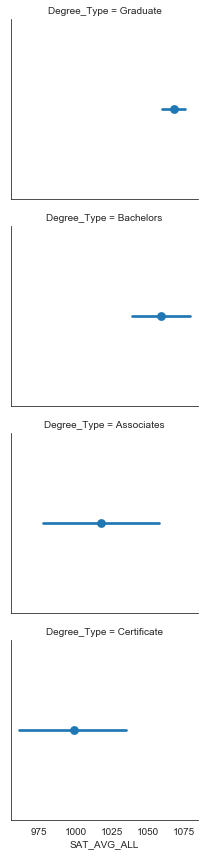

<Figure size 432x288 with 0 Axes>

In [6]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


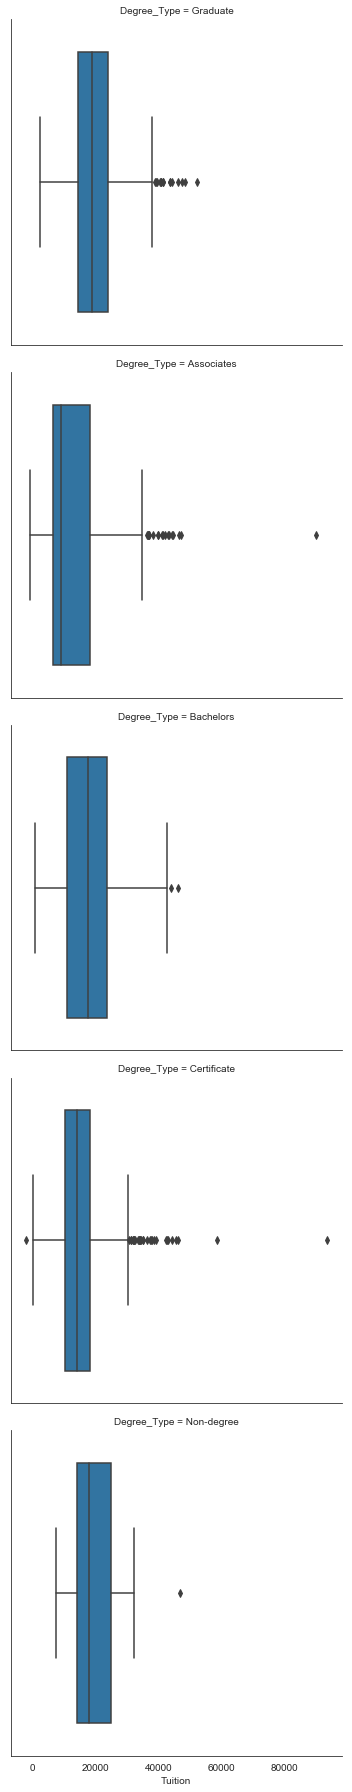

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


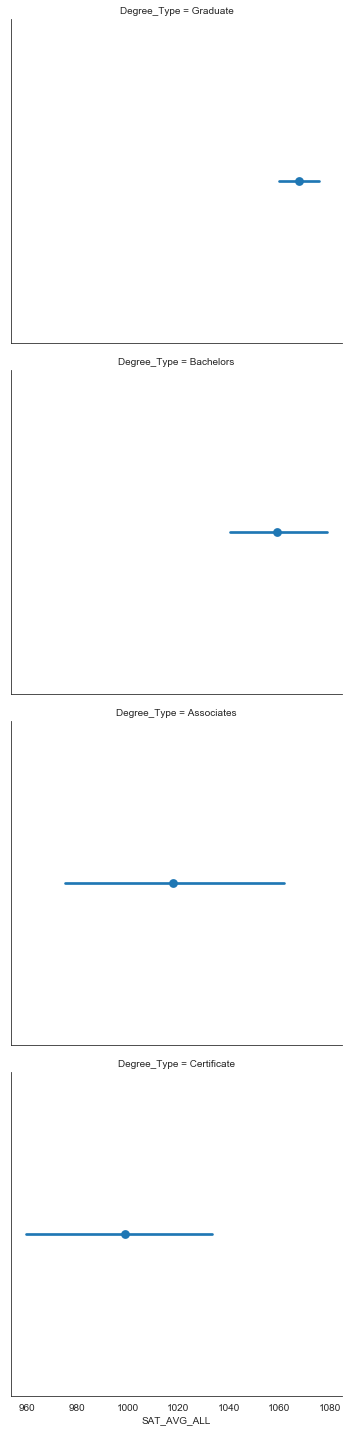

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

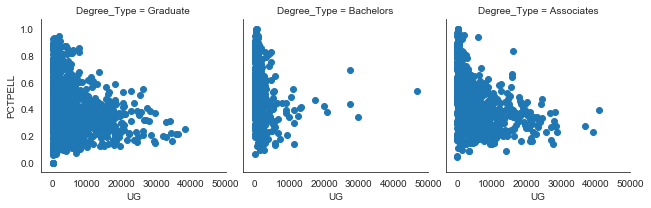

<Figure size 432x288 with 0 Axes>

In [10]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


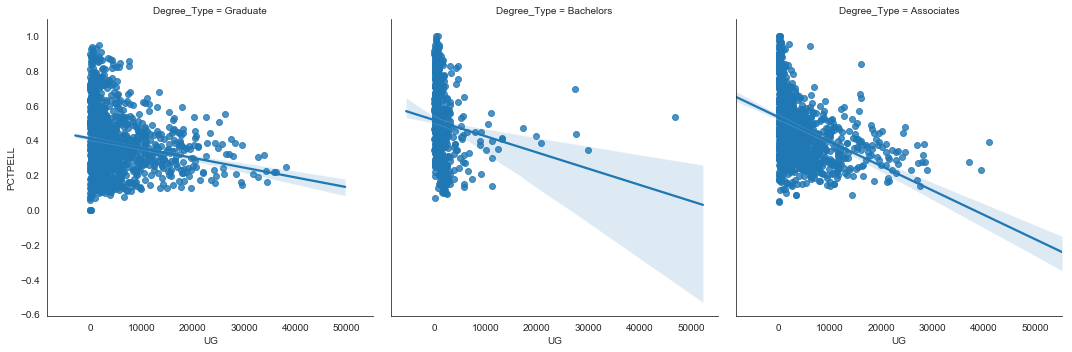

<Figure size 432x288 with 0 Axes>

In [11]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


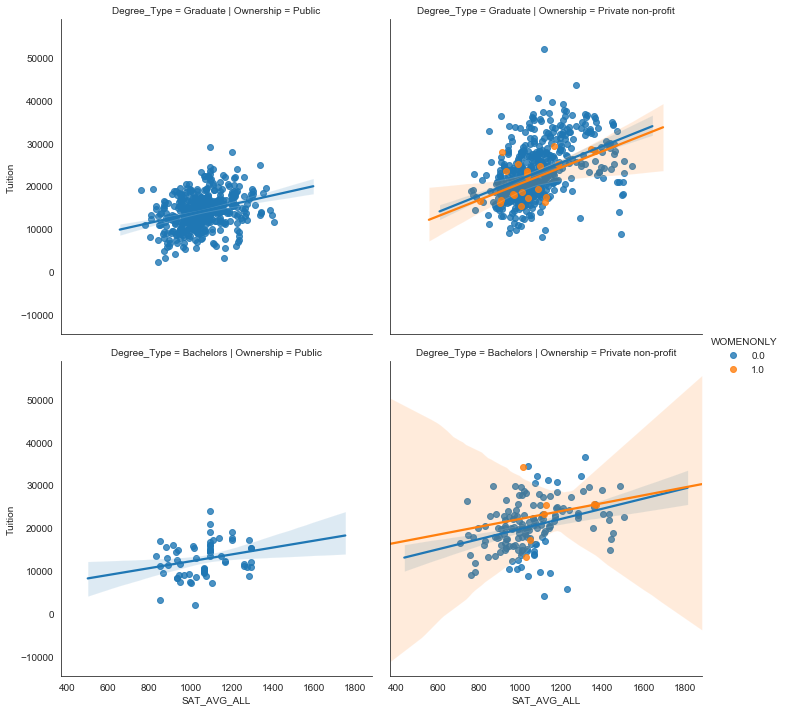

<Figure size 432x288 with 0 Axes>

In [13]:
inst_ord = ['Public', 'Private non-profit']

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

In [15]:
df = pd.read_csv('insurance.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
State                              51 non-null object
fatal_collisions                   51 non-null float64
fatal_collisions_speeding          51 non-null int64
fatal_collisions_alc               51 non-null int64
fatal_collisions_not_distracted    51 non-null int64
fatal_collisions_no_hist           51 non-null int64
premiums                           51 non-null float64
insurance_losses                   51 non-null float64
Region                             51 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 4.0+ KB


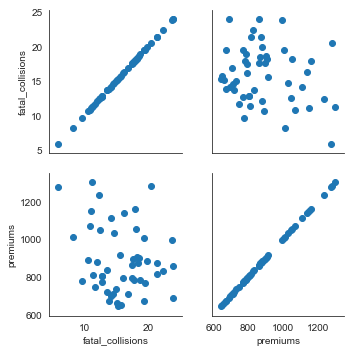

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

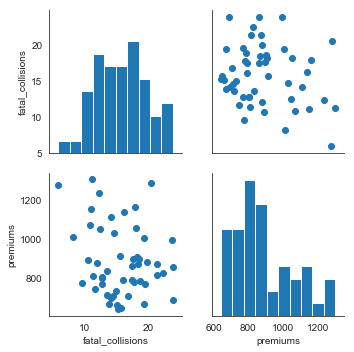

<Figure size 432x288 with 0 Axes>

In [20]:
# Create the same pairgrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

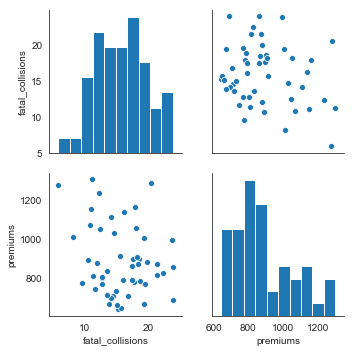

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


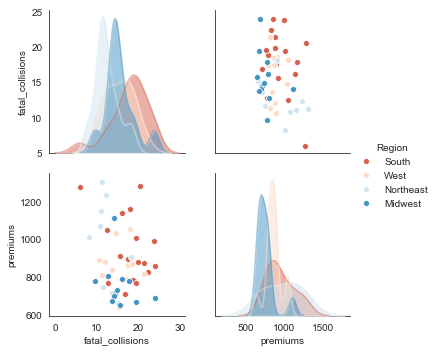

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

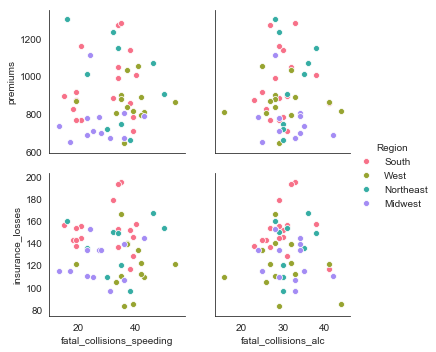

<Figure size 432x288 with 0 Axes>

In [24]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


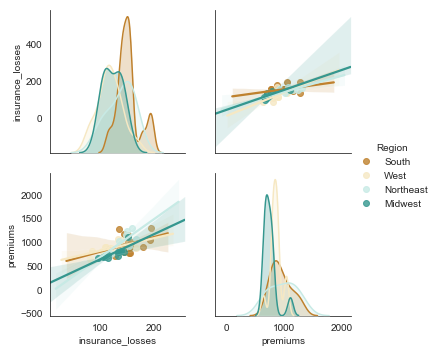

<Figure size 432x288 with 0 Axes>

In [26]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

In [27]:
# data prep
csv_str = ',dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals\n0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\n1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\n2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\n3,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\n4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\n5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.23320900000000006,0.518261,0.0895652,88,1518,1606\n6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\n7,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\n8,2011-01-09,1,0,1,0,0,0,1,0.13833299999999998,0.116175,0.434167,0.36195,54,768,822\n9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.15088800000000002,0.482917,0.223267,41,1280,1321\n10,2011-01-11,1,0,1,0,2,1,2,0.16909100000000002,0.191464,0.6863640000000001,0.122132,43,1220,1263\n11,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162\n12,2011-01-13,1,0,1,0,4,1,1,0.165,0.150883,0.470417,0.301,38,1368,1406\n13,2011-01-14,1,0,1,0,5,1,1,0.16087,0.188413,0.537826,0.126548,54,1367,1421\n14,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.49875,0.15796300000000002,222,1026,1248\n15,2011-01-16,1,0,1,0,0,0,1,0.231667,0.234217,0.48375,0.188433,251,953,1204\n16,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.5375,0.194017,117,883,1000\n17,2011-01-18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683\n18,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650\n19,2011-01-20,1,0,1,0,4,1,2,0.261667,0.25505,0.538333,0.195904,83,1844,1927\n20,2011-01-21,1,0,1,0,5,1,1,0.1775,0.157833,0.457083,0.353242,75,1468,1543\n21,2011-01-22,1,0,1,0,6,0,1,0.0591304,0.0790696,0.4,0.17197,93,888,981\n22,2011-01-23,1,0,1,0,0,0,1,0.0965217,0.0988391,0.436522,0.2466,150,836,986\n23,2011-01-24,1,0,1,0,1,1,1,0.0973913,0.11793,0.491739,0.15833,86,1330,1416\n24,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985\n25,2011-01-26,1,0,1,0,3,1,3,0.2175,0.2036,0.8625,0.29385,34,472,506\n26,2011-01-27,1,0,1,0,4,1,1,0.195,0.2197,0.6875,0.113837,15,416,431\n27,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.1233,38,1129,1167\n28,2011-01-29,1,0,1,0,6,0,1,0.196522,0.212126,0.6517390000000001,0.14536500000000002,123,975,1098\n29,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.0739826,140,956,1096\n30,2011-01-31,1,0,1,0,1,1,2,0.180833,0.18625,0.60375,0.187192,42,1459,1501\n31,2011-02-01,1,0,2,0,2,1,2,0.192174,0.23453,0.829565,0.053213,47,1313,1360\n32,2011-02-02,1,0,2,0,3,1,2,0.26,0.254417,0.775417,0.264308,72,1454,1526\n33,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.4378260000000001,0.277752,61,1489,1550\n34,2011-02-04,1,0,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,88,1620,1708\n35,2011-02-05,1,0,2,0,6,0,2,0.233333,0.243058,0.929167,0.161079,100,905,1005\n36,2011-02-06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.1418,354,1269,1623\n37,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408300000000006,120,1592,1712\n38,2011-02-08,1,0,2,0,2,1,1,0.220833,0.198246,0.537917,0.36195,64,1466,1530\n39,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605\n40,2011-02-10,1,0,2,0,4,1,1,0.144348,0.149548,0.437391,0.221935,47,1491,1538\n41,2011-02-11,1,0,2,0,5,1,1,0.189091,0.213509,0.506364,0.10855,149,1597,1746\n42,2011-02-12,1,0,2,0,6,0,1,0.2225,0.232954,0.544167,0.203367,288,1184,1472\n43,2011-02-13,1,0,2,0,0,0,1,0.316522,0.324113,0.457391,0.260883,397,1192,1589\n44,2011-02-14,1,0,2,0,1,1,1,0.415,0.39835,0.375833,0.417908,208,1705,1913\n45,2011-02-15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815\n46,2011-02-16,1,0,2,0,3,1,1,0.318261,0.3162,0.423478,0.251791,218,1897,2115\n47,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505,0.230104,259,2216,2475\n48,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927\n49,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635\n50,2011-02-20,1,0,2,0,0,0,1,0.285217,0.27733,0.407826,0.223235,639,1173,1812\n51,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605,0.307846,195,912,1107\n52,2011-02-22,1,0,2,0,2,1,1,0.182222,0.186033,0.577778,0.195683,74,1376,1450\n53,2011-02-23,1,0,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139,1778,1917\n54,2011-02-24,1,0,2,0,4,1,2,0.295652,0.289191,0.697391,0.250496,100,1707,1807\n55,2011-02-25,1,0,2,0,5,1,2,0.364348,0.350461,0.712174,0.346539,120,1341,1461\n56,2011-02-26,1,0,2,0,6,0,1,0.2825,0.282192,0.537917,0.186571,424,1545,1969\n57,2011-02-27,1,0,2,0,0,0,1,0.343478,0.351109,0.68,0.125248,694,1708,2402\n58,2011-02-28,1,0,2,0,1,1,2,0.407273,0.400118,0.8763639999999999,0.289686,81,1365,1446\n59,2011-03-01,1,0,3,0,2,1,1,0.266667,0.263879,0.535,0.216425,137,1714,1851\n60,2011-03-02,1,0,3,0,3,1,1,0.335,0.320071,0.449583,0.307833,231,1903,2134\n61,2011-03-03,1,0,3,0,4,1,1,0.198333,0.200133,0.318333,0.225754,123,1562,1685\n62,2011-03-04,1,0,3,0,5,1,2,0.261667,0.255679,0.610417,0.203346,214,1730,1944\n63,2011-03-05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077\n64,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605\n65,2011-03-07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872\n66,2011-03-08,1,0,3,0,2,1,1,0.2925,0.3024,0.420833,0.12065,316,1817,2133\n67,2011-03-09,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.22015,191,1700,1891\n68,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623\n69,2011-03-11,1,0,3,0,5,1,2,0.316522,0.305,0.649565,0.23297,247,1730,1977\n70,2011-03-12,1,0,3,0,6,0,1,0.329167,0.32575,0.594583,0.220775,724,1408,2132\n71,2011-03-13,1,0,3,0,0,0,1,0.384348,0.380091,0.5273909999999999,0.270604,982,1435,2417\n72,2011-03-14,1,0,3,0,1,1,1,0.32521700000000003,0.332,0.496957,0.136926,359,1687,2046\n73,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056\n74,2011-03-16,1,0,3,0,3,1,2,0.365217,0.36693,0.776522,0.203117,321,1871,2192\n75,2011-03-17,1,0,3,0,4,1,1,0.415,0.410333,0.602917,0.209579,424,2320,2744\n76,2011-03-18,1,0,3,0,5,1,1,0.54,0.5270090000000001,0.525217,0.231017,884,2355,3239\n77,2011-03-19,1,0,3,0,6,0,1,0.4725,0.466525,0.379167,0.368167,1424,1693,3117\n78,2011-03-20,1,0,3,0,0,0,1,0.3325,0.32575,0.47375,0.207721,1047,1424,2471\n79,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077\n80,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.22575,460,2243,2703\n81,2011-03-23,2,0,3,0,3,1,2,0.346957,0.337939,0.839565,0.234261,203,1918,2121\n82,2011-03-24,2,0,3,0,4,1,2,0.285,0.270833,0.805833,0.243787,166,1699,1865\n83,2011-03-25,2,0,3,0,5,1,1,0.264167,0.256312,0.495,0.230725,300,1910,2210\n84,2011-03-26,2,0,3,0,6,0,1,0.265833,0.257571,0.394167,0.209571,981,1515,2496\n85,2011-03-27,2,0,3,0,0,0,2,0.253043,0.250339,0.493913,0.1843,472,1221,1693\n86,2011-03-28,2,0,3,0,1,1,1,0.264348,0.257574,0.302174,0.212204,222,1806,2028\n87,2011-03-29,2,0,3,0,2,1,1,0.3025,0.292908,0.31416700000000003,0.226996,317,2108,2425\n88,2011-03-30,2,0,3,0,3,1,2,0.3,0.29735,0.646667,0.172888,168,1368,1536\n89,2011-03-31,2,0,3,0,4,1,3,0.268333,0.257575,0.918333,0.217646,179,1506,1685\n90,2011-04-01,2,0,4,0,5,1,2,0.3,0.283454,0.68625,0.258708,307,1920,2227\n91,2011-04-02,2,0,4,0,6,0,2,0.315,0.315637,0.65375,0.197146,898,1354,2252\n92,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.48,0.182213,1651,1598,3249\n93,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.42625,0.385571,734,2381,3115\n94,2011-04-05,2,0,4,0,2,1,2,0.414167,0.39835,0.642083,0.388067,167,1628,1795\n95,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808\n96,2011-04-07,2,0,4,0,4,1,1,0.4375,0.433696,0.602917,0.16231199999999998,571,2570,3141\n97,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.83625,0.226992,172,1299,1471\n98,2011-04-09,2,0,4,0,6,0,2,0.3425,0.341529,0.8775,0.13308299999999998,879,1576,2455\n99,2011-04-10,2,0,4,0,0,0,2,0.426667,0.426737,0.8575,0.146767,1188,1707,2895\n100,2011-04-11,2,0,4,0,1,1,2,0.5956520000000001,0.565217,0.716956,0.324474,855,2493,3348\n101,2011-04-12,2,0,4,0,2,1,2,0.5025,0.493054,0.739167,0.274879,257,1777,2034\n102,2011-04-13,2,0,4,0,3,1,2,0.4125,0.417283,0.819167,0.25061700000000003,209,1953,2162\n103,2011-04-14,2,0,4,0,4,1,1,0.4675,0.462742,0.540417,0.1107,529,2738,3267\n104,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.67125,0.226375,642,2484,3126\n105,2011-04-16,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121,674,795\n106,2011-04-17,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,2186,3744\n107,2011-04-18,2,0,4,0,1,1,1,0.5125,0.503146,0.5425,0.16356700000000002,669,2760,3429\n108,2011-04-19,2,0,4,0,2,1,2,0.505833,0.489258,0.665833,0.157971,409,2795,3204\n109,2011-04-20,2,0,4,0,3,1,1,0.595,0.564392,0.614167,0.241925,613,3331,3944\n110,2011-04-21,2,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189\n111,2011-04-22,2,0,4,0,5,1,2,0.336667,0.321954,0.729583,0.219521,177,1506,1683\n112,2011-04-23,2,0,4,0,6,0,2,0.46,0.450121,0.887917,0.230725,1462,2574,4036\n113,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191\n114,2011-04-25,2,0,4,0,1,1,1,0.606667,0.5745,0.776667,0.185333,773,3300,4073\n115,2011-04-26,2,0,4,0,2,1,1,0.631667,0.594083,0.729167,0.3265,678,3722,4400\n116,2011-04-27,2,0,4,0,3,1,2,0.62,0.575142,0.835417,0.3122,547,3325,3872\n117,2011-04-28,2,0,4,0,4,1,2,0.6175,0.578929,0.700833,0.320908,569,3489,4058\n118,2011-04-29,2,0,4,0,5,1,1,0.51,0.497463,0.457083,0.240063,878,3717,4595\n119,2011-04-30,2,0,4,0,6,0,1,0.4725,0.464021,0.503333,0.235075,1965,3347,5312\n120,2011-05-01,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138,2213,3351\n121,2011-05-02,2,0,5,0,1,1,2,0.549167,0.532833,0.73,0.183454,847,3554,4401\n122,2011-05-03,2,0,5,0,2,1,2,0.616667,0.582079,0.697083,0.342667,603,3848,4451\n123,2011-05-04,2,0,5,0,3,1,2,0.414167,0.40465,0.737083,0.328996,255,2378,2633\n124,2011-05-05,2,0,5,0,4,1,1,0.459167,0.441917,0.444167,0.295392,614,3819,4433\n125,2011-05-06,2,0,5,0,5,1,1,0.479167,0.474117,0.59,0.228246,894,3714,4608\n126,2011-05-07,2,0,5,0,6,0,1,0.52,0.512621,0.54125,0.16045,1612,3102,4714\n127,2011-05-08,2,0,5,0,0,0,1,0.5283329999999999,0.518933,0.631667,0.0746375,1401,2932,4333\n128,2011-05-09,2,0,5,0,1,1,1,0.5325,0.525246,0.58875,0.17600000000000002,664,3698,4362\n129,2011-05-10,2,0,5,0,2,1,1,0.5325,0.522721,0.489167,0.115671,694,4109,4803\n130,2011-05-11,2,0,5,0,3,1,1,0.5425,0.5284,0.632917,0.120642,550,3632,4182\n131,2011-05-12,2,0,5,0,4,1,1,0.535,0.523363,0.7475,0.189667,695,4169,4864\n132,2011-05-13,2,0,5,0,5,1,2,0.5125,0.4943,0.863333,0.179725,692,3413,4105\n133,2011-05-14,2,0,5,0,6,0,2,0.520833,0.500629,0.9225,0.13495,902,2507,3409\n134,2011-05-15,2,0,5,0,0,0,2,0.5625,0.536,0.867083,0.152979,1582,2971,4553\n135,2011-05-16,2,0,5,0,1,1,1,0.5775,0.550512,0.787917,0.126871,773,3185,3958\n136,2011-05-17,2,0,5,0,2,1,2,0.561667,0.538529,0.837917,0.277354,678,3445,4123\n137,2011-05-18,2,0,5,0,3,1,2,0.55,0.527158,0.87,0.201492,536,3319,3855\n138,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.10821300000000003,735,3840,4575\n139,2011-05-20,2,0,5,0,5,1,1,0.536667,0.529042,0.719583,0.125013,909,4008,4917\n140,2011-05-21,2,0,5,0,6,0,1,0.6025,0.571975,0.626667,0.12065,2258,3547,5805\n141,2011-05-22,2,0,5,0,0,0,1,0.604167,0.5745,0.749583,0.148008,1576,3084,4660\n142,2011-05-23,2,0,5,0,1,1,2,0.631667,0.590296,0.81,0.233842,836,3438,4274\n143,2011-05-24,2,0,5,0,2,1,2,0.66,0.604813,0.740833,0.207092,659,3833,4492\n144,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.69625,0.15423299999999998,740,4238,4978\n145,2011-05-26,2,0,5,0,4,1,1,0.708333,0.654688,0.6775,0.199642,758,3919,4677\n146,2011-05-27,2,0,5,0,5,1,1,0.681667,0.637008,0.65375,0.240679,871,3808,4679\n147,2011-05-28,2,0,5,0,6,0,1,0.655833,0.612379,0.729583,0.230092,2001,2757,4758\n148,2011-05-29,2,0,5,0,0,0,1,0.6675,0.61555,0.81875,0.213938,2355,2433,4788\n149,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685,0.131225,1549,2549,4098\n150,2011-05-31,2,0,5,0,2,1,1,0.775,0.725383,0.636667,0.111329,673,3309,3982\n151,2011-06-01,2,0,6,0,3,1,2,0.764167,0.720967,0.677083,0.207092,513,3461,3974\n152,2011-06-02,2,0,6,0,4,1,1,0.715,0.643942,0.305,0.292287,736,4232,4968\n153,2011-06-03,2,0,6,0,5,1,1,0.62,0.587133,0.354167,0.253121,898,4414,5312\n154,2011-06-04,2,0,6,0,6,0,1,0.635,0.594696,0.45625,0.123142,1869,3473,5342\n155,2011-06-05,2,0,6,0,0,0,2,0.648333,0.616804,0.6525,0.138692,1685,3221,4906\n156,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.6,0.121896,673,3875,4548\n157,2011-06-07,2,0,6,0,2,1,1,0.7075,0.65595,0.597917,0.187808,763,4070,4833\n158,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.6220829999999999,0.136817,676,3725,4401\n159,2011-06-09,2,0,6,0,4,1,2,0.808333,0.757579,0.568333,0.149883,563,3352,3915\n160,2011-06-10,2,0,6,0,5,1,1,0.755,0.703292,0.605,0.14055399999999998,815,3771,4586\n161,2011-06-11,2,0,6,0,6,0,1,0.725,0.678038,0.654583,0.15485,1729,3237,4966\n162,2011-06-12,2,0,6,0,0,0,1,0.6925,0.643325,0.747917,0.16356700000000002,1467,2993,4460\n163,2011-06-13,2,0,6,0,1,1,1,0.635,0.601654,0.494583,0.30535,863,4157,5020\n164,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891\n165,2011-06-15,2,0,6,0,3,1,1,0.626667,0.587754,0.471667,0.16791199999999998,769,4411,5180\n166,2011-06-16,2,0,6,0,4,1,2,0.628333,0.595346,0.688333,0.206471,545,3222,3767\n167,2011-06-17,2,0,6,0,5,1,1,0.649167,0.600383,0.735833,0.143029,863,3981,4844\n168,2011-06-18,2,0,6,0,6,0,1,0.696667,0.643954,0.670417,0.119408,1807,3312,5119\n169,2011-06-19,2,0,6,0,0,0,2,0.699167,0.645846,0.666667,0.102,1639,3105,4744\n170,2011-06-20,2,0,6,0,1,1,2,0.635,0.595346,0.74625,0.155475,699,3311,4010\n171,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835\n172,2011-06-22,3,0,6,0,3,1,1,0.733333,0.693829,0.7075,0.172262,661,3846,4507\n173,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790\n174,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991\n175,2011-06-25,3,0,6,0,6,0,1,0.695,0.643313,0.483333,0.209571,1782,3420,5202\n176,2011-06-26,3,0,6,0,0,0,1,0.68,0.637629,0.513333,0.0945333,1920,3385,5305\n177,2011-06-27,3,0,6,0,1,1,2,0.6825,0.637004,0.658333,0.10758800000000003,854,3854,4708\n178,2011-06-28,3,0,6,0,2,1,1,0.744167,0.692558,0.634167,0.144283,732,3916,4648\n179,2011-06-29,3,0,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821,848,4377,5225\n180,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515\n181,2011-07-01,3,0,7,0,5,1,1,0.7225,0.652162,0.39625,0.102608,1246,4116,5362\n182,2011-07-02,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.11506199999999997,2204,2915,5119\n183,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.6825,0.228858,2282,2367,4649\n184,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.08147919999999999,3065,2978,6043\n185,2011-07-05,3,0,7,0,2,1,1,0.746667,0.696338,0.590417,0.12625799999999998,1031,3634,4665\n186,2011-07-06,3,0,7,0,3,1,1,0.72,0.685633,0.743333,0.149883,784,3845,4629\n187,2011-07-07,3,0,7,0,4,1,1,0.75,0.686871,0.65125,0.1592,754,3838,4592\n188,2011-07-08,3,0,7,0,5,1,2,0.709167,0.6704829999999999,0.757917,0.225129,692,3348,4040\n189,2011-07-09,3,0,7,0,6,0,1,0.733333,0.664158,0.609167,0.16791199999999998,1988,3348,5336\n190,2011-07-10,3,0,7,0,0,0,1,0.7475,0.690025,0.578333,0.183471,1743,3138,4881\n191,2011-07-11,3,0,7,0,1,1,1,0.7625,0.729804,0.635833,0.282337,723,3363,4086\n192,2011-07-12,3,0,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254,662,3596,4258\n193,2011-07-13,3,0,7,0,3,1,1,0.746667,0.689404,0.631667,0.146133,748,3594,4342\n194,2011-07-14,3,0,7,0,4,1,1,0.680833,0.635104,0.47625,0.240667,888,4196,5084\n195,2011-07-15,3,0,7,0,5,1,1,0.663333,0.624371,0.59125,0.182833,1318,4220,5538\n196,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585,0.208342,2418,3505,5923\n197,2011-07-17,3,0,7,0,0,0,1,0.719167,0.669833,0.604167,0.245033,2006,3296,5302\n198,2011-07-18,3,0,7,0,1,1,1,0.746667,0.703925,0.65125,0.215804,841,3617,4458\n199,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.1306,752,3789,4541\n200,2011-07-20,3,0,7,0,3,1,1,0.768333,0.74685,0.707083,0.113817,644,3688,4332\n201,2011-07-21,3,0,7,0,4,1,2,0.815,0.826371,0.69125,0.222021,632,3152,3784\n202,2011-07-22,3,0,7,0,5,1,1,0.848333,0.8408959999999999,0.580417,0.1331,562,2825,3387\n203,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.5,0.131221,987,2298,3285\n204,2011-07-24,3,0,7,0,0,0,1,0.83,0.794829,0.550833,0.16917100000000002,1050,2556,3606\n205,2011-07-25,3,0,7,0,1,1,1,0.743333,0.720958,0.757083,0.0908083,568,3272,3840\n206,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590\n207,2011-07-27,3,0,7,0,3,1,1,0.775,0.690667,0.402917,0.183463,755,3901,4656\n208,2011-07-28,3,0,7,0,4,1,1,0.779167,0.7399,0.583333,0.178479,606,3784,4390\n209,2011-07-29,3,0,7,0,5,1,1,0.838333,0.785967,0.5425,0.174138,670,3176,3846\n210,2011-07-30,3,0,7,0,6,0,1,0.804167,0.728537,0.465833,0.168537,1559,2916,4475\n211,2011-07-31,3,0,7,0,0,0,1,0.805833,0.729796,0.480833,0.16481300000000002,1524,2778,4302\n212,2011-08-01,3,0,8,0,1,1,1,0.771667,0.703292,0.550833,0.156717,729,3537,4266\n213,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.49125,0.20585,801,4044,4845\n214,2011-08-03,3,0,8,0,3,1,2,0.731667,0.679937,0.6575,0.13558299999999998,467,3107,3574\n215,2011-08-04,3,0,8,0,4,1,2,0.71,0.664788,0.7575,0.19715,799,3777,4576\n216,2011-08-05,3,0,8,0,5,1,1,0.710833,0.656567,0.630833,0.184696,1023,3843,4866\n217,2011-08-06,3,0,8,0,6,0,2,0.716667,0.676154,0.755,0.22825,1521,2773,4294\n218,2011-08-07,3,0,8,0,0,0,1,0.7425,0.715292,0.7529170000000001,0.201487,1298,2487,3785\n219,2011-08-08,3,0,8,0,1,1,1,0.765,0.703283,0.592083,0.192175,846,3480,4326\n220,2011-08-09,3,0,8,0,2,1,1,0.775,0.724121,0.570417,0.151121,907,3695,4602\n221,2011-08-10,3,0,8,0,3,1,1,0.766667,0.684983,0.424167,0.200258,884,3896,4780\n222,2011-08-11,3,0,8,0,4,1,1,0.7175,0.651521,0.42375,0.164796,812,3980,4792\n223,2011-08-12,3,0,8,0,5,1,1,0.708333,0.654042,0.415,0.125621,1051,3854,4905\n224,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150\n225,2011-08-14,3,0,8,0,0,0,2,0.676667,0.624388,0.8175,0.222633,1338,2482,3820\n226,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338\n227,2011-08-16,3,0,8,0,2,1,1,0.700833,0.645837,0.578333,0.236329,721,4004,4725\n228,2011-08-17,3,0,8,0,3,1,1,0.723333,0.666671,0.575417,0.14366700000000002,668,4026,4694\n229,2011-08-18,3,0,8,0,4,1,1,0.711667,0.662258,0.654583,0.233208,639,3166,3805\n230,2011-08-19,3,0,8,0,5,1,2,0.685,0.633221,0.722917,0.139308,797,3356,4153\n231,2011-08-20,3,0,8,0,6,0,1,0.6975,0.648996,0.674167,0.104467,1914,3277,5191\n232,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.77,0.248754,1249,2624,3873\n233,2011-08-22,3,0,8,0,1,1,1,0.691667,0.638254,0.47,0.27675,833,3925,4758\n234,2011-08-23,3,0,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,1281,4614,5895\n235,2011-08-24,3,0,8,0,3,1,1,0.673333,0.630692,0.605,0.253108,949,4181,5130\n236,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542\n237,2011-08-26,3,0,8,0,5,1,1,0.7,0.659733,0.76125,0.0839625,768,3893,4661\n238,2011-08-27,3,0,8,0,6,0,2,0.68,0.635556,0.85,0.375617,226,889,1115\n239,2011-08-28,3,0,8,0,0,0,1,0.707059,0.6479590000000001,0.561765,0.304659,1415,2919,4334\n240,2011-08-29,3,0,8,0,1,1,1,0.636667,0.607958,0.554583,0.159825,729,3905,4634\n241,2011-08-30,3,0,8,0,2,1,1,0.639167,0.594704,0.548333,0.12500799999999998,775,4429,5204\n242,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.08333330000000001,688,4370,5058\n243,2011-09-01,3,0,9,0,4,1,1,0.655,0.614921,0.639167,0.141796,783,4332,5115\n244,2011-09-02,3,0,9,0,5,1,2,0.643333,0.604808,0.727083,0.139929,875,3852,4727\n245,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484\n246,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940\n247,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351\n248,2011-09-06,3,0,9,0,2,1,3,0.54,0.5152,0.886957,0.343943,204,2506,2710\n249,2011-09-07,3,0,9,0,3,1,3,0.599167,0.544229,0.917083,0.0970208,118,1878,1996\n250,2011-09-08,3,0,9,0,4,1,3,0.6339130000000001,0.555361,0.939565,0.192748,153,1689,1842\n251,2011-09-09,3,0,9,0,5,1,2,0.65,0.578946,0.897917,0.124379,417,3127,3544\n252,2011-09-10,3,0,9,0,6,0,1,0.66,0.607962,0.75375,0.153608,1750,3595,5345\n253,2011-09-11,3,0,9,0,0,0,1,0.6533329999999999,0.609229,0.71375,0.115054,1633,3413,5046\n254,2011-09-12,3,0,9,0,1,1,1,0.6443479999999999,0.60213,0.692174,0.088913,690,4023,4713\n255,2011-09-13,3,0,9,0,2,1,1,0.650833,0.603554,0.7125,0.141804,701,4062,4763\n256,2011-09-14,3,0,9,0,3,1,1,0.673333,0.6269,0.697083,0.1673,647,4138,4785\n257,2011-09-15,3,0,9,0,4,1,2,0.5775,0.553671,0.709167,0.271146,428,3231,3659\n258,2011-09-16,3,0,9,0,5,1,2,0.469167,0.461475,0.590417,0.164183,742,4018,4760\n259,2011-09-17,3,0,9,0,6,0,2,0.491667,0.478512,0.718333,0.189675,1434,3077,4511\n260,2011-09-18,3,0,9,0,0,0,1,0.5075,0.490537,0.695,0.178483,1353,2921,4274\n261,2011-09-19,3,0,9,0,1,1,2,0.549167,0.529675,0.69,0.15174200000000002,691,3848,4539\n262,2011-09-20,3,0,9,0,2,1,2,0.561667,0.532217,0.88125,0.134954,438,3203,3641\n263,2011-09-21,3,0,9,0,3,1,2,0.595,0.5505329999999999,0.9,0.0964042,539,3813,4352\n264,2011-09-22,3,0,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125,555,4240,4795\n265,2011-09-23,4,0,9,0,5,1,2,0.609167,0.522125,0.9725,0.0783667,258,2137,2395\n266,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.8625,0.0783833,1776,3647,5423\n267,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845,0.0503792,1544,3466,5010\n268,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.1107,684,3946,4630\n269,2011-09-27,4,0,9,0,2,1,2,0.636667,0.574525,0.885417,0.118171,477,3643,4120\n270,2011-09-28,4,0,9,0,3,1,2,0.635,0.575158,0.84875,0.14862899999999998,480,3427,3907\n271,2011-09-29,4,0,9,0,4,1,1,0.616667,0.574512,0.699167,0.17288299999999998,653,4186,4839\n272,2011-09-30,4,0,9,0,5,1,1,0.564167,0.544829,0.6475,0.206475,830,4372,5202\n273,2011-10-01,4,0,10,0,6,0,2,0.41,0.412863,0.75375,0.292296,480,1949,2429\n274,2011-10-02,4,0,10,0,0,0,2,0.356667,0.345317,0.791667,0.222013,616,2302,2918\n275,2011-10-03,4,0,10,0,1,1,2,0.384167,0.392046,0.760833,0.08334580000000001,330,3240,3570\n276,2011-10-04,4,0,10,0,2,1,1,0.484167,0.472858,0.71,0.205854,486,3970,4456\n277,2011-10-05,4,0,10,0,3,1,1,0.538333,0.527138,0.647917,0.17725,559,4267,4826\n278,2011-10-06,4,0,10,0,4,1,1,0.494167,0.480425,0.620833,0.134954,639,4126,4765\n279,2011-10-07,4,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.0223917,949,4036,4985\n280,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.70125,0.0454042,2235,3174,5409\n281,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.7275,0.06345,2397,3114,5511\n282,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.73375,0.0423042,1514,3603,5117\n283,2011-10-11,4,0,10,0,2,1,2,0.566667,0.546096,0.80875,0.143042,667,3896,4563\n284,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.90625,0.24815,217,2199,2416\n285,2011-10-13,4,0,10,0,4,1,2,0.589167,0.551804,0.896667,0.141787,290,2623,2913\n286,2011-10-14,4,0,10,0,5,1,2,0.550833,0.529675,0.71625,0.223883,529,3115,3644\n287,2011-10-15,4,0,10,0,6,0,1,0.506667,0.498725,0.483333,0.258083,1899,3318,5217\n288,2011-10-16,4,0,10,0,0,0,1,0.511667,0.503154,0.486667,0.281717,1748,3293,5041\n289,2011-10-17,4,0,10,0,1,1,1,0.5341670000000001,0.510725,0.579583,0.175379,713,3857,4570\n290,2011-10-18,4,0,10,0,2,1,2,0.5325,0.522721,0.701667,0.110087,637,4111,4748\n291,2011-10-19,4,0,10,0,3,1,3,0.5417390000000001,0.513848,0.895217,0.243339,254,2170,2424\n292,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.63625,0.422275,471,3724,4195\n293,2011-10-21,4,0,10,0,5,1,1,0.4275,0.423596,0.574167,0.221396,676,3628,4304\n294,2011-10-22,4,0,10,0,6,0,1,0.4225,0.425492,0.629167,0.0926667,1499,2809,4308\n295,2011-10-23,4,0,10,0,0,0,1,0.421667,0.422333,0.74125,0.0995125,1619,2762,4381\n296,2011-10-24,4,0,10,0,1,1,1,0.463333,0.457067,0.772083,0.118792,699,3488,4187\n297,2011-10-25,4,0,10,0,2,1,1,0.471667,0.463375,0.622917,0.166658,695,3992,4687\n298,2011-10-26,4,0,10,0,3,1,2,0.484167,0.472846,0.720417,0.148642,404,3490,3894\n299,2011-10-27,4,0,10,0,4,1,2,0.47,0.457046,0.812917,0.197763,240,2419,2659\n300,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747\n301,2011-10-29,4,0,10,0,6,0,3,0.25416700000000003,0.227913,0.8825,0.351371,57,570,627\n302,2011-10-30,4,0,10,0,0,0,1,0.31916700000000003,0.321329,0.62375,0.176617,885,2446,3331\n303,2011-10-31,4,0,10,0,1,1,1,0.34,0.356063,0.703333,0.10635,362,3307,3669\n304,2011-11-01,4,0,11,0,2,1,1,0.400833,0.397088,0.68375,0.135571,410,3658,4068\n305,2011-11-02,4,0,11,0,3,1,1,0.3775,0.390133,0.71875,0.08209169999999999,370,3816,4186\n306,2011-11-03,4,0,11,0,4,1,1,0.408333,0.405921,0.702083,0.136817,318,3656,3974\n307,2011-11-04,4,0,11,0,5,1,2,0.403333,0.403392,0.6225,0.271779,470,3576,4046\n308,2011-11-05,4,0,11,0,6,0,1,0.326667,0.323854,0.519167,0.189062,1156,2770,3926\n309,2011-11-06,4,0,11,0,0,0,1,0.348333,0.362358,0.734583,0.0920542,952,2697,3649\n310,2011-11-07,4,0,11,0,1,1,1,0.395,0.400871,0.75875,0.057225,373,3662,4035\n311,2011-11-08,4,0,11,0,2,1,1,0.408333,0.412246,0.7216670000000001,0.0690375,376,3829,4205\n312,2011-11-09,4,0,11,0,3,1,1,0.4,0.409079,0.758333,0.06219580000000001,305,3804,4109\n313,2011-11-10,4,0,11,0,4,1,2,0.38,0.373721,0.813333,0.189067,190,2743,2933\n314,2011-11-11,4,0,11,1,5,0,1,0.324167,0.306817,0.44625,0.314675,440,2928,3368\n315,2011-11-12,4,0,11,0,6,0,1,0.356667,0.357942,0.552917,0.212062,1275,2792,4067\n316,2011-11-13,4,0,11,0,0,0,1,0.440833,0.43055,0.458333,0.281721,1004,2713,3717\n317,2011-11-14,4,0,11,0,1,1,1,0.53,0.524612,0.587083,0.306596,595,3891,4486\n318,2011-11-15,4,0,11,0,2,1,2,0.53,0.507579,0.68875,0.199633,449,3746,4195\n319,2011-11-16,4,0,11,0,3,1,3,0.456667,0.451988,0.93,0.136829,145,1672,1817\n320,2011-11-17,4,0,11,0,4,1,2,0.341667,0.323221,0.575833,0.305362,139,2914,3053\n321,2011-11-18,4,0,11,0,5,1,1,0.274167,0.272721,0.41,0.168533,245,3147,3392\n322,2011-11-19,4,0,11,0,6,0,1,0.329167,0.324483,0.502083,0.224496,943,2720,3663\n323,2011-11-20,4,0,11,0,0,0,2,0.463333,0.457058,0.6845829999999999,0.18595,787,2733,3520\n324,2011-11-21,4,0,11,0,1,1,3,0.4475,0.445062,0.91,0.138054,220,2545,2765\n325,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.9625,0.118792,69,1538,1607\n326,2011-11-23,4,0,11,0,3,1,2,0.440833,0.430537,0.757917,0.335825,112,2454,2566\n327,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495\n328,2011-11-25,4,0,11,0,5,1,1,0.375,0.380671,0.64375,0.0988958,1095,1697,2792\n329,2011-11-26,4,0,11,0,6,0,1,0.375833,0.385087,0.681667,0.0684208,1249,1819,3068\n330,2011-11-27,4,0,11,0,0,0,1,0.459167,0.4558,0.698333,0.208954,810,2261,3071\n331,2011-11-28,4,0,11,0,1,1,1,0.503478,0.490122,0.743043,0.142122,253,3614,3867\n332,2011-11-29,4,0,11,0,2,1,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914\n333,2011-11-30,4,0,11,0,3,1,1,0.325,0.311221,0.613333,0.271158,188,3425,3613\n334,2011-12-01,4,0,12,0,4,1,1,0.3125,0.305554,0.524583,0.220158,182,3545,3727\n335,2011-12-02,4,0,12,0,5,1,1,0.31416700000000003,0.331433,0.625833,0.100754,268,3672,3940\n336,2011-12-03,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.0957833,706,2908,3614\n337,2011-12-04,4,0,12,0,0,0,1,0.330833,0.3491,0.775833,0.08395830000000001,634,2851,3485\n338,2011-12-05,4,0,12,0,1,1,2,0.385833,0.393925,0.827083,0.062208300000000015,233,3578,3811\n339,2011-12-06,4,0,12,0,2,1,3,0.4625,0.4564,0.949583,0.232583,126,2468,2594\n340,2011-12-07,4,0,12,0,3,1,3,0.41,0.400246,0.970417,0.266175,50,655,705\n341,2011-12-08,4,0,12,0,4,1,1,0.265833,0.256938,0.58,0.240058,150,3172,3322\n342,2011-12-09,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.08271669999999999,261,3359,3620\n343,2011-12-10,4,0,12,0,6,0,1,0.275,0.266412,0.5075,0.233221,502,2688,3190\n344,2011-12-11,4,0,12,0,0,0,1,0.220833,0.253154,0.49,0.0665417,377,2366,2743\n345,2011-12-12,4,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.06345,143,3167,3310\n346,2011-12-13,4,0,12,0,2,1,1,0.2825,0.301138,0.59,0.14055,155,3368,3523\n347,2011-12-14,4,0,12,0,3,1,2,0.3175,0.338362,0.66375,0.060958300000000014,178,3562,3740\n348,2011-12-15,4,0,12,0,4,1,2,0.4225,0.412237,0.634167,0.268042,181,3528,3709\n349,2011-12-16,4,0,12,0,5,1,2,0.375,0.359825,0.500417,0.260575,178,3399,3577\n350,2011-12-17,4,0,12,0,6,0,2,0.258333,0.249371,0.560833,0.243167,275,2464,2739\n351,2011-12-18,4,0,12,0,0,0,1,0.238333,0.245579,0.58625,0.169779,220,2211,2431\n352,2011-12-19,4,0,12,0,1,1,1,0.276667,0.280933,0.6375,0.172896,260,3143,3403\n353,2011-12-20,4,0,12,0,2,1,2,0.385833,0.396454,0.595417,0.061570800000000016,216,3534,3750\n354,2011-12-21,1,0,12,0,3,1,2,0.428333,0.428017,0.858333,0.2214,107,2553,2660\n355,2011-12-22,1,0,12,0,4,1,2,0.423333,0.426121,0.7575,0.047275,227,2841,3068\n356,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.68625,0.274246,163,2046,2209\n357,2011-12-24,1,0,12,0,6,0,1,0.3025,0.299242,0.5425,0.190304,155,856,1011\n358,2011-12-25,1,0,12,0,0,0,1,0.274783,0.279961,0.681304,0.155091,303,451,754\n359,2011-12-26,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317\n360,2011-12-27,1,0,12,0,2,1,2,0.325,0.327633,0.7625,0.18845,103,1059,1162\n361,2011-12-28,1,0,12,0,3,1,1,0.29913,0.279974,0.503913,0.29396100000000003,255,2047,2302\n362,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423\n363,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.13433699999999998,491,2508,2999\n364,2011-12-31,1,0,12,0,6,0,1,0.41,0.414121,0.615833,0.220154,665,1820,2485\n365,2012-01-01,1,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167,686,1608,2294\n366,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951\n367,2012-01-03,1,1,1,0,2,1,1,0.15,0.126275,0.44125,0.365671,89,2147,2236\n368,2012-01-04,1,1,1,0,3,1,2,0.1075,0.11933699999999997,0.414583,0.1847,95,2273,2368\n369,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272\n370,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098\n371,2012-01-07,1,1,1,0,6,0,1,0.393333,0.390779,0.531667,0.174758,1070,3451,4521\n372,2012-01-08,1,1,1,0,0,0,1,0.3375,0.340258,0.465,0.191542,599,2826,3425\n373,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,0.701667,0.0989,106,2270,2376\n374,2012-01-10,1,1,1,0,2,1,1,0.308696,0.318826,0.646522,0.187552,173,3425,3598\n375,2012-01-11,1,1,1,0,3,1,2,0.274167,0.282821,0.8475,0.131221,92,2085,2177\n376,2012-01-12,1,1,1,0,4,1,2,0.3825,0.381938,0.802917,0.180967,269,3828,4097\n377,2012-01-13,1,1,1,0,5,1,1,0.274167,0.249362,0.5075,0.378108,174,3040,3214\n378,2012-01-14,1,1,1,0,6,0,1,0.18,0.183087,0.4575,0.187183,333,2160,2493\n379,2012-01-15,1,1,1,0,0,0,1,0.166667,0.161625,0.419167,0.251258,284,2027,2311\n380,2012-01-16,1,1,1,1,1,0,1,0.19,0.190663,0.5225,0.231358,217,2081,2298\n381,2012-01-17,1,1,1,0,2,1,2,0.373043,0.3642780000000001,0.716087,0.34913,127,2808,2935\n382,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376\n383,2012-01-19,1,1,1,0,4,1,1,0.19,0.190038,0.4975,0.220158,130,3162,3292\n384,2012-01-20,1,1,1,0,5,1,2,0.2175,0.220958,0.45,0.20275,115,3048,3163\n385,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.83125,0.222642,67,1234,1301\n386,2012-01-22,1,1,1,0,0,0,2,0.1625,0.16225,0.79625,0.199638,196,1781,1977\n387,2012-01-23,1,1,1,0,1,1,2,0.218333,0.243058,0.91125,0.110708,145,2287,2432\n388,2012-01-24,1,1,1,0,2,1,1,0.3425,0.349108,0.835833,0.123767,439,3900,4339\n389,2012-01-25,1,1,1,0,3,1,1,0.294167,0.294821,0.64375,0.161071,467,3803,4270\n390,2012-01-26,1,1,1,0,4,1,2,0.341667,0.35605,0.769583,0.07339580000000001,244,3831,4075\n391,2012-01-27,1,1,1,0,5,1,2,0.425,0.415383,0.74125,0.342667,269,3187,3456\n392,2012-01-28,1,1,1,0,6,0,1,0.315833,0.326379,0.543333,0.210829,775,3248,4023\n393,2012-01-29,1,1,1,0,0,0,1,0.2825,0.272721,0.31125,0.24005,558,2685,3243\n394,2012-01-30,1,1,1,0,1,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624\n395,2012-01-31,1,1,1,0,2,1,1,0.39,0.381317,0.416667,0.261817,324,4185,4509\n396,2012-02-01,1,1,2,0,3,1,1,0.469167,0.466538,0.507917,0.189067,304,4275,4579\n397,2012-02-02,1,1,2,0,4,1,2,0.399167,0.398971,0.672917,0.187187,190,3571,3761\n398,2012-02-03,1,1,2,0,5,1,1,0.313333,0.309346,0.526667,0.17849600000000002,310,3841,4151\n399,2012-02-04,1,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832\n400,2012-02-05,1,1,2,0,0,0,2,0.265833,0.264521,0.687917,0.175996,318,2629,2947\n401,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.1538,206,3578,3784\n402,2012-02-07,1,1,2,0,2,1,1,0.354167,0.361104,0.49625,0.147379,199,4176,4375\n403,2012-02-08,1,1,2,0,3,1,2,0.25666700000000003,0.266421,0.722917,0.133721,109,2693,2802\n404,2012-02-09,1,1,2,0,4,1,1,0.265,0.261988,0.562083,0.194037,163,3667,3830\n405,2012-02-10,1,1,2,0,5,1,2,0.280833,0.293558,0.54,0.116929,227,3604,3831\n406,2012-02-11,1,1,2,0,6,0,3,0.224167,0.210867,0.73125,0.289796,192,1977,2169\n407,2012-02-12,1,1,2,0,0,0,1,0.1275,0.101658,0.464583,0.409212,73,1456,1529\n408,2012-02-13,1,1,2,0,1,1,1,0.2225,0.227913,0.41125,0.167283,94,3328,3422\n409,2012-02-14,1,1,2,0,2,1,2,0.31916700000000003,0.333946,0.50875,0.141179,135,3787,3922\n410,2012-02-15,1,1,2,0,3,1,1,0.348333,0.351629,0.53125,0.1816,141,4028,4169\n411,2012-02-16,1,1,2,0,4,1,2,0.31666700000000003,0.330162,0.7529170000000001,0.091425,74,2931,3005\n412,2012-02-17,1,1,2,0,5,1,1,0.343333,0.351629,0.634583,0.205846,349,3805,4154\n413,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318\n414,2012-02-19,1,1,2,0,0,0,2,0.28,0.265788,0.515833,0.253112,618,2071,2689\n415,2012-02-20,1,1,2,1,1,0,1,0.28,0.273391,0.507826,0.229083,502,2627,3129\n416,2012-02-21,1,1,2,0,2,1,1,0.287826,0.295113,0.594348,0.205717,163,3614,3777\n417,2012-02-22,1,1,2,0,3,1,1,0.395833,0.392667,0.567917,0.234471,394,4379,4773\n418,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,516,4546,5062\n419,2012-02-24,1,1,2,0,5,1,2,0.4075,0.410971,0.7375,0.237567,246,3241,3487\n420,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732\n421,2012-02-26,1,1,2,0,0,0,1,0.279167,0.268308,0.41,0.205229,515,2874,3389\n422,2012-02-27,1,1,2,0,1,1,1,0.366667,0.357954,0.490833,0.268033,253,4069,4322\n423,2012-02-28,1,1,2,0,2,1,1,0.359167,0.353525,0.395833,0.193417,229,4134,4363\n424,2012-02-29,1,1,2,0,3,1,2,0.344348,0.34847,0.804783,0.179117,65,1769,1834\n425,2012-03-01,1,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325,4665,4990\n426,2012-03-02,1,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194\n427,2012-03-03,1,1,3,0,6,0,2,0.414167,0.413492,0.62125,0.161079,956,3110,4066\n428,2012-03-04,1,1,3,0,0,0,1,0.325833,0.303021,0.403333,0.334571,710,2713,3423\n429,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.50625,0.228858,203,3130,3333\n430,2012-03-06,1,1,3,0,2,1,1,0.258333,0.255042,0.456667,0.200875,221,3735,3956\n431,2012-03-07,1,1,3,0,3,1,1,0.404167,0.3851,0.513333,0.345779,432,4484,4916\n432,2012-03-08,1,1,3,0,4,1,1,0.5275,0.524604,0.5675,0.441563,486,4896,5382\n433,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.4148,447,4122,4569\n434,2012-03-10,1,1,3,0,6,0,1,0.2875,0.277767,0.35041700000000003,0.22575,968,3150,4118\n435,2012-03-11,1,1,3,0,0,0,1,0.361739,0.35967,0.476957,0.222587,1658,3253,4911\n436,2012-03-12,1,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,838,4460,5298\n437,2012-03-13,1,1,3,0,2,1,1,0.565,0.542929,0.6175,0.23695,762,5085,5847\n438,2012-03-14,1,1,3,0,3,1,1,0.5725,0.548617,0.507083,0.11506199999999997,997,5315,6312\n439,2012-03-15,1,1,3,0,4,1,1,0.5575,0.532825,0.579583,0.149883,1005,5187,6192\n440,2012-03-16,1,1,3,0,5,1,2,0.435833,0.436229,0.842083,0.113192,548,3830,4378\n441,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836\n442,2012-03-18,1,1,3,0,0,0,2,0.4725,0.464,0.81,0.126883,2207,3685,5892\n443,2012-03-19,1,1,3,0,1,1,1,0.545,0.532821,0.72875,0.16231700000000002,982,5171,6153\n444,2012-03-20,1,1,3,0,2,1,1,0.560833,0.538533,0.807917,0.121271,1051,5042,6093\n445,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.82125,0.08955830000000001,1122,5108,6230\n446,2012-03-22,2,1,3,0,4,1,1,0.554167,0.531567,0.83125,0.117562,1334,5537,6871\n447,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.1163,2469,5893,8362\n448,2012-03-24,2,1,3,0,6,0,2,0.5025,0.486733,0.885417,0.192783,1033,2339,3372\n449,2012-03-25,2,1,3,0,0,0,2,0.4375,0.437488,0.880833,0.220775,1532,3464,4996\n450,2012-03-26,2,1,3,0,1,1,1,0.445833,0.43875,0.477917,0.386821,795,4763,5558\n451,2012-03-27,2,1,3,0,2,1,1,0.323333,0.315654,0.29,0.187192,531,4571,5102\n452,2012-03-28,2,1,3,0,3,1,1,0.484167,0.47095,0.48125,0.291671,674,5024,5698\n453,2012-03-29,2,1,3,0,4,1,1,0.494167,0.482304,0.439167,0.31965,834,5299,6133\n454,2012-03-30,2,1,3,0,5,1,2,0.37,0.375621,0.580833,0.138067,796,4663,5459\n455,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.25061700000000003,2301,3934,6235\n456,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.67625,0.172267,2347,3694,6041\n457,2012-04-02,2,1,4,0,1,1,1,0.433913,0.427513,0.5043479999999999,0.312139,1208,4728,5936\n458,2012-04-03,2,1,4,0,2,1,1,0.466667,0.461483,0.396667,0.100133,1348,5424,6772\n459,2012-04-04,2,1,4,0,3,1,1,0.541667,0.53345,0.469583,0.180975,1058,5378,6436\n460,2012-04-05,2,1,4,0,4,1,1,0.435,0.431163,0.374167,0.219529,1192,5265,6457\n461,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460\n462,2012-04-07,2,1,4,0,6,0,1,0.4375,0.426129,0.25416700000000003,0.274871,3252,3605,6857\n463,2012-04-08,2,1,4,0,0,0,1,0.5,0.492425,0.275833,0.232596,2230,2939,5169\n464,2012-04-09,2,1,4,0,1,1,1,0.489167,0.476638,0.3175,0.358196,905,4680,5585\n465,2012-04-10,2,1,4,0,2,1,1,0.446667,0.436233,0.435,0.249375,819,5099,5918\n466,2012-04-11,2,1,4,0,3,1,1,0.348696,0.337274,0.469565,0.295274,482,4380,4862\n467,2012-04-12,2,1,4,0,4,1,1,0.3975,0.387604,0.46625,0.290429,663,4746,5409\n468,2012-04-13,2,1,4,0,5,1,1,0.4425,0.431808,0.408333,0.155471,1252,5146,6398\n469,2012-04-14,2,1,4,0,6,0,1,0.495,0.487996,0.5029170000000001,0.190917,2795,4665,7460\n470,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132\n471,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370\n472,2012-04-17,2,1,4,0,2,1,1,0.608333,0.598487,0.390417,0.273629,989,5702,6691\n473,2012-04-18,2,1,4,0,3,1,2,0.463333,0.457038,0.569167,0.16791199999999998,347,4020,4367\n474,2012-04-19,2,1,4,0,4,1,1,0.498333,0.493046,0.6125,0.0659292,846,5719,6565\n475,2012-04-20,2,1,4,0,5,1,1,0.526667,0.515775,0.694583,0.149871,1340,5950,7290\n476,2012-04-21,2,1,4,0,6,0,1,0.57,0.542921,0.682917,0.283587,2541,4083,6624\n477,2012-04-22,2,1,4,0,0,0,3,0.396667,0.389504,0.835417,0.344546,120,907,1027\n478,2012-04-23,2,1,4,0,1,1,2,0.321667,0.301125,0.766667,0.303496,195,3019,3214\n479,2012-04-24,2,1,4,0,2,1,1,0.413333,0.405283,0.454167,0.249383,518,5115,5633\n480,2012-04-25,2,1,4,0,3,1,1,0.476667,0.470317,0.427917,0.118792,655,5541,6196\n481,2012-04-26,2,1,4,0,4,1,2,0.498333,0.483583,0.756667,0.176625,475,4551,5026\n482,2012-04-27,2,1,4,0,5,1,1,0.4575,0.452637,0.400833,0.347633,1014,5219,6233\n483,2012-04-28,2,1,4,0,6,0,2,0.376667,0.377504,0.489583,0.129975,1120,3100,4220\n484,2012-04-29,2,1,4,0,0,0,1,0.458333,0.450121,0.587083,0.116908,2229,4075,6304\n485,2012-04-30,2,1,4,0,1,1,2,0.464167,0.457696,0.57,0.171638,665,4907,5572\n486,2012-05-01,2,1,5,0,2,1,2,0.613333,0.577021,0.659583,0.156096,653,5087,5740\n487,2012-05-02,2,1,5,0,3,1,1,0.564167,0.537896,0.797083,0.138058,667,5502,6169\n488,2012-05-03,2,1,5,0,4,1,2,0.56,0.537242,0.768333,0.133696,764,5657,6421\n489,2012-05-04,2,1,5,0,5,1,1,0.6275,0.590917,0.735417,0.162938,1069,5227,6296\n490,2012-05-05,2,1,5,0,6,0,2,0.621667,0.584608,0.756667,0.15299200000000002,2496,4387,6883\n491,2012-05-06,2,1,5,0,0,0,2,0.5625,0.546737,0.74,0.14987899999999998,2135,4224,6359\n492,2012-05-07,2,1,5,0,1,1,2,0.5375,0.527142,0.664167,0.230721,1008,5265,6273\n493,2012-05-08,2,1,5,0,2,1,2,0.581667,0.557471,0.685833,0.296029,738,4990,5728\n494,2012-05-09,2,1,5,0,3,1,2,0.575,0.553025,0.744167,0.216412,620,4097,4717\n495,2012-05-10,2,1,5,0,4,1,1,0.505833,0.491783,0.552083,0.31406300000000004,1026,5546,6572\n496,2012-05-11,2,1,5,0,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030\n497,2012-05-12,2,1,5,0,6,0,1,0.564167,0.544817,0.480417,0.123133,2622,4807,7429\n498,2012-05-13,2,1,5,0,0,0,1,0.6125,0.585238,0.57625,0.225117,2172,3946,6118\n499,2012-05-14,2,1,5,0,1,1,2,0.573333,0.5499,0.789583,0.212692,342,2501,2843\n500,2012-05-15,2,1,5,0,2,1,2,0.611667,0.576404,0.794583,0.147392,625,4490,5115\n501,2012-05-16,2,1,5,0,3,1,1,0.636667,0.595975,0.697917,0.122512,991,6433,7424\n502,2012-05-17,2,1,5,0,4,1,1,0.593333,0.572613,0.52,0.229475,1242,6142,7384\n503,2012-05-18,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,7639\n504,2012-05-19,2,1,5,0,6,0,1,0.6,0.566908,0.45625,0.083975,3410,4884,8294\n505,2012-05-20,2,1,5,0,0,0,1,0.620833,0.583967,0.530417,0.254367,2704,4425,7129\n506,2012-05-21,2,1,5,0,1,1,2,0.598333,0.565667,0.81125,0.233204,630,3729,4359\n507,2012-05-22,2,1,5,0,2,1,2,0.615,0.580825,0.765833,0.118167,819,5254,6073\n508,2012-05-23,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102,766,4494,5260\n509,2012-05-24,2,1,5,0,4,1,1,0.655,0.6067,0.716667,0.172896,1059,5711,6770\n510,2012-05-25,2,1,5,0,5,1,1,0.68,0.627529,0.7470829999999999,0.14055,1417,5317,6734\n511,2012-05-26,2,1,5,0,6,0,1,0.6925,0.642696,0.7325,0.198992,2855,3681,6536\n512,2012-05-27,2,1,5,0,0,0,1,0.69,0.641425,0.697083,0.215171,3283,3308,6591\n513,2012-05-28,2,1,5,1,1,0,1,0.7125,0.6793,0.67625,0.196521,2557,3486,6043\n514,2012-05-29,2,1,5,0,2,1,1,0.7225,0.672992,0.6845829999999999,0.2954,880,4863,5743\n515,2012-05-30,2,1,5,0,3,1,2,0.656667,0.611129,0.67,0.134329,745,6110,6855\n516,2012-05-31,2,1,5,0,4,1,1,0.68,0.631329,0.492917,0.195279,1100,6238,7338\n517,2012-06-01,2,1,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,533,3594,4127\n518,2012-06-02,2,1,6,0,6,0,1,0.583333,0.566288,0.549167,0.186562,2795,5325,8120\n519,2012-06-03,2,1,6,0,0,0,1,0.6025,0.575133,0.493333,0.184087,2494,5147,7641\n520,2012-06-04,2,1,6,0,1,1,1,0.5975,0.578283,0.487083,0.284833,1071,5927,6998\n521,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001\n522,2012-06-06,2,1,6,0,3,1,1,0.554167,0.542292,0.61125,0.077125,1027,6028,7055\n523,2012-06-07,2,1,6,0,4,1,1,0.6025,0.569442,0.567083,0.15735,1038,6456,7494\n524,2012-06-08,2,1,6,0,5,1,1,0.649167,0.597862,0.467917,0.17538299999999998,1488,6248,7736\n525,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498\n526,2012-06-10,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224,4374,6598\n527,2012-06-11,2,1,6,0,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664\n528,2012-06-12,2,1,6,0,2,1,2,0.6533329999999999,0.597875,0.833333,0.214546,477,4495,4972\n529,2012-06-13,2,1,6,0,3,1,1,0.655833,0.611117,0.582083,0.343279,1173,6248,7421\n530,2012-06-14,2,1,6,0,4,1,1,0.648333,0.624383,0.569583,0.253733,1180,6183,7363\n531,2012-06-15,2,1,6,0,5,1,1,0.639167,0.599754,0.589583,0.176617,1563,6102,7665\n532,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702\n533,2012-06-17,2,1,6,0,0,0,1,0.5925,0.571975,0.59875,0.144904,2634,4344,6978\n534,2012-06-18,2,1,6,0,1,1,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099\n535,2012-06-19,2,1,6,0,2,1,1,0.688333,0.654692,0.69,0.148017,968,5857,6825\n536,2012-06-20,2,1,6,0,3,1,1,0.7825,0.720975,0.592083,0.11381199999999997,872,5339,6211\n537,2012-06-21,3,1,6,0,4,1,1,0.805833,0.752542,0.567917,0.118787,778,5127,5905\n538,2012-06-22,3,1,6,0,5,1,1,0.7775,0.724121,0.57375,0.182842,964,4859,5823\n539,2012-06-23,3,1,6,0,6,0,1,0.731667,0.652792,0.534583,0.179721,2657,4801,7458\n540,2012-06-24,3,1,6,0,0,0,1,0.743333,0.674254,0.479167,0.145525,2551,4340,6891\n541,2012-06-25,3,1,6,0,1,1,1,0.7158329999999999,0.654042,0.504167,0.300383,1139,5640,6779\n542,2012-06-26,3,1,6,0,2,1,1,0.630833,0.594704,0.373333,0.347642,1077,6365,7442\n543,2012-06-27,3,1,6,0,3,1,1,0.6975,0.640792,0.36,0.271775,1077,6258,7335\n544,2012-06-28,3,1,6,0,4,1,1,0.749167,0.675512,0.4225,0.17165,921,5958,6879\n545,2012-06-29,3,1,6,0,5,1,1,0.834167,0.786613,0.48875,0.165417,829,4634,5463\n546,2012-06-30,3,1,6,0,6,0,1,0.765,0.687508,0.60125,0.161071,1455,4232,5687\n547,2012-07-01,3,1,7,0,0,0,1,0.815833,0.750629,0.51875,0.16852899999999998,1421,4110,5531\n548,2012-07-02,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267,904,5323,6227\n549,2012-07-03,3,1,7,0,2,1,1,0.780833,0.70265,0.492083,0.126237,1052,5608,6660\n550,2012-07-04,3,1,7,1,3,0,1,0.789167,0.732337,0.53875,0.13495,2562,4841,7403\n551,2012-07-05,3,1,7,0,4,1,1,0.8275,0.761367,0.457917,0.194029,1405,4836,6241\n552,2012-07-06,3,1,7,0,5,1,1,0.828333,0.752533,0.450833,0.146142,1366,4841,6207\n553,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840\n554,2012-07-08,3,1,7,0,0,0,1,0.8225,0.790396,0.57375,0.125629,1203,3469,4672\n555,2012-07-09,3,1,7,0,1,1,2,0.710833,0.654054,0.683333,0.180975,998,5571,6569\n556,2012-07-10,3,1,7,0,2,1,2,0.720833,0.664796,0.6675,0.15173699999999998,954,5336,6290\n557,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.15173299999999998,975,6289,7264\n558,2012-07-12,3,1,7,0,4,1,1,0.7158329999999999,0.654683,0.529583,0.146775,1032,6414,7446\n559,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.08085,1511,5988,7499\n560,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969\n561,2012-07-15,3,1,7,0,0,0,1,0.745833,0.705196,0.717917,0.166667,1920,4111,6031\n562,2012-07-16,3,1,7,0,1,1,1,0.763333,0.724125,0.645,0.164187,1088,5742,6830\n563,2012-07-17,3,1,7,0,2,1,1,0.818333,0.755683,0.505833,0.114429,921,5865,6786\n564,2012-07-18,3,1,7,0,3,1,1,0.793333,0.745583,0.577083,0.137442,799,4914,5713\n565,2012-07-19,3,1,7,0,4,1,1,0.77,0.714642,0.600417,0.165429,888,5703,6591\n566,2012-07-20,3,1,7,0,5,1,2,0.665833,0.613025,0.844167,0.208967,747,5123,5870\n567,2012-07-21,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.2133,1264,3195,4459\n568,2012-07-22,3,1,7,0,0,0,2,0.6675,0.623125,0.7625,0.0939208,2544,4866,7410\n569,2012-07-23,3,1,7,0,1,1,1,0.741667,0.690017,0.694167,0.138683,1135,5831,6966\n570,2012-07-24,3,1,7,0,2,1,1,0.750833,0.70645,0.655,0.211454,1140,6452,7592\n571,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.45,0.1648,1383,6790,8173\n572,2012-07-26,3,1,7,0,4,1,1,0.776667,0.739263,0.5966670000000001,0.28481300000000004,1036,5825,6861\n573,2012-07-27,3,1,7,0,5,1,1,0.781667,0.734217,0.594583,0.15299200000000002,1259,5645,6904\n574,2012-07-28,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.15735,2234,4451,6685\n575,2012-07-29,3,1,7,0,0,0,1,0.7216670000000001,0.667933,0.62375,0.170396,2153,4444,6597\n576,2012-07-30,3,1,7,0,1,1,1,0.730833,0.684987,0.66875,0.153617,1040,6065,7105\n577,2012-07-31,3,1,7,0,2,1,1,0.713333,0.662896,0.704167,0.165425,968,6248,7216\n578,2012-08-01,3,1,8,0,3,1,1,0.7175,0.667308,0.6775,0.141179,1074,6506,7580\n579,2012-08-02,3,1,8,0,4,1,1,0.7525,0.707088,0.659583,0.129354,983,6278,7261\n580,2012-08-03,3,1,8,0,5,1,2,0.765833,0.722867,0.6425,0.215792,1328,5847,7175\n581,2012-08-04,3,1,8,0,6,0,1,0.793333,0.751267,0.613333,0.257458,2345,4479,6824\n582,2012-08-05,3,1,8,0,0,0,1,0.769167,0.731079,0.6525,0.290421,1707,3757,5464\n583,2012-08-06,3,1,8,0,1,1,2,0.7525,0.710246,0.654167,0.129354,1233,5780,7013\n584,2012-08-07,3,1,8,0,2,1,2,0.735833,0.697621,0.70375,0.116908,1278,5995,7273\n585,2012-08-08,3,1,8,0,3,1,2,0.75,0.707717,0.672917,0.1107,1263,6271,7534\n586,2012-08-09,3,1,8,0,4,1,1,0.755833,0.699508,0.620417,0.1561,1196,6090,7286\n587,2012-08-10,3,1,8,0,5,1,2,0.7158329999999999,0.667942,0.7158329999999999,0.238813,1065,4721,5786\n588,2012-08-11,3,1,8,0,6,0,2,0.6925,0.638267,0.732917,0.206479,2247,4052,6299\n589,2012-08-12,3,1,8,0,0,0,1,0.700833,0.644579,0.530417,0.122512,2182,4362,6544\n590,2012-08-13,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883\n591,2012-08-14,3,1,8,0,2,1,1,0.726667,0.676779,0.686667,0.169158,1128,5656,6784\n592,2012-08-15,3,1,8,0,3,1,1,0.706667,0.654037,0.619583,0.169771,1198,6149,7347\n593,2012-08-16,3,1,8,0,4,1,1,0.719167,0.654688,0.519167,0.141796,1338,6267,7605\n594,2012-08-17,3,1,8,0,5,1,1,0.723333,0.2424,0.570833,0.231354,1483,5665,7148\n595,2012-08-18,3,1,8,0,6,0,1,0.678333,0.618071,0.603333,0.177867,2827,5038,7865\n596,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.08645,1208,3341,4549\n597,2012-08-20,3,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.12997899999999998,1026,5504,6530\n598,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.67375,0.07277080000000001,1081,5925,7006\n599,2012-08-22,3,1,8,0,3,1,1,0.6675,0.621854,0.677083,0.0702833,1094,6281,7375\n600,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.08459580000000001,1363,6402,7765\n601,2012-08-24,3,1,8,0,5,1,2,0.7025,0.6471,0.615,0.07214580000000001,1325,6257,7582\n602,2012-08-25,3,1,8,0,6,0,2,0.661667,0.618696,0.712917,0.244408,1829,4224,6053\n603,2012-08-26,3,1,8,0,0,0,2,0.6533329999999999,0.595996,0.845833,0.228858,1483,3772,5255\n604,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917\n605,2012-08-28,3,1,8,0,2,1,1,0.728333,0.66605,0.62,0.190925,935,6105,7040\n606,2012-08-29,3,1,8,0,3,1,1,0.685,0.635733,0.552083,0.112562,1177,6520,7697\n607,2012-08-30,3,1,8,0,4,1,1,0.706667,0.652779,0.590417,0.0771167,1172,6541,7713\n608,2012-08-31,3,1,8,0,5,1,1,0.764167,0.6894,0.5875,0.168533,1433,5917,7350\n609,2012-09-01,3,1,9,0,6,0,2,0.753333,0.702654,0.638333,0.113187,2352,3788,6140\n610,2012-09-02,3,1,9,0,0,0,2,0.696667,0.649,0.815,0.06407080000000001,2613,3197,5810\n611,2012-09-03,3,1,9,1,1,0,1,0.7075,0.661629,0.790833,0.151121,1965,4069,6034\n612,2012-09-04,3,1,9,0,2,1,1,0.725833,0.686888,0.755,0.236321,867,5997,6864\n613,2012-09-05,3,1,9,0,3,1,1,0.736667,0.708983,0.74125,0.187808,832,6280,7112\n614,2012-09-06,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421,611,5592,6203\n615,2012-09-07,3,1,9,0,5,1,1,0.703333,0.657204,0.73625,0.171646,1045,6459,7504\n616,2012-09-08,3,1,9,0,6,0,2,0.6591670000000001,0.611121,0.799167,0.281104,1557,4419,5976\n617,2012-09-09,3,1,9,0,0,0,1,0.61,0.578925,0.5475,0.224496,2570,5657,8227\n618,2012-09-10,3,1,9,0,1,1,1,0.583333,0.565654,0.50375,0.258713,1118,6407,7525\n619,2012-09-11,3,1,9,0,2,1,1,0.5775,0.554292,0.52,0.0920542,1070,6697,7767\n620,2012-09-12,3,1,9,0,3,1,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870\n621,2012-09-13,3,1,9,0,4,1,1,0.6125,0.579558,0.637083,0.08272080000000001,1054,6750,7804\n622,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.6725,0.103863,1379,6630,8009\n623,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714\n624,2012-09-16,3,1,9,0,0,0,1,0.58,0.563125,0.57,0.0901833,2166,5167,7333\n625,2012-09-17,3,1,9,0,1,1,2,0.580833,0.55305,0.734583,0.15174200000000002,1022,5847,6869\n626,2012-09-18,3,1,9,0,2,1,2,0.623333,0.565067,0.8725,0.357587,371,3702,4073\n627,2012-09-19,3,1,9,0,3,1,1,0.5525,0.540404,0.536667,0.215175,788,6803,7591\n628,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720\n629,2012-09-21,3,1,9,0,5,1,1,0.599167,0.571971,0.66875,0.154229,1250,6917,8167\n630,2012-09-22,3,1,9,0,6,0,1,0.65,0.610488,0.646667,0.283583,2512,5883,8395\n631,2012-09-23,4,1,9,0,0,0,1,0.529167,0.518933,0.467083,0.223258,2454,5453,7907\n632,2012-09-24,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436\n633,2012-09-25,4,1,9,0,2,1,1,0.55,0.544179,0.57,0.236321,845,6693,7538\n634,2012-09-26,4,1,9,0,3,1,1,0.635,0.5966130000000001,0.630833,0.2444,787,6946,7733\n635,2012-09-27,4,1,9,0,4,1,2,0.65,0.607975,0.690833,0.13434200000000002,751,6642,7393\n636,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.69,0.164179,1045,6370,7415\n637,2012-09-29,4,1,9,0,6,0,1,0.5425,0.530296,0.542917,0.227604,2589,5966,8555\n638,2012-09-30,4,1,9,0,0,0,1,0.526667,0.517663,0.583333,0.134958,2015,4874,6889\n639,2012-10-01,4,1,10,0,1,1,2,0.520833,0.512,0.649167,0.0908042,763,6015,6778\n640,2012-10-02,4,1,10,0,2,1,3,0.5908329999999999,0.542333,0.871667,0.104475,315,4324,4639\n641,2012-10-03,4,1,10,0,3,1,2,0.6575,0.599133,0.79375,0.0665458,728,6844,7572\n642,2012-10-04,4,1,10,0,4,1,2,0.6575,0.607975,0.722917,0.117546,891,6437,7328\n643,2012-10-05,4,1,10,0,5,1,1,0.615,0.580187,0.6275,0.10635,1516,6640,8156\n644,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965\n645,2012-10-07,4,1,10,0,0,0,2,0.415833,0.419813,0.708333,0.14116199999999998,781,2729,3510\n646,2012-10-08,4,1,10,1,1,0,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478\n647,2012-10-09,4,1,10,0,2,1,2,0.446667,0.438112,0.761667,0.1903,601,5791,6392\n648,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691\n649,2012-10-11,4,1,10,0,4,1,1,0.435,0.431167,0.463333,0.181596,834,6736,7570\n650,2012-10-12,4,1,10,0,5,1,1,0.4375,0.433071,0.539167,0.235092,1060,6222,7282\n651,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109\n652,2012-10-14,4,1,10,0,0,0,1,0.521667,0.508204,0.640417,0.278612,2080,4559,6639\n653,2012-10-15,4,1,10,0,1,1,2,0.561667,0.53915,0.7075,0.296037,760,5115,5875\n654,2012-10-16,4,1,10,0,2,1,1,0.468333,0.460846,0.558333,0.182221,922,6612,7534\n655,2012-10-17,4,1,10,0,3,1,1,0.455833,0.450108,0.692917,0.101371,979,6482,7461\n656,2012-10-18,4,1,10,0,4,1,2,0.5225,0.512625,0.728333,0.236937,1008,6501,7509\n657,2012-10-19,4,1,10,0,5,1,2,0.563333,0.537896,0.815,0.134954,753,4671,5424\n658,2012-10-20,4,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090\n659,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.51,0.166054,2132,4692,6824\n660,2012-10-22,4,1,10,0,1,1,1,0.4875,0.482942,0.568333,0.08148330000000001,830,6228,7058\n661,2012-10-23,4,1,10,0,2,1,1,0.544167,0.530304,0.641667,0.0945458,841,6625,7466\n662,2012-10-24,4,1,10,0,3,1,1,0.5875,0.558721,0.63625,0.07277919999999999,795,6898,7693\n663,2012-10-25,4,1,10,0,4,1,2,0.55,0.529688,0.800417,0.124375,875,6484,7359\n664,2012-10-26,4,1,10,0,5,1,2,0.545833,0.52275,0.807083,0.132467,1182,6262,7444\n665,2012-10-27,4,1,10,0,6,0,2,0.53,0.515133,0.72,0.235692,2643,5209,7852\n666,2012-10-28,4,1,10,0,0,0,2,0.4775,0.467771,0.694583,0.398008,998,3461,4459\n667,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22\n668,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.8254549999999999,0.213009,87,1009,1096\n669,2012-10-31,4,1,10,0,3,1,2,0.3575,0.3611,0.666667,0.166667,419,5147,5566\n670,2012-11-01,4,1,11,0,4,1,2,0.365833,0.369942,0.581667,0.157346,466,5520,5986\n671,2012-11-02,4,1,11,0,5,1,1,0.355,0.356042,0.522083,0.266175,618,5229,5847\n672,2012-11-03,4,1,11,0,6,0,2,0.343333,0.323846,0.49125,0.270529,1029,4109,5138\n673,2012-11-04,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107\n674,2012-11-05,4,1,11,0,1,1,1,0.31916700000000003,0.308075,0.494167,0.236325,378,4881,5259\n675,2012-11-06,4,1,11,0,2,1,1,0.280833,0.281567,0.567083,0.173513,466,5220,5686\n676,2012-11-07,4,1,11,0,3,1,2,0.295833,0.274621,0.5475,0.304108,326,4709,5035\n677,2012-11-08,4,1,11,0,4,1,1,0.352174,0.341891,0.333478,0.347835,340,4975,5315\n678,2012-11-09,4,1,11,0,5,1,1,0.361667,0.35541300000000003,0.540833,0.214558,709,5283,5992\n679,2012-11-10,4,1,11,0,6,0,1,0.389167,0.393937,0.645417,0.05784580000000001,2090,4446,6536\n680,2012-11-11,4,1,11,0,0,0,1,0.420833,0.421713,0.6591670000000001,0.1275,2290,4562,6852\n681,2012-11-12,4,1,11,1,1,0,1,0.485,0.475383,0.741667,0.173517,1097,5172,6269\n682,2012-11-13,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094\n683,2012-11-14,4,1,11,0,3,1,1,0.289167,0.281563,0.552083,0.199625,373,5122,5495\n684,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.15298699999999998,320,5125,5445\n685,2012-11-16,4,1,11,0,5,1,1,0.345,0.347204,0.524583,0.171025,484,5214,5698\n686,2012-11-17,4,1,11,0,6,0,1,0.325,0.326383,0.545417,0.179729,1313,4316,5629\n687,2012-11-18,4,1,11,0,0,0,1,0.3425,0.337746,0.692917,0.227612,922,3747,4669\n688,2012-11-19,4,1,11,0,1,1,2,0.380833,0.375621,0.623333,0.235067,449,5050,5499\n689,2012-11-20,4,1,11,0,2,1,2,0.374167,0.380667,0.685,0.082725,534,5100,5634\n690,2012-11-21,4,1,11,0,3,1,1,0.353333,0.364892,0.61375,0.103246,615,4531,5146\n691,2012-11-22,4,1,11,1,4,0,1,0.34,0.350371,0.580417,0.05287080000000001,955,1470,2425\n692,2012-11-23,4,1,11,0,5,1,1,0.368333,0.378779,0.56875,0.148021,1603,2307,3910\n693,2012-11-24,4,1,11,0,6,0,1,0.278333,0.248742,0.404583,0.376871,532,1745,2277\n694,2012-11-25,4,1,11,0,0,0,1,0.245833,0.257583,0.468333,0.1505,309,2115,2424\n695,2012-11-26,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.04665,337,4750,5087\n696,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959\n697,2012-11-28,4,1,11,0,3,1,1,0.296667,0.289762,0.50625,0.210821,198,5062,5260\n698,2012-11-29,4,1,11,0,4,1,1,0.28087,0.298422,0.555652,0.115522,243,5080,5323\n699,2012-11-30,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.05847080000000001,362,5306,5668\n700,2012-12-01,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704199999999985,951,4240,5191\n701,2012-12-02,4,1,12,0,0,0,2,0.3475,0.359208,0.823333,0.124379,892,3757,4649\n702,2012-12-03,4,1,12,0,1,1,1,0.4525,0.455796,0.7675,0.08272080000000001,555,5679,6234\n703,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.73375,0.174129,551,6055,6606\n704,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485,0.324021,331,5398,5729\n705,2012-12-06,4,1,12,0,4,1,1,0.255833,0.258204,0.50875,0.174754,340,5035,5375\n706,2012-12-07,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.1306,349,4659,5008\n707,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.91125,0.101379,1153,4429,5582\n708,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228\n709,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925,0.190308,329,4841,5170\n710,2012-12-11,4,1,12,0,2,1,2,0.353333,0.338363,0.5966670000000001,0.296037,282,5219,5501\n711,2012-12-12,4,1,12,0,3,1,2,0.2975,0.297338,0.538333,0.162937,310,5009,5319\n712,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532\n713,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.13122899999999998,429,5182,5611\n714,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.10635,767,4280,5047\n715,2012-12-16,4,1,12,0,0,0,2,0.3625,0.369938,0.83875,0.100742,538,3248,3786\n716,2012-12-17,4,1,12,0,1,1,2,0.393333,0.4015,0.907083,0.0982583,212,4373,4585\n717,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.66625,0.221404,433,5124,5557\n718,2012-12-19,4,1,12,0,3,1,1,0.3325,0.342162,0.625417,0.184092,333,4934,5267\n719,2012-12-20,4,1,12,0,4,1,2,0.33,0.335217,0.667917,0.132463,314,3814,4128\n720,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623\n721,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.44125,0.407346,205,1544,1749\n722,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.13308299999999998,408,1379,1787\n723,2012-12-24,1,1,12,0,1,1,2,0.231304,0.2589,0.791304,0.07723039999999999,174,746,920\n724,2012-12-25,1,1,12,1,2,0,2,0.291304,0.29446500000000003,0.734783,0.168726,440,573,1013\n725,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441\n726,2012-12-27,1,1,12,0,4,1,2,0.25416700000000003,0.226642,0.652917,0.350133,247,1867,2114\n727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.59,0.155471,644,2451,3095\n728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.2424,0.7529170000000001,0.124383,159,1182,1341\n729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.2317,0.483333,0.350754,364,1432,1796\n730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729\n'
from io import StringIO
file = StringIO(csv_str)
df = pd.read_csv(file, index_col=0)
df.info()
df.to_csv('bike_rentals.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday           731 non-null object
season           731 non-null int64
yr               731 non-null int64
mnth             731 non-null int64
holiday          731 non-null int64
weekday          731 non-null int64
workingday       731 non-null int64
weathersit       731 non-null int64
temp             731 non-null float64
atemp            731 non-null float64
hum              731 non-null float64
windspeed        731 non-null float64
casual           731 non-null int64
registered       731 non-null int64
total_rentals    731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


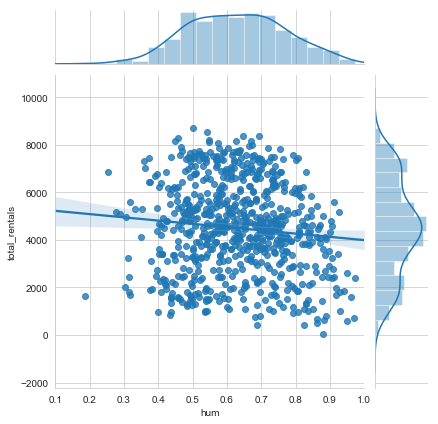

<Figure size 432x288 with 0 Axes>

In [29]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


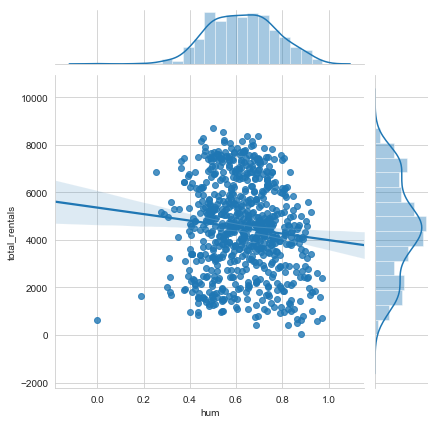

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


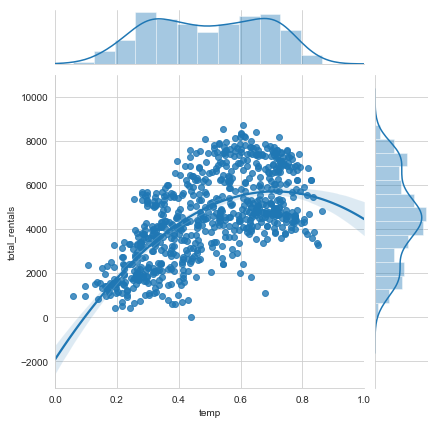

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


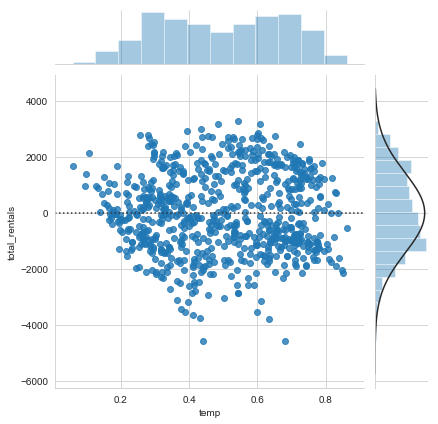

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


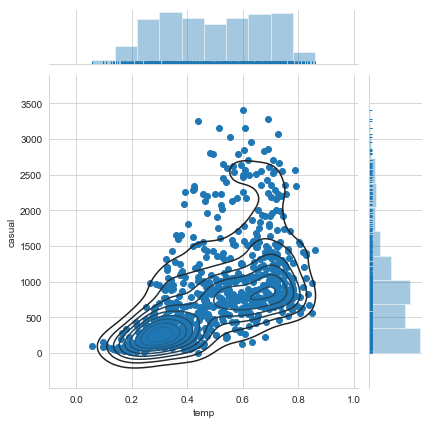

<Figure size 432x288 with 0 Axes>

In [38]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


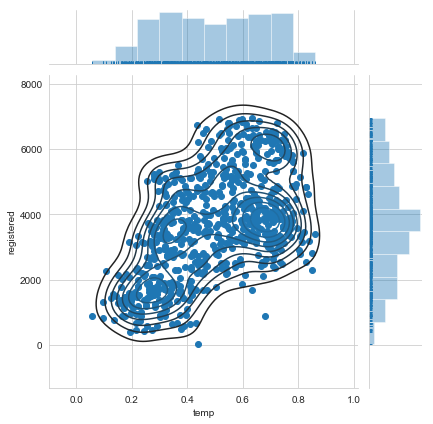

<Figure size 432x288 with 0 Axes>

In [39]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()